# Classifying Fashion MNIST with spiking activations

[![Open In
Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nengo/keras-spiking/blob/master/docs/examples/spiking-fashion-mnist.ipynb)

This example is based on the
[Basic image classification example in
TensorFlow](https://www.tensorflow.org/tutorials/keras/classification).
We would recommend beginning there if you would like a more basic introduction to how
Keras works. In this example we will walk through how we can convert that non-spiking
model into a spiking model using KerasSpiking, and various techniques that can be used
to fine tune performance.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import keras_spiking

tf.random.set_seed(0)
np.random.seed(0)

2023-02-08 15:43:19.005018: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Loading data

We'll begin by loading the Fashion MNIST data:

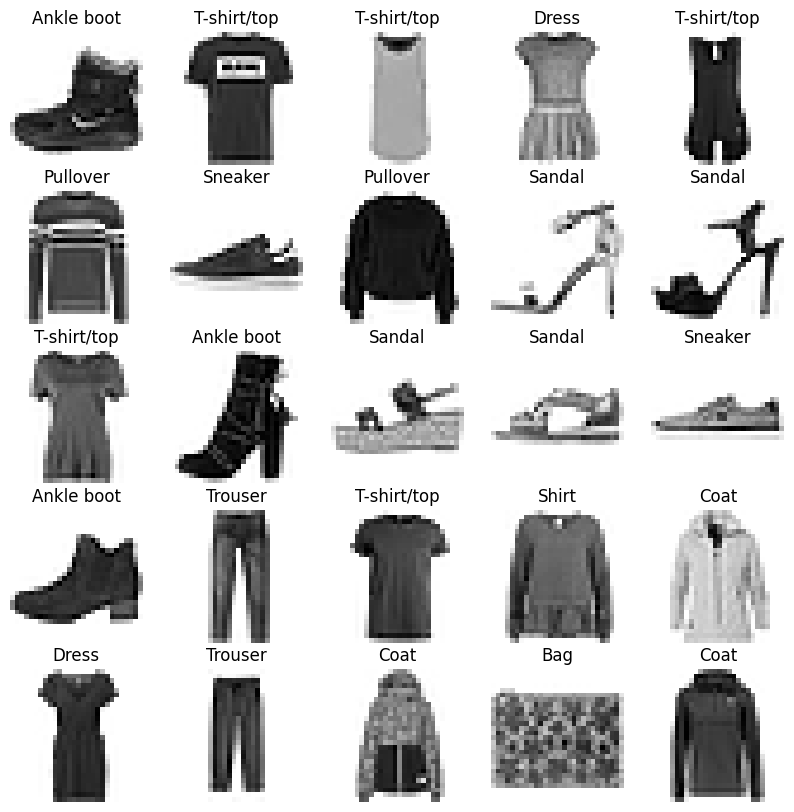

In [2]:
(
    (train_images, train_labels),
    (test_images, test_labels),
) = tf.keras.datasets.fashion_mnist.load_data()

# normalize images so values are between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
num_classes = len(class_names)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.axis("off")
    plt.title(class_names[train_labels[i]])

## Non-spiking model

Next we'll build and train the non-spiking model (this is identical to the
[original TensorFlow
example](https://www.tensorflow.org/tutorials/keras/classification)).

In [3]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(10),
    ]
)


def train(input_model, train_x, test_x):
    input_model.compile(
        optimizer="adam",
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )

    input_model.fit(train_x, train_labels, epochs=10)

    _, test_acc = input_model.evaluate(test_x, test_labels, verbose=2)

    print("\nTest accuracy:", test_acc)


train(model, train_images, test_images)

2023-02-08 15:43:27.540752: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-08 15:43:28.082622: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10784 MB memory:  -> device: 0, name: Tesla K80, pci bus id: 0001:00:00.0, compute capability: 3.7


Epoch 1/10


   1/1875 [..............................] - ETA: 17:19 - loss: 2.1919 - accuracy: 0.1875

  33/1875 [..............................] - ETA: 2s - loss: 1.3431 - accuracy: 0.5606   

  66/1875 [>.............................] - ETA: 2s - loss: 1.0638 - accuracy: 0.6430

  98/1875 [>.............................] - ETA: 2s - loss: 0.9649 - accuracy: 0.6728

 131/1875 [=>............................] - ETA: 2s - loss: 0.8827 - accuracy: 0.7025

 164/1875 [=>............................] - ETA: 2s - loss: 0.8355 - accuracy: 0.7182

 197/1875 [==>...........................] - ETA: 2s - loss: 0.8143 - accuracy: 0.7240

 230/1875 [==>...........................] - ETA: 2s - loss: 0.7825 - accuracy: 0.7357

 263/1875 [===>..........................] - ETA: 2s - loss: 0.7555 - accuracy: 0.7447

 296/1875 [===>..........................] - ETA: 2s - loss: 0.7369 - accuracy: 0.7493

 329/1875 [====>.........................] - ETA: 2s - loss: 0.7264 - accuracy: 0.7537

 362/1875 [====>.........................] - ETA: 2s - loss: 0.7060 - accuracy: 0.7605

 395/1875 [=====>........................] - ETA: 2s - loss: 0.6951 - accuracy: 0.7638

 428/1875 [=====>........................] - ETA: 2s - loss: 0.6813 - accuracy: 0.7693

 459/1875 [======>.......................] - ETA: 2s - loss: 0.6694 - accuracy: 0.7724

 490/1875 [======>.......................] - ETA: 2s - loss: 0.6597 - accuracy: 0.7746

 521/1875 [=======>......................] - ETA: 2s - loss: 0.6537 - accuracy: 0.7757

 553/1875 [=======>......................] - ETA: 2s - loss: 0.6442 - accuracy: 0.7783

 586/1875 [========>.....................] - ETA: 2s - loss: 0.6345 - accuracy: 0.7821

 618/1875 [========>.....................] - ETA: 1s - loss: 0.6263 - accuracy: 0.7841

 650/1875 [=========>....................] - ETA: 1s - loss: 0.6187 - accuracy: 0.7870

 682/1875 [=========>....................] - ETA: 1s - loss: 0.6126 - accuracy: 0.7890

 714/1875 [==========>...................] - ETA: 1s - loss: 0.6065 - accuracy: 0.7907

 746/1875 [==========>...................] - ETA: 1s - loss: 0.6007 - accuracy: 0.7924

 777/1875 [===========>..................] - ETA: 1s - loss: 0.5963 - accuracy: 0.7934

 809/1875 [===========>..................] - ETA: 1s - loss: 0.5924 - accuracy: 0.7946

 841/1875 [============>.................] - ETA: 1s - loss: 0.5887 - accuracy: 0.7959

 873/1875 [============>.................] - ETA: 1s - loss: 0.5849 - accuracy: 0.7973

 904/1875 [=============>................] - ETA: 1s - loss: 0.5810 - accuracy: 0.7981

 931/1875 [=============>................] - ETA: 1s - loss: 0.5794 - accuracy: 0.7992

 960/1875 [==============>...............] - ETA: 1s - loss: 0.5762 - accuracy: 0.8003

 988/1875 [==============>...............] - ETA: 1s - loss: 0.5727 - accuracy: 0.8016

1020/1875 [===============>..............] - ETA: 1s - loss: 0.5690 - accuracy: 0.8028

1052/1875 [===============>..............] - ETA: 1s - loss: 0.5662 - accuracy: 0.8037

1084/1875 [================>.............] - ETA: 1s - loss: 0.5620 - accuracy: 0.8051

1094/1875 [================>.............] - ETA: 1s - loss: 0.5614 - accuracy: 0.8053

1113/1875 [================>.............] - ETA: 1s - loss: 0.5592 - accuracy: 0.8060

1141/1875 [=================>............] - ETA: 1s - loss: 0.5563 - accuracy: 0.8073

1171/1875 [=================>............] - ETA: 1s - loss: 0.5529 - accuracy: 0.8083

1194/1875 [==================>...........] - ETA: 1s - loss: 0.5516 - accuracy: 0.8088

1226/1875 [==================>...........] - ETA: 1s - loss: 0.5478 - accuracy: 0.8102

1258/1875 [===================>..........] - ETA: 1s - loss: 0.5452 - accuracy: 0.8106

1290/1875 [===================>..........] - ETA: 0s - loss: 0.5418 - accuracy: 0.8117

1322/1875 [====================>.........] - ETA: 0s - loss: 0.5379 - accuracy: 0.8129

1355/1875 [====================>.........] - ETA: 0s - loss: 0.5354 - accuracy: 0.8133

1387/1875 [=====================>........] - ETA: 0s - loss: 0.5333 - accuracy: 0.8137

1419/1875 [=====================>........] - ETA: 0s - loss: 0.5323 - accuracy: 0.8138

1451/1875 [======================>.......] - ETA: 0s - loss: 0.5294 - accuracy: 0.8145

1484/1875 [======================>.......] - ETA: 0s - loss: 0.5286 - accuracy: 0.8148

1516/1875 [=======================>......] - ETA: 0s - loss: 0.5254 - accuracy: 0.8159

1548/1875 [=======================>......] - ETA: 0s - loss: 0.5232 - accuracy: 0.8166

1581/1875 [========================>.....] - ETA: 0s - loss: 0.5212 - accuracy: 0.8171

1613/1875 [========================>.....] - ETA: 0s - loss: 0.5186 - accuracy: 0.8179

1646/1875 [=========================>....] - ETA: 0s - loss: 0.5166 - accuracy: 0.8186

1678/1875 [=========================>....] - ETA: 0s - loss: 0.5149 - accuracy: 0.8193

1710/1875 [==========================>...] - ETA: 0s - loss: 0.5133 - accuracy: 0.8199

1742/1875 [==========================>...] - ETA: 0s - loss: 0.5119 - accuracy: 0.8201

1774/1875 [===========================>..] - ETA: 0s - loss: 0.5096 - accuracy: 0.8208

1806/1875 [===========================>..] - ETA: 0s - loss: 0.5082 - accuracy: 0.8214

1838/1875 [============================>.] - ETA: 0s - loss: 0.5061 - accuracy: 0.8219

1870/1875 [============================>.] - ETA: 0s - loss: 0.5051 - accuracy: 0.8224

1875/1875 [==============================] - 4s 2ms/step - loss: 0.5049 - accuracy: 0.8225


Epoch 2/10


   1/1875 [..............................] - ETA: 3s - loss: 0.2790 - accuracy: 0.8438

  33/1875 [..............................] - ETA: 2s - loss: 0.4040 - accuracy: 0.8523

  64/1875 [>.............................] - ETA: 2s - loss: 0.3841 - accuracy: 0.8579

  96/1875 [>.............................] - ETA: 2s - loss: 0.3895 - accuracy: 0.8568

 128/1875 [=>............................] - ETA: 2s - loss: 0.3978 - accuracy: 0.8572

 160/1875 [=>............................] - ETA: 2s - loss: 0.4004 - accuracy: 0.8553

 192/1875 [==>...........................] - ETA: 2s - loss: 0.3989 - accuracy: 0.8564

 224/1875 [==>...........................] - ETA: 2s - loss: 0.3956 - accuracy: 0.8588

 256/1875 [===>..........................] - ETA: 2s - loss: 0.3951 - accuracy: 0.8578

 288/1875 [===>..........................] - ETA: 2s - loss: 0.3871 - accuracy: 0.8613

 320/1875 [====>.........................] - ETA: 2s - loss: 0.3940 - accuracy: 0.8595

 348/1875 [====>.........................] - ETA: 2s - loss: 0.3913 - accuracy: 0.8602

 380/1875 [=====>........................] - ETA: 2s - loss: 0.3921 - accuracy: 0.8595

 408/1875 [=====>........................] - ETA: 2s - loss: 0.3908 - accuracy: 0.8602

 440/1875 [======>.......................] - ETA: 2s - loss: 0.3918 - accuracy: 0.8606

 472/1875 [======>.......................] - ETA: 2s - loss: 0.3933 - accuracy: 0.8602

 504/1875 [=======>......................] - ETA: 2s - loss: 0.3946 - accuracy: 0.8591

 537/1875 [=======>......................] - ETA: 2s - loss: 0.3938 - accuracy: 0.8596

 569/1875 [========>.....................] - ETA: 2s - loss: 0.3948 - accuracy: 0.8593

 601/1875 [========>.....................] - ETA: 2s - loss: 0.3940 - accuracy: 0.8593

 633/1875 [=========>....................] - ETA: 1s - loss: 0.3932 - accuracy: 0.8592

 666/1875 [=========>....................] - ETA: 1s - loss: 0.3911 - accuracy: 0.8601

 698/1875 [==========>...................] - ETA: 1s - loss: 0.3886 - accuracy: 0.8609

 731/1875 [==========>...................] - ETA: 1s - loss: 0.3880 - accuracy: 0.8610

 763/1875 [===========>..................] - ETA: 1s - loss: 0.3877 - accuracy: 0.8610

 795/1875 [===========>..................] - ETA: 1s - loss: 0.3873 - accuracy: 0.8608

 826/1875 [============>.................] - ETA: 1s - loss: 0.3883 - accuracy: 0.8604

 858/1875 [============>.................] - ETA: 1s - loss: 0.3892 - accuracy: 0.8602

 890/1875 [=============>................] - ETA: 1s - loss: 0.3881 - accuracy: 0.8604

 923/1875 [=============>................] - ETA: 1s - loss: 0.3861 - accuracy: 0.8609

 955/1875 [==============>...............] - ETA: 1s - loss: 0.3854 - accuracy: 0.8614

 986/1875 [==============>...............] - ETA: 1s - loss: 0.3856 - accuracy: 0.8612

1016/1875 [===============>..............] - ETA: 1s - loss: 0.3849 - accuracy: 0.8615

1048/1875 [===============>..............] - ETA: 1s - loss: 0.3847 - accuracy: 0.8615

1080/1875 [================>.............] - ETA: 1s - loss: 0.3845 - accuracy: 0.8613

1112/1875 [================>.............] - ETA: 1s - loss: 0.3839 - accuracy: 0.8618

1144/1875 [=================>............] - ETA: 1s - loss: 0.3827 - accuracy: 0.8625

1176/1875 [=================>............] - ETA: 1s - loss: 0.3835 - accuracy: 0.8619

1208/1875 [==================>...........] - ETA: 1s - loss: 0.3831 - accuracy: 0.8620

1241/1875 [==================>...........] - ETA: 1s - loss: 0.3824 - accuracy: 0.8624

1273/1875 [===================>..........] - ETA: 0s - loss: 0.3815 - accuracy: 0.8624

1303/1875 [===================>..........] - ETA: 0s - loss: 0.3816 - accuracy: 0.8622

1335/1875 [====================>.........] - ETA: 0s - loss: 0.3818 - accuracy: 0.8622

1368/1875 [====================>.........] - ETA: 0s - loss: 0.3823 - accuracy: 0.8623

1400/1875 [=====================>........] - ETA: 0s - loss: 0.3819 - accuracy: 0.8624

1433/1875 [=====================>........] - ETA: 0s - loss: 0.3810 - accuracy: 0.8626

1465/1875 [======================>.......] - ETA: 0s - loss: 0.3803 - accuracy: 0.8625

1497/1875 [======================>.......] - ETA: 0s - loss: 0.3805 - accuracy: 0.8626

1529/1875 [=======================>......] - ETA: 0s - loss: 0.3805 - accuracy: 0.8627

1561/1875 [=======================>......] - ETA: 0s - loss: 0.3807 - accuracy: 0.8627

1594/1875 [========================>.....] - ETA: 0s - loss: 0.3799 - accuracy: 0.8630

1626/1875 [=========================>....] - ETA: 0s - loss: 0.3795 - accuracy: 0.8631

1658/1875 [=========================>....] - ETA: 0s - loss: 0.3787 - accuracy: 0.8633

1690/1875 [==========================>...] - ETA: 0s - loss: 0.3787 - accuracy: 0.8634

1721/1875 [==========================>...] - ETA: 0s - loss: 0.3780 - accuracy: 0.8637

1752/1875 [===========================>..] - ETA: 0s - loss: 0.3777 - accuracy: 0.8637

1783/1875 [===========================>..] - ETA: 0s - loss: 0.3769 - accuracy: 0.8639

1815/1875 [============================>.] - ETA: 0s - loss: 0.3771 - accuracy: 0.8640

1847/1875 [============================>.] - ETA: 0s - loss: 0.3763 - accuracy: 0.8643

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3762 - accuracy: 0.8643


Epoch 3/10


   1/1875 [..............................] - ETA: 4s - loss: 0.4535 - accuracy: 0.9375

  33/1875 [..............................] - ETA: 2s - loss: 0.3245 - accuracy: 0.8873

  65/1875 [>.............................] - ETA: 2s - loss: 0.3445 - accuracy: 0.8755

  97/1875 [>.............................] - ETA: 2s - loss: 0.3374 - accuracy: 0.8760

 129/1875 [=>............................] - ETA: 2s - loss: 0.3408 - accuracy: 0.8738

 162/1875 [=>............................] - ETA: 2s - loss: 0.3388 - accuracy: 0.8760

 194/1875 [==>...........................] - ETA: 2s - loss: 0.3437 - accuracy: 0.8744

 225/1875 [==>...........................] - ETA: 2s - loss: 0.3413 - accuracy: 0.8731

 257/1875 [===>..........................] - ETA: 2s - loss: 0.3417 - accuracy: 0.8754

 290/1875 [===>..........................] - ETA: 2s - loss: 0.3483 - accuracy: 0.8742

 323/1875 [====>.........................] - ETA: 2s - loss: 0.3529 - accuracy: 0.8727

 353/1875 [====>.........................] - ETA: 2s - loss: 0.3540 - accuracy: 0.8719

 385/1875 [=====>........................] - ETA: 2s - loss: 0.3531 - accuracy: 0.8727

 418/1875 [=====>........................] - ETA: 2s - loss: 0.3525 - accuracy: 0.8716

 449/1875 [======>.......................] - ETA: 2s - loss: 0.3496 - accuracy: 0.8726

 481/1875 [======>.......................] - ETA: 2s - loss: 0.3460 - accuracy: 0.8745

 513/1875 [=======>......................] - ETA: 2s - loss: 0.3438 - accuracy: 0.8746

 545/1875 [=======>......................] - ETA: 2s - loss: 0.3447 - accuracy: 0.8747

 576/1875 [========>.....................] - ETA: 2s - loss: 0.3455 - accuracy: 0.8746

 606/1875 [========>.....................] - ETA: 2s - loss: 0.3461 - accuracy: 0.8740

 638/1875 [=========>....................] - ETA: 1s - loss: 0.3457 - accuracy: 0.8741

 670/1875 [=========>....................] - ETA: 1s - loss: 0.3458 - accuracy: 0.8743

 701/1875 [==========>...................] - ETA: 1s - loss: 0.3486 - accuracy: 0.8733

 733/1875 [==========>...................] - ETA: 1s - loss: 0.3486 - accuracy: 0.8729

 765/1875 [===========>..................] - ETA: 1s - loss: 0.3458 - accuracy: 0.8737

 797/1875 [===========>..................] - ETA: 1s - loss: 0.3433 - accuracy: 0.8747

 829/1875 [============>.................] - ETA: 1s - loss: 0.3434 - accuracy: 0.8748

 860/1875 [============>.................] - ETA: 1s - loss: 0.3442 - accuracy: 0.8745

 892/1875 [=============>................] - ETA: 1s - loss: 0.3424 - accuracy: 0.8751

 923/1875 [=============>................] - ETA: 1s - loss: 0.3431 - accuracy: 0.8750

 955/1875 [==============>...............] - ETA: 1s - loss: 0.3428 - accuracy: 0.8754

 988/1875 [==============>...............] - ETA: 1s - loss: 0.3414 - accuracy: 0.8757

1021/1875 [===============>..............] - ETA: 1s - loss: 0.3417 - accuracy: 0.8755

1053/1875 [===============>..............] - ETA: 1s - loss: 0.3422 - accuracy: 0.8754

1085/1875 [================>.............] - ETA: 1s - loss: 0.3417 - accuracy: 0.8754

1117/1875 [================>.............] - ETA: 1s - loss: 0.3419 - accuracy: 0.8754

1149/1875 [=================>............] - ETA: 1s - loss: 0.3414 - accuracy: 0.8757

1178/1875 [=================>............] - ETA: 1s - loss: 0.3412 - accuracy: 0.8755

1210/1875 [==================>...........] - ETA: 1s - loss: 0.3417 - accuracy: 0.8752

1241/1875 [==================>...........] - ETA: 1s - loss: 0.3415 - accuracy: 0.8753

1272/1875 [===================>..........] - ETA: 0s - loss: 0.3420 - accuracy: 0.8749

1304/1875 [===================>..........] - ETA: 0s - loss: 0.3412 - accuracy: 0.8755

1336/1875 [====================>.........] - ETA: 0s - loss: 0.3404 - accuracy: 0.8755

1369/1875 [====================>.........] - ETA: 0s - loss: 0.3416 - accuracy: 0.8750

1401/1875 [=====================>........] - ETA: 0s - loss: 0.3425 - accuracy: 0.8750

1434/1875 [=====================>........] - ETA: 0s - loss: 0.3427 - accuracy: 0.8752

1466/1875 [======================>.......] - ETA: 0s - loss: 0.3425 - accuracy: 0.8753

1498/1875 [======================>.......] - ETA: 0s - loss: 0.3416 - accuracy: 0.8758

1529/1875 [=======================>......] - ETA: 0s - loss: 0.3413 - accuracy: 0.8759

1562/1875 [=======================>......] - ETA: 0s - loss: 0.3408 - accuracy: 0.8761

1595/1875 [========================>.....] - ETA: 0s - loss: 0.3411 - accuracy: 0.8761

1627/1875 [=========================>....] - ETA: 0s - loss: 0.3408 - accuracy: 0.8763

1657/1875 [=========================>....] - ETA: 0s - loss: 0.3410 - accuracy: 0.8761

1688/1875 [==========================>...] - ETA: 0s - loss: 0.3406 - accuracy: 0.8761

1721/1875 [==========================>...] - ETA: 0s - loss: 0.3404 - accuracy: 0.8761

1751/1875 [===========================>..] - ETA: 0s - loss: 0.3401 - accuracy: 0.8761

1783/1875 [===========================>..] - ETA: 0s - loss: 0.3410 - accuracy: 0.8759

1815/1875 [============================>.] - ETA: 0s - loss: 0.3405 - accuracy: 0.8761

1847/1875 [============================>.] - ETA: 0s - loss: 0.3395 - accuracy: 0.8765

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3390 - accuracy: 0.8766


Epoch 4/10


   1/1875 [..............................] - ETA: 4s - loss: 0.4667 - accuracy: 0.8438

  33/1875 [..............................] - ETA: 2s - loss: 0.3285 - accuracy: 0.8854

  65/1875 [>.............................] - ETA: 2s - loss: 0.3304 - accuracy: 0.8846

  97/1875 [>.............................] - ETA: 2s - loss: 0.3281 - accuracy: 0.8856

 129/1875 [=>............................] - ETA: 2s - loss: 0.3252 - accuracy: 0.8844

 161/1875 [=>............................] - ETA: 2s - loss: 0.3284 - accuracy: 0.8830

 190/1875 [==>...........................] - ETA: 2s - loss: 0.3205 - accuracy: 0.8852

 222/1875 [==>...........................] - ETA: 2s - loss: 0.3143 - accuracy: 0.8861

 253/1875 [===>..........................] - ETA: 2s - loss: 0.3150 - accuracy: 0.8872

 285/1875 [===>..........................] - ETA: 2s - loss: 0.3184 - accuracy: 0.8853

 318/1875 [====>.........................] - ETA: 2s - loss: 0.3192 - accuracy: 0.8843

 349/1875 [====>.........................] - ETA: 2s - loss: 0.3227 - accuracy: 0.8821

 381/1875 [=====>........................] - ETA: 2s - loss: 0.3216 - accuracy: 0.8827

 414/1875 [=====>........................] - ETA: 2s - loss: 0.3208 - accuracy: 0.8835

 446/1875 [======>.......................] - ETA: 2s - loss: 0.3210 - accuracy: 0.8832

 478/1875 [======>.......................] - ETA: 2s - loss: 0.3193 - accuracy: 0.8844

 510/1875 [=======>......................] - ETA: 2s - loss: 0.3183 - accuracy: 0.8842

 543/1875 [=======>......................] - ETA: 2s - loss: 0.3204 - accuracy: 0.8832

 574/1875 [========>.....................] - ETA: 2s - loss: 0.3176 - accuracy: 0.8837

 607/1875 [========>.....................] - ETA: 2s - loss: 0.3176 - accuracy: 0.8840

 639/1875 [=========>....................] - ETA: 1s - loss: 0.3181 - accuracy: 0.8839

 671/1875 [=========>....................] - ETA: 1s - loss: 0.3188 - accuracy: 0.8842

 701/1875 [==========>...................] - ETA: 1s - loss: 0.3172 - accuracy: 0.8842

 733/1875 [==========>...................] - ETA: 1s - loss: 0.3172 - accuracy: 0.8841

 766/1875 [===========>..................] - ETA: 1s - loss: 0.3172 - accuracy: 0.8841

 798/1875 [===========>..................] - ETA: 1s - loss: 0.3179 - accuracy: 0.8842

 828/1875 [============>.................] - ETA: 1s - loss: 0.3190 - accuracy: 0.8839

 861/1875 [============>.................] - ETA: 1s - loss: 0.3177 - accuracy: 0.8842

 893/1875 [=============>................] - ETA: 1s - loss: 0.3175 - accuracy: 0.8842

 926/1875 [=============>................] - ETA: 1s - loss: 0.3168 - accuracy: 0.8844

 958/1875 [==============>...............] - ETA: 1s - loss: 0.3173 - accuracy: 0.8842

 990/1875 [==============>...............] - ETA: 1s - loss: 0.3157 - accuracy: 0.8846

1023/1875 [===============>..............] - ETA: 1s - loss: 0.3154 - accuracy: 0.8845

1054/1875 [===============>..............] - ETA: 1s - loss: 0.3148 - accuracy: 0.8847

1082/1875 [================>.............] - ETA: 1s - loss: 0.3147 - accuracy: 0.8847

1114/1875 [================>.............] - ETA: 1s - loss: 0.3140 - accuracy: 0.8851

1146/1875 [=================>............] - ETA: 1s - loss: 0.3156 - accuracy: 0.8843

1177/1875 [=================>............] - ETA: 1s - loss: 0.3148 - accuracy: 0.8846

1209/1875 [==================>...........] - ETA: 1s - loss: 0.3145 - accuracy: 0.8843

1241/1875 [==================>...........] - ETA: 1s - loss: 0.3144 - accuracy: 0.8843

1273/1875 [===================>..........] - ETA: 0s - loss: 0.3129 - accuracy: 0.8849

1305/1875 [===================>..........] - ETA: 0s - loss: 0.3133 - accuracy: 0.8846

1337/1875 [====================>.........] - ETA: 0s - loss: 0.3129 - accuracy: 0.8847

1370/1875 [====================>.........] - ETA: 0s - loss: 0.3138 - accuracy: 0.8844

1402/1875 [=====================>........] - ETA: 0s - loss: 0.3142 - accuracy: 0.8843

1435/1875 [=====================>........] - ETA: 0s - loss: 0.3139 - accuracy: 0.8847

1466/1875 [======================>.......] - ETA: 0s - loss: 0.3137 - accuracy: 0.8849

1499/1875 [======================>.......] - ETA: 0s - loss: 0.3138 - accuracy: 0.8849

1532/1875 [=======================>......] - ETA: 0s - loss: 0.3134 - accuracy: 0.8851

1564/1875 [========================>.....] - ETA: 0s - loss: 0.3135 - accuracy: 0.8851

1590/1875 [========================>.....] - ETA: 0s - loss: 0.3136 - accuracy: 0.8848

1622/1875 [========================>.....] - ETA: 0s - loss: 0.3130 - accuracy: 0.8851

1654/1875 [=========================>....] - ETA: 0s - loss: 0.3124 - accuracy: 0.8853

1686/1875 [=========================>....] - ETA: 0s - loss: 0.3131 - accuracy: 0.8852

1718/1875 [==========================>...] - ETA: 0s - loss: 0.3134 - accuracy: 0.8852

1751/1875 [===========================>..] - ETA: 0s - loss: 0.3142 - accuracy: 0.8849

1783/1875 [===========================>..] - ETA: 0s - loss: 0.3142 - accuracy: 0.8850

1815/1875 [============================>.] - ETA: 0s - loss: 0.3139 - accuracy: 0.8850

1847/1875 [============================>.] - ETA: 0s - loss: 0.3138 - accuracy: 0.8850

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3137 - accuracy: 0.8849


Epoch 5/10


   1/1875 [..............................] - ETA: 4s - loss: 0.1617 - accuracy: 0.8750

  30/1875 [..............................] - ETA: 3s - loss: 0.3162 - accuracy: 0.8750

  61/1875 [..............................] - ETA: 3s - loss: 0.3125 - accuracy: 0.8832

  92/1875 [>.............................] - ETA: 2s - loss: 0.3003 - accuracy: 0.8886

 124/1875 [>.............................] - ETA: 2s - loss: 0.3015 - accuracy: 0.8886

 157/1875 [=>............................] - ETA: 2s - loss: 0.2988 - accuracy: 0.8885

 189/1875 [==>...........................] - ETA: 2s - loss: 0.2911 - accuracy: 0.8914

 221/1875 [==>...........................] - ETA: 2s - loss: 0.2939 - accuracy: 0.8908

 254/1875 [===>..........................] - ETA: 2s - loss: 0.2979 - accuracy: 0.8909

 286/1875 [===>..........................] - ETA: 2s - loss: 0.2984 - accuracy: 0.8905

 318/1875 [====>.........................] - ETA: 2s - loss: 0.2995 - accuracy: 0.8902

 350/1875 [====>.........................] - ETA: 2s - loss: 0.2988 - accuracy: 0.8909

 382/1875 [=====>........................] - ETA: 2s - loss: 0.2954 - accuracy: 0.8922

 415/1875 [=====>........................] - ETA: 2s - loss: 0.2958 - accuracy: 0.8916

 447/1875 [======>.......................] - ETA: 2s - loss: 0.2984 - accuracy: 0.8916

 479/1875 [======>.......................] - ETA: 2s - loss: 0.2960 - accuracy: 0.8917

 511/1875 [=======>......................] - ETA: 2s - loss: 0.2961 - accuracy: 0.8918

 543/1875 [=======>......................] - ETA: 2s - loss: 0.2984 - accuracy: 0.8918

 575/1875 [========>.....................] - ETA: 2s - loss: 0.2990 - accuracy: 0.8916

 606/1875 [========>.....................] - ETA: 2s - loss: 0.2978 - accuracy: 0.8919

 638/1875 [=========>....................] - ETA: 1s - loss: 0.2969 - accuracy: 0.8923

 670/1875 [=========>....................] - ETA: 1s - loss: 0.2968 - accuracy: 0.8920

 703/1875 [==========>...................] - ETA: 1s - loss: 0.2975 - accuracy: 0.8921

 735/1875 [==========>...................] - ETA: 1s - loss: 0.2979 - accuracy: 0.8920

 766/1875 [===========>..................] - ETA: 1s - loss: 0.2984 - accuracy: 0.8916

 796/1875 [===========>..................] - ETA: 1s - loss: 0.2979 - accuracy: 0.8917

 828/1875 [============>.................] - ETA: 1s - loss: 0.2978 - accuracy: 0.8921

 860/1875 [============>.................] - ETA: 1s - loss: 0.2972 - accuracy: 0.8919

 892/1875 [=============>................] - ETA: 1s - loss: 0.2959 - accuracy: 0.8919

 924/1875 [=============>................] - ETA: 1s - loss: 0.2960 - accuracy: 0.8913

 957/1875 [==============>...............] - ETA: 1s - loss: 0.2965 - accuracy: 0.8915

 989/1875 [==============>...............] - ETA: 1s - loss: 0.2974 - accuracy: 0.8912

1021/1875 [===============>..............] - ETA: 1s - loss: 0.2967 - accuracy: 0.8915

1053/1875 [===============>..............] - ETA: 1s - loss: 0.2971 - accuracy: 0.8913

1085/1875 [================>.............] - ETA: 1s - loss: 0.2966 - accuracy: 0.8914

1118/1875 [================>.............] - ETA: 1s - loss: 0.2975 - accuracy: 0.8910

1151/1875 [=================>............] - ETA: 1s - loss: 0.2968 - accuracy: 0.8912

1183/1875 [=================>............] - ETA: 1s - loss: 0.2965 - accuracy: 0.8912

1215/1875 [==================>...........] - ETA: 1s - loss: 0.2963 - accuracy: 0.8912

1247/1875 [==================>...........] - ETA: 0s - loss: 0.2975 - accuracy: 0.8906

1279/1875 [===================>..........] - ETA: 0s - loss: 0.2974 - accuracy: 0.8907

1311/1875 [===================>..........] - ETA: 0s - loss: 0.2968 - accuracy: 0.8907

1344/1875 [====================>.........] - ETA: 0s - loss: 0.2969 - accuracy: 0.8905

1376/1875 [=====================>........] - ETA: 0s - loss: 0.2987 - accuracy: 0.8901

1409/1875 [=====================>........] - ETA: 0s - loss: 0.2981 - accuracy: 0.8902

1442/1875 [======================>.......] - ETA: 0s - loss: 0.2982 - accuracy: 0.8898

1471/1875 [======================>.......] - ETA: 0s - loss: 0.2974 - accuracy: 0.8902

1502/1875 [=======================>......] - ETA: 0s - loss: 0.2978 - accuracy: 0.8901

1534/1875 [=======================>......] - ETA: 0s - loss: 0.2978 - accuracy: 0.8902

1566/1875 [========================>.....] - ETA: 0s - loss: 0.2973 - accuracy: 0.8904

1599/1875 [========================>.....] - ETA: 0s - loss: 0.2973 - accuracy: 0.8904

1631/1875 [=========================>....] - ETA: 0s - loss: 0.2978 - accuracy: 0.8901

1663/1875 [=========================>....] - ETA: 0s - loss: 0.2975 - accuracy: 0.8903

1696/1875 [==========================>...] - ETA: 0s - loss: 0.2980 - accuracy: 0.8902

1728/1875 [==========================>...] - ETA: 0s - loss: 0.2978 - accuracy: 0.8902

1760/1875 [===========================>..] - ETA: 0s - loss: 0.2985 - accuracy: 0.8899

1792/1875 [===========================>..] - ETA: 0s - loss: 0.2984 - accuracy: 0.8900

1825/1875 [============================>.] - ETA: 0s - loss: 0.2979 - accuracy: 0.8902

1857/1875 [============================>.] - ETA: 0s - loss: 0.2982 - accuracy: 0.8900

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2979 - accuracy: 0.8903


Epoch 6/10


   1/1875 [..............................] - ETA: 3s - loss: 0.1537 - accuracy: 0.9375

  34/1875 [..............................] - ETA: 2s - loss: 0.2838 - accuracy: 0.9017

  66/1875 [>.............................] - ETA: 2s - loss: 0.2807 - accuracy: 0.9034

  99/1875 [>.............................] - ETA: 2s - loss: 0.2767 - accuracy: 0.9009

 131/1875 [=>............................] - ETA: 2s - loss: 0.2809 - accuracy: 0.9000

 164/1875 [=>............................] - ETA: 2s - loss: 0.2825 - accuracy: 0.8990

 196/1875 [==>...........................] - ETA: 2s - loss: 0.2842 - accuracy: 0.8975

 229/1875 [==>...........................] - ETA: 2s - loss: 0.2816 - accuracy: 0.8990

 261/1875 [===>..........................] - ETA: 2s - loss: 0.2822 - accuracy: 0.8998

 293/1875 [===>..........................] - ETA: 2s - loss: 0.2843 - accuracy: 0.8979

 326/1875 [====>.........................] - ETA: 2s - loss: 0.2867 - accuracy: 0.8968

 358/1875 [====>.........................] - ETA: 2s - loss: 0.2876 - accuracy: 0.8968

 390/1875 [=====>........................] - ETA: 2s - loss: 0.2919 - accuracy: 0.8946

 423/1875 [=====>........................] - ETA: 2s - loss: 0.2929 - accuracy: 0.8941

 455/1875 [======>.......................] - ETA: 2s - loss: 0.2915 - accuracy: 0.8950

 488/1875 [======>.......................] - ETA: 2s - loss: 0.2901 - accuracy: 0.8951

 520/1875 [=======>......................] - ETA: 2s - loss: 0.2918 - accuracy: 0.8945

 552/1875 [=======>......................] - ETA: 2s - loss: 0.2901 - accuracy: 0.8948

 584/1875 [========>.....................] - ETA: 2s - loss: 0.2895 - accuracy: 0.8949

 616/1875 [========>.....................] - ETA: 1s - loss: 0.2897 - accuracy: 0.8946

 648/1875 [=========>....................] - ETA: 1s - loss: 0.2893 - accuracy: 0.8951

 680/1875 [=========>....................] - ETA: 1s - loss: 0.2899 - accuracy: 0.8954

 712/1875 [==========>...................] - ETA: 1s - loss: 0.2895 - accuracy: 0.8954

 744/1875 [==========>...................] - ETA: 1s - loss: 0.2892 - accuracy: 0.8952

 776/1875 [===========>..................] - ETA: 1s - loss: 0.2886 - accuracy: 0.8956

 809/1875 [===========>..................] - ETA: 1s - loss: 0.2860 - accuracy: 0.8969

 842/1875 [============>.................] - ETA: 1s - loss: 0.2852 - accuracy: 0.8975

 873/1875 [============>.................] - ETA: 1s - loss: 0.2836 - accuracy: 0.8979

 903/1875 [=============>................] - ETA: 1s - loss: 0.2841 - accuracy: 0.8975

 934/1875 [=============>................] - ETA: 1s - loss: 0.2833 - accuracy: 0.8979

 966/1875 [==============>...............] - ETA: 1s - loss: 0.2838 - accuracy: 0.8975

 999/1875 [==============>...............] - ETA: 1s - loss: 0.2836 - accuracy: 0.8975

1031/1875 [===============>..............] - ETA: 1s - loss: 0.2838 - accuracy: 0.8972

1063/1875 [================>.............] - ETA: 1s - loss: 0.2831 - accuracy: 0.8974

1095/1875 [================>.............] - ETA: 1s - loss: 0.2826 - accuracy: 0.8977

1127/1875 [=================>............] - ETA: 1s - loss: 0.2826 - accuracy: 0.8977

1159/1875 [=================>............] - ETA: 1s - loss: 0.2830 - accuracy: 0.8972

1191/1875 [==================>...........] - ETA: 1s - loss: 0.2830 - accuracy: 0.8972

1223/1875 [==================>...........] - ETA: 1s - loss: 0.2825 - accuracy: 0.8975

1255/1875 [===================>..........] - ETA: 0s - loss: 0.2823 - accuracy: 0.8975

1287/1875 [===================>..........] - ETA: 0s - loss: 0.2820 - accuracy: 0.8976

1316/1875 [====================>.........] - ETA: 0s - loss: 0.2821 - accuracy: 0.8975

1349/1875 [====================>.........] - ETA: 0s - loss: 0.2821 - accuracy: 0.8975

1381/1875 [=====================>........] - ETA: 0s - loss: 0.2818 - accuracy: 0.8975

1414/1875 [=====================>........] - ETA: 0s - loss: 0.2824 - accuracy: 0.8972

1447/1875 [======================>.......] - ETA: 0s - loss: 0.2822 - accuracy: 0.8972

1480/1875 [======================>.......] - ETA: 0s - loss: 0.2815 - accuracy: 0.8976

1513/1875 [=======================>......] - ETA: 0s - loss: 0.2808 - accuracy: 0.8977

1544/1875 [=======================>......] - ETA: 0s - loss: 0.2814 - accuracy: 0.8974

1575/1875 [========================>.....] - ETA: 0s - loss: 0.2815 - accuracy: 0.8974

1607/1875 [========================>.....] - ETA: 0s - loss: 0.2808 - accuracy: 0.8978

1639/1875 [=========================>....] - ETA: 0s - loss: 0.2803 - accuracy: 0.8979

1671/1875 [=========================>....] - ETA: 0s - loss: 0.2807 - accuracy: 0.8977

1703/1875 [==========================>...] - ETA: 0s - loss: 0.2808 - accuracy: 0.8977

1734/1875 [==========================>...] - ETA: 0s - loss: 0.2810 - accuracy: 0.8975

1765/1875 [===========================>..] - ETA: 0s - loss: 0.2819 - accuracy: 0.8971

1797/1875 [===========================>..] - ETA: 0s - loss: 0.2817 - accuracy: 0.8969

1829/1875 [============================>.] - ETA: 0s - loss: 0.2818 - accuracy: 0.8970

1861/1875 [============================>.] - ETA: 0s - loss: 0.2821 - accuracy: 0.8968

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2819 - accuracy: 0.8969


Epoch 7/10


   1/1875 [..............................] - ETA: 4s - loss: 0.2265 - accuracy: 0.8750

  33/1875 [..............................] - ETA: 2s - loss: 0.2520 - accuracy: 0.9195

  65/1875 [>.............................] - ETA: 2s - loss: 0.2576 - accuracy: 0.9096

  97/1875 [>.............................] - ETA: 2s - loss: 0.2582 - accuracy: 0.9072

 129/1875 [=>............................] - ETA: 2s - loss: 0.2578 - accuracy: 0.9077

 162/1875 [=>............................] - ETA: 2s - loss: 0.2650 - accuracy: 0.9045

 195/1875 [==>...........................] - ETA: 2s - loss: 0.2615 - accuracy: 0.9037

 228/1875 [==>...........................] - ETA: 2s - loss: 0.2632 - accuracy: 0.9021

 260/1875 [===>..........................] - ETA: 2s - loss: 0.2634 - accuracy: 0.9014

 292/1875 [===>..........................] - ETA: 2s - loss: 0.2660 - accuracy: 0.9013

 325/1875 [====>.........................] - ETA: 2s - loss: 0.2696 - accuracy: 0.9002

 355/1875 [====>.........................] - ETA: 2s - loss: 0.2702 - accuracy: 0.8996

 387/1875 [=====>........................] - ETA: 2s - loss: 0.2708 - accuracy: 0.9000

 420/1875 [=====>........................] - ETA: 2s - loss: 0.2716 - accuracy: 0.9007

 452/1875 [======>.......................] - ETA: 2s - loss: 0.2724 - accuracy: 0.9003

 484/1875 [======>.......................] - ETA: 2s - loss: 0.2722 - accuracy: 0.9004

 516/1875 [=======>......................] - ETA: 2s - loss: 0.2713 - accuracy: 0.9001

 548/1875 [=======>......................] - ETA: 2s - loss: 0.2696 - accuracy: 0.9011

 580/1875 [========>.....................] - ETA: 2s - loss: 0.2698 - accuracy: 0.9011

 613/1875 [========>.....................] - ETA: 1s - loss: 0.2702 - accuracy: 0.9009

 645/1875 [=========>....................] - ETA: 1s - loss: 0.2709 - accuracy: 0.9001

 678/1875 [=========>....................] - ETA: 1s - loss: 0.2715 - accuracy: 0.8998

 710/1875 [==========>...................] - ETA: 1s - loss: 0.2694 - accuracy: 0.9004

 742/1875 [==========>...................] - ETA: 1s - loss: 0.2689 - accuracy: 0.9006

 774/1875 [===========>..................] - ETA: 1s - loss: 0.2680 - accuracy: 0.9008

 806/1875 [===========>..................] - ETA: 1s - loss: 0.2681 - accuracy: 0.9007

 838/1875 [============>.................] - ETA: 1s - loss: 0.2679 - accuracy: 0.9013

 870/1875 [============>.................] - ETA: 1s - loss: 0.2679 - accuracy: 0.9014

 902/1875 [=============>................] - ETA: 1s - loss: 0.2682 - accuracy: 0.9014

 933/1875 [=============>................] - ETA: 1s - loss: 0.2685 - accuracy: 0.9011

 965/1875 [==============>...............] - ETA: 1s - loss: 0.2672 - accuracy: 0.9018

 997/1875 [==============>...............] - ETA: 1s - loss: 0.2664 - accuracy: 0.9019

1029/1875 [===============>..............] - ETA: 1s - loss: 0.2669 - accuracy: 0.9016

1061/1875 [===============>..............] - ETA: 1s - loss: 0.2663 - accuracy: 0.9017

1094/1875 [================>.............] - ETA: 1s - loss: 0.2668 - accuracy: 0.9012

1125/1875 [=================>............] - ETA: 1s - loss: 0.2680 - accuracy: 0.9009

1157/1875 [=================>............] - ETA: 1s - loss: 0.2674 - accuracy: 0.9011

1189/1875 [==================>...........] - ETA: 1s - loss: 0.2668 - accuracy: 0.9011

1222/1875 [==================>...........] - ETA: 1s - loss: 0.2669 - accuracy: 0.9012

1254/1875 [===================>..........] - ETA: 0s - loss: 0.2674 - accuracy: 0.9004

1286/1875 [===================>..........] - ETA: 0s - loss: 0.2672 - accuracy: 0.9005

1319/1875 [====================>.........] - ETA: 0s - loss: 0.2669 - accuracy: 0.9007

1351/1875 [====================>.........] - ETA: 0s - loss: 0.2671 - accuracy: 0.9007

1383/1875 [=====================>........] - ETA: 0s - loss: 0.2682 - accuracy: 0.9005

1415/1875 [=====================>........] - ETA: 0s - loss: 0.2687 - accuracy: 0.9004

1446/1875 [======================>.......] - ETA: 0s - loss: 0.2689 - accuracy: 0.9004

1476/1875 [======================>.......] - ETA: 0s - loss: 0.2694 - accuracy: 0.9000

1508/1875 [=======================>......] - ETA: 0s - loss: 0.2696 - accuracy: 0.8997

1539/1875 [=======================>......] - ETA: 0s - loss: 0.2695 - accuracy: 0.8999

1571/1875 [========================>.....] - ETA: 0s - loss: 0.2698 - accuracy: 0.8998

1604/1875 [========================>.....] - ETA: 0s - loss: 0.2700 - accuracy: 0.8999

1636/1875 [=========================>....] - ETA: 0s - loss: 0.2695 - accuracy: 0.8998

1668/1875 [=========================>....] - ETA: 0s - loss: 0.2693 - accuracy: 0.9000

1700/1875 [==========================>...] - ETA: 0s - loss: 0.2694 - accuracy: 0.9003

1732/1875 [==========================>...] - ETA: 0s - loss: 0.2695 - accuracy: 0.9003

1764/1875 [===========================>..] - ETA: 0s - loss: 0.2694 - accuracy: 0.9004

1796/1875 [===========================>..] - ETA: 0s - loss: 0.2701 - accuracy: 0.9001

1828/1875 [============================>.] - ETA: 0s - loss: 0.2705 - accuracy: 0.8999

1860/1875 [============================>.] - ETA: 0s - loss: 0.2710 - accuracy: 0.8998

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2708 - accuracy: 0.8999


Epoch 8/10


   1/1875 [..............................] - ETA: 4s - loss: 0.2239 - accuracy: 0.9062

  33/1875 [..............................] - ETA: 2s - loss: 0.2380 - accuracy: 0.9129

  64/1875 [>.............................] - ETA: 2s - loss: 0.2448 - accuracy: 0.9077

  95/1875 [>.............................] - ETA: 2s - loss: 0.2474 - accuracy: 0.9069

 128/1875 [=>............................] - ETA: 2s - loss: 0.2412 - accuracy: 0.9080

 160/1875 [=>............................] - ETA: 2s - loss: 0.2476 - accuracy: 0.9061

 193/1875 [==>...........................] - ETA: 2s - loss: 0.2433 - accuracy: 0.9072

 225/1875 [==>...........................] - ETA: 2s - loss: 0.2436 - accuracy: 0.9060

 258/1875 [===>..........................] - ETA: 2s - loss: 0.2486 - accuracy: 0.9056

 290/1875 [===>..........................] - ETA: 2s - loss: 0.2504 - accuracy: 0.9050

 322/1875 [====>.........................] - ETA: 2s - loss: 0.2486 - accuracy: 0.9058

 350/1875 [====>.........................] - ETA: 2s - loss: 0.2490 - accuracy: 0.9063

 383/1875 [=====>........................] - ETA: 2s - loss: 0.2512 - accuracy: 0.9062

 415/1875 [=====>........................] - ETA: 2s - loss: 0.2537 - accuracy: 0.9048

 447/1875 [======>.......................] - ETA: 2s - loss: 0.2522 - accuracy: 0.9049

 480/1875 [======>.......................] - ETA: 2s - loss: 0.2501 - accuracy: 0.9060

 512/1875 [=======>......................] - ETA: 2s - loss: 0.2512 - accuracy: 0.9060

 545/1875 [=======>......................] - ETA: 2s - loss: 0.2512 - accuracy: 0.9058

 578/1875 [========>.....................] - ETA: 2s - loss: 0.2511 - accuracy: 0.9063

 610/1875 [========>.....................] - ETA: 2s - loss: 0.2521 - accuracy: 0.9057

 642/1875 [=========>....................] - ETA: 1s - loss: 0.2520 - accuracy: 0.9059

 674/1875 [=========>....................] - ETA: 1s - loss: 0.2532 - accuracy: 0.9059

 707/1875 [==========>...................] - ETA: 1s - loss: 0.2532 - accuracy: 0.9059

 737/1875 [==========>...................] - ETA: 1s - loss: 0.2542 - accuracy: 0.9053

 768/1875 [===========>..................] - ETA: 1s - loss: 0.2534 - accuracy: 0.9058

 800/1875 [===========>..................] - ETA: 1s - loss: 0.2535 - accuracy: 0.9059

 832/1875 [============>.................] - ETA: 1s - loss: 0.2531 - accuracy: 0.9059

 862/1875 [============>.................] - ETA: 1s - loss: 0.2539 - accuracy: 0.9056

 890/1875 [=============>................] - ETA: 1s - loss: 0.2549 - accuracy: 0.9052

 922/1875 [=============>................] - ETA: 1s - loss: 0.2552 - accuracy: 0.9051

 954/1875 [==============>...............] - ETA: 1s - loss: 0.2565 - accuracy: 0.9049

 986/1875 [==============>...............] - ETA: 1s - loss: 0.2571 - accuracy: 0.9049

1019/1875 [===============>..............] - ETA: 1s - loss: 0.2599 - accuracy: 0.9042

1051/1875 [===============>..............] - ETA: 1s - loss: 0.2606 - accuracy: 0.9039

1083/1875 [================>.............] - ETA: 1s - loss: 0.2610 - accuracy: 0.9035

1116/1875 [================>.............] - ETA: 1s - loss: 0.2604 - accuracy: 0.9033

1148/1875 [=================>............] - ETA: 1s - loss: 0.2607 - accuracy: 0.9034

1180/1875 [=================>............] - ETA: 1s - loss: 0.2605 - accuracy: 0.9033

1212/1875 [==================>...........] - ETA: 1s - loss: 0.2606 - accuracy: 0.9033

1244/1875 [==================>...........] - ETA: 1s - loss: 0.2611 - accuracy: 0.9033

1276/1875 [===================>..........] - ETA: 0s - loss: 0.2613 - accuracy: 0.9033

1308/1875 [===================>..........] - ETA: 0s - loss: 0.2610 - accuracy: 0.9033

1340/1875 [====================>.........] - ETA: 0s - loss: 0.2610 - accuracy: 0.9032

1372/1875 [====================>.........] - ETA: 0s - loss: 0.2608 - accuracy: 0.9032

1403/1875 [=====================>........] - ETA: 0s - loss: 0.2606 - accuracy: 0.9032

1434/1875 [=====================>........] - ETA: 0s - loss: 0.2610 - accuracy: 0.9029

1466/1875 [======================>.......] - ETA: 0s - loss: 0.2606 - accuracy: 0.9031

1498/1875 [======================>.......] - ETA: 0s - loss: 0.2605 - accuracy: 0.9032

1530/1875 [=======================>......] - ETA: 0s - loss: 0.2593 - accuracy: 0.9038

1562/1875 [=======================>......] - ETA: 0s - loss: 0.2592 - accuracy: 0.9039

1594/1875 [========================>.....] - ETA: 0s - loss: 0.2587 - accuracy: 0.9041

1626/1875 [=========================>....] - ETA: 0s - loss: 0.2588 - accuracy: 0.9039

1658/1875 [=========================>....] - ETA: 0s - loss: 0.2587 - accuracy: 0.9039

1690/1875 [==========================>...] - ETA: 0s - loss: 0.2592 - accuracy: 0.9036

1721/1875 [==========================>...] - ETA: 0s - loss: 0.2589 - accuracy: 0.9039

1748/1875 [==========================>...] - ETA: 0s - loss: 0.2592 - accuracy: 0.9039

1777/1875 [===========================>..] - ETA: 0s - loss: 0.2594 - accuracy: 0.9038

1809/1875 [===========================>..] - ETA: 0s - loss: 0.2599 - accuracy: 0.9036

1842/1875 [============================>.] - ETA: 0s - loss: 0.2598 - accuracy: 0.9038

1874/1875 [============================>.] - ETA: 0s - loss: 0.2603 - accuracy: 0.9038

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2602 - accuracy: 0.9039


Epoch 9/10


   1/1875 [..............................] - ETA: 4s - loss: 0.2548 - accuracy: 0.8750

  34/1875 [..............................] - ETA: 2s - loss: 0.2275 - accuracy: 0.9200

  66/1875 [>.............................] - ETA: 2s - loss: 0.2374 - accuracy: 0.9143

  98/1875 [>.............................] - ETA: 2s - loss: 0.2498 - accuracy: 0.9107

 130/1875 [=>............................] - ETA: 2s - loss: 0.2362 - accuracy: 0.9163

 162/1875 [=>............................] - ETA: 2s - loss: 0.2306 - accuracy: 0.9161

 194/1875 [==>...........................] - ETA: 2s - loss: 0.2302 - accuracy: 0.9164

 227/1875 [==>...........................] - ETA: 2s - loss: 0.2304 - accuracy: 0.9167

 259/1875 [===>..........................] - ETA: 2s - loss: 0.2311 - accuracy: 0.9157

 291/1875 [===>..........................] - ETA: 2s - loss: 0.2409 - accuracy: 0.9119

 324/1875 [====>.........................] - ETA: 2s - loss: 0.2425 - accuracy: 0.9118

 356/1875 [====>.........................] - ETA: 2s - loss: 0.2432 - accuracy: 0.9118

 389/1875 [=====>........................] - ETA: 2s - loss: 0.2466 - accuracy: 0.9098

 421/1875 [=====>........................] - ETA: 2s - loss: 0.2481 - accuracy: 0.9086

 454/1875 [======>.......................] - ETA: 2s - loss: 0.2474 - accuracy: 0.9087

 486/1875 [======>.......................] - ETA: 2s - loss: 0.2465 - accuracy: 0.9090

 518/1875 [=======>......................] - ETA: 2s - loss: 0.2469 - accuracy: 0.9088

 551/1875 [=======>......................] - ETA: 2s - loss: 0.2481 - accuracy: 0.9087

 583/1875 [========>.....................] - ETA: 2s - loss: 0.2480 - accuracy: 0.9088

 615/1875 [========>.....................] - ETA: 1s - loss: 0.2478 - accuracy: 0.9092

 646/1875 [=========>....................] - ETA: 1s - loss: 0.2479 - accuracy: 0.9092

 678/1875 [=========>....................] - ETA: 1s - loss: 0.2488 - accuracy: 0.9087

 710/1875 [==========>...................] - ETA: 1s - loss: 0.2491 - accuracy: 0.9086

 742/1875 [==========>...................] - ETA: 1s - loss: 0.2483 - accuracy: 0.9090

 774/1875 [===========>..................] - ETA: 1s - loss: 0.2483 - accuracy: 0.9090

 806/1875 [===========>..................] - ETA: 1s - loss: 0.2485 - accuracy: 0.9087

 835/1875 [============>.................] - ETA: 1s - loss: 0.2486 - accuracy: 0.9085

 868/1875 [============>.................] - ETA: 1s - loss: 0.2486 - accuracy: 0.9082

 900/1875 [=============>................] - ETA: 1s - loss: 0.2485 - accuracy: 0.9085

 932/1875 [=============>................] - ETA: 1s - loss: 0.2482 - accuracy: 0.9085

 964/1875 [==============>...............] - ETA: 1s - loss: 0.2494 - accuracy: 0.9080

 997/1875 [==============>...............] - ETA: 1s - loss: 0.2503 - accuracy: 0.9078

1030/1875 [===============>..............] - ETA: 1s - loss: 0.2522 - accuracy: 0.9070

1062/1875 [===============>..............] - ETA: 1s - loss: 0.2515 - accuracy: 0.9072

1095/1875 [================>.............] - ETA: 1s - loss: 0.2517 - accuracy: 0.9072

1127/1875 [=================>............] - ETA: 1s - loss: 0.2517 - accuracy: 0.9072

1159/1875 [=================>............] - ETA: 1s - loss: 0.2515 - accuracy: 0.9071

1191/1875 [==================>...........] - ETA: 1s - loss: 0.2518 - accuracy: 0.9070

1222/1875 [==================>...........] - ETA: 1s - loss: 0.2522 - accuracy: 0.9067

1252/1875 [===================>..........] - ETA: 0s - loss: 0.2513 - accuracy: 0.9069

1285/1875 [===================>..........] - ETA: 0s - loss: 0.2502 - accuracy: 0.9074

1317/1875 [====================>.........] - ETA: 0s - loss: 0.2488 - accuracy: 0.9078

1348/1875 [====================>.........] - ETA: 0s - loss: 0.2485 - accuracy: 0.9078

1380/1875 [=====================>........] - ETA: 0s - loss: 0.2483 - accuracy: 0.9077

1412/1875 [=====================>........] - ETA: 0s - loss: 0.2488 - accuracy: 0.9074

1444/1875 [======================>.......] - ETA: 0s - loss: 0.2487 - accuracy: 0.9075

1476/1875 [======================>.......] - ETA: 0s - loss: 0.2492 - accuracy: 0.9073

1508/1875 [=======================>......] - ETA: 0s - loss: 0.2497 - accuracy: 0.9073

1540/1875 [=======================>......] - ETA: 0s - loss: 0.2499 - accuracy: 0.9071

1572/1875 [========================>.....] - ETA: 0s - loss: 0.2503 - accuracy: 0.9069

1605/1875 [========================>.....] - ETA: 0s - loss: 0.2498 - accuracy: 0.9070

1638/1875 [=========================>....] - ETA: 0s - loss: 0.2495 - accuracy: 0.9072

1670/1875 [=========================>....] - ETA: 0s - loss: 0.2490 - accuracy: 0.9073

1702/1875 [==========================>...] - ETA: 0s - loss: 0.2493 - accuracy: 0.9072

1735/1875 [==========================>...] - ETA: 0s - loss: 0.2496 - accuracy: 0.9069

1768/1875 [===========================>..] - ETA: 0s - loss: 0.2498 - accuracy: 0.9068

1800/1875 [===========================>..] - ETA: 0s - loss: 0.2504 - accuracy: 0.9065

1826/1875 [============================>.] - ETA: 0s - loss: 0.2504 - accuracy: 0.9065

1856/1875 [============================>.] - ETA: 0s - loss: 0.2500 - accuracy: 0.9066

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2497 - accuracy: 0.9067


Epoch 10/10


   1/1875 [..............................] - ETA: 4s - loss: 0.1560 - accuracy: 0.9375

  30/1875 [..............................] - ETA: 3s - loss: 0.2219 - accuracy: 0.9187

  62/1875 [..............................] - ETA: 3s - loss: 0.2397 - accuracy: 0.9108

  93/1875 [>.............................] - ETA: 2s - loss: 0.2403 - accuracy: 0.9126

 124/1875 [>.............................] - ETA: 2s - loss: 0.2335 - accuracy: 0.9143

 152/1875 [=>............................] - ETA: 2s - loss: 0.2357 - accuracy: 0.9139

 184/1875 [=>............................] - ETA: 2s - loss: 0.2359 - accuracy: 0.9134

 216/1875 [==>...........................] - ETA: 2s - loss: 0.2321 - accuracy: 0.9135

 248/1875 [==>...........................] - ETA: 2s - loss: 0.2320 - accuracy: 0.9133

 280/1875 [===>..........................] - ETA: 2s - loss: 0.2315 - accuracy: 0.9138

 311/1875 [===>..........................] - ETA: 2s - loss: 0.2306 - accuracy: 0.9146

 343/1875 [====>.........................] - ETA: 2s - loss: 0.2299 - accuracy: 0.9151

 375/1875 [=====>........................] - ETA: 2s - loss: 0.2313 - accuracy: 0.9142

 407/1875 [=====>........................] - ETA: 2s - loss: 0.2335 - accuracy: 0.9134

 439/1875 [======>.......................] - ETA: 2s - loss: 0.2339 - accuracy: 0.9128

 471/1875 [======>.......................] - ETA: 2s - loss: 0.2326 - accuracy: 0.9139

 503/1875 [=======>......................] - ETA: 2s - loss: 0.2307 - accuracy: 0.9145

 535/1875 [=======>......................] - ETA: 2s - loss: 0.2323 - accuracy: 0.9137

 567/1875 [========>.....................] - ETA: 2s - loss: 0.2343 - accuracy: 0.9129

 599/1875 [========>.....................] - ETA: 2s - loss: 0.2334 - accuracy: 0.9126

 631/1875 [=========>....................] - ETA: 1s - loss: 0.2334 - accuracy: 0.9122

 662/1875 [=========>....................] - ETA: 1s - loss: 0.2352 - accuracy: 0.9118

 694/1875 [==========>...................] - ETA: 1s - loss: 0.2360 - accuracy: 0.9116

 726/1875 [==========>...................] - ETA: 1s - loss: 0.2346 - accuracy: 0.9121

 759/1875 [===========>..................] - ETA: 1s - loss: 0.2344 - accuracy: 0.9121

 791/1875 [===========>..................] - ETA: 1s - loss: 0.2369 - accuracy: 0.9117

 824/1875 [============>.................] - ETA: 1s - loss: 0.2377 - accuracy: 0.9113

 856/1875 [============>.................] - ETA: 1s - loss: 0.2371 - accuracy: 0.9114

 889/1875 [=============>................] - ETA: 1s - loss: 0.2373 - accuracy: 0.9116

 921/1875 [=============>................] - ETA: 1s - loss: 0.2371 - accuracy: 0.9117

 954/1875 [==============>...............] - ETA: 1s - loss: 0.2386 - accuracy: 0.9110

 986/1875 [==============>...............] - ETA: 1s - loss: 0.2384 - accuracy: 0.9112

1018/1875 [===============>..............] - ETA: 1s - loss: 0.2389 - accuracy: 0.9110

1050/1875 [===============>..............] - ETA: 1s - loss: 0.2378 - accuracy: 0.9114

1082/1875 [================>.............] - ETA: 1s - loss: 0.2371 - accuracy: 0.9119

1114/1875 [================>.............] - ETA: 1s - loss: 0.2379 - accuracy: 0.9116

1146/1875 [=================>............] - ETA: 1s - loss: 0.2395 - accuracy: 0.9110

1179/1875 [=================>............] - ETA: 1s - loss: 0.2404 - accuracy: 0.9105

1211/1875 [==================>...........] - ETA: 1s - loss: 0.2399 - accuracy: 0.9106

1243/1875 [==================>...........] - ETA: 1s - loss: 0.2406 - accuracy: 0.9105

1274/1875 [===================>..........] - ETA: 0s - loss: 0.2404 - accuracy: 0.9105

1306/1875 [===================>..........] - ETA: 0s - loss: 0.2399 - accuracy: 0.9105

1338/1875 [====================>.........] - ETA: 0s - loss: 0.2393 - accuracy: 0.9106

1369/1875 [====================>.........] - ETA: 0s - loss: 0.2393 - accuracy: 0.9107

1401/1875 [=====================>........] - ETA: 0s - loss: 0.2387 - accuracy: 0.9110

1432/1875 [=====================>........] - ETA: 0s - loss: 0.2383 - accuracy: 0.9112

1464/1875 [======================>.......] - ETA: 0s - loss: 0.2385 - accuracy: 0.9114

1496/1875 [======================>.......] - ETA: 0s - loss: 0.2389 - accuracy: 0.9112

1528/1875 [=======================>......] - ETA: 0s - loss: 0.2388 - accuracy: 0.9114

1560/1875 [=======================>......] - ETA: 0s - loss: 0.2395 - accuracy: 0.9112

1592/1875 [========================>.....] - ETA: 0s - loss: 0.2398 - accuracy: 0.9110

1624/1875 [========================>.....] - ETA: 0s - loss: 0.2402 - accuracy: 0.9109

1656/1875 [=========================>....] - ETA: 0s - loss: 0.2402 - accuracy: 0.9108

1688/1875 [==========================>...] - ETA: 0s - loss: 0.2411 - accuracy: 0.9106

1720/1875 [==========================>...] - ETA: 0s - loss: 0.2415 - accuracy: 0.9104

1752/1875 [===========================>..] - ETA: 0s - loss: 0.2412 - accuracy: 0.9104

1782/1875 [===========================>..] - ETA: 0s - loss: 0.2412 - accuracy: 0.9104

1814/1875 [============================>.] - ETA: 0s - loss: 0.2416 - accuracy: 0.9103

1847/1875 [============================>.] - ETA: 0s - loss: 0.2411 - accuracy: 0.9105

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2411 - accuracy: 0.9105


313/313 - 1s - loss: 0.3437 - accuracy: 0.8785 - 547ms/epoch - 2ms/step



Test accuracy: 0.8784999847412109


## Spiking model

Next we will create an equivalent spiking model. There are three important changes here:

1. Add a temporal dimension to the data/model.

Spiking models always run over time (i.e., each forward pass through the model will run
for some number of timesteps). This means that we need to add a temporal dimension to
the data, so instead of having shape `(batch_size, ...)` it will have shape
`(batch_size, n_steps, ...)`. For those familiar with working with RNNs, the principles
are the same; a spiking neuron accepts temporal data and computes over time, just like
an RNN.

2. Replace any activation functions with `keras_spiking.SpikingActivation`.

`keras_spiking.SpikingActivation` can encapsulate any activation function, and will
produce an equivalent spiking implementation. Neurons will spike at a rate proportional
to the output of the base activation function. For example, if the activation function
is outputting a value of 10, then the wrapped `SpikingActivation` will output spikes at
a rate of 10Hz (i.e., 10 spikes per 1 simulated second, where 1 simulated second is
equivalent to some number of timesteps, determined by the `dt` parameter of
`SpikingActivation`).

Note that for many layers, Keras combines the activation function into another layer.
For example, `tf.keras.layers.Dense(units=10, activation="relu")` is equivalent to
`tf.keras.layers.Dense(units=10) -> tf.keras.layers.Activation("relu")`. Due to the
temporal nature of `SpikingActivation` it cannot be directly used within another layer
as in the first case; we need to explicitly separate it into its own layer.

3. Pool across time

The output of our `keras_spiking.SpikingActivation` layer is also a timeseries. For
classification, we need to aggregate that temporal information somehow to generate a
final prediction. Averaging the output over time is usually a good approach (but not the
only method; we could also, e.g., look at the output on the last timestep or the time to
first spike). We add a `tf.keras.layers.GlobalAveragePooling1D` layer to average across
the temporal dimension of the data.

In [4]:
# repeat the images for n_steps
n_steps = 10
train_sequences = np.tile(train_images[:, None], (1, n_steps, 1, 1))
test_sequences = np.tile(test_images[:, None], (1, n_steps, 1, 1))

In [5]:
spiking_model = tf.keras.Sequential(
    [
        # add temporal dimension to the input shape; we can set it to None,
        # to allow the model to flexibly run for different lengths of time
        tf.keras.layers.Reshape((-1, 28 * 28), input_shape=(None, 28, 28)),
        # we can use Keras' TimeDistributed wrapper to allow the Dense layer
        # to operate on temporal data
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
        # replace the "relu" activation in the non-spiking model with a
        # spiking equivalent
        keras_spiking.SpikingActivation("relu", spiking_aware_training=False),
        # use average pooling layer to average spiking output over time
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(10),
    ]
)

# train the model, identically to the non-spiking version,
# except using the time sequences as inputs
train(spiking_model, train_sequences, test_sequences)

Epoch 1/10


   1/1875 [..............................] - ETA: 18:29 - loss: 2.3806 - accuracy: 0.1250

  13/1875 [..............................] - ETA: 8s - loss: 1.7500 - accuracy: 0.4447   

  27/1875 [..............................] - ETA: 7s - loss: 1.3956 - accuracy: 0.5428

  42/1875 [..............................] - ETA: 6s - loss: 1.2109 - accuracy: 0.5997

  55/1875 [..............................] - ETA: 7s - loss: 1.1304 - accuracy: 0.6210

  67/1875 [>.............................] - ETA: 7s - loss: 1.0463 - accuracy: 0.6553

  81/1875 [>.............................] - ETA: 7s - loss: 1.0073 - accuracy: 0.6632

  95/1875 [>.............................] - ETA: 6s - loss: 0.9623 - accuracy: 0.6766

 105/1875 [>.............................] - ETA: 7s - loss: 0.9396 - accuracy: 0.6830

 117/1875 [>.............................] - ETA: 7s - loss: 0.9123 - accuracy: 0.6902

 131/1875 [=>............................] - ETA: 6s - loss: 0.8848 - accuracy: 0.6975

 145/1875 [=>............................] - ETA: 6s - loss: 0.8623 - accuracy: 0.7071

 159/1875 [=>............................] - ETA: 6s - loss: 0.8425 - accuracy: 0.7121

 173/1875 [=>............................] - ETA: 6s - loss: 0.8298 - accuracy: 0.7157

 187/1875 [=>............................] - ETA: 6s - loss: 0.8219 - accuracy: 0.7182

 201/1875 [==>...........................] - ETA: 6s - loss: 0.8046 - accuracy: 0.7242

 216/1875 [==>...........................] - ETA: 6s - loss: 0.7917 - accuracy: 0.7283

 231/1875 [==>...........................] - ETA: 6s - loss: 0.7762 - accuracy: 0.7336

 246/1875 [==>...........................] - ETA: 6s - loss: 0.7636 - accuracy: 0.7377

 260/1875 [===>..........................] - ETA: 6s - loss: 0.7559 - accuracy: 0.7430

 274/1875 [===>..........................] - ETA: 6s - loss: 0.7485 - accuracy: 0.7443

 288/1875 [===>..........................] - ETA: 6s - loss: 0.7375 - accuracy: 0.7472

 302/1875 [===>..........................] - ETA: 5s - loss: 0.7316 - accuracy: 0.7492

 316/1875 [====>.........................] - ETA: 5s - loss: 0.7248 - accuracy: 0.7510

 331/1875 [====>.........................] - ETA: 5s - loss: 0.7211 - accuracy: 0.7526

 340/1875 [====>.........................] - ETA: 5s - loss: 0.7149 - accuracy: 0.7541

 354/1875 [====>.........................] - ETA: 5s - loss: 0.7064 - accuracy: 0.7571

 369/1875 [====>.........................] - ETA: 5s - loss: 0.6998 - accuracy: 0.7588

 383/1875 [=====>........................] - ETA: 5s - loss: 0.6949 - accuracy: 0.7607

 398/1875 [=====>........................] - ETA: 5s - loss: 0.6882 - accuracy: 0.7631

 412/1875 [=====>........................] - ETA: 5s - loss: 0.6819 - accuracy: 0.7661

 427/1875 [=====>........................] - ETA: 5s - loss: 0.6771 - accuracy: 0.7681

 440/1875 [======>.......................] - ETA: 5s - loss: 0.6725 - accuracy: 0.7695

 454/1875 [======>.......................] - ETA: 5s - loss: 0.6680 - accuracy: 0.7709

 469/1875 [======>.......................] - ETA: 5s - loss: 0.6623 - accuracy: 0.7718

 484/1875 [======>.......................] - ETA: 5s - loss: 0.6573 - accuracy: 0.7732

 498/1875 [======>.......................] - ETA: 5s - loss: 0.6537 - accuracy: 0.7742

 512/1875 [=======>......................] - ETA: 5s - loss: 0.6528 - accuracy: 0.7744

 521/1875 [=======>......................] - ETA: 5s - loss: 0.6496 - accuracy: 0.7756

 535/1875 [=======>......................] - ETA: 5s - loss: 0.6456 - accuracy: 0.7769

 549/1875 [=======>......................] - ETA: 5s - loss: 0.6410 - accuracy: 0.7785

 563/1875 [========>.....................] - ETA: 4s - loss: 0.6372 - accuracy: 0.7800

 577/1875 [========>.....................] - ETA: 4s - loss: 0.6321 - accuracy: 0.7820

 592/1875 [========>.....................] - ETA: 4s - loss: 0.6302 - accuracy: 0.7829

 606/1875 [========>.....................] - ETA: 4s - loss: 0.6259 - accuracy: 0.7842

 620/1875 [========>.....................] - ETA: 4s - loss: 0.6226 - accuracy: 0.7850

 635/1875 [=========>....................] - ETA: 4s - loss: 0.6190 - accuracy: 0.7863

 649/1875 [=========>....................] - ETA: 4s - loss: 0.6163 - accuracy: 0.7877

 664/1875 [=========>....................] - ETA: 4s - loss: 0.6128 - accuracy: 0.7887

 679/1875 [=========>....................] - ETA: 4s - loss: 0.6106 - accuracy: 0.7896

 693/1875 [==========>...................] - ETA: 4s - loss: 0.6089 - accuracy: 0.7904

 708/1875 [==========>...................] - ETA: 4s - loss: 0.6058 - accuracy: 0.7909

 722/1875 [==========>...................] - ETA: 4s - loss: 0.6033 - accuracy: 0.7918

 737/1875 [==========>...................] - ETA: 4s - loss: 0.6017 - accuracy: 0.7923

 751/1875 [===========>..................] - ETA: 4s - loss: 0.5984 - accuracy: 0.7933

 765/1875 [===========>..................] - ETA: 4s - loss: 0.5959 - accuracy: 0.7941

 780/1875 [===========>..................] - ETA: 4s - loss: 0.5937 - accuracy: 0.7948

 795/1875 [===========>..................] - ETA: 4s - loss: 0.5925 - accuracy: 0.7955

 810/1875 [===========>..................] - ETA: 3s - loss: 0.5900 - accuracy: 0.7959

 825/1875 [============>.................] - ETA: 3s - loss: 0.5888 - accuracy: 0.7963

 840/1875 [============>.................] - ETA: 3s - loss: 0.5869 - accuracy: 0.7970

 855/1875 [============>.................] - ETA: 3s - loss: 0.5850 - accuracy: 0.7977

 868/1875 [============>.................] - ETA: 3s - loss: 0.5833 - accuracy: 0.7984

 882/1875 [=============>................] - ETA: 3s - loss: 0.5817 - accuracy: 0.7987

 897/1875 [=============>................] - ETA: 3s - loss: 0.5806 - accuracy: 0.7992

 911/1875 [=============>................] - ETA: 3s - loss: 0.5798 - accuracy: 0.7993

 925/1875 [=============>................] - ETA: 3s - loss: 0.5789 - accuracy: 0.7999

 940/1875 [==============>...............] - ETA: 3s - loss: 0.5765 - accuracy: 0.8007

 954/1875 [==============>...............] - ETA: 3s - loss: 0.5757 - accuracy: 0.8012

 969/1875 [==============>...............] - ETA: 3s - loss: 0.5742 - accuracy: 0.8017

 983/1875 [==============>...............] - ETA: 3s - loss: 0.5721 - accuracy: 0.8024

 998/1875 [==============>...............] - ETA: 3s - loss: 0.5706 - accuracy: 0.8033

1013/1875 [===============>..............] - ETA: 3s - loss: 0.5689 - accuracy: 0.8036

1028/1875 [===============>..............] - ETA: 3s - loss: 0.5671 - accuracy: 0.8044

1043/1875 [===============>..............] - ETA: 3s - loss: 0.5656 - accuracy: 0.8052

1057/1875 [===============>..............] - ETA: 3s - loss: 0.5637 - accuracy: 0.8058

1072/1875 [================>.............] - ETA: 2s - loss: 0.5622 - accuracy: 0.8061

1086/1875 [================>.............] - ETA: 2s - loss: 0.5607 - accuracy: 0.8068

1101/1875 [================>.............] - ETA: 2s - loss: 0.5598 - accuracy: 0.8071

1115/1875 [================>.............] - ETA: 2s - loss: 0.5581 - accuracy: 0.8077

1130/1875 [=================>............] - ETA: 2s - loss: 0.5567 - accuracy: 0.8082

1144/1875 [=================>............] - ETA: 2s - loss: 0.5552 - accuracy: 0.8089

1158/1875 [=================>............] - ETA: 2s - loss: 0.5534 - accuracy: 0.8093

1172/1875 [=================>............] - ETA: 2s - loss: 0.5521 - accuracy: 0.8096

1186/1875 [=================>............] - ETA: 2s - loss: 0.5517 - accuracy: 0.8097

1200/1875 [==================>...........] - ETA: 2s - loss: 0.5504 - accuracy: 0.8102

1215/1875 [==================>...........] - ETA: 2s - loss: 0.5491 - accuracy: 0.8107

1229/1875 [==================>...........] - ETA: 2s - loss: 0.5470 - accuracy: 0.8116

1244/1875 [==================>...........] - ETA: 2s - loss: 0.5461 - accuracy: 0.8118

1259/1875 [===================>..........] - ETA: 2s - loss: 0.5448 - accuracy: 0.8120

1274/1875 [===================>..........] - ETA: 2s - loss: 0.5427 - accuracy: 0.8127

1288/1875 [===================>..........] - ETA: 2s - loss: 0.5420 - accuracy: 0.8129

1303/1875 [===================>..........] - ETA: 2s - loss: 0.5403 - accuracy: 0.8133

1317/1875 [====================>.........] - ETA: 2s - loss: 0.5383 - accuracy: 0.8139

1332/1875 [====================>.........] - ETA: 1s - loss: 0.5371 - accuracy: 0.8142

1347/1875 [====================>.........] - ETA: 1s - loss: 0.5362 - accuracy: 0.8144

1361/1875 [====================>.........] - ETA: 1s - loss: 0.5345 - accuracy: 0.8148

1375/1875 [=====================>........] - ETA: 1s - loss: 0.5337 - accuracy: 0.8149

1389/1875 [=====================>........] - ETA: 1s - loss: 0.5331 - accuracy: 0.8150

1404/1875 [=====================>........] - ETA: 1s - loss: 0.5326 - accuracy: 0.8150

1419/1875 [=====================>........] - ETA: 1s - loss: 0.5325 - accuracy: 0.8152

1434/1875 [=====================>........] - ETA: 1s - loss: 0.5322 - accuracy: 0.8152

1449/1875 [======================>.......] - ETA: 1s - loss: 0.5302 - accuracy: 0.8159

1464/1875 [======================>.......] - ETA: 1s - loss: 0.5295 - accuracy: 0.8161

1479/1875 [======================>.......] - ETA: 1s - loss: 0.5291 - accuracy: 0.8163

1494/1875 [======================>.......] - ETA: 1s - loss: 0.5277 - accuracy: 0.8166

1509/1875 [=======================>......] - ETA: 1s - loss: 0.5263 - accuracy: 0.8170

1524/1875 [=======================>......] - ETA: 1s - loss: 0.5248 - accuracy: 0.8175

1539/1875 [=======================>......] - ETA: 1s - loss: 0.5242 - accuracy: 0.8175

1554/1875 [=======================>......] - ETA: 1s - loss: 0.5232 - accuracy: 0.8179

1568/1875 [========================>.....] - ETA: 1s - loss: 0.5227 - accuracy: 0.8178

1583/1875 [========================>.....] - ETA: 1s - loss: 0.5221 - accuracy: 0.8180

1598/1875 [========================>.....] - ETA: 1s - loss: 0.5209 - accuracy: 0.8185

1612/1875 [========================>.....] - ETA: 0s - loss: 0.5198 - accuracy: 0.8189

1626/1875 [=========================>....] - ETA: 0s - loss: 0.5191 - accuracy: 0.8193

1641/1875 [=========================>....] - ETA: 0s - loss: 0.5180 - accuracy: 0.8195

1656/1875 [=========================>....] - ETA: 0s - loss: 0.5173 - accuracy: 0.8198

1670/1875 [=========================>....] - ETA: 0s - loss: 0.5165 - accuracy: 0.8201

1685/1875 [=========================>....] - ETA: 0s - loss: 0.5163 - accuracy: 0.8202

1699/1875 [==========================>...] - ETA: 0s - loss: 0.5153 - accuracy: 0.8205

1712/1875 [==========================>...] - ETA: 0s - loss: 0.5144 - accuracy: 0.8208

1727/1875 [==========================>...] - ETA: 0s - loss: 0.5134 - accuracy: 0.8210

1741/1875 [==========================>...] - ETA: 0s - loss: 0.5131 - accuracy: 0.8211

1756/1875 [===========================>..] - ETA: 0s - loss: 0.5122 - accuracy: 0.8214

1771/1875 [===========================>..] - ETA: 0s - loss: 0.5110 - accuracy: 0.8217

1786/1875 [===========================>..] - ETA: 0s - loss: 0.5102 - accuracy: 0.8219

1801/1875 [===========================>..] - ETA: 0s - loss: 0.5096 - accuracy: 0.8222

1816/1875 [============================>.] - ETA: 0s - loss: 0.5093 - accuracy: 0.8222

1830/1875 [============================>.] - ETA: 0s - loss: 0.5083 - accuracy: 0.8223

1843/1875 [============================>.] - ETA: 0s - loss: 0.5071 - accuracy: 0.8227

1858/1875 [============================>.] - ETA: 0s - loss: 0.5067 - accuracy: 0.8229

1872/1875 [============================>.] - ETA: 0s - loss: 0.5064 - accuracy: 0.8230

1875/1875 [==============================] - 7s 4ms/step - loss: 0.5064 - accuracy: 0.8231


Epoch 2/10


   1/1875 [..............................] - ETA: 8s - loss: 0.3298 - accuracy: 0.8125

  15/1875 [..............................] - ETA: 6s - loss: 0.3944 - accuracy: 0.8604

  29/1875 [..............................] - ETA: 6s - loss: 0.4171 - accuracy: 0.8491

  44/1875 [..............................] - ETA: 6s - loss: 0.4090 - accuracy: 0.8509

  58/1875 [..............................] - ETA: 6s - loss: 0.4057 - accuracy: 0.8529

  73/1875 [>.............................] - ETA: 6s - loss: 0.3949 - accuracy: 0.8540

  87/1875 [>.............................] - ETA: 6s - loss: 0.3849 - accuracy: 0.8563

 101/1875 [>.............................] - ETA: 6s - loss: 0.3916 - accuracy: 0.8530

 113/1875 [>.............................] - ETA: 6s - loss: 0.3935 - accuracy: 0.8534

 127/1875 [=>............................] - ETA: 6s - loss: 0.4025 - accuracy: 0.8524

 141/1875 [=>............................] - ETA: 6s - loss: 0.4037 - accuracy: 0.8535

 153/1875 [=>............................] - ETA: 6s - loss: 0.3967 - accuracy: 0.8554

 167/1875 [=>............................] - ETA: 6s - loss: 0.3995 - accuracy: 0.8555

 181/1875 [=>............................] - ETA: 6s - loss: 0.3986 - accuracy: 0.8560

 195/1875 [==>...........................] - ETA: 6s - loss: 0.3996 - accuracy: 0.8556

 209/1875 [==>...........................] - ETA: 6s - loss: 0.3991 - accuracy: 0.8569

 222/1875 [==>...........................] - ETA: 6s - loss: 0.3972 - accuracy: 0.8585

 237/1875 [==>...........................] - ETA: 6s - loss: 0.3989 - accuracy: 0.8565

 252/1875 [===>..........................] - ETA: 6s - loss: 0.3989 - accuracy: 0.8570

 267/1875 [===>..........................] - ETA: 5s - loss: 0.3958 - accuracy: 0.8588

 282/1875 [===>..........................] - ETA: 5s - loss: 0.3920 - accuracy: 0.8598

 297/1875 [===>..........................] - ETA: 5s - loss: 0.3923 - accuracy: 0.8600

 312/1875 [===>..........................] - ETA: 5s - loss: 0.3949 - accuracy: 0.8592

 326/1875 [====>.........................] - ETA: 5s - loss: 0.3962 - accuracy: 0.8592

 341/1875 [====>.........................] - ETA: 5s - loss: 0.3953 - accuracy: 0.8591

 356/1875 [====>.........................] - ETA: 5s - loss: 0.3983 - accuracy: 0.8587

 371/1875 [====>.........................] - ETA: 5s - loss: 0.3978 - accuracy: 0.8589

 385/1875 [=====>........................] - ETA: 5s - loss: 0.3963 - accuracy: 0.8593

 400/1875 [=====>........................] - ETA: 5s - loss: 0.3957 - accuracy: 0.8597

 415/1875 [=====>........................] - ETA: 5s - loss: 0.3968 - accuracy: 0.8596

 430/1875 [=====>........................] - ETA: 5s - loss: 0.3964 - accuracy: 0.8601

 443/1875 [======>.......................] - ETA: 5s - loss: 0.3950 - accuracy: 0.8600

 458/1875 [======>.......................] - ETA: 5s - loss: 0.3955 - accuracy: 0.8599

 473/1875 [======>.......................] - ETA: 5s - loss: 0.3967 - accuracy: 0.8592

 487/1875 [======>.......................] - ETA: 5s - loss: 0.3978 - accuracy: 0.8588

 502/1875 [=======>......................] - ETA: 5s - loss: 0.3975 - accuracy: 0.8585

 517/1875 [=======>......................] - ETA: 4s - loss: 0.3968 - accuracy: 0.8587

 532/1875 [=======>......................] - ETA: 4s - loss: 0.3975 - accuracy: 0.8583

 546/1875 [=======>......................] - ETA: 4s - loss: 0.3979 - accuracy: 0.8579

 561/1875 [=======>......................] - ETA: 4s - loss: 0.3968 - accuracy: 0.8585

 576/1875 [========>.....................] - ETA: 4s - loss: 0.3985 - accuracy: 0.8579

 590/1875 [========>.....................] - ETA: 4s - loss: 0.3971 - accuracy: 0.8586

 604/1875 [========>.....................] - ETA: 4s - loss: 0.3969 - accuracy: 0.8584

 618/1875 [========>.....................] - ETA: 4s - loss: 0.3960 - accuracy: 0.8587

 632/1875 [=========>....................] - ETA: 4s - loss: 0.3962 - accuracy: 0.8586

 647/1875 [=========>....................] - ETA: 4s - loss: 0.3952 - accuracy: 0.8594

 660/1875 [=========>....................] - ETA: 4s - loss: 0.3946 - accuracy: 0.8601

 674/1875 [=========>....................] - ETA: 4s - loss: 0.3931 - accuracy: 0.8605

 684/1875 [=========>....................] - ETA: 4s - loss: 0.3924 - accuracy: 0.8610

 699/1875 [==========>...................] - ETA: 4s - loss: 0.3914 - accuracy: 0.8611

 712/1875 [==========>...................] - ETA: 4s - loss: 0.3912 - accuracy: 0.8610

 725/1875 [==========>...................] - ETA: 4s - loss: 0.3912 - accuracy: 0.8610

 740/1875 [==========>...................] - ETA: 4s - loss: 0.3910 - accuracy: 0.8610

 755/1875 [===========>..................] - ETA: 4s - loss: 0.3898 - accuracy: 0.8613

 770/1875 [===========>..................] - ETA: 4s - loss: 0.3897 - accuracy: 0.8614

 785/1875 [===========>..................] - ETA: 3s - loss: 0.3897 - accuracy: 0.8614

 800/1875 [===========>..................] - ETA: 3s - loss: 0.3898 - accuracy: 0.8613

 815/1875 [============>.................] - ETA: 3s - loss: 0.3901 - accuracy: 0.8612

 830/1875 [============>.................] - ETA: 3s - loss: 0.3907 - accuracy: 0.8609

 844/1875 [============>.................] - ETA: 3s - loss: 0.3907 - accuracy: 0.8610

 859/1875 [============>.................] - ETA: 3s - loss: 0.3914 - accuracy: 0.8610

 874/1875 [============>.................] - ETA: 3s - loss: 0.3908 - accuracy: 0.8610

 887/1875 [=============>................] - ETA: 3s - loss: 0.3908 - accuracy: 0.8607

 902/1875 [=============>................] - ETA: 3s - loss: 0.3894 - accuracy: 0.8610

 916/1875 [=============>................] - ETA: 3s - loss: 0.3889 - accuracy: 0.8613

 928/1875 [=============>................] - ETA: 3s - loss: 0.3887 - accuracy: 0.8613

 942/1875 [==============>...............] - ETA: 3s - loss: 0.3885 - accuracy: 0.8614

 957/1875 [==============>...............] - ETA: 3s - loss: 0.3881 - accuracy: 0.8616

 972/1875 [==============>...............] - ETA: 3s - loss: 0.3887 - accuracy: 0.8616

 986/1875 [==============>...............] - ETA: 3s - loss: 0.3882 - accuracy: 0.8617

1000/1875 [===============>..............] - ETA: 3s - loss: 0.3875 - accuracy: 0.8618

1015/1875 [===============>..............] - ETA: 3s - loss: 0.3869 - accuracy: 0.8620

1030/1875 [===============>..............] - ETA: 3s - loss: 0.3867 - accuracy: 0.8618

1044/1875 [===============>..............] - ETA: 3s - loss: 0.3869 - accuracy: 0.8615

1058/1875 [===============>..............] - ETA: 2s - loss: 0.3865 - accuracy: 0.8616

1071/1875 [================>.............] - ETA: 2s - loss: 0.3863 - accuracy: 0.8615

1086/1875 [================>.............] - ETA: 2s - loss: 0.3868 - accuracy: 0.8611

1100/1875 [================>.............] - ETA: 2s - loss: 0.3870 - accuracy: 0.8611

1115/1875 [================>.............] - ETA: 2s - loss: 0.3869 - accuracy: 0.8611

1129/1875 [=================>............] - ETA: 2s - loss: 0.3861 - accuracy: 0.8614

1143/1875 [=================>............] - ETA: 2s - loss: 0.3856 - accuracy: 0.8615

1157/1875 [=================>............] - ETA: 2s - loss: 0.3863 - accuracy: 0.8612

1172/1875 [=================>............] - ETA: 2s - loss: 0.3863 - accuracy: 0.8612

1187/1875 [=================>............] - ETA: 2s - loss: 0.3863 - accuracy: 0.8612

1202/1875 [==================>...........] - ETA: 2s - loss: 0.3859 - accuracy: 0.8613

1217/1875 [==================>...........] - ETA: 2s - loss: 0.3854 - accuracy: 0.8614

1231/1875 [==================>...........] - ETA: 2s - loss: 0.3845 - accuracy: 0.8617

1246/1875 [==================>...........] - ETA: 2s - loss: 0.3845 - accuracy: 0.8619

1261/1875 [===================>..........] - ETA: 2s - loss: 0.3843 - accuracy: 0.8617

1276/1875 [===================>..........] - ETA: 2s - loss: 0.3840 - accuracy: 0.8617

1291/1875 [===================>..........] - ETA: 2s - loss: 0.3843 - accuracy: 0.8614

1306/1875 [===================>..........] - ETA: 2s - loss: 0.3839 - accuracy: 0.8614

1321/1875 [====================>.........] - ETA: 2s - loss: 0.3846 - accuracy: 0.8613

1336/1875 [====================>.........] - ETA: 1s - loss: 0.3847 - accuracy: 0.8613

1350/1875 [====================>.........] - ETA: 1s - loss: 0.3854 - accuracy: 0.8612

1363/1875 [====================>.........] - ETA: 1s - loss: 0.3852 - accuracy: 0.8614

1377/1875 [=====================>........] - ETA: 1s - loss: 0.3850 - accuracy: 0.8615

1392/1875 [=====================>........] - ETA: 1s - loss: 0.3847 - accuracy: 0.8616

1407/1875 [=====================>........] - ETA: 1s - loss: 0.3844 - accuracy: 0.8616

1422/1875 [=====================>........] - ETA: 1s - loss: 0.3838 - accuracy: 0.8617

1436/1875 [=====================>........] - ETA: 1s - loss: 0.3837 - accuracy: 0.8617

1451/1875 [======================>.......] - ETA: 1s - loss: 0.3832 - accuracy: 0.8619

1466/1875 [======================>.......] - ETA: 1s - loss: 0.3834 - accuracy: 0.8618

1479/1875 [======================>.......] - ETA: 1s - loss: 0.3836 - accuracy: 0.8617

1493/1875 [======================>.......] - ETA: 1s - loss: 0.3835 - accuracy: 0.8619

1506/1875 [=======================>......] - ETA: 1s - loss: 0.3838 - accuracy: 0.8619

1520/1875 [=======================>......] - ETA: 1s - loss: 0.3833 - accuracy: 0.8620

1534/1875 [=======================>......] - ETA: 1s - loss: 0.3833 - accuracy: 0.8620

1548/1875 [=======================>......] - ETA: 1s - loss: 0.3838 - accuracy: 0.8618

1562/1875 [=======================>......] - ETA: 1s - loss: 0.3835 - accuracy: 0.8620

1577/1875 [========================>.....] - ETA: 1s - loss: 0.3837 - accuracy: 0.8621

1591/1875 [========================>.....] - ETA: 1s - loss: 0.3830 - accuracy: 0.8624

1606/1875 [========================>.....] - ETA: 0s - loss: 0.3828 - accuracy: 0.8625

1620/1875 [========================>.....] - ETA: 0s - loss: 0.3824 - accuracy: 0.8627

1634/1875 [=========================>....] - ETA: 0s - loss: 0.3826 - accuracy: 0.8627

1648/1875 [=========================>....] - ETA: 0s - loss: 0.3824 - accuracy: 0.8627

1663/1875 [=========================>....] - ETA: 0s - loss: 0.3816 - accuracy: 0.8630

1678/1875 [=========================>....] - ETA: 0s - loss: 0.3818 - accuracy: 0.8630

1693/1875 [==========================>...] - ETA: 0s - loss: 0.3819 - accuracy: 0.8629

1708/1875 [==========================>...] - ETA: 0s - loss: 0.3817 - accuracy: 0.8631

1723/1875 [==========================>...] - ETA: 0s - loss: 0.3811 - accuracy: 0.8632

1738/1875 [==========================>...] - ETA: 0s - loss: 0.3810 - accuracy: 0.8633

1753/1875 [===========================>..] - ETA: 0s - loss: 0.3808 - accuracy: 0.8634

1768/1875 [===========================>..] - ETA: 0s - loss: 0.3803 - accuracy: 0.8636

1782/1875 [===========================>..] - ETA: 0s - loss: 0.3802 - accuracy: 0.8636

1796/1875 [===========================>..] - ETA: 0s - loss: 0.3803 - accuracy: 0.8636

1810/1875 [===========================>..] - ETA: 0s - loss: 0.3802 - accuracy: 0.8636

1824/1875 [============================>.] - ETA: 0s - loss: 0.3801 - accuracy: 0.8636

1838/1875 [============================>.] - ETA: 0s - loss: 0.3798 - accuracy: 0.8637

1853/1875 [============================>.] - ETA: 0s - loss: 0.3795 - accuracy: 0.8638

1868/1875 [============================>.] - ETA: 0s - loss: 0.3796 - accuracy: 0.8638

1875/1875 [==============================] - 7s 4ms/step - loss: 0.3795 - accuracy: 0.8638


Epoch 3/10


   1/1875 [..............................] - ETA: 7s - loss: 0.4375 - accuracy: 0.9375

  16/1875 [..............................] - ETA: 6s - loss: 0.3534 - accuracy: 0.8633

  30/1875 [..............................] - ETA: 6s - loss: 0.3214 - accuracy: 0.8813

  45/1875 [..............................] - ETA: 6s - loss: 0.3312 - accuracy: 0.8799

  59/1875 [..............................] - ETA: 6s - loss: 0.3465 - accuracy: 0.8702

  74/1875 [>.............................] - ETA: 6s - loss: 0.3465 - accuracy: 0.8729

  88/1875 [>.............................] - ETA: 6s - loss: 0.3401 - accuracy: 0.8743

 103/1875 [>.............................] - ETA: 6s - loss: 0.3357 - accuracy: 0.8762

 117/1875 [>.............................] - ETA: 6s - loss: 0.3326 - accuracy: 0.8769

 132/1875 [=>............................] - ETA: 6s - loss: 0.3355 - accuracy: 0.8778

 147/1875 [=>............................] - ETA: 6s - loss: 0.3306 - accuracy: 0.8795

 162/1875 [=>............................] - ETA: 6s - loss: 0.3335 - accuracy: 0.8785

 176/1875 [=>............................] - ETA: 6s - loss: 0.3371 - accuracy: 0.8762

 191/1875 [==>...........................] - ETA: 5s - loss: 0.3415 - accuracy: 0.8760

 204/1875 [==>...........................] - ETA: 5s - loss: 0.3380 - accuracy: 0.8764

 218/1875 [==>...........................] - ETA: 5s - loss: 0.3360 - accuracy: 0.8763

 232/1875 [==>...........................] - ETA: 5s - loss: 0.3356 - accuracy: 0.8768

 246/1875 [==>...........................] - ETA: 5s - loss: 0.3366 - accuracy: 0.8778

 260/1875 [===>..........................] - ETA: 5s - loss: 0.3397 - accuracy: 0.8766

 275/1875 [===>..........................] - ETA: 5s - loss: 0.3465 - accuracy: 0.8753

 290/1875 [===>..........................] - ETA: 5s - loss: 0.3475 - accuracy: 0.8749

 305/1875 [===>..........................] - ETA: 5s - loss: 0.3500 - accuracy: 0.8739

 320/1875 [====>.........................] - ETA: 5s - loss: 0.3515 - accuracy: 0.8730

 334/1875 [====>.........................] - ETA: 5s - loss: 0.3503 - accuracy: 0.8736

 349/1875 [====>.........................] - ETA: 5s - loss: 0.3522 - accuracy: 0.8731

 364/1875 [====>.........................] - ETA: 5s - loss: 0.3518 - accuracy: 0.8734

 378/1875 [=====>........................] - ETA: 5s - loss: 0.3523 - accuracy: 0.8733

 392/1875 [=====>........................] - ETA: 5s - loss: 0.3519 - accuracy: 0.8732

 406/1875 [=====>........................] - ETA: 5s - loss: 0.3516 - accuracy: 0.8730

 420/1875 [=====>........................] - ETA: 5s - loss: 0.3515 - accuracy: 0.8727

 435/1875 [=====>........................] - ETA: 5s - loss: 0.3511 - accuracy: 0.8728

 449/1875 [======>.......................] - ETA: 5s - loss: 0.3502 - accuracy: 0.8728

 464/1875 [======>.......................] - ETA: 5s - loss: 0.3481 - accuracy: 0.8737

 478/1875 [======>.......................] - ETA: 5s - loss: 0.3468 - accuracy: 0.8740

 493/1875 [======>.......................] - ETA: 4s - loss: 0.3445 - accuracy: 0.8744

 508/1875 [=======>......................] - ETA: 4s - loss: 0.3454 - accuracy: 0.8738

 523/1875 [=======>......................] - ETA: 4s - loss: 0.3454 - accuracy: 0.8737

 538/1875 [=======>......................] - ETA: 4s - loss: 0.3449 - accuracy: 0.8740

 553/1875 [=======>......................] - ETA: 4s - loss: 0.3453 - accuracy: 0.8738

 567/1875 [========>.....................] - ETA: 4s - loss: 0.3454 - accuracy: 0.8740

 582/1875 [========>.....................] - ETA: 4s - loss: 0.3463 - accuracy: 0.8733

 597/1875 [========>.....................] - ETA: 4s - loss: 0.3469 - accuracy: 0.8729

 612/1875 [========>.....................] - ETA: 4s - loss: 0.3462 - accuracy: 0.8733

 627/1875 [=========>....................] - ETA: 4s - loss: 0.3466 - accuracy: 0.8729

 642/1875 [=========>....................] - ETA: 4s - loss: 0.3467 - accuracy: 0.8726

 657/1875 [=========>....................] - ETA: 4s - loss: 0.3472 - accuracy: 0.8723

 672/1875 [=========>....................] - ETA: 4s - loss: 0.3475 - accuracy: 0.8721

 687/1875 [=========>....................] - ETA: 4s - loss: 0.3481 - accuracy: 0.8720

 701/1875 [==========>...................] - ETA: 4s - loss: 0.3491 - accuracy: 0.8713

 716/1875 [==========>...................] - ETA: 4s - loss: 0.3490 - accuracy: 0.8710

 730/1875 [==========>...................] - ETA: 4s - loss: 0.3486 - accuracy: 0.8712

 745/1875 [==========>...................] - ETA: 4s - loss: 0.3479 - accuracy: 0.8715

 759/1875 [===========>..................] - ETA: 3s - loss: 0.3467 - accuracy: 0.8719

 774/1875 [===========>..................] - ETA: 3s - loss: 0.3453 - accuracy: 0.8724

 788/1875 [===========>..................] - ETA: 3s - loss: 0.3442 - accuracy: 0.8728

 801/1875 [===========>..................] - ETA: 3s - loss: 0.3431 - accuracy: 0.8731

 815/1875 [============>.................] - ETA: 3s - loss: 0.3436 - accuracy: 0.8732

 829/1875 [============>.................] - ETA: 3s - loss: 0.3441 - accuracy: 0.8729

 843/1875 [============>.................] - ETA: 3s - loss: 0.3452 - accuracy: 0.8722

 858/1875 [============>.................] - ETA: 3s - loss: 0.3452 - accuracy: 0.8725

 872/1875 [============>.................] - ETA: 3s - loss: 0.3438 - accuracy: 0.8733

 886/1875 [=============>................] - ETA: 3s - loss: 0.3435 - accuracy: 0.8731

 900/1875 [=============>................] - ETA: 3s - loss: 0.3423 - accuracy: 0.8736

 914/1875 [=============>................] - ETA: 3s - loss: 0.3430 - accuracy: 0.8734

 929/1875 [=============>................] - ETA: 3s - loss: 0.3435 - accuracy: 0.8733

 944/1875 [==============>...............] - ETA: 3s - loss: 0.3443 - accuracy: 0.8730

 959/1875 [==============>...............] - ETA: 3s - loss: 0.3433 - accuracy: 0.8737

 973/1875 [==============>...............] - ETA: 3s - loss: 0.3421 - accuracy: 0.8742

 988/1875 [==============>...............] - ETA: 3s - loss: 0.3417 - accuracy: 0.8742

1002/1875 [===============>..............] - ETA: 3s - loss: 0.3420 - accuracy: 0.8740

1017/1875 [===============>..............] - ETA: 3s - loss: 0.3423 - accuracy: 0.8741

1032/1875 [===============>..............] - ETA: 3s - loss: 0.3426 - accuracy: 0.8741

1046/1875 [===============>..............] - ETA: 2s - loss: 0.3425 - accuracy: 0.8742

1061/1875 [===============>..............] - ETA: 2s - loss: 0.3429 - accuracy: 0.8742

1076/1875 [================>.............] - ETA: 2s - loss: 0.3424 - accuracy: 0.8744

1091/1875 [================>.............] - ETA: 2s - loss: 0.3423 - accuracy: 0.8746

1105/1875 [================>.............] - ETA: 2s - loss: 0.3428 - accuracy: 0.8745

1118/1875 [================>.............] - ETA: 2s - loss: 0.3422 - accuracy: 0.8747

1133/1875 [=================>............] - ETA: 2s - loss: 0.3418 - accuracy: 0.8746

1146/1875 [=================>............] - ETA: 2s - loss: 0.3420 - accuracy: 0.8746

1160/1875 [=================>............] - ETA: 2s - loss: 0.3417 - accuracy: 0.8747

1174/1875 [=================>............] - ETA: 2s - loss: 0.3416 - accuracy: 0.8746

1187/1875 [=================>............] - ETA: 2s - loss: 0.3418 - accuracy: 0.8746

1201/1875 [==================>...........] - ETA: 2s - loss: 0.3417 - accuracy: 0.8746

1215/1875 [==================>...........] - ETA: 2s - loss: 0.3411 - accuracy: 0.8748

1230/1875 [==================>...........] - ETA: 2s - loss: 0.3407 - accuracy: 0.8750

1244/1875 [==================>...........] - ETA: 2s - loss: 0.3411 - accuracy: 0.8751

1259/1875 [===================>..........] - ETA: 2s - loss: 0.3411 - accuracy: 0.8751

1273/1875 [===================>..........] - ETA: 2s - loss: 0.3414 - accuracy: 0.8749

1286/1875 [===================>..........] - ETA: 2s - loss: 0.3409 - accuracy: 0.8752

1300/1875 [===================>..........] - ETA: 2s - loss: 0.3410 - accuracy: 0.8752

1311/1875 [===================>..........] - ETA: 2s - loss: 0.3403 - accuracy: 0.8756

1325/1875 [====================>.........] - ETA: 1s - loss: 0.3402 - accuracy: 0.8754

1339/1875 [====================>.........] - ETA: 1s - loss: 0.3401 - accuracy: 0.8754

1353/1875 [====================>.........] - ETA: 1s - loss: 0.3411 - accuracy: 0.8750

1367/1875 [====================>.........] - ETA: 1s - loss: 0.3409 - accuracy: 0.8750

1381/1875 [=====================>........] - ETA: 1s - loss: 0.3413 - accuracy: 0.8751

1396/1875 [=====================>........] - ETA: 1s - loss: 0.3417 - accuracy: 0.8748

1411/1875 [=====================>........] - ETA: 1s - loss: 0.3426 - accuracy: 0.8748

1425/1875 [=====================>........] - ETA: 1s - loss: 0.3426 - accuracy: 0.8749

1440/1875 [======================>.......] - ETA: 1s - loss: 0.3422 - accuracy: 0.8752

1455/1875 [======================>.......] - ETA: 1s - loss: 0.3422 - accuracy: 0.8751

1470/1875 [======================>.......] - ETA: 1s - loss: 0.3423 - accuracy: 0.8753

1485/1875 [======================>.......] - ETA: 1s - loss: 0.3419 - accuracy: 0.8755

1499/1875 [======================>.......] - ETA: 1s - loss: 0.3414 - accuracy: 0.8756

1514/1875 [=======================>......] - ETA: 1s - loss: 0.3416 - accuracy: 0.8755

1528/1875 [=======================>......] - ETA: 1s - loss: 0.3412 - accuracy: 0.8757

1542/1875 [=======================>......] - ETA: 1s - loss: 0.3408 - accuracy: 0.8759

1555/1875 [=======================>......] - ETA: 1s - loss: 0.3408 - accuracy: 0.8758

1569/1875 [========================>.....] - ETA: 1s - loss: 0.3409 - accuracy: 0.8758

1583/1875 [========================>.....] - ETA: 1s - loss: 0.3413 - accuracy: 0.8757

1598/1875 [========================>.....] - ETA: 1s - loss: 0.3413 - accuracy: 0.8757

1613/1875 [========================>.....] - ETA: 0s - loss: 0.3415 - accuracy: 0.8757

1627/1875 [=========================>....] - ETA: 0s - loss: 0.3410 - accuracy: 0.8759

1642/1875 [=========================>....] - ETA: 0s - loss: 0.3411 - accuracy: 0.8758

1657/1875 [=========================>....] - ETA: 0s - loss: 0.3412 - accuracy: 0.8758

1672/1875 [=========================>....] - ETA: 0s - loss: 0.3407 - accuracy: 0.8759

1686/1875 [=========================>....] - ETA: 0s - loss: 0.3406 - accuracy: 0.8760

1700/1875 [==========================>...] - ETA: 0s - loss: 0.3406 - accuracy: 0.8760

1715/1875 [==========================>...] - ETA: 0s - loss: 0.3398 - accuracy: 0.8762

1729/1875 [==========================>...] - ETA: 0s - loss: 0.3403 - accuracy: 0.8758

1743/1875 [==========================>...] - ETA: 0s - loss: 0.3401 - accuracy: 0.8759

1758/1875 [===========================>..] - ETA: 0s - loss: 0.3407 - accuracy: 0.8757

1773/1875 [===========================>..] - ETA: 0s - loss: 0.3409 - accuracy: 0.8756

1788/1875 [===========================>..] - ETA: 0s - loss: 0.3409 - accuracy: 0.8755

1803/1875 [===========================>..] - ETA: 0s - loss: 0.3408 - accuracy: 0.8754

1818/1875 [============================>.] - ETA: 0s - loss: 0.3400 - accuracy: 0.8758

1833/1875 [============================>.] - ETA: 0s - loss: 0.3395 - accuracy: 0.8760

1847/1875 [============================>.] - ETA: 0s - loss: 0.3394 - accuracy: 0.8759

1861/1875 [============================>.] - ETA: 0s - loss: 0.3388 - accuracy: 0.8762

1875/1875 [==============================] - 7s 4ms/step - loss: 0.3390 - accuracy: 0.8761


Epoch 4/10


   1/1875 [..............................] - ETA: 7s - loss: 0.3932 - accuracy: 0.8750

  16/1875 [..............................] - ETA: 6s - loss: 0.3134 - accuracy: 0.8887

  30/1875 [..............................] - ETA: 6s - loss: 0.3283 - accuracy: 0.8844

  44/1875 [..............................] - ETA: 6s - loss: 0.3433 - accuracy: 0.8786

  58/1875 [..............................] - ETA: 6s - loss: 0.3267 - accuracy: 0.8847

  72/1875 [>.............................] - ETA: 6s - loss: 0.3259 - accuracy: 0.8832

  86/1875 [>.............................] - ETA: 6s - loss: 0.3307 - accuracy: 0.8841

  99/1875 [>.............................] - ETA: 6s - loss: 0.3339 - accuracy: 0.8813

 113/1875 [>.............................] - ETA: 6s - loss: 0.3268 - accuracy: 0.8836

 126/1875 [=>............................] - ETA: 6s - loss: 0.3277 - accuracy: 0.8822

 140/1875 [=>............................] - ETA: 6s - loss: 0.3309 - accuracy: 0.8808

 155/1875 [=>............................] - ETA: 6s - loss: 0.3338 - accuracy: 0.8800

 170/1875 [=>............................] - ETA: 6s - loss: 0.3340 - accuracy: 0.8807

 184/1875 [=>............................] - ETA: 6s - loss: 0.3276 - accuracy: 0.8828

 199/1875 [==>...........................] - ETA: 6s - loss: 0.3239 - accuracy: 0.8835

 214/1875 [==>...........................] - ETA: 6s - loss: 0.3207 - accuracy: 0.8836

 228/1875 [==>...........................] - ETA: 6s - loss: 0.3188 - accuracy: 0.8846

 242/1875 [==>...........................] - ETA: 5s - loss: 0.3177 - accuracy: 0.8853

 257/1875 [===>..........................] - ETA: 5s - loss: 0.3199 - accuracy: 0.8846

 271/1875 [===>..........................] - ETA: 5s - loss: 0.3200 - accuracy: 0.8836

 285/1875 [===>..........................] - ETA: 5s - loss: 0.3214 - accuracy: 0.8831

 299/1875 [===>..........................] - ETA: 5s - loss: 0.3222 - accuracy: 0.8828

 314/1875 [====>.........................] - ETA: 5s - loss: 0.3224 - accuracy: 0.8832

 326/1875 [====>.........................] - ETA: 5s - loss: 0.3210 - accuracy: 0.8835

 337/1875 [====>.........................] - ETA: 5s - loss: 0.3223 - accuracy: 0.8819

 351/1875 [====>.........................] - ETA: 5s - loss: 0.3248 - accuracy: 0.8803

 366/1875 [====>.........................] - ETA: 5s - loss: 0.3254 - accuracy: 0.8803

 379/1875 [=====>........................] - ETA: 5s - loss: 0.3251 - accuracy: 0.8804

 393/1875 [=====>........................] - ETA: 5s - loss: 0.3239 - accuracy: 0.8810

 407/1875 [=====>........................] - ETA: 5s - loss: 0.3247 - accuracy: 0.8808

 422/1875 [=====>........................] - ETA: 5s - loss: 0.3235 - accuracy: 0.8814

 436/1875 [=====>........................] - ETA: 5s - loss: 0.3228 - accuracy: 0.8815

 451/1875 [======>.......................] - ETA: 5s - loss: 0.3247 - accuracy: 0.8809

 465/1875 [======>.......................] - ETA: 5s - loss: 0.3237 - accuracy: 0.8813

 479/1875 [======>.......................] - ETA: 5s - loss: 0.3232 - accuracy: 0.8815

 494/1875 [======>.......................] - ETA: 5s - loss: 0.3231 - accuracy: 0.8812

 508/1875 [=======>......................] - ETA: 5s - loss: 0.3227 - accuracy: 0.8812

 522/1875 [=======>......................] - ETA: 4s - loss: 0.3240 - accuracy: 0.8809

 536/1875 [=======>......................] - ETA: 4s - loss: 0.3242 - accuracy: 0.8807

 547/1875 [=======>......................] - ETA: 4s - loss: 0.3243 - accuracy: 0.8806

 561/1875 [=======>......................] - ETA: 4s - loss: 0.3223 - accuracy: 0.8812

 574/1875 [========>.....................] - ETA: 4s - loss: 0.3214 - accuracy: 0.8813

 588/1875 [========>.....................] - ETA: 4s - loss: 0.3209 - accuracy: 0.8817

 603/1875 [========>.....................] - ETA: 4s - loss: 0.3210 - accuracy: 0.8815

 617/1875 [========>.....................] - ETA: 4s - loss: 0.3203 - accuracy: 0.8815

 630/1875 [=========>....................] - ETA: 4s - loss: 0.3208 - accuracy: 0.8815

 644/1875 [=========>....................] - ETA: 4s - loss: 0.3216 - accuracy: 0.8814

 658/1875 [=========>....................] - ETA: 4s - loss: 0.3219 - accuracy: 0.8814

 672/1875 [=========>....................] - ETA: 4s - loss: 0.3219 - accuracy: 0.8816

 686/1875 [=========>....................] - ETA: 4s - loss: 0.3207 - accuracy: 0.8818

 701/1875 [==========>...................] - ETA: 4s - loss: 0.3201 - accuracy: 0.8821

 715/1875 [==========>...................] - ETA: 4s - loss: 0.3201 - accuracy: 0.8820

 729/1875 [==========>...................] - ETA: 4s - loss: 0.3202 - accuracy: 0.8819

 743/1875 [==========>...................] - ETA: 4s - loss: 0.3197 - accuracy: 0.8821

 757/1875 [===========>..................] - ETA: 4s - loss: 0.3200 - accuracy: 0.8823

 772/1875 [===========>..................] - ETA: 4s - loss: 0.3203 - accuracy: 0.8822

 785/1875 [===========>..................] - ETA: 4s - loss: 0.3206 - accuracy: 0.8820

 800/1875 [===========>..................] - ETA: 3s - loss: 0.3206 - accuracy: 0.8823

 814/1875 [============>.................] - ETA: 3s - loss: 0.3208 - accuracy: 0.8821

 829/1875 [============>.................] - ETA: 3s - loss: 0.3209 - accuracy: 0.8824

 843/1875 [============>.................] - ETA: 3s - loss: 0.3194 - accuracy: 0.8830

 857/1875 [============>.................] - ETA: 3s - loss: 0.3199 - accuracy: 0.8826

 871/1875 [============>.................] - ETA: 3s - loss: 0.3194 - accuracy: 0.8830

 884/1875 [=============>................] - ETA: 3s - loss: 0.3196 - accuracy: 0.8829

 897/1875 [=============>................] - ETA: 3s - loss: 0.3191 - accuracy: 0.8832

 911/1875 [=============>................] - ETA: 3s - loss: 0.3186 - accuracy: 0.8833

 925/1875 [=============>................] - ETA: 3s - loss: 0.3182 - accuracy: 0.8836

 939/1875 [==============>...............] - ETA: 3s - loss: 0.3177 - accuracy: 0.8839

 954/1875 [==============>...............] - ETA: 3s - loss: 0.3182 - accuracy: 0.8836

 966/1875 [==============>...............] - ETA: 3s - loss: 0.3185 - accuracy: 0.8836

 980/1875 [==============>...............] - ETA: 3s - loss: 0.3179 - accuracy: 0.8838

 994/1875 [==============>...............] - ETA: 3s - loss: 0.3174 - accuracy: 0.8839

1008/1875 [===============>..............] - ETA: 3s - loss: 0.3181 - accuracy: 0.8835

1022/1875 [===============>..............] - ETA: 3s - loss: 0.3171 - accuracy: 0.8837

1036/1875 [===============>..............] - ETA: 3s - loss: 0.3172 - accuracy: 0.8835

1050/1875 [===============>..............] - ETA: 3s - loss: 0.3169 - accuracy: 0.8835

1064/1875 [================>.............] - ETA: 3s - loss: 0.3166 - accuracy: 0.8838

1078/1875 [================>.............] - ETA: 2s - loss: 0.3161 - accuracy: 0.8839

1092/1875 [================>.............] - ETA: 2s - loss: 0.3159 - accuracy: 0.8839

1106/1875 [================>.............] - ETA: 2s - loss: 0.3155 - accuracy: 0.8842

1121/1875 [================>.............] - ETA: 2s - loss: 0.3168 - accuracy: 0.8835

1134/1875 [=================>............] - ETA: 2s - loss: 0.3167 - accuracy: 0.8836

1148/1875 [=================>............] - ETA: 2s - loss: 0.3166 - accuracy: 0.8837

1163/1875 [=================>............] - ETA: 2s - loss: 0.3158 - accuracy: 0.8841

1177/1875 [=================>............] - ETA: 2s - loss: 0.3156 - accuracy: 0.8839

1191/1875 [==================>...........] - ETA: 2s - loss: 0.3150 - accuracy: 0.8841

1205/1875 [==================>...........] - ETA: 2s - loss: 0.3149 - accuracy: 0.8840

1220/1875 [==================>...........] - ETA: 2s - loss: 0.3144 - accuracy: 0.8841

1234/1875 [==================>...........] - ETA: 2s - loss: 0.3143 - accuracy: 0.8840

1248/1875 [==================>...........] - ETA: 2s - loss: 0.3144 - accuracy: 0.8839

1262/1875 [===================>..........] - ETA: 2s - loss: 0.3138 - accuracy: 0.8842

1277/1875 [===================>..........] - ETA: 2s - loss: 0.3128 - accuracy: 0.8846

1291/1875 [===================>..........] - ETA: 2s - loss: 0.3129 - accuracy: 0.8845

1306/1875 [===================>..........] - ETA: 2s - loss: 0.3134 - accuracy: 0.8842

1320/1875 [====================>.........] - ETA: 2s - loss: 0.3132 - accuracy: 0.8843

1334/1875 [====================>.........] - ETA: 1s - loss: 0.3132 - accuracy: 0.8844

1348/1875 [====================>.........] - ETA: 1s - loss: 0.3132 - accuracy: 0.8843

1362/1875 [====================>.........] - ETA: 1s - loss: 0.3135 - accuracy: 0.8843

1376/1875 [=====================>........] - ETA: 1s - loss: 0.3138 - accuracy: 0.8843

1390/1875 [=====================>........] - ETA: 1s - loss: 0.3143 - accuracy: 0.8843

1404/1875 [=====================>........] - ETA: 1s - loss: 0.3141 - accuracy: 0.8843

1418/1875 [=====================>........] - ETA: 1s - loss: 0.3136 - accuracy: 0.8845

1432/1875 [=====================>........] - ETA: 1s - loss: 0.3140 - accuracy: 0.8843

1446/1875 [======================>.......] - ETA: 1s - loss: 0.3139 - accuracy: 0.8845

1461/1875 [======================>.......] - ETA: 1s - loss: 0.3139 - accuracy: 0.8845

1476/1875 [======================>.......] - ETA: 1s - loss: 0.3141 - accuracy: 0.8844

1490/1875 [======================>.......] - ETA: 1s - loss: 0.3141 - accuracy: 0.8844

1503/1875 [=======================>......] - ETA: 1s - loss: 0.3138 - accuracy: 0.8846

1518/1875 [=======================>......] - ETA: 1s - loss: 0.3133 - accuracy: 0.8848

1532/1875 [=======================>......] - ETA: 1s - loss: 0.3137 - accuracy: 0.8845

1546/1875 [=======================>......] - ETA: 1s - loss: 0.3137 - accuracy: 0.8844

1560/1875 [=======================>......] - ETA: 1s - loss: 0.3140 - accuracy: 0.8845

1575/1875 [========================>.....] - ETA: 1s - loss: 0.3141 - accuracy: 0.8845

1589/1875 [========================>.....] - ETA: 1s - loss: 0.3143 - accuracy: 0.8842

1603/1875 [========================>.....] - ETA: 1s - loss: 0.3143 - accuracy: 0.8843

1617/1875 [========================>.....] - ETA: 0s - loss: 0.3143 - accuracy: 0.8844

1631/1875 [=========================>....] - ETA: 0s - loss: 0.3136 - accuracy: 0.8845

1645/1875 [=========================>....] - ETA: 0s - loss: 0.3133 - accuracy: 0.8846

1658/1875 [=========================>....] - ETA: 0s - loss: 0.3131 - accuracy: 0.8847

1673/1875 [=========================>....] - ETA: 0s - loss: 0.3132 - accuracy: 0.8845

1688/1875 [==========================>...] - ETA: 0s - loss: 0.3136 - accuracy: 0.8844

1702/1875 [==========================>...] - ETA: 0s - loss: 0.3140 - accuracy: 0.8844

1710/1875 [==========================>...] - ETA: 0s - loss: 0.3138 - accuracy: 0.8845

1724/1875 [==========================>...] - ETA: 0s - loss: 0.3141 - accuracy: 0.8844

1738/1875 [==========================>...] - ETA: 0s - loss: 0.3143 - accuracy: 0.8845

1751/1875 [===========================>..] - ETA: 0s - loss: 0.3146 - accuracy: 0.8843

1764/1875 [===========================>..] - ETA: 0s - loss: 0.3144 - accuracy: 0.8844

1778/1875 [===========================>..] - ETA: 0s - loss: 0.3147 - accuracy: 0.8844

1793/1875 [===========================>..] - ETA: 0s - loss: 0.3145 - accuracy: 0.8844

1807/1875 [===========================>..] - ETA: 0s - loss: 0.3145 - accuracy: 0.8844

1822/1875 [============================>.] - ETA: 0s - loss: 0.3144 - accuracy: 0.8844

1836/1875 [============================>.] - ETA: 0s - loss: 0.3142 - accuracy: 0.8844

1850/1875 [============================>.] - ETA: 0s - loss: 0.3145 - accuracy: 0.8843

1864/1875 [============================>.] - ETA: 0s - loss: 0.3141 - accuracy: 0.8844

1875/1875 [==============================] - 7s 4ms/step - loss: 0.3141 - accuracy: 0.8844


Epoch 5/10


   1/1875 [..............................] - ETA: 8s - loss: 0.1253 - accuracy: 0.9688

  15/1875 [..............................] - ETA: 6s - loss: 0.3155 - accuracy: 0.8729

  29/1875 [..............................] - ETA: 6s - loss: 0.3130 - accuracy: 0.8750

  43/1875 [..............................] - ETA: 6s - loss: 0.3209 - accuracy: 0.8779

  58/1875 [..............................] - ETA: 6s - loss: 0.3129 - accuracy: 0.8798

  72/1875 [>.............................] - ETA: 6s - loss: 0.3091 - accuracy: 0.8859

  86/1875 [>.............................] - ETA: 6s - loss: 0.2958 - accuracy: 0.8924

  99/1875 [>.............................] - ETA: 6s - loss: 0.2994 - accuracy: 0.8917

 113/1875 [>.............................] - ETA: 6s - loss: 0.2958 - accuracy: 0.8919

 128/1875 [=>............................] - ETA: 6s - loss: 0.2990 - accuracy: 0.8904

 142/1875 [=>............................] - ETA: 6s - loss: 0.2983 - accuracy: 0.8911

 157/1875 [=>............................] - ETA: 6s - loss: 0.2989 - accuracy: 0.8913

 171/1875 [=>............................] - ETA: 6s - loss: 0.2977 - accuracy: 0.8918

 185/1875 [=>............................] - ETA: 6s - loss: 0.2965 - accuracy: 0.8926

 199/1875 [==>...........................] - ETA: 6s - loss: 0.2953 - accuracy: 0.8935

 213/1875 [==>...........................] - ETA: 6s - loss: 0.2970 - accuracy: 0.8926

 228/1875 [==>...........................] - ETA: 5s - loss: 0.2977 - accuracy: 0.8924

 243/1875 [==>...........................] - ETA: 5s - loss: 0.2966 - accuracy: 0.8927

 258/1875 [===>..........................] - ETA: 5s - loss: 0.2978 - accuracy: 0.8921

 272/1875 [===>..........................] - ETA: 5s - loss: 0.2983 - accuracy: 0.8918

 287/1875 [===>..........................] - ETA: 5s - loss: 0.2981 - accuracy: 0.8916

 302/1875 [===>..........................] - ETA: 5s - loss: 0.2974 - accuracy: 0.8915

 316/1875 [====>.........................] - ETA: 5s - loss: 0.2988 - accuracy: 0.8905

 330/1875 [====>.........................] - ETA: 5s - loss: 0.2997 - accuracy: 0.8910

 345/1875 [====>.........................] - ETA: 5s - loss: 0.2995 - accuracy: 0.8903

 360/1875 [====>.........................] - ETA: 5s - loss: 0.2972 - accuracy: 0.8913

 375/1875 [=====>........................] - ETA: 5s - loss: 0.2965 - accuracy: 0.8917

 390/1875 [=====>........................] - ETA: 5s - loss: 0.2959 - accuracy: 0.8915

 405/1875 [=====>........................] - ETA: 5s - loss: 0.2978 - accuracy: 0.8903

 420/1875 [=====>........................] - ETA: 5s - loss: 0.2969 - accuracy: 0.8911

 434/1875 [=====>........................] - ETA: 5s - loss: 0.2985 - accuracy: 0.8906

 449/1875 [======>.......................] - ETA: 5s - loss: 0.2980 - accuracy: 0.8913

 463/1875 [======>.......................] - ETA: 5s - loss: 0.2967 - accuracy: 0.8919

 477/1875 [======>.......................] - ETA: 5s - loss: 0.2958 - accuracy: 0.8917

 491/1875 [======>.......................] - ETA: 4s - loss: 0.2959 - accuracy: 0.8915

 505/1875 [=======>......................] - ETA: 4s - loss: 0.2957 - accuracy: 0.8917

 519/1875 [=======>......................] - ETA: 4s - loss: 0.2966 - accuracy: 0.8910

 533/1875 [=======>......................] - ETA: 4s - loss: 0.2971 - accuracy: 0.8908

 540/1875 [=======>......................] - ETA: 4s - loss: 0.2982 - accuracy: 0.8905

 553/1875 [=======>......................] - ETA: 4s - loss: 0.2973 - accuracy: 0.8909

 566/1875 [========>.....................] - ETA: 4s - loss: 0.2979 - accuracy: 0.8905

 580/1875 [========>.....................] - ETA: 4s - loss: 0.2978 - accuracy: 0.8906

 595/1875 [========>.....................] - ETA: 4s - loss: 0.2978 - accuracy: 0.8908

 608/1875 [========>.....................] - ETA: 4s - loss: 0.2969 - accuracy: 0.8910

 622/1875 [========>.....................] - ETA: 4s - loss: 0.2949 - accuracy: 0.8915

 637/1875 [=========>....................] - ETA: 4s - loss: 0.2954 - accuracy: 0.8911

 652/1875 [=========>....................] - ETA: 4s - loss: 0.2955 - accuracy: 0.8909

 667/1875 [=========>....................] - ETA: 4s - loss: 0.2964 - accuracy: 0.8906

 681/1875 [=========>....................] - ETA: 4s - loss: 0.2971 - accuracy: 0.8906

 695/1875 [==========>...................] - ETA: 4s - loss: 0.2969 - accuracy: 0.8906

 710/1875 [==========>...................] - ETA: 4s - loss: 0.2966 - accuracy: 0.8910

 725/1875 [==========>...................] - ETA: 4s - loss: 0.2965 - accuracy: 0.8911

 739/1875 [==========>...................] - ETA: 4s - loss: 0.2971 - accuracy: 0.8909

 753/1875 [===========>..................] - ETA: 4s - loss: 0.2980 - accuracy: 0.8903

 767/1875 [===========>..................] - ETA: 4s - loss: 0.2984 - accuracy: 0.8902

 782/1875 [===========>..................] - ETA: 3s - loss: 0.2985 - accuracy: 0.8902

 796/1875 [===========>..................] - ETA: 3s - loss: 0.2976 - accuracy: 0.8906

 809/1875 [===========>..................] - ETA: 3s - loss: 0.2984 - accuracy: 0.8905

 823/1875 [============>.................] - ETA: 3s - loss: 0.2977 - accuracy: 0.8909

 838/1875 [============>.................] - ETA: 3s - loss: 0.2974 - accuracy: 0.8908

 852/1875 [============>.................] - ETA: 3s - loss: 0.2972 - accuracy: 0.8910

 866/1875 [============>.................] - ETA: 3s - loss: 0.2966 - accuracy: 0.8911

 880/1875 [=============>................] - ETA: 3s - loss: 0.2964 - accuracy: 0.8911

 895/1875 [=============>................] - ETA: 3s - loss: 0.2961 - accuracy: 0.8908

 909/1875 [=============>................] - ETA: 3s - loss: 0.2963 - accuracy: 0.8904

 924/1875 [=============>................] - ETA: 3s - loss: 0.2963 - accuracy: 0.8903

 938/1875 [==============>...............] - ETA: 3s - loss: 0.2957 - accuracy: 0.8907

 953/1875 [==============>...............] - ETA: 3s - loss: 0.2964 - accuracy: 0.8906

 968/1875 [==============>...............] - ETA: 3s - loss: 0.2968 - accuracy: 0.8907

 981/1875 [==============>...............] - ETA: 3s - loss: 0.2965 - accuracy: 0.8907

 996/1875 [==============>...............] - ETA: 3s - loss: 0.2979 - accuracy: 0.8903

1010/1875 [===============>..............] - ETA: 3s - loss: 0.2972 - accuracy: 0.8907

1025/1875 [===============>..............] - ETA: 3s - loss: 0.2965 - accuracy: 0.8910

1040/1875 [===============>..............] - ETA: 3s - loss: 0.2962 - accuracy: 0.8913

1055/1875 [===============>..............] - ETA: 2s - loss: 0.2969 - accuracy: 0.8912

1070/1875 [================>.............] - ETA: 2s - loss: 0.2968 - accuracy: 0.8912

1085/1875 [================>.............] - ETA: 2s - loss: 0.2965 - accuracy: 0.8912

1099/1875 [================>.............] - ETA: 2s - loss: 0.2967 - accuracy: 0.8912

1114/1875 [================>.............] - ETA: 2s - loss: 0.2974 - accuracy: 0.8908

1129/1875 [=================>............] - ETA: 2s - loss: 0.2974 - accuracy: 0.8910

1143/1875 [=================>............] - ETA: 2s - loss: 0.2973 - accuracy: 0.8910

1157/1875 [=================>............] - ETA: 2s - loss: 0.2966 - accuracy: 0.8910

1171/1875 [=================>............] - ETA: 2s - loss: 0.2971 - accuracy: 0.8908

1185/1875 [=================>............] - ETA: 2s - loss: 0.2966 - accuracy: 0.8910

1198/1875 [==================>...........] - ETA: 2s - loss: 0.2965 - accuracy: 0.8909

1212/1875 [==================>...........] - ETA: 2s - loss: 0.2970 - accuracy: 0.8908

1227/1875 [==================>...........] - ETA: 2s - loss: 0.2970 - accuracy: 0.8908

1242/1875 [==================>...........] - ETA: 2s - loss: 0.2980 - accuracy: 0.8901

1256/1875 [===================>..........] - ETA: 2s - loss: 0.2982 - accuracy: 0.8901

1270/1875 [===================>..........] - ETA: 2s - loss: 0.2980 - accuracy: 0.8902

1284/1875 [===================>..........] - ETA: 2s - loss: 0.2981 - accuracy: 0.8901

1299/1875 [===================>..........] - ETA: 2s - loss: 0.2986 - accuracy: 0.8900

1313/1875 [====================>.........] - ETA: 2s - loss: 0.2980 - accuracy: 0.8904

1328/1875 [====================>.........] - ETA: 1s - loss: 0.2980 - accuracy: 0.8903

1343/1875 [====================>.........] - ETA: 1s - loss: 0.2980 - accuracy: 0.8903

1358/1875 [====================>.........] - ETA: 1s - loss: 0.2997 - accuracy: 0.8897

1373/1875 [====================>.........] - ETA: 1s - loss: 0.3000 - accuracy: 0.8895

1388/1875 [=====================>........] - ETA: 1s - loss: 0.2997 - accuracy: 0.8897

1402/1875 [=====================>........] - ETA: 1s - loss: 0.2994 - accuracy: 0.8899

1417/1875 [=====================>........] - ETA: 1s - loss: 0.2991 - accuracy: 0.8898

1431/1875 [=====================>........] - ETA: 1s - loss: 0.2994 - accuracy: 0.8897

1445/1875 [======================>.......] - ETA: 1s - loss: 0.2993 - accuracy: 0.8897

1460/1875 [======================>.......] - ETA: 1s - loss: 0.2989 - accuracy: 0.8899

1475/1875 [======================>.......] - ETA: 1s - loss: 0.2982 - accuracy: 0.8901

1490/1875 [======================>.......] - ETA: 1s - loss: 0.2986 - accuracy: 0.8900

1502/1875 [=======================>......] - ETA: 1s - loss: 0.2990 - accuracy: 0.8897

1515/1875 [=======================>......] - ETA: 1s - loss: 0.2994 - accuracy: 0.8896

1530/1875 [=======================>......] - ETA: 1s - loss: 0.2992 - accuracy: 0.8896

1544/1875 [=======================>......] - ETA: 1s - loss: 0.2991 - accuracy: 0.8896

1559/1875 [=======================>......] - ETA: 1s - loss: 0.2989 - accuracy: 0.8897

1574/1875 [========================>.....] - ETA: 1s - loss: 0.2986 - accuracy: 0.8898

1589/1875 [========================>.....] - ETA: 1s - loss: 0.2987 - accuracy: 0.8898

1604/1875 [========================>.....] - ETA: 0s - loss: 0.2987 - accuracy: 0.8898

1619/1875 [========================>.....] - ETA: 0s - loss: 0.2990 - accuracy: 0.8895

1633/1875 [=========================>....] - ETA: 0s - loss: 0.2990 - accuracy: 0.8895

1647/1875 [=========================>....] - ETA: 0s - loss: 0.2994 - accuracy: 0.8891

1662/1875 [=========================>....] - ETA: 0s - loss: 0.2988 - accuracy: 0.8895

1676/1875 [=========================>....] - ETA: 0s - loss: 0.2990 - accuracy: 0.8896

1691/1875 [==========================>...] - ETA: 0s - loss: 0.2995 - accuracy: 0.8894

1705/1875 [==========================>...] - ETA: 0s - loss: 0.2995 - accuracy: 0.8892

1720/1875 [==========================>...] - ETA: 0s - loss: 0.2993 - accuracy: 0.8892

1735/1875 [==========================>...] - ETA: 0s - loss: 0.2993 - accuracy: 0.8894

1749/1875 [==========================>...] - ETA: 0s - loss: 0.2995 - accuracy: 0.8893

1763/1875 [===========================>..] - ETA: 0s - loss: 0.2996 - accuracy: 0.8893

1778/1875 [===========================>..] - ETA: 0s - loss: 0.2995 - accuracy: 0.8893

1792/1875 [===========================>..] - ETA: 0s - loss: 0.2994 - accuracy: 0.8892

1805/1875 [===========================>..] - ETA: 0s - loss: 0.2991 - accuracy: 0.8894

1819/1875 [============================>.] - ETA: 0s - loss: 0.2989 - accuracy: 0.8896

1831/1875 [============================>.] - ETA: 0s - loss: 0.2988 - accuracy: 0.8896

1845/1875 [============================>.] - ETA: 0s - loss: 0.2989 - accuracy: 0.8895

1859/1875 [============================>.] - ETA: 0s - loss: 0.2989 - accuracy: 0.8893

1874/1875 [============================>.] - ETA: 0s - loss: 0.2986 - accuracy: 0.8894

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2986 - accuracy: 0.8895


Epoch 6/10


   1/1875 [..............................] - ETA: 7s - loss: 0.1455 - accuracy: 0.9688

  16/1875 [..............................] - ETA: 6s - loss: 0.2762 - accuracy: 0.9102

  30/1875 [..............................] - ETA: 6s - loss: 0.2810 - accuracy: 0.9083

  44/1875 [..............................] - ETA: 6s - loss: 0.2640 - accuracy: 0.9098

  59/1875 [..............................] - ETA: 6s - loss: 0.2713 - accuracy: 0.9052

  74/1875 [>.............................] - ETA: 6s - loss: 0.2777 - accuracy: 0.9016

  89/1875 [>.............................] - ETA: 6s - loss: 0.2790 - accuracy: 0.9006

 104/1875 [>.............................] - ETA: 6s - loss: 0.2737 - accuracy: 0.9023

 118/1875 [>.............................] - ETA: 6s - loss: 0.2760 - accuracy: 0.8999

 133/1875 [=>............................] - ETA: 6s - loss: 0.2785 - accuracy: 0.9013

 148/1875 [=>............................] - ETA: 6s - loss: 0.2753 - accuracy: 0.9024

 162/1875 [=>............................] - ETA: 6s - loss: 0.2783 - accuracy: 0.9007

 177/1875 [=>............................] - ETA: 6s - loss: 0.2804 - accuracy: 0.8994

 191/1875 [==>...........................] - ETA: 6s - loss: 0.2828 - accuracy: 0.8979

 204/1875 [==>...........................] - ETA: 5s - loss: 0.2807 - accuracy: 0.8989

 218/1875 [==>...........................] - ETA: 5s - loss: 0.2799 - accuracy: 0.8989

 227/1875 [==>...........................] - ETA: 6s - loss: 0.2801 - accuracy: 0.8999

 241/1875 [==>...........................] - ETA: 6s - loss: 0.2776 - accuracy: 0.9000

 255/1875 [===>..........................] - ETA: 5s - loss: 0.2805 - accuracy: 0.9001

 270/1875 [===>..........................] - ETA: 5s - loss: 0.2790 - accuracy: 0.9003

 285/1875 [===>..........................] - ETA: 5s - loss: 0.2794 - accuracy: 0.9003

 300/1875 [===>..........................] - ETA: 5s - loss: 0.2807 - accuracy: 0.9001

 314/1875 [====>.........................] - ETA: 5s - loss: 0.2798 - accuracy: 0.9002

 329/1875 [====>.........................] - ETA: 5s - loss: 0.2823 - accuracy: 0.8987

 344/1875 [====>.........................] - ETA: 5s - loss: 0.2838 - accuracy: 0.8982

 359/1875 [====>.........................] - ETA: 5s - loss: 0.2842 - accuracy: 0.8983

 374/1875 [====>.........................] - ETA: 5s - loss: 0.2872 - accuracy: 0.8965

 388/1875 [=====>........................] - ETA: 5s - loss: 0.2869 - accuracy: 0.8962

 403/1875 [=====>........................] - ETA: 5s - loss: 0.2882 - accuracy: 0.8957

 418/1875 [=====>........................] - ETA: 5s - loss: 0.2876 - accuracy: 0.8955

 431/1875 [=====>........................] - ETA: 5s - loss: 0.2872 - accuracy: 0.8955

 446/1875 [======>.......................] - ETA: 5s - loss: 0.2866 - accuracy: 0.8957

 460/1875 [======>.......................] - ETA: 5s - loss: 0.2878 - accuracy: 0.8954

 473/1875 [======>.......................] - ETA: 5s - loss: 0.2872 - accuracy: 0.8953

 488/1875 [======>.......................] - ETA: 5s - loss: 0.2864 - accuracy: 0.8956

 502/1875 [=======>......................] - ETA: 4s - loss: 0.2869 - accuracy: 0.8958

 517/1875 [=======>......................] - ETA: 4s - loss: 0.2879 - accuracy: 0.8952

 532/1875 [=======>......................] - ETA: 4s - loss: 0.2881 - accuracy: 0.8950

 545/1875 [=======>......................] - ETA: 4s - loss: 0.2871 - accuracy: 0.8955

 560/1875 [=======>......................] - ETA: 4s - loss: 0.2865 - accuracy: 0.8958

 575/1875 [========>.....................] - ETA: 4s - loss: 0.2863 - accuracy: 0.8957

 589/1875 [========>.....................] - ETA: 4s - loss: 0.2864 - accuracy: 0.8956

 601/1875 [========>.....................] - ETA: 4s - loss: 0.2870 - accuracy: 0.8953

 616/1875 [========>.....................] - ETA: 4s - loss: 0.2869 - accuracy: 0.8956

 630/1875 [=========>....................] - ETA: 4s - loss: 0.2860 - accuracy: 0.8965

 645/1875 [=========>....................] - ETA: 4s - loss: 0.2863 - accuracy: 0.8959

 660/1875 [=========>....................] - ETA: 4s - loss: 0.2865 - accuracy: 0.8959

 675/1875 [=========>....................] - ETA: 4s - loss: 0.2877 - accuracy: 0.8957

 690/1875 [==========>...................] - ETA: 4s - loss: 0.2871 - accuracy: 0.8965

 705/1875 [==========>...................] - ETA: 4s - loss: 0.2866 - accuracy: 0.8962

 720/1875 [==========>...................] - ETA: 4s - loss: 0.2872 - accuracy: 0.8960

 734/1875 [==========>...................] - ETA: 4s - loss: 0.2866 - accuracy: 0.8960

 749/1875 [==========>...................] - ETA: 4s - loss: 0.2867 - accuracy: 0.8958

 764/1875 [===========>..................] - ETA: 4s - loss: 0.2868 - accuracy: 0.8959

 776/1875 [===========>..................] - ETA: 3s - loss: 0.2865 - accuracy: 0.8959

 791/1875 [===========>..................] - ETA: 3s - loss: 0.2853 - accuracy: 0.8964

 805/1875 [===========>..................] - ETA: 3s - loss: 0.2839 - accuracy: 0.8970

 820/1875 [============>.................] - ETA: 3s - loss: 0.2834 - accuracy: 0.8974

 834/1875 [============>.................] - ETA: 3s - loss: 0.2838 - accuracy: 0.8975

 848/1875 [============>.................] - ETA: 3s - loss: 0.2830 - accuracy: 0.8979

 863/1875 [============>.................] - ETA: 3s - loss: 0.2824 - accuracy: 0.8983

 878/1875 [=============>................] - ETA: 3s - loss: 0.2817 - accuracy: 0.8986

 891/1875 [=============>................] - ETA: 3s - loss: 0.2813 - accuracy: 0.8987

 905/1875 [=============>................] - ETA: 3s - loss: 0.2830 - accuracy: 0.8981

 919/1875 [=============>................] - ETA: 3s - loss: 0.2822 - accuracy: 0.8982

 933/1875 [=============>................] - ETA: 3s - loss: 0.2820 - accuracy: 0.8984

 948/1875 [==============>...............] - ETA: 3s - loss: 0.2817 - accuracy: 0.8983

 963/1875 [==============>...............] - ETA: 3s - loss: 0.2826 - accuracy: 0.8979

 978/1875 [==============>...............] - ETA: 3s - loss: 0.2833 - accuracy: 0.8976

 992/1875 [==============>...............] - ETA: 3s - loss: 0.2830 - accuracy: 0.8976

1007/1875 [===============>..............] - ETA: 3s - loss: 0.2828 - accuracy: 0.8976

1021/1875 [===============>..............] - ETA: 3s - loss: 0.2831 - accuracy: 0.8975

1036/1875 [===============>..............] - ETA: 3s - loss: 0.2831 - accuracy: 0.8973

1051/1875 [===============>..............] - ETA: 2s - loss: 0.2826 - accuracy: 0.8975

1066/1875 [================>.............] - ETA: 2s - loss: 0.2823 - accuracy: 0.8977

1079/1875 [================>.............] - ETA: 2s - loss: 0.2820 - accuracy: 0.8976

1094/1875 [================>.............] - ETA: 2s - loss: 0.2815 - accuracy: 0.8979

1108/1875 [================>.............] - ETA: 2s - loss: 0.2814 - accuracy: 0.8980

1123/1875 [================>.............] - ETA: 2s - loss: 0.2819 - accuracy: 0.8978

1135/1875 [=================>............] - ETA: 2s - loss: 0.2816 - accuracy: 0.8979

1149/1875 [=================>............] - ETA: 2s - loss: 0.2817 - accuracy: 0.8977

1164/1875 [=================>............] - ETA: 2s - loss: 0.2823 - accuracy: 0.8973

1178/1875 [=================>............] - ETA: 2s - loss: 0.2823 - accuracy: 0.8973

1193/1875 [==================>...........] - ETA: 2s - loss: 0.2820 - accuracy: 0.8975

1207/1875 [==================>...........] - ETA: 2s - loss: 0.2817 - accuracy: 0.8976

1221/1875 [==================>...........] - ETA: 2s - loss: 0.2813 - accuracy: 0.8976

1235/1875 [==================>...........] - ETA: 2s - loss: 0.2812 - accuracy: 0.8976

1250/1875 [===================>..........] - ETA: 2s - loss: 0.2807 - accuracy: 0.8977

1264/1875 [===================>..........] - ETA: 2s - loss: 0.2808 - accuracy: 0.8975

1279/1875 [===================>..........] - ETA: 2s - loss: 0.2805 - accuracy: 0.8976

1293/1875 [===================>..........] - ETA: 2s - loss: 0.2811 - accuracy: 0.8973

1308/1875 [===================>..........] - ETA: 2s - loss: 0.2810 - accuracy: 0.8973

1322/1875 [====================>.........] - ETA: 2s - loss: 0.2807 - accuracy: 0.8975

1337/1875 [====================>.........] - ETA: 1s - loss: 0.2806 - accuracy: 0.8975

1352/1875 [====================>.........] - ETA: 1s - loss: 0.2807 - accuracy: 0.8974

1366/1875 [====================>.........] - ETA: 1s - loss: 0.2805 - accuracy: 0.8975

1379/1875 [=====================>........] - ETA: 1s - loss: 0.2806 - accuracy: 0.8974

1394/1875 [=====================>........] - ETA: 1s - loss: 0.2806 - accuracy: 0.8974

1408/1875 [=====================>........] - ETA: 1s - loss: 0.2816 - accuracy: 0.8972

1422/1875 [=====================>........] - ETA: 1s - loss: 0.2816 - accuracy: 0.8970

1436/1875 [=====================>........] - ETA: 1s - loss: 0.2818 - accuracy: 0.8969

1450/1875 [======================>.......] - ETA: 1s - loss: 0.2814 - accuracy: 0.8970

1464/1875 [======================>.......] - ETA: 1s - loss: 0.2808 - accuracy: 0.8973

1479/1875 [======================>.......] - ETA: 1s - loss: 0.2809 - accuracy: 0.8972

1494/1875 [======================>.......] - ETA: 1s - loss: 0.2805 - accuracy: 0.8973

1508/1875 [=======================>......] - ETA: 1s - loss: 0.2804 - accuracy: 0.8974

1523/1875 [=======================>......] - ETA: 1s - loss: 0.2803 - accuracy: 0.8974

1537/1875 [=======================>......] - ETA: 1s - loss: 0.2808 - accuracy: 0.8971

1552/1875 [=======================>......] - ETA: 1s - loss: 0.2809 - accuracy: 0.8971

1566/1875 [========================>.....] - ETA: 1s - loss: 0.2810 - accuracy: 0.8970

1581/1875 [========================>.....] - ETA: 1s - loss: 0.2809 - accuracy: 0.8971

1596/1875 [========================>.....] - ETA: 1s - loss: 0.2802 - accuracy: 0.8974

1610/1875 [========================>.....] - ETA: 0s - loss: 0.2797 - accuracy: 0.8977

1625/1875 [=========================>....] - ETA: 0s - loss: 0.2795 - accuracy: 0.8977

1640/1875 [=========================>....] - ETA: 0s - loss: 0.2794 - accuracy: 0.8977

1654/1875 [=========================>....] - ETA: 0s - loss: 0.2795 - accuracy: 0.8977

1668/1875 [=========================>....] - ETA: 0s - loss: 0.2795 - accuracy: 0.8976

1682/1875 [=========================>....] - ETA: 0s - loss: 0.2797 - accuracy: 0.8975

1697/1875 [==========================>...] - ETA: 0s - loss: 0.2796 - accuracy: 0.8976

1712/1875 [==========================>...] - ETA: 0s - loss: 0.2797 - accuracy: 0.8975

1726/1875 [==========================>...] - ETA: 0s - loss: 0.2801 - accuracy: 0.8973

1741/1875 [==========================>...] - ETA: 0s - loss: 0.2801 - accuracy: 0.8973

1755/1875 [===========================>..] - ETA: 0s - loss: 0.2803 - accuracy: 0.8971

1769/1875 [===========================>..] - ETA: 0s - loss: 0.2809 - accuracy: 0.8969

1784/1875 [===========================>..] - ETA: 0s - loss: 0.2806 - accuracy: 0.8970

1799/1875 [===========================>..] - ETA: 0s - loss: 0.2807 - accuracy: 0.8969

1814/1875 [============================>.] - ETA: 0s - loss: 0.2810 - accuracy: 0.8968

1828/1875 [============================>.] - ETA: 0s - loss: 0.2809 - accuracy: 0.8968

1843/1875 [============================>.] - ETA: 0s - loss: 0.2811 - accuracy: 0.8968

1858/1875 [============================>.] - ETA: 0s - loss: 0.2813 - accuracy: 0.8966

1872/1875 [============================>.] - ETA: 0s - loss: 0.2811 - accuracy: 0.8967

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2812 - accuracy: 0.8967


Epoch 7/10


   1/1875 [..............................] - ETA: 7s - loss: 0.3014 - accuracy: 0.8750

  16/1875 [..............................] - ETA: 6s - loss: 0.2514 - accuracy: 0.9062

  31/1875 [..............................] - ETA: 6s - loss: 0.2472 - accuracy: 0.9113

  46/1875 [..............................] - ETA: 6s - loss: 0.2579 - accuracy: 0.9062

  60/1875 [..............................] - ETA: 6s - loss: 0.2504 - accuracy: 0.9094

  72/1875 [>.............................] - ETA: 6s - loss: 0.2601 - accuracy: 0.9058

  86/1875 [>.............................] - ETA: 6s - loss: 0.2602 - accuracy: 0.9092

 101/1875 [>.............................] - ETA: 6s - loss: 0.2611 - accuracy: 0.9075

 116/1875 [>.............................] - ETA: 6s - loss: 0.2586 - accuracy: 0.9084

 130/1875 [=>............................] - ETA: 6s - loss: 0.2596 - accuracy: 0.9075

 144/1875 [=>............................] - ETA: 6s - loss: 0.2644 - accuracy: 0.9058

 158/1875 [=>............................] - ETA: 6s - loss: 0.2671 - accuracy: 0.9047

 172/1875 [=>............................] - ETA: 6s - loss: 0.2645 - accuracy: 0.9050

 186/1875 [=>............................] - ETA: 6s - loss: 0.2635 - accuracy: 0.9042

 201/1875 [==>...........................] - ETA: 6s - loss: 0.2621 - accuracy: 0.9047

 215/1875 [==>...........................] - ETA: 6s - loss: 0.2617 - accuracy: 0.9049

 229/1875 [==>...........................] - ETA: 5s - loss: 0.2632 - accuracy: 0.9034

 244/1875 [==>...........................] - ETA: 5s - loss: 0.2654 - accuracy: 0.9020

 258/1875 [===>..........................] - ETA: 5s - loss: 0.2623 - accuracy: 0.9035

 273/1875 [===>..........................] - ETA: 5s - loss: 0.2661 - accuracy: 0.9022

 286/1875 [===>..........................] - ETA: 5s - loss: 0.2643 - accuracy: 0.9030

 298/1875 [===>..........................] - ETA: 5s - loss: 0.2663 - accuracy: 0.9026

 313/1875 [====>.........................] - ETA: 5s - loss: 0.2692 - accuracy: 0.9016

 328/1875 [====>.........................] - ETA: 5s - loss: 0.2685 - accuracy: 0.9020

 343/1875 [====>.........................] - ETA: 5s - loss: 0.2694 - accuracy: 0.9012

 356/1875 [====>.........................] - ETA: 5s - loss: 0.2691 - accuracy: 0.9008

 371/1875 [====>.........................] - ETA: 5s - loss: 0.2691 - accuracy: 0.9014

 385/1875 [=====>........................] - ETA: 5s - loss: 0.2699 - accuracy: 0.9005

 400/1875 [=====>........................] - ETA: 5s - loss: 0.2705 - accuracy: 0.9009

 415/1875 [=====>........................] - ETA: 5s - loss: 0.2706 - accuracy: 0.9003

 430/1875 [=====>........................] - ETA: 5s - loss: 0.2706 - accuracy: 0.9000

 445/1875 [======>.......................] - ETA: 5s - loss: 0.2715 - accuracy: 0.8996

 459/1875 [======>.......................] - ETA: 5s - loss: 0.2718 - accuracy: 0.8998

 474/1875 [======>.......................] - ETA: 5s - loss: 0.2713 - accuracy: 0.8997

 488/1875 [======>.......................] - ETA: 5s - loss: 0.2721 - accuracy: 0.8993

 501/1875 [=======>......................] - ETA: 5s - loss: 0.2722 - accuracy: 0.8990

 515/1875 [=======>......................] - ETA: 4s - loss: 0.2706 - accuracy: 0.8999

 530/1875 [=======>......................] - ETA: 4s - loss: 0.2710 - accuracy: 0.8996

 545/1875 [=======>......................] - ETA: 4s - loss: 0.2700 - accuracy: 0.9003

 560/1875 [=======>......................] - ETA: 4s - loss: 0.2707 - accuracy: 0.9000

 574/1875 [========>.....................] - ETA: 4s - loss: 0.2702 - accuracy: 0.9003

 589/1875 [========>.....................] - ETA: 4s - loss: 0.2690 - accuracy: 0.9008

 603/1875 [========>.....................] - ETA: 4s - loss: 0.2704 - accuracy: 0.9003

 617/1875 [========>.....................] - ETA: 4s - loss: 0.2708 - accuracy: 0.9002

 629/1875 [=========>....................] - ETA: 4s - loss: 0.2707 - accuracy: 0.8998

 642/1875 [=========>....................] - ETA: 4s - loss: 0.2705 - accuracy: 0.8993

 654/1875 [=========>....................] - ETA: 4s - loss: 0.2717 - accuracy: 0.8993

 668/1875 [=========>....................] - ETA: 4s - loss: 0.2714 - accuracy: 0.8996

 683/1875 [=========>....................] - ETA: 4s - loss: 0.2712 - accuracy: 0.8998

 697/1875 [==========>...................] - ETA: 4s - loss: 0.2703 - accuracy: 0.9003

 711/1875 [==========>...................] - ETA: 4s - loss: 0.2693 - accuracy: 0.9007

 725/1875 [==========>...................] - ETA: 4s - loss: 0.2693 - accuracy: 0.9008

 739/1875 [==========>...................] - ETA: 4s - loss: 0.2692 - accuracy: 0.9008

 753/1875 [===========>..................] - ETA: 4s - loss: 0.2689 - accuracy: 0.9006

 768/1875 [===========>..................] - ETA: 4s - loss: 0.2695 - accuracy: 0.9001

 783/1875 [===========>..................] - ETA: 3s - loss: 0.2692 - accuracy: 0.9003

 798/1875 [===========>..................] - ETA: 3s - loss: 0.2692 - accuracy: 0.9003

 812/1875 [===========>..................] - ETA: 3s - loss: 0.2687 - accuracy: 0.9004

 826/1875 [============>.................] - ETA: 3s - loss: 0.2689 - accuracy: 0.9005

 840/1875 [============>.................] - ETA: 3s - loss: 0.2690 - accuracy: 0.9005

 854/1875 [============>.................] - ETA: 3s - loss: 0.2695 - accuracy: 0.9005

 867/1875 [============>.................] - ETA: 3s - loss: 0.2692 - accuracy: 0.9008

 881/1875 [=============>................] - ETA: 3s - loss: 0.2686 - accuracy: 0.9011

 895/1875 [=============>................] - ETA: 3s - loss: 0.2685 - accuracy: 0.9010

 910/1875 [=============>................] - ETA: 3s - loss: 0.2692 - accuracy: 0.9009

 924/1875 [=============>................] - ETA: 3s - loss: 0.2694 - accuracy: 0.9007

 939/1875 [==============>...............] - ETA: 3s - loss: 0.2689 - accuracy: 0.9008

 953/1875 [==============>...............] - ETA: 3s - loss: 0.2685 - accuracy: 0.9008

 968/1875 [==============>...............] - ETA: 3s - loss: 0.2676 - accuracy: 0.9011

 982/1875 [==============>...............] - ETA: 3s - loss: 0.2670 - accuracy: 0.9013

 996/1875 [==============>...............] - ETA: 3s - loss: 0.2668 - accuracy: 0.9013

1011/1875 [===============>..............] - ETA: 3s - loss: 0.2668 - accuracy: 0.9013

1025/1875 [===============>..............] - ETA: 3s - loss: 0.2668 - accuracy: 0.9014

1039/1875 [===============>..............] - ETA: 3s - loss: 0.2663 - accuracy: 0.9014

1053/1875 [===============>..............] - ETA: 2s - loss: 0.2658 - accuracy: 0.9014

1068/1875 [================>.............] - ETA: 2s - loss: 0.2657 - accuracy: 0.9016

1082/1875 [================>.............] - ETA: 2s - loss: 0.2658 - accuracy: 0.9015

1096/1875 [================>.............] - ETA: 2s - loss: 0.2665 - accuracy: 0.9011

1111/1875 [================>.............] - ETA: 2s - loss: 0.2669 - accuracy: 0.9009

1126/1875 [=================>............] - ETA: 2s - loss: 0.2677 - accuracy: 0.9006

1140/1875 [=================>............] - ETA: 2s - loss: 0.2678 - accuracy: 0.9006

1155/1875 [=================>............] - ETA: 2s - loss: 0.2674 - accuracy: 0.9009

1170/1875 [=================>............] - ETA: 2s - loss: 0.2674 - accuracy: 0.9008

1185/1875 [=================>............] - ETA: 2s - loss: 0.2668 - accuracy: 0.9010

1199/1875 [==================>...........] - ETA: 2s - loss: 0.2663 - accuracy: 0.9012

1212/1875 [==================>...........] - ETA: 2s - loss: 0.2665 - accuracy: 0.9011

1227/1875 [==================>...........] - ETA: 2s - loss: 0.2663 - accuracy: 0.9013

1242/1875 [==================>...........] - ETA: 2s - loss: 0.2669 - accuracy: 0.9008

1256/1875 [===================>..........] - ETA: 2s - loss: 0.2668 - accuracy: 0.9005

1269/1875 [===================>..........] - ETA: 2s - loss: 0.2667 - accuracy: 0.9004

1284/1875 [===================>..........] - ETA: 2s - loss: 0.2666 - accuracy: 0.9004

1298/1875 [===================>..........] - ETA: 2s - loss: 0.2665 - accuracy: 0.9006

1313/1875 [====================>.........] - ETA: 2s - loss: 0.2666 - accuracy: 0.9007

1327/1875 [====================>.........] - ETA: 1s - loss: 0.2661 - accuracy: 0.9008

1342/1875 [====================>.........] - ETA: 1s - loss: 0.2664 - accuracy: 0.9007

1356/1875 [====================>.........] - ETA: 1s - loss: 0.2668 - accuracy: 0.9005

1371/1875 [====================>.........] - ETA: 1s - loss: 0.2676 - accuracy: 0.9003

1386/1875 [=====================>........] - ETA: 1s - loss: 0.2678 - accuracy: 0.9002

1401/1875 [=====================>........] - ETA: 1s - loss: 0.2683 - accuracy: 0.9000

1415/1875 [=====================>........] - ETA: 1s - loss: 0.2680 - accuracy: 0.9002

1429/1875 [=====================>........] - ETA: 1s - loss: 0.2684 - accuracy: 0.9000

1444/1875 [======================>.......] - ETA: 1s - loss: 0.2681 - accuracy: 0.9001

1459/1875 [======================>.......] - ETA: 1s - loss: 0.2684 - accuracy: 0.9000

1473/1875 [======================>.......] - ETA: 1s - loss: 0.2685 - accuracy: 0.8999

1488/1875 [======================>.......] - ETA: 1s - loss: 0.2688 - accuracy: 0.8997

1502/1875 [=======================>......] - ETA: 1s - loss: 0.2691 - accuracy: 0.8996

1516/1875 [=======================>......] - ETA: 1s - loss: 0.2691 - accuracy: 0.8996

1531/1875 [=======================>......] - ETA: 1s - loss: 0.2687 - accuracy: 0.8997

1546/1875 [=======================>......] - ETA: 1s - loss: 0.2685 - accuracy: 0.8998

1560/1875 [=======================>......] - ETA: 1s - loss: 0.2690 - accuracy: 0.8998

1574/1875 [========================>.....] - ETA: 1s - loss: 0.2694 - accuracy: 0.8997

1589/1875 [========================>.....] - ETA: 1s - loss: 0.2695 - accuracy: 0.8997

1603/1875 [========================>.....] - ETA: 0s - loss: 0.2696 - accuracy: 0.8996

1617/1875 [========================>.....] - ETA: 0s - loss: 0.2698 - accuracy: 0.8995

1632/1875 [=========================>....] - ETA: 0s - loss: 0.2693 - accuracy: 0.8997

1646/1875 [=========================>....] - ETA: 0s - loss: 0.2690 - accuracy: 0.8998

1660/1875 [=========================>....] - ETA: 0s - loss: 0.2689 - accuracy: 0.8999

1675/1875 [=========================>....] - ETA: 0s - loss: 0.2697 - accuracy: 0.8997

1690/1875 [==========================>...] - ETA: 0s - loss: 0.2693 - accuracy: 0.8999

1703/1875 [==========================>...] - ETA: 0s - loss: 0.2692 - accuracy: 0.9000

1718/1875 [==========================>...] - ETA: 0s - loss: 0.2691 - accuracy: 0.9002

1733/1875 [==========================>...] - ETA: 0s - loss: 0.2696 - accuracy: 0.9000

1747/1875 [==========================>...] - ETA: 0s - loss: 0.2698 - accuracy: 0.8999

1761/1875 [===========================>..] - ETA: 0s - loss: 0.2693 - accuracy: 0.9001

1775/1875 [===========================>..] - ETA: 0s - loss: 0.2694 - accuracy: 0.9000

1790/1875 [===========================>..] - ETA: 0s - loss: 0.2695 - accuracy: 0.8999

1805/1875 [===========================>..] - ETA: 0s - loss: 0.2705 - accuracy: 0.8995

1819/1875 [============================>.] - ETA: 0s - loss: 0.2704 - accuracy: 0.8995

1834/1875 [============================>.] - ETA: 0s - loss: 0.2707 - accuracy: 0.8995

1849/1875 [============================>.] - ETA: 0s - loss: 0.2709 - accuracy: 0.8994

1864/1875 [============================>.] - ETA: 0s - loss: 0.2710 - accuracy: 0.8994

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2708 - accuracy: 0.8994


Epoch 8/10


   1/1875 [..............................] - ETA: 8s - loss: 0.2111 - accuracy: 0.9375

  16/1875 [..............................] - ETA: 6s - loss: 0.2424 - accuracy: 0.9121

  31/1875 [..............................] - ETA: 6s - loss: 0.2300 - accuracy: 0.9183

  45/1875 [..............................] - ETA: 6s - loss: 0.2359 - accuracy: 0.9097

  59/1875 [..............................] - ETA: 6s - loss: 0.2331 - accuracy: 0.9131

  73/1875 [>.............................] - ETA: 6s - loss: 0.2374 - accuracy: 0.9122

  87/1875 [>.............................] - ETA: 6s - loss: 0.2472 - accuracy: 0.9084

 101/1875 [>.............................] - ETA: 6s - loss: 0.2434 - accuracy: 0.9078

 115/1875 [>.............................] - ETA: 6s - loss: 0.2430 - accuracy: 0.9071

 129/1875 [=>............................] - ETA: 6s - loss: 0.2437 - accuracy: 0.9070

 143/1875 [=>............................] - ETA: 6s - loss: 0.2488 - accuracy: 0.9067

 157/1875 [=>............................] - ETA: 6s - loss: 0.2507 - accuracy: 0.9061

 171/1875 [=>............................] - ETA: 6s - loss: 0.2464 - accuracy: 0.9070

 183/1875 [=>............................] - ETA: 6s - loss: 0.2458 - accuracy: 0.9069

 197/1875 [==>...........................] - ETA: 6s - loss: 0.2451 - accuracy: 0.9069

 212/1875 [==>...........................] - ETA: 6s - loss: 0.2456 - accuracy: 0.9062

 227/1875 [==>...........................] - ETA: 6s - loss: 0.2473 - accuracy: 0.9062

 237/1875 [==>...........................] - ETA: 6s - loss: 0.2502 - accuracy: 0.9052

 251/1875 [===>..........................] - ETA: 6s - loss: 0.2523 - accuracy: 0.9046

 265/1875 [===>..........................] - ETA: 6s - loss: 0.2520 - accuracy: 0.9051

 280/1875 [===>..........................] - ETA: 5s - loss: 0.2530 - accuracy: 0.9045

 294/1875 [===>..........................] - ETA: 5s - loss: 0.2533 - accuracy: 0.9053

 309/1875 [===>..........................] - ETA: 5s - loss: 0.2525 - accuracy: 0.9055

 323/1875 [====>.........................] - ETA: 5s - loss: 0.2506 - accuracy: 0.9062

 338/1875 [====>.........................] - ETA: 5s - loss: 0.2510 - accuracy: 0.9069

 353/1875 [====>.........................] - ETA: 5s - loss: 0.2508 - accuracy: 0.9070

 367/1875 [====>.........................] - ETA: 5s - loss: 0.2529 - accuracy: 0.9068

 382/1875 [=====>........................] - ETA: 5s - loss: 0.2536 - accuracy: 0.9062

 396/1875 [=====>........................] - ETA: 5s - loss: 0.2544 - accuracy: 0.9057

 410/1875 [=====>........................] - ETA: 5s - loss: 0.2550 - accuracy: 0.9054

 424/1875 [=====>........................] - ETA: 5s - loss: 0.2546 - accuracy: 0.9049

 438/1875 [======>.......................] - ETA: 5s - loss: 0.2545 - accuracy: 0.9050

 452/1875 [======>.......................] - ETA: 5s - loss: 0.2540 - accuracy: 0.9052

 466/1875 [======>.......................] - ETA: 5s - loss: 0.2542 - accuracy: 0.9051

 479/1875 [======>.......................] - ETA: 5s - loss: 0.2522 - accuracy: 0.9059

 492/1875 [======>.......................] - ETA: 5s - loss: 0.2526 - accuracy: 0.9061

 507/1875 [=======>......................] - ETA: 5s - loss: 0.2532 - accuracy: 0.9059

 522/1875 [=======>......................] - ETA: 4s - loss: 0.2519 - accuracy: 0.9066

 537/1875 [=======>......................] - ETA: 4s - loss: 0.2521 - accuracy: 0.9065

 551/1875 [=======>......................] - ETA: 4s - loss: 0.2524 - accuracy: 0.9065

 565/1875 [========>.....................] - ETA: 4s - loss: 0.2513 - accuracy: 0.9069

 579/1875 [========>.....................] - ETA: 4s - loss: 0.2525 - accuracy: 0.9070

 593/1875 [========>.....................] - ETA: 4s - loss: 0.2527 - accuracy: 0.9066

 607/1875 [========>.....................] - ETA: 4s - loss: 0.2534 - accuracy: 0.9062

 621/1875 [========>.....................] - ETA: 4s - loss: 0.2535 - accuracy: 0.9062

 636/1875 [=========>....................] - ETA: 4s - loss: 0.2540 - accuracy: 0.9059

 649/1875 [=========>....................] - ETA: 4s - loss: 0.2548 - accuracy: 0.9056

 664/1875 [=========>....................] - ETA: 4s - loss: 0.2556 - accuracy: 0.9055

 678/1875 [=========>....................] - ETA: 4s - loss: 0.2560 - accuracy: 0.9057

 692/1875 [==========>...................] - ETA: 4s - loss: 0.2561 - accuracy: 0.9056

 706/1875 [==========>...................] - ETA: 4s - loss: 0.2565 - accuracy: 0.9056

 720/1875 [==========>...................] - ETA: 4s - loss: 0.2563 - accuracy: 0.9053

 734/1875 [==========>...................] - ETA: 4s - loss: 0.2572 - accuracy: 0.9047

 748/1875 [==========>...................] - ETA: 4s - loss: 0.2569 - accuracy: 0.9049

 763/1875 [===========>..................] - ETA: 4s - loss: 0.2561 - accuracy: 0.9053

 777/1875 [===========>..................] - ETA: 4s - loss: 0.2562 - accuracy: 0.9052

 792/1875 [===========>..................] - ETA: 3s - loss: 0.2561 - accuracy: 0.9051

 806/1875 [===========>..................] - ETA: 3s - loss: 0.2560 - accuracy: 0.9050

 819/1875 [============>.................] - ETA: 3s - loss: 0.2560 - accuracy: 0.9051

 834/1875 [============>.................] - ETA: 3s - loss: 0.2560 - accuracy: 0.9049

 848/1875 [============>.................] - ETA: 3s - loss: 0.2565 - accuracy: 0.9047

 862/1875 [============>.................] - ETA: 3s - loss: 0.2565 - accuracy: 0.9047

 876/1875 [=============>................] - ETA: 3s - loss: 0.2576 - accuracy: 0.9041

 891/1875 [=============>................] - ETA: 3s - loss: 0.2574 - accuracy: 0.9038

 905/1875 [=============>................] - ETA: 3s - loss: 0.2577 - accuracy: 0.9039

 920/1875 [=============>................] - ETA: 3s - loss: 0.2576 - accuracy: 0.9038

 935/1875 [=============>................] - ETA: 3s - loss: 0.2578 - accuracy: 0.9039

 950/1875 [==============>...............] - ETA: 3s - loss: 0.2587 - accuracy: 0.9036

 964/1875 [==============>...............] - ETA: 3s - loss: 0.2594 - accuracy: 0.9035

 978/1875 [==============>...............] - ETA: 3s - loss: 0.2588 - accuracy: 0.9037

 987/1875 [==============>...............] - ETA: 3s - loss: 0.2593 - accuracy: 0.9036

 997/1875 [==============>...............] - ETA: 3s - loss: 0.2597 - accuracy: 0.9037

1011/1875 [===============>..............] - ETA: 3s - loss: 0.2608 - accuracy: 0.9035

1025/1875 [===============>..............] - ETA: 3s - loss: 0.2617 - accuracy: 0.9034

1038/1875 [===============>..............] - ETA: 3s - loss: 0.2616 - accuracy: 0.9034

1047/1875 [===============>..............] - ETA: 3s - loss: 0.2617 - accuracy: 0.9032

1061/1875 [===============>..............] - ETA: 3s - loss: 0.2618 - accuracy: 0.9034

1072/1875 [================>.............] - ETA: 2s - loss: 0.2615 - accuracy: 0.9035

1085/1875 [================>.............] - ETA: 2s - loss: 0.2615 - accuracy: 0.9034

1099/1875 [================>.............] - ETA: 2s - loss: 0.2615 - accuracy: 0.9031

1113/1875 [================>.............] - ETA: 2s - loss: 0.2609 - accuracy: 0.9033

1128/1875 [=================>............] - ETA: 2s - loss: 0.2610 - accuracy: 0.9034

1143/1875 [=================>............] - ETA: 2s - loss: 0.2612 - accuracy: 0.9037

1158/1875 [=================>............] - ETA: 2s - loss: 0.2607 - accuracy: 0.9038

1172/1875 [=================>............] - ETA: 2s - loss: 0.2613 - accuracy: 0.9036

1186/1875 [=================>............] - ETA: 2s - loss: 0.2617 - accuracy: 0.9036

1200/1875 [==================>...........] - ETA: 2s - loss: 0.2615 - accuracy: 0.9037

1214/1875 [==================>...........] - ETA: 2s - loss: 0.2612 - accuracy: 0.9037

1228/1875 [==================>...........] - ETA: 2s - loss: 0.2615 - accuracy: 0.9038

1243/1875 [==================>...........] - ETA: 2s - loss: 0.2618 - accuracy: 0.9038

1255/1875 [===================>..........] - ETA: 2s - loss: 0.2621 - accuracy: 0.9036

1270/1875 [===================>..........] - ETA: 2s - loss: 0.2619 - accuracy: 0.9037

1285/1875 [===================>..........] - ETA: 2s - loss: 0.2616 - accuracy: 0.9038

1300/1875 [===================>..........] - ETA: 2s - loss: 0.2617 - accuracy: 0.9036

1315/1875 [====================>.........] - ETA: 2s - loss: 0.2610 - accuracy: 0.9037

1329/1875 [====================>.........] - ETA: 2s - loss: 0.2611 - accuracy: 0.9037

1343/1875 [====================>.........] - ETA: 1s - loss: 0.2615 - accuracy: 0.9036

1357/1875 [====================>.........] - ETA: 1s - loss: 0.2610 - accuracy: 0.9038

1372/1875 [====================>.........] - ETA: 1s - loss: 0.2611 - accuracy: 0.9037

1386/1875 [=====================>........] - ETA: 1s - loss: 0.2611 - accuracy: 0.9037

1400/1875 [=====================>........] - ETA: 1s - loss: 0.2610 - accuracy: 0.9036

1414/1875 [=====================>........] - ETA: 1s - loss: 0.2609 - accuracy: 0.9036

1429/1875 [=====================>........] - ETA: 1s - loss: 0.2611 - accuracy: 0.9035

1444/1875 [======================>.......] - ETA: 1s - loss: 0.2613 - accuracy: 0.9034

1459/1875 [======================>.......] - ETA: 1s - loss: 0.2607 - accuracy: 0.9036

1474/1875 [======================>.......] - ETA: 1s - loss: 0.2604 - accuracy: 0.9036

1489/1875 [======================>.......] - ETA: 1s - loss: 0.2601 - accuracy: 0.9037

1504/1875 [=======================>......] - ETA: 1s - loss: 0.2598 - accuracy: 0.9037

1519/1875 [=======================>......] - ETA: 1s - loss: 0.2592 - accuracy: 0.9039

1534/1875 [=======================>......] - ETA: 1s - loss: 0.2590 - accuracy: 0.9041

1549/1875 [=======================>......] - ETA: 1s - loss: 0.2590 - accuracy: 0.9041

1562/1875 [=======================>......] - ETA: 1s - loss: 0.2586 - accuracy: 0.9042

1577/1875 [========================>.....] - ETA: 1s - loss: 0.2581 - accuracy: 0.9043

1591/1875 [========================>.....] - ETA: 1s - loss: 0.2576 - accuracy: 0.9045

1605/1875 [========================>.....] - ETA: 0s - loss: 0.2578 - accuracy: 0.9045

1619/1875 [========================>.....] - ETA: 0s - loss: 0.2578 - accuracy: 0.9045

1633/1875 [=========================>....] - ETA: 0s - loss: 0.2577 - accuracy: 0.9045

1648/1875 [=========================>....] - ETA: 0s - loss: 0.2575 - accuracy: 0.9045

1662/1875 [=========================>....] - ETA: 0s - loss: 0.2578 - accuracy: 0.9043

1675/1875 [=========================>....] - ETA: 0s - loss: 0.2583 - accuracy: 0.9041

1689/1875 [==========================>...] - ETA: 0s - loss: 0.2584 - accuracy: 0.9041

1704/1875 [==========================>...] - ETA: 0s - loss: 0.2580 - accuracy: 0.9042

1719/1875 [==========================>...] - ETA: 0s - loss: 0.2583 - accuracy: 0.9042

1734/1875 [==========================>...] - ETA: 0s - loss: 0.2579 - accuracy: 0.9042

1749/1875 [==========================>...] - ETA: 0s - loss: 0.2583 - accuracy: 0.9042

1764/1875 [===========================>..] - ETA: 0s - loss: 0.2583 - accuracy: 0.9042

1778/1875 [===========================>..] - ETA: 0s - loss: 0.2588 - accuracy: 0.9040

1792/1875 [===========================>..] - ETA: 0s - loss: 0.2595 - accuracy: 0.9039

1806/1875 [===========================>..] - ETA: 0s - loss: 0.2592 - accuracy: 0.9041

1820/1875 [============================>.] - ETA: 0s - loss: 0.2591 - accuracy: 0.9042

1835/1875 [============================>.] - ETA: 0s - loss: 0.2590 - accuracy: 0.9042

1849/1875 [============================>.] - ETA: 0s - loss: 0.2589 - accuracy: 0.9043

1863/1875 [============================>.] - ETA: 0s - loss: 0.2594 - accuracy: 0.9042

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2593 - accuracy: 0.9042


Epoch 9/10


   1/1875 [..............................] - ETA: 7s - loss: 0.2561 - accuracy: 0.8750

  16/1875 [..............................] - ETA: 6s - loss: 0.2224 - accuracy: 0.9102

  30/1875 [..............................] - ETA: 6s - loss: 0.2205 - accuracy: 0.9146

  45/1875 [..............................] - ETA: 6s - loss: 0.2186 - accuracy: 0.9160

  59/1875 [..............................] - ETA: 6s - loss: 0.2237 - accuracy: 0.9158

  74/1875 [>.............................] - ETA: 6s - loss: 0.2419 - accuracy: 0.9096

  89/1875 [>.............................] - ETA: 6s - loss: 0.2433 - accuracy: 0.9101

 104/1875 [>.............................] - ETA: 6s - loss: 0.2401 - accuracy: 0.9102

 119/1875 [>.............................] - ETA: 6s - loss: 0.2362 - accuracy: 0.9115

 133/1875 [=>............................] - ETA: 6s - loss: 0.2322 - accuracy: 0.9131

 147/1875 [=>............................] - ETA: 6s - loss: 0.2322 - accuracy: 0.9126

 162/1875 [=>............................] - ETA: 6s - loss: 0.2313 - accuracy: 0.9136

 176/1875 [=>............................] - ETA: 6s - loss: 0.2278 - accuracy: 0.9158

 191/1875 [==>...........................] - ETA: 5s - loss: 0.2303 - accuracy: 0.9146

 206/1875 [==>...........................] - ETA: 5s - loss: 0.2272 - accuracy: 0.9163

 221/1875 [==>...........................] - ETA: 5s - loss: 0.2280 - accuracy: 0.9163

 236/1875 [==>...........................] - ETA: 5s - loss: 0.2299 - accuracy: 0.9158

 251/1875 [===>..........................] - ETA: 5s - loss: 0.2316 - accuracy: 0.9147

 265/1875 [===>..........................] - ETA: 5s - loss: 0.2343 - accuracy: 0.9134

 279/1875 [===>..........................] - ETA: 5s - loss: 0.2381 - accuracy: 0.9123

 288/1875 [===>..........................] - ETA: 5s - loss: 0.2377 - accuracy: 0.9119

 298/1875 [===>..........................] - ETA: 5s - loss: 0.2406 - accuracy: 0.9115

 312/1875 [===>..........................] - ETA: 5s - loss: 0.2420 - accuracy: 0.9105

 326/1875 [====>.........................] - ETA: 5s - loss: 0.2409 - accuracy: 0.9110

 341/1875 [====>.........................] - ETA: 5s - loss: 0.2416 - accuracy: 0.9107

 356/1875 [====>.........................] - ETA: 5s - loss: 0.2414 - accuracy: 0.9108

 371/1875 [====>.........................] - ETA: 5s - loss: 0.2426 - accuracy: 0.9100

 386/1875 [=====>........................] - ETA: 5s - loss: 0.2424 - accuracy: 0.9096

 401/1875 [=====>........................] - ETA: 5s - loss: 0.2430 - accuracy: 0.9093

 415/1875 [=====>........................] - ETA: 5s - loss: 0.2444 - accuracy: 0.9092

 430/1875 [=====>........................] - ETA: 5s - loss: 0.2459 - accuracy: 0.9089

 445/1875 [======>.......................] - ETA: 5s - loss: 0.2450 - accuracy: 0.9088

 459/1875 [======>.......................] - ETA: 5s - loss: 0.2443 - accuracy: 0.9090

 473/1875 [======>.......................] - ETA: 5s - loss: 0.2441 - accuracy: 0.9091

 487/1875 [======>.......................] - ETA: 5s - loss: 0.2446 - accuracy: 0.9090

 502/1875 [=======>......................] - ETA: 4s - loss: 0.2447 - accuracy: 0.9090

 516/1875 [=======>......................] - ETA: 4s - loss: 0.2442 - accuracy: 0.9092

 531/1875 [=======>......................] - ETA: 4s - loss: 0.2452 - accuracy: 0.9090

 545/1875 [=======>......................] - ETA: 4s - loss: 0.2455 - accuracy: 0.9091

 558/1875 [=======>......................] - ETA: 4s - loss: 0.2454 - accuracy: 0.9094

 571/1875 [========>.....................] - ETA: 4s - loss: 0.2455 - accuracy: 0.9094

 585/1875 [========>.....................] - ETA: 4s - loss: 0.2457 - accuracy: 0.9091

 600/1875 [========>.....................] - ETA: 4s - loss: 0.2456 - accuracy: 0.9090

 614/1875 [========>.....................] - ETA: 4s - loss: 0.2452 - accuracy: 0.9093

 628/1875 [=========>....................] - ETA: 4s - loss: 0.2449 - accuracy: 0.9094

 643/1875 [=========>....................] - ETA: 4s - loss: 0.2456 - accuracy: 0.9094

 657/1875 [=========>....................] - ETA: 4s - loss: 0.2451 - accuracy: 0.9092

 671/1875 [=========>....................] - ETA: 4s - loss: 0.2461 - accuracy: 0.9088

 685/1875 [=========>....................] - ETA: 4s - loss: 0.2468 - accuracy: 0.9086

 700/1875 [==========>...................] - ETA: 4s - loss: 0.2466 - accuracy: 0.9084

 714/1875 [==========>...................] - ETA: 4s - loss: 0.2467 - accuracy: 0.9086

 728/1875 [==========>...................] - ETA: 4s - loss: 0.2463 - accuracy: 0.9086

 742/1875 [==========>...................] - ETA: 4s - loss: 0.2463 - accuracy: 0.9084

 757/1875 [===========>..................] - ETA: 4s - loss: 0.2468 - accuracy: 0.9082

 771/1875 [===========>..................] - ETA: 4s - loss: 0.2466 - accuracy: 0.9083

 786/1875 [===========>..................] - ETA: 3s - loss: 0.2461 - accuracy: 0.9087

 801/1875 [===========>..................] - ETA: 3s - loss: 0.2463 - accuracy: 0.9083

 814/1875 [============>.................] - ETA: 3s - loss: 0.2460 - accuracy: 0.9083

 828/1875 [============>.................] - ETA: 3s - loss: 0.2458 - accuracy: 0.9084

 843/1875 [============>.................] - ETA: 3s - loss: 0.2463 - accuracy: 0.9084

 856/1875 [============>.................] - ETA: 3s - loss: 0.2470 - accuracy: 0.9081

 870/1875 [============>.................] - ETA: 3s - loss: 0.2471 - accuracy: 0.9081

 885/1875 [=============>................] - ETA: 3s - loss: 0.2469 - accuracy: 0.9080

 899/1875 [=============>................] - ETA: 3s - loss: 0.2471 - accuracy: 0.9080

 914/1875 [=============>................] - ETA: 3s - loss: 0.2474 - accuracy: 0.9080

 928/1875 [=============>................] - ETA: 3s - loss: 0.2470 - accuracy: 0.9080

 943/1875 [==============>...............] - ETA: 3s - loss: 0.2476 - accuracy: 0.9080

 958/1875 [==============>...............] - ETA: 3s - loss: 0.2482 - accuracy: 0.9077

 973/1875 [==============>...............] - ETA: 3s - loss: 0.2479 - accuracy: 0.9079

 984/1875 [==============>...............] - ETA: 3s - loss: 0.2488 - accuracy: 0.9077

 990/1875 [==============>...............] - ETA: 3s - loss: 0.2489 - accuracy: 0.9076

1004/1875 [===============>..............] - ETA: 3s - loss: 0.2491 - accuracy: 0.9075

1019/1875 [===============>..............] - ETA: 3s - loss: 0.2504 - accuracy: 0.9070

1034/1875 [===============>..............] - ETA: 3s - loss: 0.2503 - accuracy: 0.9070

1049/1875 [===============>..............] - ETA: 3s - loss: 0.2497 - accuracy: 0.9071

1063/1875 [================>.............] - ETA: 2s - loss: 0.2493 - accuracy: 0.9071

1078/1875 [================>.............] - ETA: 2s - loss: 0.2494 - accuracy: 0.9071

1092/1875 [================>.............] - ETA: 2s - loss: 0.2496 - accuracy: 0.9072

1105/1875 [================>.............] - ETA: 2s - loss: 0.2496 - accuracy: 0.9070

1119/1875 [================>.............] - ETA: 2s - loss: 0.2497 - accuracy: 0.9069

1133/1875 [=================>............] - ETA: 2s - loss: 0.2501 - accuracy: 0.9069

1148/1875 [=================>............] - ETA: 2s - loss: 0.2497 - accuracy: 0.9068

1161/1875 [=================>............] - ETA: 2s - loss: 0.2495 - accuracy: 0.9068

1175/1875 [=================>............] - ETA: 2s - loss: 0.2497 - accuracy: 0.9068

1189/1875 [==================>...........] - ETA: 2s - loss: 0.2500 - accuracy: 0.9066

1202/1875 [==================>...........] - ETA: 2s - loss: 0.2498 - accuracy: 0.9067

1216/1875 [==================>...........] - ETA: 2s - loss: 0.2504 - accuracy: 0.9064

1231/1875 [==================>...........] - ETA: 2s - loss: 0.2497 - accuracy: 0.9066

1245/1875 [==================>...........] - ETA: 2s - loss: 0.2496 - accuracy: 0.9067

1258/1875 [===================>..........] - ETA: 2s - loss: 0.2494 - accuracy: 0.9068

1272/1875 [===================>..........] - ETA: 2s - loss: 0.2489 - accuracy: 0.9070

1286/1875 [===================>..........] - ETA: 2s - loss: 0.2488 - accuracy: 0.9071

1300/1875 [===================>..........] - ETA: 2s - loss: 0.2484 - accuracy: 0.9072

1315/1875 [====================>.........] - ETA: 2s - loss: 0.2476 - accuracy: 0.9075

1329/1875 [====================>.........] - ETA: 2s - loss: 0.2470 - accuracy: 0.9076

1342/1875 [====================>.........] - ETA: 1s - loss: 0.2472 - accuracy: 0.9075

1357/1875 [====================>.........] - ETA: 1s - loss: 0.2471 - accuracy: 0.9074

1371/1875 [====================>.........] - ETA: 1s - loss: 0.2469 - accuracy: 0.9073

1385/1875 [=====================>........] - ETA: 1s - loss: 0.2470 - accuracy: 0.9073

1400/1875 [=====================>........] - ETA: 1s - loss: 0.2472 - accuracy: 0.9072

1414/1875 [=====================>........] - ETA: 1s - loss: 0.2472 - accuracy: 0.9073

1428/1875 [=====================>........] - ETA: 1s - loss: 0.2479 - accuracy: 0.9070

1442/1875 [======================>.......] - ETA: 1s - loss: 0.2476 - accuracy: 0.9069

1456/1875 [======================>.......] - ETA: 1s - loss: 0.2477 - accuracy: 0.9068

1471/1875 [======================>.......] - ETA: 1s - loss: 0.2482 - accuracy: 0.9067

1485/1875 [======================>.......] - ETA: 1s - loss: 0.2480 - accuracy: 0.9068

1500/1875 [=======================>......] - ETA: 1s - loss: 0.2484 - accuracy: 0.9066

1515/1875 [=======================>......] - ETA: 1s - loss: 0.2483 - accuracy: 0.9067

1529/1875 [=======================>......] - ETA: 1s - loss: 0.2484 - accuracy: 0.9066

1544/1875 [=======================>......] - ETA: 1s - loss: 0.2489 - accuracy: 0.9062

1559/1875 [=======================>......] - ETA: 1s - loss: 0.2493 - accuracy: 0.9062

1573/1875 [========================>.....] - ETA: 1s - loss: 0.2491 - accuracy: 0.9062

1588/1875 [========================>.....] - ETA: 1s - loss: 0.2493 - accuracy: 0.9061

1603/1875 [========================>.....] - ETA: 0s - loss: 0.2490 - accuracy: 0.9062

1618/1875 [========================>.....] - ETA: 0s - loss: 0.2487 - accuracy: 0.9062

1632/1875 [=========================>....] - ETA: 0s - loss: 0.2486 - accuracy: 0.9063

1647/1875 [=========================>....] - ETA: 0s - loss: 0.2485 - accuracy: 0.9065

1662/1875 [=========================>....] - ETA: 0s - loss: 0.2480 - accuracy: 0.9065

1676/1875 [=========================>....] - ETA: 0s - loss: 0.2486 - accuracy: 0.9063

1691/1875 [==========================>...] - ETA: 0s - loss: 0.2488 - accuracy: 0.9062

1705/1875 [==========================>...] - ETA: 0s - loss: 0.2490 - accuracy: 0.9062

1720/1875 [==========================>...] - ETA: 0s - loss: 0.2488 - accuracy: 0.9063

1734/1875 [==========================>...] - ETA: 0s - loss: 0.2491 - accuracy: 0.9061

1749/1875 [==========================>...] - ETA: 0s - loss: 0.2493 - accuracy: 0.9061

1764/1875 [===========================>..] - ETA: 0s - loss: 0.2494 - accuracy: 0.9061

1779/1875 [===========================>..] - ETA: 0s - loss: 0.2499 - accuracy: 0.9060

1794/1875 [===========================>..] - ETA: 0s - loss: 0.2500 - accuracy: 0.9060

1809/1875 [===========================>..] - ETA: 0s - loss: 0.2496 - accuracy: 0.9062

1824/1875 [============================>.] - ETA: 0s - loss: 0.2496 - accuracy: 0.9062

1837/1875 [============================>.] - ETA: 0s - loss: 0.2496 - accuracy: 0.9063

1852/1875 [============================>.] - ETA: 0s - loss: 0.2494 - accuracy: 0.9064

1866/1875 [============================>.] - ETA: 0s - loss: 0.2492 - accuracy: 0.9064

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2491 - accuracy: 0.9065


Epoch 10/10


   1/1875 [..............................] - ETA: 8s - loss: 0.1246 - accuracy: 1.0000

  16/1875 [..............................] - ETA: 6s - loss: 0.2423 - accuracy: 0.8945

  30/1875 [..............................] - ETA: 6s - loss: 0.2248 - accuracy: 0.9062

  45/1875 [..............................] - ETA: 6s - loss: 0.2386 - accuracy: 0.9000

  59/1875 [..............................] - ETA: 6s - loss: 0.2414 - accuracy: 0.9010

  73/1875 [>.............................] - ETA: 6s - loss: 0.2367 - accuracy: 0.9045

  88/1875 [>.............................] - ETA: 6s - loss: 0.2360 - accuracy: 0.9087

 102/1875 [>.............................] - ETA: 6s - loss: 0.2296 - accuracy: 0.9124

 116/1875 [>.............................] - ETA: 6s - loss: 0.2331 - accuracy: 0.9111

 130/1875 [=>............................] - ETA: 6s - loss: 0.2340 - accuracy: 0.9113

 145/1875 [=>............................] - ETA: 6s - loss: 0.2363 - accuracy: 0.9103

 160/1875 [=>............................] - ETA: 6s - loss: 0.2364 - accuracy: 0.9105

 174/1875 [=>............................] - ETA: 6s - loss: 0.2332 - accuracy: 0.9118

 188/1875 [==>...........................] - ETA: 6s - loss: 0.2327 - accuracy: 0.9122

 203/1875 [==>...........................] - ETA: 6s - loss: 0.2316 - accuracy: 0.9126

 217/1875 [==>...........................] - ETA: 5s - loss: 0.2301 - accuracy: 0.9127

 232/1875 [==>...........................] - ETA: 5s - loss: 0.2331 - accuracy: 0.9120

 246/1875 [==>...........................] - ETA: 5s - loss: 0.2317 - accuracy: 0.9125

 261/1875 [===>..........................] - ETA: 5s - loss: 0.2325 - accuracy: 0.9119

 276/1875 [===>..........................] - ETA: 5s - loss: 0.2326 - accuracy: 0.9120

 291/1875 [===>..........................] - ETA: 5s - loss: 0.2322 - accuracy: 0.9123

 305/1875 [===>..........................] - ETA: 5s - loss: 0.2310 - accuracy: 0.9128

 320/1875 [====>.........................] - ETA: 5s - loss: 0.2307 - accuracy: 0.9136

 335/1875 [====>.........................] - ETA: 5s - loss: 0.2318 - accuracy: 0.9131

 350/1875 [====>.........................] - ETA: 5s - loss: 0.2329 - accuracy: 0.9127

 364/1875 [====>.........................] - ETA: 5s - loss: 0.2341 - accuracy: 0.9123

 378/1875 [=====>........................] - ETA: 5s - loss: 0.2324 - accuracy: 0.9129

 393/1875 [=====>........................] - ETA: 5s - loss: 0.2351 - accuracy: 0.9119

 407/1875 [=====>........................] - ETA: 5s - loss: 0.2343 - accuracy: 0.9124

 422/1875 [=====>........................] - ETA: 5s - loss: 0.2353 - accuracy: 0.9120

 436/1875 [=====>........................] - ETA: 5s - loss: 0.2346 - accuracy: 0.9126

 450/1875 [======>.......................] - ETA: 5s - loss: 0.2322 - accuracy: 0.9137

 465/1875 [======>.......................] - ETA: 5s - loss: 0.2309 - accuracy: 0.9143

 480/1875 [======>.......................] - ETA: 4s - loss: 0.2299 - accuracy: 0.9146

 495/1875 [======>.......................] - ETA: 4s - loss: 0.2290 - accuracy: 0.9149

 510/1875 [=======>......................] - ETA: 4s - loss: 0.2287 - accuracy: 0.9151

 525/1875 [=======>......................] - ETA: 4s - loss: 0.2295 - accuracy: 0.9148

 540/1875 [=======>......................] - ETA: 4s - loss: 0.2295 - accuracy: 0.9148

 554/1875 [=======>......................] - ETA: 4s - loss: 0.2300 - accuracy: 0.9141

 568/1875 [========>.....................] - ETA: 4s - loss: 0.2316 - accuracy: 0.9135

 582/1875 [========>.....................] - ETA: 4s - loss: 0.2319 - accuracy: 0.9136

 597/1875 [========>.....................] - ETA: 4s - loss: 0.2315 - accuracy: 0.9137

 612/1875 [========>.....................] - ETA: 4s - loss: 0.2311 - accuracy: 0.9140

 626/1875 [=========>....................] - ETA: 4s - loss: 0.2317 - accuracy: 0.9136

 639/1875 [=========>....................] - ETA: 4s - loss: 0.2315 - accuracy: 0.9138

 652/1875 [=========>....................] - ETA: 4s - loss: 0.2323 - accuracy: 0.9138

 665/1875 [=========>....................] - ETA: 4s - loss: 0.2332 - accuracy: 0.9134

 679/1875 [=========>....................] - ETA: 4s - loss: 0.2330 - accuracy: 0.9138

 693/1875 [==========>...................] - ETA: 4s - loss: 0.2332 - accuracy: 0.9135

 707/1875 [==========>...................] - ETA: 4s - loss: 0.2323 - accuracy: 0.9138

 722/1875 [==========>...................] - ETA: 4s - loss: 0.2319 - accuracy: 0.9137

 736/1875 [==========>...................] - ETA: 4s - loss: 0.2324 - accuracy: 0.9136

 751/1875 [===========>..................] - ETA: 4s - loss: 0.2327 - accuracy: 0.9132

 766/1875 [===========>..................] - ETA: 3s - loss: 0.2324 - accuracy: 0.9133

 781/1875 [===========>..................] - ETA: 3s - loss: 0.2342 - accuracy: 0.9129

 795/1875 [===========>..................] - ETA: 3s - loss: 0.2348 - accuracy: 0.9125

 810/1875 [===========>..................] - ETA: 3s - loss: 0.2356 - accuracy: 0.9120

 824/1875 [============>.................] - ETA: 3s - loss: 0.2355 - accuracy: 0.9121

 837/1875 [============>.................] - ETA: 3s - loss: 0.2355 - accuracy: 0.9121

 852/1875 [============>.................] - ETA: 3s - loss: 0.2350 - accuracy: 0.9124

 866/1875 [============>.................] - ETA: 3s - loss: 0.2356 - accuracy: 0.9123

 881/1875 [=============>................] - ETA: 3s - loss: 0.2350 - accuracy: 0.9127

 896/1875 [=============>................] - ETA: 3s - loss: 0.2347 - accuracy: 0.9128

 911/1875 [=============>................] - ETA: 3s - loss: 0.2353 - accuracy: 0.9126

 925/1875 [=============>................] - ETA: 3s - loss: 0.2348 - accuracy: 0.9129

 940/1875 [==============>...............] - ETA: 3s - loss: 0.2348 - accuracy: 0.9126

 954/1875 [==============>...............] - ETA: 3s - loss: 0.2355 - accuracy: 0.9123

 968/1875 [==============>...............] - ETA: 3s - loss: 0.2357 - accuracy: 0.9123

 982/1875 [==============>...............] - ETA: 3s - loss: 0.2354 - accuracy: 0.9123

 997/1875 [==============>...............] - ETA: 3s - loss: 0.2362 - accuracy: 0.9120

1012/1875 [===============>..............] - ETA: 3s - loss: 0.2359 - accuracy: 0.9119

1027/1875 [===============>..............] - ETA: 3s - loss: 0.2355 - accuracy: 0.9120

1041/1875 [===============>..............] - ETA: 3s - loss: 0.2355 - accuracy: 0.9118

1056/1875 [===============>..............] - ETA: 2s - loss: 0.2344 - accuracy: 0.9123

1070/1875 [================>.............] - ETA: 2s - loss: 0.2345 - accuracy: 0.9123

1085/1875 [================>.............] - ETA: 2s - loss: 0.2341 - accuracy: 0.9126

1099/1875 [================>.............] - ETA: 2s - loss: 0.2345 - accuracy: 0.9125

1114/1875 [================>.............] - ETA: 2s - loss: 0.2348 - accuracy: 0.9122

1128/1875 [=================>............] - ETA: 2s - loss: 0.2359 - accuracy: 0.9118

1143/1875 [=================>............] - ETA: 2s - loss: 0.2364 - accuracy: 0.9118

1158/1875 [=================>............] - ETA: 2s - loss: 0.2371 - accuracy: 0.9115

1173/1875 [=================>............] - ETA: 2s - loss: 0.2375 - accuracy: 0.9113

1187/1875 [=================>............] - ETA: 2s - loss: 0.2378 - accuracy: 0.9112

1202/1875 [==================>...........] - ETA: 2s - loss: 0.2376 - accuracy: 0.9113

1217/1875 [==================>...........] - ETA: 2s - loss: 0.2377 - accuracy: 0.9114

1230/1875 [==================>...........] - ETA: 2s - loss: 0.2378 - accuracy: 0.9114

1245/1875 [==================>...........] - ETA: 2s - loss: 0.2383 - accuracy: 0.9112

1260/1875 [===================>..........] - ETA: 2s - loss: 0.2381 - accuracy: 0.9113

1274/1875 [===================>..........] - ETA: 2s - loss: 0.2381 - accuracy: 0.9113

1288/1875 [===================>..........] - ETA: 2s - loss: 0.2383 - accuracy: 0.9111

1302/1875 [===================>..........] - ETA: 2s - loss: 0.2379 - accuracy: 0.9111

1317/1875 [====================>.........] - ETA: 2s - loss: 0.2377 - accuracy: 0.9112

1331/1875 [====================>.........] - ETA: 1s - loss: 0.2374 - accuracy: 0.9112

1345/1875 [====================>.........] - ETA: 1s - loss: 0.2372 - accuracy: 0.9112

1360/1875 [====================>.........] - ETA: 1s - loss: 0.2372 - accuracy: 0.9111

1373/1875 [====================>.........] - ETA: 1s - loss: 0.2372 - accuracy: 0.9112

1388/1875 [=====================>........] - ETA: 1s - loss: 0.2368 - accuracy: 0.9114

1402/1875 [=====================>........] - ETA: 1s - loss: 0.2368 - accuracy: 0.9115

1416/1875 [=====================>........] - ETA: 1s - loss: 0.2365 - accuracy: 0.9117

1430/1875 [=====================>........] - ETA: 1s - loss: 0.2366 - accuracy: 0.9117

1444/1875 [======================>.......] - ETA: 1s - loss: 0.2367 - accuracy: 0.9116

1459/1875 [======================>.......] - ETA: 1s - loss: 0.2367 - accuracy: 0.9116

1474/1875 [======================>.......] - ETA: 1s - loss: 0.2373 - accuracy: 0.9114

1489/1875 [======================>.......] - ETA: 1s - loss: 0.2375 - accuracy: 0.9114

1503/1875 [=======================>......] - ETA: 1s - loss: 0.2373 - accuracy: 0.9114

1518/1875 [=======================>......] - ETA: 1s - loss: 0.2374 - accuracy: 0.9114

1532/1875 [=======================>......] - ETA: 1s - loss: 0.2376 - accuracy: 0.9112

1547/1875 [=======================>......] - ETA: 1s - loss: 0.2381 - accuracy: 0.9111

1562/1875 [=======================>......] - ETA: 1s - loss: 0.2380 - accuracy: 0.9111

1577/1875 [========================>.....] - ETA: 1s - loss: 0.2381 - accuracy: 0.9111

1591/1875 [========================>.....] - ETA: 1s - loss: 0.2382 - accuracy: 0.9110

1603/1875 [========================>.....] - ETA: 0s - loss: 0.2381 - accuracy: 0.9111

1617/1875 [========================>.....] - ETA: 0s - loss: 0.2387 - accuracy: 0.9108

1630/1875 [=========================>....] - ETA: 0s - loss: 0.2387 - accuracy: 0.9109

1643/1875 [=========================>....] - ETA: 0s - loss: 0.2390 - accuracy: 0.9109

1657/1875 [=========================>....] - ETA: 0s - loss: 0.2391 - accuracy: 0.9109

1672/1875 [=========================>....] - ETA: 0s - loss: 0.2393 - accuracy: 0.9109

1687/1875 [=========================>....] - ETA: 0s - loss: 0.2401 - accuracy: 0.9107

1702/1875 [==========================>...] - ETA: 0s - loss: 0.2404 - accuracy: 0.9106

1717/1875 [==========================>...] - ETA: 0s - loss: 0.2407 - accuracy: 0.9105

1732/1875 [==========================>...] - ETA: 0s - loss: 0.2405 - accuracy: 0.9105

1747/1875 [==========================>...] - ETA: 0s - loss: 0.2404 - accuracy: 0.9104

1760/1875 [===========================>..] - ETA: 0s - loss: 0.2402 - accuracy: 0.9105

1771/1875 [===========================>..] - ETA: 0s - loss: 0.2402 - accuracy: 0.9105

1784/1875 [===========================>..] - ETA: 0s - loss: 0.2401 - accuracy: 0.9106

1798/1875 [===========================>..] - ETA: 0s - loss: 0.2408 - accuracy: 0.9105

1812/1875 [===========================>..] - ETA: 0s - loss: 0.2408 - accuracy: 0.9104

1826/1875 [============================>.] - ETA: 0s - loss: 0.2407 - accuracy: 0.9104

1841/1875 [============================>.] - ETA: 0s - loss: 0.2405 - accuracy: 0.9105

1856/1875 [============================>.] - ETA: 0s - loss: 0.2404 - accuracy: 0.9105

1871/1875 [============================>.] - ETA: 0s - loss: 0.2402 - accuracy: 0.9105

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2401 - accuracy: 0.9106


313/313 - 1s - loss: 10.3140 - accuracy: 0.1975 - 910ms/epoch - 3ms/step



Test accuracy: 0.19750000536441803


We can see that while the training accuracy is as good as we expect, the test accuracy
is not. This is due to a unique feature of `SpikingActivation`; it will automatically
swap the behaviour of the spiking neurons during training. Because spiking neurons are
(in general) not differentiable, we cannot directly use the spiking activation function
during training. Instead, SpikingActivation will use the base (non-spiking) activation
during training, and the spiking version during inference. So during training above we
are seeing the performance of the non-spiking model, but during evaluation we are seeing
the performance of the spiking model.

So the question is, why is the performance of the spiking model so much worse than the
non-spiking equivalent, and what can we do to fix that?

## Simulation time

Let's visualize the output of the spiking model, to get a better sense of what is going
on.

In [6]:
def check_output(seq_model, modify_dt=None):
    """
    This code is only used for plotting purposes, and isn't necessary to
    understand the rest of this example; feel free to skip it
    if you just want to see the results.
    """

    # rebuild the model with the functional API, so that we can
    # access the output of intermediate layers
    inp = x = tf.keras.Input(batch_shape=seq_model.layers[0].input_shape)

    has_global_average_pooling = False
    for layer in seq_model.layers:
        if isinstance(layer, tf.keras.layers.GlobalAveragePooling1D):
            # remove the pooling so that we can see the model's
            # output over time
            has_global_average_pooling = True
            continue

        if isinstance(layer, (keras_spiking.SpikingActivation, keras_spiking.Lowpass)):
            cfg = layer.get_config()
            # update dt, if specified
            if modify_dt is not None:
                cfg["dt"] = modify_dt
            # always return the full time series so we can visualize it
            cfg["return_sequences"] = True

            layer = type(layer)(**cfg)

        if isinstance(layer, keras_spiking.SpikingActivation):
            # save this layer so we can access it later
            spike_layer = layer

        x = layer(x)

    func_model = tf.keras.Model(inp, [x, spike_layer.output])

    # copy weights to new model
    func_model.set_weights(seq_model.get_weights())

    # run model
    output, spikes = func_model.predict(test_sequences)

    if has_global_average_pooling:
        # check test accuracy using average output over all timesteps
        predictions = np.argmax(output.mean(axis=1), axis=-1)
    else:
        # check test accuracy using output from only the last timestep
        predictions = np.argmax(output[:, -1], axis=-1)
    accuracy = np.equal(predictions, test_labels).mean()
    print(f"Test accuracy: {100 * accuracy:.2f}%")

    time = test_sequences.shape[1] * spike_layer.dt
    n_spikes = spikes * spike_layer.dt
    rates = np.sum(n_spikes, axis=1) / time

    print(
        f"Spike rate per neuron (Hz): min={np.min(rates):.2f} "
        f"mean={np.mean(rates):.2f} max={np.max(rates):.2f}"
    )

    # plot output
    for ii in range(4):
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        plt.title(class_names[test_labels[ii]])
        plt.imshow(test_images[ii], cmap="gray")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.title("Spikes per neuron per timestep")
        bin_edges = np.arange(int(np.max(n_spikes[ii])) + 2) - 0.5
        plt.hist(np.ravel(n_spikes[ii]), bins=bin_edges)
        x_ticks = plt.xticks()[0]
        plt.xticks(
            x_ticks[(np.abs(x_ticks - np.round(x_ticks)) < 1e-8) & (x_ticks > -1e-8)]
        )
        plt.xlabel("# of spikes")
        plt.ylabel("Frequency")

        plt.subplot(1, 3, 3)
        plt.title("Output predictions")
        plt.plot(
            np.arange(test_sequences.shape[1]) * spike_layer.dt,
            tf.nn.softmax(output[ii]),
        )
        plt.legend(class_names, loc="upper left")
        plt.xlabel("Time (s)")
        plt.ylabel("Probability")
        plt.ylim([-0.05, 1.05])

        plt.tight_layout()

  1/313 [..............................] - ETA: 1:40

 24/313 [=>............................] - ETA: 0s  

 48/313 [===>..........................] - ETA: 0s

 72/313 [=====>........................] - ETA: 0s

 96/313 [========>.....................] - ETA: 0s

116/313 [==========>...................] - ETA: 0s

139/313 [============>.................] - ETA: 0s

162/313 [==============>...............] - ETA: 0s

185/313 [================>.............] - ETA: 0s

209/313 [===================>..........] - ETA: 0s

232/313 [=====================>........] - ETA: 0s

255/313 [=======================>......] - ETA: 0s

279/313 [=========================>....] - ETA: 0s

302/313 [===========================>..] - ETA: 0s

313/313 [==============================] - 1s 2ms/step


Test accuracy: 19.75%
Spike rate per neuron (Hz): min=0.00 mean=0.54 max=100.00


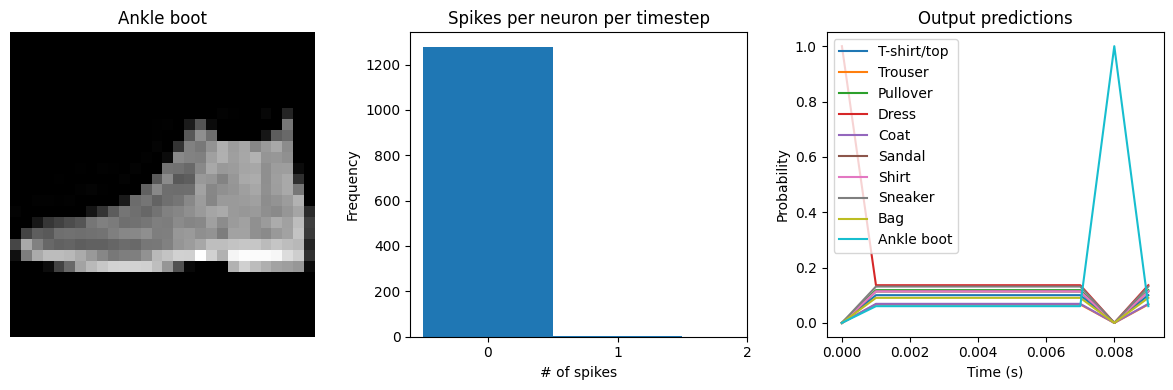

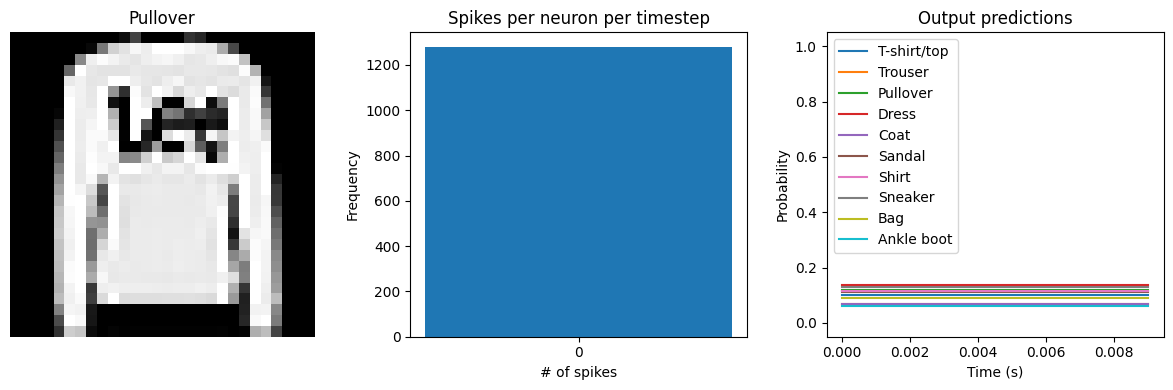

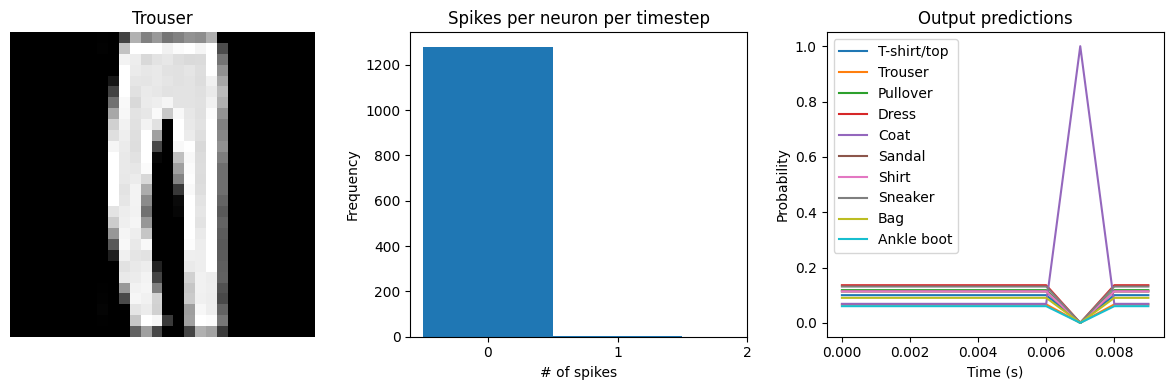

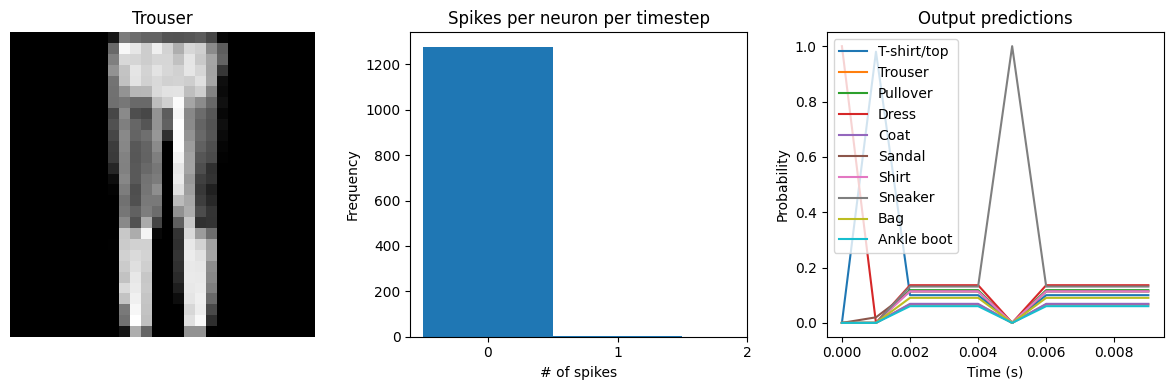

In [7]:
check_output(spiking_model)

We can see an immediate problem: the neurons are hardly spiking at all. The mean number
of spikes we're getting out of each neuron in our SpikingActivation layer is much less
than one, and as a result the output is mostly flat.

To help understand why, we need to think more about the temporal nature of spiking
neurons. Recall that the layer is set up such that if the base activation function were
to be outputting a value of 1, the spiking equivalent would be spiking at 1Hz (i.e.,
emitting one spike per second). In the above example we are simulating for 10 timesteps,
with the default `dt` of 0.001s, so we're simulating a total of 0.01s. If our neurons
aren't spiking very rapidly, and we're only simulating for 0.01s, then it's not
surprising that we aren't getting any spikes in that time window.

We can increase the value of `dt`, effectively running the spiking neurons for longer,
in order to get a more accurate measure of the neuron's output. Basically this allows us
to collect more spikes from each neuron, giving us a better estimate of the neuron's
actual spike rate. We can see how the number of spikes and accuracy change as we
increase `dt`:

  1/313 [..............................] - ETA: 47s

 25/313 [=>............................] - ETA: 0s 

 48/313 [===>..........................] - ETA: 0s

 71/313 [=====>........................] - ETA: 0s

 95/313 [========>.....................] - ETA: 0s

117/313 [==========>...................] - ETA: 0s

140/313 [============>.................] - ETA: 0s

164/313 [==============>...............] - ETA: 0s

187/313 [================>.............] - ETA: 0s

210/313 [===================>..........] - ETA: 0s

232/313 [=====================>........] - ETA: 0s

255/313 [=======================>......] - ETA: 0s

279/313 [=========================>....] - ETA: 0s

302/313 [===========================>..] - ETA: 0s

313/313 [==============================] - 1s 2ms/step


Test accuracy: 65.24%
Spike rate per neuron (Hz): min=0.00 mean=0.54 max=20.00


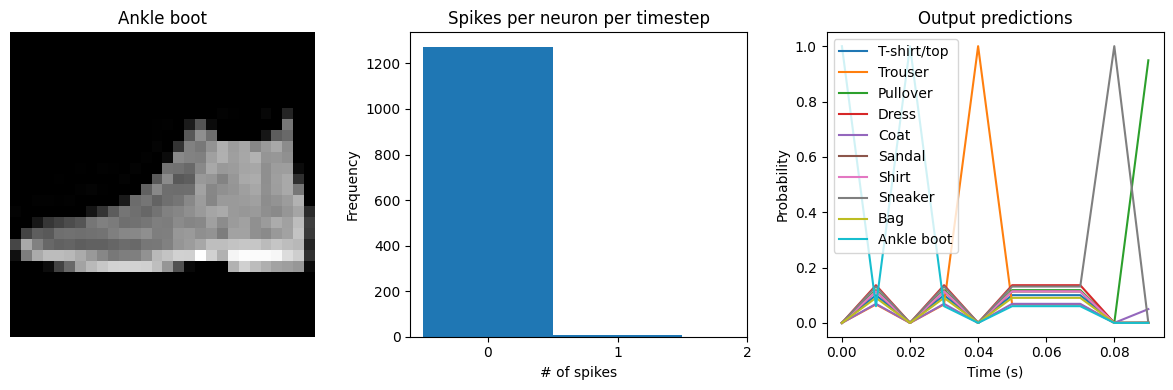

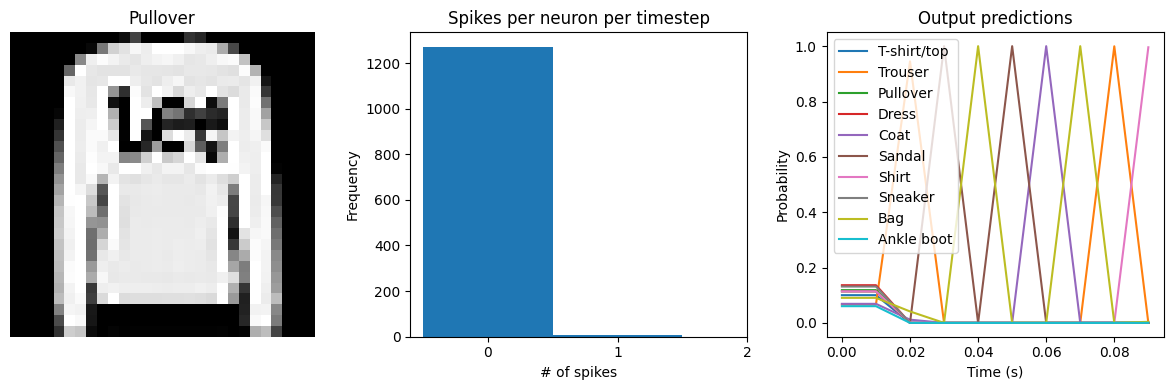

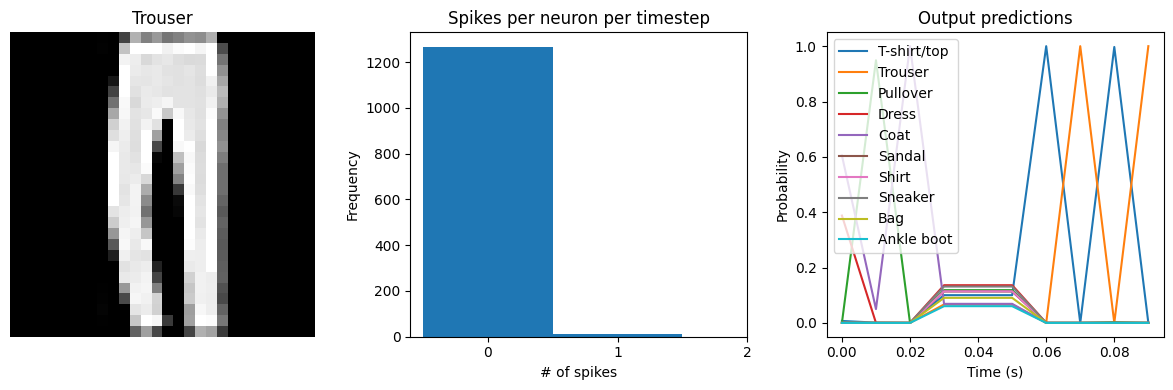

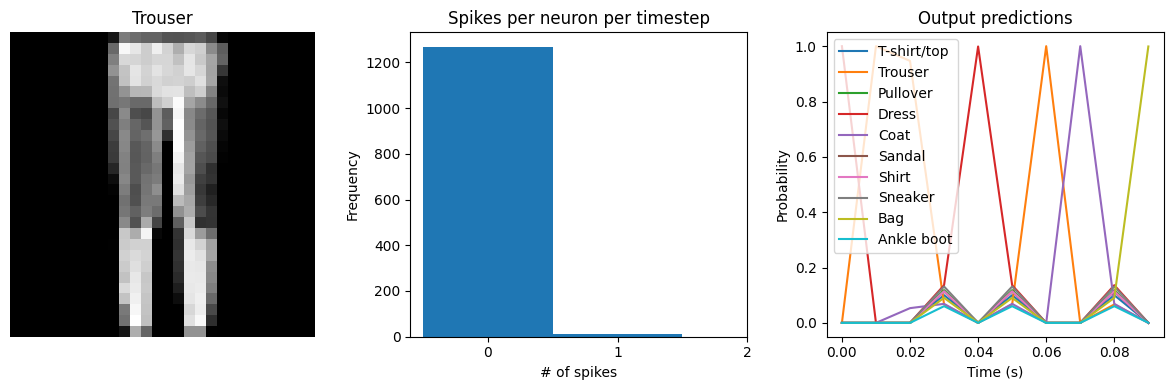

In [8]:
# dt=0.01 * 10 timesteps is equivalent to 0.1s of simulated time
check_output(spiking_model, modify_dt=0.01)

  1/313 [..............................] - ETA: 48s

 24/313 [=>............................] - ETA: 0s 

 47/313 [===>..........................] - ETA: 0s

 70/313 [=====>........................] - ETA: 0s

 94/313 [========>.....................] - ETA: 0s

117/313 [==========>...................] - ETA: 0s

140/313 [============>.................] - ETA: 0s

163/313 [==============>...............] - ETA: 0s

187/313 [================>.............] - ETA: 0s

209/313 [===================>..........] - ETA: 0s

232/313 [=====================>........] - ETA: 0s

255/313 [=======================>......] - ETA: 0s

279/313 [=========================>....] - ETA: 0s

303/313 [============================>.] - ETA: 0s

313/313 [==============================] - 1s 2ms/step


Test accuracy: 87.85%
Spike rate per neuron (Hz): min=0.00 mean=0.54 max=21.00


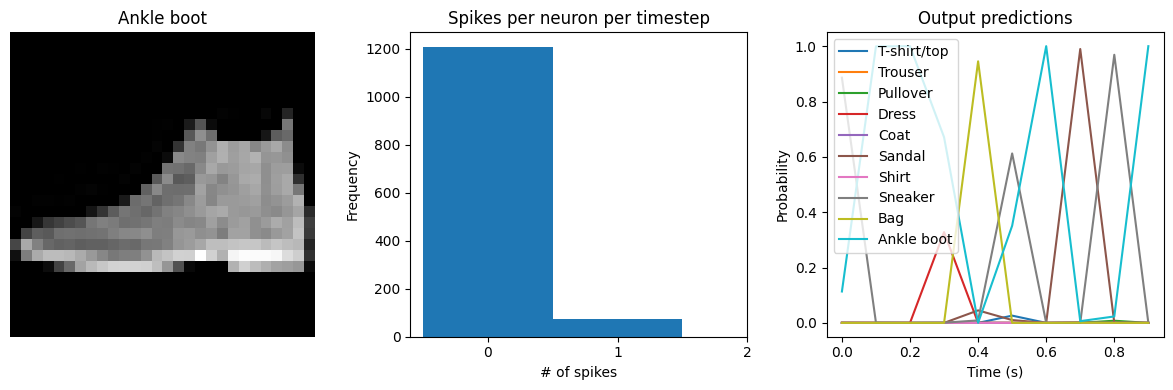

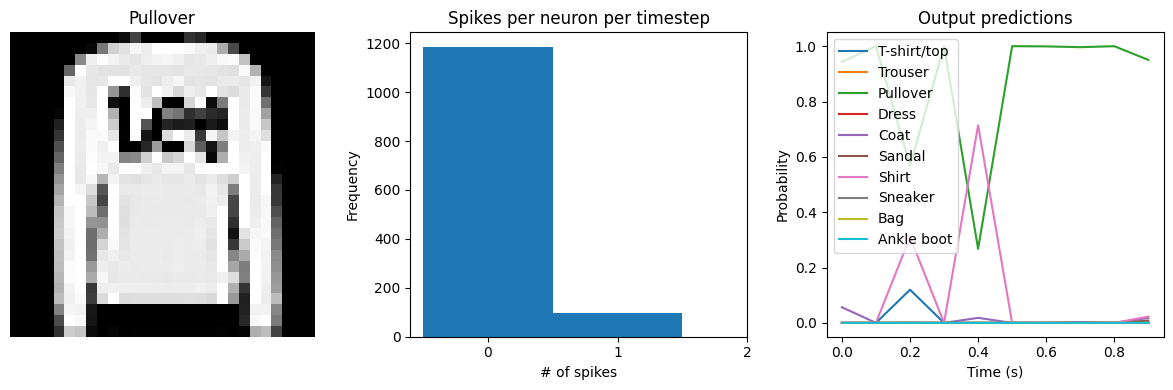

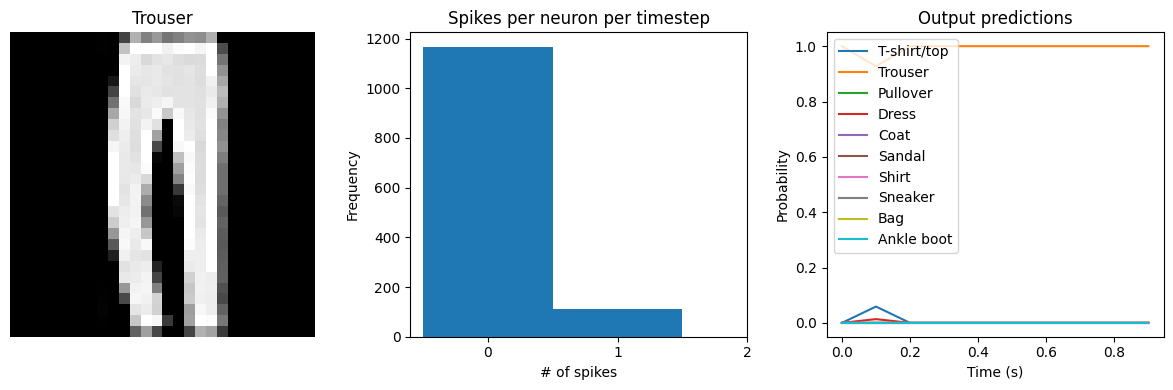

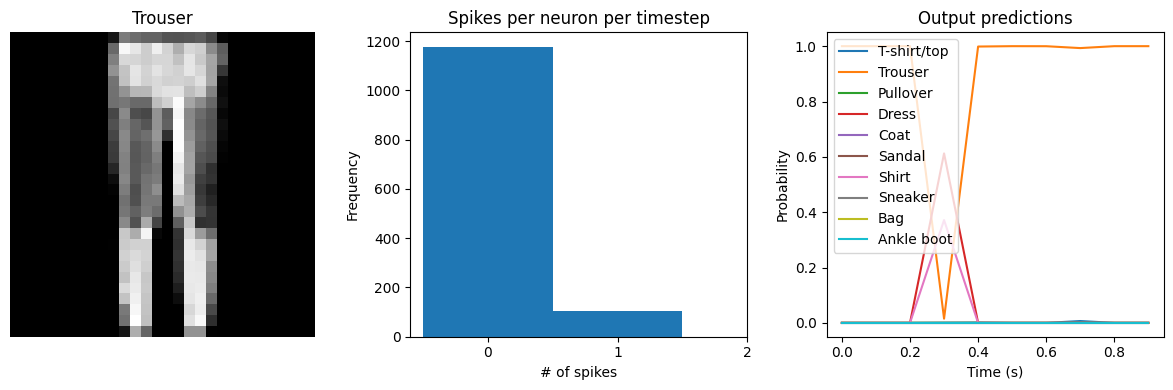

In [9]:
check_output(spiking_model, modify_dt=0.1)

  1/313 [..............................] - ETA: 47s

 26/313 [=>............................] - ETA: 0s 

 51/313 [===>..........................] - ETA: 0s

 76/313 [======>.......................] - ETA: 0s

101/313 [========>.....................] - ETA: 0s

126/313 [===========>..................] - ETA: 0s

151/313 [=============>................] - ETA: 0s

176/313 [===============>..............] - ETA: 0s

201/313 [==================>...........] - ETA: 0s

224/313 [====================>.........] - ETA: 0s

249/313 [======================>.......] - ETA: 0s

274/313 [=========================>....] - ETA: 0s

299/313 [===========================>..] - ETA: 0s

313/313 [==============================] - 1s 2ms/step


Test accuracy: 88.01%
Spike rate per neuron (Hz): min=0.00 mean=0.54 max=21.00


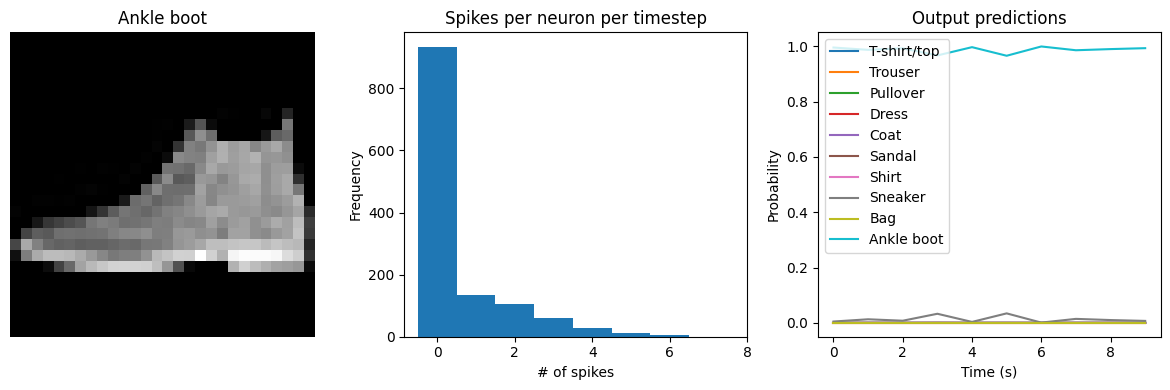

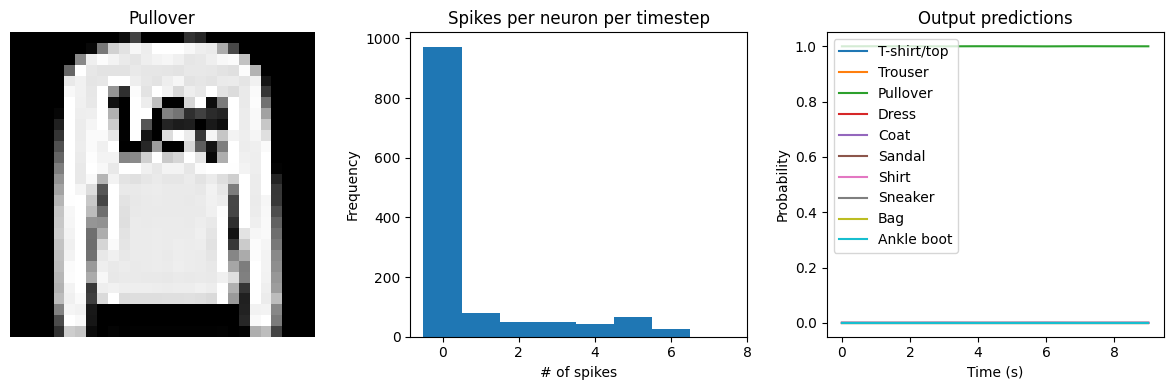

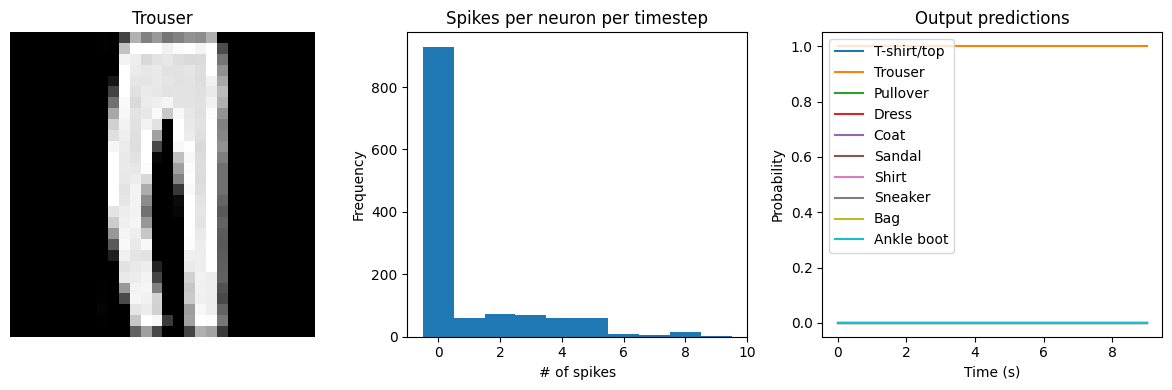

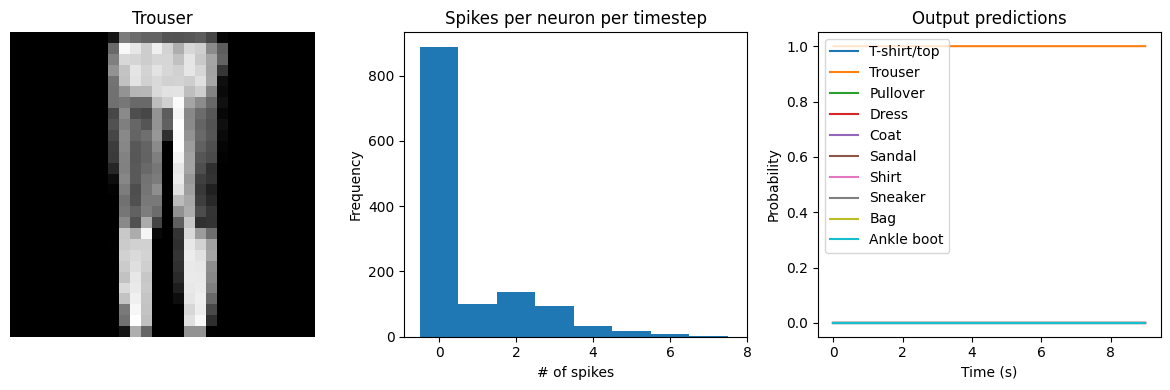

In [10]:
check_output(spiking_model, modify_dt=1)

We can see that as we increase `dt` the performance of the spiking model increasingly
approaches the non-spiking performance. In addition, as `dt` increases, the number of
spikes is increasing. To understand why this improves accuracy, keep in mind that
although the simulated time is increasing, the actual number of timesteps is still 10 in
all cases. We're effectively binning all the spikes that occur on each time step. So as
our bin sizes get larger (increasing `dt`), the spike counts will more closely
approximate the "true" output of the underlying non-spiking activation function.

One might be tempted to simply increase `dt` to a very large value, and thereby always
get great performance. But keep in mind that when we do that we have likely lost any of
the advantages that were motivating us to investigate spiking models in the first place.
For example, one prominent advantage of spiking models is temporal sparsity (we only
need to communicate occasional spikes, rather than continuous values). However, with
large `dt` the neurons are likely spiking every simulation time step (or multiple times
per timestep), so the activity is no longer temporally sparse.

Thus setting `dt` represents a trade-off between accuracy and temporal sparsity.
Choosing the appropriate value will depend on the demands of your application.

In some cases it can be useful to modify `dt` over the course of training. For example,
we could start with a large `dt` and then gradually decrease it over time. See
`keras_spiking.callbacks.DtScheduler` for more details.

## Spiking aware training

As mentioned above, by default SpikingActivation layers will use the non-spiking
activation function during training and the spiking version during inference. However,
similar to the idea of
[quantization aware
training](https://www.tensorflow.org/model_optimization/guide/quantization/training),
often we can improve performance by partially incorporating spiking behaviour during
training. Specifically, we will use the spiking activation on the forward pass, while
still using the non-spiking version on the backwards pass. This allows the model to
learn weights that account for the discrete, temporal nature of the spiking activities.

In [11]:
spikeaware_model = tf.keras.Sequential(
    [
        tf.keras.layers.Reshape((-1, 28 * 28), input_shape=(None, 28, 28)),
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
        # set spiking_aware training and a moderate dt
        keras_spiking.SpikingActivation("relu", dt=0.01, spiking_aware_training=True),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(10),
    ]
)

train(spikeaware_model, train_sequences, test_sequences)

Epoch 1/10


   1/1875 [..............................] - ETA: 18:35 - loss: 3.7275 - accuracy: 0.0938

  14/1875 [..............................] - ETA: 7s - loss: 3.2016 - accuracy: 0.1607   

  27/1875 [..............................] - ETA: 7s - loss: 3.0844 - accuracy: 0.2419

  40/1875 [..............................] - ETA: 7s - loss: 3.0351 - accuracy: 0.2781

  51/1875 [..............................] - ETA: 7s - loss: 3.0257 - accuracy: 0.3002

  64/1875 [>.............................] - ETA: 7s - loss: 2.9478 - accuracy: 0.3306

  76/1875 [>.............................] - ETA: 7s - loss: 2.8873 - accuracy: 0.3532

  89/1875 [>.............................] - ETA: 7s - loss: 2.8129 - accuracy: 0.3725

 102/1875 [>.............................] - ETA: 7s - loss: 2.7662 - accuracy: 0.3845

 115/1875 [>.............................] - ETA: 7s - loss: 2.7069 - accuracy: 0.4041

 125/1875 [=>............................] - ETA: 7s - loss: 2.6538 - accuracy: 0.4185

 138/1875 [=>............................] - ETA: 7s - loss: 2.6275 - accuracy: 0.4300

 149/1875 [=>............................] - ETA: 7s - loss: 2.5807 - accuracy: 0.4406

 162/1875 [=>............................] - ETA: 7s - loss: 2.5634 - accuracy: 0.4487

 175/1875 [=>............................] - ETA: 7s - loss: 2.5243 - accuracy: 0.4579

 188/1875 [==>...........................] - ETA: 6s - loss: 2.5004 - accuracy: 0.4661

 201/1875 [==>...........................] - ETA: 6s - loss: 2.4777 - accuracy: 0.4731

 214/1875 [==>...........................] - ETA: 6s - loss: 2.4427 - accuracy: 0.4825

 227/1875 [==>...........................] - ETA: 6s - loss: 2.4171 - accuracy: 0.4891

 240/1875 [==>...........................] - ETA: 6s - loss: 2.3756 - accuracy: 0.4971

 253/1875 [===>..........................] - ETA: 6s - loss: 2.3582 - accuracy: 0.5032

 266/1875 [===>..........................] - ETA: 6s - loss: 2.3461 - accuracy: 0.5080

 279/1875 [===>..........................] - ETA: 6s - loss: 2.3219 - accuracy: 0.5128

 291/1875 [===>..........................] - ETA: 6s - loss: 2.3018 - accuracy: 0.5170

 304/1875 [===>..........................] - ETA: 6s - loss: 2.2760 - accuracy: 0.5217

 317/1875 [====>.........................] - ETA: 6s - loss: 2.2561 - accuracy: 0.5248

 329/1875 [====>.........................] - ETA: 6s - loss: 2.2312 - accuracy: 0.5296

 342/1875 [====>.........................] - ETA: 6s - loss: 2.2102 - accuracy: 0.5332

 355/1875 [====>.........................] - ETA: 6s - loss: 2.1867 - accuracy: 0.5372

 368/1875 [====>.........................] - ETA: 6s - loss: 2.1604 - accuracy: 0.5420

 381/1875 [=====>........................] - ETA: 6s - loss: 2.1428 - accuracy: 0.5440

 394/1875 [=====>........................] - ETA: 6s - loss: 2.1138 - accuracy: 0.5477

 407/1875 [=====>........................] - ETA: 6s - loss: 2.0904 - accuracy: 0.5508

 420/1875 [=====>........................] - ETA: 5s - loss: 2.0697 - accuracy: 0.5550

 433/1875 [=====>........................] - ETA: 5s - loss: 2.0484 - accuracy: 0.5579

 446/1875 [======>.......................] - ETA: 5s - loss: 2.0295 - accuracy: 0.5614

 459/1875 [======>.......................] - ETA: 5s - loss: 2.0080 - accuracy: 0.5640

 472/1875 [======>.......................] - ETA: 5s - loss: 1.9902 - accuracy: 0.5659

 485/1875 [======>.......................] - ETA: 5s - loss: 1.9703 - accuracy: 0.5688

 498/1875 [======>.......................] - ETA: 5s - loss: 1.9549 - accuracy: 0.5707

 511/1875 [=======>......................] - ETA: 5s - loss: 1.9435 - accuracy: 0.5721

 524/1875 [=======>......................] - ETA: 5s - loss: 1.9274 - accuracy: 0.5740

 537/1875 [=======>......................] - ETA: 5s - loss: 1.9155 - accuracy: 0.5759

 550/1875 [=======>......................] - ETA: 5s - loss: 1.8953 - accuracy: 0.5789

 563/1875 [========>.....................] - ETA: 5s - loss: 1.8773 - accuracy: 0.5815

 576/1875 [========>.....................] - ETA: 5s - loss: 1.8614 - accuracy: 0.5836

 589/1875 [========>.....................] - ETA: 5s - loss: 1.8483 - accuracy: 0.5854

 602/1875 [========>.....................] - ETA: 5s - loss: 1.8305 - accuracy: 0.5874

 615/1875 [========>.....................] - ETA: 5s - loss: 1.8129 - accuracy: 0.5895

 628/1875 [=========>....................] - ETA: 5s - loss: 1.7969 - accuracy: 0.5913

 641/1875 [=========>....................] - ETA: 5s - loss: 1.7842 - accuracy: 0.5932

 654/1875 [=========>....................] - ETA: 4s - loss: 1.7681 - accuracy: 0.5951

 667/1875 [=========>....................] - ETA: 4s - loss: 1.7531 - accuracy: 0.5970

 680/1875 [=========>....................] - ETA: 4s - loss: 1.7425 - accuracy: 0.5986

 693/1875 [==========>...................] - ETA: 4s - loss: 1.7312 - accuracy: 0.5998

 706/1875 [==========>...................] - ETA: 4s - loss: 1.7181 - accuracy: 0.6007

 719/1875 [==========>...................] - ETA: 4s - loss: 1.7060 - accuracy: 0.6022

 732/1875 [==========>...................] - ETA: 4s - loss: 1.6932 - accuracy: 0.6034

 745/1875 [==========>...................] - ETA: 4s - loss: 1.6823 - accuracy: 0.6045

 758/1875 [===========>..................] - ETA: 4s - loss: 1.6727 - accuracy: 0.6056

 771/1875 [===========>..................] - ETA: 4s - loss: 1.6605 - accuracy: 0.6074

 784/1875 [===========>..................] - ETA: 4s - loss: 1.6507 - accuracy: 0.6091

 797/1875 [===========>..................] - ETA: 4s - loss: 1.6405 - accuracy: 0.6101

 810/1875 [===========>..................] - ETA: 4s - loss: 1.6289 - accuracy: 0.6118

 822/1875 [============>.................] - ETA: 4s - loss: 1.6225 - accuracy: 0.6122

 835/1875 [============>.................] - ETA: 4s - loss: 1.6111 - accuracy: 0.6135

 848/1875 [============>.................] - ETA: 4s - loss: 1.5992 - accuracy: 0.6147

 861/1875 [============>.................] - ETA: 4s - loss: 1.5879 - accuracy: 0.6160

 870/1875 [============>.................] - ETA: 4s - loss: 1.5825 - accuracy: 0.6166

 883/1875 [=============>................] - ETA: 4s - loss: 1.5727 - accuracy: 0.6179

 894/1875 [=============>................] - ETA: 3s - loss: 1.5661 - accuracy: 0.6188

 907/1875 [=============>................] - ETA: 3s - loss: 1.5567 - accuracy: 0.6198

 920/1875 [=============>................] - ETA: 3s - loss: 1.5467 - accuracy: 0.6210

 933/1875 [=============>................] - ETA: 3s - loss: 1.5383 - accuracy: 0.6221

 946/1875 [==============>...............] - ETA: 3s - loss: 1.5285 - accuracy: 0.6236

 959/1875 [==============>...............] - ETA: 3s - loss: 1.5200 - accuracy: 0.6248

 972/1875 [==============>...............] - ETA: 3s - loss: 1.5118 - accuracy: 0.6259

 985/1875 [==============>...............] - ETA: 3s - loss: 1.5031 - accuracy: 0.6271

 998/1875 [==============>...............] - ETA: 3s - loss: 1.4953 - accuracy: 0.6280

1011/1875 [===============>..............] - ETA: 3s - loss: 1.4872 - accuracy: 0.6290

1024/1875 [===============>..............] - ETA: 3s - loss: 1.4781 - accuracy: 0.6303

1036/1875 [===============>..............] - ETA: 3s - loss: 1.4718 - accuracy: 0.6311

1049/1875 [===============>..............] - ETA: 3s - loss: 1.4630 - accuracy: 0.6322

1062/1875 [===============>..............] - ETA: 3s - loss: 1.4556 - accuracy: 0.6331

1075/1875 [================>.............] - ETA: 3s - loss: 1.4487 - accuracy: 0.6338

1088/1875 [================>.............] - ETA: 3s - loss: 1.4412 - accuracy: 0.6347

1099/1875 [================>.............] - ETA: 3s - loss: 1.4343 - accuracy: 0.6356

1112/1875 [================>.............] - ETA: 3s - loss: 1.4270 - accuracy: 0.6365

1125/1875 [=================>............] - ETA: 3s - loss: 1.4195 - accuracy: 0.6373

1138/1875 [=================>............] - ETA: 2s - loss: 1.4136 - accuracy: 0.6383

1151/1875 [=================>............] - ETA: 2s - loss: 1.4070 - accuracy: 0.6388

1164/1875 [=================>............] - ETA: 2s - loss: 1.3992 - accuracy: 0.6400

1177/1875 [=================>............] - ETA: 2s - loss: 1.3938 - accuracy: 0.6403

1190/1875 [==================>...........] - ETA: 2s - loss: 1.3880 - accuracy: 0.6411

1203/1875 [==================>...........] - ETA: 2s - loss: 1.3814 - accuracy: 0.6419

1216/1875 [==================>...........] - ETA: 2s - loss: 1.3744 - accuracy: 0.6429

1229/1875 [==================>...........] - ETA: 2s - loss: 1.3675 - accuracy: 0.6441

1242/1875 [==================>...........] - ETA: 2s - loss: 1.3623 - accuracy: 0.6447

1255/1875 [===================>..........] - ETA: 2s - loss: 1.3560 - accuracy: 0.6455

1268/1875 [===================>..........] - ETA: 2s - loss: 1.3495 - accuracy: 0.6464

1279/1875 [===================>..........] - ETA: 2s - loss: 1.3443 - accuracy: 0.6474

1291/1875 [===================>..........] - ETA: 2s - loss: 1.3384 - accuracy: 0.6482

1303/1875 [===================>..........] - ETA: 2s - loss: 1.3328 - accuracy: 0.6490

1316/1875 [====================>.........] - ETA: 2s - loss: 1.3261 - accuracy: 0.6501

1328/1875 [====================>.........] - ETA: 2s - loss: 1.3208 - accuracy: 0.6507

1340/1875 [====================>.........] - ETA: 2s - loss: 1.3167 - accuracy: 0.6512

1353/1875 [====================>.........] - ETA: 2s - loss: 1.3109 - accuracy: 0.6520

1366/1875 [====================>.........] - ETA: 2s - loss: 1.3046 - accuracy: 0.6531

1378/1875 [=====================>........] - ETA: 2s - loss: 1.3009 - accuracy: 0.6535

1390/1875 [=====================>........] - ETA: 1s - loss: 1.2961 - accuracy: 0.6542

1403/1875 [=====================>........] - ETA: 1s - loss: 1.2921 - accuracy: 0.6545

1416/1875 [=====================>........] - ETA: 1s - loss: 1.2880 - accuracy: 0.6551

1428/1875 [=====================>........] - ETA: 1s - loss: 1.2842 - accuracy: 0.6556

1441/1875 [======================>.......] - ETA: 1s - loss: 1.2794 - accuracy: 0.6562

1454/1875 [======================>.......] - ETA: 1s - loss: 1.2740 - accuracy: 0.6569

1467/1875 [======================>.......] - ETA: 1s - loss: 1.2707 - accuracy: 0.6571

1477/1875 [======================>.......] - ETA: 1s - loss: 1.2676 - accuracy: 0.6577

1490/1875 [======================>.......] - ETA: 1s - loss: 1.2620 - accuracy: 0.6586

1503/1875 [=======================>......] - ETA: 1s - loss: 1.2570 - accuracy: 0.6596

1516/1875 [=======================>......] - ETA: 1s - loss: 1.2523 - accuracy: 0.6602

1529/1875 [=======================>......] - ETA: 1s - loss: 1.2478 - accuracy: 0.6608

1542/1875 [=======================>......] - ETA: 1s - loss: 1.2435 - accuracy: 0.6614

1555/1875 [=======================>......] - ETA: 1s - loss: 1.2391 - accuracy: 0.6620

1568/1875 [========================>.....] - ETA: 1s - loss: 1.2350 - accuracy: 0.6626

1580/1875 [========================>.....] - ETA: 1s - loss: 1.2318 - accuracy: 0.6630

1593/1875 [========================>.....] - ETA: 1s - loss: 1.2283 - accuracy: 0.6635

1605/1875 [========================>.....] - ETA: 1s - loss: 1.2241 - accuracy: 0.6641

1617/1875 [========================>.....] - ETA: 1s - loss: 1.2202 - accuracy: 0.6645

1630/1875 [=========================>....] - ETA: 1s - loss: 1.2171 - accuracy: 0.6650

1643/1875 [=========================>....] - ETA: 0s - loss: 1.2135 - accuracy: 0.6655

1656/1875 [=========================>....] - ETA: 0s - loss: 1.2098 - accuracy: 0.6661

1668/1875 [=========================>....] - ETA: 0s - loss: 1.2060 - accuracy: 0.6667

1681/1875 [=========================>....] - ETA: 0s - loss: 1.2019 - accuracy: 0.6674

1694/1875 [==========================>...] - ETA: 0s - loss: 1.1992 - accuracy: 0.6677

1707/1875 [==========================>...] - ETA: 0s - loss: 1.1954 - accuracy: 0.6683

1720/1875 [==========================>...] - ETA: 0s - loss: 1.1919 - accuracy: 0.6689

1733/1875 [==========================>...] - ETA: 0s - loss: 1.1880 - accuracy: 0.6694

1745/1875 [==========================>...] - ETA: 0s - loss: 1.1847 - accuracy: 0.6701

1757/1875 [===========================>..] - ETA: 0s - loss: 1.1813 - accuracy: 0.6706

1770/1875 [===========================>..] - ETA: 0s - loss: 1.1780 - accuracy: 0.6709

1783/1875 [===========================>..] - ETA: 0s - loss: 1.1743 - accuracy: 0.6716

1796/1875 [===========================>..] - ETA: 0s - loss: 1.1720 - accuracy: 0.6719

1809/1875 [===========================>..] - ETA: 0s - loss: 1.1687 - accuracy: 0.6723

1822/1875 [============================>.] - ETA: 0s - loss: 1.1650 - accuracy: 0.6727

1834/1875 [============================>.] - ETA: 0s - loss: 1.1615 - accuracy: 0.6733

1847/1875 [============================>.] - ETA: 0s - loss: 1.1575 - accuracy: 0.6742

1860/1875 [============================>.] - ETA: 0s - loss: 1.1552 - accuracy: 0.6745

1873/1875 [============================>.] - ETA: 0s - loss: 1.1521 - accuracy: 0.6752

1875/1875 [==============================] - 8s 4ms/step - loss: 1.1515 - accuracy: 0.6754


Epoch 2/10


   1/1875 [..............................] - ETA: 10s - loss: 0.6725 - accuracy: 0.7812

  14/1875 [..............................] - ETA: 7s - loss: 0.7105 - accuracy: 0.7388 

  27/1875 [..............................] - ETA: 7s - loss: 0.7076 - accuracy: 0.7465

  40/1875 [..............................] - ETA: 7s - loss: 0.7368 - accuracy: 0.7227

  53/1875 [..............................] - ETA: 7s - loss: 0.7466 - accuracy: 0.7217

  66/1875 [>.............................] - ETA: 7s - loss: 0.7319 - accuracy: 0.7282

  78/1875 [>.............................] - ETA: 7s - loss: 0.7184 - accuracy: 0.7364

  91/1875 [>.............................] - ETA: 7s - loss: 0.7090 - accuracy: 0.7376

 103/1875 [>.............................] - ETA: 7s - loss: 0.7156 - accuracy: 0.7363

 116/1875 [>.............................] - ETA: 7s - loss: 0.7140 - accuracy: 0.7376

 129/1875 [=>............................] - ETA: 7s - loss: 0.7230 - accuracy: 0.7369

 139/1875 [=>............................] - ETA: 7s - loss: 0.7284 - accuracy: 0.7374

 152/1875 [=>............................] - ETA: 7s - loss: 0.7237 - accuracy: 0.7395

 165/1875 [=>............................] - ETA: 7s - loss: 0.7254 - accuracy: 0.7369

 178/1875 [=>............................] - ETA: 6s - loss: 0.7190 - accuracy: 0.7372

 190/1875 [==>...........................] - ETA: 6s - loss: 0.7120 - accuracy: 0.7395

 203/1875 [==>...........................] - ETA: 6s - loss: 0.7102 - accuracy: 0.7394

 216/1875 [==>...........................] - ETA: 6s - loss: 0.7078 - accuracy: 0.7400

 229/1875 [==>...........................] - ETA: 6s - loss: 0.7002 - accuracy: 0.7430

 241/1875 [==>...........................] - ETA: 6s - loss: 0.7055 - accuracy: 0.7403

 254/1875 [===>..........................] - ETA: 6s - loss: 0.7031 - accuracy: 0.7420

 267/1875 [===>..........................] - ETA: 6s - loss: 0.7006 - accuracy: 0.7426

 280/1875 [===>..........................] - ETA: 6s - loss: 0.6988 - accuracy: 0.7444

 293/1875 [===>..........................] - ETA: 6s - loss: 0.6945 - accuracy: 0.7451

 306/1875 [===>..........................] - ETA: 6s - loss: 0.6968 - accuracy: 0.7439

 319/1875 [====>.........................] - ETA: 6s - loss: 0.6949 - accuracy: 0.7455

 331/1875 [====>.........................] - ETA: 6s - loss: 0.6920 - accuracy: 0.7461

 344/1875 [====>.........................] - ETA: 6s - loss: 0.6912 - accuracy: 0.7464

 357/1875 [====>.........................] - ETA: 6s - loss: 0.6926 - accuracy: 0.7465

 370/1875 [====>.........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.7465

 383/1875 [=====>........................] - ETA: 6s - loss: 0.6908 - accuracy: 0.7470

 396/1875 [=====>........................] - ETA: 6s - loss: 0.6900 - accuracy: 0.7475

 409/1875 [=====>........................] - ETA: 5s - loss: 0.6888 - accuracy: 0.7476

 422/1875 [=====>........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.7472

 435/1875 [=====>........................] - ETA: 5s - loss: 0.6906 - accuracy: 0.7471

 448/1875 [======>.......................] - ETA: 5s - loss: 0.6889 - accuracy: 0.7482

 461/1875 [======>.......................] - ETA: 5s - loss: 0.6891 - accuracy: 0.7491

 474/1875 [======>.......................] - ETA: 5s - loss: 0.6894 - accuracy: 0.7489

 487/1875 [======>.......................] - ETA: 5s - loss: 0.6901 - accuracy: 0.7490

 500/1875 [=======>......................] - ETA: 5s - loss: 0.6900 - accuracy: 0.7491

 513/1875 [=======>......................] - ETA: 5s - loss: 0.6883 - accuracy: 0.7491

 526/1875 [=======>......................] - ETA: 5s - loss: 0.6886 - accuracy: 0.7495

 538/1875 [=======>......................] - ETA: 5s - loss: 0.6882 - accuracy: 0.7494

 551/1875 [=======>......................] - ETA: 5s - loss: 0.6864 - accuracy: 0.7503

 564/1875 [========>.....................] - ETA: 5s - loss: 0.6849 - accuracy: 0.7511

 577/1875 [========>.....................] - ETA: 5s - loss: 0.6861 - accuracy: 0.7510

 590/1875 [========>.....................] - ETA: 5s - loss: 0.6863 - accuracy: 0.7513

 603/1875 [========>.....................] - ETA: 5s - loss: 0.6866 - accuracy: 0.7513

 616/1875 [========>.....................] - ETA: 5s - loss: 0.6858 - accuracy: 0.7517

 628/1875 [=========>....................] - ETA: 5s - loss: 0.6857 - accuracy: 0.7516

 641/1875 [=========>....................] - ETA: 5s - loss: 0.6847 - accuracy: 0.7520

 652/1875 [=========>....................] - ETA: 4s - loss: 0.6845 - accuracy: 0.7520

 664/1875 [=========>....................] - ETA: 4s - loss: 0.6831 - accuracy: 0.7520

 677/1875 [=========>....................] - ETA: 4s - loss: 0.6818 - accuracy: 0.7525

 690/1875 [==========>...................] - ETA: 4s - loss: 0.6807 - accuracy: 0.7528

 703/1875 [==========>...................] - ETA: 4s - loss: 0.6804 - accuracy: 0.7525

 716/1875 [==========>...................] - ETA: 4s - loss: 0.6796 - accuracy: 0.7526

 729/1875 [==========>...................] - ETA: 4s - loss: 0.6775 - accuracy: 0.7533

 742/1875 [==========>...................] - ETA: 4s - loss: 0.6765 - accuracy: 0.7537

 755/1875 [===========>..................] - ETA: 4s - loss: 0.6752 - accuracy: 0.7542

 768/1875 [===========>..................] - ETA: 4s - loss: 0.6751 - accuracy: 0.7544

 781/1875 [===========>..................] - ETA: 4s - loss: 0.6743 - accuracy: 0.7549

 794/1875 [===========>..................] - ETA: 4s - loss: 0.6733 - accuracy: 0.7554

 807/1875 [===========>..................] - ETA: 4s - loss: 0.6737 - accuracy: 0.7553

 820/1875 [============>.................] - ETA: 4s - loss: 0.6732 - accuracy: 0.7558

 833/1875 [============>.................] - ETA: 4s - loss: 0.6739 - accuracy: 0.7561

 846/1875 [============>.................] - ETA: 4s - loss: 0.6738 - accuracy: 0.7563

 859/1875 [============>.................] - ETA: 4s - loss: 0.6734 - accuracy: 0.7564

 871/1875 [============>.................] - ETA: 4s - loss: 0.6721 - accuracy: 0.7572

 884/1875 [=============>................] - ETA: 4s - loss: 0.6721 - accuracy: 0.7572

 897/1875 [=============>................] - ETA: 3s - loss: 0.6714 - accuracy: 0.7572

 910/1875 [=============>................] - ETA: 3s - loss: 0.6703 - accuracy: 0.7578

 923/1875 [=============>................] - ETA: 3s - loss: 0.6695 - accuracy: 0.7580

 936/1875 [=============>................] - ETA: 3s - loss: 0.6687 - accuracy: 0.7584

 949/1875 [==============>...............] - ETA: 3s - loss: 0.6689 - accuracy: 0.7584

 962/1875 [==============>...............] - ETA: 3s - loss: 0.6681 - accuracy: 0.7588

 975/1875 [==============>...............] - ETA: 3s - loss: 0.6688 - accuracy: 0.7583

 988/1875 [==============>...............] - ETA: 3s - loss: 0.6683 - accuracy: 0.7587

1001/1875 [===============>..............] - ETA: 3s - loss: 0.6662 - accuracy: 0.7591

1014/1875 [===============>..............] - ETA: 3s - loss: 0.6658 - accuracy: 0.7591

1026/1875 [===============>..............] - ETA: 3s - loss: 0.6661 - accuracy: 0.7591

1039/1875 [===============>..............] - ETA: 3s - loss: 0.6657 - accuracy: 0.7592

1052/1875 [===============>..............] - ETA: 3s - loss: 0.6655 - accuracy: 0.7596

1065/1875 [================>.............] - ETA: 3s - loss: 0.6652 - accuracy: 0.7599

1078/1875 [================>.............] - ETA: 3s - loss: 0.6650 - accuracy: 0.7600

1091/1875 [================>.............] - ETA: 3s - loss: 0.6645 - accuracy: 0.7602

1104/1875 [================>.............] - ETA: 3s - loss: 0.6642 - accuracy: 0.7604

1117/1875 [================>.............] - ETA: 3s - loss: 0.6645 - accuracy: 0.7605

1130/1875 [=================>............] - ETA: 3s - loss: 0.6631 - accuracy: 0.7608

1143/1875 [=================>............] - ETA: 2s - loss: 0.6629 - accuracy: 0.7608

1156/1875 [=================>............] - ETA: 2s - loss: 0.6633 - accuracy: 0.7606

1169/1875 [=================>............] - ETA: 2s - loss: 0.6630 - accuracy: 0.7606

1182/1875 [=================>............] - ETA: 2s - loss: 0.6627 - accuracy: 0.7605

1195/1875 [==================>...........] - ETA: 2s - loss: 0.6624 - accuracy: 0.7606

1208/1875 [==================>...........] - ETA: 2s - loss: 0.6625 - accuracy: 0.7605

1221/1875 [==================>...........] - ETA: 2s - loss: 0.6612 - accuracy: 0.7609

1234/1875 [==================>...........] - ETA: 2s - loss: 0.6600 - accuracy: 0.7614

1245/1875 [==================>...........] - ETA: 2s - loss: 0.6598 - accuracy: 0.7617

1252/1875 [===================>..........] - ETA: 2s - loss: 0.6597 - accuracy: 0.7617

1263/1875 [===================>..........] - ETA: 2s - loss: 0.6590 - accuracy: 0.7619

1273/1875 [===================>..........] - ETA: 2s - loss: 0.6586 - accuracy: 0.7620

1281/1875 [===================>..........] - ETA: 2s - loss: 0.6585 - accuracy: 0.7620

1294/1875 [===================>..........] - ETA: 2s - loss: 0.6583 - accuracy: 0.7622

1307/1875 [===================>..........] - ETA: 2s - loss: 0.6577 - accuracy: 0.7626

1320/1875 [====================>.........] - ETA: 2s - loss: 0.6578 - accuracy: 0.7625

1333/1875 [====================>.........] - ETA: 2s - loss: 0.6577 - accuracy: 0.7623

1346/1875 [====================>.........] - ETA: 2s - loss: 0.6580 - accuracy: 0.7622

1358/1875 [====================>.........] - ETA: 2s - loss: 0.6570 - accuracy: 0.7627

1371/1875 [====================>.........] - ETA: 2s - loss: 0.6569 - accuracy: 0.7626

1383/1875 [=====================>........] - ETA: 2s - loss: 0.6568 - accuracy: 0.7628

1396/1875 [=====================>........] - ETA: 1s - loss: 0.6560 - accuracy: 0.7632

1408/1875 [=====================>........] - ETA: 1s - loss: 0.6554 - accuracy: 0.7635

1421/1875 [=====================>........] - ETA: 1s - loss: 0.6541 - accuracy: 0.7638

1434/1875 [=====================>........] - ETA: 1s - loss: 0.6538 - accuracy: 0.7640

1447/1875 [======================>.......] - ETA: 1s - loss: 0.6533 - accuracy: 0.7643

1460/1875 [======================>.......] - ETA: 1s - loss: 0.6537 - accuracy: 0.7642

1473/1875 [======================>.......] - ETA: 1s - loss: 0.6535 - accuracy: 0.7643

1486/1875 [======================>.......] - ETA: 1s - loss: 0.6531 - accuracy: 0.7645

1499/1875 [======================>.......] - ETA: 1s - loss: 0.6531 - accuracy: 0.7646

1512/1875 [=======================>......] - ETA: 1s - loss: 0.6525 - accuracy: 0.7647

1525/1875 [=======================>......] - ETA: 1s - loss: 0.6523 - accuracy: 0.7649

1538/1875 [=======================>......] - ETA: 1s - loss: 0.6521 - accuracy: 0.7650

1551/1875 [=======================>......] - ETA: 1s - loss: 0.6522 - accuracy: 0.7650

1564/1875 [========================>.....] - ETA: 1s - loss: 0.6517 - accuracy: 0.7652

1577/1875 [========================>.....] - ETA: 1s - loss: 0.6517 - accuracy: 0.7653

1590/1875 [========================>.....] - ETA: 1s - loss: 0.6510 - accuracy: 0.7656

1603/1875 [========================>.....] - ETA: 1s - loss: 0.6502 - accuracy: 0.7659

1616/1875 [========================>.....] - ETA: 1s - loss: 0.6498 - accuracy: 0.7661

1629/1875 [=========================>....] - ETA: 1s - loss: 0.6499 - accuracy: 0.7662

1642/1875 [=========================>....] - ETA: 0s - loss: 0.6492 - accuracy: 0.7663

1655/1875 [=========================>....] - ETA: 0s - loss: 0.6483 - accuracy: 0.7665

1668/1875 [=========================>....] - ETA: 0s - loss: 0.6479 - accuracy: 0.7665

1681/1875 [=========================>....] - ETA: 0s - loss: 0.6482 - accuracy: 0.7666

1694/1875 [==========================>...] - ETA: 0s - loss: 0.6479 - accuracy: 0.7668

1707/1875 [==========================>...] - ETA: 0s - loss: 0.6478 - accuracy: 0.7670

1720/1875 [==========================>...] - ETA: 0s - loss: 0.6468 - accuracy: 0.7672

1732/1875 [==========================>...] - ETA: 0s - loss: 0.6464 - accuracy: 0.7674

1743/1875 [==========================>...] - ETA: 0s - loss: 0.6462 - accuracy: 0.7675

1756/1875 [===========================>..] - ETA: 0s - loss: 0.6462 - accuracy: 0.7674

1768/1875 [===========================>..] - ETA: 0s - loss: 0.6450 - accuracy: 0.7677

1779/1875 [===========================>..] - ETA: 0s - loss: 0.6455 - accuracy: 0.7677

1791/1875 [===========================>..] - ETA: 0s - loss: 0.6455 - accuracy: 0.7677

1804/1875 [===========================>..] - ETA: 0s - loss: 0.6454 - accuracy: 0.7678

1817/1875 [============================>.] - ETA: 0s - loss: 0.6452 - accuracy: 0.7679

1830/1875 [============================>.] - ETA: 0s - loss: 0.6441 - accuracy: 0.7683

1843/1875 [============================>.] - ETA: 0s - loss: 0.6437 - accuracy: 0.7684

1856/1875 [============================>.] - ETA: 0s - loss: 0.6429 - accuracy: 0.7688

1868/1875 [============================>.] - ETA: 0s - loss: 0.6427 - accuracy: 0.7688

1875/1875 [==============================] - 8s 4ms/step - loss: 0.6425 - accuracy: 0.7689


Epoch 3/10


   1/1875 [..............................] - ETA: 10s - loss: 0.5288 - accuracy: 0.8750

  12/1875 [..............................] - ETA: 8s - loss: 0.5513 - accuracy: 0.8021 

  25/1875 [..............................] - ETA: 8s - loss: 0.5581 - accuracy: 0.8062

  37/1875 [..............................] - ETA: 7s - loss: 0.5541 - accuracy: 0.8041

  50/1875 [..............................] - ETA: 7s - loss: 0.5636 - accuracy: 0.7962

  63/1875 [>.............................] - ETA: 7s - loss: 0.5810 - accuracy: 0.7932

  75/1875 [>.............................] - ETA: 7s - loss: 0.5872 - accuracy: 0.7925

  88/1875 [>.............................] - ETA: 7s - loss: 0.5874 - accuracy: 0.7926

 101/1875 [>.............................] - ETA: 7s - loss: 0.5855 - accuracy: 0.7949

 113/1875 [>.............................] - ETA: 7s - loss: 0.5854 - accuracy: 0.7948

 125/1875 [=>............................] - ETA: 7s - loss: 0.5879 - accuracy: 0.7950

 138/1875 [=>............................] - ETA: 7s - loss: 0.5821 - accuracy: 0.7973

 151/1875 [=>............................] - ETA: 7s - loss: 0.5792 - accuracy: 0.7962

 163/1875 [=>............................] - ETA: 7s - loss: 0.5850 - accuracy: 0.7947

 173/1875 [=>............................] - ETA: 7s - loss: 0.5848 - accuracy: 0.7952

 183/1875 [=>............................] - ETA: 7s - loss: 0.5913 - accuracy: 0.7939

 191/1875 [==>...........................] - ETA: 7s - loss: 0.5939 - accuracy: 0.7922

 197/1875 [==>...........................] - ETA: 7s - loss: 0.5953 - accuracy: 0.7909

 210/1875 [==>...........................] - ETA: 7s - loss: 0.5940 - accuracy: 0.7905

 223/1875 [==>...........................] - ETA: 7s - loss: 0.5944 - accuracy: 0.7906

 235/1875 [==>...........................] - ETA: 7s - loss: 0.5902 - accuracy: 0.7930

 247/1875 [==>...........................] - ETA: 7s - loss: 0.5892 - accuracy: 0.7921

 258/1875 [===>..........................] - ETA: 7s - loss: 0.5930 - accuracy: 0.7906

 271/1875 [===>..........................] - ETA: 7s - loss: 0.5978 - accuracy: 0.7902

 284/1875 [===>..........................] - ETA: 7s - loss: 0.5977 - accuracy: 0.7903

 297/1875 [===>..........................] - ETA: 6s - loss: 0.6000 - accuracy: 0.7899

 310/1875 [===>..........................] - ETA: 6s - loss: 0.6003 - accuracy: 0.7900

 323/1875 [====>.........................] - ETA: 6s - loss: 0.6021 - accuracy: 0.7887

 336/1875 [====>.........................] - ETA: 6s - loss: 0.5990 - accuracy: 0.7892

 349/1875 [====>.........................] - ETA: 6s - loss: 0.6008 - accuracy: 0.7874

 362/1875 [====>.........................] - ETA: 6s - loss: 0.5997 - accuracy: 0.7882

 374/1875 [====>.........................] - ETA: 6s - loss: 0.6029 - accuracy: 0.7874

 387/1875 [=====>........................] - ETA: 6s - loss: 0.6022 - accuracy: 0.7870

 399/1875 [=====>........................] - ETA: 6s - loss: 0.6006 - accuracy: 0.7868

 412/1875 [=====>........................] - ETA: 6s - loss: 0.6012 - accuracy: 0.7860

 425/1875 [=====>........................] - ETA: 6s - loss: 0.5982 - accuracy: 0.7870

 438/1875 [======>.......................] - ETA: 6s - loss: 0.5965 - accuracy: 0.7876

 451/1875 [======>.......................] - ETA: 6s - loss: 0.5941 - accuracy: 0.7885

 464/1875 [======>.......................] - ETA: 6s - loss: 0.5923 - accuracy: 0.7885

 476/1875 [======>.......................] - ETA: 6s - loss: 0.5907 - accuracy: 0.7892

 489/1875 [======>.......................] - ETA: 5s - loss: 0.5883 - accuracy: 0.7899

 502/1875 [=======>......................] - ETA: 5s - loss: 0.5883 - accuracy: 0.7897

 515/1875 [=======>......................] - ETA: 5s - loss: 0.5885 - accuracy: 0.7896

 528/1875 [=======>......................] - ETA: 5s - loss: 0.5876 - accuracy: 0.7897

 541/1875 [=======>......................] - ETA: 5s - loss: 0.5864 - accuracy: 0.7900

 554/1875 [=======>......................] - ETA: 5s - loss: 0.5859 - accuracy: 0.7899

 567/1875 [========>.....................] - ETA: 5s - loss: 0.5865 - accuracy: 0.7896

 579/1875 [========>.....................] - ETA: 5s - loss: 0.5869 - accuracy: 0.7897

 592/1875 [========>.....................] - ETA: 5s - loss: 0.5877 - accuracy: 0.7892

 604/1875 [========>.....................] - ETA: 5s - loss: 0.5863 - accuracy: 0.7904

 617/1875 [========>.....................] - ETA: 5s - loss: 0.5858 - accuracy: 0.7910

 628/1875 [=========>....................] - ETA: 5s - loss: 0.5856 - accuracy: 0.7908

 641/1875 [=========>....................] - ETA: 5s - loss: 0.5863 - accuracy: 0.7907

 653/1875 [=========>....................] - ETA: 5s - loss: 0.5865 - accuracy: 0.7904

 666/1875 [=========>....................] - ETA: 5s - loss: 0.5859 - accuracy: 0.7908

 679/1875 [=========>....................] - ETA: 5s - loss: 0.5874 - accuracy: 0.7905

 692/1875 [==========>...................] - ETA: 5s - loss: 0.5906 - accuracy: 0.7896

 705/1875 [==========>...................] - ETA: 4s - loss: 0.5908 - accuracy: 0.7895

 718/1875 [==========>...................] - ETA: 4s - loss: 0.5905 - accuracy: 0.7896

 729/1875 [==========>...................] - ETA: 4s - loss: 0.5896 - accuracy: 0.7897

 742/1875 [==========>...................] - ETA: 4s - loss: 0.5890 - accuracy: 0.7901

 755/1875 [===========>..................] - ETA: 4s - loss: 0.5878 - accuracy: 0.7905

 768/1875 [===========>..................] - ETA: 4s - loss: 0.5874 - accuracy: 0.7905

 781/1875 [===========>..................] - ETA: 4s - loss: 0.5866 - accuracy: 0.7909

 794/1875 [===========>..................] - ETA: 4s - loss: 0.5850 - accuracy: 0.7916

 807/1875 [===========>..................] - ETA: 4s - loss: 0.5836 - accuracy: 0.7919

 820/1875 [============>.................] - ETA: 4s - loss: 0.5827 - accuracy: 0.7920

 833/1875 [============>.................] - ETA: 4s - loss: 0.5846 - accuracy: 0.7916

 846/1875 [============>.................] - ETA: 4s - loss: 0.5844 - accuracy: 0.7919

 859/1875 [============>.................] - ETA: 4s - loss: 0.5837 - accuracy: 0.7924

 872/1875 [============>.................] - ETA: 4s - loss: 0.5817 - accuracy: 0.7929

 885/1875 [=============>................] - ETA: 4s - loss: 0.5816 - accuracy: 0.7928

 898/1875 [=============>................] - ETA: 4s - loss: 0.5804 - accuracy: 0.7928

 911/1875 [=============>................] - ETA: 4s - loss: 0.5812 - accuracy: 0.7927

 924/1875 [=============>................] - ETA: 3s - loss: 0.5817 - accuracy: 0.7926

 937/1875 [=============>................] - ETA: 3s - loss: 0.5817 - accuracy: 0.7926

 950/1875 [==============>...............] - ETA: 3s - loss: 0.5812 - accuracy: 0.7927

 963/1875 [==============>...............] - ETA: 3s - loss: 0.5807 - accuracy: 0.7928

 976/1875 [==============>...............] - ETA: 3s - loss: 0.5801 - accuracy: 0.7927

 989/1875 [==============>...............] - ETA: 3s - loss: 0.5798 - accuracy: 0.7926

1002/1875 [===============>..............] - ETA: 3s - loss: 0.5794 - accuracy: 0.7926

1015/1875 [===============>..............] - ETA: 3s - loss: 0.5789 - accuracy: 0.7926

1028/1875 [===============>..............] - ETA: 3s - loss: 0.5789 - accuracy: 0.7926

1041/1875 [===============>..............] - ETA: 3s - loss: 0.5790 - accuracy: 0.7925

1054/1875 [===============>..............] - ETA: 3s - loss: 0.5798 - accuracy: 0.7924

1067/1875 [================>.............] - ETA: 3s - loss: 0.5794 - accuracy: 0.7926

1080/1875 [================>.............] - ETA: 3s - loss: 0.5780 - accuracy: 0.7930

1093/1875 [================>.............] - ETA: 3s - loss: 0.5783 - accuracy: 0.7927

1106/1875 [================>.............] - ETA: 3s - loss: 0.5789 - accuracy: 0.7926

1118/1875 [================>.............] - ETA: 3s - loss: 0.5777 - accuracy: 0.7930

1131/1875 [=================>............] - ETA: 3s - loss: 0.5778 - accuracy: 0.7930

1144/1875 [=================>............] - ETA: 3s - loss: 0.5777 - accuracy: 0.7929

1157/1875 [=================>............] - ETA: 2s - loss: 0.5772 - accuracy: 0.7933

1170/1875 [=================>............] - ETA: 2s - loss: 0.5768 - accuracy: 0.7931

1183/1875 [=================>............] - ETA: 2s - loss: 0.5768 - accuracy: 0.7930

1196/1875 [==================>...........] - ETA: 2s - loss: 0.5773 - accuracy: 0.7929

1209/1875 [==================>...........] - ETA: 2s - loss: 0.5769 - accuracy: 0.7931

1222/1875 [==================>...........] - ETA: 2s - loss: 0.5766 - accuracy: 0.7932

1235/1875 [==================>...........] - ETA: 2s - loss: 0.5769 - accuracy: 0.7931

1247/1875 [==================>...........] - ETA: 2s - loss: 0.5763 - accuracy: 0.7933

1260/1875 [===================>..........] - ETA: 2s - loss: 0.5763 - accuracy: 0.7932

1273/1875 [===================>..........] - ETA: 2s - loss: 0.5763 - accuracy: 0.7932

1286/1875 [===================>..........] - ETA: 2s - loss: 0.5757 - accuracy: 0.7935

1298/1875 [===================>..........] - ETA: 2s - loss: 0.5749 - accuracy: 0.7939

1311/1875 [===================>..........] - ETA: 2s - loss: 0.5736 - accuracy: 0.7943

1324/1875 [====================>.........] - ETA: 2s - loss: 0.5728 - accuracy: 0.7945

1337/1875 [====================>.........] - ETA: 2s - loss: 0.5720 - accuracy: 0.7948

1350/1875 [====================>.........] - ETA: 2s - loss: 0.5733 - accuracy: 0.7946

1363/1875 [====================>.........] - ETA: 2s - loss: 0.5725 - accuracy: 0.7946

1376/1875 [=====================>........] - ETA: 2s - loss: 0.5729 - accuracy: 0.7944

1389/1875 [=====================>........] - ETA: 2s - loss: 0.5730 - accuracy: 0.7944

1402/1875 [=====================>........] - ETA: 1s - loss: 0.5734 - accuracy: 0.7942

1414/1875 [=====================>........] - ETA: 1s - loss: 0.5736 - accuracy: 0.7941

1427/1875 [=====================>........] - ETA: 1s - loss: 0.5731 - accuracy: 0.7944

1439/1875 [======================>.......] - ETA: 1s - loss: 0.5726 - accuracy: 0.7946

1452/1875 [======================>.......] - ETA: 1s - loss: 0.5726 - accuracy: 0.7947

1464/1875 [======================>.......] - ETA: 1s - loss: 0.5720 - accuracy: 0.7950

1477/1875 [======================>.......] - ETA: 1s - loss: 0.5715 - accuracy: 0.7951

1490/1875 [======================>.......] - ETA: 1s - loss: 0.5711 - accuracy: 0.7950

1503/1875 [=======================>......] - ETA: 1s - loss: 0.5710 - accuracy: 0.7949

1516/1875 [=======================>......] - ETA: 1s - loss: 0.5714 - accuracy: 0.7949

1529/1875 [=======================>......] - ETA: 1s - loss: 0.5709 - accuracy: 0.7952

1542/1875 [=======================>......] - ETA: 1s - loss: 0.5702 - accuracy: 0.7956

1555/1875 [=======================>......] - ETA: 1s - loss: 0.5702 - accuracy: 0.7956

1568/1875 [========================>.....] - ETA: 1s - loss: 0.5702 - accuracy: 0.7955

1581/1875 [========================>.....] - ETA: 1s - loss: 0.5708 - accuracy: 0.7955

1594/1875 [========================>.....] - ETA: 1s - loss: 0.5707 - accuracy: 0.7955

1607/1875 [========================>.....] - ETA: 1s - loss: 0.5703 - accuracy: 0.7956

1620/1875 [========================>.....] - ETA: 1s - loss: 0.5705 - accuracy: 0.7956

1632/1875 [=========================>....] - ETA: 1s - loss: 0.5699 - accuracy: 0.7959

1645/1875 [=========================>....] - ETA: 0s - loss: 0.5703 - accuracy: 0.7958

1658/1875 [=========================>....] - ETA: 0s - loss: 0.5702 - accuracy: 0.7960

1671/1875 [=========================>....] - ETA: 0s - loss: 0.5695 - accuracy: 0.7960

1684/1875 [=========================>....] - ETA: 0s - loss: 0.5692 - accuracy: 0.7962

1697/1875 [==========================>...] - ETA: 0s - loss: 0.5690 - accuracy: 0.7963

1709/1875 [==========================>...] - ETA: 0s - loss: 0.5681 - accuracy: 0.7965

1722/1875 [==========================>...] - ETA: 0s - loss: 0.5679 - accuracy: 0.7965

1735/1875 [==========================>...] - ETA: 0s - loss: 0.5677 - accuracy: 0.7964

1746/1875 [==========================>...] - ETA: 0s - loss: 0.5675 - accuracy: 0.7964

1759/1875 [===========================>..] - ETA: 0s - loss: 0.5677 - accuracy: 0.7963

1771/1875 [===========================>..] - ETA: 0s - loss: 0.5676 - accuracy: 0.7963

1784/1875 [===========================>..] - ETA: 0s - loss: 0.5676 - accuracy: 0.7963

1791/1875 [===========================>..] - ETA: 0s - loss: 0.5674 - accuracy: 0.7964

1804/1875 [===========================>..] - ETA: 0s - loss: 0.5672 - accuracy: 0.7965

1817/1875 [============================>.] - ETA: 0s - loss: 0.5664 - accuracy: 0.7968

1830/1875 [============================>.] - ETA: 0s - loss: 0.5656 - accuracy: 0.7970

1843/1875 [============================>.] - ETA: 0s - loss: 0.5653 - accuracy: 0.7971

1856/1875 [============================>.] - ETA: 0s - loss: 0.5649 - accuracy: 0.7973

1869/1875 [============================>.] - ETA: 0s - loss: 0.5645 - accuracy: 0.7974

1875/1875 [==============================] - 8s 4ms/step - loss: 0.5647 - accuracy: 0.7973


Epoch 4/10


   1/1875 [..............................] - ETA: 8s - loss: 0.5234 - accuracy: 0.8750

  14/1875 [..............................] - ETA: 7s - loss: 0.4938 - accuracy: 0.8237

  27/1875 [..............................] - ETA: 7s - loss: 0.5414 - accuracy: 0.8148

  40/1875 [..............................] - ETA: 7s - loss: 0.5379 - accuracy: 0.8203

  51/1875 [..............................] - ETA: 7s - loss: 0.5566 - accuracy: 0.8064

  64/1875 [>.............................] - ETA: 7s - loss: 0.5464 - accuracy: 0.8086

  77/1875 [>.............................] - ETA: 7s - loss: 0.5472 - accuracy: 0.8068

  90/1875 [>.............................] - ETA: 7s - loss: 0.5668 - accuracy: 0.8017

 103/1875 [>.............................] - ETA: 7s - loss: 0.5647 - accuracy: 0.8022

 116/1875 [>.............................] - ETA: 7s - loss: 0.5572 - accuracy: 0.8033

 129/1875 [=>............................] - ETA: 7s - loss: 0.5576 - accuracy: 0.8016

 142/1875 [=>............................] - ETA: 7s - loss: 0.5576 - accuracy: 0.8026

 155/1875 [=>............................] - ETA: 6s - loss: 0.5597 - accuracy: 0.8006

 167/1875 [=>............................] - ETA: 6s - loss: 0.5591 - accuracy: 0.8009

 180/1875 [=>............................] - ETA: 6s - loss: 0.5592 - accuracy: 0.8010

 193/1875 [==>...........................] - ETA: 6s - loss: 0.5503 - accuracy: 0.8038

 206/1875 [==>...........................] - ETA: 6s - loss: 0.5471 - accuracy: 0.8048

 219/1875 [==>...........................] - ETA: 6s - loss: 0.5460 - accuracy: 0.8047

 232/1875 [==>...........................] - ETA: 6s - loss: 0.5435 - accuracy: 0.8064

 245/1875 [==>...........................] - ETA: 6s - loss: 0.5436 - accuracy: 0.8065

 258/1875 [===>..........................] - ETA: 6s - loss: 0.5417 - accuracy: 0.8077

 271/1875 [===>..........................] - ETA: 6s - loss: 0.5384 - accuracy: 0.8092

 284/1875 [===>..........................] - ETA: 6s - loss: 0.5433 - accuracy: 0.8066

 297/1875 [===>..........................] - ETA: 6s - loss: 0.5432 - accuracy: 0.8062

 310/1875 [===>..........................] - ETA: 6s - loss: 0.5432 - accuracy: 0.8066

 323/1875 [====>.........................] - ETA: 6s - loss: 0.5405 - accuracy: 0.8067

 336/1875 [====>.........................] - ETA: 6s - loss: 0.5386 - accuracy: 0.8075

 349/1875 [====>.........................] - ETA: 6s - loss: 0.5417 - accuracy: 0.8069

 360/1875 [====>.........................] - ETA: 6s - loss: 0.5385 - accuracy: 0.8076

 372/1875 [====>.........................] - ETA: 6s - loss: 0.5402 - accuracy: 0.8076

 384/1875 [=====>........................] - ETA: 6s - loss: 0.5391 - accuracy: 0.8073

 397/1875 [=====>........................] - ETA: 6s - loss: 0.5389 - accuracy: 0.8066

 410/1875 [=====>........................] - ETA: 5s - loss: 0.5380 - accuracy: 0.8066

 423/1875 [=====>........................] - ETA: 5s - loss: 0.5379 - accuracy: 0.8067

 435/1875 [=====>........................] - ETA: 5s - loss: 0.5382 - accuracy: 0.8068

 447/1875 [======>.......................] - ETA: 5s - loss: 0.5387 - accuracy: 0.8065

 459/1875 [======>.......................] - ETA: 5s - loss: 0.5387 - accuracy: 0.8064

 469/1875 [======>.......................] - ETA: 5s - loss: 0.5389 - accuracy: 0.8065

 481/1875 [======>.......................] - ETA: 5s - loss: 0.5382 - accuracy: 0.8061

 494/1875 [======>.......................] - ETA: 5s - loss: 0.5371 - accuracy: 0.8061

 506/1875 [=======>......................] - ETA: 5s - loss: 0.5376 - accuracy: 0.8059

 519/1875 [=======>......................] - ETA: 5s - loss: 0.5374 - accuracy: 0.8058

 532/1875 [=======>......................] - ETA: 5s - loss: 0.5393 - accuracy: 0.8051

 545/1875 [=======>......................] - ETA: 5s - loss: 0.5381 - accuracy: 0.8052

 557/1875 [=======>......................] - ETA: 5s - loss: 0.5354 - accuracy: 0.8062

 570/1875 [========>.....................] - ETA: 5s - loss: 0.5335 - accuracy: 0.8070

 583/1875 [========>.....................] - ETA: 5s - loss: 0.5320 - accuracy: 0.8078

 595/1875 [========>.....................] - ETA: 5s - loss: 0.5329 - accuracy: 0.8075

 606/1875 [========>.....................] - ETA: 5s - loss: 0.5326 - accuracy: 0.8076

 618/1875 [========>.....................] - ETA: 5s - loss: 0.5320 - accuracy: 0.8079

 631/1875 [=========>....................] - ETA: 5s - loss: 0.5320 - accuracy: 0.8083

 644/1875 [=========>....................] - ETA: 5s - loss: 0.5332 - accuracy: 0.8079

 656/1875 [=========>....................] - ETA: 5s - loss: 0.5347 - accuracy: 0.8076

 669/1875 [=========>....................] - ETA: 4s - loss: 0.5342 - accuracy: 0.8078

 682/1875 [=========>....................] - ETA: 4s - loss: 0.5334 - accuracy: 0.8083

 694/1875 [==========>...................] - ETA: 4s - loss: 0.5326 - accuracy: 0.8087

 707/1875 [==========>...................] - ETA: 4s - loss: 0.5316 - accuracy: 0.8094

 720/1875 [==========>...................] - ETA: 4s - loss: 0.5312 - accuracy: 0.8094

 733/1875 [==========>...................] - ETA: 4s - loss: 0.5313 - accuracy: 0.8094

 745/1875 [==========>...................] - ETA: 4s - loss: 0.5315 - accuracy: 0.8091

 758/1875 [===========>..................] - ETA: 4s - loss: 0.5323 - accuracy: 0.8092

 769/1875 [===========>..................] - ETA: 4s - loss: 0.5330 - accuracy: 0.8089

 782/1875 [===========>..................] - ETA: 4s - loss: 0.5333 - accuracy: 0.8089

 794/1875 [===========>..................] - ETA: 4s - loss: 0.5339 - accuracy: 0.8086

 807/1875 [===========>..................] - ETA: 4s - loss: 0.5332 - accuracy: 0.8089

 820/1875 [============>.................] - ETA: 4s - loss: 0.5328 - accuracy: 0.8093

 833/1875 [============>.................] - ETA: 4s - loss: 0.5317 - accuracy: 0.8098

 846/1875 [============>.................] - ETA: 4s - loss: 0.5312 - accuracy: 0.8098

 859/1875 [============>.................] - ETA: 4s - loss: 0.5308 - accuracy: 0.8098

 871/1875 [============>.................] - ETA: 4s - loss: 0.5306 - accuracy: 0.8098

 883/1875 [=============>................] - ETA: 4s - loss: 0.5308 - accuracy: 0.8099

 896/1875 [=============>................] - ETA: 4s - loss: 0.5305 - accuracy: 0.8101

 909/1875 [=============>................] - ETA: 3s - loss: 0.5301 - accuracy: 0.8102

 922/1875 [=============>................] - ETA: 3s - loss: 0.5304 - accuracy: 0.8098

 935/1875 [=============>................] - ETA: 3s - loss: 0.5296 - accuracy: 0.8104

 948/1875 [==============>...............] - ETA: 3s - loss: 0.5306 - accuracy: 0.8100

 961/1875 [==============>...............] - ETA: 3s - loss: 0.5309 - accuracy: 0.8098

 973/1875 [==============>...............] - ETA: 3s - loss: 0.5305 - accuracy: 0.8098

 985/1875 [==============>...............] - ETA: 3s - loss: 0.5294 - accuracy: 0.8102

 997/1875 [==============>...............] - ETA: 3s - loss: 0.5301 - accuracy: 0.8101

1010/1875 [===============>..............] - ETA: 3s - loss: 0.5298 - accuracy: 0.8101

1023/1875 [===============>..............] - ETA: 3s - loss: 0.5282 - accuracy: 0.8105

1036/1875 [===============>..............] - ETA: 3s - loss: 0.5278 - accuracy: 0.8104

1049/1875 [===============>..............] - ETA: 3s - loss: 0.5274 - accuracy: 0.8107

1061/1875 [===============>..............] - ETA: 3s - loss: 0.5269 - accuracy: 0.8109

1074/1875 [================>.............] - ETA: 3s - loss: 0.5259 - accuracy: 0.8112

1087/1875 [================>.............] - ETA: 3s - loss: 0.5257 - accuracy: 0.8111

1100/1875 [================>.............] - ETA: 3s - loss: 0.5243 - accuracy: 0.8115

1112/1875 [================>.............] - ETA: 3s - loss: 0.5247 - accuracy: 0.8113

1124/1875 [================>.............] - ETA: 3s - loss: 0.5258 - accuracy: 0.8109

1136/1875 [=================>............] - ETA: 3s - loss: 0.5267 - accuracy: 0.8107

1149/1875 [=================>............] - ETA: 2s - loss: 0.5266 - accuracy: 0.8108

1162/1875 [=================>............] - ETA: 2s - loss: 0.5253 - accuracy: 0.8112

1175/1875 [=================>............] - ETA: 2s - loss: 0.5246 - accuracy: 0.8112

1188/1875 [==================>...........] - ETA: 2s - loss: 0.5241 - accuracy: 0.8113

1200/1875 [==================>...........] - ETA: 2s - loss: 0.5242 - accuracy: 0.8114

1213/1875 [==================>...........] - ETA: 2s - loss: 0.5244 - accuracy: 0.8113

1225/1875 [==================>...........] - ETA: 2s - loss: 0.5234 - accuracy: 0.8117

1235/1875 [==================>...........] - ETA: 2s - loss: 0.5235 - accuracy: 0.8116

1246/1875 [==================>...........] - ETA: 2s - loss: 0.5235 - accuracy: 0.8116

1259/1875 [===================>..........] - ETA: 2s - loss: 0.5232 - accuracy: 0.8117

1272/1875 [===================>..........] - ETA: 2s - loss: 0.5227 - accuracy: 0.8119

1285/1875 [===================>..........] - ETA: 2s - loss: 0.5221 - accuracy: 0.8122

1298/1875 [===================>..........] - ETA: 2s - loss: 0.5220 - accuracy: 0.8120

1311/1875 [===================>..........] - ETA: 2s - loss: 0.5224 - accuracy: 0.8122

1324/1875 [====================>.........] - ETA: 2s - loss: 0.5224 - accuracy: 0.8120

1337/1875 [====================>.........] - ETA: 2s - loss: 0.5223 - accuracy: 0.8118

1350/1875 [====================>.........] - ETA: 2s - loss: 0.5231 - accuracy: 0.8115

1363/1875 [====================>.........] - ETA: 2s - loss: 0.5235 - accuracy: 0.8116

1376/1875 [=====================>........] - ETA: 2s - loss: 0.5240 - accuracy: 0.8117

1389/1875 [=====================>........] - ETA: 2s - loss: 0.5240 - accuracy: 0.8118

1402/1875 [=====================>........] - ETA: 1s - loss: 0.5235 - accuracy: 0.8121

1414/1875 [=====================>........] - ETA: 1s - loss: 0.5228 - accuracy: 0.8123

1427/1875 [=====================>........] - ETA: 1s - loss: 0.5223 - accuracy: 0.8126

1440/1875 [======================>.......] - ETA: 1s - loss: 0.5222 - accuracy: 0.8127

1453/1875 [======================>.......] - ETA: 1s - loss: 0.5217 - accuracy: 0.8129

1466/1875 [======================>.......] - ETA: 1s - loss: 0.5215 - accuracy: 0.8129

1479/1875 [======================>.......] - ETA: 1s - loss: 0.5222 - accuracy: 0.8129

1492/1875 [======================>.......] - ETA: 1s - loss: 0.5215 - accuracy: 0.8133

1505/1875 [=======================>......] - ETA: 1s - loss: 0.5210 - accuracy: 0.8134

1518/1875 [=======================>......] - ETA: 1s - loss: 0.5208 - accuracy: 0.8135

1531/1875 [=======================>......] - ETA: 1s - loss: 0.5208 - accuracy: 0.8135

1544/1875 [=======================>......] - ETA: 1s - loss: 0.5205 - accuracy: 0.8136

1557/1875 [=======================>......] - ETA: 1s - loss: 0.5206 - accuracy: 0.8136

1570/1875 [========================>.....] - ETA: 1s - loss: 0.5207 - accuracy: 0.8135

1583/1875 [========================>.....] - ETA: 1s - loss: 0.5205 - accuracy: 0.8134

1596/1875 [========================>.....] - ETA: 1s - loss: 0.5199 - accuracy: 0.8136

1608/1875 [========================>.....] - ETA: 1s - loss: 0.5205 - accuracy: 0.8134

1621/1875 [========================>.....] - ETA: 1s - loss: 0.5196 - accuracy: 0.8137

1633/1875 [=========================>....] - ETA: 0s - loss: 0.5190 - accuracy: 0.8138

1646/1875 [=========================>....] - ETA: 0s - loss: 0.5186 - accuracy: 0.8140

1659/1875 [=========================>....] - ETA: 0s - loss: 0.5187 - accuracy: 0.8141

1672/1875 [=========================>....] - ETA: 0s - loss: 0.5187 - accuracy: 0.8141

1685/1875 [=========================>....] - ETA: 0s - loss: 0.5192 - accuracy: 0.8141

1698/1875 [==========================>...] - ETA: 0s - loss: 0.5191 - accuracy: 0.8141

1711/1875 [==========================>...] - ETA: 0s - loss: 0.5188 - accuracy: 0.8142

1724/1875 [==========================>...] - ETA: 0s - loss: 0.5191 - accuracy: 0.8142

1736/1875 [==========================>...] - ETA: 0s - loss: 0.5191 - accuracy: 0.8140

1749/1875 [==========================>...] - ETA: 0s - loss: 0.5198 - accuracy: 0.8138

1762/1875 [===========================>..] - ETA: 0s - loss: 0.5197 - accuracy: 0.8137

1775/1875 [===========================>..] - ETA: 0s - loss: 0.5199 - accuracy: 0.8138

1788/1875 [===========================>..] - ETA: 0s - loss: 0.5195 - accuracy: 0.8140

1801/1875 [===========================>..] - ETA: 0s - loss: 0.5193 - accuracy: 0.8139

1814/1875 [============================>.] - ETA: 0s - loss: 0.5194 - accuracy: 0.8138

1827/1875 [============================>.] - ETA: 0s - loss: 0.5193 - accuracy: 0.8140

1840/1875 [============================>.] - ETA: 0s - loss: 0.5189 - accuracy: 0.8141

1853/1875 [============================>.] - ETA: 0s - loss: 0.5192 - accuracy: 0.8140

1866/1875 [============================>.] - ETA: 0s - loss: 0.5186 - accuracy: 0.8143

1875/1875 [==============================] - 8s 4ms/step - loss: 0.5185 - accuracy: 0.8143


Epoch 5/10


   1/1875 [..............................] - ETA: 8s - loss: 0.3668 - accuracy: 0.8438

  14/1875 [..............................] - ETA: 7s - loss: 0.5267 - accuracy: 0.8058

  27/1875 [..............................] - ETA: 7s - loss: 0.5309 - accuracy: 0.8079

  40/1875 [..............................] - ETA: 7s - loss: 0.5399 - accuracy: 0.7977

  52/1875 [..............................] - ETA: 7s - loss: 0.5334 - accuracy: 0.8029

  65/1875 [>.............................] - ETA: 7s - loss: 0.5330 - accuracy: 0.8014

  78/1875 [>.............................] - ETA: 7s - loss: 0.5076 - accuracy: 0.8097

  91/1875 [>.............................] - ETA: 7s - loss: 0.5068 - accuracy: 0.8122

 104/1875 [>.............................] - ETA: 7s - loss: 0.5071 - accuracy: 0.8140

 117/1875 [>.............................] - ETA: 7s - loss: 0.5009 - accuracy: 0.8162

 130/1875 [=>............................] - ETA: 7s - loss: 0.5071 - accuracy: 0.8137

 143/1875 [=>............................] - ETA: 6s - loss: 0.5052 - accuracy: 0.8136

 156/1875 [=>............................] - ETA: 6s - loss: 0.5101 - accuracy: 0.8121

 169/1875 [=>............................] - ETA: 6s - loss: 0.5064 - accuracy: 0.8134

 182/1875 [=>............................] - ETA: 6s - loss: 0.5086 - accuracy: 0.8132

 195/1875 [==>...........................] - ETA: 6s - loss: 0.5017 - accuracy: 0.8163

 208/1875 [==>...........................] - ETA: 6s - loss: 0.4997 - accuracy: 0.8175

 221/1875 [==>...........................] - ETA: 6s - loss: 0.5007 - accuracy: 0.8169

 234/1875 [==>...........................] - ETA: 6s - loss: 0.5058 - accuracy: 0.8173

 247/1875 [==>...........................] - ETA: 6s - loss: 0.5085 - accuracy: 0.8173

 260/1875 [===>..........................] - ETA: 6s - loss: 0.5060 - accuracy: 0.8183

 273/1875 [===>..........................] - ETA: 6s - loss: 0.5062 - accuracy: 0.8177

 286/1875 [===>..........................] - ETA: 6s - loss: 0.5061 - accuracy: 0.8174

 299/1875 [===>..........................] - ETA: 6s - loss: 0.5025 - accuracy: 0.8190

 312/1875 [===>..........................] - ETA: 6s - loss: 0.5039 - accuracy: 0.8179

 325/1875 [====>.........................] - ETA: 6s - loss: 0.5044 - accuracy: 0.8185

 338/1875 [====>.........................] - ETA: 6s - loss: 0.5039 - accuracy: 0.8182

 351/1875 [====>.........................] - ETA: 6s - loss: 0.5029 - accuracy: 0.8187

 364/1875 [====>.........................] - ETA: 6s - loss: 0.5024 - accuracy: 0.8191

 377/1875 [=====>........................] - ETA: 6s - loss: 0.5005 - accuracy: 0.8195

 390/1875 [=====>........................] - ETA: 5s - loss: 0.4994 - accuracy: 0.8197

 403/1875 [=====>........................] - ETA: 5s - loss: 0.5000 - accuracy: 0.8191

 416/1875 [=====>........................] - ETA: 5s - loss: 0.4982 - accuracy: 0.8194

 429/1875 [=====>........................] - ETA: 5s - loss: 0.5020 - accuracy: 0.8182

 441/1875 [======>.......................] - ETA: 5s - loss: 0.4996 - accuracy: 0.8191

 454/1875 [======>.......................] - ETA: 5s - loss: 0.4987 - accuracy: 0.8195

 467/1875 [======>.......................] - ETA: 5s - loss: 0.4976 - accuracy: 0.8200

 480/1875 [======>.......................] - ETA: 5s - loss: 0.4962 - accuracy: 0.8201

 493/1875 [======>.......................] - ETA: 5s - loss: 0.4951 - accuracy: 0.8202

 506/1875 [=======>......................] - ETA: 5s - loss: 0.4956 - accuracy: 0.8202

 519/1875 [=======>......................] - ETA: 5s - loss: 0.4985 - accuracy: 0.8195

 532/1875 [=======>......................] - ETA: 5s - loss: 0.4981 - accuracy: 0.8200

 545/1875 [=======>......................] - ETA: 5s - loss: 0.4979 - accuracy: 0.8199

 558/1875 [=======>......................] - ETA: 5s - loss: 0.4982 - accuracy: 0.8198

 571/1875 [========>.....................] - ETA: 5s - loss: 0.4970 - accuracy: 0.8201

 584/1875 [========>.....................] - ETA: 5s - loss: 0.4970 - accuracy: 0.8198

 597/1875 [========>.....................] - ETA: 5s - loss: 0.4971 - accuracy: 0.8197

 610/1875 [========>.....................] - ETA: 5s - loss: 0.4963 - accuracy: 0.8196

 623/1875 [========>.....................] - ETA: 5s - loss: 0.4949 - accuracy: 0.8200

 635/1875 [=========>....................] - ETA: 5s - loss: 0.4956 - accuracy: 0.8193

 646/1875 [=========>....................] - ETA: 4s - loss: 0.4956 - accuracy: 0.8193

 659/1875 [=========>....................] - ETA: 4s - loss: 0.4948 - accuracy: 0.8196

 671/1875 [=========>....................] - ETA: 4s - loss: 0.4953 - accuracy: 0.8198

 684/1875 [=========>....................] - ETA: 4s - loss: 0.4961 - accuracy: 0.8199

 697/1875 [==========>...................] - ETA: 4s - loss: 0.4959 - accuracy: 0.8199

 710/1875 [==========>...................] - ETA: 4s - loss: 0.4947 - accuracy: 0.8202

 721/1875 [==========>...................] - ETA: 4s - loss: 0.4939 - accuracy: 0.8202

 734/1875 [==========>...................] - ETA: 4s - loss: 0.4949 - accuracy: 0.8202

 747/1875 [==========>...................] - ETA: 4s - loss: 0.4947 - accuracy: 0.8203

 760/1875 [===========>..................] - ETA: 4s - loss: 0.4953 - accuracy: 0.8203

 773/1875 [===========>..................] - ETA: 4s - loss: 0.4963 - accuracy: 0.8202

 786/1875 [===========>..................] - ETA: 4s - loss: 0.4964 - accuracy: 0.8205

 799/1875 [===========>..................] - ETA: 4s - loss: 0.4949 - accuracy: 0.8211

 812/1875 [===========>..................] - ETA: 4s - loss: 0.4963 - accuracy: 0.8207

 825/1875 [============>.................] - ETA: 4s - loss: 0.4959 - accuracy: 0.8211

 838/1875 [============>.................] - ETA: 4s - loss: 0.4964 - accuracy: 0.8212

 851/1875 [============>.................] - ETA: 4s - loss: 0.4964 - accuracy: 0.8210

 864/1875 [============>.................] - ETA: 4s - loss: 0.4965 - accuracy: 0.8211

 877/1875 [=============>................] - ETA: 4s - loss: 0.4961 - accuracy: 0.8213

 889/1875 [=============>................] - ETA: 3s - loss: 0.4946 - accuracy: 0.8215

 902/1875 [=============>................] - ETA: 3s - loss: 0.4949 - accuracy: 0.8213

 915/1875 [=============>................] - ETA: 3s - loss: 0.4945 - accuracy: 0.8210

 928/1875 [=============>................] - ETA: 3s - loss: 0.4938 - accuracy: 0.8212

 941/1875 [==============>...............] - ETA: 3s - loss: 0.4931 - accuracy: 0.8213

 954/1875 [==============>...............] - ETA: 3s - loss: 0.4933 - accuracy: 0.8214

 967/1875 [==============>...............] - ETA: 3s - loss: 0.4943 - accuracy: 0.8211

 980/1875 [==============>...............] - ETA: 3s - loss: 0.4942 - accuracy: 0.8212

 993/1875 [==============>...............] - ETA: 3s - loss: 0.4945 - accuracy: 0.8212

1006/1875 [===============>..............] - ETA: 3s - loss: 0.4941 - accuracy: 0.8214

1019/1875 [===============>..............] - ETA: 3s - loss: 0.4927 - accuracy: 0.8221

1032/1875 [===============>..............] - ETA: 3s - loss: 0.4920 - accuracy: 0.8222

1045/1875 [===============>..............] - ETA: 3s - loss: 0.4919 - accuracy: 0.8222

1057/1875 [===============>..............] - ETA: 3s - loss: 0.4919 - accuracy: 0.8223

1070/1875 [================>.............] - ETA: 3s - loss: 0.4914 - accuracy: 0.8226

1083/1875 [================>.............] - ETA: 3s - loss: 0.4912 - accuracy: 0.8229

1096/1875 [================>.............] - ETA: 3s - loss: 0.4916 - accuracy: 0.8230

1108/1875 [================>.............] - ETA: 3s - loss: 0.4914 - accuracy: 0.8228

1121/1875 [================>.............] - ETA: 3s - loss: 0.4921 - accuracy: 0.8225

1134/1875 [=================>............] - ETA: 3s - loss: 0.4911 - accuracy: 0.8228

1147/1875 [=================>............] - ETA: 2s - loss: 0.4905 - accuracy: 0.8229

1160/1875 [=================>............] - ETA: 2s - loss: 0.4901 - accuracy: 0.8231

1172/1875 [=================>............] - ETA: 2s - loss: 0.4908 - accuracy: 0.8228

1185/1875 [=================>............] - ETA: 2s - loss: 0.4896 - accuracy: 0.8232

1198/1875 [==================>...........] - ETA: 2s - loss: 0.4889 - accuracy: 0.8232

1211/1875 [==================>...........] - ETA: 2s - loss: 0.4896 - accuracy: 0.8233

1224/1875 [==================>...........] - ETA: 2s - loss: 0.4890 - accuracy: 0.8237

1235/1875 [==================>...........] - ETA: 2s - loss: 0.4898 - accuracy: 0.8235

1247/1875 [==================>...........] - ETA: 2s - loss: 0.4903 - accuracy: 0.8232

1259/1875 [===================>..........] - ETA: 2s - loss: 0.4898 - accuracy: 0.8234

1272/1875 [===================>..........] - ETA: 2s - loss: 0.4902 - accuracy: 0.8233

1284/1875 [===================>..........] - ETA: 2s - loss: 0.4906 - accuracy: 0.8232

1297/1875 [===================>..........] - ETA: 2s - loss: 0.4906 - accuracy: 0.8231

1310/1875 [===================>..........] - ETA: 2s - loss: 0.4902 - accuracy: 0.8232

1322/1875 [====================>.........] - ETA: 2s - loss: 0.4894 - accuracy: 0.8236

1334/1875 [====================>.........] - ETA: 2s - loss: 0.4899 - accuracy: 0.8236

1347/1875 [====================>.........] - ETA: 2s - loss: 0.4898 - accuracy: 0.8239

1360/1875 [====================>.........] - ETA: 2s - loss: 0.4912 - accuracy: 0.8236

1373/1875 [====================>.........] - ETA: 2s - loss: 0.4909 - accuracy: 0.8237

1386/1875 [=====================>........] - ETA: 1s - loss: 0.4906 - accuracy: 0.8237

1399/1875 [=====================>........] - ETA: 1s - loss: 0.4907 - accuracy: 0.8237

1411/1875 [=====================>........] - ETA: 1s - loss: 0.4897 - accuracy: 0.8239

1424/1875 [=====================>........] - ETA: 1s - loss: 0.4897 - accuracy: 0.8237

1437/1875 [=====================>........] - ETA: 1s - loss: 0.4899 - accuracy: 0.8238

1450/1875 [======================>.......] - ETA: 1s - loss: 0.4891 - accuracy: 0.8240

1463/1875 [======================>.......] - ETA: 1s - loss: 0.4884 - accuracy: 0.8241

1476/1875 [======================>.......] - ETA: 1s - loss: 0.4881 - accuracy: 0.8240

1489/1875 [======================>.......] - ETA: 1s - loss: 0.4883 - accuracy: 0.8238

1502/1875 [=======================>......] - ETA: 1s - loss: 0.4893 - accuracy: 0.8234

1515/1875 [=======================>......] - ETA: 1s - loss: 0.4897 - accuracy: 0.8235

1528/1875 [=======================>......] - ETA: 1s - loss: 0.4888 - accuracy: 0.8239

1540/1875 [=======================>......] - ETA: 1s - loss: 0.4887 - accuracy: 0.8239

1552/1875 [=======================>......] - ETA: 1s - loss: 0.4887 - accuracy: 0.8240

1565/1875 [========================>.....] - ETA: 1s - loss: 0.4886 - accuracy: 0.8240

1578/1875 [========================>.....] - ETA: 1s - loss: 0.4886 - accuracy: 0.8239

1591/1875 [========================>.....] - ETA: 1s - loss: 0.4885 - accuracy: 0.8241

1604/1875 [========================>.....] - ETA: 1s - loss: 0.4881 - accuracy: 0.8241

1617/1875 [========================>.....] - ETA: 1s - loss: 0.4882 - accuracy: 0.8240

1630/1875 [=========================>....] - ETA: 0s - loss: 0.4886 - accuracy: 0.8237

1643/1875 [=========================>....] - ETA: 0s - loss: 0.4891 - accuracy: 0.8233

1656/1875 [=========================>....] - ETA: 0s - loss: 0.4889 - accuracy: 0.8234

1669/1875 [=========================>....] - ETA: 0s - loss: 0.4883 - accuracy: 0.8237

1682/1875 [=========================>....] - ETA: 0s - loss: 0.4889 - accuracy: 0.8235

1695/1875 [==========================>...] - ETA: 0s - loss: 0.4888 - accuracy: 0.8235

1708/1875 [==========================>...] - ETA: 0s - loss: 0.4887 - accuracy: 0.8234

1721/1875 [==========================>...] - ETA: 0s - loss: 0.4884 - accuracy: 0.8236

1734/1875 [==========================>...] - ETA: 0s - loss: 0.4880 - accuracy: 0.8239

1747/1875 [==========================>...] - ETA: 0s - loss: 0.4883 - accuracy: 0.8239

1760/1875 [===========================>..] - ETA: 0s - loss: 0.4886 - accuracy: 0.8240

1773/1875 [===========================>..] - ETA: 0s - loss: 0.4887 - accuracy: 0.8240

1786/1875 [===========================>..] - ETA: 0s - loss: 0.4883 - accuracy: 0.8242

1797/1875 [===========================>..] - ETA: 0s - loss: 0.4885 - accuracy: 0.8242

1810/1875 [===========================>..] - ETA: 0s - loss: 0.4878 - accuracy: 0.8245

1823/1875 [============================>.] - ETA: 0s - loss: 0.4872 - accuracy: 0.8247

1836/1875 [============================>.] - ETA: 0s - loss: 0.4872 - accuracy: 0.8248

1849/1875 [============================>.] - ETA: 0s - loss: 0.4879 - accuracy: 0.8246

1861/1875 [============================>.] - ETA: 0s - loss: 0.4876 - accuracy: 0.8246

1872/1875 [============================>.] - ETA: 0s - loss: 0.4874 - accuracy: 0.8246

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4872 - accuracy: 0.8246


Epoch 6/10


   1/1875 [..............................] - ETA: 8s - loss: 0.4865 - accuracy: 0.7500

  13/1875 [..............................] - ETA: 7s - loss: 0.5754 - accuracy: 0.8173

  25/1875 [..............................] - ETA: 7s - loss: 0.5069 - accuracy: 0.8325

  38/1875 [..............................] - ETA: 7s - loss: 0.5152 - accuracy: 0.8281

  51/1875 [..............................] - ETA: 7s - loss: 0.4939 - accuracy: 0.8309

  64/1875 [>.............................] - ETA: 7s - loss: 0.4996 - accuracy: 0.8311

  77/1875 [>.............................] - ETA: 7s - loss: 0.5010 - accuracy: 0.8287

  90/1875 [>.............................] - ETA: 7s - loss: 0.4922 - accuracy: 0.8295

 103/1875 [>.............................] - ETA: 7s - loss: 0.4842 - accuracy: 0.8304

 116/1875 [>.............................] - ETA: 7s - loss: 0.4797 - accuracy: 0.8316

 129/1875 [=>............................] - ETA: 7s - loss: 0.4814 - accuracy: 0.8302

 142/1875 [=>............................] - ETA: 7s - loss: 0.4782 - accuracy: 0.8312

 155/1875 [=>............................] - ETA: 6s - loss: 0.4762 - accuracy: 0.8306

 168/1875 [=>............................] - ETA: 6s - loss: 0.4761 - accuracy: 0.8302

 181/1875 [=>............................] - ETA: 6s - loss: 0.4778 - accuracy: 0.8294

 194/1875 [==>...........................] - ETA: 6s - loss: 0.4816 - accuracy: 0.8291

 207/1875 [==>...........................] - ETA: 6s - loss: 0.4789 - accuracy: 0.8294

 220/1875 [==>...........................] - ETA: 6s - loss: 0.4775 - accuracy: 0.8298

 233/1875 [==>...........................] - ETA: 6s - loss: 0.4744 - accuracy: 0.8302

 246/1875 [==>...........................] - ETA: 6s - loss: 0.4719 - accuracy: 0.8316

 258/1875 [===>..........................] - ETA: 6s - loss: 0.4728 - accuracy: 0.8309

 271/1875 [===>..........................] - ETA: 6s - loss: 0.4727 - accuracy: 0.8307

 284/1875 [===>..........................] - ETA: 6s - loss: 0.4688 - accuracy: 0.8314

 297/1875 [===>..........................] - ETA: 6s - loss: 0.4708 - accuracy: 0.8310

 310/1875 [===>..........................] - ETA: 6s - loss: 0.4702 - accuracy: 0.8327

 323/1875 [====>.........................] - ETA: 6s - loss: 0.4715 - accuracy: 0.8315

 336/1875 [====>.........................] - ETA: 6s - loss: 0.4718 - accuracy: 0.8305

 349/1875 [====>.........................] - ETA: 6s - loss: 0.4728 - accuracy: 0.8301

 362/1875 [====>.........................] - ETA: 6s - loss: 0.4727 - accuracy: 0.8306

 375/1875 [=====>........................] - ETA: 6s - loss: 0.4751 - accuracy: 0.8298

 388/1875 [=====>........................] - ETA: 6s - loss: 0.4763 - accuracy: 0.8294

 401/1875 [=====>........................] - ETA: 5s - loss: 0.4776 - accuracy: 0.8282

 413/1875 [=====>........................] - ETA: 5s - loss: 0.4765 - accuracy: 0.8281

 426/1875 [=====>........................] - ETA: 5s - loss: 0.4750 - accuracy: 0.8284

 439/1875 [======>.......................] - ETA: 5s - loss: 0.4752 - accuracy: 0.8288

 450/1875 [======>.......................] - ETA: 5s - loss: 0.4743 - accuracy: 0.8291

 463/1875 [======>.......................] - ETA: 5s - loss: 0.4758 - accuracy: 0.8288

 476/1875 [======>.......................] - ETA: 5s - loss: 0.4744 - accuracy: 0.8289

 488/1875 [======>.......................] - ETA: 5s - loss: 0.4731 - accuracy: 0.8291

 501/1875 [=======>......................] - ETA: 5s - loss: 0.4761 - accuracy: 0.8288

 514/1875 [=======>......................] - ETA: 5s - loss: 0.4789 - accuracy: 0.8278

 527/1875 [=======>......................] - ETA: 5s - loss: 0.4796 - accuracy: 0.8278

 540/1875 [=======>......................] - ETA: 5s - loss: 0.4770 - accuracy: 0.8284

 553/1875 [=======>......................] - ETA: 5s - loss: 0.4774 - accuracy: 0.8280

 566/1875 [========>.....................] - ETA: 5s - loss: 0.4778 - accuracy: 0.8279

 579/1875 [========>.....................] - ETA: 5s - loss: 0.4772 - accuracy: 0.8274

 592/1875 [========>.....................] - ETA: 5s - loss: 0.4771 - accuracy: 0.8274

 604/1875 [========>.....................] - ETA: 5s - loss: 0.4765 - accuracy: 0.8272

 616/1875 [========>.....................] - ETA: 5s - loss: 0.4765 - accuracy: 0.8275

 629/1875 [=========>....................] - ETA: 5s - loss: 0.4756 - accuracy: 0.8277

 642/1875 [=========>....................] - ETA: 5s - loss: 0.4761 - accuracy: 0.8272

 655/1875 [=========>....................] - ETA: 4s - loss: 0.4759 - accuracy: 0.8271

 668/1875 [=========>....................] - ETA: 4s - loss: 0.4763 - accuracy: 0.8273

 681/1875 [=========>....................] - ETA: 4s - loss: 0.4764 - accuracy: 0.8274

 693/1875 [==========>...................] - ETA: 4s - loss: 0.4761 - accuracy: 0.8272

 706/1875 [==========>...................] - ETA: 4s - loss: 0.4747 - accuracy: 0.8280

 719/1875 [==========>...................] - ETA: 4s - loss: 0.4748 - accuracy: 0.8278

 732/1875 [==========>...................] - ETA: 4s - loss: 0.4744 - accuracy: 0.8276

 745/1875 [==========>...................] - ETA: 4s - loss: 0.4754 - accuracy: 0.8273

 758/1875 [===========>..................] - ETA: 4s - loss: 0.4749 - accuracy: 0.8279

 771/1875 [===========>..................] - ETA: 4s - loss: 0.4743 - accuracy: 0.8279

 784/1875 [===========>..................] - ETA: 4s - loss: 0.4730 - accuracy: 0.8286

 797/1875 [===========>..................] - ETA: 4s - loss: 0.4729 - accuracy: 0.8285

 810/1875 [===========>..................] - ETA: 4s - loss: 0.4709 - accuracy: 0.8294

 823/1875 [============>.................] - ETA: 4s - loss: 0.4706 - accuracy: 0.8297

 836/1875 [============>.................] - ETA: 4s - loss: 0.4706 - accuracy: 0.8296

 849/1875 [============>.................] - ETA: 4s - loss: 0.4696 - accuracy: 0.8299

 862/1875 [============>.................] - ETA: 4s - loss: 0.4692 - accuracy: 0.8301

 875/1875 [=============>................] - ETA: 4s - loss: 0.4678 - accuracy: 0.8307

 888/1875 [=============>................] - ETA: 4s - loss: 0.4674 - accuracy: 0.8312

 901/1875 [=============>................] - ETA: 3s - loss: 0.4682 - accuracy: 0.8310

 913/1875 [=============>................] - ETA: 3s - loss: 0.4679 - accuracy: 0.8309

 926/1875 [=============>................] - ETA: 3s - loss: 0.4680 - accuracy: 0.8309

 939/1875 [==============>...............] - ETA: 3s - loss: 0.4676 - accuracy: 0.8312

 952/1875 [==============>...............] - ETA: 3s - loss: 0.4681 - accuracy: 0.8311

 965/1875 [==============>...............] - ETA: 3s - loss: 0.4683 - accuracy: 0.8308

 978/1875 [==============>...............] - ETA: 3s - loss: 0.4687 - accuracy: 0.8306

 991/1875 [==============>...............] - ETA: 3s - loss: 0.4683 - accuracy: 0.8305

1004/1875 [===============>..............] - ETA: 3s - loss: 0.4686 - accuracy: 0.8307

1017/1875 [===============>..............] - ETA: 3s - loss: 0.4681 - accuracy: 0.8310

1030/1875 [===============>..............] - ETA: 3s - loss: 0.4687 - accuracy: 0.8306

1043/1875 [===============>..............] - ETA: 3s - loss: 0.4676 - accuracy: 0.8310

1056/1875 [===============>..............] - ETA: 3s - loss: 0.4673 - accuracy: 0.8311

1069/1875 [================>.............] - ETA: 3s - loss: 0.4671 - accuracy: 0.8313

1082/1875 [================>.............] - ETA: 3s - loss: 0.4667 - accuracy: 0.8314

1095/1875 [================>.............] - ETA: 3s - loss: 0.4660 - accuracy: 0.8318

1108/1875 [================>.............] - ETA: 3s - loss: 0.4660 - accuracy: 0.8320

1121/1875 [================>.............] - ETA: 3s - loss: 0.4665 - accuracy: 0.8321

1134/1875 [=================>............] - ETA: 3s - loss: 0.4668 - accuracy: 0.8318

1147/1875 [=================>............] - ETA: 2s - loss: 0.4674 - accuracy: 0.8315

1160/1875 [=================>............] - ETA: 2s - loss: 0.4677 - accuracy: 0.8313

1173/1875 [=================>............] - ETA: 2s - loss: 0.4676 - accuracy: 0.8312

1184/1875 [=================>............] - ETA: 2s - loss: 0.4673 - accuracy: 0.8313

1197/1875 [==================>...........] - ETA: 2s - loss: 0.4664 - accuracy: 0.8317

1210/1875 [==================>...........] - ETA: 2s - loss: 0.4658 - accuracy: 0.8319

1223/1875 [==================>...........] - ETA: 2s - loss: 0.4648 - accuracy: 0.8323

1235/1875 [==================>...........] - ETA: 2s - loss: 0.4646 - accuracy: 0.8325

1246/1875 [==================>...........] - ETA: 2s - loss: 0.4648 - accuracy: 0.8324

1259/1875 [===================>..........] - ETA: 2s - loss: 0.4645 - accuracy: 0.8325

1272/1875 [===================>..........] - ETA: 2s - loss: 0.4646 - accuracy: 0.8325

1285/1875 [===================>..........] - ETA: 2s - loss: 0.4643 - accuracy: 0.8324

1298/1875 [===================>..........] - ETA: 2s - loss: 0.4647 - accuracy: 0.8324

1311/1875 [===================>..........] - ETA: 2s - loss: 0.4652 - accuracy: 0.8323

1324/1875 [====================>.........] - ETA: 2s - loss: 0.4649 - accuracy: 0.8324

1337/1875 [====================>.........] - ETA: 2s - loss: 0.4644 - accuracy: 0.8326

1350/1875 [====================>.........] - ETA: 2s - loss: 0.4644 - accuracy: 0.8326

1363/1875 [====================>.........] - ETA: 2s - loss: 0.4637 - accuracy: 0.8328

1376/1875 [=====================>........] - ETA: 2s - loss: 0.4631 - accuracy: 0.8331

1389/1875 [=====================>........] - ETA: 1s - loss: 0.4632 - accuracy: 0.8332

1402/1875 [=====================>........] - ETA: 1s - loss: 0.4635 - accuracy: 0.8330

1415/1875 [=====================>........] - ETA: 1s - loss: 0.4641 - accuracy: 0.8328

1427/1875 [=====================>........] - ETA: 1s - loss: 0.4639 - accuracy: 0.8328

1439/1875 [======================>.......] - ETA: 1s - loss: 0.4638 - accuracy: 0.8327

1450/1875 [======================>.......] - ETA: 1s - loss: 0.4633 - accuracy: 0.8329

1463/1875 [======================>.......] - ETA: 1s - loss: 0.4623 - accuracy: 0.8332

1476/1875 [======================>.......] - ETA: 1s - loss: 0.4620 - accuracy: 0.8331

1489/1875 [======================>.......] - ETA: 1s - loss: 0.4615 - accuracy: 0.8332

1502/1875 [=======================>......] - ETA: 1s - loss: 0.4615 - accuracy: 0.8332

1515/1875 [=======================>......] - ETA: 1s - loss: 0.4609 - accuracy: 0.8335

1527/1875 [=======================>......] - ETA: 1s - loss: 0.4608 - accuracy: 0.8335

1537/1875 [=======================>......] - ETA: 1s - loss: 0.4612 - accuracy: 0.8335

1548/1875 [=======================>......] - ETA: 1s - loss: 0.4615 - accuracy: 0.8333

1559/1875 [=======================>......] - ETA: 1s - loss: 0.4611 - accuracy: 0.8334

1570/1875 [========================>.....] - ETA: 1s - loss: 0.4608 - accuracy: 0.8335

1576/1875 [========================>.....] - ETA: 1s - loss: 0.4605 - accuracy: 0.8336

1589/1875 [========================>.....] - ETA: 1s - loss: 0.4611 - accuracy: 0.8334

1602/1875 [========================>.....] - ETA: 1s - loss: 0.4605 - accuracy: 0.8335

1613/1875 [========================>.....] - ETA: 1s - loss: 0.4609 - accuracy: 0.8333

1626/1875 [=========================>....] - ETA: 1s - loss: 0.4608 - accuracy: 0.8334

1639/1875 [=========================>....] - ETA: 0s - loss: 0.4605 - accuracy: 0.8335

1652/1875 [=========================>....] - ETA: 0s - loss: 0.4607 - accuracy: 0.8335

1664/1875 [=========================>....] - ETA: 0s - loss: 0.4608 - accuracy: 0.8334

1677/1875 [=========================>....] - ETA: 0s - loss: 0.4609 - accuracy: 0.8334

1690/1875 [==========================>...] - ETA: 0s - loss: 0.4608 - accuracy: 0.8334

1702/1875 [==========================>...] - ETA: 0s - loss: 0.4608 - accuracy: 0.8333

1715/1875 [==========================>...] - ETA: 0s - loss: 0.4609 - accuracy: 0.8331

1728/1875 [==========================>...] - ETA: 0s - loss: 0.4613 - accuracy: 0.8330

1741/1875 [==========================>...] - ETA: 0s - loss: 0.4607 - accuracy: 0.8332

1753/1875 [===========================>..] - ETA: 0s - loss: 0.4610 - accuracy: 0.8331

1766/1875 [===========================>..] - ETA: 0s - loss: 0.4614 - accuracy: 0.8331

1779/1875 [===========================>..] - ETA: 0s - loss: 0.4615 - accuracy: 0.8330

1792/1875 [===========================>..] - ETA: 0s - loss: 0.4614 - accuracy: 0.8330

1804/1875 [===========================>..] - ETA: 0s - loss: 0.4615 - accuracy: 0.8330

1817/1875 [============================>.] - ETA: 0s - loss: 0.4621 - accuracy: 0.8329

1830/1875 [============================>.] - ETA: 0s - loss: 0.4623 - accuracy: 0.8328

1842/1875 [============================>.] - ETA: 0s - loss: 0.4624 - accuracy: 0.8328

1855/1875 [============================>.] - ETA: 0s - loss: 0.4625 - accuracy: 0.8327

1867/1875 [============================>.] - ETA: 0s - loss: 0.4624 - accuracy: 0.8327

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4622 - accuracy: 0.8327


Epoch 7/10


   1/1875 [..............................] - ETA: 8s - loss: 0.3995 - accuracy: 0.7812

  13/1875 [..............................] - ETA: 7s - loss: 0.4363 - accuracy: 0.8582

  24/1875 [..............................] - ETA: 8s - loss: 0.4370 - accuracy: 0.8451

  37/1875 [..............................] - ETA: 7s - loss: 0.4374 - accuracy: 0.8488

  50/1875 [..............................] - ETA: 7s - loss: 0.4409 - accuracy: 0.8450

  63/1875 [>.............................] - ETA: 7s - loss: 0.4420 - accuracy: 0.8398

  75/1875 [>.............................] - ETA: 7s - loss: 0.4574 - accuracy: 0.8367

  88/1875 [>.............................] - ETA: 7s - loss: 0.4692 - accuracy: 0.8320

 101/1875 [>.............................] - ETA: 7s - loss: 0.4673 - accuracy: 0.8314

 112/1875 [>.............................] - ETA: 7s - loss: 0.4639 - accuracy: 0.8331

 125/1875 [=>............................] - ETA: 7s - loss: 0.4597 - accuracy: 0.8347

 138/1875 [=>............................] - ETA: 7s - loss: 0.4677 - accuracy: 0.8311

 150/1875 [=>............................] - ETA: 7s - loss: 0.4707 - accuracy: 0.8313

 163/1875 [=>............................] - ETA: 7s - loss: 0.4657 - accuracy: 0.8326

 176/1875 [=>............................] - ETA: 7s - loss: 0.4637 - accuracy: 0.8324

 189/1875 [==>...........................] - ETA: 6s - loss: 0.4591 - accuracy: 0.8347

 202/1875 [==>...........................] - ETA: 6s - loss: 0.4554 - accuracy: 0.8356

 215/1875 [==>...........................] - ETA: 6s - loss: 0.4512 - accuracy: 0.8376

 228/1875 [==>...........................] - ETA: 6s - loss: 0.4520 - accuracy: 0.8376

 239/1875 [==>...........................] - ETA: 6s - loss: 0.4537 - accuracy: 0.8368

 252/1875 [===>..........................] - ETA: 6s - loss: 0.4569 - accuracy: 0.8351

 265/1875 [===>..........................] - ETA: 6s - loss: 0.4564 - accuracy: 0.8349

 277/1875 [===>..........................] - ETA: 6s - loss: 0.4572 - accuracy: 0.8351

 289/1875 [===>..........................] - ETA: 6s - loss: 0.4566 - accuracy: 0.8355

 302/1875 [===>..........................] - ETA: 6s - loss: 0.4581 - accuracy: 0.8356

 315/1875 [====>.........................] - ETA: 6s - loss: 0.4601 - accuracy: 0.8349

 328/1875 [====>.........................] - ETA: 6s - loss: 0.4584 - accuracy: 0.8357

 341/1875 [====>.........................] - ETA: 6s - loss: 0.4589 - accuracy: 0.8357

 354/1875 [====>.........................] - ETA: 6s - loss: 0.4557 - accuracy: 0.8360

 367/1875 [====>.........................] - ETA: 6s - loss: 0.4555 - accuracy: 0.8360

 379/1875 [=====>........................] - ETA: 6s - loss: 0.4552 - accuracy: 0.8362

 392/1875 [=====>........................] - ETA: 6s - loss: 0.4547 - accuracy: 0.8361

 405/1875 [=====>........................] - ETA: 6s - loss: 0.4562 - accuracy: 0.8353

 417/1875 [=====>........................] - ETA: 6s - loss: 0.4572 - accuracy: 0.8345

 430/1875 [=====>........................] - ETA: 5s - loss: 0.4574 - accuracy: 0.8343

 443/1875 [======>.......................] - ETA: 5s - loss: 0.4573 - accuracy: 0.8344

 456/1875 [======>.......................] - ETA: 5s - loss: 0.4562 - accuracy: 0.8352

 469/1875 [======>.......................] - ETA: 5s - loss: 0.4562 - accuracy: 0.8349

 482/1875 [======>.......................] - ETA: 5s - loss: 0.4579 - accuracy: 0.8349

 495/1875 [======>.......................] - ETA: 5s - loss: 0.4593 - accuracy: 0.8347

 508/1875 [=======>......................] - ETA: 5s - loss: 0.4582 - accuracy: 0.8348

 521/1875 [=======>......................] - ETA: 5s - loss: 0.4584 - accuracy: 0.8345

 534/1875 [=======>......................] - ETA: 5s - loss: 0.4582 - accuracy: 0.8348

 547/1875 [=======>......................] - ETA: 5s - loss: 0.4560 - accuracy: 0.8358

 559/1875 [=======>......................] - ETA: 5s - loss: 0.4559 - accuracy: 0.8362

 572/1875 [========>.....................] - ETA: 5s - loss: 0.4555 - accuracy: 0.8366

 584/1875 [========>.....................] - ETA: 5s - loss: 0.4531 - accuracy: 0.8371

 597/1875 [========>.....................] - ETA: 5s - loss: 0.4535 - accuracy: 0.8377

 610/1875 [========>.....................] - ETA: 5s - loss: 0.4547 - accuracy: 0.8371

 622/1875 [========>.....................] - ETA: 5s - loss: 0.4541 - accuracy: 0.8377

 635/1875 [=========>....................] - ETA: 5s - loss: 0.4532 - accuracy: 0.8379

 648/1875 [=========>....................] - ETA: 5s - loss: 0.4539 - accuracy: 0.8379

 660/1875 [=========>....................] - ETA: 5s - loss: 0.4543 - accuracy: 0.8377

 673/1875 [=========>....................] - ETA: 4s - loss: 0.4542 - accuracy: 0.8376

 686/1875 [=========>....................] - ETA: 4s - loss: 0.4538 - accuracy: 0.8375

 699/1875 [==========>...................] - ETA: 4s - loss: 0.4534 - accuracy: 0.8380

 712/1875 [==========>...................] - ETA: 4s - loss: 0.4518 - accuracy: 0.8384

 725/1875 [==========>...................] - ETA: 4s - loss: 0.4511 - accuracy: 0.8385

 737/1875 [==========>...................] - ETA: 4s - loss: 0.4513 - accuracy: 0.8382

 749/1875 [==========>...................] - ETA: 4s - loss: 0.4501 - accuracy: 0.8385

 762/1875 [===========>..................] - ETA: 4s - loss: 0.4516 - accuracy: 0.8380

 775/1875 [===========>..................] - ETA: 4s - loss: 0.4510 - accuracy: 0.8376

 787/1875 [===========>..................] - ETA: 4s - loss: 0.4508 - accuracy: 0.8376

 800/1875 [===========>..................] - ETA: 4s - loss: 0.4517 - accuracy: 0.8372

 813/1875 [============>.................] - ETA: 4s - loss: 0.4509 - accuracy: 0.8374

 826/1875 [============>.................] - ETA: 4s - loss: 0.4520 - accuracy: 0.8371

 839/1875 [============>.................] - ETA: 4s - loss: 0.4523 - accuracy: 0.8371

 852/1875 [============>.................] - ETA: 4s - loss: 0.4525 - accuracy: 0.8371

 865/1875 [============>.................] - ETA: 4s - loss: 0.4525 - accuracy: 0.8374

 878/1875 [=============>................] - ETA: 4s - loss: 0.4516 - accuracy: 0.8375

 891/1875 [=============>................] - ETA: 4s - loss: 0.4514 - accuracy: 0.8374

 904/1875 [=============>................] - ETA: 4s - loss: 0.4520 - accuracy: 0.8374

 917/1875 [=============>................] - ETA: 3s - loss: 0.4523 - accuracy: 0.8372

 930/1875 [=============>................] - ETA: 3s - loss: 0.4524 - accuracy: 0.8374

 943/1875 [==============>...............] - ETA: 3s - loss: 0.4517 - accuracy: 0.8373

 956/1875 [==============>...............] - ETA: 3s - loss: 0.4516 - accuracy: 0.8371

 969/1875 [==============>...............] - ETA: 3s - loss: 0.4512 - accuracy: 0.8371

 982/1875 [==============>...............] - ETA: 3s - loss: 0.4499 - accuracy: 0.8375

 995/1875 [==============>...............] - ETA: 3s - loss: 0.4502 - accuracy: 0.8376

1004/1875 [===============>..............] - ETA: 3s - loss: 0.4501 - accuracy: 0.8375

1017/1875 [===============>..............] - ETA: 3s - loss: 0.4498 - accuracy: 0.8375

1030/1875 [===============>..............] - ETA: 3s - loss: 0.4493 - accuracy: 0.8375

1043/1875 [===============>..............] - ETA: 3s - loss: 0.4492 - accuracy: 0.8376

1056/1875 [===============>..............] - ETA: 3s - loss: 0.4489 - accuracy: 0.8378

1069/1875 [================>.............] - ETA: 3s - loss: 0.4485 - accuracy: 0.8380

1082/1875 [================>.............] - ETA: 3s - loss: 0.4488 - accuracy: 0.8379

1095/1875 [================>.............] - ETA: 3s - loss: 0.4492 - accuracy: 0.8375

1108/1875 [================>.............] - ETA: 3s - loss: 0.4496 - accuracy: 0.8373

1121/1875 [================>.............] - ETA: 3s - loss: 0.4499 - accuracy: 0.8368

1134/1875 [=================>............] - ETA: 3s - loss: 0.4507 - accuracy: 0.8365

1147/1875 [=================>............] - ETA: 2s - loss: 0.4508 - accuracy: 0.8364

1160/1875 [=================>............] - ETA: 2s - loss: 0.4496 - accuracy: 0.8367

1173/1875 [=================>............] - ETA: 2s - loss: 0.4493 - accuracy: 0.8370

1185/1875 [=================>............] - ETA: 2s - loss: 0.4491 - accuracy: 0.8372

1198/1875 [==================>...........] - ETA: 2s - loss: 0.4483 - accuracy: 0.8375

1211/1875 [==================>...........] - ETA: 2s - loss: 0.4487 - accuracy: 0.8376

1224/1875 [==================>...........] - ETA: 2s - loss: 0.4487 - accuracy: 0.8375

1237/1875 [==================>...........] - ETA: 2s - loss: 0.4491 - accuracy: 0.8373

1250/1875 [===================>..........] - ETA: 2s - loss: 0.4491 - accuracy: 0.8375

1263/1875 [===================>..........] - ETA: 2s - loss: 0.4486 - accuracy: 0.8376

1276/1875 [===================>..........] - ETA: 2s - loss: 0.4486 - accuracy: 0.8376

1289/1875 [===================>..........] - ETA: 2s - loss: 0.4481 - accuracy: 0.8379

1302/1875 [===================>..........] - ETA: 2s - loss: 0.4475 - accuracy: 0.8382

1315/1875 [====================>.........] - ETA: 2s - loss: 0.4479 - accuracy: 0.8380

1328/1875 [====================>.........] - ETA: 2s - loss: 0.4473 - accuracy: 0.8380

1341/1875 [====================>.........] - ETA: 2s - loss: 0.4472 - accuracy: 0.8380

1354/1875 [====================>.........] - ETA: 2s - loss: 0.4481 - accuracy: 0.8378

1367/1875 [====================>.........] - ETA: 2s - loss: 0.4481 - accuracy: 0.8378

1380/1875 [=====================>........] - ETA: 2s - loss: 0.4482 - accuracy: 0.8379

1393/1875 [=====================>........] - ETA: 1s - loss: 0.4491 - accuracy: 0.8377

1405/1875 [=====================>........] - ETA: 1s - loss: 0.4489 - accuracy: 0.8379

1418/1875 [=====================>........] - ETA: 1s - loss: 0.4488 - accuracy: 0.8379

1431/1875 [=====================>........] - ETA: 1s - loss: 0.4487 - accuracy: 0.8380

1444/1875 [======================>.......] - ETA: 1s - loss: 0.4486 - accuracy: 0.8382

1457/1875 [======================>.......] - ETA: 1s - loss: 0.4487 - accuracy: 0.8379

1470/1875 [======================>.......] - ETA: 1s - loss: 0.4491 - accuracy: 0.8378

1483/1875 [======================>.......] - ETA: 1s - loss: 0.4497 - accuracy: 0.8376

1495/1875 [======================>.......] - ETA: 1s - loss: 0.4505 - accuracy: 0.8374

1508/1875 [=======================>......] - ETA: 1s - loss: 0.4505 - accuracy: 0.8373

1520/1875 [=======================>......] - ETA: 1s - loss: 0.4510 - accuracy: 0.8373

1533/1875 [=======================>......] - ETA: 1s - loss: 0.4504 - accuracy: 0.8373

1546/1875 [=======================>......] - ETA: 1s - loss: 0.4500 - accuracy: 0.8374

1559/1875 [=======================>......] - ETA: 1s - loss: 0.4502 - accuracy: 0.8374

1572/1875 [========================>.....] - ETA: 1s - loss: 0.4502 - accuracy: 0.8372

1585/1875 [========================>.....] - ETA: 1s - loss: 0.4503 - accuracy: 0.8372

1598/1875 [========================>.....] - ETA: 1s - loss: 0.4501 - accuracy: 0.8372

1610/1875 [========================>.....] - ETA: 1s - loss: 0.4501 - accuracy: 0.8372

1623/1875 [========================>.....] - ETA: 1s - loss: 0.4502 - accuracy: 0.8371

1636/1875 [=========================>....] - ETA: 0s - loss: 0.4497 - accuracy: 0.8373

1648/1875 [=========================>....] - ETA: 0s - loss: 0.4494 - accuracy: 0.8374

1661/1875 [=========================>....] - ETA: 0s - loss: 0.4494 - accuracy: 0.8374

1674/1875 [=========================>....] - ETA: 0s - loss: 0.4496 - accuracy: 0.8373

1686/1875 [=========================>....] - ETA: 0s - loss: 0.4490 - accuracy: 0.8374

1698/1875 [==========================>...] - ETA: 0s - loss: 0.4491 - accuracy: 0.8375

1711/1875 [==========================>...] - ETA: 0s - loss: 0.4490 - accuracy: 0.8374

1724/1875 [==========================>...] - ETA: 0s - loss: 0.4492 - accuracy: 0.8374

1737/1875 [==========================>...] - ETA: 0s - loss: 0.4495 - accuracy: 0.8373

1750/1875 [===========================>..] - ETA: 0s - loss: 0.4495 - accuracy: 0.8374

1763/1875 [===========================>..] - ETA: 0s - loss: 0.4492 - accuracy: 0.8374

1776/1875 [===========================>..] - ETA: 0s - loss: 0.4497 - accuracy: 0.8372

1788/1875 [===========================>..] - ETA: 0s - loss: 0.4496 - accuracy: 0.8371

1800/1875 [===========================>..] - ETA: 0s - loss: 0.4513 - accuracy: 0.8366

1811/1875 [===========================>..] - ETA: 0s - loss: 0.4516 - accuracy: 0.8366

1824/1875 [============================>.] - ETA: 0s - loss: 0.4515 - accuracy: 0.8367

1837/1875 [============================>.] - ETA: 0s - loss: 0.4511 - accuracy: 0.8369

1850/1875 [============================>.] - ETA: 0s - loss: 0.4516 - accuracy: 0.8368

1863/1875 [============================>.] - ETA: 0s - loss: 0.4516 - accuracy: 0.8367

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4514 - accuracy: 0.8368


Epoch 8/10


   1/1875 [..............................] - ETA: 8s - loss: 0.3876 - accuracy: 0.8438

  13/1875 [..............................] - ETA: 7s - loss: 0.4271 - accuracy: 0.8486

  25/1875 [..............................] - ETA: 7s - loss: 0.4271 - accuracy: 0.8475

  38/1875 [..............................] - ETA: 7s - loss: 0.4273 - accuracy: 0.8388

  50/1875 [..............................] - ETA: 7s - loss: 0.4056 - accuracy: 0.8456

  63/1875 [>.............................] - ETA: 7s - loss: 0.4145 - accuracy: 0.8398

  75/1875 [>.............................] - ETA: 7s - loss: 0.4157 - accuracy: 0.8425

  88/1875 [>.............................] - ETA: 7s - loss: 0.4170 - accuracy: 0.8413

 100/1875 [>.............................] - ETA: 7s - loss: 0.4147 - accuracy: 0.8409

 112/1875 [>.............................] - ETA: 7s - loss: 0.4198 - accuracy: 0.8393

 123/1875 [>.............................] - ETA: 7s - loss: 0.4156 - accuracy: 0.8410

 136/1875 [=>............................] - ETA: 7s - loss: 0.4214 - accuracy: 0.8401

 149/1875 [=>............................] - ETA: 7s - loss: 0.4302 - accuracy: 0.8368

 161/1875 [=>............................] - ETA: 7s - loss: 0.4302 - accuracy: 0.8373

 171/1875 [=>............................] - ETA: 7s - loss: 0.4263 - accuracy: 0.8392

 184/1875 [=>............................] - ETA: 7s - loss: 0.4322 - accuracy: 0.8383

 196/1875 [==>...........................] - ETA: 7s - loss: 0.4315 - accuracy: 0.8386

 209/1875 [==>...........................] - ETA: 7s - loss: 0.4312 - accuracy: 0.8388

 222/1875 [==>...........................] - ETA: 7s - loss: 0.4315 - accuracy: 0.8374

 235/1875 [==>...........................] - ETA: 6s - loss: 0.4332 - accuracy: 0.8376

 247/1875 [==>...........................] - ETA: 6s - loss: 0.4413 - accuracy: 0.8359

 260/1875 [===>..........................] - ETA: 6s - loss: 0.4398 - accuracy: 0.8362

 273/1875 [===>..........................] - ETA: 6s - loss: 0.4369 - accuracy: 0.8364

 286/1875 [===>..........................] - ETA: 6s - loss: 0.4434 - accuracy: 0.8347

 299/1875 [===>..........................] - ETA: 6s - loss: 0.4429 - accuracy: 0.8342

 312/1875 [===>..........................] - ETA: 6s - loss: 0.4423 - accuracy: 0.8336

 325/1875 [====>.........................] - ETA: 6s - loss: 0.4435 - accuracy: 0.8338

 336/1875 [====>.........................] - ETA: 6s - loss: 0.4423 - accuracy: 0.8338

 349/1875 [====>.........................] - ETA: 6s - loss: 0.4446 - accuracy: 0.8340

 360/1875 [====>.........................] - ETA: 6s - loss: 0.4453 - accuracy: 0.8339

 373/1875 [====>.........................] - ETA: 6s - loss: 0.4462 - accuracy: 0.8339

 386/1875 [=====>........................] - ETA: 6s - loss: 0.4446 - accuracy: 0.8348

 399/1875 [=====>........................] - ETA: 6s - loss: 0.4431 - accuracy: 0.8351

 411/1875 [=====>........................] - ETA: 6s - loss: 0.4429 - accuracy: 0.8349

 424/1875 [=====>........................] - ETA: 6s - loss: 0.4410 - accuracy: 0.8348

 436/1875 [=====>........................] - ETA: 6s - loss: 0.4408 - accuracy: 0.8351

 448/1875 [======>.......................] - ETA: 6s - loss: 0.4388 - accuracy: 0.8357

 460/1875 [======>.......................] - ETA: 5s - loss: 0.4362 - accuracy: 0.8369

 473/1875 [======>.......................] - ETA: 5s - loss: 0.4361 - accuracy: 0.8370

 485/1875 [======>.......................] - ETA: 5s - loss: 0.4352 - accuracy: 0.8376

 495/1875 [======>.......................] - ETA: 5s - loss: 0.4354 - accuracy: 0.8373

 506/1875 [=======>......................] - ETA: 5s - loss: 0.4348 - accuracy: 0.8374

 518/1875 [=======>......................] - ETA: 5s - loss: 0.4329 - accuracy: 0.8381

 530/1875 [=======>......................] - ETA: 5s - loss: 0.4316 - accuracy: 0.8386

 542/1875 [=======>......................] - ETA: 5s - loss: 0.4322 - accuracy: 0.8382

 555/1875 [=======>......................] - ETA: 5s - loss: 0.4320 - accuracy: 0.8382

 567/1875 [========>.....................] - ETA: 5s - loss: 0.4312 - accuracy: 0.8389

 580/1875 [========>.....................] - ETA: 5s - loss: 0.4305 - accuracy: 0.8393

 593/1875 [========>.....................] - ETA: 5s - loss: 0.4311 - accuracy: 0.8396

 605/1875 [========>.....................] - ETA: 5s - loss: 0.4326 - accuracy: 0.8392

 617/1875 [========>.....................] - ETA: 5s - loss: 0.4312 - accuracy: 0.8398

 630/1875 [=========>....................] - ETA: 5s - loss: 0.4323 - accuracy: 0.8394

 643/1875 [=========>....................] - ETA: 5s - loss: 0.4318 - accuracy: 0.8394

 656/1875 [=========>....................] - ETA: 5s - loss: 0.4305 - accuracy: 0.8401

 669/1875 [=========>....................] - ETA: 5s - loss: 0.4307 - accuracy: 0.8403

 682/1875 [=========>....................] - ETA: 5s - loss: 0.4313 - accuracy: 0.8401

 695/1875 [==========>...................] - ETA: 4s - loss: 0.4314 - accuracy: 0.8402

 708/1875 [==========>...................] - ETA: 4s - loss: 0.4315 - accuracy: 0.8400

 721/1875 [==========>...................] - ETA: 4s - loss: 0.4314 - accuracy: 0.8400

 734/1875 [==========>...................] - ETA: 4s - loss: 0.4331 - accuracy: 0.8394

 747/1875 [==========>...................] - ETA: 4s - loss: 0.4329 - accuracy: 0.8398

 760/1875 [===========>..................] - ETA: 4s - loss: 0.4328 - accuracy: 0.8400

 773/1875 [===========>..................] - ETA: 4s - loss: 0.4324 - accuracy: 0.8402

 786/1875 [===========>..................] - ETA: 4s - loss: 0.4326 - accuracy: 0.8398

 799/1875 [===========>..................] - ETA: 4s - loss: 0.4325 - accuracy: 0.8400

 811/1875 [===========>..................] - ETA: 4s - loss: 0.4319 - accuracy: 0.8401

 824/1875 [============>.................] - ETA: 4s - loss: 0.4317 - accuracy: 0.8400

 837/1875 [============>.................] - ETA: 4s - loss: 0.4314 - accuracy: 0.8403

 850/1875 [============>.................] - ETA: 4s - loss: 0.4324 - accuracy: 0.8400

 863/1875 [============>.................] - ETA: 4s - loss: 0.4338 - accuracy: 0.8396

 876/1875 [=============>................] - ETA: 4s - loss: 0.4348 - accuracy: 0.8390

 888/1875 [=============>................] - ETA: 4s - loss: 0.4352 - accuracy: 0.8393

 900/1875 [=============>................] - ETA: 4s - loss: 0.4355 - accuracy: 0.8392

 913/1875 [=============>................] - ETA: 4s - loss: 0.4349 - accuracy: 0.8395

 925/1875 [=============>................] - ETA: 3s - loss: 0.4348 - accuracy: 0.8397

 937/1875 [=============>................] - ETA: 3s - loss: 0.4345 - accuracy: 0.8400

 950/1875 [==============>...............] - ETA: 3s - loss: 0.4353 - accuracy: 0.8399

 961/1875 [==============>...............] - ETA: 3s - loss: 0.4355 - accuracy: 0.8399

 974/1875 [==============>...............] - ETA: 3s - loss: 0.4359 - accuracy: 0.8396

 985/1875 [==============>...............] - ETA: 3s - loss: 0.4365 - accuracy: 0.8397

 998/1875 [==============>...............] - ETA: 3s - loss: 0.4373 - accuracy: 0.8395

1011/1875 [===============>..............] - ETA: 3s - loss: 0.4382 - accuracy: 0.8395

1024/1875 [===============>..............] - ETA: 3s - loss: 0.4384 - accuracy: 0.8396

1037/1875 [===============>..............] - ETA: 3s - loss: 0.4380 - accuracy: 0.8397

1049/1875 [===============>..............] - ETA: 3s - loss: 0.4387 - accuracy: 0.8393

1062/1875 [===============>..............] - ETA: 3s - loss: 0.4391 - accuracy: 0.8393

1075/1875 [================>.............] - ETA: 3s - loss: 0.4385 - accuracy: 0.8395

1088/1875 [================>.............] - ETA: 3s - loss: 0.4382 - accuracy: 0.8394

1101/1875 [================>.............] - ETA: 3s - loss: 0.4381 - accuracy: 0.8395

1114/1875 [================>.............] - ETA: 3s - loss: 0.4378 - accuracy: 0.8397

1127/1875 [=================>............] - ETA: 3s - loss: 0.4376 - accuracy: 0.8400

1138/1875 [=================>............] - ETA: 3s - loss: 0.4376 - accuracy: 0.8400

1150/1875 [=================>............] - ETA: 3s - loss: 0.4374 - accuracy: 0.8404

1163/1875 [=================>............] - ETA: 2s - loss: 0.4373 - accuracy: 0.8403

1176/1875 [=================>............] - ETA: 2s - loss: 0.4375 - accuracy: 0.8402

1189/1875 [==================>...........] - ETA: 2s - loss: 0.4374 - accuracy: 0.8404

1202/1875 [==================>...........] - ETA: 2s - loss: 0.4375 - accuracy: 0.8402

1215/1875 [==================>...........] - ETA: 2s - loss: 0.4373 - accuracy: 0.8404

1228/1875 [==================>...........] - ETA: 2s - loss: 0.4372 - accuracy: 0.8405

1240/1875 [==================>...........] - ETA: 2s - loss: 0.4376 - accuracy: 0.8406

1252/1875 [===================>..........] - ETA: 2s - loss: 0.4371 - accuracy: 0.8407

1265/1875 [===================>..........] - ETA: 2s - loss: 0.4371 - accuracy: 0.8408

1278/1875 [===================>..........] - ETA: 2s - loss: 0.4370 - accuracy: 0.8409

1291/1875 [===================>..........] - ETA: 2s - loss: 0.4368 - accuracy: 0.8408

1301/1875 [===================>..........] - ETA: 2s - loss: 0.4371 - accuracy: 0.8409

1314/1875 [====================>.........] - ETA: 2s - loss: 0.4363 - accuracy: 0.8408

1327/1875 [====================>.........] - ETA: 2s - loss: 0.4359 - accuracy: 0.8412

1340/1875 [====================>.........] - ETA: 2s - loss: 0.4360 - accuracy: 0.8413

1353/1875 [====================>.........] - ETA: 2s - loss: 0.4357 - accuracy: 0.8413

1366/1875 [====================>.........] - ETA: 2s - loss: 0.4359 - accuracy: 0.8413

1379/1875 [=====================>........] - ETA: 2s - loss: 0.4352 - accuracy: 0.8414

1392/1875 [=====================>........] - ETA: 2s - loss: 0.4353 - accuracy: 0.8414

1405/1875 [=====================>........] - ETA: 1s - loss: 0.4354 - accuracy: 0.8414

1418/1875 [=====================>........] - ETA: 1s - loss: 0.4352 - accuracy: 0.8413

1431/1875 [=====================>........] - ETA: 1s - loss: 0.4354 - accuracy: 0.8411

1440/1875 [======================>.......] - ETA: 1s - loss: 0.4359 - accuracy: 0.8410

1453/1875 [======================>.......] - ETA: 1s - loss: 0.4354 - accuracy: 0.8413

1465/1875 [======================>.......] - ETA: 1s - loss: 0.4352 - accuracy: 0.8413

1478/1875 [======================>.......] - ETA: 1s - loss: 0.4349 - accuracy: 0.8414

1491/1875 [======================>.......] - ETA: 1s - loss: 0.4356 - accuracy: 0.8413

1504/1875 [=======================>......] - ETA: 1s - loss: 0.4347 - accuracy: 0.8414

1517/1875 [=======================>......] - ETA: 1s - loss: 0.4340 - accuracy: 0.8416

1529/1875 [=======================>......] - ETA: 1s - loss: 0.4338 - accuracy: 0.8417

1540/1875 [=======================>......] - ETA: 1s - loss: 0.4337 - accuracy: 0.8418

1553/1875 [=======================>......] - ETA: 1s - loss: 0.4337 - accuracy: 0.8417

1566/1875 [========================>.....] - ETA: 1s - loss: 0.4331 - accuracy: 0.8421

1579/1875 [========================>.....] - ETA: 1s - loss: 0.4329 - accuracy: 0.8420

1592/1875 [========================>.....] - ETA: 1s - loss: 0.4327 - accuracy: 0.8421

1605/1875 [========================>.....] - ETA: 1s - loss: 0.4325 - accuracy: 0.8423

1618/1875 [========================>.....] - ETA: 1s - loss: 0.4327 - accuracy: 0.8422

1631/1875 [=========================>....] - ETA: 1s - loss: 0.4327 - accuracy: 0.8423

1644/1875 [=========================>....] - ETA: 0s - loss: 0.4322 - accuracy: 0.8423

1657/1875 [=========================>....] - ETA: 0s - loss: 0.4325 - accuracy: 0.8423

1670/1875 [=========================>....] - ETA: 0s - loss: 0.4327 - accuracy: 0.8423

1683/1875 [=========================>....] - ETA: 0s - loss: 0.4330 - accuracy: 0.8422

1696/1875 [==========================>...] - ETA: 0s - loss: 0.4328 - accuracy: 0.8421

1709/1875 [==========================>...] - ETA: 0s - loss: 0.4322 - accuracy: 0.8423

1722/1875 [==========================>...] - ETA: 0s - loss: 0.4321 - accuracy: 0.8424

1735/1875 [==========================>...] - ETA: 0s - loss: 0.4317 - accuracy: 0.8424

1748/1875 [==========================>...] - ETA: 0s - loss: 0.4327 - accuracy: 0.8423

1759/1875 [===========================>..] - ETA: 0s - loss: 0.4327 - accuracy: 0.8423

1767/1875 [===========================>..] - ETA: 0s - loss: 0.4333 - accuracy: 0.8422

1779/1875 [===========================>..] - ETA: 0s - loss: 0.4334 - accuracy: 0.8422

1792/1875 [===========================>..] - ETA: 0s - loss: 0.4340 - accuracy: 0.8420

1805/1875 [===========================>..] - ETA: 0s - loss: 0.4339 - accuracy: 0.8422

1818/1875 [============================>.] - ETA: 0s - loss: 0.4337 - accuracy: 0.8422

1831/1875 [============================>.] - ETA: 0s - loss: 0.4336 - accuracy: 0.8424

1844/1875 [============================>.] - ETA: 0s - loss: 0.4333 - accuracy: 0.8425

1851/1875 [============================>.] - ETA: 0s - loss: 0.4331 - accuracy: 0.8427

1864/1875 [============================>.] - ETA: 0s - loss: 0.4340 - accuracy: 0.8424

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4336 - accuracy: 0.8426


Epoch 9/10


   1/1875 [..............................] - ETA: 8s - loss: 0.3969 - accuracy: 0.8125

  14/1875 [..............................] - ETA: 7s - loss: 0.3711 - accuracy: 0.8460

  26/1875 [..............................] - ETA: 7s - loss: 0.4132 - accuracy: 0.8486

  39/1875 [..............................] - ETA: 7s - loss: 0.3941 - accuracy: 0.8510

  52/1875 [..............................] - ETA: 7s - loss: 0.4021 - accuracy: 0.8468

  65/1875 [>.............................] - ETA: 7s - loss: 0.4162 - accuracy: 0.8447

  77/1875 [>.............................] - ETA: 7s - loss: 0.4383 - accuracy: 0.8393

  90/1875 [>.............................] - ETA: 7s - loss: 0.4411 - accuracy: 0.8420

 102/1875 [>.............................] - ETA: 7s - loss: 0.4483 - accuracy: 0.8373

 115/1875 [>.............................] - ETA: 7s - loss: 0.4457 - accuracy: 0.8402

 128/1875 [=>............................] - ETA: 7s - loss: 0.4354 - accuracy: 0.8435

 141/1875 [=>............................] - ETA: 7s - loss: 0.4317 - accuracy: 0.8446

 154/1875 [=>............................] - ETA: 7s - loss: 0.4292 - accuracy: 0.8456

 166/1875 [=>............................] - ETA: 6s - loss: 0.4251 - accuracy: 0.8458

 178/1875 [=>............................] - ETA: 6s - loss: 0.4214 - accuracy: 0.8471

 191/1875 [==>...........................] - ETA: 6s - loss: 0.4204 - accuracy: 0.8470

 204/1875 [==>...........................] - ETA: 6s - loss: 0.4142 - accuracy: 0.8494

 217/1875 [==>...........................] - ETA: 6s - loss: 0.4144 - accuracy: 0.8504

 230/1875 [==>...........................] - ETA: 6s - loss: 0.4141 - accuracy: 0.8504

 242/1875 [==>...........................] - ETA: 6s - loss: 0.4154 - accuracy: 0.8496

 255/1875 [===>..........................] - ETA: 6s - loss: 0.4167 - accuracy: 0.8484

 268/1875 [===>..........................] - ETA: 6s - loss: 0.4186 - accuracy: 0.8471

 281/1875 [===>..........................] - ETA: 6s - loss: 0.4254 - accuracy: 0.8458

 294/1875 [===>..........................] - ETA: 6s - loss: 0.4276 - accuracy: 0.8446

 307/1875 [===>..........................] - ETA: 6s - loss: 0.4278 - accuracy: 0.8448

 320/1875 [====>.........................] - ETA: 6s - loss: 0.4289 - accuracy: 0.8444

 333/1875 [====>.........................] - ETA: 6s - loss: 0.4287 - accuracy: 0.8442

 346/1875 [====>.........................] - ETA: 6s - loss: 0.4285 - accuracy: 0.8442

 357/1875 [====>.........................] - ETA: 6s - loss: 0.4292 - accuracy: 0.8444

 370/1875 [====>.........................] - ETA: 6s - loss: 0.4292 - accuracy: 0.8440

 383/1875 [=====>........................] - ETA: 6s - loss: 0.4291 - accuracy: 0.8443

 396/1875 [=====>........................] - ETA: 6s - loss: 0.4298 - accuracy: 0.8441

 409/1875 [=====>........................] - ETA: 5s - loss: 0.4301 - accuracy: 0.8433

 422/1875 [=====>........................] - ETA: 5s - loss: 0.4300 - accuracy: 0.8435

 435/1875 [=====>........................] - ETA: 5s - loss: 0.4285 - accuracy: 0.8436

 448/1875 [======>.......................] - ETA: 5s - loss: 0.4291 - accuracy: 0.8435

 461/1875 [======>.......................] - ETA: 5s - loss: 0.4286 - accuracy: 0.8437

 473/1875 [======>.......................] - ETA: 5s - loss: 0.4279 - accuracy: 0.8434

 486/1875 [======>.......................] - ETA: 5s - loss: 0.4270 - accuracy: 0.8439

 499/1875 [======>.......................] - ETA: 5s - loss: 0.4264 - accuracy: 0.8441

 512/1875 [=======>......................] - ETA: 5s - loss: 0.4253 - accuracy: 0.8442

 525/1875 [=======>......................] - ETA: 5s - loss: 0.4251 - accuracy: 0.8444

 537/1875 [=======>......................] - ETA: 5s - loss: 0.4260 - accuracy: 0.8449

 550/1875 [=======>......................] - ETA: 5s - loss: 0.4259 - accuracy: 0.8445

 563/1875 [========>.....................] - ETA: 5s - loss: 0.4254 - accuracy: 0.8450

 575/1875 [========>.....................] - ETA: 5s - loss: 0.4262 - accuracy: 0.8447

 588/1875 [========>.....................] - ETA: 5s - loss: 0.4262 - accuracy: 0.8447

 601/1875 [========>.....................] - ETA: 5s - loss: 0.4268 - accuracy: 0.8444

 614/1875 [========>.....................] - ETA: 5s - loss: 0.4266 - accuracy: 0.8450

 626/1875 [=========>....................] - ETA: 5s - loss: 0.4264 - accuracy: 0.8450

 639/1875 [=========>....................] - ETA: 5s - loss: 0.4263 - accuracy: 0.8449

 652/1875 [=========>....................] - ETA: 5s - loss: 0.4274 - accuracy: 0.8448

 665/1875 [=========>....................] - ETA: 4s - loss: 0.4277 - accuracy: 0.8445

 678/1875 [=========>....................] - ETA: 4s - loss: 0.4285 - accuracy: 0.8445

 691/1875 [==========>...................] - ETA: 4s - loss: 0.4272 - accuracy: 0.8450

 704/1875 [==========>...................] - ETA: 4s - loss: 0.4273 - accuracy: 0.8452

 717/1875 [==========>...................] - ETA: 4s - loss: 0.4278 - accuracy: 0.8448

 729/1875 [==========>...................] - ETA: 4s - loss: 0.4267 - accuracy: 0.8447

 742/1875 [==========>...................] - ETA: 4s - loss: 0.4268 - accuracy: 0.8445

 754/1875 [===========>..................] - ETA: 4s - loss: 0.4275 - accuracy: 0.8445

 766/1875 [===========>..................] - ETA: 4s - loss: 0.4272 - accuracy: 0.8448

 779/1875 [===========>..................] - ETA: 4s - loss: 0.4255 - accuracy: 0.8453

 792/1875 [===========>..................] - ETA: 4s - loss: 0.4253 - accuracy: 0.8453

 805/1875 [===========>..................] - ETA: 4s - loss: 0.4255 - accuracy: 0.8448

 818/1875 [============>.................] - ETA: 4s - loss: 0.4249 - accuracy: 0.8450

 831/1875 [============>.................] - ETA: 4s - loss: 0.4248 - accuracy: 0.8449

 844/1875 [============>.................] - ETA: 4s - loss: 0.4244 - accuracy: 0.8449

 857/1875 [============>.................] - ETA: 4s - loss: 0.4255 - accuracy: 0.8448

 870/1875 [============>.................] - ETA: 4s - loss: 0.4247 - accuracy: 0.8448

 883/1875 [=============>................] - ETA: 4s - loss: 0.4243 - accuracy: 0.8452

 896/1875 [=============>................] - ETA: 4s - loss: 0.4246 - accuracy: 0.8451

 908/1875 [=============>................] - ETA: 3s - loss: 0.4242 - accuracy: 0.8451

 921/1875 [=============>................] - ETA: 3s - loss: 0.4237 - accuracy: 0.8453

 934/1875 [=============>................] - ETA: 3s - loss: 0.4234 - accuracy: 0.8452

 947/1875 [==============>...............] - ETA: 3s - loss: 0.4236 - accuracy: 0.8452

 960/1875 [==============>...............] - ETA: 3s - loss: 0.4233 - accuracy: 0.8452

 973/1875 [==============>...............] - ETA: 3s - loss: 0.4228 - accuracy: 0.8454

 985/1875 [==============>...............] - ETA: 3s - loss: 0.4245 - accuracy: 0.8451

 998/1875 [==============>...............] - ETA: 3s - loss: 0.4241 - accuracy: 0.8454

1011/1875 [===============>..............] - ETA: 3s - loss: 0.4249 - accuracy: 0.8451

1024/1875 [===============>..............] - ETA: 3s - loss: 0.4259 - accuracy: 0.8449

1037/1875 [===============>..............] - ETA: 3s - loss: 0.4263 - accuracy: 0.8448

1050/1875 [===============>..............] - ETA: 3s - loss: 0.4255 - accuracy: 0.8451

1063/1875 [================>.............] - ETA: 3s - loss: 0.4255 - accuracy: 0.8450

1076/1875 [================>.............] - ETA: 3s - loss: 0.4260 - accuracy: 0.8449

1089/1875 [================>.............] - ETA: 3s - loss: 0.4265 - accuracy: 0.8449

1102/1875 [================>.............] - ETA: 3s - loss: 0.4261 - accuracy: 0.8451

1115/1875 [================>.............] - ETA: 3s - loss: 0.4255 - accuracy: 0.8451

1126/1875 [=================>............] - ETA: 3s - loss: 0.4257 - accuracy: 0.8452

1138/1875 [=================>............] - ETA: 3s - loss: 0.4257 - accuracy: 0.8451

1151/1875 [=================>............] - ETA: 2s - loss: 0.4244 - accuracy: 0.8454

1164/1875 [=================>............] - ETA: 2s - loss: 0.4246 - accuracy: 0.8454

1177/1875 [=================>............] - ETA: 2s - loss: 0.4242 - accuracy: 0.8456

1190/1875 [==================>...........] - ETA: 2s - loss: 0.4241 - accuracy: 0.8455

1203/1875 [==================>...........] - ETA: 2s - loss: 0.4240 - accuracy: 0.8454

1216/1875 [==================>...........] - ETA: 2s - loss: 0.4244 - accuracy: 0.8453

1229/1875 [==================>...........] - ETA: 2s - loss: 0.4234 - accuracy: 0.8456

1242/1875 [==================>...........] - ETA: 2s - loss: 0.4232 - accuracy: 0.8456

1255/1875 [===================>..........] - ETA: 2s - loss: 0.4233 - accuracy: 0.8454

1268/1875 [===================>..........] - ETA: 2s - loss: 0.4231 - accuracy: 0.8456

1281/1875 [===================>..........] - ETA: 2s - loss: 0.4222 - accuracy: 0.8458

1294/1875 [===================>..........] - ETA: 2s - loss: 0.4225 - accuracy: 0.8457

1307/1875 [===================>..........] - ETA: 2s - loss: 0.4223 - accuracy: 0.8458

1320/1875 [====================>.........] - ETA: 2s - loss: 0.4214 - accuracy: 0.8460

1333/1875 [====================>.........] - ETA: 2s - loss: 0.4214 - accuracy: 0.8460

1346/1875 [====================>.........] - ETA: 2s - loss: 0.4218 - accuracy: 0.8457

1359/1875 [====================>.........] - ETA: 2s - loss: 0.4216 - accuracy: 0.8459

1370/1875 [====================>.........] - ETA: 2s - loss: 0.4215 - accuracy: 0.8458

1383/1875 [=====================>........] - ETA: 2s - loss: 0.4223 - accuracy: 0.8456

1396/1875 [=====================>........] - ETA: 1s - loss: 0.4226 - accuracy: 0.8453

1409/1875 [=====================>........] - ETA: 1s - loss: 0.4229 - accuracy: 0.8452

1422/1875 [=====================>........] - ETA: 1s - loss: 0.4229 - accuracy: 0.8452

1435/1875 [=====================>........] - ETA: 1s - loss: 0.4229 - accuracy: 0.8450

1448/1875 [======================>.......] - ETA: 1s - loss: 0.4225 - accuracy: 0.8452

1461/1875 [======================>.......] - ETA: 1s - loss: 0.4234 - accuracy: 0.8450

1474/1875 [======================>.......] - ETA: 1s - loss: 0.4234 - accuracy: 0.8451

1487/1875 [======================>.......] - ETA: 1s - loss: 0.4231 - accuracy: 0.8453

1500/1875 [=======================>......] - ETA: 1s - loss: 0.4235 - accuracy: 0.8452

1513/1875 [=======================>......] - ETA: 1s - loss: 0.4235 - accuracy: 0.8451

1525/1875 [=======================>......] - ETA: 1s - loss: 0.4236 - accuracy: 0.8450

1538/1875 [=======================>......] - ETA: 1s - loss: 0.4237 - accuracy: 0.8450

1551/1875 [=======================>......] - ETA: 1s - loss: 0.4239 - accuracy: 0.8450

1564/1875 [========================>.....] - ETA: 1s - loss: 0.4244 - accuracy: 0.8449

1577/1875 [========================>.....] - ETA: 1s - loss: 0.4239 - accuracy: 0.8450

1590/1875 [========================>.....] - ETA: 1s - loss: 0.4243 - accuracy: 0.8450

1603/1875 [========================>.....] - ETA: 1s - loss: 0.4243 - accuracy: 0.8453

1616/1875 [========================>.....] - ETA: 1s - loss: 0.4242 - accuracy: 0.8451

1629/1875 [=========================>....] - ETA: 1s - loss: 0.4234 - accuracy: 0.8455

1642/1875 [=========================>....] - ETA: 0s - loss: 0.4234 - accuracy: 0.8455

1655/1875 [=========================>....] - ETA: 0s - loss: 0.4235 - accuracy: 0.8454

1668/1875 [=========================>....] - ETA: 0s - loss: 0.4235 - accuracy: 0.8453

1681/1875 [=========================>....] - ETA: 0s - loss: 0.4242 - accuracy: 0.8452

1694/1875 [==========================>...] - ETA: 0s - loss: 0.4244 - accuracy: 0.8451

1707/1875 [==========================>...] - ETA: 0s - loss: 0.4242 - accuracy: 0.8454

1719/1875 [==========================>...] - ETA: 0s - loss: 0.4239 - accuracy: 0.8455

1732/1875 [==========================>...] - ETA: 0s - loss: 0.4235 - accuracy: 0.8456

1745/1875 [==========================>...] - ETA: 0s - loss: 0.4240 - accuracy: 0.8453

1758/1875 [===========================>..] - ETA: 0s - loss: 0.4241 - accuracy: 0.8454

1771/1875 [===========================>..] - ETA: 0s - loss: 0.4248 - accuracy: 0.8452

1784/1875 [===========================>..] - ETA: 0s - loss: 0.4250 - accuracy: 0.8452

1797/1875 [===========================>..] - ETA: 0s - loss: 0.4249 - accuracy: 0.8452

1810/1875 [===========================>..] - ETA: 0s - loss: 0.4246 - accuracy: 0.8454

1823/1875 [============================>.] - ETA: 0s - loss: 0.4252 - accuracy: 0.8452

1836/1875 [============================>.] - ETA: 0s - loss: 0.4254 - accuracy: 0.8451

1849/1875 [============================>.] - ETA: 0s - loss: 0.4251 - accuracy: 0.8452

1862/1875 [============================>.] - ETA: 0s - loss: 0.4249 - accuracy: 0.8452

1875/1875 [==============================] - ETA: 0s - loss: 0.4244 - accuracy: 0.8454

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4244 - accuracy: 0.8454


Epoch 10/10


   1/1875 [..............................] - ETA: 8s - loss: 0.1936 - accuracy: 0.8750

  14/1875 [..............................] - ETA: 7s - loss: 0.4140 - accuracy: 0.8504

  27/1875 [..............................] - ETA: 7s - loss: 0.4136 - accuracy: 0.8449

  40/1875 [..............................] - ETA: 7s - loss: 0.4223 - accuracy: 0.8469

  53/1875 [..............................] - ETA: 7s - loss: 0.4131 - accuracy: 0.8514

  66/1875 [>.............................] - ETA: 7s - loss: 0.4206 - accuracy: 0.8475

  79/1875 [>.............................] - ETA: 7s - loss: 0.4204 - accuracy: 0.8477

  91/1875 [>.............................] - ETA: 7s - loss: 0.4131 - accuracy: 0.8499

 103/1875 [>.............................] - ETA: 7s - loss: 0.4074 - accuracy: 0.8525

 116/1875 [>.............................] - ETA: 7s - loss: 0.4067 - accuracy: 0.8513

 129/1875 [=>............................] - ETA: 7s - loss: 0.4126 - accuracy: 0.8493

 140/1875 [=>............................] - ETA: 7s - loss: 0.4149 - accuracy: 0.8493

 153/1875 [=>............................] - ETA: 7s - loss: 0.4158 - accuracy: 0.8482

 166/1875 [=>............................] - ETA: 7s - loss: 0.4172 - accuracy: 0.8475

 179/1875 [=>............................] - ETA: 7s - loss: 0.4137 - accuracy: 0.8492

 191/1875 [==>...........................] - ETA: 6s - loss: 0.4098 - accuracy: 0.8513

 203/1875 [==>...........................] - ETA: 6s - loss: 0.4073 - accuracy: 0.8518

 215/1875 [==>...........................] - ETA: 6s - loss: 0.4043 - accuracy: 0.8525

 228/1875 [==>...........................] - ETA: 6s - loss: 0.4066 - accuracy: 0.8518

 241/1875 [==>...........................] - ETA: 6s - loss: 0.4075 - accuracy: 0.8518

 253/1875 [===>..........................] - ETA: 6s - loss: 0.4073 - accuracy: 0.8518

 266/1875 [===>..........................] - ETA: 6s - loss: 0.4086 - accuracy: 0.8509

 279/1875 [===>..........................] - ETA: 6s - loss: 0.4072 - accuracy: 0.8516

 291/1875 [===>..........................] - ETA: 6s - loss: 0.4083 - accuracy: 0.8514

 304/1875 [===>..........................] - ETA: 6s - loss: 0.4067 - accuracy: 0.8529

 317/1875 [====>.........................] - ETA: 6s - loss: 0.4057 - accuracy: 0.8542

 330/1875 [====>.........................] - ETA: 6s - loss: 0.4067 - accuracy: 0.8541

 343/1875 [====>.........................] - ETA: 6s - loss: 0.4086 - accuracy: 0.8548

 356/1875 [====>.........................] - ETA: 6s - loss: 0.4115 - accuracy: 0.8533

 369/1875 [====>.........................] - ETA: 6s - loss: 0.4121 - accuracy: 0.8530

 382/1875 [=====>........................] - ETA: 6s - loss: 0.4126 - accuracy: 0.8524

 395/1875 [=====>........................] - ETA: 6s - loss: 0.4133 - accuracy: 0.8521

 408/1875 [=====>........................] - ETA: 6s - loss: 0.4119 - accuracy: 0.8526

 421/1875 [=====>........................] - ETA: 6s - loss: 0.4132 - accuracy: 0.8524

 434/1875 [=====>........................] - ETA: 5s - loss: 0.4114 - accuracy: 0.8529

 446/1875 [======>.......................] - ETA: 5s - loss: 0.4113 - accuracy: 0.8535

 459/1875 [======>.......................] - ETA: 5s - loss: 0.4093 - accuracy: 0.8542

 471/1875 [======>.......................] - ETA: 5s - loss: 0.4085 - accuracy: 0.8544

 484/1875 [======>.......................] - ETA: 5s - loss: 0.4078 - accuracy: 0.8547

 497/1875 [======>.......................] - ETA: 5s - loss: 0.4061 - accuracy: 0.8551

 510/1875 [=======>......................] - ETA: 5s - loss: 0.4056 - accuracy: 0.8556

 523/1875 [=======>......................] - ETA: 5s - loss: 0.4061 - accuracy: 0.8553

 536/1875 [=======>......................] - ETA: 5s - loss: 0.4064 - accuracy: 0.8555

 549/1875 [=======>......................] - ETA: 5s - loss: 0.4064 - accuracy: 0.8551

 562/1875 [=======>......................] - ETA: 5s - loss: 0.4069 - accuracy: 0.8549

 574/1875 [========>.....................] - ETA: 5s - loss: 0.4097 - accuracy: 0.8544

 587/1875 [========>.....................] - ETA: 5s - loss: 0.4111 - accuracy: 0.8538

 600/1875 [========>.....................] - ETA: 5s - loss: 0.4102 - accuracy: 0.8540

 612/1875 [========>.....................] - ETA: 5s - loss: 0.4109 - accuracy: 0.8531

 625/1875 [=========>....................] - ETA: 5s - loss: 0.4110 - accuracy: 0.8533

 638/1875 [=========>....................] - ETA: 5s - loss: 0.4104 - accuracy: 0.8535

 651/1875 [=========>....................] - ETA: 5s - loss: 0.4111 - accuracy: 0.8537

 663/1875 [=========>....................] - ETA: 4s - loss: 0.4111 - accuracy: 0.8536

 676/1875 [=========>....................] - ETA: 4s - loss: 0.4116 - accuracy: 0.8538

 689/1875 [==========>...................] - ETA: 4s - loss: 0.4109 - accuracy: 0.8541

 702/1875 [==========>...................] - ETA: 4s - loss: 0.4094 - accuracy: 0.8545

 715/1875 [==========>...................] - ETA: 4s - loss: 0.4078 - accuracy: 0.8549

 728/1875 [==========>...................] - ETA: 4s - loss: 0.4081 - accuracy: 0.8550

 741/1875 [==========>...................] - ETA: 4s - loss: 0.4079 - accuracy: 0.8549

 753/1875 [===========>..................] - ETA: 4s - loss: 0.4077 - accuracy: 0.8550

 766/1875 [===========>..................] - ETA: 4s - loss: 0.4075 - accuracy: 0.8551

 779/1875 [===========>..................] - ETA: 4s - loss: 0.4087 - accuracy: 0.8545

 792/1875 [===========>..................] - ETA: 4s - loss: 0.4102 - accuracy: 0.8542

 804/1875 [===========>..................] - ETA: 4s - loss: 0.4101 - accuracy: 0.8542

 817/1875 [============>.................] - ETA: 4s - loss: 0.4112 - accuracy: 0.8540

 828/1875 [============>.................] - ETA: 4s - loss: 0.4103 - accuracy: 0.8543

 838/1875 [============>.................] - ETA: 4s - loss: 0.4100 - accuracy: 0.8544

 851/1875 [============>.................] - ETA: 4s - loss: 0.4089 - accuracy: 0.8545

 864/1875 [============>.................] - ETA: 4s - loss: 0.4102 - accuracy: 0.8541

 877/1875 [=============>................] - ETA: 4s - loss: 0.4101 - accuracy: 0.8538

 889/1875 [=============>................] - ETA: 4s - loss: 0.4096 - accuracy: 0.8540

 902/1875 [=============>................] - ETA: 4s - loss: 0.4094 - accuracy: 0.8540

 915/1875 [=============>................] - ETA: 3s - loss: 0.4094 - accuracy: 0.8540

 927/1875 [=============>................] - ETA: 3s - loss: 0.4088 - accuracy: 0.8541

 940/1875 [==============>...............] - ETA: 3s - loss: 0.4086 - accuracy: 0.8539

 953/1875 [==============>...............] - ETA: 3s - loss: 0.4100 - accuracy: 0.8535

 966/1875 [==============>...............] - ETA: 3s - loss: 0.4104 - accuracy: 0.8532

 978/1875 [==============>...............] - ETA: 3s - loss: 0.4097 - accuracy: 0.8532

 991/1875 [==============>...............] - ETA: 3s - loss: 0.4100 - accuracy: 0.8531

1004/1875 [===============>..............] - ETA: 3s - loss: 0.4109 - accuracy: 0.8528

1017/1875 [===============>..............] - ETA: 3s - loss: 0.4099 - accuracy: 0.8529

1030/1875 [===============>..............] - ETA: 3s - loss: 0.4094 - accuracy: 0.8530

1042/1875 [===============>..............] - ETA: 3s - loss: 0.4088 - accuracy: 0.8531

1055/1875 [===============>..............] - ETA: 3s - loss: 0.4082 - accuracy: 0.8536

1067/1875 [================>.............] - ETA: 3s - loss: 0.4078 - accuracy: 0.8537

1080/1875 [================>.............] - ETA: 3s - loss: 0.4080 - accuracy: 0.8534

1092/1875 [================>.............] - ETA: 3s - loss: 0.4079 - accuracy: 0.8535

1105/1875 [================>.............] - ETA: 3s - loss: 0.4078 - accuracy: 0.8535

1118/1875 [================>.............] - ETA: 3s - loss: 0.4086 - accuracy: 0.8534

1131/1875 [=================>............] - ETA: 3s - loss: 0.4093 - accuracy: 0.8532

1144/1875 [=================>............] - ETA: 3s - loss: 0.4100 - accuracy: 0.8532

1157/1875 [=================>............] - ETA: 2s - loss: 0.4110 - accuracy: 0.8529

1170/1875 [=================>............] - ETA: 2s - loss: 0.4113 - accuracy: 0.8526

1183/1875 [=================>............] - ETA: 2s - loss: 0.4116 - accuracy: 0.8525

1196/1875 [==================>...........] - ETA: 2s - loss: 0.4112 - accuracy: 0.8526

1209/1875 [==================>...........] - ETA: 2s - loss: 0.4105 - accuracy: 0.8528

1222/1875 [==================>...........] - ETA: 2s - loss: 0.4111 - accuracy: 0.8525

1235/1875 [==================>...........] - ETA: 2s - loss: 0.4105 - accuracy: 0.8526

1248/1875 [==================>...........] - ETA: 2s - loss: 0.4105 - accuracy: 0.8525

1261/1875 [===================>..........] - ETA: 2s - loss: 0.4107 - accuracy: 0.8524

1274/1875 [===================>..........] - ETA: 2s - loss: 0.4106 - accuracy: 0.8525

1286/1875 [===================>..........] - ETA: 2s - loss: 0.4106 - accuracy: 0.8524

1299/1875 [===================>..........] - ETA: 2s - loss: 0.4103 - accuracy: 0.8525

1312/1875 [===================>..........] - ETA: 2s - loss: 0.4097 - accuracy: 0.8528

1325/1875 [====================>.........] - ETA: 2s - loss: 0.4094 - accuracy: 0.8530

1338/1875 [====================>.........] - ETA: 2s - loss: 0.4093 - accuracy: 0.8529

1351/1875 [====================>.........] - ETA: 2s - loss: 0.4093 - accuracy: 0.8528

1364/1875 [====================>.........] - ETA: 2s - loss: 0.4099 - accuracy: 0.8525

1377/1875 [=====================>........] - ETA: 2s - loss: 0.4091 - accuracy: 0.8527

1390/1875 [=====================>........] - ETA: 1s - loss: 0.4091 - accuracy: 0.8527

1403/1875 [=====================>........] - ETA: 1s - loss: 0.4092 - accuracy: 0.8526

1416/1875 [=====================>........] - ETA: 1s - loss: 0.4088 - accuracy: 0.8527

1429/1875 [=====================>........] - ETA: 1s - loss: 0.4090 - accuracy: 0.8527

1442/1875 [======================>.......] - ETA: 1s - loss: 0.4100 - accuracy: 0.8526

1455/1875 [======================>.......] - ETA: 1s - loss: 0.4097 - accuracy: 0.8527

1468/1875 [======================>.......] - ETA: 1s - loss: 0.4097 - accuracy: 0.8526

1481/1875 [======================>.......] - ETA: 1s - loss: 0.4103 - accuracy: 0.8524

1494/1875 [======================>.......] - ETA: 1s - loss: 0.4106 - accuracy: 0.8522

1507/1875 [=======================>......] - ETA: 1s - loss: 0.4101 - accuracy: 0.8524

1520/1875 [=======================>......] - ETA: 1s - loss: 0.4101 - accuracy: 0.8523

1533/1875 [=======================>......] - ETA: 1s - loss: 0.4114 - accuracy: 0.8519

1545/1875 [=======================>......] - ETA: 1s - loss: 0.4121 - accuracy: 0.8516

1558/1875 [=======================>......] - ETA: 1s - loss: 0.4119 - accuracy: 0.8517

1570/1875 [========================>.....] - ETA: 1s - loss: 0.4119 - accuracy: 0.8517

1583/1875 [========================>.....] - ETA: 1s - loss: 0.4117 - accuracy: 0.8517

1596/1875 [========================>.....] - ETA: 1s - loss: 0.4125 - accuracy: 0.8515

1608/1875 [========================>.....] - ETA: 1s - loss: 0.4128 - accuracy: 0.8515

1621/1875 [========================>.....] - ETA: 1s - loss: 0.4132 - accuracy: 0.8516

1634/1875 [=========================>....] - ETA: 0s - loss: 0.4135 - accuracy: 0.8515

1647/1875 [=========================>....] - ETA: 0s - loss: 0.4138 - accuracy: 0.8514

1660/1875 [=========================>....] - ETA: 0s - loss: 0.4135 - accuracy: 0.8514

1673/1875 [=========================>....] - ETA: 0s - loss: 0.4136 - accuracy: 0.8513

1686/1875 [=========================>....] - ETA: 0s - loss: 0.4143 - accuracy: 0.8511

1699/1875 [==========================>...] - ETA: 0s - loss: 0.4144 - accuracy: 0.8512

1712/1875 [==========================>...] - ETA: 0s - loss: 0.4144 - accuracy: 0.8511

1725/1875 [==========================>...] - ETA: 0s - loss: 0.4144 - accuracy: 0.8511

1737/1875 [==========================>...] - ETA: 0s - loss: 0.4145 - accuracy: 0.8510

1749/1875 [==========================>...] - ETA: 0s - loss: 0.4146 - accuracy: 0.8510

1761/1875 [===========================>..] - ETA: 0s - loss: 0.4146 - accuracy: 0.8509

1774/1875 [===========================>..] - ETA: 0s - loss: 0.4146 - accuracy: 0.8508

1787/1875 [===========================>..] - ETA: 0s - loss: 0.4145 - accuracy: 0.8509

1799/1875 [===========================>..] - ETA: 0s - loss: 0.4146 - accuracy: 0.8509

1809/1875 [===========================>..] - ETA: 0s - loss: 0.4148 - accuracy: 0.8508

1822/1875 [============================>.] - ETA: 0s - loss: 0.4144 - accuracy: 0.8509

1834/1875 [============================>.] - ETA: 0s - loss: 0.4141 - accuracy: 0.8510

1847/1875 [============================>.] - ETA: 0s - loss: 0.4140 - accuracy: 0.8511

1860/1875 [============================>.] - ETA: 0s - loss: 0.4137 - accuracy: 0.8510

1872/1875 [============================>.] - ETA: 0s - loss: 0.4135 - accuracy: 0.8510

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4133 - accuracy: 0.8511


313/313 - 1s - loss: 0.4588 - accuracy: 0.8392 - 914ms/epoch - 3ms/step



Test accuracy: 0.8392000198364258


  1/313 [..............................] - ETA: 47s

 24/313 [=>............................] - ETA: 0s 

 48/313 [===>..........................] - ETA: 0s

 71/313 [=====>........................] - ETA: 0s

 94/313 [========>.....................] - ETA: 0s

117/313 [==========>...................] - ETA: 0s

140/313 [============>.................] - ETA: 0s

164/313 [==============>...............] - ETA: 0s

188/313 [=================>............] - ETA: 0s

212/313 [===================>..........] - ETA: 0s

235/313 [=====================>........] - ETA: 0s

259/313 [=======================>......] - ETA: 0s

283/313 [==========================>...] - ETA: 0s

302/313 [===========================>..] - ETA: 0s

313/313 [==============================] - 1s 2ms/step


Test accuracy: 83.92%
Spike rate per neuron (Hz): min=0.00 mean=2.89 max=60.00


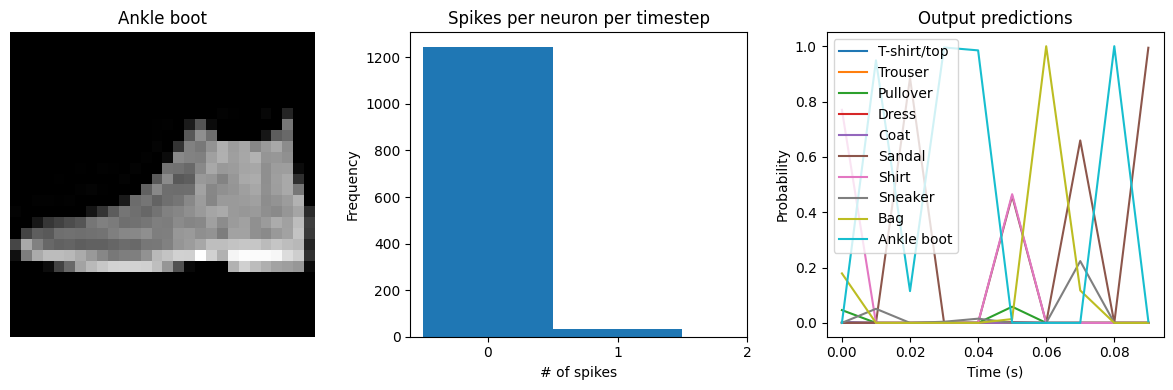

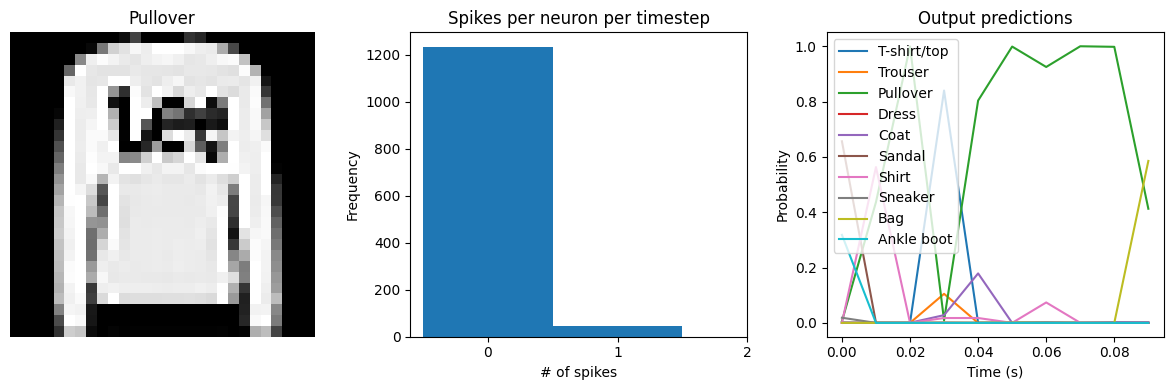

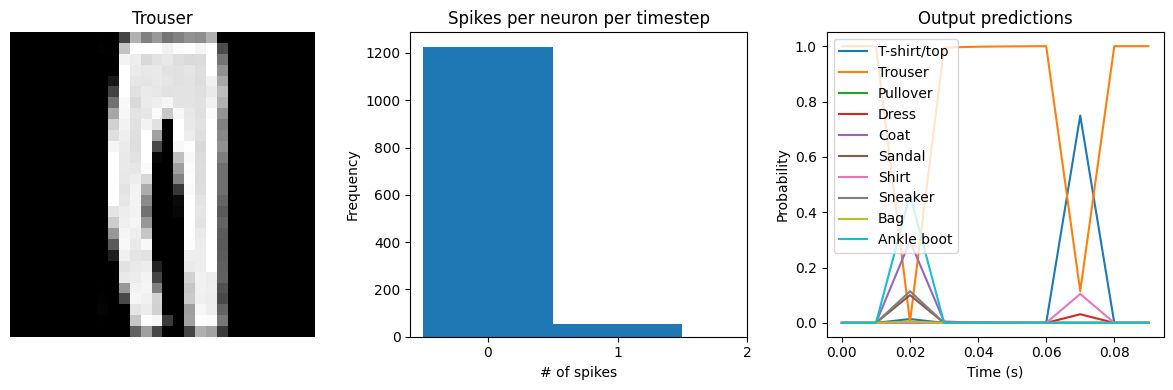

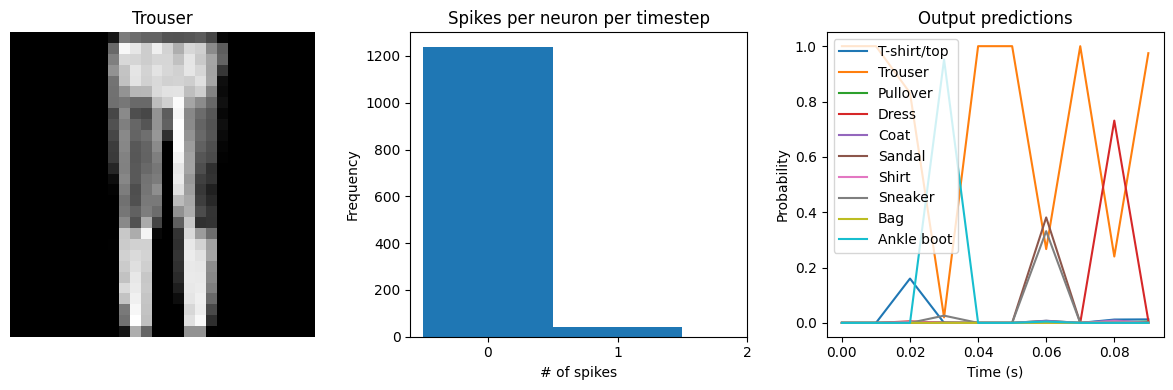

In [12]:
check_output(spikeaware_model)

We can see that with `spiking_aware_training` we're getting better performance than we
were with the equivalent `dt` value above. The model has learned weights that are less
sensitive to the discrete, sparse output produced by the spiking neurons.

## Spike rate regularization

As we saw in the [Simulation time section](#Simulation-time), the spiking rate of the
neurons is very important. If a neuron is spiking too slowly then we don't have enough
information to determine its output value. Conversely, if a neuron is spiking too
quickly then we may lose the spiking advantages we are looking for, such as temporal
sparsity.

Thus it can be helpful to more directly control the firing rates in the model by
applying regularization penalties during training. Any of the standard Keras
regularization functions can be used. KerasSpiking also includes some additional
regularizers that can be useful for this case as they allow us to specify a non-zero
reference point (so we can drive the activities towards some value greater than zero),
or a range of acceptable values.

In [13]:
regularized_model = tf.keras.Sequential(
    [
        tf.keras.layers.Reshape((-1, 28 * 28), input_shape=(None, 28, 28)),
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
        keras_spiking.SpikingActivation(
            "relu",
            dt=0.01,
            spiking_aware_training=True,
            # add activity regularizer to encourage spike rates between 10 and 20 Hz
            activity_regularizer=keras_spiking.regularizers.L2(
                l2=1e-4, target=(10, 20)
            ),
        ),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(10),
    ]
)

train(regularized_model, train_sequences, test_sequences)

Epoch 1/10


   1/1875 [..............................] - ETA: 26:46 - loss: 18.6313 - accuracy: 0.0625

  13/1875 [..............................] - ETA: 7s - loss: 21.5408 - accuracy: 0.1707   

  24/1875 [..............................] - ETA: 8s - loss: 24.9723 - accuracy: 0.1914

  37/1875 [..............................] - ETA: 7s - loss: 29.2215 - accuracy: 0.2213

  50/1875 [..............................] - ETA: 7s - loss: 33.1079 - accuracy: 0.2463

  63/1875 [>.............................] - ETA: 7s - loss: 36.9495 - accuracy: 0.2723

  76/1875 [>.............................] - ETA: 7s - loss: 40.4080 - accuracy: 0.2956

  89/1875 [>.............................] - ETA: 7s - loss: 43.7694 - accuracy: 0.3160

 101/1875 [>.............................] - ETA: 7s - loss: 46.5179 - accuracy: 0.3298

 114/1875 [>.............................] - ETA: 7s - loss: 49.4254 - accuracy: 0.3438

 127/1875 [=>............................] - ETA: 7s - loss: 51.9604 - accuracy: 0.3565

 140/1875 [=>............................] - ETA: 7s - loss: 54.1719 - accuracy: 0.3703

 153/1875 [=>............................] - ETA: 7s - loss: 56.0164 - accuracy: 0.3832

 166/1875 [=>............................] - ETA: 7s - loss: 57.9925 - accuracy: 0.3931

 179/1875 [=>............................] - ETA: 7s - loss: 59.8047 - accuracy: 0.4024

 191/1875 [==>...........................] - ETA: 6s - loss: 61.2633 - accuracy: 0.4116

 204/1875 [==>...........................] - ETA: 6s - loss: 62.6912 - accuracy: 0.4219

 217/1875 [==>...........................] - ETA: 6s - loss: 63.9203 - accuracy: 0.4306

 230/1875 [==>...........................] - ETA: 6s - loss: 65.0444 - accuracy: 0.4382

 243/1875 [==>...........................] - ETA: 6s - loss: 66.0688 - accuracy: 0.4451

 255/1875 [===>..........................] - ETA: 6s - loss: 67.1356 - accuracy: 0.4520

 268/1875 [===>..........................] - ETA: 6s - loss: 68.0324 - accuracy: 0.4550

 281/1875 [===>..........................] - ETA: 6s - loss: 68.8183 - accuracy: 0.4613

 294/1875 [===>..........................] - ETA: 6s - loss: 69.5800 - accuracy: 0.4668

 307/1875 [===>..........................] - ETA: 6s - loss: 70.3692 - accuracy: 0.4706

 320/1875 [====>.........................] - ETA: 6s - loss: 71.0607 - accuracy: 0.4760

 333/1875 [====>.........................] - ETA: 6s - loss: 71.6736 - accuracy: 0.4793

 346/1875 [====>.........................] - ETA: 6s - loss: 72.3318 - accuracy: 0.4842

 359/1875 [====>.........................] - ETA: 6s - loss: 72.8890 - accuracy: 0.4895

 372/1875 [====>.........................] - ETA: 6s - loss: 73.3789 - accuracy: 0.4938

 384/1875 [=====>........................] - ETA: 6s - loss: 73.7795 - accuracy: 0.4969

 396/1875 [=====>........................] - ETA: 6s - loss: 74.0903 - accuracy: 0.5011

 407/1875 [=====>........................] - ETA: 6s - loss: 74.4567 - accuracy: 0.5041

 419/1875 [=====>........................] - ETA: 6s - loss: 74.8725 - accuracy: 0.5070

 432/1875 [=====>........................] - ETA: 5s - loss: 75.2503 - accuracy: 0.5108

 445/1875 [======>.......................] - ETA: 5s - loss: 75.5855 - accuracy: 0.5129

 458/1875 [======>.......................] - ETA: 5s - loss: 75.9640 - accuracy: 0.5158

 471/1875 [======>.......................] - ETA: 5s - loss: 76.3224 - accuracy: 0.5180

 484/1875 [======>.......................] - ETA: 5s - loss: 76.6210 - accuracy: 0.5203

 495/1875 [======>.......................] - ETA: 5s - loss: 76.8588 - accuracy: 0.5226

 508/1875 [=======>......................] - ETA: 5s - loss: 77.1347 - accuracy: 0.5241

 521/1875 [=======>......................] - ETA: 5s - loss: 77.4383 - accuracy: 0.5267

 532/1875 [=======>......................] - ETA: 5s - loss: 77.6533 - accuracy: 0.5291

 544/1875 [=======>......................] - ETA: 5s - loss: 77.8676 - accuracy: 0.5318

 557/1875 [=======>......................] - ETA: 5s - loss: 78.1532 - accuracy: 0.5342

 570/1875 [========>.....................] - ETA: 5s - loss: 78.3659 - accuracy: 0.5357

 583/1875 [========>.....................] - ETA: 5s - loss: 78.6326 - accuracy: 0.5377

 595/1875 [========>.....................] - ETA: 5s - loss: 78.8343 - accuracy: 0.5392

 608/1875 [========>.....................] - ETA: 5s - loss: 79.0836 - accuracy: 0.5410

 620/1875 [========>.....................] - ETA: 5s - loss: 79.3092 - accuracy: 0.5419

 632/1875 [=========>....................] - ETA: 5s - loss: 79.4879 - accuracy: 0.5433

 644/1875 [=========>....................] - ETA: 5s - loss: 79.6481 - accuracy: 0.5449

 653/1875 [=========>....................] - ETA: 5s - loss: 79.8022 - accuracy: 0.5464

 666/1875 [=========>....................] - ETA: 5s - loss: 80.0359 - accuracy: 0.5488

 679/1875 [=========>....................] - ETA: 5s - loss: 80.1900 - accuracy: 0.5498

 691/1875 [==========>...................] - ETA: 4s - loss: 80.3955 - accuracy: 0.5516

 704/1875 [==========>...................] - ETA: 4s - loss: 80.5623 - accuracy: 0.5532

 717/1875 [==========>...................] - ETA: 4s - loss: 80.7064 - accuracy: 0.5550

 729/1875 [==========>...................] - ETA: 4s - loss: 80.8157 - accuracy: 0.5554

 742/1875 [==========>...................] - ETA: 4s - loss: 80.9264 - accuracy: 0.5575

 755/1875 [===========>..................] - ETA: 4s - loss: 81.0766 - accuracy: 0.5590

 768/1875 [===========>..................] - ETA: 4s - loss: 81.1967 - accuracy: 0.5605

 780/1875 [===========>..................] - ETA: 4s - loss: 81.2931 - accuracy: 0.5617

 793/1875 [===========>..................] - ETA: 4s - loss: 81.4453 - accuracy: 0.5631

 806/1875 [===========>..................] - ETA: 4s - loss: 81.6213 - accuracy: 0.5650

 817/1875 [============>.................] - ETA: 4s - loss: 81.7364 - accuracy: 0.5654

 829/1875 [============>.................] - ETA: 4s - loss: 81.8375 - accuracy: 0.5662

 842/1875 [============>.................] - ETA: 4s - loss: 81.9700 - accuracy: 0.5671

 854/1875 [============>.................] - ETA: 4s - loss: 82.0684 - accuracy: 0.5681

 867/1875 [============>.................] - ETA: 4s - loss: 82.2094 - accuracy: 0.5691

 880/1875 [=============>................] - ETA: 4s - loss: 82.3117 - accuracy: 0.5710

 892/1875 [=============>................] - ETA: 4s - loss: 82.4324 - accuracy: 0.5722

 904/1875 [=============>................] - ETA: 4s - loss: 82.5523 - accuracy: 0.5731

 916/1875 [=============>................] - ETA: 4s - loss: 82.6485 - accuracy: 0.5737

 928/1875 [=============>................] - ETA: 3s - loss: 82.7113 - accuracy: 0.5750

 941/1875 [==============>...............] - ETA: 3s - loss: 82.8448 - accuracy: 0.5759

 954/1875 [==============>...............] - ETA: 3s - loss: 82.9483 - accuracy: 0.5767

 966/1875 [==============>...............] - ETA: 3s - loss: 83.0484 - accuracy: 0.5776

 978/1875 [==============>...............] - ETA: 3s - loss: 83.1369 - accuracy: 0.5790

 991/1875 [==============>...............] - ETA: 3s - loss: 83.2544 - accuracy: 0.5802

1004/1875 [===============>..............] - ETA: 3s - loss: 83.3239 - accuracy: 0.5806

1017/1875 [===============>..............] - ETA: 3s - loss: 83.4071 - accuracy: 0.5815

1030/1875 [===============>..............] - ETA: 3s - loss: 83.5180 - accuracy: 0.5830

1043/1875 [===============>..............] - ETA: 3s - loss: 83.5793 - accuracy: 0.5837

1055/1875 [===============>..............] - ETA: 3s - loss: 83.6379 - accuracy: 0.5846

1067/1875 [================>.............] - ETA: 3s - loss: 83.7148 - accuracy: 0.5852

1080/1875 [================>.............] - ETA: 3s - loss: 83.7964 - accuracy: 0.5860

1091/1875 [================>.............] - ETA: 3s - loss: 83.8670 - accuracy: 0.5864

1103/1875 [================>.............] - ETA: 3s - loss: 83.9318 - accuracy: 0.5875

1116/1875 [================>.............] - ETA: 3s - loss: 84.0075 - accuracy: 0.5887

1129/1875 [=================>............] - ETA: 3s - loss: 84.0759 - accuracy: 0.5893

1141/1875 [=================>............] - ETA: 3s - loss: 84.1293 - accuracy: 0.5903

1154/1875 [=================>............] - ETA: 3s - loss: 84.2024 - accuracy: 0.5910

1166/1875 [=================>............] - ETA: 2s - loss: 84.2569 - accuracy: 0.5921

1179/1875 [=================>............] - ETA: 2s - loss: 84.3260 - accuracy: 0.5926

1192/1875 [==================>...........] - ETA: 2s - loss: 84.3889 - accuracy: 0.5933

1205/1875 [==================>...........] - ETA: 2s - loss: 84.4513 - accuracy: 0.5940

1218/1875 [==================>...........] - ETA: 2s - loss: 84.5039 - accuracy: 0.5949

1230/1875 [==================>...........] - ETA: 2s - loss: 84.5734 - accuracy: 0.5960

1242/1875 [==================>...........] - ETA: 2s - loss: 84.6348 - accuracy: 0.5968

1254/1875 [===================>..........] - ETA: 2s - loss: 84.6740 - accuracy: 0.5976

1267/1875 [===================>..........] - ETA: 2s - loss: 84.7199 - accuracy: 0.5984

1280/1875 [===================>..........] - ETA: 2s - loss: 84.7895 - accuracy: 0.5994

1293/1875 [===================>..........] - ETA: 2s - loss: 84.8541 - accuracy: 0.6003

1305/1875 [===================>..........] - ETA: 2s - loss: 84.8802 - accuracy: 0.6007

1318/1875 [====================>.........] - ETA: 2s - loss: 84.9395 - accuracy: 0.6018

1331/1875 [====================>.........] - ETA: 2s - loss: 84.9782 - accuracy: 0.6023

1342/1875 [====================>.........] - ETA: 2s - loss: 85.0616 - accuracy: 0.6026

1354/1875 [====================>.........] - ETA: 2s - loss: 85.1105 - accuracy: 0.6032

1367/1875 [====================>.........] - ETA: 2s - loss: 85.1625 - accuracy: 0.6042

1379/1875 [=====================>........] - ETA: 2s - loss: 85.2125 - accuracy: 0.6044

1392/1875 [=====================>........] - ETA: 2s - loss: 85.2693 - accuracy: 0.6049

1405/1875 [=====================>........] - ETA: 1s - loss: 85.3237 - accuracy: 0.6049

1418/1875 [=====================>........] - ETA: 1s - loss: 85.3788 - accuracy: 0.6054

1431/1875 [=====================>........] - ETA: 1s - loss: 85.4104 - accuracy: 0.6058

1443/1875 [======================>.......] - ETA: 1s - loss: 85.4602 - accuracy: 0.6066

1456/1875 [======================>.......] - ETA: 1s - loss: 85.4963 - accuracy: 0.6071

1469/1875 [======================>.......] - ETA: 1s - loss: 85.5312 - accuracy: 0.6074

1482/1875 [======================>.......] - ETA: 1s - loss: 85.5761 - accuracy: 0.6079

1494/1875 [======================>.......] - ETA: 1s - loss: 85.6187 - accuracy: 0.6084

1507/1875 [=======================>......] - ETA: 1s - loss: 85.6807 - accuracy: 0.6095

1520/1875 [=======================>......] - ETA: 1s - loss: 85.7210 - accuracy: 0.6105

1533/1875 [=======================>......] - ETA: 1s - loss: 85.7736 - accuracy: 0.6110

1546/1875 [=======================>......] - ETA: 1s - loss: 85.8135 - accuracy: 0.6116

1559/1875 [=======================>......] - ETA: 1s - loss: 85.8733 - accuracy: 0.6122

1572/1875 [========================>.....] - ETA: 1s - loss: 85.9113 - accuracy: 0.6127

1585/1875 [========================>.....] - ETA: 1s - loss: 85.9401 - accuracy: 0.6127

1598/1875 [========================>.....] - ETA: 1s - loss: 85.9606 - accuracy: 0.6133

1611/1875 [========================>.....] - ETA: 1s - loss: 85.9872 - accuracy: 0.6140

1624/1875 [========================>.....] - ETA: 1s - loss: 86.0231 - accuracy: 0.6143

1637/1875 [=========================>....] - ETA: 0s - loss: 86.0517 - accuracy: 0.6147

1650/1875 [=========================>....] - ETA: 0s - loss: 86.0961 - accuracy: 0.6154

1663/1875 [=========================>....] - ETA: 0s - loss: 86.1536 - accuracy: 0.6160

1676/1875 [=========================>....] - ETA: 0s - loss: 86.2022 - accuracy: 0.6166

1689/1875 [==========================>...] - ETA: 0s - loss: 86.2474 - accuracy: 0.6172

1701/1875 [==========================>...] - ETA: 0s - loss: 86.2848 - accuracy: 0.6177

1707/1875 [==========================>...] - ETA: 0s - loss: 86.3016 - accuracy: 0.6178

1720/1875 [==========================>...] - ETA: 0s - loss: 86.3292 - accuracy: 0.6183

1728/1875 [==========================>...] - ETA: 0s - loss: 86.3485 - accuracy: 0.6186

1739/1875 [==========================>...] - ETA: 0s - loss: 86.3874 - accuracy: 0.6191

1750/1875 [===========================>..] - ETA: 0s - loss: 86.4125 - accuracy: 0.6195

1762/1875 [===========================>..] - ETA: 0s - loss: 86.4407 - accuracy: 0.6200

1775/1875 [===========================>..] - ETA: 0s - loss: 86.4797 - accuracy: 0.6205

1788/1875 [===========================>..] - ETA: 0s - loss: 86.5162 - accuracy: 0.6212

1801/1875 [===========================>..] - ETA: 0s - loss: 86.5510 - accuracy: 0.6217

1814/1875 [============================>.] - ETA: 0s - loss: 86.5821 - accuracy: 0.6220

1820/1875 [============================>.] - ETA: 0s - loss: 86.6040 - accuracy: 0.6223

1832/1875 [============================>.] - ETA: 0s - loss: 86.6277 - accuracy: 0.6228

1845/1875 [============================>.] - ETA: 0s - loss: 86.6660 - accuracy: 0.6235

1858/1875 [============================>.] - ETA: 0s - loss: 86.6953 - accuracy: 0.6239

1870/1875 [============================>.] - ETA: 0s - loss: 86.7210 - accuracy: 0.6240

1875/1875 [==============================] - 9s 4ms/step - loss: 86.7380 - accuracy: 0.6242


Epoch 2/10


   1/1875 [..............................] - ETA: 8s - loss: 87.5999 - accuracy: 0.7188

  14/1875 [..............................] - ETA: 7s - loss: 93.0465 - accuracy: 0.6562

  27/1875 [..............................] - ETA: 7s - loss: 91.7653 - accuracy: 0.6609

  40/1875 [..............................] - ETA: 7s - loss: 91.4319 - accuracy: 0.6570

  52/1875 [..............................] - ETA: 7s - loss: 91.5309 - accuracy: 0.6617

  64/1875 [>.............................] - ETA: 7s - loss: 91.7812 - accuracy: 0.6694

  76/1875 [>.............................] - ETA: 7s - loss: 91.7628 - accuracy: 0.6702

  88/1875 [>.............................] - ETA: 7s - loss: 91.4881 - accuracy: 0.6712

  95/1875 [>.............................] - ETA: 7s - loss: 91.5842 - accuracy: 0.6711

 106/1875 [>.............................] - ETA: 7s - loss: 91.7618 - accuracy: 0.6719

 118/1875 [>.............................] - ETA: 7s - loss: 91.7731 - accuracy: 0.6713

 131/1875 [=>............................] - ETA: 7s - loss: 91.7421 - accuracy: 0.6706

 143/1875 [=>............................] - ETA: 7s - loss: 91.7973 - accuracy: 0.6705

 156/1875 [=>............................] - ETA: 7s - loss: 91.8425 - accuracy: 0.6725

 169/1875 [=>............................] - ETA: 7s - loss: 91.6456 - accuracy: 0.6714

 182/1875 [=>............................] - ETA: 7s - loss: 91.5445 - accuracy: 0.6732

 195/1875 [==>...........................] - ETA: 7s - loss: 91.7441 - accuracy: 0.6726

 208/1875 [==>...........................] - ETA: 7s - loss: 91.8714 - accuracy: 0.6714

 221/1875 [==>...........................] - ETA: 7s - loss: 91.8080 - accuracy: 0.6746

 233/1875 [==>...........................] - ETA: 7s - loss: 91.7039 - accuracy: 0.6748

 246/1875 [==>...........................] - ETA: 7s - loss: 91.7290 - accuracy: 0.6737

 259/1875 [===>..........................] - ETA: 6s - loss: 91.7810 - accuracy: 0.6772

 272/1875 [===>..........................] - ETA: 6s - loss: 91.7202 - accuracy: 0.6780

 284/1875 [===>..........................] - ETA: 6s - loss: 91.7111 - accuracy: 0.6786

 297/1875 [===>..........................] - ETA: 6s - loss: 91.7590 - accuracy: 0.6782

 310/1875 [===>..........................] - ETA: 6s - loss: 91.7823 - accuracy: 0.6770

 322/1875 [====>.........................] - ETA: 6s - loss: 91.8507 - accuracy: 0.6792

 334/1875 [====>.........................] - ETA: 6s - loss: 91.8560 - accuracy: 0.6796

 347/1875 [====>.........................] - ETA: 6s - loss: 91.8348 - accuracy: 0.6802

 359/1875 [====>.........................] - ETA: 6s - loss: 91.7719 - accuracy: 0.6799

 371/1875 [====>.........................] - ETA: 6s - loss: 91.8260 - accuracy: 0.6802

 384/1875 [=====>........................] - ETA: 6s - loss: 91.8401 - accuracy: 0.6816

 396/1875 [=====>........................] - ETA: 6s - loss: 91.8298 - accuracy: 0.6823

 408/1875 [=====>........................] - ETA: 6s - loss: 91.8502 - accuracy: 0.6829

 421/1875 [=====>........................] - ETA: 6s - loss: 91.8314 - accuracy: 0.6824

 434/1875 [=====>........................] - ETA: 6s - loss: 91.8284 - accuracy: 0.6838

 446/1875 [======>.......................] - ETA: 6s - loss: 91.8535 - accuracy: 0.6832

 458/1875 [======>.......................] - ETA: 6s - loss: 91.8551 - accuracy: 0.6837

 470/1875 [======>.......................] - ETA: 5s - loss: 91.8616 - accuracy: 0.6845

 483/1875 [======>.......................] - ETA: 5s - loss: 91.8790 - accuracy: 0.6851

 495/1875 [======>.......................] - ETA: 5s - loss: 91.8588 - accuracy: 0.6860

 508/1875 [=======>......................] - ETA: 5s - loss: 91.8570 - accuracy: 0.6855

 520/1875 [=======>......................] - ETA: 5s - loss: 91.9026 - accuracy: 0.6862

 533/1875 [=======>......................] - ETA: 5s - loss: 91.8748 - accuracy: 0.6857

 544/1875 [=======>......................] - ETA: 5s - loss: 91.8796 - accuracy: 0.6856

 552/1875 [=======>......................] - ETA: 5s - loss: 91.8862 - accuracy: 0.6862

 563/1875 [========>.....................] - ETA: 5s - loss: 91.8946 - accuracy: 0.6866

 575/1875 [========>.....................] - ETA: 5s - loss: 91.9557 - accuracy: 0.6870

 587/1875 [========>.....................] - ETA: 5s - loss: 91.9957 - accuracy: 0.6870

 599/1875 [========>.....................] - ETA: 5s - loss: 91.9687 - accuracy: 0.6868

 612/1875 [========>.....................] - ETA: 5s - loss: 91.9422 - accuracy: 0.6872

 624/1875 [========>.....................] - ETA: 5s - loss: 91.8959 - accuracy: 0.6873

 636/1875 [=========>....................] - ETA: 5s - loss: 91.8996 - accuracy: 0.6875

 648/1875 [=========>....................] - ETA: 5s - loss: 91.9153 - accuracy: 0.6870

 660/1875 [=========>....................] - ETA: 5s - loss: 91.8788 - accuracy: 0.6875

 672/1875 [=========>....................] - ETA: 5s - loss: 91.9058 - accuracy: 0.6879

 685/1875 [=========>....................] - ETA: 5s - loss: 91.9219 - accuracy: 0.6881

 698/1875 [==========>...................] - ETA: 5s - loss: 91.9457 - accuracy: 0.6885

 708/1875 [==========>...................] - ETA: 5s - loss: 91.9315 - accuracy: 0.6887

 720/1875 [==========>...................] - ETA: 4s - loss: 91.9633 - accuracy: 0.6888

 732/1875 [==========>...................] - ETA: 4s - loss: 91.9282 - accuracy: 0.6893

 744/1875 [==========>...................] - ETA: 4s - loss: 91.9436 - accuracy: 0.6900

 756/1875 [===========>..................] - ETA: 4s - loss: 91.9664 - accuracy: 0.6897

 768/1875 [===========>..................] - ETA: 4s - loss: 91.9654 - accuracy: 0.6901

 780/1875 [===========>..................] - ETA: 4s - loss: 91.9693 - accuracy: 0.6904

 792/1875 [===========>..................] - ETA: 4s - loss: 91.9610 - accuracy: 0.6904

 804/1875 [===========>..................] - ETA: 4s - loss: 91.9855 - accuracy: 0.6903

 816/1875 [============>.................] - ETA: 4s - loss: 91.9903 - accuracy: 0.6907

 829/1875 [============>.................] - ETA: 4s - loss: 91.9855 - accuracy: 0.6902

 840/1875 [============>.................] - ETA: 4s - loss: 91.9768 - accuracy: 0.6906

 852/1875 [============>.................] - ETA: 4s - loss: 92.0020 - accuracy: 0.6907

 865/1875 [============>.................] - ETA: 4s - loss: 92.0217 - accuracy: 0.6910

 878/1875 [=============>................] - ETA: 4s - loss: 92.0243 - accuracy: 0.6914

 890/1875 [=============>................] - ETA: 4s - loss: 92.0097 - accuracy: 0.6913

 903/1875 [=============>................] - ETA: 4s - loss: 92.0209 - accuracy: 0.6913

 916/1875 [=============>................] - ETA: 4s - loss: 92.0359 - accuracy: 0.6913

 927/1875 [=============>................] - ETA: 4s - loss: 92.0521 - accuracy: 0.6909

 939/1875 [==============>...............] - ETA: 4s - loss: 92.0565 - accuracy: 0.6911

 952/1875 [==============>...............] - ETA: 3s - loss: 92.0800 - accuracy: 0.6910

 965/1875 [==============>...............] - ETA: 3s - loss: 92.0939 - accuracy: 0.6908

 977/1875 [==============>...............] - ETA: 3s - loss: 92.0851 - accuracy: 0.6909

 990/1875 [==============>...............] - ETA: 3s - loss: 92.0578 - accuracy: 0.6904

1003/1875 [===============>..............] - ETA: 3s - loss: 92.0595 - accuracy: 0.6906

1013/1875 [===============>..............] - ETA: 3s - loss: 92.0747 - accuracy: 0.6906

1024/1875 [===============>..............] - ETA: 3s - loss: 92.0797 - accuracy: 0.6905

1033/1875 [===============>..............] - ETA: 3s - loss: 92.0794 - accuracy: 0.6904

1044/1875 [===============>..............] - ETA: 3s - loss: 92.0993 - accuracy: 0.6905

1056/1875 [===============>..............] - ETA: 3s - loss: 92.1170 - accuracy: 0.6908

1068/1875 [================>.............] - ETA: 3s - loss: 92.1147 - accuracy: 0.6909

1079/1875 [================>.............] - ETA: 3s - loss: 92.1204 - accuracy: 0.6907

1089/1875 [================>.............] - ETA: 3s - loss: 92.1019 - accuracy: 0.6908

1101/1875 [================>.............] - ETA: 3s - loss: 92.0795 - accuracy: 0.6905

1113/1875 [================>.............] - ETA: 3s - loss: 92.0990 - accuracy: 0.6906

1125/1875 [=================>............] - ETA: 3s - loss: 92.0825 - accuracy: 0.6905

1137/1875 [=================>............] - ETA: 3s - loss: 92.0993 - accuracy: 0.6910

1148/1875 [=================>............] - ETA: 3s - loss: 92.1095 - accuracy: 0.6909

1159/1875 [=================>............] - ETA: 3s - loss: 92.1204 - accuracy: 0.6908

1170/1875 [=================>............] - ETA: 3s - loss: 92.1163 - accuracy: 0.6905

1183/1875 [=================>............] - ETA: 3s - loss: 92.1250 - accuracy: 0.6907

1196/1875 [==================>...........] - ETA: 2s - loss: 92.1102 - accuracy: 0.6909

1208/1875 [==================>...........] - ETA: 2s - loss: 92.1295 - accuracy: 0.6910

1221/1875 [==================>...........] - ETA: 2s - loss: 92.1345 - accuracy: 0.6915

1234/1875 [==================>...........] - ETA: 2s - loss: 92.1389 - accuracy: 0.6924

1246/1875 [==================>...........] - ETA: 2s - loss: 92.1438 - accuracy: 0.6928

1257/1875 [===================>..........] - ETA: 2s - loss: 92.1539 - accuracy: 0.6928

1270/1875 [===================>..........] - ETA: 2s - loss: 92.1589 - accuracy: 0.6933

1283/1875 [===================>..........] - ETA: 2s - loss: 92.1703 - accuracy: 0.6932

1296/1875 [===================>..........] - ETA: 2s - loss: 92.1891 - accuracy: 0.6935

1309/1875 [===================>..........] - ETA: 2s - loss: 92.2111 - accuracy: 0.6935

1321/1875 [====================>.........] - ETA: 2s - loss: 92.2078 - accuracy: 0.6931

1333/1875 [====================>.........] - ETA: 2s - loss: 92.2210 - accuracy: 0.6927

1345/1875 [====================>.........] - ETA: 2s - loss: 92.2199 - accuracy: 0.6924

1356/1875 [====================>.........] - ETA: 2s - loss: 92.2220 - accuracy: 0.6926

1368/1875 [====================>.........] - ETA: 2s - loss: 92.2392 - accuracy: 0.6928

1381/1875 [=====================>........] - ETA: 2s - loss: 92.2565 - accuracy: 0.6932

1393/1875 [=====================>........] - ETA: 2s - loss: 92.2699 - accuracy: 0.6933

1405/1875 [=====================>........] - ETA: 2s - loss: 92.2739 - accuracy: 0.6932

1416/1875 [=====================>........] - ETA: 1s - loss: 92.2780 - accuracy: 0.6935

1429/1875 [=====================>........] - ETA: 1s - loss: 92.2950 - accuracy: 0.6938

1442/1875 [======================>.......] - ETA: 1s - loss: 92.2932 - accuracy: 0.6940

1455/1875 [======================>.......] - ETA: 1s - loss: 92.3005 - accuracy: 0.6937

1466/1875 [======================>.......] - ETA: 1s - loss: 92.3150 - accuracy: 0.6937

1479/1875 [======================>.......] - ETA: 1s - loss: 92.3254 - accuracy: 0.6936

1491/1875 [======================>.......] - ETA: 1s - loss: 92.3415 - accuracy: 0.6937

1503/1875 [=======================>......] - ETA: 1s - loss: 92.3710 - accuracy: 0.6934

1516/1875 [=======================>......] - ETA: 1s - loss: 92.3590 - accuracy: 0.6932

1529/1875 [=======================>......] - ETA: 1s - loss: 92.3731 - accuracy: 0.6933

1542/1875 [=======================>......] - ETA: 1s - loss: 92.3797 - accuracy: 0.6933

1553/1875 [=======================>......] - ETA: 1s - loss: 92.3829 - accuracy: 0.6935

1565/1875 [========================>.....] - ETA: 1s - loss: 92.3883 - accuracy: 0.6935

1578/1875 [========================>.....] - ETA: 1s - loss: 92.3923 - accuracy: 0.6936

1591/1875 [========================>.....] - ETA: 1s - loss: 92.3988 - accuracy: 0.6937

1603/1875 [========================>.....] - ETA: 1s - loss: 92.4080 - accuracy: 0.6938

1615/1875 [========================>.....] - ETA: 1s - loss: 92.4118 - accuracy: 0.6940

1627/1875 [=========================>....] - ETA: 1s - loss: 92.4157 - accuracy: 0.6938

1640/1875 [=========================>....] - ETA: 1s - loss: 92.4303 - accuracy: 0.6938

1653/1875 [=========================>....] - ETA: 0s - loss: 92.4409 - accuracy: 0.6939

1665/1875 [=========================>....] - ETA: 0s - loss: 92.4415 - accuracy: 0.6940

1677/1875 [=========================>....] - ETA: 0s - loss: 92.4682 - accuracy: 0.6942

1689/1875 [==========================>...] - ETA: 0s - loss: 92.4745 - accuracy: 0.6945

1701/1875 [==========================>...] - ETA: 0s - loss: 92.4872 - accuracy: 0.6945

1714/1875 [==========================>...] - ETA: 0s - loss: 92.5003 - accuracy: 0.6947

1726/1875 [==========================>...] - ETA: 0s - loss: 92.5096 - accuracy: 0.6947

1739/1875 [==========================>...] - ETA: 0s - loss: 92.5255 - accuracy: 0.6949

1752/1875 [===========================>..] - ETA: 0s - loss: 92.5314 - accuracy: 0.6948

1765/1875 [===========================>..] - ETA: 0s - loss: 92.5481 - accuracy: 0.6949

1778/1875 [===========================>..] - ETA: 0s - loss: 92.5543 - accuracy: 0.6952

1790/1875 [===========================>..] - ETA: 0s - loss: 92.5752 - accuracy: 0.6951

1800/1875 [===========================>..] - ETA: 0s - loss: 92.5772 - accuracy: 0.6950

1812/1875 [===========================>..] - ETA: 0s - loss: 92.5893 - accuracy: 0.6950

1824/1875 [============================>.] - ETA: 0s - loss: 92.6005 - accuracy: 0.6951

1836/1875 [============================>.] - ETA: 0s - loss: 92.6257 - accuracy: 0.6952

1848/1875 [============================>.] - ETA: 0s - loss: 92.6301 - accuracy: 0.6953

1860/1875 [============================>.] - ETA: 0s - loss: 92.6349 - accuracy: 0.6951

1872/1875 [============================>.] - ETA: 0s - loss: 92.6247 - accuracy: 0.6954

1875/1875 [==============================] - 8s 4ms/step - loss: 92.6259 - accuracy: 0.6955


Epoch 3/10


   1/1875 [..............................] - ETA: 8s - loss: 95.6778 - accuracy: 0.6875

  14/1875 [..............................] - ETA: 7s - loss: 94.2051 - accuracy: 0.7500

  26/1875 [..............................] - ETA: 7s - loss: 94.2421 - accuracy: 0.7392

  39/1875 [..............................] - ETA: 7s - loss: 93.9444 - accuracy: 0.7252

  51/1875 [..............................] - ETA: 7s - loss: 93.6799 - accuracy: 0.7151

  63/1875 [>.............................] - ETA: 7s - loss: 94.1463 - accuracy: 0.7118

  76/1875 [>.............................] - ETA: 7s - loss: 94.0297 - accuracy: 0.7105

  88/1875 [>.............................] - ETA: 7s - loss: 93.9516 - accuracy: 0.7120

 100/1875 [>.............................] - ETA: 7s - loss: 94.0899 - accuracy: 0.7138

 113/1875 [>.............................] - ETA: 7s - loss: 94.0370 - accuracy: 0.7143

 125/1875 [=>............................] - ETA: 7s - loss: 94.1240 - accuracy: 0.7157

 137/1875 [=>............................] - ETA: 7s - loss: 94.0350 - accuracy: 0.7167

 149/1875 [=>............................] - ETA: 7s - loss: 94.1547 - accuracy: 0.7177

 161/1875 [=>............................] - ETA: 7s - loss: 94.1185 - accuracy: 0.7195

 173/1875 [=>............................] - ETA: 7s - loss: 94.0665 - accuracy: 0.7200

 186/1875 [=>............................] - ETA: 7s - loss: 94.0355 - accuracy: 0.7186

 199/1875 [==>...........................] - ETA: 7s - loss: 94.1572 - accuracy: 0.7177

 211/1875 [==>...........................] - ETA: 7s - loss: 94.1409 - accuracy: 0.7164

 222/1875 [==>...........................] - ETA: 6s - loss: 94.2394 - accuracy: 0.7171

 234/1875 [==>...........................] - ETA: 6s - loss: 94.1451 - accuracy: 0.7178

 246/1875 [==>...........................] - ETA: 6s - loss: 94.1201 - accuracy: 0.7157

 258/1875 [===>..........................] - ETA: 6s - loss: 94.1416 - accuracy: 0.7132

 271/1875 [===>..........................] - ETA: 6s - loss: 94.1871 - accuracy: 0.7145

 283/1875 [===>..........................] - ETA: 6s - loss: 94.1404 - accuracy: 0.7157

 295/1875 [===>..........................] - ETA: 6s - loss: 94.1538 - accuracy: 0.7148

 307/1875 [===>..........................] - ETA: 6s - loss: 94.2127 - accuracy: 0.7137

 317/1875 [====>.........................] - ETA: 6s - loss: 94.2745 - accuracy: 0.7134

 329/1875 [====>.........................] - ETA: 6s - loss: 94.3263 - accuracy: 0.7136

 341/1875 [====>.........................] - ETA: 6s - loss: 94.2191 - accuracy: 0.7140

 351/1875 [====>.........................] - ETA: 6s - loss: 94.1869 - accuracy: 0.7128

 362/1875 [====>.........................] - ETA: 6s - loss: 94.2419 - accuracy: 0.7136

 374/1875 [====>.........................] - ETA: 6s - loss: 94.2360 - accuracy: 0.7130

 387/1875 [=====>........................] - ETA: 6s - loss: 94.2305 - accuracy: 0.7126

 399/1875 [=====>........................] - ETA: 6s - loss: 94.2947 - accuracy: 0.7129

 410/1875 [=====>........................] - ETA: 6s - loss: 94.2896 - accuracy: 0.7124

 421/1875 [=====>........................] - ETA: 6s - loss: 94.3298 - accuracy: 0.7119

 433/1875 [=====>........................] - ETA: 6s - loss: 94.3137 - accuracy: 0.7117

 445/1875 [======>.......................] - ETA: 6s - loss: 94.2920 - accuracy: 0.7121

 457/1875 [======>.......................] - ETA: 6s - loss: 94.2911 - accuracy: 0.7127

 468/1875 [======>.......................] - ETA: 6s - loss: 94.2998 - accuracy: 0.7133

 478/1875 [======>.......................] - ETA: 6s - loss: 94.2628 - accuracy: 0.7136

 489/1875 [======>.......................] - ETA: 6s - loss: 94.3103 - accuracy: 0.7132

 500/1875 [=======>......................] - ETA: 5s - loss: 94.2945 - accuracy: 0.7122

 509/1875 [=======>......................] - ETA: 5s - loss: 94.3021 - accuracy: 0.7121

 519/1875 [=======>......................] - ETA: 5s - loss: 94.2932 - accuracy: 0.7118

 529/1875 [=======>......................] - ETA: 5s - loss: 94.2783 - accuracy: 0.7118

 540/1875 [=======>......................] - ETA: 5s - loss: 94.2531 - accuracy: 0.7126

 550/1875 [=======>......................] - ETA: 5s - loss: 94.2609 - accuracy: 0.7119

 563/1875 [========>.....................] - ETA: 5s - loss: 94.2421 - accuracy: 0.7116

 576/1875 [========>.....................] - ETA: 5s - loss: 94.2999 - accuracy: 0.7111

 587/1875 [========>.....................] - ETA: 5s - loss: 94.2971 - accuracy: 0.7102

 599/1875 [========>.....................] - ETA: 5s - loss: 94.3189 - accuracy: 0.7105

 611/1875 [========>.....................] - ETA: 5s - loss: 94.2978 - accuracy: 0.7114

 624/1875 [========>.....................] - ETA: 5s - loss: 94.3195 - accuracy: 0.7116

 637/1875 [=========>....................] - ETA: 5s - loss: 94.2797 - accuracy: 0.7113

 648/1875 [=========>....................] - ETA: 5s - loss: 94.2807 - accuracy: 0.7107

 660/1875 [=========>....................] - ETA: 5s - loss: 94.2616 - accuracy: 0.7104

 673/1875 [=========>....................] - ETA: 5s - loss: 94.2858 - accuracy: 0.7107

 684/1875 [=========>....................] - ETA: 5s - loss: 94.2789 - accuracy: 0.7104

 697/1875 [==========>...................] - ETA: 5s - loss: 94.2399 - accuracy: 0.7104

 708/1875 [==========>...................] - ETA: 5s - loss: 94.2512 - accuracy: 0.7112

 720/1875 [==========>...................] - ETA: 5s - loss: 94.2782 - accuracy: 0.7111

 732/1875 [==========>...................] - ETA: 5s - loss: 94.2584 - accuracy: 0.7111

 745/1875 [==========>...................] - ETA: 4s - loss: 94.2612 - accuracy: 0.7115

 758/1875 [===========>..................] - ETA: 4s - loss: 94.2464 - accuracy: 0.7113

 771/1875 [===========>..................] - ETA: 4s - loss: 94.2538 - accuracy: 0.7107

 784/1875 [===========>..................] - ETA: 4s - loss: 94.2433 - accuracy: 0.7107

 795/1875 [===========>..................] - ETA: 4s - loss: 94.2629 - accuracy: 0.7108

 807/1875 [===========>..................] - ETA: 4s - loss: 94.2639 - accuracy: 0.7115

 820/1875 [============>.................] - ETA: 4s - loss: 94.2680 - accuracy: 0.7116

 832/1875 [============>.................] - ETA: 4s - loss: 94.2577 - accuracy: 0.7112

 844/1875 [============>.................] - ETA: 4s - loss: 94.2717 - accuracy: 0.7113

 856/1875 [============>.................] - ETA: 4s - loss: 94.2778 - accuracy: 0.7114

 869/1875 [============>.................] - ETA: 4s - loss: 94.3042 - accuracy: 0.7117

 882/1875 [=============>................] - ETA: 4s - loss: 94.2940 - accuracy: 0.7117

 895/1875 [=============>................] - ETA: 4s - loss: 94.3257 - accuracy: 0.7116

 907/1875 [=============>................] - ETA: 4s - loss: 94.3290 - accuracy: 0.7120

 919/1875 [=============>................] - ETA: 4s - loss: 94.3394 - accuracy: 0.7117

 931/1875 [=============>................] - ETA: 4s - loss: 94.3231 - accuracy: 0.7117

 944/1875 [==============>...............] - ETA: 4s - loss: 94.3303 - accuracy: 0.7114

 956/1875 [==============>...............] - ETA: 3s - loss: 94.3452 - accuracy: 0.7113

 968/1875 [==============>...............] - ETA: 3s - loss: 94.3444 - accuracy: 0.7113

 980/1875 [==============>...............] - ETA: 3s - loss: 94.3345 - accuracy: 0.7113

 990/1875 [==============>...............] - ETA: 3s - loss: 94.3240 - accuracy: 0.7114

1003/1875 [===============>..............] - ETA: 3s - loss: 94.3310 - accuracy: 0.7115

1016/1875 [===============>..............] - ETA: 3s - loss: 94.3619 - accuracy: 0.7116

1029/1875 [===============>..............] - ETA: 3s - loss: 94.3548 - accuracy: 0.7117

1042/1875 [===============>..............] - ETA: 3s - loss: 94.3412 - accuracy: 0.7117

1054/1875 [===============>..............] - ETA: 3s - loss: 94.3279 - accuracy: 0.7117

1067/1875 [================>.............] - ETA: 3s - loss: 94.3372 - accuracy: 0.7118

1080/1875 [================>.............] - ETA: 3s - loss: 94.3560 - accuracy: 0.7121

1092/1875 [================>.............] - ETA: 3s - loss: 94.3546 - accuracy: 0.7123

1104/1875 [================>.............] - ETA: 3s - loss: 94.3618 - accuracy: 0.7122

1117/1875 [================>.............] - ETA: 3s - loss: 94.3666 - accuracy: 0.7122

1130/1875 [=================>............] - ETA: 3s - loss: 94.3582 - accuracy: 0.7124

1143/1875 [=================>............] - ETA: 3s - loss: 94.3698 - accuracy: 0.7124

1156/1875 [=================>............] - ETA: 3s - loss: 94.3499 - accuracy: 0.7122

1169/1875 [=================>............] - ETA: 3s - loss: 94.3625 - accuracy: 0.7122

1182/1875 [=================>............] - ETA: 2s - loss: 94.3753 - accuracy: 0.7118

1195/1875 [==================>...........] - ETA: 2s - loss: 94.3635 - accuracy: 0.7116

1208/1875 [==================>...........] - ETA: 2s - loss: 94.3789 - accuracy: 0.7119

1221/1875 [==================>...........] - ETA: 2s - loss: 94.3804 - accuracy: 0.7123

1233/1875 [==================>...........] - ETA: 2s - loss: 94.3844 - accuracy: 0.7120

1246/1875 [==================>...........] - ETA: 2s - loss: 94.3811 - accuracy: 0.7122

1258/1875 [===================>..........] - ETA: 2s - loss: 94.3823 - accuracy: 0.7120

1271/1875 [===================>..........] - ETA: 2s - loss: 94.3810 - accuracy: 0.7115

1284/1875 [===================>..........] - ETA: 2s - loss: 94.3838 - accuracy: 0.7117

1297/1875 [===================>..........] - ETA: 2s - loss: 94.3894 - accuracy: 0.7118

1309/1875 [===================>..........] - ETA: 2s - loss: 94.3876 - accuracy: 0.7122

1322/1875 [====================>.........] - ETA: 2s - loss: 94.3790 - accuracy: 0.7126

1334/1875 [====================>.........] - ETA: 2s - loss: 94.3975 - accuracy: 0.7125

1347/1875 [====================>.........] - ETA: 2s - loss: 94.4127 - accuracy: 0.7118

1359/1875 [====================>.........] - ETA: 2s - loss: 94.3987 - accuracy: 0.7118

1372/1875 [====================>.........] - ETA: 2s - loss: 94.4170 - accuracy: 0.7119

1385/1875 [=====================>........] - ETA: 2s - loss: 94.4267 - accuracy: 0.7120

1398/1875 [=====================>........] - ETA: 2s - loss: 94.4300 - accuracy: 0.7120

1411/1875 [=====================>........] - ETA: 1s - loss: 94.4374 - accuracy: 0.7121

1424/1875 [=====================>........] - ETA: 1s - loss: 94.4378 - accuracy: 0.7121

1436/1875 [=====================>........] - ETA: 1s - loss: 94.4345 - accuracy: 0.7121

1448/1875 [======================>.......] - ETA: 1s - loss: 94.4500 - accuracy: 0.7120

1461/1875 [======================>.......] - ETA: 1s - loss: 94.4457 - accuracy: 0.7117

1473/1875 [======================>.......] - ETA: 1s - loss: 94.4457 - accuracy: 0.7120

1486/1875 [======================>.......] - ETA: 1s - loss: 94.4460 - accuracy: 0.7121

1499/1875 [======================>.......] - ETA: 1s - loss: 94.4468 - accuracy: 0.7119

1511/1875 [=======================>......] - ETA: 1s - loss: 94.4582 - accuracy: 0.7120

1524/1875 [=======================>......] - ETA: 1s - loss: 94.4543 - accuracy: 0.7121

1537/1875 [=======================>......] - ETA: 1s - loss: 94.4556 - accuracy: 0.7124

1550/1875 [=======================>......] - ETA: 1s - loss: 94.4654 - accuracy: 0.7125

1563/1875 [========================>.....] - ETA: 1s - loss: 94.4626 - accuracy: 0.7129

1576/1875 [========================>.....] - ETA: 1s - loss: 94.4570 - accuracy: 0.7132

1589/1875 [========================>.....] - ETA: 1s - loss: 94.4684 - accuracy: 0.7134

1601/1875 [========================>.....] - ETA: 1s - loss: 94.4855 - accuracy: 0.7135

1614/1875 [========================>.....] - ETA: 1s - loss: 94.4748 - accuracy: 0.7134

1627/1875 [=========================>....] - ETA: 1s - loss: 94.4820 - accuracy: 0.7135

1640/1875 [=========================>....] - ETA: 1s - loss: 94.5001 - accuracy: 0.7139

1652/1875 [=========================>....] - ETA: 0s - loss: 94.5021 - accuracy: 0.7140

1665/1875 [=========================>....] - ETA: 0s - loss: 94.4905 - accuracy: 0.7140

1678/1875 [=========================>....] - ETA: 0s - loss: 94.4990 - accuracy: 0.7141

1691/1875 [==========================>...] - ETA: 0s - loss: 94.4918 - accuracy: 0.7139

1702/1875 [==========================>...] - ETA: 0s - loss: 94.5080 - accuracy: 0.7143

1713/1875 [==========================>...] - ETA: 0s - loss: 94.5173 - accuracy: 0.7146

1725/1875 [==========================>...] - ETA: 0s - loss: 94.5198 - accuracy: 0.7147

1738/1875 [==========================>...] - ETA: 0s - loss: 94.5214 - accuracy: 0.7148

1750/1875 [===========================>..] - ETA: 0s - loss: 94.5158 - accuracy: 0.7148

1761/1875 [===========================>..] - ETA: 0s - loss: 94.5202 - accuracy: 0.7147

1773/1875 [===========================>..] - ETA: 0s - loss: 94.5276 - accuracy: 0.7150

1785/1875 [===========================>..] - ETA: 0s - loss: 94.5406 - accuracy: 0.7152

1797/1875 [===========================>..] - ETA: 0s - loss: 94.5270 - accuracy: 0.7151

1808/1875 [===========================>..] - ETA: 0s - loss: 94.5262 - accuracy: 0.7153

1819/1875 [============================>.] - ETA: 0s - loss: 94.5373 - accuracy: 0.7155

1831/1875 [============================>.] - ETA: 0s - loss: 94.5411 - accuracy: 0.7154

1843/1875 [============================>.] - ETA: 0s - loss: 94.5449 - accuracy: 0.7153

1855/1875 [============================>.] - ETA: 0s - loss: 94.5372 - accuracy: 0.7154

1867/1875 [============================>.] - ETA: 0s - loss: 94.5518 - accuracy: 0.7153

1875/1875 [==============================] - 8s 4ms/step - loss: 94.5415 - accuracy: 0.7153


Epoch 4/10


   1/1875 [..............................] - ETA: 8s - loss: 97.0253 - accuracy: 0.7812

  14/1875 [..............................] - ETA: 7s - loss: 94.4686 - accuracy: 0.7366

  27/1875 [..............................] - ETA: 7s - loss: 94.2343 - accuracy: 0.7245

  40/1875 [..............................] - ETA: 7s - loss: 94.3633 - accuracy: 0.7281

  52/1875 [..............................] - ETA: 7s - loss: 94.6079 - accuracy: 0.7194

  64/1875 [>.............................] - ETA: 7s - loss: 94.7311 - accuracy: 0.7212

  76/1875 [>.............................] - ETA: 7s - loss: 94.8101 - accuracy: 0.7220

  88/1875 [>.............................] - ETA: 7s - loss: 94.8480 - accuracy: 0.7152

 101/1875 [>.............................] - ETA: 7s - loss: 94.8077 - accuracy: 0.7184

 113/1875 [>.............................] - ETA: 7s - loss: 94.8269 - accuracy: 0.7188

 125/1875 [=>............................] - ETA: 7s - loss: 94.7316 - accuracy: 0.7200

 137/1875 [=>............................] - ETA: 7s - loss: 94.8006 - accuracy: 0.7140

 148/1875 [=>............................] - ETA: 7s - loss: 94.8718 - accuracy: 0.7107

 160/1875 [=>............................] - ETA: 7s - loss: 94.8749 - accuracy: 0.7098

 172/1875 [=>............................] - ETA: 7s - loss: 94.7670 - accuracy: 0.7098

 185/1875 [=>............................] - ETA: 7s - loss: 94.8068 - accuracy: 0.7140

 198/1875 [==>...........................] - ETA: 7s - loss: 94.8726 - accuracy: 0.7158

 211/1875 [==>...........................] - ETA: 7s - loss: 94.8119 - accuracy: 0.7155

 224/1875 [==>...........................] - ETA: 7s - loss: 94.8993 - accuracy: 0.7172

 236/1875 [==>...........................] - ETA: 6s - loss: 94.8302 - accuracy: 0.7178

 248/1875 [==>...........................] - ETA: 6s - loss: 94.8346 - accuracy: 0.7182

 260/1875 [===>..........................] - ETA: 6s - loss: 94.8081 - accuracy: 0.7178

 273/1875 [===>..........................] - ETA: 6s - loss: 94.8695 - accuracy: 0.7191

 283/1875 [===>..........................] - ETA: 6s - loss: 94.8768 - accuracy: 0.7191

 292/1875 [===>..........................] - ETA: 6s - loss: 94.9265 - accuracy: 0.7178

 304/1875 [===>..........................] - ETA: 6s - loss: 94.9023 - accuracy: 0.7199

 314/1875 [====>.........................] - ETA: 6s - loss: 94.8666 - accuracy: 0.7207

 326/1875 [====>.........................] - ETA: 6s - loss: 94.8881 - accuracy: 0.7226

 335/1875 [====>.........................] - ETA: 6s - loss: 94.8576 - accuracy: 0.7219

 347/1875 [====>.........................] - ETA: 6s - loss: 94.8708 - accuracy: 0.7218

 360/1875 [====>.........................] - ETA: 6s - loss: 94.9880 - accuracy: 0.7214

 372/1875 [====>.........................] - ETA: 6s - loss: 95.0703 - accuracy: 0.7217

 385/1875 [=====>........................] - ETA: 6s - loss: 94.9924 - accuracy: 0.7217

 397/1875 [=====>........................] - ETA: 6s - loss: 94.9528 - accuracy: 0.7208

 410/1875 [=====>........................] - ETA: 6s - loss: 94.9552 - accuracy: 0.7211

 422/1875 [=====>........................] - ETA: 6s - loss: 94.9791 - accuracy: 0.7215

 435/1875 [=====>........................] - ETA: 6s - loss: 94.9983 - accuracy: 0.7219

 448/1875 [======>.......................] - ETA: 6s - loss: 95.0467 - accuracy: 0.7210

 460/1875 [======>.......................] - ETA: 6s - loss: 95.0624 - accuracy: 0.7213

 472/1875 [======>.......................] - ETA: 6s - loss: 95.0343 - accuracy: 0.7217

 485/1875 [======>.......................] - ETA: 6s - loss: 95.0068 - accuracy: 0.7220

 497/1875 [======>.......................] - ETA: 6s - loss: 95.0229 - accuracy: 0.7235

 510/1875 [=======>......................] - ETA: 5s - loss: 95.0115 - accuracy: 0.7241

 521/1875 [=======>......................] - ETA: 5s - loss: 95.0145 - accuracy: 0.7233

 533/1875 [=======>......................] - ETA: 5s - loss: 95.0404 - accuracy: 0.7218

 546/1875 [=======>......................] - ETA: 5s - loss: 95.0361 - accuracy: 0.7210

 559/1875 [=======>......................] - ETA: 5s - loss: 95.0158 - accuracy: 0.7218

 572/1875 [========>.....................] - ETA: 5s - loss: 95.0291 - accuracy: 0.7219

 585/1875 [========>.....................] - ETA: 5s - loss: 95.0603 - accuracy: 0.7222

 598/1875 [========>.....................] - ETA: 5s - loss: 95.0535 - accuracy: 0.7220

 611/1875 [========>.....................] - ETA: 5s - loss: 95.0464 - accuracy: 0.7218

 624/1875 [========>.....................] - ETA: 5s - loss: 95.0198 - accuracy: 0.7219

 637/1875 [=========>....................] - ETA: 5s - loss: 95.0409 - accuracy: 0.7224

 650/1875 [=========>....................] - ETA: 5s - loss: 95.0325 - accuracy: 0.7225

 662/1875 [=========>....................] - ETA: 5s - loss: 95.0230 - accuracy: 0.7228

 673/1875 [=========>....................] - ETA: 5s - loss: 95.0235 - accuracy: 0.7228

 686/1875 [=========>....................] - ETA: 5s - loss: 94.9930 - accuracy: 0.7234

 698/1875 [==========>...................] - ETA: 5s - loss: 95.0646 - accuracy: 0.7238

 711/1875 [==========>...................] - ETA: 5s - loss: 95.0582 - accuracy: 0.7236

 723/1875 [==========>...................] - ETA: 4s - loss: 95.0703 - accuracy: 0.7235

 736/1875 [==========>...................] - ETA: 4s - loss: 95.0780 - accuracy: 0.7241

 749/1875 [==========>...................] - ETA: 4s - loss: 95.0644 - accuracy: 0.7243

 762/1875 [===========>..................] - ETA: 4s - loss: 95.0698 - accuracy: 0.7245

 775/1875 [===========>..................] - ETA: 4s - loss: 95.0774 - accuracy: 0.7248

 787/1875 [===========>..................] - ETA: 4s - loss: 95.1033 - accuracy: 0.7246

 799/1875 [===========>..................] - ETA: 4s - loss: 95.1108 - accuracy: 0.7244

 811/1875 [===========>..................] - ETA: 4s - loss: 95.0928 - accuracy: 0.7234

 824/1875 [============>.................] - ETA: 4s - loss: 95.0646 - accuracy: 0.7237

 836/1875 [============>.................] - ETA: 4s - loss: 95.0912 - accuracy: 0.7242

 849/1875 [============>.................] - ETA: 4s - loss: 95.0950 - accuracy: 0.7245

 862/1875 [============>.................] - ETA: 4s - loss: 95.1040 - accuracy: 0.7246

 874/1875 [============>.................] - ETA: 4s - loss: 95.0911 - accuracy: 0.7246

 887/1875 [=============>................] - ETA: 4s - loss: 95.0846 - accuracy: 0.7247

 898/1875 [=============>................] - ETA: 4s - loss: 95.1087 - accuracy: 0.7249

 910/1875 [=============>................] - ETA: 4s - loss: 95.1165 - accuracy: 0.7249

 922/1875 [=============>................] - ETA: 4s - loss: 95.0994 - accuracy: 0.7241

 934/1875 [=============>................] - ETA: 4s - loss: 95.1145 - accuracy: 0.7243

 946/1875 [==============>...............] - ETA: 3s - loss: 95.1027 - accuracy: 0.7238

 959/1875 [==============>...............] - ETA: 3s - loss: 95.0864 - accuracy: 0.7242

 971/1875 [==============>...............] - ETA: 3s - loss: 95.1116 - accuracy: 0.7240

 984/1875 [==============>...............] - ETA: 3s - loss: 95.1139 - accuracy: 0.7240

 996/1875 [==============>...............] - ETA: 3s - loss: 95.1198 - accuracy: 0.7241

1009/1875 [===============>..............] - ETA: 3s - loss: 95.1074 - accuracy: 0.7242

1022/1875 [===============>..............] - ETA: 3s - loss: 95.1374 - accuracy: 0.7244

1034/1875 [===============>..............] - ETA: 3s - loss: 95.1207 - accuracy: 0.7243

1046/1875 [===============>..............] - ETA: 3s - loss: 95.1442 - accuracy: 0.7242

1059/1875 [===============>..............] - ETA: 3s - loss: 95.1497 - accuracy: 0.7246

1071/1875 [================>.............] - ETA: 3s - loss: 95.1323 - accuracy: 0.7245

1084/1875 [================>.............] - ETA: 3s - loss: 95.1312 - accuracy: 0.7248

1097/1875 [================>.............] - ETA: 3s - loss: 95.1506 - accuracy: 0.7252

1110/1875 [================>.............] - ETA: 3s - loss: 95.1348 - accuracy: 0.7256

1122/1875 [================>.............] - ETA: 3s - loss: 95.1428 - accuracy: 0.7253

1135/1875 [=================>............] - ETA: 3s - loss: 95.1506 - accuracy: 0.7249

1148/1875 [=================>............] - ETA: 3s - loss: 95.1493 - accuracy: 0.7250

1161/1875 [=================>............] - ETA: 3s - loss: 95.1620 - accuracy: 0.7250

1174/1875 [=================>............] - ETA: 2s - loss: 95.1667 - accuracy: 0.7247

1187/1875 [=================>............] - ETA: 2s - loss: 95.1757 - accuracy: 0.7247

1199/1875 [==================>...........] - ETA: 2s - loss: 95.1732 - accuracy: 0.7248

1209/1875 [==================>...........] - ETA: 2s - loss: 95.1642 - accuracy: 0.7247

1218/1875 [==================>...........] - ETA: 2s - loss: 95.1623 - accuracy: 0.7247

1230/1875 [==================>...........] - ETA: 2s - loss: 95.1653 - accuracy: 0.7245

1241/1875 [==================>...........] - ETA: 2s - loss: 95.1544 - accuracy: 0.7245

1253/1875 [===================>..........] - ETA: 2s - loss: 95.1523 - accuracy: 0.7245

1265/1875 [===================>..........] - ETA: 2s - loss: 95.1595 - accuracy: 0.7243

1277/1875 [===================>..........] - ETA: 2s - loss: 95.1573 - accuracy: 0.7245

1289/1875 [===================>..........] - ETA: 2s - loss: 95.1565 - accuracy: 0.7244

1301/1875 [===================>..........] - ETA: 2s - loss: 95.1706 - accuracy: 0.7246

1312/1875 [===================>..........] - ETA: 2s - loss: 95.1689 - accuracy: 0.7247

1324/1875 [====================>.........] - ETA: 2s - loss: 95.1589 - accuracy: 0.7246

1336/1875 [====================>.........] - ETA: 2s - loss: 95.1595 - accuracy: 0.7243

1348/1875 [====================>.........] - ETA: 2s - loss: 95.1738 - accuracy: 0.7241

1360/1875 [====================>.........] - ETA: 2s - loss: 95.1710 - accuracy: 0.7240

1373/1875 [====================>.........] - ETA: 2s - loss: 95.1674 - accuracy: 0.7240

1386/1875 [=====================>........] - ETA: 2s - loss: 95.1687 - accuracy: 0.7240

1398/1875 [=====================>........] - ETA: 2s - loss: 95.1841 - accuracy: 0.7241

1411/1875 [=====================>........] - ETA: 1s - loss: 95.1866 - accuracy: 0.7242

1423/1875 [=====================>........] - ETA: 1s - loss: 95.1940 - accuracy: 0.7247

1436/1875 [=====================>........] - ETA: 1s - loss: 95.1991 - accuracy: 0.7248

1448/1875 [======================>.......] - ETA: 1s - loss: 95.2180 - accuracy: 0.7246

1461/1875 [======================>.......] - ETA: 1s - loss: 95.2191 - accuracy: 0.7246

1473/1875 [======================>.......] - ETA: 1s - loss: 95.2141 - accuracy: 0.7245

1485/1875 [======================>.......] - ETA: 1s - loss: 95.2116 - accuracy: 0.7246

1497/1875 [======================>.......] - ETA: 1s - loss: 95.2087 - accuracy: 0.7249

1510/1875 [=======================>......] - ETA: 1s - loss: 95.2216 - accuracy: 0.7254

1523/1875 [=======================>......] - ETA: 1s - loss: 95.2289 - accuracy: 0.7254

1535/1875 [=======================>......] - ETA: 1s - loss: 95.2194 - accuracy: 0.7251

1548/1875 [=======================>......] - ETA: 1s - loss: 95.2329 - accuracy: 0.7251

1560/1875 [=======================>......] - ETA: 1s - loss: 95.2222 - accuracy: 0.7247

1572/1875 [========================>.....] - ETA: 1s - loss: 95.2224 - accuracy: 0.7247

1585/1875 [========================>.....] - ETA: 1s - loss: 95.2243 - accuracy: 0.7245

1598/1875 [========================>.....] - ETA: 1s - loss: 95.2270 - accuracy: 0.7246

1610/1875 [========================>.....] - ETA: 1s - loss: 95.2343 - accuracy: 0.7242

1623/1875 [========================>.....] - ETA: 1s - loss: 95.2405 - accuracy: 0.7244

1635/1875 [=========================>....] - ETA: 1s - loss: 95.2486 - accuracy: 0.7245

1648/1875 [=========================>....] - ETA: 0s - loss: 95.2398 - accuracy: 0.7246

1661/1875 [=========================>....] - ETA: 0s - loss: 95.2318 - accuracy: 0.7247

1674/1875 [=========================>....] - ETA: 0s - loss: 95.2406 - accuracy: 0.7248

1686/1875 [=========================>....] - ETA: 0s - loss: 95.2401 - accuracy: 0.7247

1699/1875 [==========================>...] - ETA: 0s - loss: 95.2325 - accuracy: 0.7246

1711/1875 [==========================>...] - ETA: 0s - loss: 95.2323 - accuracy: 0.7249

1722/1875 [==========================>...] - ETA: 0s - loss: 95.2306 - accuracy: 0.7248

1735/1875 [==========================>...] - ETA: 0s - loss: 95.2351 - accuracy: 0.7245

1748/1875 [==========================>...] - ETA: 0s - loss: 95.2436 - accuracy: 0.7245

1760/1875 [===========================>..] - ETA: 0s - loss: 95.2326 - accuracy: 0.7244

1772/1875 [===========================>..] - ETA: 0s - loss: 95.2362 - accuracy: 0.7241

1784/1875 [===========================>..] - ETA: 0s - loss: 95.2303 - accuracy: 0.7243

1796/1875 [===========================>..] - ETA: 0s - loss: 95.2266 - accuracy: 0.7242

1809/1875 [===========================>..] - ETA: 0s - loss: 95.2308 - accuracy: 0.7241

1821/1875 [============================>.] - ETA: 0s - loss: 95.2346 - accuracy: 0.7243

1834/1875 [============================>.] - ETA: 0s - loss: 95.2363 - accuracy: 0.7244

1846/1875 [============================>.] - ETA: 0s - loss: 95.2366 - accuracy: 0.7247

1859/1875 [============================>.] - ETA: 0s - loss: 95.2372 - accuracy: 0.7246

1872/1875 [============================>.] - ETA: 0s - loss: 95.2422 - accuracy: 0.7246

1875/1875 [==============================] - 8s 4ms/step - loss: 95.2455 - accuracy: 0.7246


Epoch 5/10


   1/1875 [..............................] - ETA: 9s - loss: 102.6678 - accuracy: 0.8125

  14/1875 [..............................] - ETA: 7s - loss: 94.9150 - accuracy: 0.7031 

  27/1875 [..............................] - ETA: 7s - loss: 94.4614 - accuracy: 0.7164

  40/1875 [..............................] - ETA: 7s - loss: 94.7227 - accuracy: 0.7086

  52/1875 [..............................] - ETA: 7s - loss: 95.1638 - accuracy: 0.7151

  65/1875 [>.............................] - ETA: 7s - loss: 95.4429 - accuracy: 0.7173

  77/1875 [>.............................] - ETA: 7s - loss: 95.3541 - accuracy: 0.7269

  88/1875 [>.............................] - ETA: 7s - loss: 95.2357 - accuracy: 0.7259

 100/1875 [>.............................] - ETA: 7s - loss: 95.3341 - accuracy: 0.7262

 111/1875 [>.............................] - ETA: 7s - loss: 95.4444 - accuracy: 0.7252

 124/1875 [>.............................] - ETA: 7s - loss: 95.6994 - accuracy: 0.7293

 137/1875 [=>............................] - ETA: 7s - loss: 95.5179 - accuracy: 0.7295

 150/1875 [=>............................] - ETA: 7s - loss: 95.6543 - accuracy: 0.7329

 163/1875 [=>............................] - ETA: 7s - loss: 95.6655 - accuracy: 0.7327

 175/1875 [=>............................] - ETA: 7s - loss: 95.6478 - accuracy: 0.7341

 188/1875 [==>...........................] - ETA: 7s - loss: 95.4474 - accuracy: 0.7337

 200/1875 [==>...........................] - ETA: 7s - loss: 95.6214 - accuracy: 0.7358

 211/1875 [==>...........................] - ETA: 7s - loss: 95.6455 - accuracy: 0.7370

 223/1875 [==>...........................] - ETA: 7s - loss: 95.6136 - accuracy: 0.7347

 235/1875 [==>...........................] - ETA: 6s - loss: 95.6370 - accuracy: 0.7332

 247/1875 [==>...........................] - ETA: 6s - loss: 95.6210 - accuracy: 0.7315

 260/1875 [===>..........................] - ETA: 6s - loss: 95.5274 - accuracy: 0.7327

 272/1875 [===>..........................] - ETA: 6s - loss: 95.5275 - accuracy: 0.7304

 281/1875 [===>..........................] - ETA: 6s - loss: 95.5459 - accuracy: 0.7300

 293/1875 [===>..........................] - ETA: 6s - loss: 95.5879 - accuracy: 0.7307

 304/1875 [===>..........................] - ETA: 6s - loss: 95.6128 - accuracy: 0.7300

 316/1875 [====>.........................] - ETA: 6s - loss: 95.6143 - accuracy: 0.7302

 326/1875 [====>.........................] - ETA: 6s - loss: 95.6581 - accuracy: 0.7305

 337/1875 [====>.........................] - ETA: 6s - loss: 95.7082 - accuracy: 0.7304

 349/1875 [====>.........................] - ETA: 6s - loss: 95.6837 - accuracy: 0.7303

 362/1875 [====>.........................] - ETA: 6s - loss: 95.6892 - accuracy: 0.7305

 374/1875 [====>.........................] - ETA: 6s - loss: 95.6568 - accuracy: 0.7304

 387/1875 [=====>........................] - ETA: 6s - loss: 95.6235 - accuracy: 0.7302

 400/1875 [=====>........................] - ETA: 6s - loss: 95.6467 - accuracy: 0.7294

 413/1875 [=====>........................] - ETA: 6s - loss: 95.6606 - accuracy: 0.7296

 425/1875 [=====>........................] - ETA: 6s - loss: 95.5888 - accuracy: 0.7286

 437/1875 [=====>........................] - ETA: 6s - loss: 95.5902 - accuracy: 0.7291

 449/1875 [======>.......................] - ETA: 6s - loss: 95.6066 - accuracy: 0.7286

 461/1875 [======>.......................] - ETA: 6s - loss: 95.6243 - accuracy: 0.7289

 471/1875 [======>.......................] - ETA: 6s - loss: 95.6024 - accuracy: 0.7296

 483/1875 [======>.......................] - ETA: 6s - loss: 95.5880 - accuracy: 0.7294

 495/1875 [======>.......................] - ETA: 6s - loss: 95.5733 - accuracy: 0.7289

 507/1875 [=======>......................] - ETA: 5s - loss: 95.5912 - accuracy: 0.7293

 517/1875 [=======>......................] - ETA: 5s - loss: 95.5882 - accuracy: 0.7300

 530/1875 [=======>......................] - ETA: 5s - loss: 95.5994 - accuracy: 0.7293

 542/1875 [=======>......................] - ETA: 5s - loss: 95.5794 - accuracy: 0.7295

 554/1875 [=======>......................] - ETA: 5s - loss: 95.5827 - accuracy: 0.7296

 567/1875 [========>.....................] - ETA: 5s - loss: 95.6512 - accuracy: 0.7290

 579/1875 [========>.....................] - ETA: 5s - loss: 95.6499 - accuracy: 0.7289

 591/1875 [========>.....................] - ETA: 5s - loss: 95.6364 - accuracy: 0.7293

 603/1875 [========>.....................] - ETA: 5s - loss: 95.6393 - accuracy: 0.7294

 615/1875 [========>.....................] - ETA: 5s - loss: 95.6366 - accuracy: 0.7302

 627/1875 [=========>....................] - ETA: 5s - loss: 95.6209 - accuracy: 0.7302

 637/1875 [=========>....................] - ETA: 5s - loss: 95.6174 - accuracy: 0.7299

 649/1875 [=========>....................] - ETA: 5s - loss: 95.6283 - accuracy: 0.7300

 662/1875 [=========>....................] - ETA: 5s - loss: 95.6354 - accuracy: 0.7303

 674/1875 [=========>....................] - ETA: 5s - loss: 95.6330 - accuracy: 0.7302

 686/1875 [=========>....................] - ETA: 5s - loss: 95.6160 - accuracy: 0.7291

 698/1875 [==========>...................] - ETA: 5s - loss: 95.6488 - accuracy: 0.7291

 710/1875 [==========>...................] - ETA: 5s - loss: 95.6203 - accuracy: 0.7296

 719/1875 [==========>...................] - ETA: 5s - loss: 95.6236 - accuracy: 0.7293

 731/1875 [==========>...................] - ETA: 4s - loss: 95.6471 - accuracy: 0.7291

 743/1875 [==========>...................] - ETA: 4s - loss: 95.6517 - accuracy: 0.7292

 755/1875 [===========>..................] - ETA: 4s - loss: 95.6550 - accuracy: 0.7295

 767/1875 [===========>..................] - ETA: 4s - loss: 95.6265 - accuracy: 0.7297

 779/1875 [===========>..................] - ETA: 4s - loss: 95.5973 - accuracy: 0.7294

 791/1875 [===========>..................] - ETA: 4s - loss: 95.5968 - accuracy: 0.7295

 803/1875 [===========>..................] - ETA: 4s - loss: 95.6310 - accuracy: 0.7295

 815/1875 [============>.................] - ETA: 4s - loss: 95.6633 - accuracy: 0.7293

 826/1875 [============>.................] - ETA: 4s - loss: 95.6701 - accuracy: 0.7289

 838/1875 [============>.................] - ETA: 4s - loss: 95.6558 - accuracy: 0.7287

 845/1875 [============>.................] - ETA: 4s - loss: 95.6572 - accuracy: 0.7288

 857/1875 [============>.................] - ETA: 4s - loss: 95.6605 - accuracy: 0.7290

 869/1875 [============>.................] - ETA: 4s - loss: 95.6621 - accuracy: 0.7292

 881/1875 [=============>................] - ETA: 4s - loss: 95.6644 - accuracy: 0.7293

 893/1875 [=============>................] - ETA: 4s - loss: 95.6683 - accuracy: 0.7295

 905/1875 [=============>................] - ETA: 4s - loss: 95.6727 - accuracy: 0.7294

 917/1875 [=============>................] - ETA: 4s - loss: 95.6809 - accuracy: 0.7296

 928/1875 [=============>................] - ETA: 4s - loss: 95.6980 - accuracy: 0.7297

 940/1875 [==============>...............] - ETA: 4s - loss: 95.6981 - accuracy: 0.7294

 952/1875 [==============>...............] - ETA: 4s - loss: 95.7066 - accuracy: 0.7300

 964/1875 [==============>...............] - ETA: 3s - loss: 95.7231 - accuracy: 0.7302

 976/1875 [==============>...............] - ETA: 3s - loss: 95.7101 - accuracy: 0.7304

 989/1875 [==============>...............] - ETA: 3s - loss: 95.7134 - accuracy: 0.7306

1001/1875 [===============>..............] - ETA: 3s - loss: 95.7110 - accuracy: 0.7307

1013/1875 [===============>..............] - ETA: 3s - loss: 95.7052 - accuracy: 0.7311

1025/1875 [===============>..............] - ETA: 3s - loss: 95.7008 - accuracy: 0.7313

1038/1875 [===============>..............] - ETA: 3s - loss: 95.7119 - accuracy: 0.7313

1050/1875 [===============>..............] - ETA: 3s - loss: 95.7262 - accuracy: 0.7312

1062/1875 [===============>..............] - ETA: 3s - loss: 95.7293 - accuracy: 0.7312

1074/1875 [================>.............] - ETA: 3s - loss: 95.7359 - accuracy: 0.7318

1087/1875 [================>.............] - ETA: 3s - loss: 95.7278 - accuracy: 0.7318

1099/1875 [================>.............] - ETA: 3s - loss: 95.7112 - accuracy: 0.7320

1112/1875 [================>.............] - ETA: 3s - loss: 95.7121 - accuracy: 0.7319

1124/1875 [================>.............] - ETA: 3s - loss: 95.7246 - accuracy: 0.7322

1137/1875 [=================>............] - ETA: 3s - loss: 95.7222 - accuracy: 0.7325

1149/1875 [=================>............] - ETA: 3s - loss: 95.7361 - accuracy: 0.7325

1161/1875 [=================>............] - ETA: 3s - loss: 95.7302 - accuracy: 0.7328

1173/1875 [=================>............] - ETA: 3s - loss: 95.7125 - accuracy: 0.7323

1185/1875 [=================>............] - ETA: 3s - loss: 95.7396 - accuracy: 0.7327

1198/1875 [==================>...........] - ETA: 2s - loss: 95.7476 - accuracy: 0.7327

1211/1875 [==================>...........] - ETA: 2s - loss: 95.7331 - accuracy: 0.7323

1224/1875 [==================>...........] - ETA: 2s - loss: 95.7484 - accuracy: 0.7324

1236/1875 [==================>...........] - ETA: 2s - loss: 95.7530 - accuracy: 0.7322

1249/1875 [==================>...........] - ETA: 2s - loss: 95.7465 - accuracy: 0.7324

1262/1875 [===================>..........] - ETA: 2s - loss: 95.7401 - accuracy: 0.7324

1274/1875 [===================>..........] - ETA: 2s - loss: 95.7572 - accuracy: 0.7326

1286/1875 [===================>..........] - ETA: 2s - loss: 95.7549 - accuracy: 0.7327

1299/1875 [===================>..........] - ETA: 2s - loss: 95.7517 - accuracy: 0.7326

1311/1875 [===================>..........] - ETA: 2s - loss: 95.7566 - accuracy: 0.7330

1323/1875 [====================>.........] - ETA: 2s - loss: 95.7581 - accuracy: 0.7328

1335/1875 [====================>.........] - ETA: 2s - loss: 95.7766 - accuracy: 0.7327

1348/1875 [====================>.........] - ETA: 2s - loss: 95.7776 - accuracy: 0.7325

1361/1875 [====================>.........] - ETA: 2s - loss: 95.7804 - accuracy: 0.7322

1371/1875 [====================>.........] - ETA: 2s - loss: 95.7865 - accuracy: 0.7320

1384/1875 [=====================>........] - ETA: 2s - loss: 95.7838 - accuracy: 0.7320

1397/1875 [=====================>........] - ETA: 2s - loss: 95.7846 - accuracy: 0.7320

1409/1875 [=====================>........] - ETA: 2s - loss: 95.7782 - accuracy: 0.7322

1422/1875 [=====================>........] - ETA: 1s - loss: 95.7836 - accuracy: 0.7322

1434/1875 [=====================>........] - ETA: 1s - loss: 95.7923 - accuracy: 0.7322

1447/1875 [======================>.......] - ETA: 1s - loss: 95.7877 - accuracy: 0.7322

1459/1875 [======================>.......] - ETA: 1s - loss: 95.7896 - accuracy: 0.7324

1471/1875 [======================>.......] - ETA: 1s - loss: 95.7933 - accuracy: 0.7322

1483/1875 [======================>.......] - ETA: 1s - loss: 95.7979 - accuracy: 0.7322

1495/1875 [======================>.......] - ETA: 1s - loss: 95.8134 - accuracy: 0.7321

1507/1875 [=======================>......] - ETA: 1s - loss: 95.8097 - accuracy: 0.7322

1519/1875 [=======================>......] - ETA: 1s - loss: 95.8045 - accuracy: 0.7326

1532/1875 [=======================>......] - ETA: 1s - loss: 95.7956 - accuracy: 0.7327

1544/1875 [=======================>......] - ETA: 1s - loss: 95.7894 - accuracy: 0.7328

1557/1875 [=======================>......] - ETA: 1s - loss: 95.7989 - accuracy: 0.7329

1570/1875 [========================>.....] - ETA: 1s - loss: 95.8011 - accuracy: 0.7332

1583/1875 [========================>.....] - ETA: 1s - loss: 95.8127 - accuracy: 0.7332

1595/1875 [========================>.....] - ETA: 1s - loss: 95.8066 - accuracy: 0.7332

1607/1875 [========================>.....] - ETA: 1s - loss: 95.8036 - accuracy: 0.7333

1620/1875 [========================>.....] - ETA: 1s - loss: 95.8021 - accuracy: 0.7331

1632/1875 [=========================>....] - ETA: 1s - loss: 95.8006 - accuracy: 0.7333

1644/1875 [=========================>....] - ETA: 0s - loss: 95.7904 - accuracy: 0.7333

1657/1875 [=========================>....] - ETA: 0s - loss: 95.7988 - accuracy: 0.7333

1669/1875 [=========================>....] - ETA: 0s - loss: 95.8082 - accuracy: 0.7334

1682/1875 [=========================>....] - ETA: 0s - loss: 95.8148 - accuracy: 0.7334

1694/1875 [==========================>...] - ETA: 0s - loss: 95.8009 - accuracy: 0.7332

1704/1875 [==========================>...] - ETA: 0s - loss: 95.8009 - accuracy: 0.7330

1715/1875 [==========================>...] - ETA: 0s - loss: 95.8024 - accuracy: 0.7330

1726/1875 [==========================>...] - ETA: 0s - loss: 95.8032 - accuracy: 0.7331

1735/1875 [==========================>...] - ETA: 0s - loss: 95.8140 - accuracy: 0.7332

1743/1875 [==========================>...] - ETA: 0s - loss: 95.8178 - accuracy: 0.7330

1752/1875 [===========================>..] - ETA: 0s - loss: 95.8166 - accuracy: 0.7329

1763/1875 [===========================>..] - ETA: 0s - loss: 95.8206 - accuracy: 0.7329

1772/1875 [===========================>..] - ETA: 0s - loss: 95.8280 - accuracy: 0.7328

1781/1875 [===========================>..] - ETA: 0s - loss: 95.8203 - accuracy: 0.7328

1791/1875 [===========================>..] - ETA: 0s - loss: 95.8162 - accuracy: 0.7327

1803/1875 [===========================>..] - ETA: 0s - loss: 95.8233 - accuracy: 0.7327

1814/1875 [============================>.] - ETA: 0s - loss: 95.8251 - accuracy: 0.7328

1823/1875 [============================>.] - ETA: 0s - loss: 95.8155 - accuracy: 0.7329

1834/1875 [============================>.] - ETA: 0s - loss: 95.8130 - accuracy: 0.7328

1845/1875 [============================>.] - ETA: 0s - loss: 95.8113 - accuracy: 0.7328

1856/1875 [============================>.] - ETA: 0s - loss: 95.8273 - accuracy: 0.7329

1868/1875 [============================>.] - ETA: 0s - loss: 95.8233 - accuracy: 0.7331

1875/1875 [==============================] - 8s 4ms/step - loss: 95.8226 - accuracy: 0.7332


Epoch 6/10


   1/1875 [..............................] - ETA: 8s - loss: 89.7393 - accuracy: 0.7500

  13/1875 [..............................] - ETA: 8s - loss: 95.3501 - accuracy: 0.7476

  25/1875 [..............................] - ETA: 8s - loss: 95.7908 - accuracy: 0.7462

  38/1875 [..............................] - ETA: 7s - loss: 96.2521 - accuracy: 0.7500

  51/1875 [..............................] - ETA: 7s - loss: 96.1416 - accuracy: 0.7426

  63/1875 [>.............................] - ETA: 7s - loss: 95.9632 - accuracy: 0.7465

  75/1875 [>.............................] - ETA: 7s - loss: 96.0681 - accuracy: 0.7504

  88/1875 [>.............................] - ETA: 7s - loss: 95.8956 - accuracy: 0.7433

 100/1875 [>.............................] - ETA: 7s - loss: 96.0792 - accuracy: 0.7425

 112/1875 [>.............................] - ETA: 7s - loss: 96.0717 - accuracy: 0.7430

 125/1875 [=>............................] - ETA: 7s - loss: 96.0986 - accuracy: 0.7420

 138/1875 [=>............................] - ETA: 7s - loss: 96.0252 - accuracy: 0.7398

 150/1875 [=>............................] - ETA: 7s - loss: 96.1658 - accuracy: 0.7398

 163/1875 [=>............................] - ETA: 7s - loss: 96.0103 - accuracy: 0.7385

 176/1875 [=>............................] - ETA: 7s - loss: 96.0855 - accuracy: 0.7377

 189/1875 [==>...........................] - ETA: 7s - loss: 96.1540 - accuracy: 0.7353

 201/1875 [==>...........................] - ETA: 6s - loss: 96.1512 - accuracy: 0.7337

 214/1875 [==>...........................] - ETA: 6s - loss: 96.0512 - accuracy: 0.7332

 227/1875 [==>...........................] - ETA: 6s - loss: 96.1065 - accuracy: 0.7318

 240/1875 [==>...........................] - ETA: 6s - loss: 96.1156 - accuracy: 0.7326

 252/1875 [===>..........................] - ETA: 6s - loss: 96.0510 - accuracy: 0.7340

 265/1875 [===>..........................] - ETA: 6s - loss: 96.0055 - accuracy: 0.7340

 278/1875 [===>..........................] - ETA: 6s - loss: 96.0839 - accuracy: 0.7329

 291/1875 [===>..........................] - ETA: 6s - loss: 96.0534 - accuracy: 0.7335

 304/1875 [===>..........................] - ETA: 6s - loss: 96.0781 - accuracy: 0.7342

 317/1875 [====>.........................] - ETA: 6s - loss: 96.0650 - accuracy: 0.7343

 330/1875 [====>.........................] - ETA: 6s - loss: 96.0465 - accuracy: 0.7340

 342/1875 [====>.........................] - ETA: 6s - loss: 96.1008 - accuracy: 0.7346

 354/1875 [====>.........................] - ETA: 6s - loss: 96.1245 - accuracy: 0.7353

 366/1875 [====>.........................] - ETA: 6s - loss: 96.0978 - accuracy: 0.7348

 379/1875 [=====>........................] - ETA: 6s - loss: 96.0799 - accuracy: 0.7344

 391/1875 [=====>........................] - ETA: 6s - loss: 96.1404 - accuracy: 0.7340

 402/1875 [=====>........................] - ETA: 6s - loss: 96.1561 - accuracy: 0.7341

 415/1875 [=====>........................] - ETA: 6s - loss: 96.1341 - accuracy: 0.7340

 428/1875 [=====>........................] - ETA: 6s - loss: 96.1254 - accuracy: 0.7343

 441/1875 [======>.......................] - ETA: 5s - loss: 96.1479 - accuracy: 0.7338

 454/1875 [======>.......................] - ETA: 5s - loss: 96.1612 - accuracy: 0.7342

 467/1875 [======>.......................] - ETA: 5s - loss: 96.1778 - accuracy: 0.7339

 480/1875 [======>.......................] - ETA: 5s - loss: 96.1756 - accuracy: 0.7340

 493/1875 [======>.......................] - ETA: 5s - loss: 96.1608 - accuracy: 0.7350

 505/1875 [=======>......................] - ETA: 5s - loss: 96.1691 - accuracy: 0.7353

 518/1875 [=======>......................] - ETA: 5s - loss: 96.1624 - accuracy: 0.7349

 531/1875 [=======>......................] - ETA: 5s - loss: 96.1616 - accuracy: 0.7349

 544/1875 [=======>......................] - ETA: 5s - loss: 96.1774 - accuracy: 0.7356

 556/1875 [=======>......................] - ETA: 5s - loss: 96.1819 - accuracy: 0.7351

 568/1875 [========>.....................] - ETA: 5s - loss: 96.1563 - accuracy: 0.7340

 580/1875 [========>.....................] - ETA: 5s - loss: 96.1716 - accuracy: 0.7342

 591/1875 [========>.....................] - ETA: 5s - loss: 96.1605 - accuracy: 0.7343

 603/1875 [========>.....................] - ETA: 5s - loss: 96.1347 - accuracy: 0.7341

 616/1875 [========>.....................] - ETA: 5s - loss: 96.1433 - accuracy: 0.7342

 629/1875 [=========>....................] - ETA: 5s - loss: 96.1468 - accuracy: 0.7345

 641/1875 [=========>....................] - ETA: 5s - loss: 96.1226 - accuracy: 0.7345

 654/1875 [=========>....................] - ETA: 5s - loss: 96.0955 - accuracy: 0.7340

 667/1875 [=========>....................] - ETA: 5s - loss: 96.1045 - accuracy: 0.7339

 680/1875 [=========>....................] - ETA: 4s - loss: 96.1270 - accuracy: 0.7335

 692/1875 [==========>...................] - ETA: 4s - loss: 96.1590 - accuracy: 0.7333

 705/1875 [==========>...................] - ETA: 4s - loss: 96.1461 - accuracy: 0.7328

 718/1875 [==========>...................] - ETA: 4s - loss: 96.1365 - accuracy: 0.7331

 731/1875 [==========>...................] - ETA: 4s - loss: 96.1445 - accuracy: 0.7327

 744/1875 [==========>...................] - ETA: 4s - loss: 96.1425 - accuracy: 0.7324

 757/1875 [===========>..................] - ETA: 4s - loss: 96.1358 - accuracy: 0.7323

 769/1875 [===========>..................] - ETA: 4s - loss: 96.1470 - accuracy: 0.7322

 782/1875 [===========>..................] - ETA: 4s - loss: 96.1467 - accuracy: 0.7327

 794/1875 [===========>..................] - ETA: 4s - loss: 96.1185 - accuracy: 0.7326

 806/1875 [===========>..................] - ETA: 4s - loss: 96.1268 - accuracy: 0.7326

 819/1875 [============>.................] - ETA: 4s - loss: 96.1154 - accuracy: 0.7336

 832/1875 [============>.................] - ETA: 4s - loss: 96.1258 - accuracy: 0.7336

 845/1875 [============>.................] - ETA: 4s - loss: 96.1320 - accuracy: 0.7344

 858/1875 [============>.................] - ETA: 4s - loss: 96.1225 - accuracy: 0.7343

 871/1875 [============>.................] - ETA: 4s - loss: 96.1353 - accuracy: 0.7347

 883/1875 [=============>................] - ETA: 4s - loss: 96.1420 - accuracy: 0.7350

 894/1875 [=============>................] - ETA: 4s - loss: 96.1374 - accuracy: 0.7348

 906/1875 [=============>................] - ETA: 4s - loss: 96.1398 - accuracy: 0.7349

 917/1875 [=============>................] - ETA: 4s - loss: 96.1450 - accuracy: 0.7352

 930/1875 [=============>................] - ETA: 3s - loss: 96.1620 - accuracy: 0.7354

 943/1875 [==============>...............] - ETA: 3s - loss: 96.1464 - accuracy: 0.7357

 955/1875 [==============>...............] - ETA: 3s - loss: 96.1491 - accuracy: 0.7351

 968/1875 [==============>...............] - ETA: 3s - loss: 96.1379 - accuracy: 0.7351

 980/1875 [==============>...............] - ETA: 3s - loss: 96.1448 - accuracy: 0.7349

 991/1875 [==============>...............] - ETA: 3s - loss: 96.1567 - accuracy: 0.7349

1004/1875 [===============>..............] - ETA: 3s - loss: 96.1468 - accuracy: 0.7351

1017/1875 [===============>..............] - ETA: 3s - loss: 96.1543 - accuracy: 0.7354

1030/1875 [===============>..............] - ETA: 3s - loss: 96.1606 - accuracy: 0.7353

1042/1875 [===============>..............] - ETA: 3s - loss: 96.1390 - accuracy: 0.7349

1054/1875 [===============>..............] - ETA: 3s - loss: 96.1461 - accuracy: 0.7348

1066/1875 [================>.............] - ETA: 3s - loss: 96.1401 - accuracy: 0.7346

1078/1875 [================>.............] - ETA: 3s - loss: 96.1478 - accuracy: 0.7352

1090/1875 [================>.............] - ETA: 3s - loss: 96.1413 - accuracy: 0.7356

1102/1875 [================>.............] - ETA: 3s - loss: 96.1331 - accuracy: 0.7358

1114/1875 [================>.............] - ETA: 3s - loss: 96.1516 - accuracy: 0.7359

1127/1875 [=================>............] - ETA: 3s - loss: 96.1678 - accuracy: 0.7361

1140/1875 [=================>............] - ETA: 3s - loss: 96.1658 - accuracy: 0.7356

1153/1875 [=================>............] - ETA: 3s - loss: 96.1741 - accuracy: 0.7354

1165/1875 [=================>............] - ETA: 2s - loss: 96.1576 - accuracy: 0.7355

1177/1875 [=================>............] - ETA: 2s - loss: 96.1476 - accuracy: 0.7357

1189/1875 [==================>...........] - ETA: 2s - loss: 96.1765 - accuracy: 0.7357

1202/1875 [==================>...........] - ETA: 2s - loss: 96.1664 - accuracy: 0.7359

1215/1875 [==================>...........] - ETA: 2s - loss: 96.1574 - accuracy: 0.7363

1227/1875 [==================>...........] - ETA: 2s - loss: 96.1678 - accuracy: 0.7368

1240/1875 [==================>...........] - ETA: 2s - loss: 96.1557 - accuracy: 0.7370

1252/1875 [===================>..........] - ETA: 2s - loss: 96.1635 - accuracy: 0.7374

1265/1875 [===================>..........] - ETA: 2s - loss: 96.1559 - accuracy: 0.7376

1278/1875 [===================>..........] - ETA: 2s - loss: 96.1713 - accuracy: 0.7379

1289/1875 [===================>..........] - ETA: 2s - loss: 96.1867 - accuracy: 0.7376

1301/1875 [===================>..........] - ETA: 2s - loss: 96.1803 - accuracy: 0.7372

1314/1875 [====================>.........] - ETA: 2s - loss: 96.1910 - accuracy: 0.7372

1327/1875 [====================>.........] - ETA: 2s - loss: 96.1983 - accuracy: 0.7370

1339/1875 [====================>.........] - ETA: 2s - loss: 96.1919 - accuracy: 0.7369

1351/1875 [====================>.........] - ETA: 2s - loss: 96.1808 - accuracy: 0.7367

1363/1875 [====================>.........] - ETA: 2s - loss: 96.1763 - accuracy: 0.7368

1375/1875 [=====================>........] - ETA: 2s - loss: 96.1749 - accuracy: 0.7368

1388/1875 [=====================>........] - ETA: 2s - loss: 96.1967 - accuracy: 0.7370

1401/1875 [=====================>........] - ETA: 1s - loss: 96.2012 - accuracy: 0.7369

1412/1875 [=====================>........] - ETA: 1s - loss: 96.1988 - accuracy: 0.7365

1425/1875 [=====================>........] - ETA: 1s - loss: 96.2057 - accuracy: 0.7368

1438/1875 [======================>.......] - ETA: 1s - loss: 96.2007 - accuracy: 0.7369

1450/1875 [======================>.......] - ETA: 1s - loss: 96.1991 - accuracy: 0.7369

1463/1875 [======================>.......] - ETA: 1s - loss: 96.2074 - accuracy: 0.7367

1476/1875 [======================>.......] - ETA: 1s - loss: 96.2120 - accuracy: 0.7366

1489/1875 [======================>.......] - ETA: 1s - loss: 96.2130 - accuracy: 0.7367

1502/1875 [=======================>......] - ETA: 1s - loss: 96.2094 - accuracy: 0.7362

1511/1875 [=======================>......] - ETA: 1s - loss: 96.2145 - accuracy: 0.7364

1523/1875 [=======================>......] - ETA: 1s - loss: 96.2198 - accuracy: 0.7361

1535/1875 [=======================>......] - ETA: 1s - loss: 96.2197 - accuracy: 0.7363

1547/1875 [=======================>......] - ETA: 1s - loss: 96.2132 - accuracy: 0.7364

1560/1875 [=======================>......] - ETA: 1s - loss: 96.2198 - accuracy: 0.7364

1573/1875 [========================>.....] - ETA: 1s - loss: 96.2200 - accuracy: 0.7365

1584/1875 [========================>.....] - ETA: 1s - loss: 96.2276 - accuracy: 0.7362

1596/1875 [========================>.....] - ETA: 1s - loss: 96.2328 - accuracy: 0.7364

1609/1875 [========================>.....] - ETA: 1s - loss: 96.2269 - accuracy: 0.7364

1622/1875 [========================>.....] - ETA: 1s - loss: 96.2391 - accuracy: 0.7364

1635/1875 [=========================>....] - ETA: 1s - loss: 96.2350 - accuracy: 0.7365

1648/1875 [=========================>....] - ETA: 0s - loss: 96.2331 - accuracy: 0.7366

1660/1875 [=========================>....] - ETA: 0s - loss: 96.2407 - accuracy: 0.7365

1673/1875 [=========================>....] - ETA: 0s - loss: 96.2428 - accuracy: 0.7365

1686/1875 [=========================>....] - ETA: 0s - loss: 96.2461 - accuracy: 0.7366

1699/1875 [==========================>...] - ETA: 0s - loss: 96.2353 - accuracy: 0.7369

1711/1875 [==========================>...] - ETA: 0s - loss: 96.2411 - accuracy: 0.7368

1724/1875 [==========================>...] - ETA: 0s - loss: 96.2535 - accuracy: 0.7370

1736/1875 [==========================>...] - ETA: 0s - loss: 96.2522 - accuracy: 0.7371

1749/1875 [==========================>...] - ETA: 0s - loss: 96.2604 - accuracy: 0.7371

1761/1875 [===========================>..] - ETA: 0s - loss: 96.2625 - accuracy: 0.7370

1774/1875 [===========================>..] - ETA: 0s - loss: 96.2626 - accuracy: 0.7369

1786/1875 [===========================>..] - ETA: 0s - loss: 96.2572 - accuracy: 0.7369

1799/1875 [===========================>..] - ETA: 0s - loss: 96.2603 - accuracy: 0.7371

1811/1875 [===========================>..] - ETA: 0s - loss: 96.2576 - accuracy: 0.7372

1824/1875 [============================>.] - ETA: 0s - loss: 96.2560 - accuracy: 0.7371

1837/1875 [============================>.] - ETA: 0s - loss: 96.2576 - accuracy: 0.7371

1850/1875 [============================>.] - ETA: 0s - loss: 96.2638 - accuracy: 0.7371

1862/1875 [============================>.] - ETA: 0s - loss: 96.2696 - accuracy: 0.7371

1875/1875 [==============================] - ETA: 0s - loss: 96.2742 - accuracy: 0.7370

1875/1875 [==============================] - 8s 4ms/step - loss: 96.2742 - accuracy: 0.7370


Epoch 7/10


   1/1875 [..............................] - ETA: 8s - loss: 94.3498 - accuracy: 0.6562

  14/1875 [..............................] - ETA: 7s - loss: 97.1223 - accuracy: 0.7121

  27/1875 [..............................] - ETA: 7s - loss: 96.4623 - accuracy: 0.7396

  40/1875 [..............................] - ETA: 7s - loss: 96.3806 - accuracy: 0.7516

  53/1875 [..............................] - ETA: 7s - loss: 96.3092 - accuracy: 0.7500

  66/1875 [>.............................] - ETA: 7s - loss: 96.1514 - accuracy: 0.7405

  79/1875 [>.............................] - ETA: 7s - loss: 95.9244 - accuracy: 0.7369

  92/1875 [>.............................] - ETA: 7s - loss: 96.1076 - accuracy: 0.7374

 105/1875 [>.............................] - ETA: 7s - loss: 96.1101 - accuracy: 0.7399

 118/1875 [>.............................] - ETA: 7s - loss: 96.2846 - accuracy: 0.7354

 130/1875 [=>............................] - ETA: 7s - loss: 96.4124 - accuracy: 0.7356

 142/1875 [=>............................] - ETA: 7s - loss: 96.3483 - accuracy: 0.7344

 155/1875 [=>............................] - ETA: 7s - loss: 96.2668 - accuracy: 0.7353

 168/1875 [=>............................] - ETA: 7s - loss: 96.3604 - accuracy: 0.7362

 181/1875 [=>............................] - ETA: 6s - loss: 96.4062 - accuracy: 0.7369

 194/1875 [==>...........................] - ETA: 6s - loss: 96.3735 - accuracy: 0.7392

 207/1875 [==>...........................] - ETA: 6s - loss: 96.4029 - accuracy: 0.7394

 220/1875 [==>...........................] - ETA: 6s - loss: 96.5346 - accuracy: 0.7384

 232/1875 [==>...........................] - ETA: 6s - loss: 96.5431 - accuracy: 0.7379

 245/1875 [==>...........................] - ETA: 6s - loss: 96.4883 - accuracy: 0.7365

 257/1875 [===>..........................] - ETA: 6s - loss: 96.4123 - accuracy: 0.7383

 270/1875 [===>..........................] - ETA: 6s - loss: 96.4696 - accuracy: 0.7369

 283/1875 [===>..........................] - ETA: 6s - loss: 96.4992 - accuracy: 0.7362

 296/1875 [===>..........................] - ETA: 6s - loss: 96.4808 - accuracy: 0.7371

 308/1875 [===>..........................] - ETA: 6s - loss: 96.4955 - accuracy: 0.7374

 321/1875 [====>.........................] - ETA: 6s - loss: 96.4422 - accuracy: 0.7372

 334/1875 [====>.........................] - ETA: 6s - loss: 96.4716 - accuracy: 0.7368

 347/1875 [====>.........................] - ETA: 6s - loss: 96.3944 - accuracy: 0.7359

 359/1875 [====>.........................] - ETA: 6s - loss: 96.4082 - accuracy: 0.7360

 372/1875 [====>.........................] - ETA: 6s - loss: 96.3963 - accuracy: 0.7365

 384/1875 [=====>........................] - ETA: 6s - loss: 96.4140 - accuracy: 0.7367

 397/1875 [=====>........................] - ETA: 6s - loss: 96.4475 - accuracy: 0.7373

 409/1875 [=====>........................] - ETA: 6s - loss: 96.4042 - accuracy: 0.7349

 421/1875 [=====>........................] - ETA: 6s - loss: 96.3961 - accuracy: 0.7350

 433/1875 [=====>........................] - ETA: 5s - loss: 96.4088 - accuracy: 0.7346

 446/1875 [======>.......................] - ETA: 5s - loss: 96.4558 - accuracy: 0.7334

 458/1875 [======>.......................] - ETA: 5s - loss: 96.4364 - accuracy: 0.7336

 470/1875 [======>.......................] - ETA: 5s - loss: 96.4277 - accuracy: 0.7330

 483/1875 [======>.......................] - ETA: 5s - loss: 96.4410 - accuracy: 0.7325

 495/1875 [======>.......................] - ETA: 5s - loss: 96.4311 - accuracy: 0.7316

 508/1875 [=======>......................] - ETA: 5s - loss: 96.4382 - accuracy: 0.7318

 520/1875 [=======>......................] - ETA: 5s - loss: 96.4293 - accuracy: 0.7323

 533/1875 [=======>......................] - ETA: 5s - loss: 96.4598 - accuracy: 0.7336

 545/1875 [=======>......................] - ETA: 5s - loss: 96.4418 - accuracy: 0.7349

 556/1875 [=======>......................] - ETA: 5s - loss: 96.4478 - accuracy: 0.7349

 569/1875 [========>.....................] - ETA: 5s - loss: 96.4396 - accuracy: 0.7354

 582/1875 [========>.....................] - ETA: 5s - loss: 96.4264 - accuracy: 0.7363

 595/1875 [========>.....................] - ETA: 5s - loss: 96.4308 - accuracy: 0.7366

 607/1875 [========>.....................] - ETA: 5s - loss: 96.4681 - accuracy: 0.7370

 620/1875 [========>.....................] - ETA: 5s - loss: 96.4795 - accuracy: 0.7373

 632/1875 [=========>....................] - ETA: 5s - loss: 96.4869 - accuracy: 0.7382

 644/1875 [=========>....................] - ETA: 5s - loss: 96.4764 - accuracy: 0.7381

 656/1875 [=========>....................] - ETA: 5s - loss: 96.4594 - accuracy: 0.7383

 669/1875 [=========>....................] - ETA: 5s - loss: 96.4502 - accuracy: 0.7382

 682/1875 [=========>....................] - ETA: 4s - loss: 96.4616 - accuracy: 0.7389

 694/1875 [==========>...................] - ETA: 4s - loss: 96.4532 - accuracy: 0.7391

 706/1875 [==========>...................] - ETA: 4s - loss: 96.4593 - accuracy: 0.7392

 719/1875 [==========>...................] - ETA: 4s - loss: 96.4499 - accuracy: 0.7395

 732/1875 [==========>...................] - ETA: 4s - loss: 96.4570 - accuracy: 0.7393

 744/1875 [==========>...................] - ETA: 4s - loss: 96.4627 - accuracy: 0.7393

 756/1875 [===========>..................] - ETA: 4s - loss: 96.4657 - accuracy: 0.7392

 769/1875 [===========>..................] - ETA: 4s - loss: 96.4762 - accuracy: 0.7391

 781/1875 [===========>..................] - ETA: 4s - loss: 96.4803 - accuracy: 0.7396

 793/1875 [===========>..................] - ETA: 4s - loss: 96.4625 - accuracy: 0.7391

 806/1875 [===========>..................] - ETA: 4s - loss: 96.4871 - accuracy: 0.7386

 819/1875 [============>.................] - ETA: 4s - loss: 96.5006 - accuracy: 0.7387

 832/1875 [============>.................] - ETA: 4s - loss: 96.4982 - accuracy: 0.7388

 845/1875 [============>.................] - ETA: 4s - loss: 96.4942 - accuracy: 0.7386

 857/1875 [============>.................] - ETA: 4s - loss: 96.4932 - accuracy: 0.7388

 870/1875 [============>.................] - ETA: 4s - loss: 96.5208 - accuracy: 0.7390

 883/1875 [=============>................] - ETA: 4s - loss: 96.5041 - accuracy: 0.7392

 896/1875 [=============>................] - ETA: 4s - loss: 96.4957 - accuracy: 0.7389

 909/1875 [=============>................] - ETA: 4s - loss: 96.5134 - accuracy: 0.7386

 920/1875 [=============>................] - ETA: 3s - loss: 96.5120 - accuracy: 0.7391

 932/1875 [=============>................] - ETA: 3s - loss: 96.5221 - accuracy: 0.7392

 945/1875 [==============>...............] - ETA: 3s - loss: 96.5204 - accuracy: 0.7393

 958/1875 [==============>...............] - ETA: 3s - loss: 96.5140 - accuracy: 0.7401

 971/1875 [==============>...............] - ETA: 3s - loss: 96.5201 - accuracy: 0.7402

 983/1875 [==============>...............] - ETA: 3s - loss: 96.5198 - accuracy: 0.7403

 996/1875 [==============>...............] - ETA: 3s - loss: 96.5268 - accuracy: 0.7406

1008/1875 [===============>..............] - ETA: 3s - loss: 96.5254 - accuracy: 0.7409

1021/1875 [===============>..............] - ETA: 3s - loss: 96.5329 - accuracy: 0.7413

1034/1875 [===============>..............] - ETA: 3s - loss: 96.5340 - accuracy: 0.7411

1047/1875 [===============>..............] - ETA: 3s - loss: 96.5331 - accuracy: 0.7411

1060/1875 [===============>..............] - ETA: 3s - loss: 96.5277 - accuracy: 0.7410

1072/1875 [================>.............] - ETA: 3s - loss: 96.5319 - accuracy: 0.7413

1084/1875 [================>.............] - ETA: 3s - loss: 96.5110 - accuracy: 0.7410

1097/1875 [================>.............] - ETA: 3s - loss: 96.5017 - accuracy: 0.7411

1110/1875 [================>.............] - ETA: 3s - loss: 96.4984 - accuracy: 0.7412

1123/1875 [================>.............] - ETA: 3s - loss: 96.5048 - accuracy: 0.7410

1136/1875 [=================>............] - ETA: 3s - loss: 96.5201 - accuracy: 0.7404

1149/1875 [=================>............] - ETA: 3s - loss: 96.5076 - accuracy: 0.7407

1162/1875 [=================>............] - ETA: 2s - loss: 96.4950 - accuracy: 0.7407

1175/1875 [=================>............] - ETA: 2s - loss: 96.4862 - accuracy: 0.7412

1187/1875 [=================>............] - ETA: 2s - loss: 96.5023 - accuracy: 0.7413

1199/1875 [==================>...........] - ETA: 2s - loss: 96.5283 - accuracy: 0.7415

1212/1875 [==================>...........] - ETA: 2s - loss: 96.5319 - accuracy: 0.7417

1225/1875 [==================>...........] - ETA: 2s - loss: 96.5412 - accuracy: 0.7418

1238/1875 [==================>...........] - ETA: 2s - loss: 96.5265 - accuracy: 0.7417

1250/1875 [===================>..........] - ETA: 2s - loss: 96.5146 - accuracy: 0.7415

1263/1875 [===================>..........] - ETA: 2s - loss: 96.5280 - accuracy: 0.7410

1276/1875 [===================>..........] - ETA: 2s - loss: 96.5218 - accuracy: 0.7408

1289/1875 [===================>..........] - ETA: 2s - loss: 96.5243 - accuracy: 0.7412

1301/1875 [===================>..........] - ETA: 2s - loss: 96.5238 - accuracy: 0.7411

1314/1875 [====================>.........] - ETA: 2s - loss: 96.5069 - accuracy: 0.7410

1326/1875 [====================>.........] - ETA: 2s - loss: 96.5219 - accuracy: 0.7414

1339/1875 [====================>.........] - ETA: 2s - loss: 96.5222 - accuracy: 0.7414

1352/1875 [====================>.........] - ETA: 2s - loss: 96.5213 - accuracy: 0.7406

1365/1875 [====================>.........] - ETA: 2s - loss: 96.5291 - accuracy: 0.7405

1378/1875 [=====================>........] - ETA: 2s - loss: 96.5379 - accuracy: 0.7404

1391/1875 [=====================>........] - ETA: 2s - loss: 96.5317 - accuracy: 0.7402

1404/1875 [=====================>........] - ETA: 1s - loss: 96.5351 - accuracy: 0.7403

1417/1875 [=====================>........] - ETA: 1s - loss: 96.5379 - accuracy: 0.7405

1429/1875 [=====================>........] - ETA: 1s - loss: 96.5409 - accuracy: 0.7408

1442/1875 [======================>.......] - ETA: 1s - loss: 96.5404 - accuracy: 0.7410

1455/1875 [======================>.......] - ETA: 1s - loss: 96.5485 - accuracy: 0.7409

1468/1875 [======================>.......] - ETA: 1s - loss: 96.5458 - accuracy: 0.7411

1480/1875 [======================>.......] - ETA: 1s - loss: 96.5435 - accuracy: 0.7411

1492/1875 [======================>.......] - ETA: 1s - loss: 96.5462 - accuracy: 0.7411

1505/1875 [=======================>......] - ETA: 1s - loss: 96.5613 - accuracy: 0.7412

1517/1875 [=======================>......] - ETA: 1s - loss: 96.5545 - accuracy: 0.7408

1530/1875 [=======================>......] - ETA: 1s - loss: 96.5509 - accuracy: 0.7409

1542/1875 [=======================>......] - ETA: 1s - loss: 96.5577 - accuracy: 0.7411

1554/1875 [=======================>......] - ETA: 1s - loss: 96.5728 - accuracy: 0.7411

1566/1875 [========================>.....] - ETA: 1s - loss: 96.5691 - accuracy: 0.7410

1579/1875 [========================>.....] - ETA: 1s - loss: 96.5746 - accuracy: 0.7409

1592/1875 [========================>.....] - ETA: 1s - loss: 96.5688 - accuracy: 0.7405

1605/1875 [========================>.....] - ETA: 1s - loss: 96.5679 - accuracy: 0.7403

1618/1875 [========================>.....] - ETA: 1s - loss: 96.5791 - accuracy: 0.7405

1630/1875 [=========================>....] - ETA: 1s - loss: 96.5692 - accuracy: 0.7404

1643/1875 [=========================>....] - ETA: 0s - loss: 96.5671 - accuracy: 0.7403

1656/1875 [=========================>....] - ETA: 0s - loss: 96.5794 - accuracy: 0.7401

1668/1875 [=========================>....] - ETA: 0s - loss: 96.5818 - accuracy: 0.7398

1681/1875 [=========================>....] - ETA: 0s - loss: 96.5777 - accuracy: 0.7398

1693/1875 [==========================>...] - ETA: 0s - loss: 96.5728 - accuracy: 0.7399

1706/1875 [==========================>...] - ETA: 0s - loss: 96.5734 - accuracy: 0.7400

1719/1875 [==========================>...] - ETA: 0s - loss: 96.5775 - accuracy: 0.7400

1732/1875 [==========================>...] - ETA: 0s - loss: 96.5791 - accuracy: 0.7399

1745/1875 [==========================>...] - ETA: 0s - loss: 96.5885 - accuracy: 0.7398

1758/1875 [===========================>..] - ETA: 0s - loss: 96.5841 - accuracy: 0.7401

1770/1875 [===========================>..] - ETA: 0s - loss: 96.5842 - accuracy: 0.7399

1782/1875 [===========================>..] - ETA: 0s - loss: 96.5832 - accuracy: 0.7402

1795/1875 [===========================>..] - ETA: 0s - loss: 96.5867 - accuracy: 0.7400

1807/1875 [===========================>..] - ETA: 0s - loss: 96.5981 - accuracy: 0.7400

1818/1875 [============================>.] - ETA: 0s - loss: 96.5921 - accuracy: 0.7398

1829/1875 [============================>.] - ETA: 0s - loss: 96.5871 - accuracy: 0.7397

1842/1875 [============================>.] - ETA: 0s - loss: 96.5898 - accuracy: 0.7395

1855/1875 [============================>.] - ETA: 0s - loss: 96.5878 - accuracy: 0.7394

1867/1875 [============================>.] - ETA: 0s - loss: 96.5934 - accuracy: 0.7394

1875/1875 [==============================] - 8s 4ms/step - loss: 96.6010 - accuracy: 0.7395


Epoch 8/10


   1/1875 [..............................] - ETA: 8s - loss: 96.3711 - accuracy: 0.8125

  13/1875 [..............................] - ETA: 7s - loss: 95.9130 - accuracy: 0.7428

  25/1875 [..............................] - ETA: 7s - loss: 96.1562 - accuracy: 0.7425

  37/1875 [..............................] - ETA: 7s - loss: 96.3611 - accuracy: 0.7492

  50/1875 [..............................] - ETA: 7s - loss: 96.6529 - accuracy: 0.7588

  62/1875 [..............................] - ETA: 7s - loss: 96.6350 - accuracy: 0.7555

  74/1875 [>.............................] - ETA: 7s - loss: 96.5646 - accuracy: 0.7538

  85/1875 [>.............................] - ETA: 7s - loss: 96.8553 - accuracy: 0.7511

  97/1875 [>.............................] - ETA: 7s - loss: 96.7347 - accuracy: 0.7513

 109/1875 [>.............................] - ETA: 7s - loss: 96.7666 - accuracy: 0.7506

 120/1875 [>.............................] - ETA: 7s - loss: 96.6697 - accuracy: 0.7534

 132/1875 [=>............................] - ETA: 7s - loss: 96.6208 - accuracy: 0.7524

 145/1875 [=>............................] - ETA: 7s - loss: 96.7170 - accuracy: 0.7541

 158/1875 [=>............................] - ETA: 7s - loss: 96.6581 - accuracy: 0.7545

 170/1875 [=>............................] - ETA: 7s - loss: 96.7566 - accuracy: 0.7526

 182/1875 [=>............................] - ETA: 7s - loss: 96.7792 - accuracy: 0.7509

 195/1875 [==>...........................] - ETA: 7s - loss: 96.7607 - accuracy: 0.7497

 208/1875 [==>...........................] - ETA: 7s - loss: 96.6322 - accuracy: 0.7508

 219/1875 [==>...........................] - ETA: 7s - loss: 96.6785 - accuracy: 0.7506

 231/1875 [==>...........................] - ETA: 7s - loss: 96.7962 - accuracy: 0.7512

 240/1875 [==>...........................] - ETA: 7s - loss: 96.7976 - accuracy: 0.7490

 252/1875 [===>..........................] - ETA: 7s - loss: 96.8014 - accuracy: 0.7480

 264/1875 [===>..........................] - ETA: 6s - loss: 96.7704 - accuracy: 0.7483

 276/1875 [===>..........................] - ETA: 6s - loss: 96.6948 - accuracy: 0.7486

 288/1875 [===>..........................] - ETA: 6s - loss: 96.7131 - accuracy: 0.7500

 300/1875 [===>..........................] - ETA: 6s - loss: 96.7744 - accuracy: 0.7485

 313/1875 [====>.........................] - ETA: 6s - loss: 96.7636 - accuracy: 0.7496

 326/1875 [====>.........................] - ETA: 6s - loss: 96.7830 - accuracy: 0.7499

 338/1875 [====>.........................] - ETA: 6s - loss: 96.7689 - accuracy: 0.7492

 351/1875 [====>.........................] - ETA: 6s - loss: 96.7837 - accuracy: 0.7492

 364/1875 [====>.........................] - ETA: 6s - loss: 96.7321 - accuracy: 0.7484

 377/1875 [=====>........................] - ETA: 6s - loss: 96.7331 - accuracy: 0.7482

 389/1875 [=====>........................] - ETA: 6s - loss: 96.7672 - accuracy: 0.7480

 401/1875 [=====>........................] - ETA: 6s - loss: 96.7670 - accuracy: 0.7481

 414/1875 [=====>........................] - ETA: 6s - loss: 96.7598 - accuracy: 0.7486

 426/1875 [=====>........................] - ETA: 6s - loss: 96.7271 - accuracy: 0.7487

 438/1875 [======>.......................] - ETA: 6s - loss: 96.7392 - accuracy: 0.7489

 450/1875 [======>.......................] - ETA: 6s - loss: 96.7485 - accuracy: 0.7481

 463/1875 [======>.......................] - ETA: 6s - loss: 96.7844 - accuracy: 0.7485

 475/1875 [======>.......................] - ETA: 5s - loss: 96.7796 - accuracy: 0.7486

 488/1875 [======>.......................] - ETA: 5s - loss: 96.7967 - accuracy: 0.7478

 501/1875 [=======>......................] - ETA: 5s - loss: 96.8092 - accuracy: 0.7488

 513/1875 [=======>......................] - ETA: 5s - loss: 96.7818 - accuracy: 0.7489

 525/1875 [=======>......................] - ETA: 5s - loss: 96.8036 - accuracy: 0.7498

 537/1875 [=======>......................] - ETA: 5s - loss: 96.7992 - accuracy: 0.7488

 550/1875 [=======>......................] - ETA: 5s - loss: 96.8009 - accuracy: 0.7476

 562/1875 [=======>......................] - ETA: 5s - loss: 96.8143 - accuracy: 0.7478

 574/1875 [========>.....................] - ETA: 5s - loss: 96.8307 - accuracy: 0.7472

 587/1875 [========>.....................] - ETA: 5s - loss: 96.8245 - accuracy: 0.7475

 600/1875 [========>.....................] - ETA: 5s - loss: 96.8521 - accuracy: 0.7466

 612/1875 [========>.....................] - ETA: 5s - loss: 96.8274 - accuracy: 0.7461

 625/1875 [=========>....................] - ETA: 5s - loss: 96.8202 - accuracy: 0.7462

 637/1875 [=========>....................] - ETA: 5s - loss: 96.8071 - accuracy: 0.7456

 649/1875 [=========>....................] - ETA: 5s - loss: 96.8240 - accuracy: 0.7452

 662/1875 [=========>....................] - ETA: 5s - loss: 96.8274 - accuracy: 0.7458

 675/1875 [=========>....................] - ETA: 5s - loss: 96.8200 - accuracy: 0.7460

 688/1875 [==========>...................] - ETA: 5s - loss: 96.8261 - accuracy: 0.7458

 700/1875 [==========>...................] - ETA: 4s - loss: 96.8358 - accuracy: 0.7459

 713/1875 [==========>...................] - ETA: 4s - loss: 96.8146 - accuracy: 0.7455

 726/1875 [==========>...................] - ETA: 4s - loss: 96.8362 - accuracy: 0.7453

 739/1875 [==========>...................] - ETA: 4s - loss: 96.8234 - accuracy: 0.7449

 752/1875 [===========>..................] - ETA: 4s - loss: 96.8400 - accuracy: 0.7457

 765/1875 [===========>..................] - ETA: 4s - loss: 96.8475 - accuracy: 0.7458

 777/1875 [===========>..................] - ETA: 4s - loss: 96.8438 - accuracy: 0.7463

 789/1875 [===========>..................] - ETA: 4s - loss: 96.8276 - accuracy: 0.7460

 801/1875 [===========>..................] - ETA: 4s - loss: 96.8240 - accuracy: 0.7462

 813/1875 [============>.................] - ETA: 4s - loss: 96.8344 - accuracy: 0.7460

 825/1875 [============>.................] - ETA: 4s - loss: 96.8425 - accuracy: 0.7460

 837/1875 [============>.................] - ETA: 4s - loss: 96.8358 - accuracy: 0.7457

 850/1875 [============>.................] - ETA: 4s - loss: 96.8517 - accuracy: 0.7454

 863/1875 [============>.................] - ETA: 4s - loss: 96.8413 - accuracy: 0.7453

 875/1875 [=============>................] - ETA: 4s - loss: 96.8532 - accuracy: 0.7454

 888/1875 [=============>................] - ETA: 4s - loss: 96.8456 - accuracy: 0.7453

 901/1875 [=============>................] - ETA: 4s - loss: 96.8536 - accuracy: 0.7454

 914/1875 [=============>................] - ETA: 4s - loss: 96.8635 - accuracy: 0.7457

 927/1875 [=============>................] - ETA: 4s - loss: 96.8686 - accuracy: 0.7460

 939/1875 [==============>...............] - ETA: 3s - loss: 96.8600 - accuracy: 0.7459

 951/1875 [==============>...............] - ETA: 3s - loss: 96.8561 - accuracy: 0.7455

 964/1875 [==============>...............] - ETA: 3s - loss: 96.8675 - accuracy: 0.7450

 977/1875 [==============>...............] - ETA: 3s - loss: 96.8622 - accuracy: 0.7445

 989/1875 [==============>...............] - ETA: 3s - loss: 96.8517 - accuracy: 0.7441

1002/1875 [===============>..............] - ETA: 3s - loss: 96.8499 - accuracy: 0.7441

1015/1875 [===============>..............] - ETA: 3s - loss: 96.8567 - accuracy: 0.7439

1028/1875 [===============>..............] - ETA: 3s - loss: 96.8505 - accuracy: 0.7435

1041/1875 [===============>..............] - ETA: 3s - loss: 96.8551 - accuracy: 0.7435

1054/1875 [===============>..............] - ETA: 3s - loss: 96.8575 - accuracy: 0.7431

1066/1875 [================>.............] - ETA: 3s - loss: 96.8451 - accuracy: 0.7431

1079/1875 [================>.............] - ETA: 3s - loss: 96.8519 - accuracy: 0.7434

1091/1875 [================>.............] - ETA: 3s - loss: 96.8547 - accuracy: 0.7431

1103/1875 [================>.............] - ETA: 3s - loss: 96.8480 - accuracy: 0.7431

1115/1875 [================>.............] - ETA: 3s - loss: 96.8481 - accuracy: 0.7433

1127/1875 [=================>............] - ETA: 3s - loss: 96.8560 - accuracy: 0.7432

1139/1875 [=================>............] - ETA: 3s - loss: 96.8622 - accuracy: 0.7429

1152/1875 [=================>............] - ETA: 3s - loss: 96.8705 - accuracy: 0.7428

1165/1875 [=================>............] - ETA: 2s - loss: 96.8588 - accuracy: 0.7428

1177/1875 [=================>............] - ETA: 2s - loss: 96.8744 - accuracy: 0.7430

1189/1875 [==================>...........] - ETA: 2s - loss: 96.8686 - accuracy: 0.7429

1201/1875 [==================>...........] - ETA: 2s - loss: 96.8668 - accuracy: 0.7429

1214/1875 [==================>...........] - ETA: 2s - loss: 96.8759 - accuracy: 0.7427

1226/1875 [==================>...........] - ETA: 2s - loss: 96.8757 - accuracy: 0.7426

1238/1875 [==================>...........] - ETA: 2s - loss: 96.8700 - accuracy: 0.7426

1251/1875 [===================>..........] - ETA: 2s - loss: 96.8793 - accuracy: 0.7430

1264/1875 [===================>..........] - ETA: 2s - loss: 96.8772 - accuracy: 0.7432

1277/1875 [===================>..........] - ETA: 2s - loss: 96.8793 - accuracy: 0.7433

1290/1875 [===================>..........] - ETA: 2s - loss: 96.8835 - accuracy: 0.7432

1303/1875 [===================>..........] - ETA: 2s - loss: 96.8990 - accuracy: 0.7432

1316/1875 [====================>.........] - ETA: 2s - loss: 96.8926 - accuracy: 0.7434

1328/1875 [====================>.........] - ETA: 2s - loss: 96.8950 - accuracy: 0.7437

1341/1875 [====================>.........] - ETA: 2s - loss: 96.9010 - accuracy: 0.7440

1354/1875 [====================>.........] - ETA: 2s - loss: 96.9015 - accuracy: 0.7441

1366/1875 [====================>.........] - ETA: 2s - loss: 96.9024 - accuracy: 0.7439

1378/1875 [=====================>........] - ETA: 2s - loss: 96.8935 - accuracy: 0.7441

1391/1875 [=====================>........] - ETA: 2s - loss: 96.8941 - accuracy: 0.7441

1404/1875 [=====================>........] - ETA: 1s - loss: 96.9011 - accuracy: 0.7443

1417/1875 [=====================>........] - ETA: 1s - loss: 96.8998 - accuracy: 0.7441

1429/1875 [=====================>........] - ETA: 1s - loss: 96.8878 - accuracy: 0.7437

1442/1875 [======================>.......] - ETA: 1s - loss: 96.8950 - accuracy: 0.7440

1453/1875 [======================>.......] - ETA: 1s - loss: 96.8949 - accuracy: 0.7443

1466/1875 [======================>.......] - ETA: 1s - loss: 96.8885 - accuracy: 0.7442

1474/1875 [======================>.......] - ETA: 1s - loss: 96.8938 - accuracy: 0.7441

1485/1875 [======================>.......] - ETA: 1s - loss: 96.8986 - accuracy: 0.7439

1497/1875 [======================>.......] - ETA: 1s - loss: 96.9036 - accuracy: 0.7438

1509/1875 [=======================>......] - ETA: 1s - loss: 96.9161 - accuracy: 0.7443

1520/1875 [=======================>......] - ETA: 1s - loss: 96.9007 - accuracy: 0.7446

1532/1875 [=======================>......] - ETA: 1s - loss: 96.8970 - accuracy: 0.7448

1544/1875 [=======================>......] - ETA: 1s - loss: 96.8934 - accuracy: 0.7446

1557/1875 [=======================>......] - ETA: 1s - loss: 96.9024 - accuracy: 0.7445

1566/1875 [========================>.....] - ETA: 1s - loss: 96.9064 - accuracy: 0.7445

1579/1875 [========================>.....] - ETA: 1s - loss: 96.8906 - accuracy: 0.7445

1592/1875 [========================>.....] - ETA: 1s - loss: 96.8868 - accuracy: 0.7445

1604/1875 [========================>.....] - ETA: 1s - loss: 96.8881 - accuracy: 0.7447

1617/1875 [========================>.....] - ETA: 1s - loss: 96.8917 - accuracy: 0.7446

1629/1875 [=========================>....] - ETA: 1s - loss: 96.8890 - accuracy: 0.7445

1642/1875 [=========================>....] - ETA: 0s - loss: 96.8902 - accuracy: 0.7446

1655/1875 [=========================>....] - ETA: 0s - loss: 96.8890 - accuracy: 0.7448

1668/1875 [=========================>....] - ETA: 0s - loss: 96.8929 - accuracy: 0.7449

1681/1875 [=========================>....] - ETA: 0s - loss: 96.8908 - accuracy: 0.7453

1694/1875 [==========================>...] - ETA: 0s - loss: 96.8958 - accuracy: 0.7450

1706/1875 [==========================>...] - ETA: 0s - loss: 96.8921 - accuracy: 0.7449

1718/1875 [==========================>...] - ETA: 0s - loss: 96.9035 - accuracy: 0.7449

1730/1875 [==========================>...] - ETA: 0s - loss: 96.9083 - accuracy: 0.7452

1743/1875 [==========================>...] - ETA: 0s - loss: 96.9050 - accuracy: 0.7451

1754/1875 [===========================>..] - ETA: 0s - loss: 96.9042 - accuracy: 0.7451

1766/1875 [===========================>..] - ETA: 0s - loss: 96.9051 - accuracy: 0.7452

1778/1875 [===========================>..] - ETA: 0s - loss: 96.9151 - accuracy: 0.7451

1790/1875 [===========================>..] - ETA: 0s - loss: 96.9064 - accuracy: 0.7450

1803/1875 [===========================>..] - ETA: 0s - loss: 96.9075 - accuracy: 0.7450

1815/1875 [============================>.] - ETA: 0s - loss: 96.9050 - accuracy: 0.7449

1827/1875 [============================>.] - ETA: 0s - loss: 96.9100 - accuracy: 0.7451

1838/1875 [============================>.] - ETA: 0s - loss: 96.9135 - accuracy: 0.7451

1848/1875 [============================>.] - ETA: 0s - loss: 96.9152 - accuracy: 0.7453

1858/1875 [============================>.] - ETA: 0s - loss: 96.9209 - accuracy: 0.7454

1871/1875 [============================>.] - ETA: 0s - loss: 96.9136 - accuracy: 0.7454

1875/1875 [==============================] - 8s 4ms/step - loss: 96.9177 - accuracy: 0.7454


Epoch 9/10


   1/1875 [..............................] - ETA: 8s - loss: 92.5493 - accuracy: 0.8438

  14/1875 [..............................] - ETA: 7s - loss: 96.4318 - accuracy: 0.7656

  27/1875 [..............................] - ETA: 7s - loss: 96.9558 - accuracy: 0.7650

  39/1875 [..............................] - ETA: 7s - loss: 96.8062 - accuracy: 0.7676

  50/1875 [..............................] - ETA: 7s - loss: 96.9731 - accuracy: 0.7581

  60/1875 [..............................] - ETA: 7s - loss: 96.8644 - accuracy: 0.7557

  72/1875 [>.............................] - ETA: 7s - loss: 96.8337 - accuracy: 0.7535

  85/1875 [>.............................] - ETA: 7s - loss: 97.0323 - accuracy: 0.7504

  97/1875 [>.............................] - ETA: 7s - loss: 96.9110 - accuracy: 0.7436

 109/1875 [>.............................] - ETA: 7s - loss: 96.7870 - accuracy: 0.7428

 122/1875 [>.............................] - ETA: 7s - loss: 96.7302 - accuracy: 0.7472

 135/1875 [=>............................] - ETA: 7s - loss: 96.8837 - accuracy: 0.7495

 148/1875 [=>............................] - ETA: 7s - loss: 96.8171 - accuracy: 0.7504

 160/1875 [=>............................] - ETA: 7s - loss: 96.7630 - accuracy: 0.7510

 173/1875 [=>............................] - ETA: 7s - loss: 96.7837 - accuracy: 0.7487

 186/1875 [=>............................] - ETA: 7s - loss: 96.8342 - accuracy: 0.7500

 199/1875 [==>...........................] - ETA: 7s - loss: 96.8802 - accuracy: 0.7522

 212/1875 [==>...........................] - ETA: 7s - loss: 96.8578 - accuracy: 0.7555

 225/1875 [==>...........................] - ETA: 6s - loss: 96.8627 - accuracy: 0.7553

 238/1875 [==>...........................] - ETA: 6s - loss: 96.9127 - accuracy: 0.7554

 250/1875 [===>..........................] - ETA: 6s - loss: 96.7988 - accuracy: 0.7554

 262/1875 [===>..........................] - ETA: 6s - loss: 96.7859 - accuracy: 0.7548

 275/1875 [===>..........................] - ETA: 6s - loss: 96.8264 - accuracy: 0.7544

 288/1875 [===>..........................] - ETA: 6s - loss: 96.8448 - accuracy: 0.7523

 301/1875 [===>..........................] - ETA: 6s - loss: 96.8836 - accuracy: 0.7526

 310/1875 [===>..........................] - ETA: 6s - loss: 96.9215 - accuracy: 0.7519

 320/1875 [====>.........................] - ETA: 6s - loss: 96.9063 - accuracy: 0.7517

 332/1875 [====>.........................] - ETA: 6s - loss: 96.8572 - accuracy: 0.7504

 345/1875 [====>.........................] - ETA: 6s - loss: 96.8499 - accuracy: 0.7501

 358/1875 [====>.........................] - ETA: 6s - loss: 96.8603 - accuracy: 0.7488

 370/1875 [====>.........................] - ETA: 6s - loss: 96.8791 - accuracy: 0.7491

 382/1875 [=====>........................] - ETA: 6s - loss: 96.9263 - accuracy: 0.7489

 394/1875 [=====>........................] - ETA: 6s - loss: 96.9070 - accuracy: 0.7497

 407/1875 [=====>........................] - ETA: 6s - loss: 96.9148 - accuracy: 0.7492

 420/1875 [=====>........................] - ETA: 6s - loss: 96.9335 - accuracy: 0.7484

 432/1875 [=====>........................] - ETA: 6s - loss: 96.9386 - accuracy: 0.7486

 445/1875 [======>.......................] - ETA: 6s - loss: 96.9645 - accuracy: 0.7478

 458/1875 [======>.......................] - ETA: 6s - loss: 96.9576 - accuracy: 0.7470

 471/1875 [======>.......................] - ETA: 5s - loss: 96.9765 - accuracy: 0.7470

 484/1875 [======>.......................] - ETA: 5s - loss: 96.9928 - accuracy: 0.7479

 497/1875 [======>.......................] - ETA: 5s - loss: 96.9597 - accuracy: 0.7484

 509/1875 [=======>......................] - ETA: 5s - loss: 96.9508 - accuracy: 0.7483

 521/1875 [=======>......................] - ETA: 5s - loss: 96.9649 - accuracy: 0.7484

 533/1875 [=======>......................] - ETA: 5s - loss: 96.9910 - accuracy: 0.7478

 546/1875 [=======>......................] - ETA: 5s - loss: 96.9933 - accuracy: 0.7476

 559/1875 [=======>......................] - ETA: 5s - loss: 96.9825 - accuracy: 0.7483

 571/1875 [========>.....................] - ETA: 5s - loss: 96.9882 - accuracy: 0.7480

 583/1875 [========>.....................] - ETA: 5s - loss: 97.0106 - accuracy: 0.7489

 595/1875 [========>.....................] - ETA: 5s - loss: 97.0173 - accuracy: 0.7491

 605/1875 [========>.....................] - ETA: 5s - loss: 97.0290 - accuracy: 0.7494

 618/1875 [========>.....................] - ETA: 5s - loss: 97.0258 - accuracy: 0.7485

 631/1875 [=========>....................] - ETA: 5s - loss: 97.0221 - accuracy: 0.7481

 643/1875 [=========>....................] - ETA: 5s - loss: 96.9973 - accuracy: 0.7477

 656/1875 [=========>....................] - ETA: 5s - loss: 97.0359 - accuracy: 0.7477

 668/1875 [=========>....................] - ETA: 5s - loss: 97.0414 - accuracy: 0.7471

 681/1875 [=========>....................] - ETA: 5s - loss: 97.0491 - accuracy: 0.7474

 694/1875 [==========>...................] - ETA: 5s - loss: 97.0371 - accuracy: 0.7472

 707/1875 [==========>...................] - ETA: 4s - loss: 97.0347 - accuracy: 0.7473

 720/1875 [==========>...................] - ETA: 4s - loss: 97.0520 - accuracy: 0.7466

 733/1875 [==========>...................] - ETA: 4s - loss: 97.0433 - accuracy: 0.7471

 745/1875 [==========>...................] - ETA: 4s - loss: 97.0439 - accuracy: 0.7471

 757/1875 [===========>..................] - ETA: 4s - loss: 97.0466 - accuracy: 0.7466

 770/1875 [===========>..................] - ETA: 4s - loss: 97.0513 - accuracy: 0.7471

 782/1875 [===========>..................] - ETA: 4s - loss: 97.0897 - accuracy: 0.7477

 795/1875 [===========>..................] - ETA: 4s - loss: 97.0765 - accuracy: 0.7478

 808/1875 [===========>..................] - ETA: 4s - loss: 97.0538 - accuracy: 0.7475

 821/1875 [============>.................] - ETA: 4s - loss: 97.0778 - accuracy: 0.7477

 834/1875 [============>.................] - ETA: 4s - loss: 97.0776 - accuracy: 0.7475

 847/1875 [============>.................] - ETA: 4s - loss: 97.0759 - accuracy: 0.7467

 860/1875 [============>.................] - ETA: 4s - loss: 97.0891 - accuracy: 0.7471

 873/1875 [============>.................] - ETA: 4s - loss: 97.1110 - accuracy: 0.7471

 885/1875 [=============>................] - ETA: 4s - loss: 97.1082 - accuracy: 0.7471

 898/1875 [=============>................] - ETA: 4s - loss: 97.1077 - accuracy: 0.7463

 910/1875 [=============>................] - ETA: 4s - loss: 97.1013 - accuracy: 0.7467

 922/1875 [=============>................] - ETA: 4s - loss: 97.0919 - accuracy: 0.7466

 935/1875 [=============>................] - ETA: 3s - loss: 97.0873 - accuracy: 0.7459

 948/1875 [==============>...............] - ETA: 3s - loss: 97.0957 - accuracy: 0.7463

 961/1875 [==============>...............] - ETA: 3s - loss: 97.0979 - accuracy: 0.7464

 973/1875 [==============>...............] - ETA: 3s - loss: 97.1016 - accuracy: 0.7464

 984/1875 [==============>...............] - ETA: 3s - loss: 97.1075 - accuracy: 0.7462

 996/1875 [==============>...............] - ETA: 3s - loss: 97.1090 - accuracy: 0.7463

1007/1875 [===============>..............] - ETA: 3s - loss: 97.1153 - accuracy: 0.7464

1015/1875 [===============>..............] - ETA: 3s - loss: 97.1021 - accuracy: 0.7459

1027/1875 [===============>..............] - ETA: 3s - loss: 97.0975 - accuracy: 0.7458

1035/1875 [===============>..............] - ETA: 3s - loss: 97.1040 - accuracy: 0.7460

1046/1875 [===============>..............] - ETA: 3s - loss: 97.1211 - accuracy: 0.7464

1056/1875 [===============>..............] - ETA: 3s - loss: 97.1278 - accuracy: 0.7466

1066/1875 [================>.............] - ETA: 3s - loss: 97.1330 - accuracy: 0.7468

1078/1875 [================>.............] - ETA: 3s - loss: 97.1293 - accuracy: 0.7466

1090/1875 [================>.............] - ETA: 3s - loss: 97.1243 - accuracy: 0.7463

1098/1875 [================>.............] - ETA: 3s - loss: 97.1332 - accuracy: 0.7462

1104/1875 [================>.............] - ETA: 3s - loss: 97.1360 - accuracy: 0.7461

1115/1875 [================>.............] - ETA: 3s - loss: 97.1440 - accuracy: 0.7465

1126/1875 [=================>............] - ETA: 3s - loss: 97.1456 - accuracy: 0.7470

1137/1875 [=================>............] - ETA: 3s - loss: 97.1351 - accuracy: 0.7473

1149/1875 [=================>............] - ETA: 3s - loss: 97.1382 - accuracy: 0.7477

1159/1875 [=================>............] - ETA: 3s - loss: 97.1449 - accuracy: 0.7481

1171/1875 [=================>............] - ETA: 3s - loss: 97.1579 - accuracy: 0.7483

1183/1875 [=================>............] - ETA: 3s - loss: 97.1602 - accuracy: 0.7485

1196/1875 [==================>...........] - ETA: 2s - loss: 97.1690 - accuracy: 0.7487

1209/1875 [==================>...........] - ETA: 2s - loss: 97.1615 - accuracy: 0.7483

1222/1875 [==================>...........] - ETA: 2s - loss: 97.1503 - accuracy: 0.7485

1234/1875 [==================>...........] - ETA: 2s - loss: 97.1585 - accuracy: 0.7490

1247/1875 [==================>...........] - ETA: 2s - loss: 97.1556 - accuracy: 0.7492

1259/1875 [===================>..........] - ETA: 2s - loss: 97.1611 - accuracy: 0.7491

1272/1875 [===================>..........] - ETA: 2s - loss: 97.1698 - accuracy: 0.7492

1285/1875 [===================>..........] - ETA: 2s - loss: 97.1674 - accuracy: 0.7491

1298/1875 [===================>..........] - ETA: 2s - loss: 97.1680 - accuracy: 0.7494

1311/1875 [===================>..........] - ETA: 2s - loss: 97.1537 - accuracy: 0.7495

1323/1875 [====================>.........] - ETA: 2s - loss: 97.1559 - accuracy: 0.7496

1335/1875 [====================>.........] - ETA: 2s - loss: 97.1667 - accuracy: 0.7497

1347/1875 [====================>.........] - ETA: 2s - loss: 97.1725 - accuracy: 0.7498

1360/1875 [====================>.........] - ETA: 2s - loss: 97.1678 - accuracy: 0.7500

1373/1875 [====================>.........] - ETA: 2s - loss: 97.1698 - accuracy: 0.7497

1385/1875 [=====================>........] - ETA: 2s - loss: 97.1676 - accuracy: 0.7496

1397/1875 [=====================>........] - ETA: 2s - loss: 97.1663 - accuracy: 0.7499

1409/1875 [=====================>........] - ETA: 2s - loss: 97.1712 - accuracy: 0.7500

1421/1875 [=====================>........] - ETA: 1s - loss: 97.1660 - accuracy: 0.7499

1434/1875 [=====================>........] - ETA: 1s - loss: 97.1740 - accuracy: 0.7498

1446/1875 [======================>.......] - ETA: 1s - loss: 97.1671 - accuracy: 0.7497

1458/1875 [======================>.......] - ETA: 1s - loss: 97.1631 - accuracy: 0.7496

1470/1875 [======================>.......] - ETA: 1s - loss: 97.1652 - accuracy: 0.7494

1483/1875 [======================>.......] - ETA: 1s - loss: 97.1614 - accuracy: 0.7492

1496/1875 [======================>.......] - ETA: 1s - loss: 97.1643 - accuracy: 0.7491

1509/1875 [=======================>......] - ETA: 1s - loss: 97.1657 - accuracy: 0.7486

1522/1875 [=======================>......] - ETA: 1s - loss: 97.1658 - accuracy: 0.7483

1535/1875 [=======================>......] - ETA: 1s - loss: 97.1721 - accuracy: 0.7484

1547/1875 [=======================>......] - ETA: 1s - loss: 97.1728 - accuracy: 0.7484

1560/1875 [=======================>......] - ETA: 1s - loss: 97.1658 - accuracy: 0.7483

1572/1875 [========================>.....] - ETA: 1s - loss: 97.1681 - accuracy: 0.7485

1584/1875 [========================>.....] - ETA: 1s - loss: 97.1727 - accuracy: 0.7486

1596/1875 [========================>.....] - ETA: 1s - loss: 97.1787 - accuracy: 0.7488

1608/1875 [========================>.....] - ETA: 1s - loss: 97.1848 - accuracy: 0.7488

1621/1875 [========================>.....] - ETA: 1s - loss: 97.1933 - accuracy: 0.7487

1633/1875 [=========================>....] - ETA: 1s - loss: 97.1925 - accuracy: 0.7487

1646/1875 [=========================>....] - ETA: 0s - loss: 97.1868 - accuracy: 0.7490

1659/1875 [=========================>....] - ETA: 0s - loss: 97.1875 - accuracy: 0.7491

1672/1875 [=========================>....] - ETA: 0s - loss: 97.1831 - accuracy: 0.7489

1684/1875 [=========================>....] - ETA: 0s - loss: 97.2005 - accuracy: 0.7488

1697/1875 [==========================>...] - ETA: 0s - loss: 97.1989 - accuracy: 0.7486

1710/1875 [==========================>...] - ETA: 0s - loss: 97.1983 - accuracy: 0.7487

1723/1875 [==========================>...] - ETA: 0s - loss: 97.1929 - accuracy: 0.7488

1736/1875 [==========================>...] - ETA: 0s - loss: 97.1927 - accuracy: 0.7489

1749/1875 [==========================>...] - ETA: 0s - loss: 97.1963 - accuracy: 0.7488

1762/1875 [===========================>..] - ETA: 0s - loss: 97.1992 - accuracy: 0.7488

1774/1875 [===========================>..] - ETA: 0s - loss: 97.2046 - accuracy: 0.7486

1786/1875 [===========================>..] - ETA: 0s - loss: 97.2027 - accuracy: 0.7485

1799/1875 [===========================>..] - ETA: 0s - loss: 97.2044 - accuracy: 0.7489

1812/1875 [===========================>..] - ETA: 0s - loss: 97.2002 - accuracy: 0.7492

1825/1875 [============================>.] - ETA: 0s - loss: 97.1984 - accuracy: 0.7490

1837/1875 [============================>.] - ETA: 0s - loss: 97.1997 - accuracy: 0.7488

1850/1875 [============================>.] - ETA: 0s - loss: 97.1971 - accuracy: 0.7488

1863/1875 [============================>.] - ETA: 0s - loss: 97.2058 - accuracy: 0.7489

1875/1875 [==============================] - ETA: 0s - loss: 97.2050 - accuracy: 0.7492

1875/1875 [==============================] - 8s 4ms/step - loss: 97.2050 - accuracy: 0.7492


Epoch 10/10


   1/1875 [..............................] - ETA: 9s - loss: 95.5860 - accuracy: 0.7812

  13/1875 [..............................] - ETA: 7s - loss: 98.0629 - accuracy: 0.7332

  26/1875 [..............................] - ETA: 7s - loss: 97.3788 - accuracy: 0.7260

  39/1875 [..............................] - ETA: 7s - loss: 97.1178 - accuracy: 0.7412

  51/1875 [..............................] - ETA: 7s - loss: 97.2642 - accuracy: 0.7512

  64/1875 [>.............................] - ETA: 7s - loss: 97.4874 - accuracy: 0.7466

  77/1875 [>.............................] - ETA: 7s - loss: 97.3829 - accuracy: 0.7496

  90/1875 [>.............................] - ETA: 7s - loss: 97.3107 - accuracy: 0.7486

 103/1875 [>.............................] - ETA: 7s - loss: 97.2492 - accuracy: 0.7485

 116/1875 [>.............................] - ETA: 7s - loss: 97.2198 - accuracy: 0.7503

 128/1875 [=>............................] - ETA: 7s - loss: 97.2563 - accuracy: 0.7476

 141/1875 [=>............................] - ETA: 7s - loss: 97.2847 - accuracy: 0.7498

 153/1875 [=>............................] - ETA: 7s - loss: 97.2409 - accuracy: 0.7488

 166/1875 [=>............................] - ETA: 7s - loss: 97.3160 - accuracy: 0.7494

 178/1875 [=>............................] - ETA: 7s - loss: 97.3300 - accuracy: 0.7530

 191/1875 [==>...........................] - ETA: 6s - loss: 97.3524 - accuracy: 0.7546

 204/1875 [==>...........................] - ETA: 6s - loss: 97.4197 - accuracy: 0.7563

 217/1875 [==>...........................] - ETA: 6s - loss: 97.3697 - accuracy: 0.7575

 230/1875 [==>...........................] - ETA: 6s - loss: 97.3693 - accuracy: 0.7567

 243/1875 [==>...........................] - ETA: 6s - loss: 97.3906 - accuracy: 0.7551

 255/1875 [===>..........................] - ETA: 6s - loss: 97.4117 - accuracy: 0.7534

 268/1875 [===>..........................] - ETA: 6s - loss: 97.4530 - accuracy: 0.7527

 281/1875 [===>..........................] - ETA: 6s - loss: 97.4290 - accuracy: 0.7523

 294/1875 [===>..........................] - ETA: 6s - loss: 97.4287 - accuracy: 0.7539

 307/1875 [===>..........................] - ETA: 6s - loss: 97.4455 - accuracy: 0.7531

 320/1875 [====>.........................] - ETA: 6s - loss: 97.4096 - accuracy: 0.7549

 333/1875 [====>.........................] - ETA: 6s - loss: 97.3907 - accuracy: 0.7563

 345/1875 [====>.........................] - ETA: 6s - loss: 97.4218 - accuracy: 0.7568

 358/1875 [====>.........................] - ETA: 6s - loss: 97.4216 - accuracy: 0.7556

 370/1875 [====>.........................] - ETA: 6s - loss: 97.4258 - accuracy: 0.7545

 382/1875 [=====>........................] - ETA: 6s - loss: 97.4149 - accuracy: 0.7547

 393/1875 [=====>........................] - ETA: 6s - loss: 97.4276 - accuracy: 0.7553

 405/1875 [=====>........................] - ETA: 6s - loss: 97.4055 - accuracy: 0.7553

 417/1875 [=====>........................] - ETA: 6s - loss: 97.3795 - accuracy: 0.7549

 430/1875 [=====>........................] - ETA: 6s - loss: 97.3963 - accuracy: 0.7544

 440/1875 [======>.......................] - ETA: 6s - loss: 97.3878 - accuracy: 0.7543

 452/1875 [======>.......................] - ETA: 6s - loss: 97.3596 - accuracy: 0.7543

 465/1875 [======>.......................] - ETA: 5s - loss: 97.3838 - accuracy: 0.7546

 477/1875 [======>.......................] - ETA: 5s - loss: 97.3999 - accuracy: 0.7545

 490/1875 [======>.......................] - ETA: 5s - loss: 97.3812 - accuracy: 0.7541

 503/1875 [=======>......................] - ETA: 5s - loss: 97.3788 - accuracy: 0.7542

 516/1875 [=======>......................] - ETA: 5s - loss: 97.3807 - accuracy: 0.7545

 529/1875 [=======>......................] - ETA: 5s - loss: 97.4160 - accuracy: 0.7552

 542/1875 [=======>......................] - ETA: 5s - loss: 97.4117 - accuracy: 0.7555

 555/1875 [=======>......................] - ETA: 5s - loss: 97.3927 - accuracy: 0.7558

 567/1875 [========>.....................] - ETA: 5s - loss: 97.4000 - accuracy: 0.7558

 579/1875 [========>.....................] - ETA: 5s - loss: 97.3853 - accuracy: 0.7557

 592/1875 [========>.....................] - ETA: 5s - loss: 97.4013 - accuracy: 0.7554

 604/1875 [========>.....................] - ETA: 5s - loss: 97.3887 - accuracy: 0.7548

 616/1875 [========>.....................] - ETA: 5s - loss: 97.3632 - accuracy: 0.7541

 628/1875 [=========>....................] - ETA: 5s - loss: 97.3673 - accuracy: 0.7543

 640/1875 [=========>....................] - ETA: 5s - loss: 97.3977 - accuracy: 0.7543

 652/1875 [=========>....................] - ETA: 5s - loss: 97.3918 - accuracy: 0.7546

 664/1875 [=========>....................] - ETA: 5s - loss: 97.3948 - accuracy: 0.7540

 676/1875 [=========>....................] - ETA: 5s - loss: 97.3875 - accuracy: 0.7542

 688/1875 [==========>...................] - ETA: 4s - loss: 97.3893 - accuracy: 0.7538

 701/1875 [==========>...................] - ETA: 4s - loss: 97.3730 - accuracy: 0.7542

 713/1875 [==========>...................] - ETA: 4s - loss: 97.3798 - accuracy: 0.7545

 726/1875 [==========>...................] - ETA: 4s - loss: 97.3890 - accuracy: 0.7547

 738/1875 [==========>...................] - ETA: 4s - loss: 97.3727 - accuracy: 0.7547

 750/1875 [===========>..................] - ETA: 4s - loss: 97.3877 - accuracy: 0.7547

 761/1875 [===========>..................] - ETA: 4s - loss: 97.3975 - accuracy: 0.7546

 774/1875 [===========>..................] - ETA: 4s - loss: 97.3757 - accuracy: 0.7537

 787/1875 [===========>..................] - ETA: 4s - loss: 97.3699 - accuracy: 0.7537

 799/1875 [===========>..................] - ETA: 4s - loss: 97.3833 - accuracy: 0.7531

 811/1875 [===========>..................] - ETA: 4s - loss: 97.3815 - accuracy: 0.7528

 824/1875 [============>.................] - ETA: 4s - loss: 97.3769 - accuracy: 0.7524

 836/1875 [============>.................] - ETA: 4s - loss: 97.3860 - accuracy: 0.7529

 849/1875 [============>.................] - ETA: 4s - loss: 97.3951 - accuracy: 0.7528

 862/1875 [============>.................] - ETA: 4s - loss: 97.4025 - accuracy: 0.7526

 875/1875 [=============>................] - ETA: 4s - loss: 97.4164 - accuracy: 0.7531

 887/1875 [=============>................] - ETA: 4s - loss: 97.4045 - accuracy: 0.7527

 899/1875 [=============>................] - ETA: 4s - loss: 97.3955 - accuracy: 0.7524

 911/1875 [=============>................] - ETA: 4s - loss: 97.4205 - accuracy: 0.7524

 923/1875 [=============>................] - ETA: 4s - loss: 97.4124 - accuracy: 0.7529

 935/1875 [=============>................] - ETA: 3s - loss: 97.3977 - accuracy: 0.7527

 947/1875 [==============>...............] - ETA: 3s - loss: 97.3881 - accuracy: 0.7526

 959/1875 [==============>...............] - ETA: 3s - loss: 97.3803 - accuracy: 0.7524

 971/1875 [==============>...............] - ETA: 3s - loss: 97.3905 - accuracy: 0.7524

 983/1875 [==============>...............] - ETA: 3s - loss: 97.3938 - accuracy: 0.7526

 995/1875 [==============>...............] - ETA: 3s - loss: 97.3935 - accuracy: 0.7522

1007/1875 [===============>..............] - ETA: 3s - loss: 97.3928 - accuracy: 0.7520

1020/1875 [===============>..............] - ETA: 3s - loss: 97.4120 - accuracy: 0.7522

1033/1875 [===============>..............] - ETA: 3s - loss: 97.4153 - accuracy: 0.7520

1045/1875 [===============>..............] - ETA: 3s - loss: 97.4135 - accuracy: 0.7524

1057/1875 [===============>..............] - ETA: 3s - loss: 97.4100 - accuracy: 0.7524

1069/1875 [================>.............] - ETA: 3s - loss: 97.4015 - accuracy: 0.7522

1082/1875 [================>.............] - ETA: 3s - loss: 97.4059 - accuracy: 0.7523

1094/1875 [================>.............] - ETA: 3s - loss: 97.4293 - accuracy: 0.7524

1106/1875 [================>.............] - ETA: 3s - loss: 97.4166 - accuracy: 0.7520

1118/1875 [================>.............] - ETA: 3s - loss: 97.4107 - accuracy: 0.7518

1130/1875 [=================>............] - ETA: 3s - loss: 97.4043 - accuracy: 0.7517

1142/1875 [=================>............] - ETA: 3s - loss: 97.4015 - accuracy: 0.7517

1154/1875 [=================>............] - ETA: 3s - loss: 97.4170 - accuracy: 0.7512

1167/1875 [=================>............] - ETA: 2s - loss: 97.4181 - accuracy: 0.7512

1179/1875 [=================>............] - ETA: 2s - loss: 97.4222 - accuracy: 0.7512

1191/1875 [==================>...........] - ETA: 2s - loss: 97.4188 - accuracy: 0.7512

1204/1875 [==================>...........] - ETA: 2s - loss: 97.4154 - accuracy: 0.7510

1217/1875 [==================>...........] - ETA: 2s - loss: 97.4268 - accuracy: 0.7513

1229/1875 [==================>...........] - ETA: 2s - loss: 97.4399 - accuracy: 0.7512

1242/1875 [==================>...........] - ETA: 2s - loss: 97.4295 - accuracy: 0.7511

1255/1875 [===================>..........] - ETA: 2s - loss: 97.4172 - accuracy: 0.7513

1268/1875 [===================>..........] - ETA: 2s - loss: 97.4278 - accuracy: 0.7510

1280/1875 [===================>..........] - ETA: 2s - loss: 97.4297 - accuracy: 0.7510

1293/1875 [===================>..........] - ETA: 2s - loss: 97.4358 - accuracy: 0.7513

1306/1875 [===================>..........] - ETA: 2s - loss: 97.4457 - accuracy: 0.7513

1318/1875 [====================>.........] - ETA: 2s - loss: 97.4417 - accuracy: 0.7513

1331/1875 [====================>.........] - ETA: 2s - loss: 97.4346 - accuracy: 0.7516

1343/1875 [====================>.........] - ETA: 2s - loss: 97.4351 - accuracy: 0.7520

1356/1875 [====================>.........] - ETA: 2s - loss: 97.4385 - accuracy: 0.7520

1368/1875 [====================>.........] - ETA: 2s - loss: 97.4529 - accuracy: 0.7518

1381/1875 [=====================>........] - ETA: 2s - loss: 97.4464 - accuracy: 0.7518

1394/1875 [=====================>........] - ETA: 2s - loss: 97.4444 - accuracy: 0.7519

1406/1875 [=====================>........] - ETA: 1s - loss: 97.4369 - accuracy: 0.7516

1419/1875 [=====================>........] - ETA: 1s - loss: 97.4361 - accuracy: 0.7515

1432/1875 [=====================>........] - ETA: 1s - loss: 97.4365 - accuracy: 0.7512

1445/1875 [======================>.......] - ETA: 1s - loss: 97.4315 - accuracy: 0.7510

1457/1875 [======================>.......] - ETA: 1s - loss: 97.4366 - accuracy: 0.7510

1467/1875 [======================>.......] - ETA: 1s - loss: 97.4448 - accuracy: 0.7509

1479/1875 [======================>.......] - ETA: 1s - loss: 97.4415 - accuracy: 0.7511

1491/1875 [======================>.......] - ETA: 1s - loss: 97.4373 - accuracy: 0.7508

1503/1875 [=======================>......] - ETA: 1s - loss: 97.4435 - accuracy: 0.7510

1515/1875 [=======================>......] - ETA: 1s - loss: 97.4458 - accuracy: 0.7513

1527/1875 [=======================>......] - ETA: 1s - loss: 97.4484 - accuracy: 0.7514

1539/1875 [=======================>......] - ETA: 1s - loss: 97.4495 - accuracy: 0.7512

1551/1875 [=======================>......] - ETA: 1s - loss: 97.4468 - accuracy: 0.7510

1564/1875 [========================>.....] - ETA: 1s - loss: 97.4372 - accuracy: 0.7511

1576/1875 [========================>.....] - ETA: 1s - loss: 97.4412 - accuracy: 0.7512

1588/1875 [========================>.....] - ETA: 1s - loss: 97.4471 - accuracy: 0.7510

1600/1875 [========================>.....] - ETA: 1s - loss: 97.4437 - accuracy: 0.7509

1613/1875 [========================>.....] - ETA: 1s - loss: 97.4450 - accuracy: 0.7508

1625/1875 [=========================>....] - ETA: 1s - loss: 97.4506 - accuracy: 0.7508

1636/1875 [=========================>....] - ETA: 1s - loss: 97.4551 - accuracy: 0.7506

1649/1875 [=========================>....] - ETA: 0s - loss: 97.4565 - accuracy: 0.7505

1661/1875 [=========================>....] - ETA: 0s - loss: 97.4581 - accuracy: 0.7506

1673/1875 [=========================>....] - ETA: 0s - loss: 97.4538 - accuracy: 0.7504

1685/1875 [=========================>....] - ETA: 0s - loss: 97.4553 - accuracy: 0.7504

1697/1875 [==========================>...] - ETA: 0s - loss: 97.4572 - accuracy: 0.7505

1708/1875 [==========================>...] - ETA: 0s - loss: 97.4572 - accuracy: 0.7507

1720/1875 [==========================>...] - ETA: 0s - loss: 97.4677 - accuracy: 0.7509

1732/1875 [==========================>...] - ETA: 0s - loss: 97.4644 - accuracy: 0.7508

1744/1875 [==========================>...] - ETA: 0s - loss: 97.4658 - accuracy: 0.7508

1755/1875 [===========================>..] - ETA: 0s - loss: 97.4671 - accuracy: 0.7509

1766/1875 [===========================>..] - ETA: 0s - loss: 97.4654 - accuracy: 0.7508

1772/1875 [===========================>..] - ETA: 0s - loss: 97.4669 - accuracy: 0.7508

1784/1875 [===========================>..] - ETA: 0s - loss: 97.4657 - accuracy: 0.7508

1795/1875 [===========================>..] - ETA: 0s - loss: 97.4640 - accuracy: 0.7506

1806/1875 [===========================>..] - ETA: 0s - loss: 97.4677 - accuracy: 0.7503

1817/1875 [============================>.] - ETA: 0s - loss: 97.4646 - accuracy: 0.7505

1829/1875 [============================>.] - ETA: 0s - loss: 97.4668 - accuracy: 0.7505

1841/1875 [============================>.] - ETA: 0s - loss: 97.4677 - accuracy: 0.7505

1852/1875 [============================>.] - ETA: 0s - loss: 97.4664 - accuracy: 0.7505

1863/1875 [============================>.] - ETA: 0s - loss: 97.4670 - accuracy: 0.7506

1872/1875 [============================>.] - ETA: 0s - loss: 97.4694 - accuracy: 0.7508

1875/1875 [==============================] - 8s 4ms/step - loss: 97.4726 - accuracy: 0.7508


313/313 - 1s - loss: 97.5408 - accuracy: 0.7461 - 1s/epoch - 3ms/step



Test accuracy: 0.7461000084877014


  1/313 [..............................] - ETA: 47s

 24/313 [=>............................] - ETA: 0s 

 47/313 [===>..........................] - ETA: 0s

 70/313 [=====>........................] - ETA: 0s

 93/313 [=======>......................] - ETA: 0s

116/313 [==========>...................] - ETA: 0s

139/313 [============>.................] - ETA: 0s

162/313 [==============>...............] - ETA: 0s

185/313 [================>.............] - ETA: 0s

208/313 [==================>...........] - ETA: 0s

230/313 [=====================>........] - ETA: 0s

253/313 [=======================>......] - ETA: 0s

274/313 [=========================>....] - ETA: 0s

293/313 [===========================>..] - ETA: 0s

312/313 [============================>.] - ETA: 0s

313/313 [==============================] - 1s 2ms/step


Test accuracy: 74.61%
Spike rate per neuron (Hz): min=0.00 mean=10.41 max=30.00


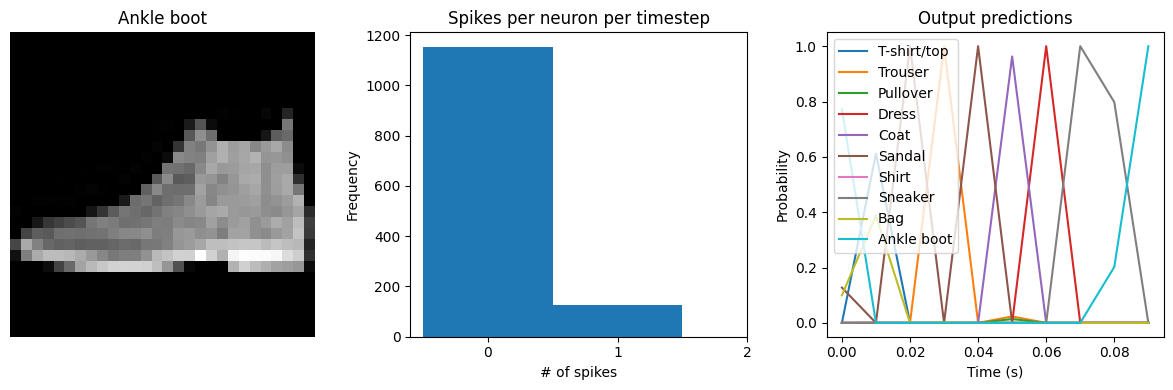

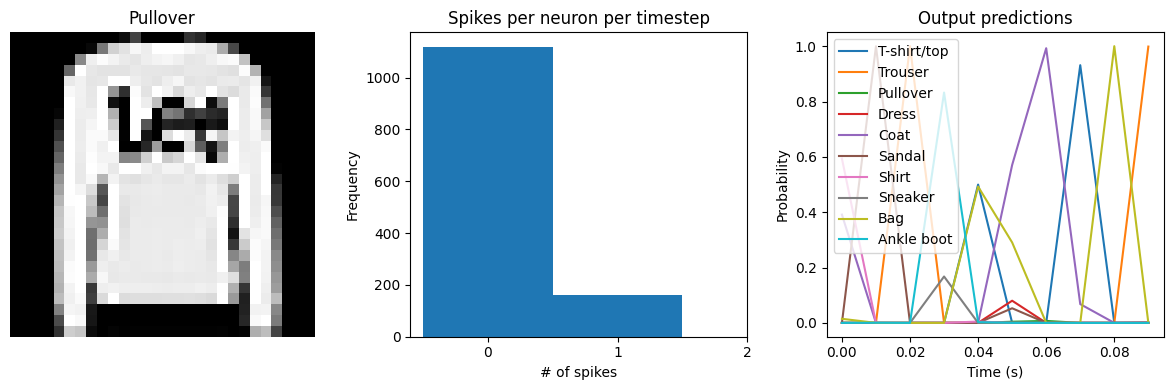

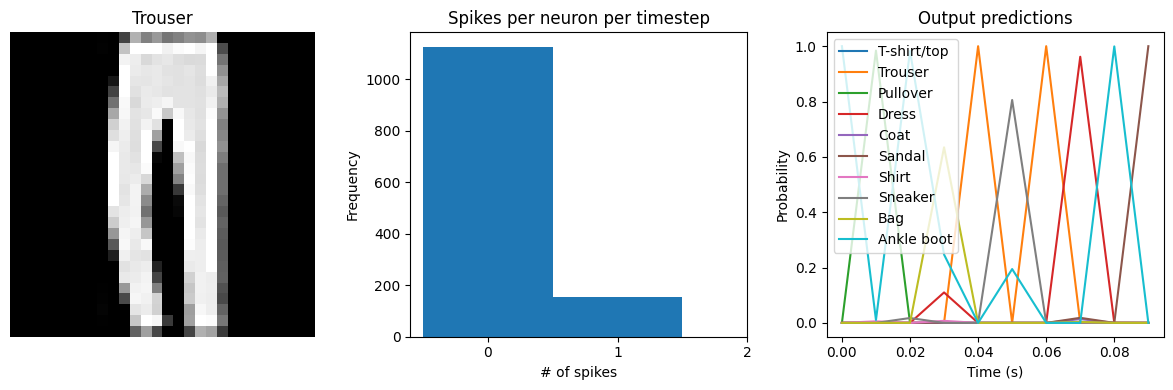

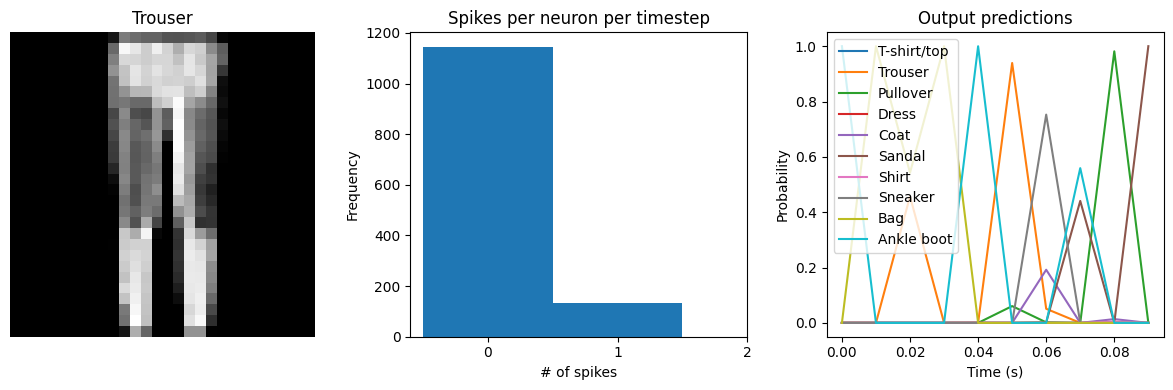

In [14]:
check_output(regularized_model)

We can see that the spike rates have moved towards the 10-20 Hz target we specified.
However, the test accuracy has dropped, since we're adding an additional optimization
constraint. (The accuracy is still higher than the original result with `dt=0.01`, due
to the higher spike rates.) We could lower the regularization weight to allow more
freedom in the firing rates. Or we could use `keras_spiking.regularizers.Percentile`,
which allows more freedom for outliers.
Again, this is a tradeoff that is made between controlling
the firing rates and optimizing accuracy, and the best value for that tradeoff will
depend on the particular application (e.g., how important is it that spike rates fall
within a particular range?).

Note that in some cases it may be better to use regularization with
``spiking_aware_training=False``, as the regularization may perform better when the
value being regularized is smoother. It may also help to adjust the weight
initialization so that the initial firing rates are closer to the desired range, so
that there are smaller adjustments required by the regularizer.

## Lowpass filtering

Another tool we can employ when working with SpikingActivation layers is filtering. As
we've seen, the output of a spiking layer consists of discrete, temporally sparse spike
events. This makes it difficult to determine the spike rate of a neuron when just
looking at a single timestep. In the cases above we have worked around this by using a
`tf.keras.layers.GlobalAveragePooling1D` layer to average the output across all
timesteps before classification.

Another way to achieve this is to compute some kind of moving average of the spiking
output across timesteps. This is effectively what filtering is doing. KerasSpiking
contains a Lowpass layer, which implements a
[lowpass filter](https://en.wikipedia.org/wiki/Low-pass_filter). This has a parameter
`tau`, known as the filter time constant, which controls the degree of smoothing the
layer will apply. Larger `tau` values will apply more smoothing, meaning that we're
aggregating information across longer periods of time, but the output will also be
slower to adapt to changes in the input.

By default the `tau` values are trainable. We can use this in combination with spiking
aware training to enable the model to learn time constants that best trade off spike
noise versus response speed.

Unlike `tf.keras.layers.GlobalAveragePooling1D`, `keras_spiking.Lowpass` computes
outputs for all timesteps by default. This makes it possible to apply filtering
throughout the model—not only on the final layer—in the case that there are multiple
spiking layers. For the final layer, we can pass `return_sequences=False` to have the
layer only return the output of the final timestep, rather than the outputs of all
timesteps.

When working with multiple KerasSpiking layers, we often want them to all share the
same `dt`. We can use `keras_spiking.default.dt` to change the default dt for all
layers. Note that this will only affect layers created _after_ the default is changed;
this will not retroactively affect previous layers.

In [15]:
keras_spiking.default.dt = 0.01

filtered_model = tf.keras.Sequential(
    [
        tf.keras.layers.Reshape((-1, 28 * 28), input_shape=(None, 28, 28)),
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
        keras_spiking.SpikingActivation("relu", spiking_aware_training=True),
        # add a lowpass filter on output of spiking layer
        keras_spiking.Lowpass(0.1, return_sequences=False),
        tf.keras.layers.Dense(10),
    ]
)

train(filtered_model, train_sequences, test_sequences)

Epoch 1/10


   1/1875 [..............................] - ETA: 33:27 - loss: 3.2171 - accuracy: 0.0938

   7/1875 [..............................] - ETA: 16s - loss: 2.8287 - accuracy: 0.1116  

  13/1875 [..............................] - ETA: 17s - loss: 2.7765 - accuracy: 0.1394

  19/1875 [..............................] - ETA: 17s - loss: 2.6947 - accuracy: 0.1760

  25/1875 [..............................] - ETA: 17s - loss: 2.5690 - accuracy: 0.2175

  31/1875 [..............................] - ETA: 17s - loss: 2.5280 - accuracy: 0.2379

  37/1875 [..............................] - ETA: 16s - loss: 2.4321 - accuracy: 0.2618

  43/1875 [..............................] - ETA: 16s - loss: 2.4084 - accuracy: 0.2689

  49/1875 [..............................] - ETA: 16s - loss: 2.3312 - accuracy: 0.2895

  55/1875 [..............................] - ETA: 16s - loss: 2.3077 - accuracy: 0.3045

  60/1875 [..............................] - ETA: 16s - loss: 2.2573 - accuracy: 0.3208

  66/1875 [>.............................] - ETA: 16s - loss: 2.2092 - accuracy: 0.3343

  72/1875 [>.............................] - ETA: 16s - loss: 2.1949 - accuracy: 0.3381

  78/1875 [>.............................] - ETA: 16s - loss: 2.1732 - accuracy: 0.3458

  84/1875 [>.............................] - ETA: 16s - loss: 2.1368 - accuracy: 0.3571

  90/1875 [>.............................] - ETA: 16s - loss: 2.1052 - accuracy: 0.3670

  95/1875 [>.............................] - ETA: 16s - loss: 2.0938 - accuracy: 0.3724

 101/1875 [>.............................] - ETA: 16s - loss: 2.0730 - accuracy: 0.3796

 107/1875 [>.............................] - ETA: 16s - loss: 2.0548 - accuracy: 0.3887

 113/1875 [>.............................] - ETA: 16s - loss: 2.0226 - accuracy: 0.3982

 119/1875 [>.............................] - ETA: 16s - loss: 1.9982 - accuracy: 0.4044

 125/1875 [=>............................] - ETA: 16s - loss: 1.9820 - accuracy: 0.4128

 131/1875 [=>............................] - ETA: 16s - loss: 1.9608 - accuracy: 0.4194

 137/1875 [=>............................] - ETA: 16s - loss: 1.9502 - accuracy: 0.4243

 143/1875 [=>............................] - ETA: 15s - loss: 1.9245 - accuracy: 0.4270

 149/1875 [=>............................] - ETA: 15s - loss: 1.9056 - accuracy: 0.4325

 155/1875 [=>............................] - ETA: 15s - loss: 1.8904 - accuracy: 0.4371

 161/1875 [=>............................] - ETA: 15s - loss: 1.8718 - accuracy: 0.4416

 167/1875 [=>............................] - ETA: 15s - loss: 1.8502 - accuracy: 0.4474

 173/1875 [=>............................] - ETA: 15s - loss: 1.8371 - accuracy: 0.4500

 179/1875 [=>............................] - ETA: 15s - loss: 1.8259 - accuracy: 0.4529

 185/1875 [=>............................] - ETA: 15s - loss: 1.8098 - accuracy: 0.4566

 191/1875 [==>...........................] - ETA: 15s - loss: 1.7919 - accuracy: 0.4611

 197/1875 [==>...........................] - ETA: 15s - loss: 1.7717 - accuracy: 0.4659

 203/1875 [==>...........................] - ETA: 15s - loss: 1.7518 - accuracy: 0.4718

 209/1875 [==>...........................] - ETA: 15s - loss: 1.7339 - accuracy: 0.4770

 215/1875 [==>...........................] - ETA: 15s - loss: 1.7207 - accuracy: 0.4804

 221/1875 [==>...........................] - ETA: 15s - loss: 1.7104 - accuracy: 0.4833

 227/1875 [==>...........................] - ETA: 15s - loss: 1.7006 - accuracy: 0.4857

 232/1875 [==>...........................] - ETA: 15s - loss: 1.6903 - accuracy: 0.4883

 237/1875 [==>...........................] - ETA: 15s - loss: 1.6783 - accuracy: 0.4924

 243/1875 [==>...........................] - ETA: 14s - loss: 1.6657 - accuracy: 0.4950

 249/1875 [==>...........................] - ETA: 14s - loss: 1.6539 - accuracy: 0.4977

 255/1875 [===>..........................] - ETA: 14s - loss: 1.6415 - accuracy: 0.5011

 261/1875 [===>..........................] - ETA: 14s - loss: 1.6304 - accuracy: 0.5035

 267/1875 [===>..........................] - ETA: 14s - loss: 1.6201 - accuracy: 0.5059

 273/1875 [===>..........................] - ETA: 14s - loss: 1.6122 - accuracy: 0.5081

 279/1875 [===>..........................] - ETA: 14s - loss: 1.6016 - accuracy: 0.5102

 285/1875 [===>..........................] - ETA: 14s - loss: 1.5918 - accuracy: 0.5124

 291/1875 [===>..........................] - ETA: 14s - loss: 1.5839 - accuracy: 0.5150

 297/1875 [===>..........................] - ETA: 14s - loss: 1.5732 - accuracy: 0.5186

 303/1875 [===>..........................] - ETA: 14s - loss: 1.5672 - accuracy: 0.5203

 309/1875 [===>..........................] - ETA: 14s - loss: 1.5564 - accuracy: 0.5229

 315/1875 [====>.........................] - ETA: 14s - loss: 1.5455 - accuracy: 0.5258

 321/1875 [====>.........................] - ETA: 14s - loss: 1.5390 - accuracy: 0.5276

 327/1875 [====>.........................] - ETA: 14s - loss: 1.5316 - accuracy: 0.5296

 333/1875 [====>.........................] - ETA: 14s - loss: 1.5258 - accuracy: 0.5312

 339/1875 [====>.........................] - ETA: 14s - loss: 1.5133 - accuracy: 0.5347

 345/1875 [====>.........................] - ETA: 14s - loss: 1.5036 - accuracy: 0.5369

 351/1875 [====>.........................] - ETA: 13s - loss: 1.4936 - accuracy: 0.5394

 357/1875 [====>.........................] - ETA: 13s - loss: 1.4842 - accuracy: 0.5423

 363/1875 [====>.........................] - ETA: 13s - loss: 1.4776 - accuracy: 0.5439

 369/1875 [====>.........................] - ETA: 13s - loss: 1.4710 - accuracy: 0.5453

 375/1875 [=====>........................] - ETA: 13s - loss: 1.4623 - accuracy: 0.5474

 381/1875 [=====>........................] - ETA: 13s - loss: 1.4585 - accuracy: 0.5487

 387/1875 [=====>........................] - ETA: 13s - loss: 1.4512 - accuracy: 0.5507

 393/1875 [=====>........................] - ETA: 13s - loss: 1.4440 - accuracy: 0.5526

 399/1875 [=====>........................] - ETA: 13s - loss: 1.4378 - accuracy: 0.5544

 405/1875 [=====>........................] - ETA: 13s - loss: 1.4278 - accuracy: 0.5569

 411/1875 [=====>........................] - ETA: 13s - loss: 1.4238 - accuracy: 0.5581

 417/1875 [=====>........................] - ETA: 13s - loss: 1.4159 - accuracy: 0.5601

 423/1875 [=====>........................] - ETA: 13s - loss: 1.4118 - accuracy: 0.5615

 429/1875 [=====>........................] - ETA: 13s - loss: 1.4025 - accuracy: 0.5645

 435/1875 [=====>........................] - ETA: 13s - loss: 1.3965 - accuracy: 0.5657

 441/1875 [======>.......................] - ETA: 13s - loss: 1.3889 - accuracy: 0.5676

 447/1875 [======>.......................] - ETA: 13s - loss: 1.3807 - accuracy: 0.5697

 453/1875 [======>.......................] - ETA: 13s - loss: 1.3738 - accuracy: 0.5711

 459/1875 [======>.......................] - ETA: 12s - loss: 1.3658 - accuracy: 0.5732

 465/1875 [======>.......................] - ETA: 12s - loss: 1.3616 - accuracy: 0.5742

 471/1875 [======>.......................] - ETA: 12s - loss: 1.3541 - accuracy: 0.5764

 477/1875 [======>.......................] - ETA: 12s - loss: 1.3474 - accuracy: 0.5779

 483/1875 [======>.......................] - ETA: 12s - loss: 1.3424 - accuracy: 0.5791

 489/1875 [======>.......................] - ETA: 12s - loss: 1.3380 - accuracy: 0.5803

 495/1875 [======>.......................] - ETA: 12s - loss: 1.3328 - accuracy: 0.5821

 501/1875 [=======>......................] - ETA: 12s - loss: 1.3286 - accuracy: 0.5833

 507/1875 [=======>......................] - ETA: 12s - loss: 1.3255 - accuracy: 0.5843

 513/1875 [=======>......................] - ETA: 12s - loss: 1.3208 - accuracy: 0.5852

 519/1875 [=======>......................] - ETA: 12s - loss: 1.3182 - accuracy: 0.5863

 525/1875 [=======>......................] - ETA: 12s - loss: 1.3143 - accuracy: 0.5872

 531/1875 [=======>......................] - ETA: 12s - loss: 1.3089 - accuracy: 0.5886

 537/1875 [=======>......................] - ETA: 12s - loss: 1.3040 - accuracy: 0.5899

 543/1875 [=======>......................] - ETA: 12s - loss: 1.2979 - accuracy: 0.5914

 549/1875 [=======>......................] - ETA: 12s - loss: 1.2937 - accuracy: 0.5924

 555/1875 [=======>......................] - ETA: 12s - loss: 1.2875 - accuracy: 0.5945

 561/1875 [=======>......................] - ETA: 11s - loss: 1.2821 - accuracy: 0.5951

 567/1875 [========>.....................] - ETA: 11s - loss: 1.2772 - accuracy: 0.5962

 573/1875 [========>.....................] - ETA: 11s - loss: 1.2705 - accuracy: 0.5979

 579/1875 [========>.....................] - ETA: 11s - loss: 1.2658 - accuracy: 0.5992

 585/1875 [========>.....................] - ETA: 11s - loss: 1.2626 - accuracy: 0.6001

 591/1875 [========>.....................] - ETA: 11s - loss: 1.2603 - accuracy: 0.6006

 597/1875 [========>.....................] - ETA: 11s - loss: 1.2551 - accuracy: 0.6019

 603/1875 [========>.....................] - ETA: 11s - loss: 1.2512 - accuracy: 0.6030

 609/1875 [========>.....................] - ETA: 11s - loss: 1.2483 - accuracy: 0.6037

 615/1875 [========>.....................] - ETA: 11s - loss: 1.2433 - accuracy: 0.6048

 621/1875 [========>.....................] - ETA: 11s - loss: 1.2408 - accuracy: 0.6050

 627/1875 [=========>....................] - ETA: 11s - loss: 1.2362 - accuracy: 0.6060

 633/1875 [=========>....................] - ETA: 11s - loss: 1.2326 - accuracy: 0.6071

 639/1875 [=========>....................] - ETA: 11s - loss: 1.2287 - accuracy: 0.6081

 645/1875 [=========>....................] - ETA: 11s - loss: 1.2262 - accuracy: 0.6089

 651/1875 [=========>....................] - ETA: 11s - loss: 1.2211 - accuracy: 0.6105

 657/1875 [=========>....................] - ETA: 11s - loss: 1.2177 - accuracy: 0.6110

 663/1875 [=========>....................] - ETA: 11s - loss: 1.2137 - accuracy: 0.6116

 669/1875 [=========>....................] - ETA: 11s - loss: 1.2104 - accuracy: 0.6122

 674/1875 [=========>....................] - ETA: 10s - loss: 1.2088 - accuracy: 0.6127

 680/1875 [=========>....................] - ETA: 10s - loss: 1.2054 - accuracy: 0.6135

 686/1875 [=========>....................] - ETA: 10s - loss: 1.2005 - accuracy: 0.6150

 692/1875 [==========>...................] - ETA: 10s - loss: 1.1984 - accuracy: 0.6151

 698/1875 [==========>...................] - ETA: 10s - loss: 1.1952 - accuracy: 0.6157

 704/1875 [==========>...................] - ETA: 10s - loss: 1.1919 - accuracy: 0.6167

 710/1875 [==========>...................] - ETA: 10s - loss: 1.1886 - accuracy: 0.6175

 716/1875 [==========>...................] - ETA: 10s - loss: 1.1852 - accuracy: 0.6180

 722/1875 [==========>...................] - ETA: 10s - loss: 1.1817 - accuracy: 0.6189

 728/1875 [==========>...................] - ETA: 10s - loss: 1.1794 - accuracy: 0.6192

 734/1875 [==========>...................] - ETA: 10s - loss: 1.1770 - accuracy: 0.6197

 740/1875 [==========>...................] - ETA: 10s - loss: 1.1758 - accuracy: 0.6201

 746/1875 [==========>...................] - ETA: 10s - loss: 1.1712 - accuracy: 0.6215

 752/1875 [===========>..................] - ETA: 10s - loss: 1.1691 - accuracy: 0.6220

 758/1875 [===========>..................] - ETA: 10s - loss: 1.1655 - accuracy: 0.6229

 764/1875 [===========>..................] - ETA: 10s - loss: 1.1620 - accuracy: 0.6237

 770/1875 [===========>..................] - ETA: 10s - loss: 1.1583 - accuracy: 0.6245

 776/1875 [===========>..................] - ETA: 10s - loss: 1.1552 - accuracy: 0.6252

 782/1875 [===========>..................] - ETA: 9s - loss: 1.1533 - accuracy: 0.6259 

 788/1875 [===========>..................] - ETA: 9s - loss: 1.1497 - accuracy: 0.6267

 794/1875 [===========>..................] - ETA: 9s - loss: 1.1469 - accuracy: 0.6273

 800/1875 [===========>..................] - ETA: 9s - loss: 1.1442 - accuracy: 0.6282

 806/1875 [===========>..................] - ETA: 9s - loss: 1.1415 - accuracy: 0.6288

 812/1875 [===========>..................] - ETA: 9s - loss: 1.1386 - accuracy: 0.6295

 817/1875 [============>.................] - ETA: 9s - loss: 1.1370 - accuracy: 0.6298

 823/1875 [============>.................] - ETA: 9s - loss: 1.1359 - accuracy: 0.6298

 828/1875 [============>.................] - ETA: 9s - loss: 1.1339 - accuracy: 0.6302

 834/1875 [============>.................] - ETA: 9s - loss: 1.1314 - accuracy: 0.6308

 840/1875 [============>.................] - ETA: 9s - loss: 1.1281 - accuracy: 0.6316

 846/1875 [============>.................] - ETA: 9s - loss: 1.1248 - accuracy: 0.6326

 852/1875 [============>.................] - ETA: 9s - loss: 1.1218 - accuracy: 0.6333

 858/1875 [============>.................] - ETA: 9s - loss: 1.1200 - accuracy: 0.6336

 864/1875 [============>.................] - ETA: 9s - loss: 1.1174 - accuracy: 0.6342

 870/1875 [============>.................] - ETA: 9s - loss: 1.1157 - accuracy: 0.6346

 876/1875 [=============>................] - ETA: 9s - loss: 1.1134 - accuracy: 0.6351

 882/1875 [=============>................] - ETA: 9s - loss: 1.1101 - accuracy: 0.6361

 888/1875 [=============>................] - ETA: 9s - loss: 1.1084 - accuracy: 0.6363

 894/1875 [=============>................] - ETA: 8s - loss: 1.1063 - accuracy: 0.6369

 900/1875 [=============>................] - ETA: 8s - loss: 1.1043 - accuracy: 0.6374

 906/1875 [=============>................] - ETA: 8s - loss: 1.1028 - accuracy: 0.6378

 912/1875 [=============>................] - ETA: 8s - loss: 1.1018 - accuracy: 0.6383

 918/1875 [=============>................] - ETA: 8s - loss: 1.1000 - accuracy: 0.6387

 924/1875 [=============>................] - ETA: 8s - loss: 1.0971 - accuracy: 0.6394

 930/1875 [=============>................] - ETA: 8s - loss: 1.0946 - accuracy: 0.6400

 936/1875 [=============>................] - ETA: 8s - loss: 1.0922 - accuracy: 0.6408

 942/1875 [==============>...............] - ETA: 8s - loss: 1.0898 - accuracy: 0.6413

 948/1875 [==============>...............] - ETA: 8s - loss: 1.0872 - accuracy: 0.6420

 954/1875 [==============>...............] - ETA: 8s - loss: 1.0854 - accuracy: 0.6426

 960/1875 [==============>...............] - ETA: 8s - loss: 1.0832 - accuracy: 0.6432

 966/1875 [==============>...............] - ETA: 8s - loss: 1.0815 - accuracy: 0.6435

 972/1875 [==============>...............] - ETA: 8s - loss: 1.0791 - accuracy: 0.6441

 978/1875 [==============>...............] - ETA: 8s - loss: 1.0775 - accuracy: 0.6445

 984/1875 [==============>...............] - ETA: 8s - loss: 1.0752 - accuracy: 0.6449

 990/1875 [==============>...............] - ETA: 8s - loss: 1.0737 - accuracy: 0.6453

 996/1875 [==============>...............] - ETA: 8s - loss: 1.0722 - accuracy: 0.6455

1002/1875 [===============>..............] - ETA: 7s - loss: 1.0693 - accuracy: 0.6463

1008/1875 [===============>..............] - ETA: 7s - loss: 1.0671 - accuracy: 0.6468

1014/1875 [===============>..............] - ETA: 7s - loss: 1.0648 - accuracy: 0.6473

1020/1875 [===============>..............] - ETA: 7s - loss: 1.0624 - accuracy: 0.6479

1026/1875 [===============>..............] - ETA: 7s - loss: 1.0592 - accuracy: 0.6489

1032/1875 [===============>..............] - ETA: 7s - loss: 1.0568 - accuracy: 0.6497

1037/1875 [===============>..............] - ETA: 7s - loss: 1.0549 - accuracy: 0.6500

1043/1875 [===============>..............] - ETA: 7s - loss: 1.0520 - accuracy: 0.6509

1049/1875 [===============>..............] - ETA: 7s - loss: 1.0497 - accuracy: 0.6515

1055/1875 [===============>..............] - ETA: 7s - loss: 1.0478 - accuracy: 0.6520

1061/1875 [===============>..............] - ETA: 7s - loss: 1.0459 - accuracy: 0.6525

1067/1875 [================>.............] - ETA: 7s - loss: 1.0434 - accuracy: 0.6532

1073/1875 [================>.............] - ETA: 7s - loss: 1.0418 - accuracy: 0.6537

1079/1875 [================>.............] - ETA: 7s - loss: 1.0401 - accuracy: 0.6541

1085/1875 [================>.............] - ETA: 7s - loss: 1.0385 - accuracy: 0.6542

1091/1875 [================>.............] - ETA: 7s - loss: 1.0368 - accuracy: 0.6547

1097/1875 [================>.............] - ETA: 7s - loss: 1.0348 - accuracy: 0.6553

1103/1875 [================>.............] - ETA: 7s - loss: 1.0330 - accuracy: 0.6557

1109/1875 [================>.............] - ETA: 7s - loss: 1.0311 - accuracy: 0.6562

1115/1875 [================>.............] - ETA: 6s - loss: 1.0288 - accuracy: 0.6570

1121/1875 [================>.............] - ETA: 6s - loss: 1.0273 - accuracy: 0.6572

1127/1875 [=================>............] - ETA: 6s - loss: 1.0255 - accuracy: 0.6575

1133/1875 [=================>............] - ETA: 6s - loss: 1.0236 - accuracy: 0.6581

1139/1875 [=================>............] - ETA: 6s - loss: 1.0220 - accuracy: 0.6586

1145/1875 [=================>............] - ETA: 6s - loss: 1.0199 - accuracy: 0.6591

1151/1875 [=================>............] - ETA: 6s - loss: 1.0187 - accuracy: 0.6595

1157/1875 [=================>............] - ETA: 6s - loss: 1.0162 - accuracy: 0.6603

1163/1875 [=================>............] - ETA: 6s - loss: 1.0139 - accuracy: 0.6608

1169/1875 [=================>............] - ETA: 6s - loss: 1.0127 - accuracy: 0.6611

1175/1875 [=================>............] - ETA: 6s - loss: 1.0115 - accuracy: 0.6615

1181/1875 [=================>............] - ETA: 6s - loss: 1.0102 - accuracy: 0.6618

1187/1875 [=================>............] - ETA: 6s - loss: 1.0084 - accuracy: 0.6623

1193/1875 [==================>...........] - ETA: 6s - loss: 1.0065 - accuracy: 0.6629

1199/1875 [==================>...........] - ETA: 6s - loss: 1.0048 - accuracy: 0.6632

1204/1875 [==================>...........] - ETA: 6s - loss: 1.0039 - accuracy: 0.6634

1210/1875 [==================>...........] - ETA: 6s - loss: 1.0016 - accuracy: 0.6640

1216/1875 [==================>...........] - ETA: 6s - loss: 1.0002 - accuracy: 0.6646

1222/1875 [==================>...........] - ETA: 5s - loss: 0.9980 - accuracy: 0.6652

1228/1875 [==================>...........] - ETA: 5s - loss: 0.9962 - accuracy: 0.6656

1234/1875 [==================>...........] - ETA: 5s - loss: 0.9951 - accuracy: 0.6659

1240/1875 [==================>...........] - ETA: 5s - loss: 0.9936 - accuracy: 0.6663

1246/1875 [==================>...........] - ETA: 5s - loss: 0.9923 - accuracy: 0.6666

1252/1875 [===================>..........] - ETA: 5s - loss: 0.9912 - accuracy: 0.6667

1258/1875 [===================>..........] - ETA: 5s - loss: 0.9894 - accuracy: 0.6674

1264/1875 [===================>..........] - ETA: 5s - loss: 0.9879 - accuracy: 0.6678

1270/1875 [===================>..........] - ETA: 5s - loss: 0.9861 - accuracy: 0.6683

1276/1875 [===================>..........] - ETA: 5s - loss: 0.9844 - accuracy: 0.6689

1282/1875 [===================>..........] - ETA: 5s - loss: 0.9831 - accuracy: 0.6694

1288/1875 [===================>..........] - ETA: 5s - loss: 0.9817 - accuracy: 0.6697

1294/1875 [===================>..........] - ETA: 5s - loss: 0.9801 - accuracy: 0.6701

1300/1875 [===================>..........] - ETA: 5s - loss: 0.9787 - accuracy: 0.6705

1306/1875 [===================>..........] - ETA: 5s - loss: 0.9769 - accuracy: 0.6708

1312/1875 [===================>..........] - ETA: 5s - loss: 0.9749 - accuracy: 0.6714

1318/1875 [====================>.........] - ETA: 5s - loss: 0.9736 - accuracy: 0.6717

1324/1875 [====================>.........] - ETA: 5s - loss: 0.9717 - accuracy: 0.6721

1330/1875 [====================>.........] - ETA: 4s - loss: 0.9703 - accuracy: 0.6725

1336/1875 [====================>.........] - ETA: 4s - loss: 0.9696 - accuracy: 0.6726

1342/1875 [====================>.........] - ETA: 4s - loss: 0.9688 - accuracy: 0.6728

1348/1875 [====================>.........] - ETA: 4s - loss: 0.9673 - accuracy: 0.6732

1354/1875 [====================>.........] - ETA: 4s - loss: 0.9660 - accuracy: 0.6734

1360/1875 [====================>.........] - ETA: 4s - loss: 0.9643 - accuracy: 0.6739

1366/1875 [====================>.........] - ETA: 4s - loss: 0.9626 - accuracy: 0.6744

1372/1875 [====================>.........] - ETA: 4s - loss: 0.9617 - accuracy: 0.6746

1378/1875 [=====================>........] - ETA: 4s - loss: 0.9606 - accuracy: 0.6749

1384/1875 [=====================>........] - ETA: 4s - loss: 0.9593 - accuracy: 0.6753

1390/1875 [=====================>........] - ETA: 4s - loss: 0.9578 - accuracy: 0.6758

1396/1875 [=====================>........] - ETA: 4s - loss: 0.9566 - accuracy: 0.6760

1402/1875 [=====================>........] - ETA: 4s - loss: 0.9556 - accuracy: 0.6763

1407/1875 [=====================>........] - ETA: 4s - loss: 0.9543 - accuracy: 0.6766

1413/1875 [=====================>........] - ETA: 4s - loss: 0.9533 - accuracy: 0.6771

1419/1875 [=====================>........] - ETA: 4s - loss: 0.9526 - accuracy: 0.6773

1425/1875 [=====================>........] - ETA: 4s - loss: 0.9513 - accuracy: 0.6777

1431/1875 [=====================>........] - ETA: 4s - loss: 0.9505 - accuracy: 0.6778

1437/1875 [=====================>........] - ETA: 4s - loss: 0.9494 - accuracy: 0.6781

1443/1875 [======================>.......] - ETA: 3s - loss: 0.9478 - accuracy: 0.6786

1449/1875 [======================>.......] - ETA: 3s - loss: 0.9462 - accuracy: 0.6792

1455/1875 [======================>.......] - ETA: 3s - loss: 0.9450 - accuracy: 0.6794

1461/1875 [======================>.......] - ETA: 3s - loss: 0.9443 - accuracy: 0.6795

1467/1875 [======================>.......] - ETA: 3s - loss: 0.9435 - accuracy: 0.6799

1473/1875 [======================>.......] - ETA: 3s - loss: 0.9429 - accuracy: 0.6801

1479/1875 [======================>.......] - ETA: 3s - loss: 0.9410 - accuracy: 0.6807

1485/1875 [======================>.......] - ETA: 3s - loss: 0.9403 - accuracy: 0.6808

1491/1875 [======================>.......] - ETA: 3s - loss: 0.9386 - accuracy: 0.6814

1497/1875 [======================>.......] - ETA: 3s - loss: 0.9370 - accuracy: 0.6820

1503/1875 [=======================>......] - ETA: 3s - loss: 0.9357 - accuracy: 0.6824

1509/1875 [=======================>......] - ETA: 3s - loss: 0.9341 - accuracy: 0.6830

1515/1875 [=======================>......] - ETA: 3s - loss: 0.9328 - accuracy: 0.6834

1521/1875 [=======================>......] - ETA: 3s - loss: 0.9315 - accuracy: 0.6839

1526/1875 [=======================>......] - ETA: 3s - loss: 0.9303 - accuracy: 0.6842

1532/1875 [=======================>......] - ETA: 3s - loss: 0.9295 - accuracy: 0.6844

1537/1875 [=======================>......] - ETA: 3s - loss: 0.9289 - accuracy: 0.6846

1543/1875 [=======================>......] - ETA: 3s - loss: 0.9278 - accuracy: 0.6849

1549/1875 [=======================>......] - ETA: 2s - loss: 0.9267 - accuracy: 0.6853

1555/1875 [=======================>......] - ETA: 2s - loss: 0.9255 - accuracy: 0.6856

1561/1875 [=======================>......] - ETA: 2s - loss: 0.9244 - accuracy: 0.6860

1567/1875 [========================>.....] - ETA: 2s - loss: 0.9236 - accuracy: 0.6861

1573/1875 [========================>.....] - ETA: 2s - loss: 0.9226 - accuracy: 0.6863

1579/1875 [========================>.....] - ETA: 2s - loss: 0.9221 - accuracy: 0.6864

1585/1875 [========================>.....] - ETA: 2s - loss: 0.9211 - accuracy: 0.6866

1591/1875 [========================>.....] - ETA: 2s - loss: 0.9205 - accuracy: 0.6870

1596/1875 [========================>.....] - ETA: 2s - loss: 0.9193 - accuracy: 0.6873

1602/1875 [========================>.....] - ETA: 2s - loss: 0.9182 - accuracy: 0.6874

1608/1875 [========================>.....] - ETA: 2s - loss: 0.9168 - accuracy: 0.6879

1614/1875 [========================>.....] - ETA: 2s - loss: 0.9156 - accuracy: 0.6883

1620/1875 [========================>.....] - ETA: 2s - loss: 0.9143 - accuracy: 0.6887

1626/1875 [=========================>....] - ETA: 2s - loss: 0.9138 - accuracy: 0.6889

1632/1875 [=========================>....] - ETA: 2s - loss: 0.9125 - accuracy: 0.6892

1638/1875 [=========================>....] - ETA: 2s - loss: 0.9114 - accuracy: 0.6894

1644/1875 [=========================>....] - ETA: 2s - loss: 0.9105 - accuracy: 0.6896

1650/1875 [=========================>....] - ETA: 2s - loss: 0.9092 - accuracy: 0.6901

1656/1875 [=========================>....] - ETA: 2s - loss: 0.9087 - accuracy: 0.6902

1662/1875 [=========================>....] - ETA: 1s - loss: 0.9075 - accuracy: 0.6905

1668/1875 [=========================>....] - ETA: 1s - loss: 0.9064 - accuracy: 0.6909

1674/1875 [=========================>....] - ETA: 1s - loss: 0.9059 - accuracy: 0.6912

1680/1875 [=========================>....] - ETA: 1s - loss: 0.9043 - accuracy: 0.6917

1686/1875 [=========================>....] - ETA: 1s - loss: 0.9034 - accuracy: 0.6920

1692/1875 [==========================>...] - ETA: 1s - loss: 0.9023 - accuracy: 0.6924

1698/1875 [==========================>...] - ETA: 1s - loss: 0.9016 - accuracy: 0.6925

1704/1875 [==========================>...] - ETA: 1s - loss: 0.9006 - accuracy: 0.6928

1710/1875 [==========================>...] - ETA: 1s - loss: 0.8996 - accuracy: 0.6931

1716/1875 [==========================>...] - ETA: 1s - loss: 0.8987 - accuracy: 0.6934

1722/1875 [==========================>...] - ETA: 1s - loss: 0.8979 - accuracy: 0.6935

1728/1875 [==========================>...] - ETA: 1s - loss: 0.8970 - accuracy: 0.6938

1734/1875 [==========================>...] - ETA: 1s - loss: 0.8960 - accuracy: 0.6940

1740/1875 [==========================>...] - ETA: 1s - loss: 0.8952 - accuracy: 0.6943

1746/1875 [==========================>...] - ETA: 1s - loss: 0.8939 - accuracy: 0.6946

1752/1875 [===========================>..] - ETA: 1s - loss: 0.8932 - accuracy: 0.6948

1758/1875 [===========================>..] - ETA: 1s - loss: 0.8922 - accuracy: 0.6951

1764/1875 [===========================>..] - ETA: 1s - loss: 0.8911 - accuracy: 0.6955

1770/1875 [===========================>..] - ETA: 0s - loss: 0.8902 - accuracy: 0.6956

1776/1875 [===========================>..] - ETA: 0s - loss: 0.8893 - accuracy: 0.6958

1782/1875 [===========================>..] - ETA: 0s - loss: 0.8882 - accuracy: 0.6962

1788/1875 [===========================>..] - ETA: 0s - loss: 0.8878 - accuracy: 0.6963

1794/1875 [===========================>..] - ETA: 0s - loss: 0.8868 - accuracy: 0.6966

1800/1875 [===========================>..] - ETA: 0s - loss: 0.8855 - accuracy: 0.6971

1806/1875 [===========================>..] - ETA: 0s - loss: 0.8844 - accuracy: 0.6975

1812/1875 [===========================>..] - ETA: 0s - loss: 0.8838 - accuracy: 0.6978

1818/1875 [============================>.] - ETA: 0s - loss: 0.8831 - accuracy: 0.6980

1824/1875 [============================>.] - ETA: 0s - loss: 0.8821 - accuracy: 0.6982

1830/1875 [============================>.] - ETA: 0s - loss: 0.8808 - accuracy: 0.6986

1836/1875 [============================>.] - ETA: 0s - loss: 0.8795 - accuracy: 0.6990

1842/1875 [============================>.] - ETA: 0s - loss: 0.8782 - accuracy: 0.6994

1848/1875 [============================>.] - ETA: 0s - loss: 0.8770 - accuracy: 0.6998

1854/1875 [============================>.] - ETA: 0s - loss: 0.8767 - accuracy: 0.6999

1860/1875 [============================>.] - ETA: 0s - loss: 0.8761 - accuracy: 0.7000

1866/1875 [============================>.] - ETA: 0s - loss: 0.8756 - accuracy: 0.7002

1872/1875 [============================>.] - ETA: 0s - loss: 0.8745 - accuracy: 0.7005

1875/1875 [==============================] - 18s 9ms/step - loss: 0.8740 - accuracy: 0.7007


Epoch 2/10


   1/1875 [..............................] - ETA: 17s - loss: 0.4689 - accuracy: 0.8750

   7/1875 [..............................] - ETA: 16s - loss: 0.6257 - accuracy: 0.7723

  13/1875 [..............................] - ETA: 16s - loss: 0.6433 - accuracy: 0.7524

  19/1875 [..............................] - ETA: 16s - loss: 0.6523 - accuracy: 0.7500

  25/1875 [..............................] - ETA: 16s - loss: 0.6107 - accuracy: 0.7625

  31/1875 [..............................] - ETA: 16s - loss: 0.6291 - accuracy: 0.7520

  37/1875 [..............................] - ETA: 16s - loss: 0.6201 - accuracy: 0.7618

  43/1875 [..............................] - ETA: 16s - loss: 0.6327 - accuracy: 0.7573

  49/1875 [..............................] - ETA: 16s - loss: 0.6285 - accuracy: 0.7615

  55/1875 [..............................] - ETA: 16s - loss: 0.6310 - accuracy: 0.7642

  61/1875 [..............................] - ETA: 16s - loss: 0.6211 - accuracy: 0.7695

  67/1875 [>.............................] - ETA: 16s - loss: 0.6264 - accuracy: 0.7691

  73/1875 [>.............................] - ETA: 16s - loss: 0.6137 - accuracy: 0.7740

  79/1875 [>.............................] - ETA: 16s - loss: 0.6140 - accuracy: 0.7773

  85/1875 [>.............................] - ETA: 16s - loss: 0.6055 - accuracy: 0.7801

  91/1875 [>.............................] - ETA: 16s - loss: 0.6056 - accuracy: 0.7826

  97/1875 [>.............................] - ETA: 16s - loss: 0.6073 - accuracy: 0.7832

 103/1875 [>.............................] - ETA: 16s - loss: 0.6127 - accuracy: 0.7819

 108/1875 [>.............................] - ETA: 16s - loss: 0.6129 - accuracy: 0.7807

 114/1875 [>.............................] - ETA: 16s - loss: 0.6106 - accuracy: 0.7821

 120/1875 [>.............................] - ETA: 16s - loss: 0.6125 - accuracy: 0.7820

 126/1875 [=>............................] - ETA: 16s - loss: 0.6148 - accuracy: 0.7822

 132/1875 [=>............................] - ETA: 16s - loss: 0.6164 - accuracy: 0.7812

 138/1875 [=>............................] - ETA: 16s - loss: 0.6195 - accuracy: 0.7819

 144/1875 [=>............................] - ETA: 16s - loss: 0.6224 - accuracy: 0.7806

 150/1875 [=>............................] - ETA: 15s - loss: 0.6169 - accuracy: 0.7827

 156/1875 [=>............................] - ETA: 15s - loss: 0.6175 - accuracy: 0.7825

 162/1875 [=>............................] - ETA: 15s - loss: 0.6207 - accuracy: 0.7816

 168/1875 [=>............................] - ETA: 15s - loss: 0.6167 - accuracy: 0.7831

 174/1875 [=>............................] - ETA: 15s - loss: 0.6176 - accuracy: 0.7829

 180/1875 [=>............................] - ETA: 15s - loss: 0.6174 - accuracy: 0.7816

 185/1875 [=>............................] - ETA: 15s - loss: 0.6163 - accuracy: 0.7809

 191/1875 [==>...........................] - ETA: 15s - loss: 0.6154 - accuracy: 0.7816

 197/1875 [==>...........................] - ETA: 15s - loss: 0.6139 - accuracy: 0.7819

 203/1875 [==>...........................] - ETA: 15s - loss: 0.6117 - accuracy: 0.7822

 209/1875 [==>...........................] - ETA: 15s - loss: 0.6110 - accuracy: 0.7829

 215/1875 [==>...........................] - ETA: 15s - loss: 0.6100 - accuracy: 0.7826

 221/1875 [==>...........................] - ETA: 15s - loss: 0.6074 - accuracy: 0.7835

 227/1875 [==>...........................] - ETA: 15s - loss: 0.6059 - accuracy: 0.7833

 233/1875 [==>...........................] - ETA: 15s - loss: 0.6052 - accuracy: 0.7834

 239/1875 [==>...........................] - ETA: 15s - loss: 0.6068 - accuracy: 0.7831

 245/1875 [==>...........................] - ETA: 15s - loss: 0.6078 - accuracy: 0.7825

 251/1875 [===>..........................] - ETA: 15s - loss: 0.6068 - accuracy: 0.7825

 257/1875 [===>..........................] - ETA: 15s - loss: 0.6078 - accuracy: 0.7820

 263/1875 [===>..........................] - ETA: 14s - loss: 0.6057 - accuracy: 0.7821

 269/1875 [===>..........................] - ETA: 14s - loss: 0.6049 - accuracy: 0.7821

 275/1875 [===>..........................] - ETA: 14s - loss: 0.6032 - accuracy: 0.7826

 281/1875 [===>..........................] - ETA: 14s - loss: 0.6034 - accuracy: 0.7821

 287/1875 [===>..........................] - ETA: 14s - loss: 0.6022 - accuracy: 0.7823

 293/1875 [===>..........................] - ETA: 14s - loss: 0.6032 - accuracy: 0.7820

 299/1875 [===>..........................] - ETA: 14s - loss: 0.6040 - accuracy: 0.7808

 305/1875 [===>..........................] - ETA: 14s - loss: 0.6059 - accuracy: 0.7799

 311/1875 [===>..........................] - ETA: 14s - loss: 0.6051 - accuracy: 0.7798

 317/1875 [====>.........................] - ETA: 14s - loss: 0.6035 - accuracy: 0.7801

 323/1875 [====>.........................] - ETA: 14s - loss: 0.6042 - accuracy: 0.7798

 329/1875 [====>.........................] - ETA: 14s - loss: 0.6011 - accuracy: 0.7809

 335/1875 [====>.........................] - ETA: 14s - loss: 0.6013 - accuracy: 0.7805

 341/1875 [====>.........................] - ETA: 14s - loss: 0.6004 - accuracy: 0.7806

 347/1875 [====>.........................] - ETA: 14s - loss: 0.6001 - accuracy: 0.7802

 353/1875 [====>.........................] - ETA: 14s - loss: 0.6017 - accuracy: 0.7801

 359/1875 [====>.........................] - ETA: 13s - loss: 0.6026 - accuracy: 0.7801

 365/1875 [====>.........................] - ETA: 13s - loss: 0.6024 - accuracy: 0.7799

 371/1875 [====>.........................] - ETA: 13s - loss: 0.6016 - accuracy: 0.7798

 377/1875 [=====>........................] - ETA: 13s - loss: 0.5995 - accuracy: 0.7807

 383/1875 [=====>........................] - ETA: 13s - loss: 0.5998 - accuracy: 0.7806

 389/1875 [=====>........................] - ETA: 13s - loss: 0.5995 - accuracy: 0.7808

 395/1875 [=====>........................] - ETA: 13s - loss: 0.5993 - accuracy: 0.7812

 401/1875 [=====>........................] - ETA: 13s - loss: 0.5990 - accuracy: 0.7821

 407/1875 [=====>........................] - ETA: 13s - loss: 0.5985 - accuracy: 0.7819

 413/1875 [=====>........................] - ETA: 13s - loss: 0.5984 - accuracy: 0.7819

 419/1875 [=====>........................] - ETA: 13s - loss: 0.5988 - accuracy: 0.7818

 425/1875 [=====>........................] - ETA: 13s - loss: 0.5982 - accuracy: 0.7817

 430/1875 [=====>........................] - ETA: 13s - loss: 0.5984 - accuracy: 0.7818

 436/1875 [=====>........................] - ETA: 13s - loss: 0.5973 - accuracy: 0.7822

 442/1875 [======>.......................] - ETA: 13s - loss: 0.5962 - accuracy: 0.7827

 448/1875 [======>.......................] - ETA: 13s - loss: 0.5966 - accuracy: 0.7829

 454/1875 [======>.......................] - ETA: 13s - loss: 0.5951 - accuracy: 0.7835

 460/1875 [======>.......................] - ETA: 12s - loss: 0.5962 - accuracy: 0.7832

 466/1875 [======>.......................] - ETA: 12s - loss: 0.5976 - accuracy: 0.7829

 472/1875 [======>.......................] - ETA: 12s - loss: 0.5972 - accuracy: 0.7830

 478/1875 [======>.......................] - ETA: 12s - loss: 0.5966 - accuracy: 0.7834

 484/1875 [======>.......................] - ETA: 12s - loss: 0.5968 - accuracy: 0.7834

 490/1875 [======>.......................] - ETA: 12s - loss: 0.5958 - accuracy: 0.7835

 496/1875 [======>.......................] - ETA: 12s - loss: 0.5950 - accuracy: 0.7837

 502/1875 [=======>......................] - ETA: 12s - loss: 0.5951 - accuracy: 0.7836

 508/1875 [=======>......................] - ETA: 12s - loss: 0.5958 - accuracy: 0.7836

 514/1875 [=======>......................] - ETA: 12s - loss: 0.5947 - accuracy: 0.7836

 520/1875 [=======>......................] - ETA: 12s - loss: 0.5935 - accuracy: 0.7842

 526/1875 [=======>......................] - ETA: 12s - loss: 0.5953 - accuracy: 0.7837

 532/1875 [=======>......................] - ETA: 12s - loss: 0.5945 - accuracy: 0.7840

 538/1875 [=======>......................] - ETA: 12s - loss: 0.5947 - accuracy: 0.7838

 544/1875 [=======>......................] - ETA: 12s - loss: 0.5952 - accuracy: 0.7839

 550/1875 [=======>......................] - ETA: 12s - loss: 0.5942 - accuracy: 0.7839

 556/1875 [=======>......................] - ETA: 12s - loss: 0.5946 - accuracy: 0.7838

 562/1875 [=======>......................] - ETA: 12s - loss: 0.5931 - accuracy: 0.7840

 568/1875 [========>.....................] - ETA: 11s - loss: 0.5944 - accuracy: 0.7831

 574/1875 [========>.....................] - ETA: 11s - loss: 0.5936 - accuracy: 0.7835

 580/1875 [========>.....................] - ETA: 11s - loss: 0.5938 - accuracy: 0.7831

 586/1875 [========>.....................] - ETA: 11s - loss: 0.5934 - accuracy: 0.7835

 592/1875 [========>.....................] - ETA: 11s - loss: 0.5929 - accuracy: 0.7839

 598/1875 [========>.....................] - ETA: 11s - loss: 0.5924 - accuracy: 0.7841

 604/1875 [========>.....................] - ETA: 11s - loss: 0.5919 - accuracy: 0.7843

 610/1875 [========>.....................] - ETA: 11s - loss: 0.5913 - accuracy: 0.7840

 616/1875 [========>.....................] - ETA: 11s - loss: 0.5913 - accuracy: 0.7842

 622/1875 [========>.....................] - ETA: 11s - loss: 0.5911 - accuracy: 0.7842

 628/1875 [=========>....................] - ETA: 11s - loss: 0.5907 - accuracy: 0.7842

 634/1875 [=========>....................] - ETA: 11s - loss: 0.5909 - accuracy: 0.7842

 640/1875 [=========>....................] - ETA: 11s - loss: 0.5901 - accuracy: 0.7843

 646/1875 [=========>....................] - ETA: 11s - loss: 0.5905 - accuracy: 0.7839

 652/1875 [=========>....................] - ETA: 11s - loss: 0.5906 - accuracy: 0.7840

 658/1875 [=========>....................] - ETA: 11s - loss: 0.5899 - accuracy: 0.7842

 664/1875 [=========>....................] - ETA: 11s - loss: 0.5895 - accuracy: 0.7844

 670/1875 [=========>....................] - ETA: 11s - loss: 0.5885 - accuracy: 0.7845

 676/1875 [=========>....................] - ETA: 10s - loss: 0.5881 - accuracy: 0.7847

 682/1875 [=========>....................] - ETA: 10s - loss: 0.5885 - accuracy: 0.7845

 688/1875 [==========>...................] - ETA: 10s - loss: 0.5883 - accuracy: 0.7843

 694/1875 [==========>...................] - ETA: 10s - loss: 0.5877 - accuracy: 0.7847

 700/1875 [==========>...................] - ETA: 10s - loss: 0.5872 - accuracy: 0.7847

 706/1875 [==========>...................] - ETA: 10s - loss: 0.5876 - accuracy: 0.7845

 712/1875 [==========>...................] - ETA: 10s - loss: 0.5869 - accuracy: 0.7848

 718/1875 [==========>...................] - ETA: 10s - loss: 0.5874 - accuracy: 0.7846

 724/1875 [==========>...................] - ETA: 10s - loss: 0.5871 - accuracy: 0.7850

 730/1875 [==========>...................] - ETA: 10s - loss: 0.5857 - accuracy: 0.7854

 736/1875 [==========>...................] - ETA: 10s - loss: 0.5856 - accuracy: 0.7852

 742/1875 [==========>...................] - ETA: 10s - loss: 0.5855 - accuracy: 0.7851

 748/1875 [==========>...................] - ETA: 10s - loss: 0.5846 - accuracy: 0.7856

 754/1875 [===========>..................] - ETA: 10s - loss: 0.5841 - accuracy: 0.7854

 760/1875 [===========>..................] - ETA: 10s - loss: 0.5849 - accuracy: 0.7849

 766/1875 [===========>..................] - ETA: 10s - loss: 0.5843 - accuracy: 0.7850

 772/1875 [===========>..................] - ETA: 10s - loss: 0.5838 - accuracy: 0.7853

 778/1875 [===========>..................] - ETA: 10s - loss: 0.5834 - accuracy: 0.7855

 784/1875 [===========>..................] - ETA: 9s - loss: 0.5829 - accuracy: 0.7856 

 790/1875 [===========>..................] - ETA: 9s - loss: 0.5829 - accuracy: 0.7856

 796/1875 [===========>..................] - ETA: 9s - loss: 0.5827 - accuracy: 0.7857

 802/1875 [===========>..................] - ETA: 9s - loss: 0.5828 - accuracy: 0.7858

 808/1875 [===========>..................] - ETA: 9s - loss: 0.5827 - accuracy: 0.7855

 814/1875 [============>.................] - ETA: 9s - loss: 0.5823 - accuracy: 0.7857

 820/1875 [============>.................] - ETA: 9s - loss: 0.5819 - accuracy: 0.7858

 826/1875 [============>.................] - ETA: 9s - loss: 0.5824 - accuracy: 0.7859

 832/1875 [============>.................] - ETA: 9s - loss: 0.5825 - accuracy: 0.7858

 838/1875 [============>.................] - ETA: 9s - loss: 0.5821 - accuracy: 0.7858

 844/1875 [============>.................] - ETA: 9s - loss: 0.5826 - accuracy: 0.7859

 850/1875 [============>.................] - ETA: 9s - loss: 0.5830 - accuracy: 0.7858

 856/1875 [============>.................] - ETA: 9s - loss: 0.5822 - accuracy: 0.7861

 862/1875 [============>.................] - ETA: 9s - loss: 0.5816 - accuracy: 0.7865

 868/1875 [============>.................] - ETA: 9s - loss: 0.5810 - accuracy: 0.7868

 874/1875 [============>.................] - ETA: 9s - loss: 0.5808 - accuracy: 0.7871

 880/1875 [=============>................] - ETA: 9s - loss: 0.5804 - accuracy: 0.7871

 886/1875 [=============>................] - ETA: 9s - loss: 0.5807 - accuracy: 0.7870

 892/1875 [=============>................] - ETA: 8s - loss: 0.5805 - accuracy: 0.7870

 898/1875 [=============>................] - ETA: 8s - loss: 0.5798 - accuracy: 0.7872

 904/1875 [=============>................] - ETA: 8s - loss: 0.5785 - accuracy: 0.7875

 910/1875 [=============>................] - ETA: 8s - loss: 0.5787 - accuracy: 0.7876

 916/1875 [=============>................] - ETA: 8s - loss: 0.5783 - accuracy: 0.7878

 922/1875 [=============>................] - ETA: 8s - loss: 0.5782 - accuracy: 0.7879

 928/1875 [=============>................] - ETA: 8s - loss: 0.5783 - accuracy: 0.7879

 934/1875 [=============>................] - ETA: 8s - loss: 0.5781 - accuracy: 0.7881

 940/1875 [==============>...............] - ETA: 8s - loss: 0.5781 - accuracy: 0.7882

 946/1875 [==============>...............] - ETA: 8s - loss: 0.5785 - accuracy: 0.7880

 952/1875 [==============>...............] - ETA: 8s - loss: 0.5775 - accuracy: 0.7883

 958/1875 [==============>...............] - ETA: 8s - loss: 0.5772 - accuracy: 0.7882

 964/1875 [==============>...............] - ETA: 8s - loss: 0.5778 - accuracy: 0.7881

 970/1875 [==============>...............] - ETA: 8s - loss: 0.5779 - accuracy: 0.7880

 976/1875 [==============>...............] - ETA: 8s - loss: 0.5781 - accuracy: 0.7881

 982/1875 [==============>...............] - ETA: 8s - loss: 0.5780 - accuracy: 0.7881

 988/1875 [==============>...............] - ETA: 8s - loss: 0.5778 - accuracy: 0.7881

 994/1875 [==============>...............] - ETA: 8s - loss: 0.5773 - accuracy: 0.7884

1000/1875 [===============>..............] - ETA: 7s - loss: 0.5769 - accuracy: 0.7884

1006/1875 [===============>..............] - ETA: 7s - loss: 0.5764 - accuracy: 0.7886

1012/1875 [===============>..............] - ETA: 7s - loss: 0.5761 - accuracy: 0.7886

1018/1875 [===============>..............] - ETA: 7s - loss: 0.5759 - accuracy: 0.7888

1024/1875 [===============>..............] - ETA: 7s - loss: 0.5755 - accuracy: 0.7888

1028/1875 [===============>..............] - ETA: 7s - loss: 0.5757 - accuracy: 0.7889

1034/1875 [===============>..............] - ETA: 7s - loss: 0.5752 - accuracy: 0.7890

1040/1875 [===============>..............] - ETA: 7s - loss: 0.5746 - accuracy: 0.7894

1046/1875 [===============>..............] - ETA: 7s - loss: 0.5750 - accuracy: 0.7893

1052/1875 [===============>..............] - ETA: 7s - loss: 0.5752 - accuracy: 0.7893

1058/1875 [===============>..............] - ETA: 7s - loss: 0.5748 - accuracy: 0.7894

1064/1875 [================>.............] - ETA: 7s - loss: 0.5744 - accuracy: 0.7896

1070/1875 [================>.............] - ETA: 7s - loss: 0.5746 - accuracy: 0.7895

1076/1875 [================>.............] - ETA: 7s - loss: 0.5745 - accuracy: 0.7896

1082/1875 [================>.............] - ETA: 7s - loss: 0.5746 - accuracy: 0.7896

1088/1875 [================>.............] - ETA: 7s - loss: 0.5745 - accuracy: 0.7897

1094/1875 [================>.............] - ETA: 7s - loss: 0.5751 - accuracy: 0.7895

1100/1875 [================>.............] - ETA: 7s - loss: 0.5747 - accuracy: 0.7897

1106/1875 [================>.............] - ETA: 7s - loss: 0.5743 - accuracy: 0.7898

1112/1875 [================>.............] - ETA: 6s - loss: 0.5741 - accuracy: 0.7898

1118/1875 [================>.............] - ETA: 6s - loss: 0.5744 - accuracy: 0.7898

1124/1875 [================>.............] - ETA: 6s - loss: 0.5740 - accuracy: 0.7900

1129/1875 [=================>............] - ETA: 6s - loss: 0.5735 - accuracy: 0.7902

1135/1875 [=================>............] - ETA: 6s - loss: 0.5738 - accuracy: 0.7901

1141/1875 [=================>............] - ETA: 6s - loss: 0.5738 - accuracy: 0.7903

1147/1875 [=================>............] - ETA: 6s - loss: 0.5736 - accuracy: 0.7903

1152/1875 [=================>............] - ETA: 6s - loss: 0.5738 - accuracy: 0.7902

1158/1875 [=================>............] - ETA: 6s - loss: 0.5734 - accuracy: 0.7905

1164/1875 [=================>............] - ETA: 6s - loss: 0.5735 - accuracy: 0.7904

1170/1875 [=================>............] - ETA: 6s - loss: 0.5732 - accuracy: 0.7905

1176/1875 [=================>............] - ETA: 6s - loss: 0.5731 - accuracy: 0.7905

1181/1875 [=================>............] - ETA: 6s - loss: 0.5730 - accuracy: 0.7906

1187/1875 [=================>............] - ETA: 6s - loss: 0.5735 - accuracy: 0.7904

1193/1875 [==================>...........] - ETA: 6s - loss: 0.5728 - accuracy: 0.7907

1199/1875 [==================>...........] - ETA: 6s - loss: 0.5727 - accuracy: 0.7906

1205/1875 [==================>...........] - ETA: 6s - loss: 0.5725 - accuracy: 0.7907

1211/1875 [==================>...........] - ETA: 6s - loss: 0.5721 - accuracy: 0.7907

1217/1875 [==================>...........] - ETA: 6s - loss: 0.5718 - accuracy: 0.7908

1223/1875 [==================>...........] - ETA: 5s - loss: 0.5712 - accuracy: 0.7910

1229/1875 [==================>...........] - ETA: 5s - loss: 0.5702 - accuracy: 0.7914

1235/1875 [==================>...........] - ETA: 5s - loss: 0.5700 - accuracy: 0.7915

1241/1875 [==================>...........] - ETA: 5s - loss: 0.5703 - accuracy: 0.7916

1247/1875 [==================>...........] - ETA: 5s - loss: 0.5697 - accuracy: 0.7918

1253/1875 [===================>..........] - ETA: 5s - loss: 0.5699 - accuracy: 0.7918

1259/1875 [===================>..........] - ETA: 5s - loss: 0.5696 - accuracy: 0.7919

1265/1875 [===================>..........] - ETA: 5s - loss: 0.5692 - accuracy: 0.7920

1271/1875 [===================>..........] - ETA: 5s - loss: 0.5689 - accuracy: 0.7920

1277/1875 [===================>..........] - ETA: 5s - loss: 0.5698 - accuracy: 0.7918

1283/1875 [===================>..........] - ETA: 5s - loss: 0.5697 - accuracy: 0.7919

1289/1875 [===================>..........] - ETA: 5s - loss: 0.5695 - accuracy: 0.7918

1295/1875 [===================>..........] - ETA: 5s - loss: 0.5689 - accuracy: 0.7921

1301/1875 [===================>..........] - ETA: 5s - loss: 0.5689 - accuracy: 0.7921

1307/1875 [===================>..........] - ETA: 5s - loss: 0.5689 - accuracy: 0.7921

1313/1875 [====================>.........] - ETA: 5s - loss: 0.5689 - accuracy: 0.7921

1319/1875 [====================>.........] - ETA: 5s - loss: 0.5691 - accuracy: 0.7920

1325/1875 [====================>.........] - ETA: 5s - loss: 0.5690 - accuracy: 0.7921

1331/1875 [====================>.........] - ETA: 4s - loss: 0.5690 - accuracy: 0.7921

1337/1875 [====================>.........] - ETA: 4s - loss: 0.5687 - accuracy: 0.7925

1343/1875 [====================>.........] - ETA: 4s - loss: 0.5690 - accuracy: 0.7925

1349/1875 [====================>.........] - ETA: 4s - loss: 0.5688 - accuracy: 0.7925

1355/1875 [====================>.........] - ETA: 4s - loss: 0.5686 - accuracy: 0.7926

1361/1875 [====================>.........] - ETA: 4s - loss: 0.5684 - accuracy: 0.7927

1367/1875 [====================>.........] - ETA: 4s - loss: 0.5684 - accuracy: 0.7927

1373/1875 [====================>.........] - ETA: 4s - loss: 0.5681 - accuracy: 0.7926

1379/1875 [=====================>........] - ETA: 4s - loss: 0.5680 - accuracy: 0.7927

1385/1875 [=====================>........] - ETA: 4s - loss: 0.5677 - accuracy: 0.7928

1391/1875 [=====================>........] - ETA: 4s - loss: 0.5675 - accuracy: 0.7929

1397/1875 [=====================>........] - ETA: 4s - loss: 0.5671 - accuracy: 0.7930

1403/1875 [=====================>........] - ETA: 4s - loss: 0.5669 - accuracy: 0.7931

1409/1875 [=====================>........] - ETA: 4s - loss: 0.5669 - accuracy: 0.7931

1415/1875 [=====================>........] - ETA: 4s - loss: 0.5663 - accuracy: 0.7933

1421/1875 [=====================>........] - ETA: 4s - loss: 0.5663 - accuracy: 0.7933

1427/1875 [=====================>........] - ETA: 4s - loss: 0.5660 - accuracy: 0.7934

1433/1875 [=====================>........] - ETA: 4s - loss: 0.5657 - accuracy: 0.7936

1439/1875 [======================>.......] - ETA: 3s - loss: 0.5652 - accuracy: 0.7939

1445/1875 [======================>.......] - ETA: 3s - loss: 0.5650 - accuracy: 0.7940

1451/1875 [======================>.......] - ETA: 3s - loss: 0.5651 - accuracy: 0.7938

1457/1875 [======================>.......] - ETA: 3s - loss: 0.5656 - accuracy: 0.7936

1463/1875 [======================>.......] - ETA: 3s - loss: 0.5651 - accuracy: 0.7936

1469/1875 [======================>.......] - ETA: 3s - loss: 0.5653 - accuracy: 0.7937

1475/1875 [======================>.......] - ETA: 3s - loss: 0.5651 - accuracy: 0.7938

1481/1875 [======================>.......] - ETA: 3s - loss: 0.5651 - accuracy: 0.7939

1487/1875 [======================>.......] - ETA: 3s - loss: 0.5648 - accuracy: 0.7940

1493/1875 [======================>.......] - ETA: 3s - loss: 0.5646 - accuracy: 0.7940

1499/1875 [======================>.......] - ETA: 3s - loss: 0.5649 - accuracy: 0.7939

1505/1875 [=======================>......] - ETA: 3s - loss: 0.5653 - accuracy: 0.7938

1511/1875 [=======================>......] - ETA: 3s - loss: 0.5646 - accuracy: 0.7942

1517/1875 [=======================>......] - ETA: 3s - loss: 0.5645 - accuracy: 0.7942

1523/1875 [=======================>......] - ETA: 3s - loss: 0.5643 - accuracy: 0.7943

1528/1875 [=======================>......] - ETA: 3s - loss: 0.5645 - accuracy: 0.7942

1534/1875 [=======================>......] - ETA: 3s - loss: 0.5641 - accuracy: 0.7943

1539/1875 [=======================>......] - ETA: 3s - loss: 0.5645 - accuracy: 0.7942

1545/1875 [=======================>......] - ETA: 3s - loss: 0.5646 - accuracy: 0.7941

1551/1875 [=======================>......] - ETA: 2s - loss: 0.5643 - accuracy: 0.7941

1557/1875 [=======================>......] - ETA: 2s - loss: 0.5640 - accuracy: 0.7941

1563/1875 [========================>.....] - ETA: 2s - loss: 0.5635 - accuracy: 0.7943

1569/1875 [========================>.....] - ETA: 2s - loss: 0.5633 - accuracy: 0.7945

1575/1875 [========================>.....] - ETA: 2s - loss: 0.5635 - accuracy: 0.7944

1581/1875 [========================>.....] - ETA: 2s - loss: 0.5634 - accuracy: 0.7945

1587/1875 [========================>.....] - ETA: 2s - loss: 0.5633 - accuracy: 0.7945

1593/1875 [========================>.....] - ETA: 2s - loss: 0.5633 - accuracy: 0.7946

1599/1875 [========================>.....] - ETA: 2s - loss: 0.5629 - accuracy: 0.7948

1605/1875 [========================>.....] - ETA: 2s - loss: 0.5627 - accuracy: 0.7948

1611/1875 [========================>.....] - ETA: 2s - loss: 0.5624 - accuracy: 0.7948

1617/1875 [========================>.....] - ETA: 2s - loss: 0.5624 - accuracy: 0.7948

1623/1875 [========================>.....] - ETA: 2s - loss: 0.5625 - accuracy: 0.7948

1629/1875 [=========================>....] - ETA: 2s - loss: 0.5625 - accuracy: 0.7948

1635/1875 [=========================>....] - ETA: 2s - loss: 0.5622 - accuracy: 0.7949

1641/1875 [=========================>....] - ETA: 2s - loss: 0.5621 - accuracy: 0.7951

1647/1875 [=========================>....] - ETA: 2s - loss: 0.5619 - accuracy: 0.7950

1653/1875 [=========================>....] - ETA: 2s - loss: 0.5617 - accuracy: 0.7952

1659/1875 [=========================>....] - ETA: 1s - loss: 0.5613 - accuracy: 0.7953

1665/1875 [=========================>....] - ETA: 1s - loss: 0.5610 - accuracy: 0.7953

1671/1875 [=========================>....] - ETA: 1s - loss: 0.5610 - accuracy: 0.7953

1677/1875 [=========================>....] - ETA: 1s - loss: 0.5610 - accuracy: 0.7953

1683/1875 [=========================>....] - ETA: 1s - loss: 0.5612 - accuracy: 0.7954

1689/1875 [==========================>...] - ETA: 1s - loss: 0.5612 - accuracy: 0.7955

1695/1875 [==========================>...] - ETA: 1s - loss: 0.5613 - accuracy: 0.7954

1701/1875 [==========================>...] - ETA: 1s - loss: 0.5614 - accuracy: 0.7955

1707/1875 [==========================>...] - ETA: 1s - loss: 0.5609 - accuracy: 0.7957

1713/1875 [==========================>...] - ETA: 1s - loss: 0.5605 - accuracy: 0.7958

1719/1875 [==========================>...] - ETA: 1s - loss: 0.5599 - accuracy: 0.7960

1725/1875 [==========================>...] - ETA: 1s - loss: 0.5601 - accuracy: 0.7959

1731/1875 [==========================>...] - ETA: 1s - loss: 0.5601 - accuracy: 0.7961

1736/1875 [==========================>...] - ETA: 1s - loss: 0.5598 - accuracy: 0.7962

1741/1875 [==========================>...] - ETA: 1s - loss: 0.5595 - accuracy: 0.7963

1747/1875 [==========================>...] - ETA: 1s - loss: 0.5596 - accuracy: 0.7963

1753/1875 [===========================>..] - ETA: 1s - loss: 0.5592 - accuracy: 0.7964

1759/1875 [===========================>..] - ETA: 1s - loss: 0.5592 - accuracy: 0.7964

1765/1875 [===========================>..] - ETA: 1s - loss: 0.5587 - accuracy: 0.7966

1771/1875 [===========================>..] - ETA: 0s - loss: 0.5588 - accuracy: 0.7966

1777/1875 [===========================>..] - ETA: 0s - loss: 0.5590 - accuracy: 0.7966

1783/1875 [===========================>..] - ETA: 0s - loss: 0.5590 - accuracy: 0.7966

1789/1875 [===========================>..] - ETA: 0s - loss: 0.5594 - accuracy: 0.7964

1795/1875 [===========================>..] - ETA: 0s - loss: 0.5591 - accuracy: 0.7964

1801/1875 [===========================>..] - ETA: 0s - loss: 0.5591 - accuracy: 0.7964

1807/1875 [===========================>..] - ETA: 0s - loss: 0.5592 - accuracy: 0.7965

1813/1875 [============================>.] - ETA: 0s - loss: 0.5593 - accuracy: 0.7963

1819/1875 [============================>.] - ETA: 0s - loss: 0.5591 - accuracy: 0.7964

1825/1875 [============================>.] - ETA: 0s - loss: 0.5589 - accuracy: 0.7964

1831/1875 [============================>.] - ETA: 0s - loss: 0.5586 - accuracy: 0.7965

1837/1875 [============================>.] - ETA: 0s - loss: 0.5585 - accuracy: 0.7966

1842/1875 [============================>.] - ETA: 0s - loss: 0.5583 - accuracy: 0.7966

1848/1875 [============================>.] - ETA: 0s - loss: 0.5579 - accuracy: 0.7968

1854/1875 [============================>.] - ETA: 0s - loss: 0.5579 - accuracy: 0.7969

1860/1875 [============================>.] - ETA: 0s - loss: 0.5576 - accuracy: 0.7971

1866/1875 [============================>.] - ETA: 0s - loss: 0.5576 - accuracy: 0.7971

1871/1875 [============================>.] - ETA: 0s - loss: 0.5576 - accuracy: 0.7971

1875/1875 [==============================] - 17s 9ms/step - loss: 0.5576 - accuracy: 0.7971


Epoch 3/10


   1/1875 [..............................] - ETA: 17s - loss: 0.5787 - accuracy: 0.8438

   7/1875 [..............................] - ETA: 16s - loss: 0.4650 - accuracy: 0.8527

  13/1875 [..............................] - ETA: 16s - loss: 0.4877 - accuracy: 0.8365

  19/1875 [..............................] - ETA: 16s - loss: 0.5023 - accuracy: 0.8339

  25/1875 [..............................] - ETA: 16s - loss: 0.4856 - accuracy: 0.8388

  30/1875 [..............................] - ETA: 17s - loss: 0.4824 - accuracy: 0.8333

  36/1875 [..............................] - ETA: 16s - loss: 0.4960 - accuracy: 0.8290

  42/1875 [..............................] - ETA: 16s - loss: 0.4997 - accuracy: 0.8281

  48/1875 [..............................] - ETA: 16s - loss: 0.4952 - accuracy: 0.8288

  54/1875 [..............................] - ETA: 16s - loss: 0.5080 - accuracy: 0.8235

  60/1875 [..............................] - ETA: 16s - loss: 0.5302 - accuracy: 0.8156

  66/1875 [>.............................] - ETA: 16s - loss: 0.5209 - accuracy: 0.8177

  72/1875 [>.............................] - ETA: 16s - loss: 0.5207 - accuracy: 0.8168

  78/1875 [>.............................] - ETA: 16s - loss: 0.5282 - accuracy: 0.8129

  84/1875 [>.............................] - ETA: 16s - loss: 0.5311 - accuracy: 0.8099

  90/1875 [>.............................] - ETA: 16s - loss: 0.5259 - accuracy: 0.8118

  96/1875 [>.............................] - ETA: 16s - loss: 0.5255 - accuracy: 0.8125

 102/1875 [>.............................] - ETA: 16s - loss: 0.5245 - accuracy: 0.8122

 108/1875 [>.............................] - ETA: 16s - loss: 0.5238 - accuracy: 0.8139

 114/1875 [>.............................] - ETA: 16s - loss: 0.5284 - accuracy: 0.8103

 120/1875 [>.............................] - ETA: 16s - loss: 0.5270 - accuracy: 0.8099

 126/1875 [=>............................] - ETA: 16s - loss: 0.5269 - accuracy: 0.8105

 132/1875 [=>............................] - ETA: 15s - loss: 0.5279 - accuracy: 0.8099

 138/1875 [=>............................] - ETA: 15s - loss: 0.5198 - accuracy: 0.8139

 144/1875 [=>............................] - ETA: 15s - loss: 0.5158 - accuracy: 0.8145

 150/1875 [=>............................] - ETA: 15s - loss: 0.5188 - accuracy: 0.8133

 156/1875 [=>............................] - ETA: 15s - loss: 0.5206 - accuracy: 0.8133

 162/1875 [=>............................] - ETA: 15s - loss: 0.5228 - accuracy: 0.8123

 168/1875 [=>............................] - ETA: 15s - loss: 0.5223 - accuracy: 0.8116

 174/1875 [=>............................] - ETA: 15s - loss: 0.5256 - accuracy: 0.8102

 180/1875 [=>............................] - ETA: 15s - loss: 0.5263 - accuracy: 0.8104

 186/1875 [=>............................] - ETA: 15s - loss: 0.5293 - accuracy: 0.8105

 192/1875 [==>...........................] - ETA: 15s - loss: 0.5279 - accuracy: 0.8101

 198/1875 [==>...........................] - ETA: 15s - loss: 0.5275 - accuracy: 0.8101

 204/1875 [==>...........................] - ETA: 15s - loss: 0.5246 - accuracy: 0.8110

 210/1875 [==>...........................] - ETA: 15s - loss: 0.5257 - accuracy: 0.8097

 216/1875 [==>...........................] - ETA: 15s - loss: 0.5256 - accuracy: 0.8099

 222/1875 [==>...........................] - ETA: 15s - loss: 0.5250 - accuracy: 0.8093

 228/1875 [==>...........................] - ETA: 14s - loss: 0.5253 - accuracy: 0.8096

 234/1875 [==>...........................] - ETA: 14s - loss: 0.5243 - accuracy: 0.8108

 240/1875 [==>...........................] - ETA: 14s - loss: 0.5259 - accuracy: 0.8104

 246/1875 [==>...........................] - ETA: 14s - loss: 0.5245 - accuracy: 0.8100

 252/1875 [===>..........................] - ETA: 14s - loss: 0.5252 - accuracy: 0.8098

 258/1875 [===>..........................] - ETA: 14s - loss: 0.5279 - accuracy: 0.8094

 264/1875 [===>..........................] - ETA: 14s - loss: 0.5270 - accuracy: 0.8095

 270/1875 [===>..........................] - ETA: 14s - loss: 0.5318 - accuracy: 0.8082

 276/1875 [===>..........................] - ETA: 14s - loss: 0.5322 - accuracy: 0.8081

 282/1875 [===>..........................] - ETA: 14s - loss: 0.5317 - accuracy: 0.8080

 288/1875 [===>..........................] - ETA: 14s - loss: 0.5340 - accuracy: 0.8073

 294/1875 [===>..........................] - ETA: 14s - loss: 0.5328 - accuracy: 0.8077

 300/1875 [===>..........................] - ETA: 14s - loss: 0.5339 - accuracy: 0.8072

 306/1875 [===>..........................] - ETA: 14s - loss: 0.5338 - accuracy: 0.8076

 312/1875 [===>..........................] - ETA: 14s - loss: 0.5350 - accuracy: 0.8072

 318/1875 [====>.........................] - ETA: 14s - loss: 0.5366 - accuracy: 0.8072

 324/1875 [====>.........................] - ETA: 14s - loss: 0.5371 - accuracy: 0.8068

 330/1875 [====>.........................] - ETA: 13s - loss: 0.5354 - accuracy: 0.8077

 336/1875 [====>.........................] - ETA: 13s - loss: 0.5342 - accuracy: 0.8085

 342/1875 [====>.........................] - ETA: 13s - loss: 0.5379 - accuracy: 0.8073

 348/1875 [====>.........................] - ETA: 13s - loss: 0.5362 - accuracy: 0.8081

 354/1875 [====>.........................] - ETA: 13s - loss: 0.5362 - accuracy: 0.8084

 360/1875 [====>.........................] - ETA: 13s - loss: 0.5357 - accuracy: 0.8085

 366/1875 [====>.........................] - ETA: 13s - loss: 0.5343 - accuracy: 0.8090

 372/1875 [====>.........................] - ETA: 13s - loss: 0.5378 - accuracy: 0.8075

 378/1875 [=====>........................] - ETA: 13s - loss: 0.5362 - accuracy: 0.8080

 384/1875 [=====>........................] - ETA: 13s - loss: 0.5356 - accuracy: 0.8079

 390/1875 [=====>........................] - ETA: 13s - loss: 0.5364 - accuracy: 0.8076

 396/1875 [=====>........................] - ETA: 13s - loss: 0.5364 - accuracy: 0.8075

 402/1875 [=====>........................] - ETA: 13s - loss: 0.5380 - accuracy: 0.8071

 408/1875 [=====>........................] - ETA: 13s - loss: 0.5380 - accuracy: 0.8072

 414/1875 [=====>........................] - ETA: 13s - loss: 0.5378 - accuracy: 0.8072

 420/1875 [=====>........................] - ETA: 13s - loss: 0.5369 - accuracy: 0.8073

 426/1875 [=====>........................] - ETA: 13s - loss: 0.5367 - accuracy: 0.8071

 432/1875 [=====>........................] - ETA: 12s - loss: 0.5373 - accuracy: 0.8071

 438/1875 [======>.......................] - ETA: 12s - loss: 0.5366 - accuracy: 0.8073

 444/1875 [======>.......................] - ETA: 12s - loss: 0.5355 - accuracy: 0.8073

 450/1875 [======>.......................] - ETA: 12s - loss: 0.5353 - accuracy: 0.8076

 456/1875 [======>.......................] - ETA: 12s - loss: 0.5333 - accuracy: 0.8083

 462/1875 [======>.......................] - ETA: 12s - loss: 0.5328 - accuracy: 0.8082

 468/1875 [======>.......................] - ETA: 12s - loss: 0.5311 - accuracy: 0.8092

 474/1875 [======>.......................] - ETA: 12s - loss: 0.5303 - accuracy: 0.8096

 480/1875 [======>.......................] - ETA: 12s - loss: 0.5297 - accuracy: 0.8097

 486/1875 [======>.......................] - ETA: 12s - loss: 0.5296 - accuracy: 0.8098

 492/1875 [======>.......................] - ETA: 12s - loss: 0.5277 - accuracy: 0.8101

 498/1875 [======>.......................] - ETA: 12s - loss: 0.5286 - accuracy: 0.8098

 504/1875 [=======>......................] - ETA: 12s - loss: 0.5277 - accuracy: 0.8103

 510/1875 [=======>......................] - ETA: 12s - loss: 0.5278 - accuracy: 0.8105

 516/1875 [=======>......................] - ETA: 12s - loss: 0.5274 - accuracy: 0.8104

 522/1875 [=======>......................] - ETA: 12s - loss: 0.5277 - accuracy: 0.8106

 528/1875 [=======>......................] - ETA: 12s - loss: 0.5273 - accuracy: 0.8107

 534/1875 [=======>......................] - ETA: 12s - loss: 0.5267 - accuracy: 0.8108

 540/1875 [=======>......................] - ETA: 12s - loss: 0.5261 - accuracy: 0.8109

 546/1875 [=======>......................] - ETA: 11s - loss: 0.5261 - accuracy: 0.8109

 552/1875 [=======>......................] - ETA: 11s - loss: 0.5259 - accuracy: 0.8108

 558/1875 [=======>......................] - ETA: 11s - loss: 0.5264 - accuracy: 0.8106

 564/1875 [========>.....................] - ETA: 11s - loss: 0.5265 - accuracy: 0.8106

 570/1875 [========>.....................] - ETA: 11s - loss: 0.5271 - accuracy: 0.8104

 576/1875 [========>.....................] - ETA: 11s - loss: 0.5267 - accuracy: 0.8105

 582/1875 [========>.....................] - ETA: 11s - loss: 0.5264 - accuracy: 0.8105

 588/1875 [========>.....................] - ETA: 11s - loss: 0.5268 - accuracy: 0.8104

 593/1875 [========>.....................] - ETA: 11s - loss: 0.5267 - accuracy: 0.8106

 599/1875 [========>.....................] - ETA: 11s - loss: 0.5271 - accuracy: 0.8106

 605/1875 [========>.....................] - ETA: 11s - loss: 0.5258 - accuracy: 0.8111

 611/1875 [========>.....................] - ETA: 11s - loss: 0.5253 - accuracy: 0.8115

 617/1875 [========>.....................] - ETA: 11s - loss: 0.5258 - accuracy: 0.8115

 623/1875 [========>.....................] - ETA: 11s - loss: 0.5252 - accuracy: 0.8115

 629/1875 [=========>....................] - ETA: 11s - loss: 0.5248 - accuracy: 0.8114

 635/1875 [=========>....................] - ETA: 11s - loss: 0.5247 - accuracy: 0.8116

 641/1875 [=========>....................] - ETA: 11s - loss: 0.5257 - accuracy: 0.8111

 647/1875 [=========>....................] - ETA: 11s - loss: 0.5254 - accuracy: 0.8112

 653/1875 [=========>....................] - ETA: 10s - loss: 0.5259 - accuracy: 0.8113

 659/1875 [=========>....................] - ETA: 10s - loss: 0.5254 - accuracy: 0.8114

 665/1875 [=========>....................] - ETA: 10s - loss: 0.5249 - accuracy: 0.8116

 671/1875 [=========>....................] - ETA: 10s - loss: 0.5255 - accuracy: 0.8113

 677/1875 [=========>....................] - ETA: 10s - loss: 0.5256 - accuracy: 0.8112

 683/1875 [=========>....................] - ETA: 10s - loss: 0.5255 - accuracy: 0.8111

 689/1875 [==========>...................] - ETA: 10s - loss: 0.5261 - accuracy: 0.8110

 695/1875 [==========>...................] - ETA: 10s - loss: 0.5274 - accuracy: 0.8101

 701/1875 [==========>...................] - ETA: 10s - loss: 0.5268 - accuracy: 0.8102

 707/1875 [==========>...................] - ETA: 10s - loss: 0.5264 - accuracy: 0.8102

 713/1875 [==========>...................] - ETA: 10s - loss: 0.5257 - accuracy: 0.8105

 719/1875 [==========>...................] - ETA: 10s - loss: 0.5256 - accuracy: 0.8107

 725/1875 [==========>...................] - ETA: 10s - loss: 0.5255 - accuracy: 0.8106

 731/1875 [==========>...................] - ETA: 10s - loss: 0.5251 - accuracy: 0.8107

 737/1875 [==========>...................] - ETA: 10s - loss: 0.5253 - accuracy: 0.8106

 743/1875 [==========>...................] - ETA: 10s - loss: 0.5248 - accuracy: 0.8111

 749/1875 [==========>...................] - ETA: 10s - loss: 0.5237 - accuracy: 0.8114

 755/1875 [===========>..................] - ETA: 10s - loss: 0.5235 - accuracy: 0.8115

 761/1875 [===========>..................] - ETA: 10s - loss: 0.5239 - accuracy: 0.8112

 767/1875 [===========>..................] - ETA: 9s - loss: 0.5232 - accuracy: 0.8114 

 773/1875 [===========>..................] - ETA: 9s - loss: 0.5224 - accuracy: 0.8116

 779/1875 [===========>..................] - ETA: 9s - loss: 0.5223 - accuracy: 0.8114

 785/1875 [===========>..................] - ETA: 9s - loss: 0.5218 - accuracy: 0.8116

 791/1875 [===========>..................] - ETA: 9s - loss: 0.5212 - accuracy: 0.8118

 797/1875 [===========>..................] - ETA: 9s - loss: 0.5208 - accuracy: 0.8120

 803/1875 [===========>..................] - ETA: 9s - loss: 0.5196 - accuracy: 0.8126

 809/1875 [===========>..................] - ETA: 9s - loss: 0.5193 - accuracy: 0.8127

 815/1875 [============>.................] - ETA: 9s - loss: 0.5195 - accuracy: 0.8126

 821/1875 [============>.................] - ETA: 9s - loss: 0.5192 - accuracy: 0.8128

 827/1875 [============>.................] - ETA: 9s - loss: 0.5202 - accuracy: 0.8125

 833/1875 [============>.................] - ETA: 9s - loss: 0.5205 - accuracy: 0.8125

 839/1875 [============>.................] - ETA: 9s - loss: 0.5220 - accuracy: 0.8121

 845/1875 [============>.................] - ETA: 9s - loss: 0.5212 - accuracy: 0.8124

 851/1875 [============>.................] - ETA: 9s - loss: 0.5207 - accuracy: 0.8126

 857/1875 [============>.................] - ETA: 9s - loss: 0.5209 - accuracy: 0.8126

 863/1875 [============>.................] - ETA: 9s - loss: 0.5198 - accuracy: 0.8129

 868/1875 [============>.................] - ETA: 9s - loss: 0.5190 - accuracy: 0.8134

 874/1875 [============>.................] - ETA: 9s - loss: 0.5183 - accuracy: 0.8137

 880/1875 [=============>................] - ETA: 8s - loss: 0.5184 - accuracy: 0.8137

 886/1875 [=============>................] - ETA: 8s - loss: 0.5186 - accuracy: 0.8135

 892/1875 [=============>................] - ETA: 8s - loss: 0.5180 - accuracy: 0.8136

 898/1875 [=============>................] - ETA: 8s - loss: 0.5178 - accuracy: 0.8135

 903/1875 [=============>................] - ETA: 8s - loss: 0.5171 - accuracy: 0.8136

 909/1875 [=============>................] - ETA: 8s - loss: 0.5174 - accuracy: 0.8135

 915/1875 [=============>................] - ETA: 8s - loss: 0.5177 - accuracy: 0.8135

 921/1875 [=============>................] - ETA: 8s - loss: 0.5181 - accuracy: 0.8136

 926/1875 [=============>................] - ETA: 8s - loss: 0.5180 - accuracy: 0.8136

 932/1875 [=============>................] - ETA: 8s - loss: 0.5178 - accuracy: 0.8138

 938/1875 [==============>...............] - ETA: 8s - loss: 0.5185 - accuracy: 0.8135

 944/1875 [==============>...............] - ETA: 8s - loss: 0.5185 - accuracy: 0.8135

 950/1875 [==============>...............] - ETA: 8s - loss: 0.5175 - accuracy: 0.8138

 956/1875 [==============>...............] - ETA: 8s - loss: 0.5178 - accuracy: 0.8139

 962/1875 [==============>...............] - ETA: 8s - loss: 0.5174 - accuracy: 0.8143

 968/1875 [==============>...............] - ETA: 8s - loss: 0.5174 - accuracy: 0.8142

 974/1875 [==============>...............] - ETA: 8s - loss: 0.5165 - accuracy: 0.8145

 980/1875 [==============>...............] - ETA: 8s - loss: 0.5163 - accuracy: 0.8145

 986/1875 [==============>...............] - ETA: 8s - loss: 0.5165 - accuracy: 0.8147

 992/1875 [==============>...............] - ETA: 7s - loss: 0.5166 - accuracy: 0.8146

 998/1875 [==============>...............] - ETA: 7s - loss: 0.5171 - accuracy: 0.8146

1004/1875 [===============>..............] - ETA: 7s - loss: 0.5165 - accuracy: 0.8147

1010/1875 [===============>..............] - ETA: 7s - loss: 0.5162 - accuracy: 0.8148

1016/1875 [===============>..............] - ETA: 7s - loss: 0.5160 - accuracy: 0.8148

1022/1875 [===============>..............] - ETA: 7s - loss: 0.5159 - accuracy: 0.8148

1026/1875 [===============>..............] - ETA: 7s - loss: 0.5159 - accuracy: 0.8147

1032/1875 [===============>..............] - ETA: 7s - loss: 0.5164 - accuracy: 0.8147

1038/1875 [===============>..............] - ETA: 7s - loss: 0.5161 - accuracy: 0.8149

1044/1875 [===============>..............] - ETA: 7s - loss: 0.5156 - accuracy: 0.8148

1050/1875 [===============>..............] - ETA: 7s - loss: 0.5157 - accuracy: 0.8146

1056/1875 [===============>..............] - ETA: 7s - loss: 0.5164 - accuracy: 0.8144

1062/1875 [===============>..............] - ETA: 7s - loss: 0.5158 - accuracy: 0.8145

1068/1875 [================>.............] - ETA: 7s - loss: 0.5160 - accuracy: 0.8143

1074/1875 [================>.............] - ETA: 7s - loss: 0.5156 - accuracy: 0.8144

1080/1875 [================>.............] - ETA: 7s - loss: 0.5157 - accuracy: 0.8142

1086/1875 [================>.............] - ETA: 7s - loss: 0.5153 - accuracy: 0.8144

1092/1875 [================>.............] - ETA: 7s - loss: 0.5155 - accuracy: 0.8143

1098/1875 [================>.............] - ETA: 7s - loss: 0.5158 - accuracy: 0.8143

1104/1875 [================>.............] - ETA: 6s - loss: 0.5164 - accuracy: 0.8143

1110/1875 [================>.............] - ETA: 6s - loss: 0.5163 - accuracy: 0.8142

1116/1875 [================>.............] - ETA: 6s - loss: 0.5159 - accuracy: 0.8145

1122/1875 [================>.............] - ETA: 6s - loss: 0.5156 - accuracy: 0.8144

1128/1875 [=================>............] - ETA: 6s - loss: 0.5160 - accuracy: 0.8143

1134/1875 [=================>............] - ETA: 6s - loss: 0.5155 - accuracy: 0.8145

1140/1875 [=================>............] - ETA: 6s - loss: 0.5151 - accuracy: 0.8146

1146/1875 [=================>............] - ETA: 6s - loss: 0.5150 - accuracy: 0.8146

1152/1875 [=================>............] - ETA: 6s - loss: 0.5146 - accuracy: 0.8146

1158/1875 [=================>............] - ETA: 6s - loss: 0.5147 - accuracy: 0.8147

1164/1875 [=================>............] - ETA: 6s - loss: 0.5146 - accuracy: 0.8147

1170/1875 [=================>............] - ETA: 6s - loss: 0.5144 - accuracy: 0.8147

1176/1875 [=================>............] - ETA: 6s - loss: 0.5148 - accuracy: 0.8145

1182/1875 [=================>............] - ETA: 6s - loss: 0.5152 - accuracy: 0.8144

1188/1875 [==================>...........] - ETA: 6s - loss: 0.5157 - accuracy: 0.8143

1194/1875 [==================>...........] - ETA: 6s - loss: 0.5157 - accuracy: 0.8143

1200/1875 [==================>...........] - ETA: 6s - loss: 0.5159 - accuracy: 0.8142

1206/1875 [==================>...........] - ETA: 6s - loss: 0.5152 - accuracy: 0.8144

1212/1875 [==================>...........] - ETA: 5s - loss: 0.5149 - accuracy: 0.8144

1218/1875 [==================>...........] - ETA: 5s - loss: 0.5147 - accuracy: 0.8143

1224/1875 [==================>...........] - ETA: 5s - loss: 0.5144 - accuracy: 0.8143

1230/1875 [==================>...........] - ETA: 5s - loss: 0.5140 - accuracy: 0.8145

1236/1875 [==================>...........] - ETA: 5s - loss: 0.5144 - accuracy: 0.8145

1242/1875 [==================>...........] - ETA: 5s - loss: 0.5140 - accuracy: 0.8147

1248/1875 [==================>...........] - ETA: 5s - loss: 0.5135 - accuracy: 0.8149

1254/1875 [===================>..........] - ETA: 5s - loss: 0.5136 - accuracy: 0.8149

1260/1875 [===================>..........] - ETA: 5s - loss: 0.5138 - accuracy: 0.8147

1266/1875 [===================>..........] - ETA: 5s - loss: 0.5146 - accuracy: 0.8146

1272/1875 [===================>..........] - ETA: 5s - loss: 0.5145 - accuracy: 0.8146

1278/1875 [===================>..........] - ETA: 5s - loss: 0.5140 - accuracy: 0.8148

1284/1875 [===================>..........] - ETA: 5s - loss: 0.5137 - accuracy: 0.8148

1290/1875 [===================>..........] - ETA: 5s - loss: 0.5139 - accuracy: 0.8148

1296/1875 [===================>..........] - ETA: 5s - loss: 0.5135 - accuracy: 0.8149

1302/1875 [===================>..........] - ETA: 5s - loss: 0.5130 - accuracy: 0.8152

1308/1875 [===================>..........] - ETA: 5s - loss: 0.5125 - accuracy: 0.8155

1314/1875 [====================>.........] - ETA: 5s - loss: 0.5120 - accuracy: 0.8154

1320/1875 [====================>.........] - ETA: 5s - loss: 0.5117 - accuracy: 0.8156

1326/1875 [====================>.........] - ETA: 4s - loss: 0.5118 - accuracy: 0.8155

1332/1875 [====================>.........] - ETA: 4s - loss: 0.5115 - accuracy: 0.8157

1338/1875 [====================>.........] - ETA: 4s - loss: 0.5111 - accuracy: 0.8158

1344/1875 [====================>.........] - ETA: 4s - loss: 0.5124 - accuracy: 0.8154

1350/1875 [====================>.........] - ETA: 4s - loss: 0.5121 - accuracy: 0.8156

1356/1875 [====================>.........] - ETA: 4s - loss: 0.5120 - accuracy: 0.8154

1362/1875 [====================>.........] - ETA: 4s - loss: 0.5119 - accuracy: 0.8155

1368/1875 [====================>.........] - ETA: 4s - loss: 0.5122 - accuracy: 0.8154

1374/1875 [====================>.........] - ETA: 4s - loss: 0.5121 - accuracy: 0.8156

1380/1875 [=====================>........] - ETA: 4s - loss: 0.5123 - accuracy: 0.8156

1386/1875 [=====================>........] - ETA: 4s - loss: 0.5120 - accuracy: 0.8155

1392/1875 [=====================>........] - ETA: 4s - loss: 0.5119 - accuracy: 0.8155

1398/1875 [=====================>........] - ETA: 4s - loss: 0.5122 - accuracy: 0.8155

1403/1875 [=====================>........] - ETA: 4s - loss: 0.5124 - accuracy: 0.8155

1409/1875 [=====================>........] - ETA: 4s - loss: 0.5124 - accuracy: 0.8153

1415/1875 [=====================>........] - ETA: 4s - loss: 0.5127 - accuracy: 0.8154

1421/1875 [=====================>........] - ETA: 4s - loss: 0.5124 - accuracy: 0.8155

1427/1875 [=====================>........] - ETA: 4s - loss: 0.5122 - accuracy: 0.8155

1433/1875 [=====================>........] - ETA: 4s - loss: 0.5121 - accuracy: 0.8157

1439/1875 [======================>.......] - ETA: 3s - loss: 0.5118 - accuracy: 0.8157

1445/1875 [======================>.......] - ETA: 3s - loss: 0.5118 - accuracy: 0.8156

1451/1875 [======================>.......] - ETA: 3s - loss: 0.5118 - accuracy: 0.8156

1457/1875 [======================>.......] - ETA: 3s - loss: 0.5114 - accuracy: 0.8158

1463/1875 [======================>.......] - ETA: 3s - loss: 0.5116 - accuracy: 0.8156

1469/1875 [======================>.......] - ETA: 3s - loss: 0.5118 - accuracy: 0.8155

1475/1875 [======================>.......] - ETA: 3s - loss: 0.5114 - accuracy: 0.8157

1481/1875 [======================>.......] - ETA: 3s - loss: 0.5114 - accuracy: 0.8157

1487/1875 [======================>.......] - ETA: 3s - loss: 0.5111 - accuracy: 0.8158

1493/1875 [======================>.......] - ETA: 3s - loss: 0.5112 - accuracy: 0.8156

1499/1875 [======================>.......] - ETA: 3s - loss: 0.5109 - accuracy: 0.8157

1505/1875 [=======================>......] - ETA: 3s - loss: 0.5107 - accuracy: 0.8157

1511/1875 [=======================>......] - ETA: 3s - loss: 0.5111 - accuracy: 0.8155

1517/1875 [=======================>......] - ETA: 3s - loss: 0.5110 - accuracy: 0.8155

1523/1875 [=======================>......] - ETA: 3s - loss: 0.5106 - accuracy: 0.8158

1529/1875 [=======================>......] - ETA: 3s - loss: 0.5103 - accuracy: 0.8160

1535/1875 [=======================>......] - ETA: 3s - loss: 0.5099 - accuracy: 0.8160

1541/1875 [=======================>......] - ETA: 3s - loss: 0.5098 - accuracy: 0.8162

1547/1875 [=======================>......] - ETA: 2s - loss: 0.5102 - accuracy: 0.8161

1553/1875 [=======================>......] - ETA: 2s - loss: 0.5098 - accuracy: 0.8162

1559/1875 [=======================>......] - ETA: 2s - loss: 0.5098 - accuracy: 0.8161

1565/1875 [========================>.....] - ETA: 2s - loss: 0.5096 - accuracy: 0.8162

1571/1875 [========================>.....] - ETA: 2s - loss: 0.5098 - accuracy: 0.8161

1577/1875 [========================>.....] - ETA: 2s - loss: 0.5101 - accuracy: 0.8159

1583/1875 [========================>.....] - ETA: 2s - loss: 0.5099 - accuracy: 0.8160

1589/1875 [========================>.....] - ETA: 2s - loss: 0.5099 - accuracy: 0.8159

1595/1875 [========================>.....] - ETA: 2s - loss: 0.5097 - accuracy: 0.8160

1601/1875 [========================>.....] - ETA: 2s - loss: 0.5096 - accuracy: 0.8160

1607/1875 [========================>.....] - ETA: 2s - loss: 0.5096 - accuracy: 0.8160

1613/1875 [========================>.....] - ETA: 2s - loss: 0.5099 - accuracy: 0.8160

1619/1875 [========================>.....] - ETA: 2s - loss: 0.5097 - accuracy: 0.8160

1625/1875 [=========================>....] - ETA: 2s - loss: 0.5097 - accuracy: 0.8160

1631/1875 [=========================>....] - ETA: 2s - loss: 0.5094 - accuracy: 0.8161

1637/1875 [=========================>....] - ETA: 2s - loss: 0.5098 - accuracy: 0.8159

1643/1875 [=========================>....] - ETA: 2s - loss: 0.5093 - accuracy: 0.8161

1649/1875 [=========================>....] - ETA: 2s - loss: 0.5095 - accuracy: 0.8161

1655/1875 [=========================>....] - ETA: 1s - loss: 0.5096 - accuracy: 0.8161

1661/1875 [=========================>....] - ETA: 1s - loss: 0.5095 - accuracy: 0.8160

1667/1875 [=========================>....] - ETA: 1s - loss: 0.5093 - accuracy: 0.8160

1673/1875 [=========================>....] - ETA: 1s - loss: 0.5090 - accuracy: 0.8161

1679/1875 [=========================>....] - ETA: 1s - loss: 0.5086 - accuracy: 0.8161

1685/1875 [=========================>....] - ETA: 1s - loss: 0.5087 - accuracy: 0.8162

1691/1875 [==========================>...] - ETA: 1s - loss: 0.5089 - accuracy: 0.8160

1697/1875 [==========================>...] - ETA: 1s - loss: 0.5083 - accuracy: 0.8162

1703/1875 [==========================>...] - ETA: 1s - loss: 0.5080 - accuracy: 0.8163

1709/1875 [==========================>...] - ETA: 1s - loss: 0.5079 - accuracy: 0.8162

1715/1875 [==========================>...] - ETA: 1s - loss: 0.5072 - accuracy: 0.8165

1721/1875 [==========================>...] - ETA: 1s - loss: 0.5075 - accuracy: 0.8164

1727/1875 [==========================>...] - ETA: 1s - loss: 0.5074 - accuracy: 0.8164

1733/1875 [==========================>...] - ETA: 1s - loss: 0.5074 - accuracy: 0.8163

1739/1875 [==========================>...] - ETA: 1s - loss: 0.5075 - accuracy: 0.8163

1745/1875 [==========================>...] - ETA: 1s - loss: 0.5073 - accuracy: 0.8164

1751/1875 [===========================>..] - ETA: 1s - loss: 0.5073 - accuracy: 0.8163

1757/1875 [===========================>..] - ETA: 1s - loss: 0.5075 - accuracy: 0.8163

1763/1875 [===========================>..] - ETA: 1s - loss: 0.5075 - accuracy: 0.8163

1769/1875 [===========================>..] - ETA: 0s - loss: 0.5073 - accuracy: 0.8164

1775/1875 [===========================>..] - ETA: 0s - loss: 0.5074 - accuracy: 0.8164

1781/1875 [===========================>..] - ETA: 0s - loss: 0.5075 - accuracy: 0.8164

1787/1875 [===========================>..] - ETA: 0s - loss: 0.5073 - accuracy: 0.8163

1793/1875 [===========================>..] - ETA: 0s - loss: 0.5075 - accuracy: 0.8162

1799/1875 [===========================>..] - ETA: 0s - loss: 0.5073 - accuracy: 0.8163

1805/1875 [===========================>..] - ETA: 0s - loss: 0.5072 - accuracy: 0.8163

1811/1875 [===========================>..] - ETA: 0s - loss: 0.5065 - accuracy: 0.8165

1817/1875 [============================>.] - ETA: 0s - loss: 0.5064 - accuracy: 0.8165

1823/1875 [============================>.] - ETA: 0s - loss: 0.5058 - accuracy: 0.8167

1829/1875 [============================>.] - ETA: 0s - loss: 0.5058 - accuracy: 0.8168

1835/1875 [============================>.] - ETA: 0s - loss: 0.5061 - accuracy: 0.8167

1841/1875 [============================>.] - ETA: 0s - loss: 0.5057 - accuracy: 0.8168

1847/1875 [============================>.] - ETA: 0s - loss: 0.5058 - accuracy: 0.8166

1853/1875 [============================>.] - ETA: 0s - loss: 0.5053 - accuracy: 0.8168

1859/1875 [============================>.] - ETA: 0s - loss: 0.5054 - accuracy: 0.8168

1865/1875 [============================>.] - ETA: 0s - loss: 0.5050 - accuracy: 0.8169

1871/1875 [============================>.] - ETA: 0s - loss: 0.5050 - accuracy: 0.8169

1875/1875 [==============================] - 17s 9ms/step - loss: 0.5050 - accuracy: 0.8169


Epoch 4/10


   1/1875 [..............................] - ETA: 18s - loss: 0.4714 - accuracy: 0.8438

   7/1875 [..............................] - ETA: 16s - loss: 0.5120 - accuracy: 0.8170

  13/1875 [..............................] - ETA: 16s - loss: 0.4548 - accuracy: 0.8341

  19/1875 [..............................] - ETA: 16s - loss: 0.4518 - accuracy: 0.8322

  25/1875 [..............................] - ETA: 16s - loss: 0.4779 - accuracy: 0.8313

  31/1875 [..............................] - ETA: 16s - loss: 0.4733 - accuracy: 0.8306

  37/1875 [..............................] - ETA: 16s - loss: 0.4704 - accuracy: 0.8319

  43/1875 [..............................] - ETA: 16s - loss: 0.4831 - accuracy: 0.8307

  49/1875 [..............................] - ETA: 16s - loss: 0.4979 - accuracy: 0.8246

  55/1875 [..............................] - ETA: 16s - loss: 0.4834 - accuracy: 0.8313

  61/1875 [..............................] - ETA: 16s - loss: 0.4832 - accuracy: 0.8340

  67/1875 [>.............................] - ETA: 16s - loss: 0.4899 - accuracy: 0.8326

  73/1875 [>.............................] - ETA: 16s - loss: 0.4777 - accuracy: 0.8378

  79/1875 [>.............................] - ETA: 16s - loss: 0.4799 - accuracy: 0.8347

  85/1875 [>.............................] - ETA: 15s - loss: 0.4800 - accuracy: 0.8338

  91/1875 [>.............................] - ETA: 15s - loss: 0.4862 - accuracy: 0.8317

  97/1875 [>.............................] - ETA: 15s - loss: 0.4864 - accuracy: 0.8322

 103/1875 [>.............................] - ETA: 15s - loss: 0.4826 - accuracy: 0.8322

 109/1875 [>.............................] - ETA: 15s - loss: 0.4810 - accuracy: 0.8317

 115/1875 [>.............................] - ETA: 15s - loss: 0.4756 - accuracy: 0.8337

 121/1875 [>.............................] - ETA: 15s - loss: 0.4735 - accuracy: 0.8329

 127/1875 [=>............................] - ETA: 15s - loss: 0.4804 - accuracy: 0.8295

 133/1875 [=>............................] - ETA: 15s - loss: 0.4800 - accuracy: 0.8285

 139/1875 [=>............................] - ETA: 15s - loss: 0.4808 - accuracy: 0.8271

 145/1875 [=>............................] - ETA: 15s - loss: 0.4831 - accuracy: 0.8263

 151/1875 [=>............................] - ETA: 15s - loss: 0.4844 - accuracy: 0.8255

 157/1875 [=>............................] - ETA: 15s - loss: 0.4828 - accuracy: 0.8268

 163/1875 [=>............................] - ETA: 15s - loss: 0.4847 - accuracy: 0.8275

 169/1875 [=>............................] - ETA: 15s - loss: 0.4846 - accuracy: 0.8278

 175/1875 [=>............................] - ETA: 15s - loss: 0.4851 - accuracy: 0.8277

 181/1875 [=>............................] - ETA: 15s - loss: 0.4844 - accuracy: 0.8282

 185/1875 [=>............................] - ETA: 15s - loss: 0.4809 - accuracy: 0.8291

 191/1875 [==>...........................] - ETA: 15s - loss: 0.4786 - accuracy: 0.8290

 197/1875 [==>...........................] - ETA: 15s - loss: 0.4759 - accuracy: 0.8296

 203/1875 [==>...........................] - ETA: 15s - loss: 0.4765 - accuracy: 0.8294

 209/1875 [==>...........................] - ETA: 15s - loss: 0.4760 - accuracy: 0.8289

 215/1875 [==>...........................] - ETA: 15s - loss: 0.4754 - accuracy: 0.8291

 221/1875 [==>...........................] - ETA: 14s - loss: 0.4733 - accuracy: 0.8302

 227/1875 [==>...........................] - ETA: 14s - loss: 0.4717 - accuracy: 0.8305

 233/1875 [==>...........................] - ETA: 14s - loss: 0.4714 - accuracy: 0.8302

 239/1875 [==>...........................] - ETA: 14s - loss: 0.4739 - accuracy: 0.8298

 245/1875 [==>...........................] - ETA: 14s - loss: 0.4743 - accuracy: 0.8293

 251/1875 [===>..........................] - ETA: 14s - loss: 0.4710 - accuracy: 0.8309

 257/1875 [===>..........................] - ETA: 14s - loss: 0.4708 - accuracy: 0.8310

 263/1875 [===>..........................] - ETA: 14s - loss: 0.4698 - accuracy: 0.8312

 269/1875 [===>..........................] - ETA: 14s - loss: 0.4691 - accuracy: 0.8311

 275/1875 [===>..........................] - ETA: 14s - loss: 0.4711 - accuracy: 0.8305

 281/1875 [===>..........................] - ETA: 14s - loss: 0.4705 - accuracy: 0.8306

 287/1875 [===>..........................] - ETA: 14s - loss: 0.4746 - accuracy: 0.8293

 293/1875 [===>..........................] - ETA: 14s - loss: 0.4749 - accuracy: 0.8290

 299/1875 [===>..........................] - ETA: 14s - loss: 0.4741 - accuracy: 0.8296

 305/1875 [===>..........................] - ETA: 14s - loss: 0.4734 - accuracy: 0.8302

 311/1875 [===>..........................] - ETA: 14s - loss: 0.4726 - accuracy: 0.8303

 317/1875 [====>.........................] - ETA: 14s - loss: 0.4720 - accuracy: 0.8303

 322/1875 [====>.........................] - ETA: 14s - loss: 0.4709 - accuracy: 0.8304

 328/1875 [====>.........................] - ETA: 14s - loss: 0.4696 - accuracy: 0.8312

 334/1875 [====>.........................] - ETA: 14s - loss: 0.4698 - accuracy: 0.8307

 340/1875 [====>.........................] - ETA: 13s - loss: 0.4724 - accuracy: 0.8296

 346/1875 [====>.........................] - ETA: 13s - loss: 0.4715 - accuracy: 0.8301

 352/1875 [====>.........................] - ETA: 13s - loss: 0.4728 - accuracy: 0.8295

 358/1875 [====>.........................] - ETA: 13s - loss: 0.4718 - accuracy: 0.8300

 364/1875 [====>.........................] - ETA: 13s - loss: 0.4717 - accuracy: 0.8303

 370/1875 [====>.........................] - ETA: 13s - loss: 0.4717 - accuracy: 0.8298

 376/1875 [=====>........................] - ETA: 13s - loss: 0.4725 - accuracy: 0.8295

 382/1875 [=====>........................] - ETA: 13s - loss: 0.4717 - accuracy: 0.8298

 388/1875 [=====>........................] - ETA: 13s - loss: 0.4698 - accuracy: 0.8305

 394/1875 [=====>........................] - ETA: 13s - loss: 0.4708 - accuracy: 0.8298

 400/1875 [=====>........................] - ETA: 13s - loss: 0.4720 - accuracy: 0.8293

 406/1875 [=====>........................] - ETA: 13s - loss: 0.4714 - accuracy: 0.8297

 412/1875 [=====>........................] - ETA: 13s - loss: 0.4712 - accuracy: 0.8297

 418/1875 [=====>........................] - ETA: 13s - loss: 0.4710 - accuracy: 0.8295

 424/1875 [=====>........................] - ETA: 13s - loss: 0.4710 - accuracy: 0.8295

 430/1875 [=====>........................] - ETA: 13s - loss: 0.4706 - accuracy: 0.8297

 436/1875 [=====>........................] - ETA: 13s - loss: 0.4707 - accuracy: 0.8294

 442/1875 [======>.......................] - ETA: 13s - loss: 0.4717 - accuracy: 0.8289

 448/1875 [======>.......................] - ETA: 12s - loss: 0.4722 - accuracy: 0.8289

 454/1875 [======>.......................] - ETA: 12s - loss: 0.4740 - accuracy: 0.8284

 460/1875 [======>.......................] - ETA: 12s - loss: 0.4728 - accuracy: 0.8291

 466/1875 [======>.......................] - ETA: 12s - loss: 0.4727 - accuracy: 0.8291

 472/1875 [======>.......................] - ETA: 12s - loss: 0.4731 - accuracy: 0.8285

 478/1875 [======>.......................] - ETA: 12s - loss: 0.4735 - accuracy: 0.8283

 484/1875 [======>.......................] - ETA: 12s - loss: 0.4747 - accuracy: 0.8279

 490/1875 [======>.......................] - ETA: 12s - loss: 0.4740 - accuracy: 0.8280

 496/1875 [======>.......................] - ETA: 12s - loss: 0.4726 - accuracy: 0.8281

 502/1875 [=======>......................] - ETA: 12s - loss: 0.4733 - accuracy: 0.8282

 508/1875 [=======>......................] - ETA: 12s - loss: 0.4729 - accuracy: 0.8284

 514/1875 [=======>......................] - ETA: 12s - loss: 0.4732 - accuracy: 0.8282

 520/1875 [=======>......................] - ETA: 12s - loss: 0.4749 - accuracy: 0.8279

 526/1875 [=======>......................] - ETA: 12s - loss: 0.4742 - accuracy: 0.8279

 532/1875 [=======>......................] - ETA: 12s - loss: 0.4752 - accuracy: 0.8276

 538/1875 [=======>......................] - ETA: 12s - loss: 0.4745 - accuracy: 0.8274

 543/1875 [=======>......................] - ETA: 12s - loss: 0.4738 - accuracy: 0.8276

 549/1875 [=======>......................] - ETA: 12s - loss: 0.4741 - accuracy: 0.8275

 555/1875 [=======>......................] - ETA: 12s - loss: 0.4728 - accuracy: 0.8279

 561/1875 [=======>......................] - ETA: 11s - loss: 0.4724 - accuracy: 0.8283

 567/1875 [========>.....................] - ETA: 11s - loss: 0.4720 - accuracy: 0.8283

 573/1875 [========>.....................] - ETA: 11s - loss: 0.4715 - accuracy: 0.8286

 579/1875 [========>.....................] - ETA: 11s - loss: 0.4705 - accuracy: 0.8289

 585/1875 [========>.....................] - ETA: 11s - loss: 0.4701 - accuracy: 0.8292

 591/1875 [========>.....................] - ETA: 11s - loss: 0.4709 - accuracy: 0.8291

 597/1875 [========>.....................] - ETA: 11s - loss: 0.4711 - accuracy: 0.8291

 603/1875 [========>.....................] - ETA: 11s - loss: 0.4708 - accuracy: 0.8290

 609/1875 [========>.....................] - ETA: 11s - loss: 0.4704 - accuracy: 0.8293

 615/1875 [========>.....................] - ETA: 11s - loss: 0.4702 - accuracy: 0.8295

 621/1875 [========>.....................] - ETA: 11s - loss: 0.4698 - accuracy: 0.8296

 627/1875 [=========>....................] - ETA: 11s - loss: 0.4705 - accuracy: 0.8296

 633/1875 [=========>....................] - ETA: 11s - loss: 0.4704 - accuracy: 0.8294

 639/1875 [=========>....................] - ETA: 11s - loss: 0.4713 - accuracy: 0.8289

 645/1875 [=========>....................] - ETA: 11s - loss: 0.4713 - accuracy: 0.8290

 651/1875 [=========>....................] - ETA: 11s - loss: 0.4720 - accuracy: 0.8287

 657/1875 [=========>....................] - ETA: 11s - loss: 0.4728 - accuracy: 0.8284

 663/1875 [=========>....................] - ETA: 11s - loss: 0.4724 - accuracy: 0.8287

 669/1875 [=========>....................] - ETA: 10s - loss: 0.4729 - accuracy: 0.8286

 675/1875 [=========>....................] - ETA: 10s - loss: 0.4728 - accuracy: 0.8286

 681/1875 [=========>....................] - ETA: 10s - loss: 0.4727 - accuracy: 0.8286

 687/1875 [=========>....................] - ETA: 10s - loss: 0.4726 - accuracy: 0.8286

 693/1875 [==========>...................] - ETA: 10s - loss: 0.4728 - accuracy: 0.8288

 699/1875 [==========>...................] - ETA: 10s - loss: 0.4730 - accuracy: 0.8289

 705/1875 [==========>...................] - ETA: 10s - loss: 0.4724 - accuracy: 0.8291

 711/1875 [==========>...................] - ETA: 10s - loss: 0.4726 - accuracy: 0.8290

 717/1875 [==========>...................] - ETA: 10s - loss: 0.4715 - accuracy: 0.8294

 723/1875 [==========>...................] - ETA: 10s - loss: 0.4727 - accuracy: 0.8290

 729/1875 [==========>...................] - ETA: 10s - loss: 0.4726 - accuracy: 0.8293

 735/1875 [==========>...................] - ETA: 10s - loss: 0.4719 - accuracy: 0.8297

 740/1875 [==========>...................] - ETA: 10s - loss: 0.4715 - accuracy: 0.8297

 746/1875 [==========>...................] - ETA: 10s - loss: 0.4720 - accuracy: 0.8296

 752/1875 [===========>..................] - ETA: 10s - loss: 0.4725 - accuracy: 0.8297

 758/1875 [===========>..................] - ETA: 10s - loss: 0.4723 - accuracy: 0.8298

 764/1875 [===========>..................] - ETA: 10s - loss: 0.4729 - accuracy: 0.8296

 770/1875 [===========>..................] - ETA: 10s - loss: 0.4731 - accuracy: 0.8294

 776/1875 [===========>..................] - ETA: 9s - loss: 0.4736 - accuracy: 0.8293 

 782/1875 [===========>..................] - ETA: 9s - loss: 0.4735 - accuracy: 0.8293

 788/1875 [===========>..................] - ETA: 9s - loss: 0.4733 - accuracy: 0.8292

 794/1875 [===========>..................] - ETA: 9s - loss: 0.4736 - accuracy: 0.8294

 800/1875 [===========>..................] - ETA: 9s - loss: 0.4741 - accuracy: 0.8291

 806/1875 [===========>..................] - ETA: 9s - loss: 0.4739 - accuracy: 0.8293

 812/1875 [===========>..................] - ETA: 9s - loss: 0.4738 - accuracy: 0.8291

 818/1875 [============>.................] - ETA: 9s - loss: 0.4741 - accuracy: 0.8289

 824/1875 [============>.................] - ETA: 9s - loss: 0.4742 - accuracy: 0.8288

 830/1875 [============>.................] - ETA: 9s - loss: 0.4737 - accuracy: 0.8288

 836/1875 [============>.................] - ETA: 9s - loss: 0.4729 - accuracy: 0.8290

 842/1875 [============>.................] - ETA: 9s - loss: 0.4725 - accuracy: 0.8290

 848/1875 [============>.................] - ETA: 9s - loss: 0.4726 - accuracy: 0.8288

 854/1875 [============>.................] - ETA: 9s - loss: 0.4729 - accuracy: 0.8285

 860/1875 [============>.................] - ETA: 9s - loss: 0.4726 - accuracy: 0.8290

 866/1875 [============>.................] - ETA: 9s - loss: 0.4725 - accuracy: 0.8293

 872/1875 [============>.................] - ETA: 9s - loss: 0.4723 - accuracy: 0.8296

 878/1875 [=============>................] - ETA: 9s - loss: 0.4719 - accuracy: 0.8297

 884/1875 [=============>................] - ETA: 8s - loss: 0.4720 - accuracy: 0.8296

 890/1875 [=============>................] - ETA: 8s - loss: 0.4719 - accuracy: 0.8297

 896/1875 [=============>................] - ETA: 8s - loss: 0.4720 - accuracy: 0.8298

 902/1875 [=============>................] - ETA: 8s - loss: 0.4718 - accuracy: 0.8298

 908/1875 [=============>................] - ETA: 8s - loss: 0.4715 - accuracy: 0.8299

 914/1875 [=============>................] - ETA: 8s - loss: 0.4721 - accuracy: 0.8298

 920/1875 [=============>................] - ETA: 8s - loss: 0.4722 - accuracy: 0.8296

 926/1875 [=============>................] - ETA: 8s - loss: 0.4721 - accuracy: 0.8296

 932/1875 [=============>................] - ETA: 8s - loss: 0.4718 - accuracy: 0.8297

 938/1875 [==============>...............] - ETA: 8s - loss: 0.4716 - accuracy: 0.8297

 944/1875 [==============>...............] - ETA: 8s - loss: 0.4723 - accuracy: 0.8295

 950/1875 [==============>...............] - ETA: 8s - loss: 0.4725 - accuracy: 0.8295

 956/1875 [==============>...............] - ETA: 8s - loss: 0.4736 - accuracy: 0.8288

 962/1875 [==============>...............] - ETA: 8s - loss: 0.4739 - accuracy: 0.8288

 968/1875 [==============>...............] - ETA: 8s - loss: 0.4740 - accuracy: 0.8287

 974/1875 [==============>...............] - ETA: 8s - loss: 0.4737 - accuracy: 0.8289

 980/1875 [==============>...............] - ETA: 8s - loss: 0.4735 - accuracy: 0.8290

 986/1875 [==============>...............] - ETA: 8s - loss: 0.4729 - accuracy: 0.8293

 992/1875 [==============>...............] - ETA: 8s - loss: 0.4726 - accuracy: 0.8295

 998/1875 [==============>...............] - ETA: 7s - loss: 0.4734 - accuracy: 0.8292

1004/1875 [===============>..............] - ETA: 7s - loss: 0.4736 - accuracy: 0.8291

1010/1875 [===============>..............] - ETA: 7s - loss: 0.4731 - accuracy: 0.8293

1016/1875 [===============>..............] - ETA: 7s - loss: 0.4723 - accuracy: 0.8295

1022/1875 [===============>..............] - ETA: 7s - loss: 0.4722 - accuracy: 0.8295

1028/1875 [===============>..............] - ETA: 7s - loss: 0.4723 - accuracy: 0.8294

1034/1875 [===============>..............] - ETA: 7s - loss: 0.4722 - accuracy: 0.8293

1040/1875 [===============>..............] - ETA: 7s - loss: 0.4721 - accuracy: 0.8294

1046/1875 [===============>..............] - ETA: 7s - loss: 0.4723 - accuracy: 0.8293

1052/1875 [===============>..............] - ETA: 7s - loss: 0.4718 - accuracy: 0.8296

1058/1875 [===============>..............] - ETA: 7s - loss: 0.4714 - accuracy: 0.8297

1064/1875 [================>.............] - ETA: 7s - loss: 0.4711 - accuracy: 0.8299

1070/1875 [================>.............] - ETA: 7s - loss: 0.4713 - accuracy: 0.8296

1076/1875 [================>.............] - ETA: 7s - loss: 0.4710 - accuracy: 0.8296

1082/1875 [================>.............] - ETA: 7s - loss: 0.4714 - accuracy: 0.8295

1088/1875 [================>.............] - ETA: 7s - loss: 0.4709 - accuracy: 0.8296

1094/1875 [================>.............] - ETA: 7s - loss: 0.4706 - accuracy: 0.8297

1100/1875 [================>.............] - ETA: 7s - loss: 0.4706 - accuracy: 0.8297

1106/1875 [================>.............] - ETA: 6s - loss: 0.4702 - accuracy: 0.8298

1112/1875 [================>.............] - ETA: 6s - loss: 0.4701 - accuracy: 0.8300

1118/1875 [================>.............] - ETA: 6s - loss: 0.4708 - accuracy: 0.8297

1124/1875 [================>.............] - ETA: 6s - loss: 0.4709 - accuracy: 0.8297

1130/1875 [=================>............] - ETA: 6s - loss: 0.4715 - accuracy: 0.8295

1136/1875 [=================>............] - ETA: 6s - loss: 0.4718 - accuracy: 0.8293

1142/1875 [=================>............] - ETA: 6s - loss: 0.4718 - accuracy: 0.8294

1148/1875 [=================>............] - ETA: 6s - loss: 0.4719 - accuracy: 0.8292

1154/1875 [=================>............] - ETA: 6s - loss: 0.4714 - accuracy: 0.8293

1160/1875 [=================>............] - ETA: 6s - loss: 0.4710 - accuracy: 0.8295

1166/1875 [=================>............] - ETA: 6s - loss: 0.4704 - accuracy: 0.8297

1172/1875 [=================>............] - ETA: 6s - loss: 0.4702 - accuracy: 0.8298

1178/1875 [=================>............] - ETA: 6s - loss: 0.4703 - accuracy: 0.8297

1184/1875 [=================>............] - ETA: 6s - loss: 0.4701 - accuracy: 0.8298

1190/1875 [==================>...........] - ETA: 6s - loss: 0.4700 - accuracy: 0.8298

1196/1875 [==================>...........] - ETA: 6s - loss: 0.4702 - accuracy: 0.8296

1202/1875 [==================>...........] - ETA: 6s - loss: 0.4704 - accuracy: 0.8296

1208/1875 [==================>...........] - ETA: 6s - loss: 0.4703 - accuracy: 0.8297

1214/1875 [==================>...........] - ETA: 5s - loss: 0.4704 - accuracy: 0.8295

1220/1875 [==================>...........] - ETA: 5s - loss: 0.4699 - accuracy: 0.8297

1226/1875 [==================>...........] - ETA: 5s - loss: 0.4701 - accuracy: 0.8295

1232/1875 [==================>...........] - ETA: 5s - loss: 0.4699 - accuracy: 0.8297

1238/1875 [==================>...........] - ETA: 5s - loss: 0.4700 - accuracy: 0.8296

1244/1875 [==================>...........] - ETA: 5s - loss: 0.4699 - accuracy: 0.8295

1250/1875 [===================>..........] - ETA: 5s - loss: 0.4696 - accuracy: 0.8298

1256/1875 [===================>..........] - ETA: 5s - loss: 0.4692 - accuracy: 0.8300

1262/1875 [===================>..........] - ETA: 5s - loss: 0.4695 - accuracy: 0.8300

1268/1875 [===================>..........] - ETA: 5s - loss: 0.4692 - accuracy: 0.8300

1274/1875 [===================>..........] - ETA: 5s - loss: 0.4688 - accuracy: 0.8301

1280/1875 [===================>..........] - ETA: 5s - loss: 0.4684 - accuracy: 0.8301

1286/1875 [===================>..........] - ETA: 5s - loss: 0.4686 - accuracy: 0.8299

1292/1875 [===================>..........] - ETA: 5s - loss: 0.4687 - accuracy: 0.8299

1298/1875 [===================>..........] - ETA: 5s - loss: 0.4687 - accuracy: 0.8299

1304/1875 [===================>..........] - ETA: 5s - loss: 0.4690 - accuracy: 0.8299

1310/1875 [===================>..........] - ETA: 5s - loss: 0.4688 - accuracy: 0.8299

1316/1875 [====================>.........] - ETA: 5s - loss: 0.4686 - accuracy: 0.8299

1322/1875 [====================>.........] - ETA: 4s - loss: 0.4684 - accuracy: 0.8301

1328/1875 [====================>.........] - ETA: 4s - loss: 0.4681 - accuracy: 0.8302

1334/1875 [====================>.........] - ETA: 4s - loss: 0.4684 - accuracy: 0.8302

1340/1875 [====================>.........] - ETA: 4s - loss: 0.4683 - accuracy: 0.8301

1346/1875 [====================>.........] - ETA: 4s - loss: 0.4687 - accuracy: 0.8299

1352/1875 [====================>.........] - ETA: 4s - loss: 0.4687 - accuracy: 0.8300

1358/1875 [====================>.........] - ETA: 4s - loss: 0.4691 - accuracy: 0.8299

1364/1875 [====================>.........] - ETA: 4s - loss: 0.4692 - accuracy: 0.8299

1370/1875 [====================>.........] - ETA: 4s - loss: 0.4694 - accuracy: 0.8299

1376/1875 [=====================>........] - ETA: 4s - loss: 0.4696 - accuracy: 0.8300

1382/1875 [=====================>........] - ETA: 4s - loss: 0.4696 - accuracy: 0.8300

1388/1875 [=====================>........] - ETA: 4s - loss: 0.4697 - accuracy: 0.8300

1394/1875 [=====================>........] - ETA: 4s - loss: 0.4695 - accuracy: 0.8300

1400/1875 [=====================>........] - ETA: 4s - loss: 0.4693 - accuracy: 0.8301

1406/1875 [=====================>........] - ETA: 4s - loss: 0.4688 - accuracy: 0.8303

1412/1875 [=====================>........] - ETA: 4s - loss: 0.4687 - accuracy: 0.8304

1418/1875 [=====================>........] - ETA: 4s - loss: 0.4681 - accuracy: 0.8306

1424/1875 [=====================>........] - ETA: 4s - loss: 0.4683 - accuracy: 0.8306

1430/1875 [=====================>........] - ETA: 4s - loss: 0.4681 - accuracy: 0.8307

1436/1875 [=====================>........] - ETA: 3s - loss: 0.4683 - accuracy: 0.8306

1441/1875 [======================>.......] - ETA: 3s - loss: 0.4681 - accuracy: 0.8308

1447/1875 [======================>.......] - ETA: 3s - loss: 0.4682 - accuracy: 0.8307

1453/1875 [======================>.......] - ETA: 3s - loss: 0.4679 - accuracy: 0.8307

1459/1875 [======================>.......] - ETA: 3s - loss: 0.4679 - accuracy: 0.8307

1465/1875 [======================>.......] - ETA: 3s - loss: 0.4680 - accuracy: 0.8306

1471/1875 [======================>.......] - ETA: 3s - loss: 0.4681 - accuracy: 0.8305

1477/1875 [======================>.......] - ETA: 3s - loss: 0.4683 - accuracy: 0.8304

1483/1875 [======================>.......] - ETA: 3s - loss: 0.4682 - accuracy: 0.8306

1489/1875 [======================>.......] - ETA: 3s - loss: 0.4681 - accuracy: 0.8307

1495/1875 [======================>.......] - ETA: 3s - loss: 0.4677 - accuracy: 0.8308

1501/1875 [=======================>......] - ETA: 3s - loss: 0.4678 - accuracy: 0.8308

1507/1875 [=======================>......] - ETA: 3s - loss: 0.4678 - accuracy: 0.8308

1513/1875 [=======================>......] - ETA: 3s - loss: 0.4676 - accuracy: 0.8309

1519/1875 [=======================>......] - ETA: 3s - loss: 0.4673 - accuracy: 0.8310

1525/1875 [=======================>......] - ETA: 3s - loss: 0.4675 - accuracy: 0.8309

1531/1875 [=======================>......] - ETA: 3s - loss: 0.4675 - accuracy: 0.8309

1537/1875 [=======================>......] - ETA: 3s - loss: 0.4677 - accuracy: 0.8307

1543/1875 [=======================>......] - ETA: 3s - loss: 0.4676 - accuracy: 0.8307

1549/1875 [=======================>......] - ETA: 2s - loss: 0.4674 - accuracy: 0.8306

1555/1875 [=======================>......] - ETA: 2s - loss: 0.4673 - accuracy: 0.8307

1561/1875 [=======================>......] - ETA: 2s - loss: 0.4675 - accuracy: 0.8307

1567/1875 [========================>.....] - ETA: 2s - loss: 0.4676 - accuracy: 0.8306

1573/1875 [========================>.....] - ETA: 2s - loss: 0.4675 - accuracy: 0.8306

1579/1875 [========================>.....] - ETA: 2s - loss: 0.4677 - accuracy: 0.8305

1585/1875 [========================>.....] - ETA: 2s - loss: 0.4677 - accuracy: 0.8305

1591/1875 [========================>.....] - ETA: 2s - loss: 0.4673 - accuracy: 0.8307

1597/1875 [========================>.....] - ETA: 2s - loss: 0.4669 - accuracy: 0.8308

1603/1875 [========================>.....] - ETA: 2s - loss: 0.4675 - accuracy: 0.8307

1609/1875 [========================>.....] - ETA: 2s - loss: 0.4674 - accuracy: 0.8307

1615/1875 [========================>.....] - ETA: 2s - loss: 0.4675 - accuracy: 0.8307

1621/1875 [========================>.....] - ETA: 2s - loss: 0.4669 - accuracy: 0.8309

1627/1875 [=========================>....] - ETA: 2s - loss: 0.4668 - accuracy: 0.8311

1633/1875 [=========================>....] - ETA: 2s - loss: 0.4666 - accuracy: 0.8311

1639/1875 [=========================>....] - ETA: 2s - loss: 0.4664 - accuracy: 0.8312

1645/1875 [=========================>....] - ETA: 2s - loss: 0.4662 - accuracy: 0.8314

1651/1875 [=========================>....] - ETA: 2s - loss: 0.4664 - accuracy: 0.8313

1657/1875 [=========================>....] - ETA: 1s - loss: 0.4661 - accuracy: 0.8314

1663/1875 [=========================>....] - ETA: 1s - loss: 0.4660 - accuracy: 0.8314

1669/1875 [=========================>....] - ETA: 1s - loss: 0.4663 - accuracy: 0.8313

1675/1875 [=========================>....] - ETA: 1s - loss: 0.4664 - accuracy: 0.8313

1681/1875 [=========================>....] - ETA: 1s - loss: 0.4664 - accuracy: 0.8314

1687/1875 [=========================>....] - ETA: 1s - loss: 0.4668 - accuracy: 0.8313

1693/1875 [==========================>...] - ETA: 1s - loss: 0.4667 - accuracy: 0.8314

1699/1875 [==========================>...] - ETA: 1s - loss: 0.4667 - accuracy: 0.8314

1705/1875 [==========================>...] - ETA: 1s - loss: 0.4666 - accuracy: 0.8314

1711/1875 [==========================>...] - ETA: 1s - loss: 0.4664 - accuracy: 0.8315

1717/1875 [==========================>...] - ETA: 1s - loss: 0.4669 - accuracy: 0.8314

1723/1875 [==========================>...] - ETA: 1s - loss: 0.4670 - accuracy: 0.8314

1729/1875 [==========================>...] - ETA: 1s - loss: 0.4672 - accuracy: 0.8313

1735/1875 [==========================>...] - ETA: 1s - loss: 0.4670 - accuracy: 0.8313

1741/1875 [==========================>...] - ETA: 1s - loss: 0.4674 - accuracy: 0.8311

1747/1875 [==========================>...] - ETA: 1s - loss: 0.4677 - accuracy: 0.8312

1753/1875 [===========================>..] - ETA: 1s - loss: 0.4676 - accuracy: 0.8312

1759/1875 [===========================>..] - ETA: 1s - loss: 0.4675 - accuracy: 0.8313

1765/1875 [===========================>..] - ETA: 0s - loss: 0.4675 - accuracy: 0.8313

1771/1875 [===========================>..] - ETA: 0s - loss: 0.4677 - accuracy: 0.8312

1777/1875 [===========================>..] - ETA: 0s - loss: 0.4679 - accuracy: 0.8312

1783/1875 [===========================>..] - ETA: 0s - loss: 0.4679 - accuracy: 0.8312

1789/1875 [===========================>..] - ETA: 0s - loss: 0.4676 - accuracy: 0.8313

1795/1875 [===========================>..] - ETA: 0s - loss: 0.4678 - accuracy: 0.8311

1801/1875 [===========================>..] - ETA: 0s - loss: 0.4676 - accuracy: 0.8312

1807/1875 [===========================>..] - ETA: 0s - loss: 0.4676 - accuracy: 0.8313

1813/1875 [============================>.] - ETA: 0s - loss: 0.4675 - accuracy: 0.8313

1819/1875 [============================>.] - ETA: 0s - loss: 0.4675 - accuracy: 0.8314

1825/1875 [============================>.] - ETA: 0s - loss: 0.4674 - accuracy: 0.8313

1831/1875 [============================>.] - ETA: 0s - loss: 0.4675 - accuracy: 0.8313

1837/1875 [============================>.] - ETA: 0s - loss: 0.4672 - accuracy: 0.8314

1843/1875 [============================>.] - ETA: 0s - loss: 0.4671 - accuracy: 0.8315

1849/1875 [============================>.] - ETA: 0s - loss: 0.4677 - accuracy: 0.8313

1855/1875 [============================>.] - ETA: 0s - loss: 0.4672 - accuracy: 0.8314

1861/1875 [============================>.] - ETA: 0s - loss: 0.4673 - accuracy: 0.8314

1867/1875 [============================>.] - ETA: 0s - loss: 0.4669 - accuracy: 0.8315

1873/1875 [============================>.] - ETA: 0s - loss: 0.4673 - accuracy: 0.8314

1875/1875 [==============================] - 17s 9ms/step - loss: 0.4671 - accuracy: 0.8314


Epoch 5/10


   1/1875 [..............................] - ETA: 18s - loss: 0.3276 - accuracy: 0.7812

   7/1875 [..............................] - ETA: 16s - loss: 0.4489 - accuracy: 0.8125

  13/1875 [..............................] - ETA: 16s - loss: 0.4521 - accuracy: 0.8053

  19/1875 [..............................] - ETA: 16s - loss: 0.4977 - accuracy: 0.8010

  25/1875 [..............................] - ETA: 16s - loss: 0.4623 - accuracy: 0.8200

  31/1875 [..............................] - ETA: 16s - loss: 0.4617 - accuracy: 0.8226

  36/1875 [..............................] - ETA: 17s - loss: 0.4785 - accuracy: 0.8090

  42/1875 [..............................] - ETA: 16s - loss: 0.4763 - accuracy: 0.8125

  48/1875 [..............................] - ETA: 16s - loss: 0.4696 - accuracy: 0.8158

  54/1875 [..............................] - ETA: 16s - loss: 0.4657 - accuracy: 0.8218

  60/1875 [..............................] - ETA: 16s - loss: 0.4673 - accuracy: 0.8224

  66/1875 [>.............................] - ETA: 16s - loss: 0.4654 - accuracy: 0.8201

  71/1875 [>.............................] - ETA: 16s - loss: 0.4614 - accuracy: 0.8222

  77/1875 [>.............................] - ETA: 16s - loss: 0.4482 - accuracy: 0.8275

  83/1875 [>.............................] - ETA: 16s - loss: 0.4410 - accuracy: 0.8309

  89/1875 [>.............................] - ETA: 16s - loss: 0.4379 - accuracy: 0.8322

  95/1875 [>.............................] - ETA: 16s - loss: 0.4454 - accuracy: 0.8303

 101/1875 [>.............................] - ETA: 16s - loss: 0.4451 - accuracy: 0.8314

 107/1875 [>.............................] - ETA: 16s - loss: 0.4437 - accuracy: 0.8327

 113/1875 [>.............................] - ETA: 16s - loss: 0.4422 - accuracy: 0.8335

 119/1875 [>.............................] - ETA: 16s - loss: 0.4389 - accuracy: 0.8359

 125/1875 [=>............................] - ETA: 15s - loss: 0.4439 - accuracy: 0.8350

 131/1875 [=>............................] - ETA: 15s - loss: 0.4466 - accuracy: 0.8328

 137/1875 [=>............................] - ETA: 15s - loss: 0.4428 - accuracy: 0.8335

 143/1875 [=>............................] - ETA: 15s - loss: 0.4430 - accuracy: 0.8333

 149/1875 [=>............................] - ETA: 15s - loss: 0.4402 - accuracy: 0.8349

 155/1875 [=>............................] - ETA: 15s - loss: 0.4440 - accuracy: 0.8347

 161/1875 [=>............................] - ETA: 15s - loss: 0.4446 - accuracy: 0.8350

 167/1875 [=>............................] - ETA: 15s - loss: 0.4430 - accuracy: 0.8359

 173/1875 [=>............................] - ETA: 15s - loss: 0.4420 - accuracy: 0.8360

 179/1875 [=>............................] - ETA: 15s - loss: 0.4424 - accuracy: 0.8364

 185/1875 [=>............................] - ETA: 15s - loss: 0.4441 - accuracy: 0.8361

 191/1875 [==>...........................] - ETA: 15s - loss: 0.4429 - accuracy: 0.8366

 197/1875 [==>...........................] - ETA: 15s - loss: 0.4393 - accuracy: 0.8380

 203/1875 [==>...........................] - ETA: 15s - loss: 0.4410 - accuracy: 0.8382

 209/1875 [==>...........................] - ETA: 15s - loss: 0.4381 - accuracy: 0.8396

 215/1875 [==>...........................] - ETA: 15s - loss: 0.4403 - accuracy: 0.8391

 221/1875 [==>...........................] - ETA: 14s - loss: 0.4407 - accuracy: 0.8395

 227/1875 [==>...........................] - ETA: 14s - loss: 0.4443 - accuracy: 0.8388

 233/1875 [==>...........................] - ETA: 14s - loss: 0.4456 - accuracy: 0.8384

 239/1875 [==>...........................] - ETA: 14s - loss: 0.4460 - accuracy: 0.8389

 245/1875 [==>...........................] - ETA: 14s - loss: 0.4456 - accuracy: 0.8388

 250/1875 [===>..........................] - ETA: 14s - loss: 0.4456 - accuracy: 0.8391

 256/1875 [===>..........................] - ETA: 14s - loss: 0.4464 - accuracy: 0.8385

 262/1875 [===>..........................] - ETA: 14s - loss: 0.4478 - accuracy: 0.8379

 268/1875 [===>..........................] - ETA: 14s - loss: 0.4472 - accuracy: 0.8378

 274/1875 [===>..........................] - ETA: 14s - loss: 0.4478 - accuracy: 0.8374

 280/1875 [===>..........................] - ETA: 14s - loss: 0.4478 - accuracy: 0.8375

 286/1875 [===>..........................] - ETA: 14s - loss: 0.4471 - accuracy: 0.8376

 292/1875 [===>..........................] - ETA: 14s - loss: 0.4463 - accuracy: 0.8381

 298/1875 [===>..........................] - ETA: 14s - loss: 0.4445 - accuracy: 0.8383

 304/1875 [===>..........................] - ETA: 14s - loss: 0.4460 - accuracy: 0.8376

 310/1875 [===>..........................] - ETA: 14s - loss: 0.4468 - accuracy: 0.8371

 316/1875 [====>.........................] - ETA: 14s - loss: 0.4482 - accuracy: 0.8366

 322/1875 [====>.........................] - ETA: 14s - loss: 0.4473 - accuracy: 0.8375

 328/1875 [====>.........................] - ETA: 13s - loss: 0.4473 - accuracy: 0.8378

 334/1875 [====>.........................] - ETA: 13s - loss: 0.4459 - accuracy: 0.8386

 340/1875 [====>.........................] - ETA: 13s - loss: 0.4473 - accuracy: 0.8378

 346/1875 [====>.........................] - ETA: 13s - loss: 0.4465 - accuracy: 0.8378

 352/1875 [====>.........................] - ETA: 13s - loss: 0.4454 - accuracy: 0.8383

 358/1875 [====>.........................] - ETA: 13s - loss: 0.4450 - accuracy: 0.8383

 364/1875 [====>.........................] - ETA: 13s - loss: 0.4445 - accuracy: 0.8388

 370/1875 [====>.........................] - ETA: 13s - loss: 0.4437 - accuracy: 0.8388

 376/1875 [=====>........................] - ETA: 13s - loss: 0.4442 - accuracy: 0.8388

 382/1875 [=====>........................] - ETA: 13s - loss: 0.4438 - accuracy: 0.8391

 388/1875 [=====>........................] - ETA: 13s - loss: 0.4436 - accuracy: 0.8394

 393/1875 [=====>........................] - ETA: 13s - loss: 0.4449 - accuracy: 0.8390

 399/1875 [=====>........................] - ETA: 13s - loss: 0.4470 - accuracy: 0.8381

 405/1875 [=====>........................] - ETA: 13s - loss: 0.4461 - accuracy: 0.8383

 411/1875 [=====>........................] - ETA: 13s - loss: 0.4451 - accuracy: 0.8387

 417/1875 [=====>........................] - ETA: 13s - loss: 0.4452 - accuracy: 0.8387

 423/1875 [=====>........................] - ETA: 13s - loss: 0.4479 - accuracy: 0.8378

 429/1875 [=====>........................] - ETA: 13s - loss: 0.4498 - accuracy: 0.8375

 435/1875 [=====>........................] - ETA: 13s - loss: 0.4481 - accuracy: 0.8379

 441/1875 [======>.......................] - ETA: 12s - loss: 0.4483 - accuracy: 0.8381

 447/1875 [======>.......................] - ETA: 12s - loss: 0.4483 - accuracy: 0.8381

 452/1875 [======>.......................] - ETA: 12s - loss: 0.4486 - accuracy: 0.8379

 458/1875 [======>.......................] - ETA: 12s - loss: 0.4484 - accuracy: 0.8380

 464/1875 [======>.......................] - ETA: 12s - loss: 0.4470 - accuracy: 0.8384

 470/1875 [======>.......................] - ETA: 12s - loss: 0.4471 - accuracy: 0.8381

 475/1875 [======>.......................] - ETA: 12s - loss: 0.4463 - accuracy: 0.8385

 481/1875 [======>.......................] - ETA: 12s - loss: 0.4455 - accuracy: 0.8386

 487/1875 [======>.......................] - ETA: 12s - loss: 0.4457 - accuracy: 0.8384

 493/1875 [======>.......................] - ETA: 12s - loss: 0.4445 - accuracy: 0.8389

 499/1875 [======>.......................] - ETA: 12s - loss: 0.4454 - accuracy: 0.8388

 505/1875 [=======>......................] - ETA: 12s - loss: 0.4457 - accuracy: 0.8389

 511/1875 [=======>......................] - ETA: 12s - loss: 0.4462 - accuracy: 0.8390

 517/1875 [=======>......................] - ETA: 12s - loss: 0.4471 - accuracy: 0.8386

 523/1875 [=======>......................] - ETA: 12s - loss: 0.4476 - accuracy: 0.8382

 529/1875 [=======>......................] - ETA: 12s - loss: 0.4476 - accuracy: 0.8383

 535/1875 [=======>......................] - ETA: 12s - loss: 0.4479 - accuracy: 0.8383

 541/1875 [=======>......................] - ETA: 12s - loss: 0.4475 - accuracy: 0.8385

 547/1875 [=======>......................] - ETA: 12s - loss: 0.4474 - accuracy: 0.8384

 553/1875 [=======>......................] - ETA: 11s - loss: 0.4474 - accuracy: 0.8386

 559/1875 [=======>......................] - ETA: 11s - loss: 0.4480 - accuracy: 0.8384

 565/1875 [========>.....................] - ETA: 11s - loss: 0.4481 - accuracy: 0.8382

 571/1875 [========>.....................] - ETA: 11s - loss: 0.4479 - accuracy: 0.8384

 576/1875 [========>.....................] - ETA: 11s - loss: 0.4482 - accuracy: 0.8385

 582/1875 [========>.....................] - ETA: 11s - loss: 0.4476 - accuracy: 0.8385

 588/1875 [========>.....................] - ETA: 11s - loss: 0.4475 - accuracy: 0.8385

 594/1875 [========>.....................] - ETA: 11s - loss: 0.4468 - accuracy: 0.8388

 600/1875 [========>.....................] - ETA: 11s - loss: 0.4471 - accuracy: 0.8389

 606/1875 [========>.....................] - ETA: 11s - loss: 0.4466 - accuracy: 0.8388

 612/1875 [========>.....................] - ETA: 11s - loss: 0.4461 - accuracy: 0.8390

 618/1875 [========>.....................] - ETA: 11s - loss: 0.4448 - accuracy: 0.8396

 624/1875 [========>.....................] - ETA: 11s - loss: 0.4446 - accuracy: 0.8393

 630/1875 [=========>....................] - ETA: 11s - loss: 0.4445 - accuracy: 0.8394

 636/1875 [=========>....................] - ETA: 11s - loss: 0.4445 - accuracy: 0.8393

 642/1875 [=========>....................] - ETA: 11s - loss: 0.4451 - accuracy: 0.8387

 648/1875 [=========>....................] - ETA: 11s - loss: 0.4454 - accuracy: 0.8387

 654/1875 [=========>....................] - ETA: 11s - loss: 0.4457 - accuracy: 0.8385

 660/1875 [=========>....................] - ETA: 10s - loss: 0.4456 - accuracy: 0.8384

 666/1875 [=========>....................] - ETA: 10s - loss: 0.4458 - accuracy: 0.8383

 672/1875 [=========>....................] - ETA: 10s - loss: 0.4457 - accuracy: 0.8382

 678/1875 [=========>....................] - ETA: 10s - loss: 0.4467 - accuracy: 0.8380

 684/1875 [=========>....................] - ETA: 10s - loss: 0.4466 - accuracy: 0.8381

 690/1875 [==========>...................] - ETA: 10s - loss: 0.4463 - accuracy: 0.8384

 696/1875 [==========>...................] - ETA: 10s - loss: 0.4455 - accuracy: 0.8387

 702/1875 [==========>...................] - ETA: 10s - loss: 0.4455 - accuracy: 0.8390

 708/1875 [==========>...................] - ETA: 10s - loss: 0.4445 - accuracy: 0.8392

 714/1875 [==========>...................] - ETA: 10s - loss: 0.4442 - accuracy: 0.8391

 720/1875 [==========>...................] - ETA: 10s - loss: 0.4438 - accuracy: 0.8391

 726/1875 [==========>...................] - ETA: 10s - loss: 0.4442 - accuracy: 0.8392

 732/1875 [==========>...................] - ETA: 10s - loss: 0.4444 - accuracy: 0.8392

 738/1875 [==========>...................] - ETA: 10s - loss: 0.4441 - accuracy: 0.8393

 744/1875 [==========>...................] - ETA: 10s - loss: 0.4450 - accuracy: 0.8390

 750/1875 [===========>..................] - ETA: 10s - loss: 0.4445 - accuracy: 0.8391

 756/1875 [===========>..................] - ETA: 10s - loss: 0.4443 - accuracy: 0.8388

 762/1875 [===========>..................] - ETA: 10s - loss: 0.4446 - accuracy: 0.8387

 768/1875 [===========>..................] - ETA: 9s - loss: 0.4444 - accuracy: 0.8389 

 774/1875 [===========>..................] - ETA: 9s - loss: 0.4448 - accuracy: 0.8387

 780/1875 [===========>..................] - ETA: 9s - loss: 0.4449 - accuracy: 0.8386

 786/1875 [===========>..................] - ETA: 9s - loss: 0.4450 - accuracy: 0.8384

 792/1875 [===========>..................] - ETA: 9s - loss: 0.4445 - accuracy: 0.8388

 798/1875 [===========>..................] - ETA: 9s - loss: 0.4437 - accuracy: 0.8391

 804/1875 [===========>..................] - ETA: 9s - loss: 0.4448 - accuracy: 0.8389

 810/1875 [===========>..................] - ETA: 9s - loss: 0.4458 - accuracy: 0.8387

 816/1875 [============>.................] - ETA: 9s - loss: 0.4454 - accuracy: 0.8388

 822/1875 [============>.................] - ETA: 9s - loss: 0.4454 - accuracy: 0.8390

 828/1875 [============>.................] - ETA: 9s - loss: 0.4456 - accuracy: 0.8390

 834/1875 [============>.................] - ETA: 9s - loss: 0.4464 - accuracy: 0.8390

 840/1875 [============>.................] - ETA: 9s - loss: 0.4458 - accuracy: 0.8392

 846/1875 [============>.................] - ETA: 9s - loss: 0.4458 - accuracy: 0.8393

 852/1875 [============>.................] - ETA: 9s - loss: 0.4461 - accuracy: 0.8390

 858/1875 [============>.................] - ETA: 9s - loss: 0.4461 - accuracy: 0.8391

 864/1875 [============>.................] - ETA: 9s - loss: 0.4461 - accuracy: 0.8392

 870/1875 [============>.................] - ETA: 9s - loss: 0.4459 - accuracy: 0.8392

 876/1875 [=============>................] - ETA: 9s - loss: 0.4458 - accuracy: 0.8393

 882/1875 [=============>................] - ETA: 8s - loss: 0.4453 - accuracy: 0.8394

 888/1875 [=============>................] - ETA: 8s - loss: 0.4452 - accuracy: 0.8394

 894/1875 [=============>................] - ETA: 8s - loss: 0.4444 - accuracy: 0.8396

 900/1875 [=============>................] - ETA: 8s - loss: 0.4447 - accuracy: 0.8393

 906/1875 [=============>................] - ETA: 8s - loss: 0.4453 - accuracy: 0.8391

 912/1875 [=============>................] - ETA: 8s - loss: 0.4448 - accuracy: 0.8391

 918/1875 [=============>................] - ETA: 8s - loss: 0.4450 - accuracy: 0.8391

 924/1875 [=============>................] - ETA: 8s - loss: 0.4442 - accuracy: 0.8394

 930/1875 [=============>................] - ETA: 8s - loss: 0.4440 - accuracy: 0.8394

 936/1875 [=============>................] - ETA: 8s - loss: 0.4441 - accuracy: 0.8391

 942/1875 [==============>...............] - ETA: 8s - loss: 0.4442 - accuracy: 0.8391

 948/1875 [==============>...............] - ETA: 8s - loss: 0.4444 - accuracy: 0.8391

 954/1875 [==============>...............] - ETA: 8s - loss: 0.4442 - accuracy: 0.8391

 960/1875 [==============>...............] - ETA: 8s - loss: 0.4453 - accuracy: 0.8390

 966/1875 [==============>...............] - ETA: 8s - loss: 0.4454 - accuracy: 0.8391

 972/1875 [==============>...............] - ETA: 8s - loss: 0.4448 - accuracy: 0.8393

 978/1875 [==============>...............] - ETA: 8s - loss: 0.4450 - accuracy: 0.8392

 984/1875 [==============>...............] - ETA: 8s - loss: 0.4450 - accuracy: 0.8391

 990/1875 [==============>...............] - ETA: 7s - loss: 0.4457 - accuracy: 0.8391

 996/1875 [==============>...............] - ETA: 7s - loss: 0.4458 - accuracy: 0.8389

1002/1875 [===============>..............] - ETA: 7s - loss: 0.4453 - accuracy: 0.8392

1008/1875 [===============>..............] - ETA: 7s - loss: 0.4451 - accuracy: 0.8393

1014/1875 [===============>..............] - ETA: 7s - loss: 0.4447 - accuracy: 0.8394

1020/1875 [===============>..............] - ETA: 7s - loss: 0.4444 - accuracy: 0.8395

1026/1875 [===============>..............] - ETA: 7s - loss: 0.4445 - accuracy: 0.8394

1032/1875 [===============>..............] - ETA: 7s - loss: 0.4446 - accuracy: 0.8394

1037/1875 [===============>..............] - ETA: 7s - loss: 0.4444 - accuracy: 0.8394

1043/1875 [===============>..............] - ETA: 7s - loss: 0.4447 - accuracy: 0.8392

1049/1875 [===============>..............] - ETA: 7s - loss: 0.4441 - accuracy: 0.8395

1055/1875 [===============>..............] - ETA: 7s - loss: 0.4449 - accuracy: 0.8393

1061/1875 [===============>..............] - ETA: 7s - loss: 0.4452 - accuracy: 0.8392

1067/1875 [================>.............] - ETA: 7s - loss: 0.4453 - accuracy: 0.8391

1073/1875 [================>.............] - ETA: 7s - loss: 0.4447 - accuracy: 0.8394

1079/1875 [================>.............] - ETA: 7s - loss: 0.4446 - accuracy: 0.8395

1085/1875 [================>.............] - ETA: 7s - loss: 0.4448 - accuracy: 0.8393

1090/1875 [================>.............] - ETA: 7s - loss: 0.4447 - accuracy: 0.8393

1096/1875 [================>.............] - ETA: 7s - loss: 0.4454 - accuracy: 0.8391

1102/1875 [================>.............] - ETA: 6s - loss: 0.4455 - accuracy: 0.8390

1108/1875 [================>.............] - ETA: 6s - loss: 0.4454 - accuracy: 0.8390

1114/1875 [================>.............] - ETA: 6s - loss: 0.4458 - accuracy: 0.8390

1120/1875 [================>.............] - ETA: 6s - loss: 0.4457 - accuracy: 0.8390

1125/1875 [=================>............] - ETA: 6s - loss: 0.4455 - accuracy: 0.8389

1131/1875 [=================>............] - ETA: 6s - loss: 0.4453 - accuracy: 0.8389

1137/1875 [=================>............] - ETA: 6s - loss: 0.4454 - accuracy: 0.8390

1143/1875 [=================>............] - ETA: 6s - loss: 0.4451 - accuracy: 0.8391

1149/1875 [=================>............] - ETA: 6s - loss: 0.4453 - accuracy: 0.8391

1155/1875 [=================>............] - ETA: 6s - loss: 0.4449 - accuracy: 0.8391

1161/1875 [=================>............] - ETA: 6s - loss: 0.4448 - accuracy: 0.8391

1167/1875 [=================>............] - ETA: 6s - loss: 0.4452 - accuracy: 0.8391

1173/1875 [=================>............] - ETA: 6s - loss: 0.4455 - accuracy: 0.8389

1179/1875 [=================>............] - ETA: 6s - loss: 0.4451 - accuracy: 0.8391

1185/1875 [=================>............] - ETA: 6s - loss: 0.4446 - accuracy: 0.8394

1191/1875 [==================>...........] - ETA: 6s - loss: 0.4446 - accuracy: 0.8394

1197/1875 [==================>...........] - ETA: 6s - loss: 0.4445 - accuracy: 0.8395

1202/1875 [==================>...........] - ETA: 6s - loss: 0.4443 - accuracy: 0.8395

1207/1875 [==================>...........] - ETA: 6s - loss: 0.4444 - accuracy: 0.8396

1212/1875 [==================>...........] - ETA: 6s - loss: 0.4448 - accuracy: 0.8396

1218/1875 [==================>...........] - ETA: 5s - loss: 0.4445 - accuracy: 0.8397

1224/1875 [==================>...........] - ETA: 5s - loss: 0.4444 - accuracy: 0.8397

1230/1875 [==================>...........] - ETA: 5s - loss: 0.4443 - accuracy: 0.8397

1236/1875 [==================>...........] - ETA: 5s - loss: 0.4452 - accuracy: 0.8395

1242/1875 [==================>...........] - ETA: 5s - loss: 0.4452 - accuracy: 0.8395

1248/1875 [==================>...........] - ETA: 5s - loss: 0.4454 - accuracy: 0.8393

1254/1875 [===================>..........] - ETA: 5s - loss: 0.4451 - accuracy: 0.8394

1260/1875 [===================>..........] - ETA: 5s - loss: 0.4453 - accuracy: 0.8393

1266/1875 [===================>..........] - ETA: 5s - loss: 0.4453 - accuracy: 0.8394

1272/1875 [===================>..........] - ETA: 5s - loss: 0.4452 - accuracy: 0.8394

1278/1875 [===================>..........] - ETA: 5s - loss: 0.4456 - accuracy: 0.8394

1284/1875 [===================>..........] - ETA: 5s - loss: 0.4456 - accuracy: 0.8394

1290/1875 [===================>..........] - ETA: 5s - loss: 0.4456 - accuracy: 0.8395

1296/1875 [===================>..........] - ETA: 5s - loss: 0.4456 - accuracy: 0.8395

1302/1875 [===================>..........] - ETA: 5s - loss: 0.4454 - accuracy: 0.8395

1308/1875 [===================>..........] - ETA: 5s - loss: 0.4451 - accuracy: 0.8396

1314/1875 [====================>.........] - ETA: 5s - loss: 0.4448 - accuracy: 0.8397

1320/1875 [====================>.........] - ETA: 5s - loss: 0.4449 - accuracy: 0.8397

1326/1875 [====================>.........] - ETA: 4s - loss: 0.4449 - accuracy: 0.8397

1332/1875 [====================>.........] - ETA: 4s - loss: 0.4449 - accuracy: 0.8396

1338/1875 [====================>.........] - ETA: 4s - loss: 0.4449 - accuracy: 0.8396

1344/1875 [====================>.........] - ETA: 4s - loss: 0.4447 - accuracy: 0.8396

1350/1875 [====================>.........] - ETA: 4s - loss: 0.4451 - accuracy: 0.8395

1356/1875 [====================>.........] - ETA: 4s - loss: 0.4458 - accuracy: 0.8393

1362/1875 [====================>.........] - ETA: 4s - loss: 0.4460 - accuracy: 0.8393

1368/1875 [====================>.........] - ETA: 4s - loss: 0.4461 - accuracy: 0.8392

1374/1875 [====================>.........] - ETA: 4s - loss: 0.4460 - accuracy: 0.8391

1380/1875 [=====================>........] - ETA: 4s - loss: 0.4458 - accuracy: 0.8392

1386/1875 [=====================>........] - ETA: 4s - loss: 0.4459 - accuracy: 0.8392

1392/1875 [=====================>........] - ETA: 4s - loss: 0.4458 - accuracy: 0.8392

1398/1875 [=====================>........] - ETA: 4s - loss: 0.4455 - accuracy: 0.8392

1404/1875 [=====================>........] - ETA: 4s - loss: 0.4458 - accuracy: 0.8391

1410/1875 [=====================>........] - ETA: 4s - loss: 0.4454 - accuracy: 0.8393

1416/1875 [=====================>........] - ETA: 4s - loss: 0.4457 - accuracy: 0.8392

1422/1875 [=====================>........] - ETA: 4s - loss: 0.4454 - accuracy: 0.8392

1428/1875 [=====================>........] - ETA: 4s - loss: 0.4452 - accuracy: 0.8391

1434/1875 [=====================>........] - ETA: 3s - loss: 0.4448 - accuracy: 0.8393

1440/1875 [======================>.......] - ETA: 3s - loss: 0.4454 - accuracy: 0.8392

1446/1875 [======================>.......] - ETA: 3s - loss: 0.4452 - accuracy: 0.8393

1452/1875 [======================>.......] - ETA: 3s - loss: 0.4451 - accuracy: 0.8394

1458/1875 [======================>.......] - ETA: 3s - loss: 0.4451 - accuracy: 0.8394

1464/1875 [======================>.......] - ETA: 3s - loss: 0.4450 - accuracy: 0.8393

1470/1875 [======================>.......] - ETA: 3s - loss: 0.4450 - accuracy: 0.8394

1476/1875 [======================>.......] - ETA: 3s - loss: 0.4448 - accuracy: 0.8394

1482/1875 [======================>.......] - ETA: 3s - loss: 0.4449 - accuracy: 0.8393

1488/1875 [======================>.......] - ETA: 3s - loss: 0.4450 - accuracy: 0.8392

1494/1875 [======================>.......] - ETA: 3s - loss: 0.4452 - accuracy: 0.8392

1500/1875 [=======================>......] - ETA: 3s - loss: 0.4457 - accuracy: 0.8390

1506/1875 [=======================>......] - ETA: 3s - loss: 0.4453 - accuracy: 0.8390

1512/1875 [=======================>......] - ETA: 3s - loss: 0.4455 - accuracy: 0.8389

1518/1875 [=======================>......] - ETA: 3s - loss: 0.4456 - accuracy: 0.8389

1524/1875 [=======================>......] - ETA: 3s - loss: 0.4452 - accuracy: 0.8391

1530/1875 [=======================>......] - ETA: 3s - loss: 0.4452 - accuracy: 0.8391

1536/1875 [=======================>......] - ETA: 3s - loss: 0.4454 - accuracy: 0.8390

1542/1875 [=======================>......] - ETA: 3s - loss: 0.4452 - accuracy: 0.8390

1548/1875 [=======================>......] - ETA: 2s - loss: 0.4450 - accuracy: 0.8391

1554/1875 [=======================>......] - ETA: 2s - loss: 0.4453 - accuracy: 0.8390

1560/1875 [=======================>......] - ETA: 2s - loss: 0.4454 - accuracy: 0.8389

1566/1875 [========================>.....] - ETA: 2s - loss: 0.4453 - accuracy: 0.8389

1572/1875 [========================>.....] - ETA: 2s - loss: 0.4454 - accuracy: 0.8389

1578/1875 [========================>.....] - ETA: 2s - loss: 0.4454 - accuracy: 0.8389

1584/1875 [========================>.....] - ETA: 2s - loss: 0.4453 - accuracy: 0.8389

1588/1875 [========================>.....] - ETA: 2s - loss: 0.4453 - accuracy: 0.8388

1594/1875 [========================>.....] - ETA: 2s - loss: 0.4454 - accuracy: 0.8388

1601/1875 [========================>.....] - ETA: 2s - loss: 0.4452 - accuracy: 0.8388

1607/1875 [========================>.....] - ETA: 2s - loss: 0.4453 - accuracy: 0.8387

1613/1875 [========================>.....] - ETA: 2s - loss: 0.4450 - accuracy: 0.8388

1619/1875 [========================>.....] - ETA: 2s - loss: 0.4457 - accuracy: 0.8385

1625/1875 [=========================>....] - ETA: 2s - loss: 0.4455 - accuracy: 0.8386

1631/1875 [=========================>....] - ETA: 2s - loss: 0.4454 - accuracy: 0.8386

1637/1875 [=========================>....] - ETA: 2s - loss: 0.4459 - accuracy: 0.8384

1643/1875 [=========================>....] - ETA: 2s - loss: 0.4458 - accuracy: 0.8383

1649/1875 [=========================>....] - ETA: 2s - loss: 0.4458 - accuracy: 0.8383

1655/1875 [=========================>....] - ETA: 1s - loss: 0.4456 - accuracy: 0.8384

1661/1875 [=========================>....] - ETA: 1s - loss: 0.4452 - accuracy: 0.8385

1667/1875 [=========================>....] - ETA: 1s - loss: 0.4449 - accuracy: 0.8387

1673/1875 [=========================>....] - ETA: 1s - loss: 0.4448 - accuracy: 0.8387

1679/1875 [=========================>....] - ETA: 1s - loss: 0.4451 - accuracy: 0.8386

1685/1875 [=========================>....] - ETA: 1s - loss: 0.4456 - accuracy: 0.8385

1691/1875 [==========================>...] - ETA: 1s - loss: 0.4454 - accuracy: 0.8386

1697/1875 [==========================>...] - ETA: 1s - loss: 0.4451 - accuracy: 0.8386

1703/1875 [==========================>...] - ETA: 1s - loss: 0.4453 - accuracy: 0.8384

1709/1875 [==========================>...] - ETA: 1s - loss: 0.4453 - accuracy: 0.8385

1715/1875 [==========================>...] - ETA: 1s - loss: 0.4456 - accuracy: 0.8384

1721/1875 [==========================>...] - ETA: 1s - loss: 0.4452 - accuracy: 0.8387

1727/1875 [==========================>...] - ETA: 1s - loss: 0.4450 - accuracy: 0.8388

1733/1875 [==========================>...] - ETA: 1s - loss: 0.4451 - accuracy: 0.8388

1739/1875 [==========================>...] - ETA: 1s - loss: 0.4453 - accuracy: 0.8387

1745/1875 [==========================>...] - ETA: 1s - loss: 0.4457 - accuracy: 0.8386

1751/1875 [===========================>..] - ETA: 1s - loss: 0.4457 - accuracy: 0.8386

1757/1875 [===========================>..] - ETA: 1s - loss: 0.4460 - accuracy: 0.8386

1762/1875 [===========================>..] - ETA: 1s - loss: 0.4458 - accuracy: 0.8386

1767/1875 [===========================>..] - ETA: 0s - loss: 0.4459 - accuracy: 0.8385

1772/1875 [===========================>..] - ETA: 0s - loss: 0.4461 - accuracy: 0.8385

1778/1875 [===========================>..] - ETA: 0s - loss: 0.4459 - accuracy: 0.8385

1784/1875 [===========================>..] - ETA: 0s - loss: 0.4458 - accuracy: 0.8385

1790/1875 [===========================>..] - ETA: 0s - loss: 0.4460 - accuracy: 0.8384

1796/1875 [===========================>..] - ETA: 0s - loss: 0.4458 - accuracy: 0.8385

1802/1875 [===========================>..] - ETA: 0s - loss: 0.4454 - accuracy: 0.8387

1808/1875 [===========================>..] - ETA: 0s - loss: 0.4453 - accuracy: 0.8388

1814/1875 [============================>.] - ETA: 0s - loss: 0.4453 - accuracy: 0.8388

1820/1875 [============================>.] - ETA: 0s - loss: 0.4451 - accuracy: 0.8389

1826/1875 [============================>.] - ETA: 0s - loss: 0.4448 - accuracy: 0.8390

1832/1875 [============================>.] - ETA: 0s - loss: 0.4450 - accuracy: 0.8389

1838/1875 [============================>.] - ETA: 0s - loss: 0.4450 - accuracy: 0.8389

1844/1875 [============================>.] - ETA: 0s - loss: 0.4452 - accuracy: 0.8389

1850/1875 [============================>.] - ETA: 0s - loss: 0.4456 - accuracy: 0.8387

1856/1875 [============================>.] - ETA: 0s - loss: 0.4454 - accuracy: 0.8388

1862/1875 [============================>.] - ETA: 0s - loss: 0.4453 - accuracy: 0.8388

1867/1875 [============================>.] - ETA: 0s - loss: 0.4451 - accuracy: 0.8388

1873/1875 [============================>.] - ETA: 0s - loss: 0.4451 - accuracy: 0.8389

1875/1875 [==============================] - 17s 9ms/step - loss: 0.4449 - accuracy: 0.8390


Epoch 6/10


   1/1875 [..............................] - ETA: 17s - loss: 0.4062 - accuracy: 0.8438

   7/1875 [..............................] - ETA: 15s - loss: 0.3691 - accuracy: 0.8839

  13/1875 [..............................] - ETA: 16s - loss: 0.5248 - accuracy: 0.8389

  19/1875 [..............................] - ETA: 16s - loss: 0.5014 - accuracy: 0.8487

  25/1875 [..............................] - ETA: 16s - loss: 0.4642 - accuracy: 0.8550

  31/1875 [..............................] - ETA: 16s - loss: 0.4852 - accuracy: 0.8417

  37/1875 [..............................] - ETA: 16s - loss: 0.4757 - accuracy: 0.8438

  43/1875 [..............................] - ETA: 16s - loss: 0.4647 - accuracy: 0.8416

  49/1875 [..............................] - ETA: 16s - loss: 0.4590 - accuracy: 0.8412

  55/1875 [..............................] - ETA: 16s - loss: 0.4607 - accuracy: 0.8415

  61/1875 [..............................] - ETA: 16s - loss: 0.4532 - accuracy: 0.8438

  67/1875 [>.............................] - ETA: 16s - loss: 0.4541 - accuracy: 0.8442

  73/1875 [>.............................] - ETA: 16s - loss: 0.4572 - accuracy: 0.8412

  79/1875 [>.............................] - ETA: 15s - loss: 0.4551 - accuracy: 0.8402

  85/1875 [>.............................] - ETA: 15s - loss: 0.4576 - accuracy: 0.8390

  91/1875 [>.............................] - ETA: 15s - loss: 0.4538 - accuracy: 0.8403

  97/1875 [>.............................] - ETA: 15s - loss: 0.4526 - accuracy: 0.8392

 103/1875 [>.............................] - ETA: 15s - loss: 0.4471 - accuracy: 0.8416

 109/1875 [>.............................] - ETA: 15s - loss: 0.4466 - accuracy: 0.8415

 115/1875 [>.............................] - ETA: 15s - loss: 0.4442 - accuracy: 0.8416

 121/1875 [>.............................] - ETA: 15s - loss: 0.4439 - accuracy: 0.8401

 127/1875 [=>............................] - ETA: 15s - loss: 0.4425 - accuracy: 0.8413

 133/1875 [=>............................] - ETA: 15s - loss: 0.4429 - accuracy: 0.8414

 139/1875 [=>............................] - ETA: 15s - loss: 0.4408 - accuracy: 0.8435

 145/1875 [=>............................] - ETA: 15s - loss: 0.4379 - accuracy: 0.8455

 151/1875 [=>............................] - ETA: 15s - loss: 0.4350 - accuracy: 0.8458

 157/1875 [=>............................] - ETA: 15s - loss: 0.4368 - accuracy: 0.8451

 163/1875 [=>............................] - ETA: 15s - loss: 0.4363 - accuracy: 0.8451

 169/1875 [=>............................] - ETA: 15s - loss: 0.4359 - accuracy: 0.8447

 175/1875 [=>............................] - ETA: 15s - loss: 0.4341 - accuracy: 0.8450

 181/1875 [=>............................] - ETA: 15s - loss: 0.4359 - accuracy: 0.8453

 187/1875 [=>............................] - ETA: 15s - loss: 0.4359 - accuracy: 0.8449

 193/1875 [==>...........................] - ETA: 14s - loss: 0.4373 - accuracy: 0.8450

 199/1875 [==>...........................] - ETA: 14s - loss: 0.4373 - accuracy: 0.8452

 205/1875 [==>...........................] - ETA: 14s - loss: 0.4368 - accuracy: 0.8445

 211/1875 [==>...........................] - ETA: 14s - loss: 0.4335 - accuracy: 0.8463

 217/1875 [==>...........................] - ETA: 14s - loss: 0.4339 - accuracy: 0.8466

 223/1875 [==>...........................] - ETA: 14s - loss: 0.4348 - accuracy: 0.8461

 229/1875 [==>...........................] - ETA: 14s - loss: 0.4322 - accuracy: 0.8469

 235/1875 [==>...........................] - ETA: 14s - loss: 0.4305 - accuracy: 0.8475

 241/1875 [==>...........................] - ETA: 14s - loss: 0.4293 - accuracy: 0.8479

 247/1875 [==>...........................] - ETA: 14s - loss: 0.4291 - accuracy: 0.8486

 253/1875 [===>..........................] - ETA: 14s - loss: 0.4292 - accuracy: 0.8482

 259/1875 [===>..........................] - ETA: 14s - loss: 0.4295 - accuracy: 0.8486

 265/1875 [===>..........................] - ETA: 14s - loss: 0.4275 - accuracy: 0.8487

 271/1875 [===>..........................] - ETA: 14s - loss: 0.4277 - accuracy: 0.8485

 277/1875 [===>..........................] - ETA: 14s - loss: 0.4285 - accuracy: 0.8477

 283/1875 [===>..........................] - ETA: 14s - loss: 0.4256 - accuracy: 0.8485

 289/1875 [===>..........................] - ETA: 14s - loss: 0.4261 - accuracy: 0.8488

 294/1875 [===>..........................] - ETA: 14s - loss: 0.4271 - accuracy: 0.8482

 300/1875 [===>..........................] - ETA: 14s - loss: 0.4270 - accuracy: 0.8484

 306/1875 [===>..........................] - ETA: 14s - loss: 0.4287 - accuracy: 0.8482

 312/1875 [===>..........................] - ETA: 14s - loss: 0.4264 - accuracy: 0.8493

 318/1875 [====>.........................] - ETA: 13s - loss: 0.4264 - accuracy: 0.8491

 324/1875 [====>.........................] - ETA: 13s - loss: 0.4287 - accuracy: 0.8487

 330/1875 [====>.........................] - ETA: 13s - loss: 0.4306 - accuracy: 0.8473

 336/1875 [====>.........................] - ETA: 13s - loss: 0.4313 - accuracy: 0.8471

 342/1875 [====>.........................] - ETA: 13s - loss: 0.4320 - accuracy: 0.8472

 348/1875 [====>.........................] - ETA: 13s - loss: 0.4328 - accuracy: 0.8469

 354/1875 [====>.........................] - ETA: 13s - loss: 0.4328 - accuracy: 0.8472

 360/1875 [====>.........................] - ETA: 13s - loss: 0.4318 - accuracy: 0.8480

 366/1875 [====>.........................] - ETA: 13s - loss: 0.4326 - accuracy: 0.8477

 372/1875 [====>.........................] - ETA: 13s - loss: 0.4338 - accuracy: 0.8472

 378/1875 [=====>........................] - ETA: 13s - loss: 0.4340 - accuracy: 0.8471

 384/1875 [=====>........................] - ETA: 13s - loss: 0.4341 - accuracy: 0.8472

 390/1875 [=====>........................] - ETA: 13s - loss: 0.4359 - accuracy: 0.8464

 396/1875 [=====>........................] - ETA: 13s - loss: 0.4367 - accuracy: 0.8460

 402/1875 [=====>........................] - ETA: 13s - loss: 0.4362 - accuracy: 0.8460

 408/1875 [=====>........................] - ETA: 13s - loss: 0.4363 - accuracy: 0.8455

 414/1875 [=====>........................] - ETA: 13s - loss: 0.4357 - accuracy: 0.8453

 420/1875 [=====>........................] - ETA: 13s - loss: 0.4349 - accuracy: 0.8453

 426/1875 [=====>........................] - ETA: 12s - loss: 0.4354 - accuracy: 0.8454

 432/1875 [=====>........................] - ETA: 12s - loss: 0.4352 - accuracy: 0.8453

 438/1875 [======>.......................] - ETA: 12s - loss: 0.4356 - accuracy: 0.8452

 444/1875 [======>.......................] - ETA: 12s - loss: 0.4340 - accuracy: 0.8461

 450/1875 [======>.......................] - ETA: 12s - loss: 0.4338 - accuracy: 0.8459

 456/1875 [======>.......................] - ETA: 12s - loss: 0.4346 - accuracy: 0.8457

 462/1875 [======>.......................] - ETA: 12s - loss: 0.4350 - accuracy: 0.8456

 468/1875 [======>.......................] - ETA: 12s - loss: 0.4334 - accuracy: 0.8461

 474/1875 [======>.......................] - ETA: 12s - loss: 0.4325 - accuracy: 0.8465

 480/1875 [======>.......................] - ETA: 12s - loss: 0.4319 - accuracy: 0.8467

 486/1875 [======>.......................] - ETA: 12s - loss: 0.4311 - accuracy: 0.8467

 492/1875 [======>.......................] - ETA: 12s - loss: 0.4313 - accuracy: 0.8465

 498/1875 [======>.......................] - ETA: 12s - loss: 0.4312 - accuracy: 0.8466

 504/1875 [=======>......................] - ETA: 12s - loss: 0.4322 - accuracy: 0.8466

 510/1875 [=======>......................] - ETA: 12s - loss: 0.4320 - accuracy: 0.8466

 516/1875 [=======>......................] - ETA: 12s - loss: 0.4336 - accuracy: 0.8460

 522/1875 [=======>......................] - ETA: 12s - loss: 0.4341 - accuracy: 0.8458

 528/1875 [=======>......................] - ETA: 12s - loss: 0.4339 - accuracy: 0.8455

 534/1875 [=======>......................] - ETA: 12s - loss: 0.4332 - accuracy: 0.8457

 540/1875 [=======>......................] - ETA: 11s - loss: 0.4322 - accuracy: 0.8461

 546/1875 [=======>......................] - ETA: 11s - loss: 0.4331 - accuracy: 0.8456

 552/1875 [=======>......................] - ETA: 11s - loss: 0.4327 - accuracy: 0.8456

 557/1875 [=======>......................] - ETA: 11s - loss: 0.4327 - accuracy: 0.8455

 563/1875 [========>.....................] - ETA: 11s - loss: 0.4330 - accuracy: 0.8454

 569/1875 [========>.....................] - ETA: 11s - loss: 0.4338 - accuracy: 0.8447

 575/1875 [========>.....................] - ETA: 11s - loss: 0.4334 - accuracy: 0.8449

 581/1875 [========>.....................] - ETA: 11s - loss: 0.4336 - accuracy: 0.8447

 587/1875 [========>.....................] - ETA: 11s - loss: 0.4333 - accuracy: 0.8447

 593/1875 [========>.....................] - ETA: 11s - loss: 0.4334 - accuracy: 0.8445

 599/1875 [========>.....................] - ETA: 11s - loss: 0.4327 - accuracy: 0.8446

 605/1875 [========>.....................] - ETA: 11s - loss: 0.4334 - accuracy: 0.8445

 611/1875 [========>.....................] - ETA: 11s - loss: 0.4336 - accuracy: 0.8446

 617/1875 [========>.....................] - ETA: 11s - loss: 0.4336 - accuracy: 0.8447

 623/1875 [========>.....................] - ETA: 11s - loss: 0.4335 - accuracy: 0.8448

 629/1875 [=========>....................] - ETA: 11s - loss: 0.4330 - accuracy: 0.8449

 635/1875 [=========>....................] - ETA: 11s - loss: 0.4325 - accuracy: 0.8451

 641/1875 [=========>....................] - ETA: 11s - loss: 0.4334 - accuracy: 0.8449

 647/1875 [=========>....................] - ETA: 11s - loss: 0.4333 - accuracy: 0.8450

 653/1875 [=========>....................] - ETA: 10s - loss: 0.4335 - accuracy: 0.8449

 659/1875 [=========>....................] - ETA: 10s - loss: 0.4332 - accuracy: 0.8451

 665/1875 [=========>....................] - ETA: 10s - loss: 0.4336 - accuracy: 0.8450

 671/1875 [=========>....................] - ETA: 10s - loss: 0.4338 - accuracy: 0.8449

 677/1875 [=========>....................] - ETA: 10s - loss: 0.4343 - accuracy: 0.8446

 683/1875 [=========>....................] - ETA: 10s - loss: 0.4344 - accuracy: 0.8444

 689/1875 [==========>...................] - ETA: 10s - loss: 0.4341 - accuracy: 0.8446

 695/1875 [==========>...................] - ETA: 10s - loss: 0.4337 - accuracy: 0.8446

 700/1875 [==========>...................] - ETA: 10s - loss: 0.4335 - accuracy: 0.8445

 706/1875 [==========>...................] - ETA: 10s - loss: 0.4329 - accuracy: 0.8446

 712/1875 [==========>...................] - ETA: 10s - loss: 0.4336 - accuracy: 0.8442

 718/1875 [==========>...................] - ETA: 10s - loss: 0.4337 - accuracy: 0.8441

 724/1875 [==========>...................] - ETA: 10s - loss: 0.4333 - accuracy: 0.8444

 730/1875 [==========>...................] - ETA: 10s - loss: 0.4333 - accuracy: 0.8443

 736/1875 [==========>...................] - ETA: 10s - loss: 0.4332 - accuracy: 0.8443

 742/1875 [==========>...................] - ETA: 10s - loss: 0.4334 - accuracy: 0.8441

 748/1875 [==========>...................] - ETA: 10s - loss: 0.4343 - accuracy: 0.8437

 754/1875 [===========>..................] - ETA: 10s - loss: 0.4341 - accuracy: 0.8438

 760/1875 [===========>..................] - ETA: 10s - loss: 0.4338 - accuracy: 0.8440

 766/1875 [===========>..................] - ETA: 9s - loss: 0.4332 - accuracy: 0.8443 

 772/1875 [===========>..................] - ETA: 9s - loss: 0.4334 - accuracy: 0.8443

 778/1875 [===========>..................] - ETA: 9s - loss: 0.4330 - accuracy: 0.8445

 784/1875 [===========>..................] - ETA: 9s - loss: 0.4322 - accuracy: 0.8449

 790/1875 [===========>..................] - ETA: 9s - loss: 0.4324 - accuracy: 0.8449

 795/1875 [===========>..................] - ETA: 9s - loss: 0.4317 - accuracy: 0.8451

 801/1875 [===========>..................] - ETA: 9s - loss: 0.4313 - accuracy: 0.8453

 807/1875 [===========>..................] - ETA: 9s - loss: 0.4306 - accuracy: 0.8456

 813/1875 [============>.................] - ETA: 9s - loss: 0.4299 - accuracy: 0.8459

 819/1875 [============>.................] - ETA: 9s - loss: 0.4296 - accuracy: 0.8460

 825/1875 [============>.................] - ETA: 9s - loss: 0.4305 - accuracy: 0.8460

 831/1875 [============>.................] - ETA: 9s - loss: 0.4310 - accuracy: 0.8460

 837/1875 [============>.................] - ETA: 9s - loss: 0.4313 - accuracy: 0.8460

 843/1875 [============>.................] - ETA: 9s - loss: 0.4306 - accuracy: 0.8463

 849/1875 [============>.................] - ETA: 9s - loss: 0.4303 - accuracy: 0.8464

 855/1875 [============>.................] - ETA: 9s - loss: 0.4303 - accuracy: 0.8466

 861/1875 [============>.................] - ETA: 9s - loss: 0.4300 - accuracy: 0.8465

 867/1875 [============>.................] - ETA: 9s - loss: 0.4295 - accuracy: 0.8467

 873/1875 [============>.................] - ETA: 9s - loss: 0.4293 - accuracy: 0.8468

 879/1875 [=============>................] - ETA: 8s - loss: 0.4284 - accuracy: 0.8469

 885/1875 [=============>................] - ETA: 8s - loss: 0.4283 - accuracy: 0.8470

 891/1875 [=============>................] - ETA: 8s - loss: 0.4284 - accuracy: 0.8470

 897/1875 [=============>................] - ETA: 8s - loss: 0.4290 - accuracy: 0.8468

 902/1875 [=============>................] - ETA: 8s - loss: 0.4288 - accuracy: 0.8468

 908/1875 [=============>................] - ETA: 8s - loss: 0.4287 - accuracy: 0.8468

 914/1875 [=============>................] - ETA: 8s - loss: 0.4287 - accuracy: 0.8470

 920/1875 [=============>................] - ETA: 8s - loss: 0.4284 - accuracy: 0.8470

 926/1875 [=============>................] - ETA: 8s - loss: 0.4285 - accuracy: 0.8471

 932/1875 [=============>................] - ETA: 8s - loss: 0.4286 - accuracy: 0.8471

 938/1875 [==============>...............] - ETA: 8s - loss: 0.4285 - accuracy: 0.8469

 944/1875 [==============>...............] - ETA: 8s - loss: 0.4288 - accuracy: 0.8467

 950/1875 [==============>...............] - ETA: 8s - loss: 0.4284 - accuracy: 0.8468

 956/1875 [==============>...............] - ETA: 8s - loss: 0.4291 - accuracy: 0.8465

 962/1875 [==============>...............] - ETA: 8s - loss: 0.4295 - accuracy: 0.8461

 968/1875 [==============>...............] - ETA: 8s - loss: 0.4294 - accuracy: 0.8461

 974/1875 [==============>...............] - ETA: 8s - loss: 0.4297 - accuracy: 0.8459

 980/1875 [==============>...............] - ETA: 8s - loss: 0.4302 - accuracy: 0.8455

 986/1875 [==============>...............] - ETA: 7s - loss: 0.4300 - accuracy: 0.8453

 992/1875 [==============>...............] - ETA: 7s - loss: 0.4300 - accuracy: 0.8454

 998/1875 [==============>...............] - ETA: 7s - loss: 0.4304 - accuracy: 0.8453

1004/1875 [===============>..............] - ETA: 7s - loss: 0.4301 - accuracy: 0.8454

1010/1875 [===============>..............] - ETA: 7s - loss: 0.4303 - accuracy: 0.8452

1016/1875 [===============>..............] - ETA: 7s - loss: 0.4305 - accuracy: 0.8450

1021/1875 [===============>..............] - ETA: 7s - loss: 0.4309 - accuracy: 0.8451

1027/1875 [===============>..............] - ETA: 7s - loss: 0.4307 - accuracy: 0.8450

1032/1875 [===============>..............] - ETA: 7s - loss: 0.4308 - accuracy: 0.8449

1038/1875 [===============>..............] - ETA: 7s - loss: 0.4307 - accuracy: 0.8449

1044/1875 [===============>..............] - ETA: 7s - loss: 0.4299 - accuracy: 0.8453

1050/1875 [===============>..............] - ETA: 7s - loss: 0.4301 - accuracy: 0.8454

1056/1875 [===============>..............] - ETA: 7s - loss: 0.4302 - accuracy: 0.8453

1062/1875 [===============>..............] - ETA: 7s - loss: 0.4299 - accuracy: 0.8455

1068/1875 [================>.............] - ETA: 7s - loss: 0.4299 - accuracy: 0.8455

1074/1875 [================>.............] - ETA: 7s - loss: 0.4296 - accuracy: 0.8456

1080/1875 [================>.............] - ETA: 7s - loss: 0.4295 - accuracy: 0.8457

1087/1875 [================>.............] - ETA: 7s - loss: 0.4294 - accuracy: 0.8457

1093/1875 [================>.............] - ETA: 7s - loss: 0.4288 - accuracy: 0.8460

1099/1875 [================>.............] - ETA: 6s - loss: 0.4290 - accuracy: 0.8460

1105/1875 [================>.............] - ETA: 6s - loss: 0.4289 - accuracy: 0.8461

1111/1875 [================>.............] - ETA: 6s - loss: 0.4294 - accuracy: 0.8461

1117/1875 [================>.............] - ETA: 6s - loss: 0.4295 - accuracy: 0.8460

1123/1875 [================>.............] - ETA: 6s - loss: 0.4296 - accuracy: 0.8459

1129/1875 [=================>............] - ETA: 6s - loss: 0.4294 - accuracy: 0.8461

1135/1875 [=================>............] - ETA: 6s - loss: 0.4294 - accuracy: 0.8460

1141/1875 [=================>............] - ETA: 6s - loss: 0.4299 - accuracy: 0.8459

1147/1875 [=================>............] - ETA: 6s - loss: 0.4305 - accuracy: 0.8455

1153/1875 [=================>............] - ETA: 6s - loss: 0.4309 - accuracy: 0.8454

1159/1875 [=================>............] - ETA: 6s - loss: 0.4306 - accuracy: 0.8455

1165/1875 [=================>............] - ETA: 6s - loss: 0.4307 - accuracy: 0.8454

1171/1875 [=================>............] - ETA: 6s - loss: 0.4302 - accuracy: 0.8455

1177/1875 [=================>............] - ETA: 6s - loss: 0.4303 - accuracy: 0.8454

1183/1875 [=================>............] - ETA: 6s - loss: 0.4303 - accuracy: 0.8454

1189/1875 [==================>...........] - ETA: 6s - loss: 0.4298 - accuracy: 0.8456

1195/1875 [==================>...........] - ETA: 6s - loss: 0.4299 - accuracy: 0.8457

1201/1875 [==================>...........] - ETA: 6s - loss: 0.4302 - accuracy: 0.8457

1207/1875 [==================>...........] - ETA: 6s - loss: 0.4297 - accuracy: 0.8458

1213/1875 [==================>...........] - ETA: 5s - loss: 0.4294 - accuracy: 0.8459

1219/1875 [==================>...........] - ETA: 5s - loss: 0.4288 - accuracy: 0.8461

1225/1875 [==================>...........] - ETA: 5s - loss: 0.4285 - accuracy: 0.8463

1231/1875 [==================>...........] - ETA: 5s - loss: 0.4282 - accuracy: 0.8463

1237/1875 [==================>...........] - ETA: 5s - loss: 0.4282 - accuracy: 0.8463

1243/1875 [==================>...........] - ETA: 5s - loss: 0.4280 - accuracy: 0.8463

1249/1875 [==================>...........] - ETA: 5s - loss: 0.4281 - accuracy: 0.8463

1255/1875 [===================>..........] - ETA: 5s - loss: 0.4281 - accuracy: 0.8463

1261/1875 [===================>..........] - ETA: 5s - loss: 0.4276 - accuracy: 0.8465

1267/1875 [===================>..........] - ETA: 5s - loss: 0.4276 - accuracy: 0.8466

1273/1875 [===================>..........] - ETA: 5s - loss: 0.4273 - accuracy: 0.8467

1279/1875 [===================>..........] - ETA: 5s - loss: 0.4270 - accuracy: 0.8468

1285/1875 [===================>..........] - ETA: 5s - loss: 0.4272 - accuracy: 0.8466

1291/1875 [===================>..........] - ETA: 5s - loss: 0.4271 - accuracy: 0.8467

1297/1875 [===================>..........] - ETA: 5s - loss: 0.4276 - accuracy: 0.8465

1303/1875 [===================>..........] - ETA: 5s - loss: 0.4279 - accuracy: 0.8465

1309/1875 [===================>..........] - ETA: 5s - loss: 0.4277 - accuracy: 0.8466

1315/1875 [====================>.........] - ETA: 5s - loss: 0.4282 - accuracy: 0.8466

1321/1875 [====================>.........] - ETA: 4s - loss: 0.4284 - accuracy: 0.8466

1327/1875 [====================>.........] - ETA: 4s - loss: 0.4283 - accuracy: 0.8466

1333/1875 [====================>.........] - ETA: 4s - loss: 0.4281 - accuracy: 0.8467

1339/1875 [====================>.........] - ETA: 4s - loss: 0.4284 - accuracy: 0.8465

1345/1875 [====================>.........] - ETA: 4s - loss: 0.4283 - accuracy: 0.8464

1351/1875 [====================>.........] - ETA: 4s - loss: 0.4282 - accuracy: 0.8464

1357/1875 [====================>.........] - ETA: 4s - loss: 0.4279 - accuracy: 0.8466

1363/1875 [====================>.........] - ETA: 4s - loss: 0.4279 - accuracy: 0.8465

1369/1875 [====================>.........] - ETA: 4s - loss: 0.4283 - accuracy: 0.8463

1375/1875 [=====================>........] - ETA: 4s - loss: 0.4277 - accuracy: 0.8465

1381/1875 [=====================>........] - ETA: 4s - loss: 0.4277 - accuracy: 0.8465

1387/1875 [=====================>........] - ETA: 4s - loss: 0.4275 - accuracy: 0.8465

1393/1875 [=====================>........] - ETA: 4s - loss: 0.4274 - accuracy: 0.8466

1399/1875 [=====================>........] - ETA: 4s - loss: 0.4277 - accuracy: 0.8464

1405/1875 [=====================>........] - ETA: 4s - loss: 0.4285 - accuracy: 0.8462

1411/1875 [=====================>........] - ETA: 4s - loss: 0.4286 - accuracy: 0.8462

1417/1875 [=====================>........] - ETA: 4s - loss: 0.4283 - accuracy: 0.8463

1423/1875 [=====================>........] - ETA: 4s - loss: 0.4285 - accuracy: 0.8464

1429/1875 [=====================>........] - ETA: 4s - loss: 0.4283 - accuracy: 0.8464

1435/1875 [=====================>........] - ETA: 3s - loss: 0.4283 - accuracy: 0.8463

1441/1875 [======================>.......] - ETA: 3s - loss: 0.4285 - accuracy: 0.8463

1447/1875 [======================>.......] - ETA: 3s - loss: 0.4281 - accuracy: 0.8464

1453/1875 [======================>.......] - ETA: 3s - loss: 0.4276 - accuracy: 0.8465

1459/1875 [======================>.......] - ETA: 3s - loss: 0.4272 - accuracy: 0.8467

1465/1875 [======================>.......] - ETA: 3s - loss: 0.4272 - accuracy: 0.8467

1471/1875 [======================>.......] - ETA: 3s - loss: 0.4272 - accuracy: 0.8467

1477/1875 [======================>.......] - ETA: 3s - loss: 0.4272 - accuracy: 0.8468

1483/1875 [======================>.......] - ETA: 3s - loss: 0.4268 - accuracy: 0.8468

1489/1875 [======================>.......] - ETA: 3s - loss: 0.4267 - accuracy: 0.8468

1495/1875 [======================>.......] - ETA: 3s - loss: 0.4270 - accuracy: 0.8467

1501/1875 [=======================>......] - ETA: 3s - loss: 0.4269 - accuracy: 0.8467

1507/1875 [=======================>......] - ETA: 3s - loss: 0.4266 - accuracy: 0.8467

1513/1875 [=======================>......] - ETA: 3s - loss: 0.4266 - accuracy: 0.8467

1519/1875 [=======================>......] - ETA: 3s - loss: 0.4267 - accuracy: 0.8466

1525/1875 [=======================>......] - ETA: 3s - loss: 0.4266 - accuracy: 0.8467

1531/1875 [=======================>......] - ETA: 3s - loss: 0.4267 - accuracy: 0.8466

1537/1875 [=======================>......] - ETA: 3s - loss: 0.4270 - accuracy: 0.8467

1543/1875 [=======================>......] - ETA: 2s - loss: 0.4270 - accuracy: 0.8466

1549/1875 [=======================>......] - ETA: 2s - loss: 0.4273 - accuracy: 0.8466

1555/1875 [=======================>......] - ETA: 2s - loss: 0.4276 - accuracy: 0.8465

1561/1875 [=======================>......] - ETA: 2s - loss: 0.4276 - accuracy: 0.8465

1567/1875 [========================>.....] - ETA: 2s - loss: 0.4276 - accuracy: 0.8465

1573/1875 [========================>.....] - ETA: 2s - loss: 0.4274 - accuracy: 0.8466

1579/1875 [========================>.....] - ETA: 2s - loss: 0.4273 - accuracy: 0.8466

1585/1875 [========================>.....] - ETA: 2s - loss: 0.4276 - accuracy: 0.8465

1591/1875 [========================>.....] - ETA: 2s - loss: 0.4277 - accuracy: 0.8467

1597/1875 [========================>.....] - ETA: 2s - loss: 0.4273 - accuracy: 0.8468

1603/1875 [========================>.....] - ETA: 2s - loss: 0.4270 - accuracy: 0.8468

1609/1875 [========================>.....] - ETA: 2s - loss: 0.4268 - accuracy: 0.8470

1614/1875 [========================>.....] - ETA: 2s - loss: 0.4272 - accuracy: 0.8469

1620/1875 [========================>.....] - ETA: 2s - loss: 0.4269 - accuracy: 0.8470

1626/1875 [=========================>....] - ETA: 2s - loss: 0.4267 - accuracy: 0.8470

1632/1875 [=========================>....] - ETA: 2s - loss: 0.4264 - accuracy: 0.8471

1638/1875 [=========================>....] - ETA: 2s - loss: 0.4262 - accuracy: 0.8471

1644/1875 [=========================>....] - ETA: 2s - loss: 0.4263 - accuracy: 0.8471

1650/1875 [=========================>....] - ETA: 2s - loss: 0.4265 - accuracy: 0.8470

1656/1875 [=========================>....] - ETA: 1s - loss: 0.4264 - accuracy: 0.8469

1662/1875 [=========================>....] - ETA: 1s - loss: 0.4266 - accuracy: 0.8468

1668/1875 [=========================>....] - ETA: 1s - loss: 0.4264 - accuracy: 0.8468

1674/1875 [=========================>....] - ETA: 1s - loss: 0.4267 - accuracy: 0.8468

1680/1875 [=========================>....] - ETA: 1s - loss: 0.4267 - accuracy: 0.8467

1686/1875 [=========================>....] - ETA: 1s - loss: 0.4264 - accuracy: 0.8467

1692/1875 [==========================>...] - ETA: 1s - loss: 0.4264 - accuracy: 0.8468

1698/1875 [==========================>...] - ETA: 1s - loss: 0.4263 - accuracy: 0.8468

1704/1875 [==========================>...] - ETA: 1s - loss: 0.4263 - accuracy: 0.8468

1710/1875 [==========================>...] - ETA: 1s - loss: 0.4262 - accuracy: 0.8468

1716/1875 [==========================>...] - ETA: 1s - loss: 0.4266 - accuracy: 0.8467

1722/1875 [==========================>...] - ETA: 1s - loss: 0.4266 - accuracy: 0.8467

1728/1875 [==========================>...] - ETA: 1s - loss: 0.4268 - accuracy: 0.8467

1734/1875 [==========================>...] - ETA: 1s - loss: 0.4263 - accuracy: 0.8468

1740/1875 [==========================>...] - ETA: 1s - loss: 0.4265 - accuracy: 0.8468

1746/1875 [==========================>...] - ETA: 1s - loss: 0.4267 - accuracy: 0.8467

1752/1875 [===========================>..] - ETA: 1s - loss: 0.4268 - accuracy: 0.8467

1758/1875 [===========================>..] - ETA: 1s - loss: 0.4269 - accuracy: 0.8466

1764/1875 [===========================>..] - ETA: 0s - loss: 0.4271 - accuracy: 0.8466

1770/1875 [===========================>..] - ETA: 0s - loss: 0.4271 - accuracy: 0.8466

1776/1875 [===========================>..] - ETA: 0s - loss: 0.4268 - accuracy: 0.8466

1782/1875 [===========================>..] - ETA: 0s - loss: 0.4269 - accuracy: 0.8466

1788/1875 [===========================>..] - ETA: 0s - loss: 0.4272 - accuracy: 0.8464

1794/1875 [===========================>..] - ETA: 0s - loss: 0.4271 - accuracy: 0.8464

1800/1875 [===========================>..] - ETA: 0s - loss: 0.4269 - accuracy: 0.8464

1806/1875 [===========================>..] - ETA: 0s - loss: 0.4272 - accuracy: 0.8463

1812/1875 [===========================>..] - ETA: 0s - loss: 0.4274 - accuracy: 0.8463

1818/1875 [============================>.] - ETA: 0s - loss: 0.4272 - accuracy: 0.8462

1824/1875 [============================>.] - ETA: 0s - loss: 0.4274 - accuracy: 0.8462

1830/1875 [============================>.] - ETA: 0s - loss: 0.4274 - accuracy: 0.8461

1836/1875 [============================>.] - ETA: 0s - loss: 0.4275 - accuracy: 0.8460

1842/1875 [============================>.] - ETA: 0s - loss: 0.4276 - accuracy: 0.8460

1848/1875 [============================>.] - ETA: 0s - loss: 0.4279 - accuracy: 0.8459

1854/1875 [============================>.] - ETA: 0s - loss: 0.4278 - accuracy: 0.8458

1860/1875 [============================>.] - ETA: 0s - loss: 0.4277 - accuracy: 0.8459

1866/1875 [============================>.] - ETA: 0s - loss: 0.4275 - accuracy: 0.8461

1872/1875 [============================>.] - ETA: 0s - loss: 0.4271 - accuracy: 0.8462

1875/1875 [==============================] - 17s 9ms/step - loss: 0.4272 - accuracy: 0.8461


Epoch 7/10


   1/1875 [..............................] - ETA: 17s - loss: 0.5684 - accuracy: 0.8125

   7/1875 [..............................] - ETA: 16s - loss: 0.4520 - accuracy: 0.8616

  13/1875 [..............................] - ETA: 16s - loss: 0.4258 - accuracy: 0.8630

  19/1875 [..............................] - ETA: 16s - loss: 0.3784 - accuracy: 0.8750

  25/1875 [..............................] - ETA: 16s - loss: 0.4084 - accuracy: 0.8625

  31/1875 [..............................] - ETA: 16s - loss: 0.4014 - accuracy: 0.8639

  37/1875 [..............................] - ETA: 16s - loss: 0.4015 - accuracy: 0.8666

  43/1875 [..............................] - ETA: 16s - loss: 0.4065 - accuracy: 0.8634

  49/1875 [..............................] - ETA: 16s - loss: 0.4006 - accuracy: 0.8661

  55/1875 [..............................] - ETA: 16s - loss: 0.3993 - accuracy: 0.8659

  61/1875 [..............................] - ETA: 16s - loss: 0.4034 - accuracy: 0.8607

  67/1875 [>.............................] - ETA: 16s - loss: 0.4153 - accuracy: 0.8549

  73/1875 [>.............................] - ETA: 16s - loss: 0.4125 - accuracy: 0.8536

  79/1875 [>.............................] - ETA: 16s - loss: 0.4241 - accuracy: 0.8501

  85/1875 [>.............................] - ETA: 16s - loss: 0.4231 - accuracy: 0.8500

  91/1875 [>.............................] - ETA: 15s - loss: 0.4223 - accuracy: 0.8513

  97/1875 [>.............................] - ETA: 15s - loss: 0.4200 - accuracy: 0.8521

 103/1875 [>.............................] - ETA: 15s - loss: 0.4253 - accuracy: 0.8507

 109/1875 [>.............................] - ETA: 15s - loss: 0.4203 - accuracy: 0.8526

 115/1875 [>.............................] - ETA: 15s - loss: 0.4208 - accuracy: 0.8519

 121/1875 [>.............................] - ETA: 15s - loss: 0.4224 - accuracy: 0.8505

 127/1875 [=>............................] - ETA: 15s - loss: 0.4235 - accuracy: 0.8487

 133/1875 [=>............................] - ETA: 15s - loss: 0.4286 - accuracy: 0.8470

 139/1875 [=>............................] - ETA: 15s - loss: 0.4304 - accuracy: 0.8460

 145/1875 [=>............................] - ETA: 15s - loss: 0.4303 - accuracy: 0.8457

 151/1875 [=>............................] - ETA: 15s - loss: 0.4328 - accuracy: 0.8452

 157/1875 [=>............................] - ETA: 15s - loss: 0.4344 - accuracy: 0.8449

 163/1875 [=>............................] - ETA: 15s - loss: 0.4312 - accuracy: 0.8455

 169/1875 [=>............................] - ETA: 15s - loss: 0.4313 - accuracy: 0.8458

 175/1875 [=>............................] - ETA: 15s - loss: 0.4306 - accuracy: 0.8450

 182/1875 [=>............................] - ETA: 14s - loss: 0.4261 - accuracy: 0.8465

 188/1875 [==>...........................] - ETA: 14s - loss: 0.4284 - accuracy: 0.8451

 194/1875 [==>...........................] - ETA: 14s - loss: 0.4254 - accuracy: 0.8471

 200/1875 [==>...........................] - ETA: 14s - loss: 0.4237 - accuracy: 0.8475

 206/1875 [==>...........................] - ETA: 14s - loss: 0.4232 - accuracy: 0.8474

 212/1875 [==>...........................] - ETA: 14s - loss: 0.4222 - accuracy: 0.8474

 218/1875 [==>...........................] - ETA: 14s - loss: 0.4210 - accuracy: 0.8476

 224/1875 [==>...........................] - ETA: 14s - loss: 0.4214 - accuracy: 0.8477

 230/1875 [==>...........................] - ETA: 14s - loss: 0.4229 - accuracy: 0.8471

 236/1875 [==>...........................] - ETA: 14s - loss: 0.4225 - accuracy: 0.8472

 242/1875 [==>...........................] - ETA: 14s - loss: 0.4241 - accuracy: 0.8462

 248/1875 [==>...........................] - ETA: 14s - loss: 0.4224 - accuracy: 0.8473

 254/1875 [===>..........................] - ETA: 14s - loss: 0.4201 - accuracy: 0.8484

 260/1875 [===>..........................] - ETA: 14s - loss: 0.4185 - accuracy: 0.8489

 266/1875 [===>..........................] - ETA: 14s - loss: 0.4204 - accuracy: 0.8482

 271/1875 [===>..........................] - ETA: 14s - loss: 0.4219 - accuracy: 0.8478

 277/1875 [===>..........................] - ETA: 14s - loss: 0.4209 - accuracy: 0.8485

 283/1875 [===>..........................] - ETA: 14s - loss: 0.4196 - accuracy: 0.8491

 289/1875 [===>..........................] - ETA: 14s - loss: 0.4204 - accuracy: 0.8486

 295/1875 [===>..........................] - ETA: 14s - loss: 0.4215 - accuracy: 0.8487

 301/1875 [===>..........................] - ETA: 14s - loss: 0.4214 - accuracy: 0.8488

 307/1875 [===>..........................] - ETA: 14s - loss: 0.4240 - accuracy: 0.8484

 313/1875 [====>.........................] - ETA: 14s - loss: 0.4250 - accuracy: 0.8481

 319/1875 [====>.........................] - ETA: 13s - loss: 0.4247 - accuracy: 0.8480

 325/1875 [====>.........................] - ETA: 13s - loss: 0.4228 - accuracy: 0.8487

 331/1875 [====>.........................] - ETA: 13s - loss: 0.4219 - accuracy: 0.8490

 337/1875 [====>.........................] - ETA: 13s - loss: 0.4225 - accuracy: 0.8486

 343/1875 [====>.........................] - ETA: 13s - loss: 0.4234 - accuracy: 0.8479

 349/1875 [====>.........................] - ETA: 13s - loss: 0.4242 - accuracy: 0.8475

 355/1875 [====>.........................] - ETA: 13s - loss: 0.4215 - accuracy: 0.8487

 361/1875 [====>.........................] - ETA: 13s - loss: 0.4230 - accuracy: 0.8476

 367/1875 [====>.........................] - ETA: 13s - loss: 0.4230 - accuracy: 0.8478

 373/1875 [====>.........................] - ETA: 13s - loss: 0.4219 - accuracy: 0.8483

 378/1875 [=====>........................] - ETA: 13s - loss: 0.4225 - accuracy: 0.8485

 384/1875 [=====>........................] - ETA: 13s - loss: 0.4239 - accuracy: 0.8473

 390/1875 [=====>........................] - ETA: 13s - loss: 0.4225 - accuracy: 0.8481

 396/1875 [=====>........................] - ETA: 13s - loss: 0.4240 - accuracy: 0.8475

 402/1875 [=====>........................] - ETA: 13s - loss: 0.4224 - accuracy: 0.8482

 408/1875 [=====>........................] - ETA: 13s - loss: 0.4230 - accuracy: 0.8477

 414/1875 [=====>........................] - ETA: 13s - loss: 0.4237 - accuracy: 0.8475

 420/1875 [=====>........................] - ETA: 13s - loss: 0.4225 - accuracy: 0.8481

 426/1875 [=====>........................] - ETA: 13s - loss: 0.4233 - accuracy: 0.8479

 432/1875 [=====>........................] - ETA: 13s - loss: 0.4223 - accuracy: 0.8477

 438/1875 [======>.......................] - ETA: 12s - loss: 0.4237 - accuracy: 0.8475

 444/1875 [======>.......................] - ETA: 12s - loss: 0.4222 - accuracy: 0.8479

 450/1875 [======>.......................] - ETA: 12s - loss: 0.4217 - accuracy: 0.8480

 456/1875 [======>.......................] - ETA: 12s - loss: 0.4215 - accuracy: 0.8479

 462/1875 [======>.......................] - ETA: 12s - loss: 0.4208 - accuracy: 0.8479

 468/1875 [======>.......................] - ETA: 12s - loss: 0.4202 - accuracy: 0.8485

 474/1875 [======>.......................] - ETA: 12s - loss: 0.4209 - accuracy: 0.8483

 480/1875 [======>.......................] - ETA: 12s - loss: 0.4209 - accuracy: 0.8484

 486/1875 [======>.......................] - ETA: 12s - loss: 0.4219 - accuracy: 0.8483

 492/1875 [======>.......................] - ETA: 12s - loss: 0.4219 - accuracy: 0.8483

 498/1875 [======>.......................] - ETA: 12s - loss: 0.4218 - accuracy: 0.8481

 504/1875 [=======>......................] - ETA: 12s - loss: 0.4216 - accuracy: 0.8480

 510/1875 [=======>......................] - ETA: 12s - loss: 0.4213 - accuracy: 0.8480

 516/1875 [=======>......................] - ETA: 12s - loss: 0.4204 - accuracy: 0.8484

 522/1875 [=======>......................] - ETA: 12s - loss: 0.4208 - accuracy: 0.8482

 528/1875 [=======>......................] - ETA: 12s - loss: 0.4197 - accuracy: 0.8487

 534/1875 [=======>......................] - ETA: 12s - loss: 0.4202 - accuracy: 0.8486

 540/1875 [=======>......................] - ETA: 12s - loss: 0.4192 - accuracy: 0.8492

 546/1875 [=======>......................] - ETA: 12s - loss: 0.4191 - accuracy: 0.8494

 552/1875 [=======>......................] - ETA: 11s - loss: 0.4184 - accuracy: 0.8498

 558/1875 [=======>......................] - ETA: 11s - loss: 0.4183 - accuracy: 0.8496

 564/1875 [========>.....................] - ETA: 11s - loss: 0.4192 - accuracy: 0.8494

 570/1875 [========>.....................] - ETA: 11s - loss: 0.4186 - accuracy: 0.8497

 576/1875 [========>.....................] - ETA: 11s - loss: 0.4181 - accuracy: 0.8499

 582/1875 [========>.....................] - ETA: 11s - loss: 0.4175 - accuracy: 0.8498

 588/1875 [========>.....................] - ETA: 11s - loss: 0.4172 - accuracy: 0.8501

 594/1875 [========>.....................] - ETA: 11s - loss: 0.4166 - accuracy: 0.8506

 600/1875 [========>.....................] - ETA: 11s - loss: 0.4166 - accuracy: 0.8507

 606/1875 [========>.....................] - ETA: 11s - loss: 0.4179 - accuracy: 0.8504

 612/1875 [========>.....................] - ETA: 11s - loss: 0.4178 - accuracy: 0.8504

 618/1875 [========>.....................] - ETA: 11s - loss: 0.4173 - accuracy: 0.8502

 624/1875 [========>.....................] - ETA: 11s - loss: 0.4160 - accuracy: 0.8506

 630/1875 [=========>....................] - ETA: 11s - loss: 0.4159 - accuracy: 0.8504

 636/1875 [=========>....................] - ETA: 11s - loss: 0.4154 - accuracy: 0.8504

 642/1875 [=========>....................] - ETA: 11s - loss: 0.4154 - accuracy: 0.8503

 648/1875 [=========>....................] - ETA: 11s - loss: 0.4163 - accuracy: 0.8502

 654/1875 [=========>....................] - ETA: 11s - loss: 0.4163 - accuracy: 0.8503

 660/1875 [=========>....................] - ETA: 10s - loss: 0.4164 - accuracy: 0.8501

 666/1875 [=========>....................] - ETA: 10s - loss: 0.4165 - accuracy: 0.8501

 672/1875 [=========>....................] - ETA: 10s - loss: 0.4163 - accuracy: 0.8501

 678/1875 [=========>....................] - ETA: 10s - loss: 0.4162 - accuracy: 0.8502

 684/1875 [=========>....................] - ETA: 10s - loss: 0.4160 - accuracy: 0.8504

 690/1875 [==========>...................] - ETA: 10s - loss: 0.4158 - accuracy: 0.8504

 696/1875 [==========>...................] - ETA: 10s - loss: 0.4148 - accuracy: 0.8508

 702/1875 [==========>...................] - ETA: 10s - loss: 0.4152 - accuracy: 0.8507

 708/1875 [==========>...................] - ETA: 10s - loss: 0.4144 - accuracy: 0.8510

 713/1875 [==========>...................] - ETA: 10s - loss: 0.4150 - accuracy: 0.8507

 719/1875 [==========>...................] - ETA: 10s - loss: 0.4144 - accuracy: 0.8511

 725/1875 [==========>...................] - ETA: 10s - loss: 0.4143 - accuracy: 0.8509

 731/1875 [==========>...................] - ETA: 10s - loss: 0.4140 - accuracy: 0.8512

 737/1875 [==========>...................] - ETA: 10s - loss: 0.4147 - accuracy: 0.8508

 743/1875 [==========>...................] - ETA: 10s - loss: 0.4144 - accuracy: 0.8508

 749/1875 [==========>...................] - ETA: 10s - loss: 0.4139 - accuracy: 0.8509

 755/1875 [===========>..................] - ETA: 10s - loss: 0.4140 - accuracy: 0.8509

 761/1875 [===========>..................] - ETA: 10s - loss: 0.4149 - accuracy: 0.8506

 767/1875 [===========>..................] - ETA: 10s - loss: 0.4149 - accuracy: 0.8506

 773/1875 [===========>..................] - ETA: 9s - loss: 0.4146 - accuracy: 0.8507 

 779/1875 [===========>..................] - ETA: 9s - loss: 0.4145 - accuracy: 0.8505

 785/1875 [===========>..................] - ETA: 9s - loss: 0.4147 - accuracy: 0.8502

 791/1875 [===========>..................] - ETA: 9s - loss: 0.4146 - accuracy: 0.8503

 797/1875 [===========>..................] - ETA: 9s - loss: 0.4148 - accuracy: 0.8503

 803/1875 [===========>..................] - ETA: 9s - loss: 0.4148 - accuracy: 0.8504

 809/1875 [===========>..................] - ETA: 9s - loss: 0.4140 - accuracy: 0.8507

 815/1875 [============>.................] - ETA: 9s - loss: 0.4147 - accuracy: 0.8504

 821/1875 [============>.................] - ETA: 9s - loss: 0.4151 - accuracy: 0.8503

 827/1875 [============>.................] - ETA: 9s - loss: 0.4155 - accuracy: 0.8501

 833/1875 [============>.................] - ETA: 9s - loss: 0.4148 - accuracy: 0.8502

 839/1875 [============>.................] - ETA: 9s - loss: 0.4155 - accuracy: 0.8502

 845/1875 [============>.................] - ETA: 9s - loss: 0.4162 - accuracy: 0.8500

 851/1875 [============>.................] - ETA: 9s - loss: 0.4164 - accuracy: 0.8501

 856/1875 [============>.................] - ETA: 9s - loss: 0.4161 - accuracy: 0.8504

 862/1875 [============>.................] - ETA: 9s - loss: 0.4161 - accuracy: 0.8502

 868/1875 [============>.................] - ETA: 9s - loss: 0.4155 - accuracy: 0.8505

 874/1875 [============>.................] - ETA: 9s - loss: 0.4150 - accuracy: 0.8505

 880/1875 [=============>................] - ETA: 9s - loss: 0.4146 - accuracy: 0.8506

 886/1875 [=============>................] - ETA: 8s - loss: 0.4148 - accuracy: 0.8505

 891/1875 [=============>................] - ETA: 8s - loss: 0.4149 - accuracy: 0.8505

 897/1875 [=============>................] - ETA: 8s - loss: 0.4157 - accuracy: 0.8503

 903/1875 [=============>................] - ETA: 8s - loss: 0.4158 - accuracy: 0.8504

 909/1875 [=============>................] - ETA: 8s - loss: 0.4161 - accuracy: 0.8502

 915/1875 [=============>................] - ETA: 8s - loss: 0.4159 - accuracy: 0.8503

 921/1875 [=============>................] - ETA: 8s - loss: 0.4163 - accuracy: 0.8502

 927/1875 [=============>................] - ETA: 8s - loss: 0.4163 - accuracy: 0.8502

 933/1875 [=============>................] - ETA: 8s - loss: 0.4162 - accuracy: 0.8502

 939/1875 [==============>...............] - ETA: 8s - loss: 0.4156 - accuracy: 0.8505

 945/1875 [==============>...............] - ETA: 8s - loss: 0.4155 - accuracy: 0.8504

 951/1875 [==============>...............] - ETA: 8s - loss: 0.4154 - accuracy: 0.8505

 957/1875 [==============>...............] - ETA: 8s - loss: 0.4146 - accuracy: 0.8509

 963/1875 [==============>...............] - ETA: 8s - loss: 0.4142 - accuracy: 0.8511

 969/1875 [==============>...............] - ETA: 8s - loss: 0.4141 - accuracy: 0.8510

 975/1875 [==============>...............] - ETA: 8s - loss: 0.4130 - accuracy: 0.8514

 981/1875 [==============>...............] - ETA: 8s - loss: 0.4129 - accuracy: 0.8515

 987/1875 [==============>...............] - ETA: 8s - loss: 0.4134 - accuracy: 0.8513

 993/1875 [==============>...............] - ETA: 7s - loss: 0.4129 - accuracy: 0.8515

 999/1875 [==============>...............] - ETA: 7s - loss: 0.4126 - accuracy: 0.8516

1005/1875 [===============>..............] - ETA: 7s - loss: 0.4127 - accuracy: 0.8516

1011/1875 [===============>..............] - ETA: 7s - loss: 0.4127 - accuracy: 0.8515

1017/1875 [===============>..............] - ETA: 7s - loss: 0.4124 - accuracy: 0.8516

1023/1875 [===============>..............] - ETA: 7s - loss: 0.4125 - accuracy: 0.8515

1029/1875 [===============>..............] - ETA: 7s - loss: 0.4122 - accuracy: 0.8515

1035/1875 [===============>..............] - ETA: 7s - loss: 0.4127 - accuracy: 0.8515

1041/1875 [===============>..............] - ETA: 7s - loss: 0.4124 - accuracy: 0.8516

1047/1875 [===============>..............] - ETA: 7s - loss: 0.4125 - accuracy: 0.8515

1053/1875 [===============>..............] - ETA: 7s - loss: 0.4123 - accuracy: 0.8514

1059/1875 [===============>..............] - ETA: 7s - loss: 0.4122 - accuracy: 0.8515

1065/1875 [================>.............] - ETA: 7s - loss: 0.4121 - accuracy: 0.8516

1071/1875 [================>.............] - ETA: 7s - loss: 0.4115 - accuracy: 0.8517

1077/1875 [================>.............] - ETA: 7s - loss: 0.4126 - accuracy: 0.8513

1083/1875 [================>.............] - ETA: 7s - loss: 0.4123 - accuracy: 0.8513

1089/1875 [================>.............] - ETA: 7s - loss: 0.4126 - accuracy: 0.8510

1095/1875 [================>.............] - ETA: 7s - loss: 0.4123 - accuracy: 0.8510

1101/1875 [================>.............] - ETA: 7s - loss: 0.4123 - accuracy: 0.8509

1107/1875 [================>.............] - ETA: 6s - loss: 0.4123 - accuracy: 0.8510

1113/1875 [================>.............] - ETA: 6s - loss: 0.4123 - accuracy: 0.8511

1119/1875 [================>.............] - ETA: 6s - loss: 0.4125 - accuracy: 0.8511

1125/1875 [=================>............] - ETA: 6s - loss: 0.4133 - accuracy: 0.8507

1131/1875 [=================>............] - ETA: 6s - loss: 0.4136 - accuracy: 0.8507

1137/1875 [=================>............] - ETA: 6s - loss: 0.4133 - accuracy: 0.8507

1143/1875 [=================>............] - ETA: 6s - loss: 0.4131 - accuracy: 0.8508

1149/1875 [=================>............] - ETA: 6s - loss: 0.4127 - accuracy: 0.8510

1155/1875 [=================>............] - ETA: 6s - loss: 0.4121 - accuracy: 0.8512

1161/1875 [=================>............] - ETA: 6s - loss: 0.4119 - accuracy: 0.8513

1167/1875 [=================>............] - ETA: 6s - loss: 0.4120 - accuracy: 0.8513

1173/1875 [=================>............] - ETA: 6s - loss: 0.4117 - accuracy: 0.8515

1179/1875 [=================>............] - ETA: 6s - loss: 0.4116 - accuracy: 0.8515

1185/1875 [=================>............] - ETA: 6s - loss: 0.4115 - accuracy: 0.8516

1191/1875 [==================>...........] - ETA: 6s - loss: 0.4112 - accuracy: 0.8517

1197/1875 [==================>...........] - ETA: 6s - loss: 0.4107 - accuracy: 0.8519

1203/1875 [==================>...........] - ETA: 6s - loss: 0.4107 - accuracy: 0.8519

1209/1875 [==================>...........] - ETA: 6s - loss: 0.4108 - accuracy: 0.8518

1215/1875 [==================>...........] - ETA: 5s - loss: 0.4109 - accuracy: 0.8517

1221/1875 [==================>...........] - ETA: 5s - loss: 0.4104 - accuracy: 0.8518

1227/1875 [==================>...........] - ETA: 5s - loss: 0.4102 - accuracy: 0.8520

1233/1875 [==================>...........] - ETA: 5s - loss: 0.4106 - accuracy: 0.8519

1239/1875 [==================>...........] - ETA: 5s - loss: 0.4103 - accuracy: 0.8520

1245/1875 [==================>...........] - ETA: 5s - loss: 0.4103 - accuracy: 0.8519

1251/1875 [===================>..........] - ETA: 5s - loss: 0.4102 - accuracy: 0.8519

1257/1875 [===================>..........] - ETA: 5s - loss: 0.4101 - accuracy: 0.8518

1263/1875 [===================>..........] - ETA: 5s - loss: 0.4100 - accuracy: 0.8517

1269/1875 [===================>..........] - ETA: 5s - loss: 0.4100 - accuracy: 0.8518

1275/1875 [===================>..........] - ETA: 5s - loss: 0.4099 - accuracy: 0.8517

1281/1875 [===================>..........] - ETA: 5s - loss: 0.4100 - accuracy: 0.8518

1287/1875 [===================>..........] - ETA: 5s - loss: 0.4094 - accuracy: 0.8520

1293/1875 [===================>..........] - ETA: 5s - loss: 0.4099 - accuracy: 0.8519

1299/1875 [===================>..........] - ETA: 5s - loss: 0.4096 - accuracy: 0.8520

1305/1875 [===================>..........] - ETA: 5s - loss: 0.4098 - accuracy: 0.8520

1311/1875 [===================>..........] - ETA: 5s - loss: 0.4100 - accuracy: 0.8518

1316/1875 [====================>.........] - ETA: 5s - loss: 0.4099 - accuracy: 0.8519

1322/1875 [====================>.........] - ETA: 5s - loss: 0.4098 - accuracy: 0.8520

1328/1875 [====================>.........] - ETA: 4s - loss: 0.4096 - accuracy: 0.8520

1334/1875 [====================>.........] - ETA: 4s - loss: 0.4097 - accuracy: 0.8519

1340/1875 [====================>.........] - ETA: 4s - loss: 0.4092 - accuracy: 0.8522

1346/1875 [====================>.........] - ETA: 4s - loss: 0.4097 - accuracy: 0.8519

1352/1875 [====================>.........] - ETA: 4s - loss: 0.4101 - accuracy: 0.8519

1357/1875 [====================>.........] - ETA: 4s - loss: 0.4100 - accuracy: 0.8519

1362/1875 [====================>.........] - ETA: 4s - loss: 0.4099 - accuracy: 0.8519

1368/1875 [====================>.........] - ETA: 4s - loss: 0.4104 - accuracy: 0.8518

1374/1875 [====================>.........] - ETA: 4s - loss: 0.4106 - accuracy: 0.8518

1380/1875 [=====================>........] - ETA: 4s - loss: 0.4109 - accuracy: 0.8516

1386/1875 [=====================>........] - ETA: 4s - loss: 0.4109 - accuracy: 0.8516

1392/1875 [=====================>........] - ETA: 4s - loss: 0.4112 - accuracy: 0.8515

1398/1875 [=====================>........] - ETA: 4s - loss: 0.4112 - accuracy: 0.8515

1404/1875 [=====================>........] - ETA: 4s - loss: 0.4113 - accuracy: 0.8515

1410/1875 [=====================>........] - ETA: 4s - loss: 0.4109 - accuracy: 0.8516

1416/1875 [=====================>........] - ETA: 4s - loss: 0.4106 - accuracy: 0.8517

1422/1875 [=====================>........] - ETA: 4s - loss: 0.4107 - accuracy: 0.8517

1428/1875 [=====================>........] - ETA: 4s - loss: 0.4109 - accuracy: 0.8514

1434/1875 [=====================>........] - ETA: 3s - loss: 0.4105 - accuracy: 0.8516

1440/1875 [======================>.......] - ETA: 3s - loss: 0.4104 - accuracy: 0.8516

1446/1875 [======================>.......] - ETA: 3s - loss: 0.4105 - accuracy: 0.8517

1450/1875 [======================>.......] - ETA: 3s - loss: 0.4106 - accuracy: 0.8517

1456/1875 [======================>.......] - ETA: 3s - loss: 0.4108 - accuracy: 0.8514

1462/1875 [======================>.......] - ETA: 3s - loss: 0.4110 - accuracy: 0.8513

1468/1875 [======================>.......] - ETA: 3s - loss: 0.4112 - accuracy: 0.8512

1474/1875 [======================>.......] - ETA: 3s - loss: 0.4111 - accuracy: 0.8512

1480/1875 [======================>.......] - ETA: 3s - loss: 0.4112 - accuracy: 0.8511

1486/1875 [======================>.......] - ETA: 3s - loss: 0.4121 - accuracy: 0.8509

1492/1875 [======================>.......] - ETA: 3s - loss: 0.4120 - accuracy: 0.8510

1498/1875 [======================>.......] - ETA: 3s - loss: 0.4118 - accuracy: 0.8511

1504/1875 [=======================>......] - ETA: 3s - loss: 0.4119 - accuracy: 0.8510

1510/1875 [=======================>......] - ETA: 3s - loss: 0.4121 - accuracy: 0.8510

1516/1875 [=======================>......] - ETA: 3s - loss: 0.4122 - accuracy: 0.8509

1522/1875 [=======================>......] - ETA: 3s - loss: 0.4122 - accuracy: 0.8510

1528/1875 [=======================>......] - ETA: 3s - loss: 0.4122 - accuracy: 0.8510

1534/1875 [=======================>......] - ETA: 3s - loss: 0.4118 - accuracy: 0.8512

1540/1875 [=======================>......] - ETA: 3s - loss: 0.4118 - accuracy: 0.8511

1546/1875 [=======================>......] - ETA: 2s - loss: 0.4112 - accuracy: 0.8514

1552/1875 [=======================>......] - ETA: 2s - loss: 0.4113 - accuracy: 0.8514

1558/1875 [=======================>......] - ETA: 2s - loss: 0.4116 - accuracy: 0.8514

1564/1875 [========================>.....] - ETA: 2s - loss: 0.4117 - accuracy: 0.8514

1570/1875 [========================>.....] - ETA: 2s - loss: 0.4117 - accuracy: 0.8513

1576/1875 [========================>.....] - ETA: 2s - loss: 0.4120 - accuracy: 0.8512

1582/1875 [========================>.....] - ETA: 2s - loss: 0.4120 - accuracy: 0.8512

1588/1875 [========================>.....] - ETA: 2s - loss: 0.4119 - accuracy: 0.8512

1594/1875 [========================>.....] - ETA: 2s - loss: 0.4120 - accuracy: 0.8512

1600/1875 [========================>.....] - ETA: 2s - loss: 0.4118 - accuracy: 0.8513

1606/1875 [========================>.....] - ETA: 2s - loss: 0.4116 - accuracy: 0.8514

1612/1875 [========================>.....] - ETA: 2s - loss: 0.4121 - accuracy: 0.8512

1618/1875 [========================>.....] - ETA: 2s - loss: 0.4120 - accuracy: 0.8512

1624/1875 [========================>.....] - ETA: 2s - loss: 0.4121 - accuracy: 0.8510

1630/1875 [=========================>....] - ETA: 2s - loss: 0.4117 - accuracy: 0.8511

1636/1875 [=========================>....] - ETA: 2s - loss: 0.4117 - accuracy: 0.8511

1642/1875 [=========================>....] - ETA: 2s - loss: 0.4113 - accuracy: 0.8512

1648/1875 [=========================>....] - ETA: 2s - loss: 0.4113 - accuracy: 0.8512

1654/1875 [=========================>....] - ETA: 2s - loss: 0.4113 - accuracy: 0.8512

1660/1875 [=========================>....] - ETA: 1s - loss: 0.4112 - accuracy: 0.8512

1666/1875 [=========================>....] - ETA: 1s - loss: 0.4113 - accuracy: 0.8512

1672/1875 [=========================>....] - ETA: 1s - loss: 0.4118 - accuracy: 0.8511

1678/1875 [=========================>....] - ETA: 1s - loss: 0.4120 - accuracy: 0.8511

1684/1875 [=========================>....] - ETA: 1s - loss: 0.4118 - accuracy: 0.8511

1690/1875 [==========================>...] - ETA: 1s - loss: 0.4117 - accuracy: 0.8511

1696/1875 [==========================>...] - ETA: 1s - loss: 0.4116 - accuracy: 0.8511

1702/1875 [==========================>...] - ETA: 1s - loss: 0.4117 - accuracy: 0.8511

1708/1875 [==========================>...] - ETA: 1s - loss: 0.4117 - accuracy: 0.8511

1714/1875 [==========================>...] - ETA: 1s - loss: 0.4113 - accuracy: 0.8512

1720/1875 [==========================>...] - ETA: 1s - loss: 0.4116 - accuracy: 0.8511

1726/1875 [==========================>...] - ETA: 1s - loss: 0.4119 - accuracy: 0.8511

1732/1875 [==========================>...] - ETA: 1s - loss: 0.4118 - accuracy: 0.8511

1738/1875 [==========================>...] - ETA: 1s - loss: 0.4118 - accuracy: 0.8511

1744/1875 [==========================>...] - ETA: 1s - loss: 0.4116 - accuracy: 0.8511

1750/1875 [===========================>..] - ETA: 1s - loss: 0.4119 - accuracy: 0.8511

1756/1875 [===========================>..] - ETA: 1s - loss: 0.4114 - accuracy: 0.8513

1762/1875 [===========================>..] - ETA: 1s - loss: 0.4115 - accuracy: 0.8511

1768/1875 [===========================>..] - ETA: 0s - loss: 0.4118 - accuracy: 0.8510

1774/1875 [===========================>..] - ETA: 0s - loss: 0.4117 - accuracy: 0.8510

1780/1875 [===========================>..] - ETA: 0s - loss: 0.4115 - accuracy: 0.8510

1786/1875 [===========================>..] - ETA: 0s - loss: 0.4117 - accuracy: 0.8509

1792/1875 [===========================>..] - ETA: 0s - loss: 0.4123 - accuracy: 0.8506

1798/1875 [===========================>..] - ETA: 0s - loss: 0.4127 - accuracy: 0.8505

1804/1875 [===========================>..] - ETA: 0s - loss: 0.4128 - accuracy: 0.8504

1810/1875 [===========================>..] - ETA: 0s - loss: 0.4128 - accuracy: 0.8504

1816/1875 [============================>.] - ETA: 0s - loss: 0.4127 - accuracy: 0.8504

1822/1875 [============================>.] - ETA: 0s - loss: 0.4124 - accuracy: 0.8505

1828/1875 [============================>.] - ETA: 0s - loss: 0.4125 - accuracy: 0.8505

1834/1875 [============================>.] - ETA: 0s - loss: 0.4125 - accuracy: 0.8504

1840/1875 [============================>.] - ETA: 0s - loss: 0.4127 - accuracy: 0.8504

1846/1875 [============================>.] - ETA: 0s - loss: 0.4128 - accuracy: 0.8504

1852/1875 [============================>.] - ETA: 0s - loss: 0.4134 - accuracy: 0.8503

1858/1875 [============================>.] - ETA: 0s - loss: 0.4133 - accuracy: 0.8504

1864/1875 [============================>.] - ETA: 0s - loss: 0.4132 - accuracy: 0.8504

1870/1875 [============================>.] - ETA: 0s - loss: 0.4131 - accuracy: 0.8504

1875/1875 [==============================] - ETA: 0s - loss: 0.4130 - accuracy: 0.8504

1875/1875 [==============================] - 17s 9ms/step - loss: 0.4130 - accuracy: 0.8504


Epoch 8/10


   1/1875 [..............................] - ETA: 17s - loss: 0.4309 - accuracy: 0.8125

   7/1875 [..............................] - ETA: 16s - loss: 0.4087 - accuracy: 0.8527

  13/1875 [..............................] - ETA: 16s - loss: 0.4146 - accuracy: 0.8534

  19/1875 [..............................] - ETA: 16s - loss: 0.4070 - accuracy: 0.8438

  25/1875 [..............................] - ETA: 16s - loss: 0.3954 - accuracy: 0.8562

  31/1875 [..............................] - ETA: 16s - loss: 0.3856 - accuracy: 0.8599

  37/1875 [..............................] - ETA: 16s - loss: 0.3963 - accuracy: 0.8539

  43/1875 [..............................] - ETA: 16s - loss: 0.3898 - accuracy: 0.8561

  49/1875 [..............................] - ETA: 16s - loss: 0.3860 - accuracy: 0.8559

  55/1875 [..............................] - ETA: 16s - loss: 0.3847 - accuracy: 0.8551

  61/1875 [..............................] - ETA: 16s - loss: 0.3926 - accuracy: 0.8525

  67/1875 [>.............................] - ETA: 16s - loss: 0.3945 - accuracy: 0.8526

  73/1875 [>.............................] - ETA: 16s - loss: 0.3970 - accuracy: 0.8506

  79/1875 [>.............................] - ETA: 16s - loss: 0.3942 - accuracy: 0.8521

  85/1875 [>.............................] - ETA: 16s - loss: 0.3946 - accuracy: 0.8511

  91/1875 [>.............................] - ETA: 16s - loss: 0.3913 - accuracy: 0.8530

  97/1875 [>.............................] - ETA: 16s - loss: 0.3917 - accuracy: 0.8541

 103/1875 [>.............................] - ETA: 15s - loss: 0.3901 - accuracy: 0.8547

 108/1875 [>.............................] - ETA: 16s - loss: 0.3913 - accuracy: 0.8542

 114/1875 [>.............................] - ETA: 16s - loss: 0.3881 - accuracy: 0.8547

 120/1875 [>.............................] - ETA: 15s - loss: 0.3846 - accuracy: 0.8560

 126/1875 [=>............................] - ETA: 15s - loss: 0.3842 - accuracy: 0.8559

 132/1875 [=>............................] - ETA: 15s - loss: 0.3892 - accuracy: 0.8544

 138/1875 [=>............................] - ETA: 15s - loss: 0.3895 - accuracy: 0.8544

 144/1875 [=>............................] - ETA: 15s - loss: 0.3950 - accuracy: 0.8529

 150/1875 [=>............................] - ETA: 15s - loss: 0.3983 - accuracy: 0.8502

 156/1875 [=>............................] - ETA: 15s - loss: 0.3970 - accuracy: 0.8506

 162/1875 [=>............................] - ETA: 15s - loss: 0.3947 - accuracy: 0.8517

 168/1875 [=>............................] - ETA: 15s - loss: 0.3945 - accuracy: 0.8516

 174/1875 [=>............................] - ETA: 15s - loss: 0.3910 - accuracy: 0.8533

 180/1875 [=>............................] - ETA: 15s - loss: 0.3911 - accuracy: 0.8530

 186/1875 [=>............................] - ETA: 15s - loss: 0.3964 - accuracy: 0.8527

 192/1875 [==>...........................] - ETA: 15s - loss: 0.3941 - accuracy: 0.8534

 198/1875 [==>...........................] - ETA: 15s - loss: 0.3943 - accuracy: 0.8531

 204/1875 [==>...........................] - ETA: 15s - loss: 0.3953 - accuracy: 0.8525

 210/1875 [==>...........................] - ETA: 15s - loss: 0.3945 - accuracy: 0.8528

 216/1875 [==>...........................] - ETA: 15s - loss: 0.3928 - accuracy: 0.8534

 222/1875 [==>...........................] - ETA: 14s - loss: 0.3936 - accuracy: 0.8526

 228/1875 [==>...........................] - ETA: 14s - loss: 0.3948 - accuracy: 0.8531

 234/1875 [==>...........................] - ETA: 14s - loss: 0.3961 - accuracy: 0.8531

 240/1875 [==>...........................] - ETA: 14s - loss: 0.3986 - accuracy: 0.8523

 246/1875 [==>...........................] - ETA: 14s - loss: 0.4032 - accuracy: 0.8514

 252/1875 [===>..........................] - ETA: 14s - loss: 0.4009 - accuracy: 0.8526

 258/1875 [===>..........................] - ETA: 14s - loss: 0.4004 - accuracy: 0.8530

 264/1875 [===>..........................] - ETA: 14s - loss: 0.3999 - accuracy: 0.8533

 270/1875 [===>..........................] - ETA: 14s - loss: 0.4005 - accuracy: 0.8530

 276/1875 [===>..........................] - ETA: 14s - loss: 0.4005 - accuracy: 0.8530

 282/1875 [===>..........................] - ETA: 14s - loss: 0.4031 - accuracy: 0.8524

 288/1875 [===>..........................] - ETA: 14s - loss: 0.4030 - accuracy: 0.8526

 294/1875 [===>..........................] - ETA: 14s - loss: 0.4037 - accuracy: 0.8524

 300/1875 [===>..........................] - ETA: 14s - loss: 0.4034 - accuracy: 0.8519

 306/1875 [===>..........................] - ETA: 14s - loss: 0.4039 - accuracy: 0.8513

 312/1875 [===>..........................] - ETA: 14s - loss: 0.4018 - accuracy: 0.8521

 318/1875 [====>.........................] - ETA: 14s - loss: 0.4023 - accuracy: 0.8517

 324/1875 [====>.........................] - ETA: 14s - loss: 0.4026 - accuracy: 0.8517

 330/1875 [====>.........................] - ETA: 13s - loss: 0.4017 - accuracy: 0.8520

 336/1875 [====>.........................] - ETA: 13s - loss: 0.4012 - accuracy: 0.8524

 342/1875 [====>.........................] - ETA: 13s - loss: 0.4022 - accuracy: 0.8526

 348/1875 [====>.........................] - ETA: 13s - loss: 0.4030 - accuracy: 0.8524

 354/1875 [====>.........................] - ETA: 13s - loss: 0.4031 - accuracy: 0.8523

 360/1875 [====>.........................] - ETA: 13s - loss: 0.4035 - accuracy: 0.8517

 366/1875 [====>.........................] - ETA: 13s - loss: 0.4051 - accuracy: 0.8515

 372/1875 [====>.........................] - ETA: 13s - loss: 0.4045 - accuracy: 0.8520

 378/1875 [=====>........................] - ETA: 13s - loss: 0.4038 - accuracy: 0.8519

 384/1875 [=====>........................] - ETA: 13s - loss: 0.4035 - accuracy: 0.8523

 390/1875 [=====>........................] - ETA: 13s - loss: 0.4033 - accuracy: 0.8523

 396/1875 [=====>........................] - ETA: 13s - loss: 0.4032 - accuracy: 0.8523

 402/1875 [=====>........................] - ETA: 13s - loss: 0.4038 - accuracy: 0.8523

 408/1875 [=====>........................] - ETA: 13s - loss: 0.4038 - accuracy: 0.8526

 414/1875 [=====>........................] - ETA: 13s - loss: 0.4029 - accuracy: 0.8529

 420/1875 [=====>........................] - ETA: 13s - loss: 0.4023 - accuracy: 0.8527

 426/1875 [=====>........................] - ETA: 13s - loss: 0.4022 - accuracy: 0.8524

 432/1875 [=====>........................] - ETA: 12s - loss: 0.4022 - accuracy: 0.8522

 438/1875 [======>.......................] - ETA: 12s - loss: 0.4028 - accuracy: 0.8517

 444/1875 [======>.......................] - ETA: 12s - loss: 0.4032 - accuracy: 0.8518

 450/1875 [======>.......................] - ETA: 12s - loss: 0.4022 - accuracy: 0.8526

 456/1875 [======>.......................] - ETA: 12s - loss: 0.4022 - accuracy: 0.8527

 462/1875 [======>.......................] - ETA: 12s - loss: 0.4013 - accuracy: 0.8529

 468/1875 [======>.......................] - ETA: 12s - loss: 0.4009 - accuracy: 0.8529

 474/1875 [======>.......................] - ETA: 12s - loss: 0.3995 - accuracy: 0.8532

 480/1875 [======>.......................] - ETA: 12s - loss: 0.3986 - accuracy: 0.8536

 485/1875 [======>.......................] - ETA: 12s - loss: 0.3988 - accuracy: 0.8539

 491/1875 [======>.......................] - ETA: 12s - loss: 0.3986 - accuracy: 0.8538

 497/1875 [======>.......................] - ETA: 12s - loss: 0.3991 - accuracy: 0.8534

 503/1875 [=======>......................] - ETA: 12s - loss: 0.3987 - accuracy: 0.8538

 509/1875 [=======>......................] - ETA: 12s - loss: 0.3995 - accuracy: 0.8535

 515/1875 [=======>......................] - ETA: 12s - loss: 0.3983 - accuracy: 0.8539

 521/1875 [=======>......................] - ETA: 12s - loss: 0.3970 - accuracy: 0.8542

 527/1875 [=======>......................] - ETA: 12s - loss: 0.3969 - accuracy: 0.8539

 533/1875 [=======>......................] - ETA: 12s - loss: 0.3970 - accuracy: 0.8538

 539/1875 [=======>......................] - ETA: 12s - loss: 0.3970 - accuracy: 0.8535

 545/1875 [=======>......................] - ETA: 11s - loss: 0.3972 - accuracy: 0.8534

 551/1875 [=======>......................] - ETA: 11s - loss: 0.3981 - accuracy: 0.8532

 557/1875 [=======>......................] - ETA: 11s - loss: 0.3973 - accuracy: 0.8533

 563/1875 [========>.....................] - ETA: 11s - loss: 0.3960 - accuracy: 0.8538

 569/1875 [========>.....................] - ETA: 11s - loss: 0.3964 - accuracy: 0.8536

 575/1875 [========>.....................] - ETA: 11s - loss: 0.3968 - accuracy: 0.8536

 581/1875 [========>.....................] - ETA: 11s - loss: 0.3965 - accuracy: 0.8538

 587/1875 [========>.....................] - ETA: 11s - loss: 0.3969 - accuracy: 0.8537

 593/1875 [========>.....................] - ETA: 11s - loss: 0.3982 - accuracy: 0.8536

 599/1875 [========>.....................] - ETA: 11s - loss: 0.3980 - accuracy: 0.8536

 605/1875 [========>.....................] - ETA: 11s - loss: 0.3994 - accuracy: 0.8534

 611/1875 [========>.....................] - ETA: 11s - loss: 0.3988 - accuracy: 0.8537

 617/1875 [========>.....................] - ETA: 11s - loss: 0.3986 - accuracy: 0.8542

 623/1875 [========>.....................] - ETA: 11s - loss: 0.3988 - accuracy: 0.8541

 629/1875 [=========>....................] - ETA: 11s - loss: 0.3990 - accuracy: 0.8539

 635/1875 [=========>....................] - ETA: 11s - loss: 0.3985 - accuracy: 0.8538

 640/1875 [=========>....................] - ETA: 11s - loss: 0.3984 - accuracy: 0.8539

 646/1875 [=========>....................] - ETA: 11s - loss: 0.3981 - accuracy: 0.8539

 652/1875 [=========>....................] - ETA: 11s - loss: 0.3976 - accuracy: 0.8542

 658/1875 [=========>....................] - ETA: 10s - loss: 0.3975 - accuracy: 0.8543

 664/1875 [=========>....................] - ETA: 10s - loss: 0.3977 - accuracy: 0.8542

 670/1875 [=========>....................] - ETA: 10s - loss: 0.3978 - accuracy: 0.8542

 676/1875 [=========>....................] - ETA: 10s - loss: 0.3981 - accuracy: 0.8544

 682/1875 [=========>....................] - ETA: 10s - loss: 0.3977 - accuracy: 0.8545

 688/1875 [==========>...................] - ETA: 10s - loss: 0.3982 - accuracy: 0.8543

 694/1875 [==========>...................] - ETA: 10s - loss: 0.3980 - accuracy: 0.8545

 700/1875 [==========>...................] - ETA: 10s - loss: 0.3980 - accuracy: 0.8545

 706/1875 [==========>...................] - ETA: 10s - loss: 0.3983 - accuracy: 0.8545

 712/1875 [==========>...................] - ETA: 10s - loss: 0.3985 - accuracy: 0.8545

 718/1875 [==========>...................] - ETA: 10s - loss: 0.3980 - accuracy: 0.8547

 724/1875 [==========>...................] - ETA: 10s - loss: 0.3985 - accuracy: 0.8546

 730/1875 [==========>...................] - ETA: 10s - loss: 0.3984 - accuracy: 0.8546

 736/1875 [==========>...................] - ETA: 10s - loss: 0.3985 - accuracy: 0.8544

 742/1875 [==========>...................] - ETA: 10s - loss: 0.3995 - accuracy: 0.8542

 748/1875 [==========>...................] - ETA: 10s - loss: 0.3994 - accuracy: 0.8544

 754/1875 [===========>..................] - ETA: 10s - loss: 0.3990 - accuracy: 0.8546

 760/1875 [===========>..................] - ETA: 10s - loss: 0.3986 - accuracy: 0.8548

 766/1875 [===========>..................] - ETA: 10s - loss: 0.3983 - accuracy: 0.8549

 772/1875 [===========>..................] - ETA: 9s - loss: 0.3985 - accuracy: 0.8550 

 778/1875 [===========>..................] - ETA: 9s - loss: 0.3986 - accuracy: 0.8548

 784/1875 [===========>..................] - ETA: 9s - loss: 0.3988 - accuracy: 0.8546

 790/1875 [===========>..................] - ETA: 9s - loss: 0.3987 - accuracy: 0.8547

 796/1875 [===========>..................] - ETA: 9s - loss: 0.3982 - accuracy: 0.8550

 802/1875 [===========>..................] - ETA: 9s - loss: 0.3984 - accuracy: 0.8548

 808/1875 [===========>..................] - ETA: 9s - loss: 0.3982 - accuracy: 0.8547

 814/1875 [============>.................] - ETA: 9s - loss: 0.3993 - accuracy: 0.8543

 820/1875 [============>.................] - ETA: 9s - loss: 0.3988 - accuracy: 0.8546

 826/1875 [============>.................] - ETA: 9s - loss: 0.3982 - accuracy: 0.8548

 832/1875 [============>.................] - ETA: 9s - loss: 0.3985 - accuracy: 0.8548

 838/1875 [============>.................] - ETA: 9s - loss: 0.3986 - accuracy: 0.8547

 844/1875 [============>.................] - ETA: 9s - loss: 0.3991 - accuracy: 0.8547

 850/1875 [============>.................] - ETA: 9s - loss: 0.3992 - accuracy: 0.8547

 856/1875 [============>.................] - ETA: 9s - loss: 0.3999 - accuracy: 0.8543

 862/1875 [============>.................] - ETA: 9s - loss: 0.3999 - accuracy: 0.8542

 868/1875 [============>.................] - ETA: 9s - loss: 0.4011 - accuracy: 0.8538

 874/1875 [============>.................] - ETA: 9s - loss: 0.4015 - accuracy: 0.8537

 880/1875 [=============>................] - ETA: 8s - loss: 0.4016 - accuracy: 0.8537

 886/1875 [=============>................] - ETA: 8s - loss: 0.4023 - accuracy: 0.8536

 892/1875 [=============>................] - ETA: 8s - loss: 0.4020 - accuracy: 0.8537

 898/1875 [=============>................] - ETA: 8s - loss: 0.4020 - accuracy: 0.8536

 904/1875 [=============>................] - ETA: 8s - loss: 0.4019 - accuracy: 0.8537

 910/1875 [=============>................] - ETA: 8s - loss: 0.4019 - accuracy: 0.8539

 916/1875 [=============>................] - ETA: 8s - loss: 0.4015 - accuracy: 0.8539

 922/1875 [=============>................] - ETA: 8s - loss: 0.4018 - accuracy: 0.8537

 928/1875 [=============>................] - ETA: 8s - loss: 0.4022 - accuracy: 0.8536

 934/1875 [=============>................] - ETA: 8s - loss: 0.4015 - accuracy: 0.8539

 940/1875 [==============>...............] - ETA: 8s - loss: 0.4017 - accuracy: 0.8539

 946/1875 [==============>...............] - ETA: 8s - loss: 0.4014 - accuracy: 0.8539

 952/1875 [==============>...............] - ETA: 8s - loss: 0.4024 - accuracy: 0.8533

 958/1875 [==============>...............] - ETA: 8s - loss: 0.4022 - accuracy: 0.8535

 964/1875 [==============>...............] - ETA: 8s - loss: 0.4024 - accuracy: 0.8533

 970/1875 [==============>...............] - ETA: 8s - loss: 0.4028 - accuracy: 0.8534

 976/1875 [==============>...............] - ETA: 8s - loss: 0.4029 - accuracy: 0.8534

 982/1875 [==============>...............] - ETA: 8s - loss: 0.4029 - accuracy: 0.8535

 988/1875 [==============>...............] - ETA: 7s - loss: 0.4034 - accuracy: 0.8533

 994/1875 [==============>...............] - ETA: 7s - loss: 0.4031 - accuracy: 0.8536

1000/1875 [===============>..............] - ETA: 7s - loss: 0.4045 - accuracy: 0.8534

1006/1875 [===============>..............] - ETA: 7s - loss: 0.4048 - accuracy: 0.8534

1012/1875 [===============>..............] - ETA: 7s - loss: 0.4045 - accuracy: 0.8535

1018/1875 [===============>..............] - ETA: 7s - loss: 0.4046 - accuracy: 0.8534

1024/1875 [===============>..............] - ETA: 7s - loss: 0.4048 - accuracy: 0.8533

1030/1875 [===============>..............] - ETA: 7s - loss: 0.4051 - accuracy: 0.8532

1036/1875 [===============>..............] - ETA: 7s - loss: 0.4048 - accuracy: 0.8533

1042/1875 [===============>..............] - ETA: 7s - loss: 0.4053 - accuracy: 0.8531

1048/1875 [===============>..............] - ETA: 7s - loss: 0.4053 - accuracy: 0.8531

1054/1875 [===============>..............] - ETA: 7s - loss: 0.4058 - accuracy: 0.8530

1060/1875 [===============>..............] - ETA: 7s - loss: 0.4055 - accuracy: 0.8532

1066/1875 [================>.............] - ETA: 7s - loss: 0.4054 - accuracy: 0.8531

1072/1875 [================>.............] - ETA: 7s - loss: 0.4055 - accuracy: 0.8530

1078/1875 [================>.............] - ETA: 7s - loss: 0.4051 - accuracy: 0.8530

1084/1875 [================>.............] - ETA: 7s - loss: 0.4054 - accuracy: 0.8528

1089/1875 [================>.............] - ETA: 7s - loss: 0.4050 - accuracy: 0.8529

1095/1875 [================>.............] - ETA: 7s - loss: 0.4050 - accuracy: 0.8530

1101/1875 [================>.............] - ETA: 6s - loss: 0.4051 - accuracy: 0.8530

1107/1875 [================>.............] - ETA: 6s - loss: 0.4050 - accuracy: 0.8529

1113/1875 [================>.............] - ETA: 6s - loss: 0.4047 - accuracy: 0.8531

1119/1875 [================>.............] - ETA: 6s - loss: 0.4047 - accuracy: 0.8531

1125/1875 [=================>............] - ETA: 6s - loss: 0.4044 - accuracy: 0.8533

1131/1875 [=================>............] - ETA: 6s - loss: 0.4049 - accuracy: 0.8533

1137/1875 [=================>............] - ETA: 6s - loss: 0.4052 - accuracy: 0.8530

1143/1875 [=================>............] - ETA: 6s - loss: 0.4048 - accuracy: 0.8530

1149/1875 [=================>............] - ETA: 6s - loss: 0.4047 - accuracy: 0.8532

1155/1875 [=================>............] - ETA: 6s - loss: 0.4048 - accuracy: 0.8531

1161/1875 [=================>............] - ETA: 6s - loss: 0.4049 - accuracy: 0.8530

1167/1875 [=================>............] - ETA: 6s - loss: 0.4052 - accuracy: 0.8529

1173/1875 [=================>............] - ETA: 6s - loss: 0.4054 - accuracy: 0.8529

1179/1875 [=================>............] - ETA: 6s - loss: 0.4052 - accuracy: 0.8531

1185/1875 [=================>............] - ETA: 6s - loss: 0.4053 - accuracy: 0.8531

1191/1875 [==================>...........] - ETA: 6s - loss: 0.4051 - accuracy: 0.8531

1197/1875 [==================>...........] - ETA: 6s - loss: 0.4055 - accuracy: 0.8527

1203/1875 [==================>...........] - ETA: 6s - loss: 0.4052 - accuracy: 0.8528

1209/1875 [==================>...........] - ETA: 6s - loss: 0.4052 - accuracy: 0.8528

1215/1875 [==================>...........] - ETA: 5s - loss: 0.4050 - accuracy: 0.8529

1221/1875 [==================>...........] - ETA: 5s - loss: 0.4049 - accuracy: 0.8530

1227/1875 [==================>...........] - ETA: 5s - loss: 0.4052 - accuracy: 0.8528

1233/1875 [==================>...........] - ETA: 5s - loss: 0.4051 - accuracy: 0.8528

1239/1875 [==================>...........] - ETA: 5s - loss: 0.4052 - accuracy: 0.8527

1245/1875 [==================>...........] - ETA: 5s - loss: 0.4051 - accuracy: 0.8526

1251/1875 [===================>..........] - ETA: 5s - loss: 0.4053 - accuracy: 0.8526

1257/1875 [===================>..........] - ETA: 5s - loss: 0.4049 - accuracy: 0.8528

1263/1875 [===================>..........] - ETA: 5s - loss: 0.4049 - accuracy: 0.8529

1269/1875 [===================>..........] - ETA: 5s - loss: 0.4048 - accuracy: 0.8529

1275/1875 [===================>..........] - ETA: 5s - loss: 0.4046 - accuracy: 0.8529

1281/1875 [===================>..........] - ETA: 5s - loss: 0.4049 - accuracy: 0.8527

1287/1875 [===================>..........] - ETA: 5s - loss: 0.4047 - accuracy: 0.8529

1293/1875 [===================>..........] - ETA: 5s - loss: 0.4048 - accuracy: 0.8529

1299/1875 [===================>..........] - ETA: 5s - loss: 0.4047 - accuracy: 0.8530

1305/1875 [===================>..........] - ETA: 5s - loss: 0.4045 - accuracy: 0.8531

1311/1875 [===================>..........] - ETA: 5s - loss: 0.4043 - accuracy: 0.8532

1317/1875 [====================>.........] - ETA: 5s - loss: 0.4040 - accuracy: 0.8532

1323/1875 [====================>.........] - ETA: 4s - loss: 0.4040 - accuracy: 0.8533

1329/1875 [====================>.........] - ETA: 4s - loss: 0.4040 - accuracy: 0.8533

1335/1875 [====================>.........] - ETA: 4s - loss: 0.4034 - accuracy: 0.8535

1341/1875 [====================>.........] - ETA: 4s - loss: 0.4038 - accuracy: 0.8534

1347/1875 [====================>.........] - ETA: 4s - loss: 0.4037 - accuracy: 0.8534

1353/1875 [====================>.........] - ETA: 4s - loss: 0.4034 - accuracy: 0.8536

1359/1875 [====================>.........] - ETA: 4s - loss: 0.4033 - accuracy: 0.8535

1365/1875 [====================>.........] - ETA: 4s - loss: 0.4032 - accuracy: 0.8536

1371/1875 [====================>.........] - ETA: 4s - loss: 0.4032 - accuracy: 0.8536

1377/1875 [=====================>........] - ETA: 4s - loss: 0.4030 - accuracy: 0.8537

1383/1875 [=====================>........] - ETA: 4s - loss: 0.4032 - accuracy: 0.8537

1389/1875 [=====================>........] - ETA: 4s - loss: 0.4032 - accuracy: 0.8536

1395/1875 [=====================>........] - ETA: 4s - loss: 0.4030 - accuracy: 0.8538

1401/1875 [=====================>........] - ETA: 4s - loss: 0.4029 - accuracy: 0.8539

1407/1875 [=====================>........] - ETA: 4s - loss: 0.4029 - accuracy: 0.8538

1413/1875 [=====================>........] - ETA: 4s - loss: 0.4028 - accuracy: 0.8539

1419/1875 [=====================>........] - ETA: 4s - loss: 0.4028 - accuracy: 0.8539

1425/1875 [=====================>........] - ETA: 4s - loss: 0.4028 - accuracy: 0.8538

1431/1875 [=====================>........] - ETA: 4s - loss: 0.4028 - accuracy: 0.8537

1437/1875 [=====================>........] - ETA: 3s - loss: 0.4030 - accuracy: 0.8536

1443/1875 [======================>.......] - ETA: 3s - loss: 0.4030 - accuracy: 0.8536

1449/1875 [======================>.......] - ETA: 3s - loss: 0.4030 - accuracy: 0.8536

1455/1875 [======================>.......] - ETA: 3s - loss: 0.4026 - accuracy: 0.8537

1461/1875 [======================>.......] - ETA: 3s - loss: 0.4024 - accuracy: 0.8538

1467/1875 [======================>.......] - ETA: 3s - loss: 0.4023 - accuracy: 0.8538

1473/1875 [======================>.......] - ETA: 3s - loss: 0.4026 - accuracy: 0.8537

1479/1875 [======================>.......] - ETA: 3s - loss: 0.4024 - accuracy: 0.8538

1485/1875 [======================>.......] - ETA: 3s - loss: 0.4022 - accuracy: 0.8538

1491/1875 [======================>.......] - ETA: 3s - loss: 0.4027 - accuracy: 0.8537

1496/1875 [======================>.......] - ETA: 3s - loss: 0.4025 - accuracy: 0.8537

1502/1875 [=======================>......] - ETA: 3s - loss: 0.4021 - accuracy: 0.8539

1508/1875 [=======================>......] - ETA: 3s - loss: 0.4019 - accuracy: 0.8539

1514/1875 [=======================>......] - ETA: 3s - loss: 0.4016 - accuracy: 0.8540

1520/1875 [=======================>......] - ETA: 3s - loss: 0.4014 - accuracy: 0.8540

1526/1875 [=======================>......] - ETA: 3s - loss: 0.4013 - accuracy: 0.8541

1532/1875 [=======================>......] - ETA: 3s - loss: 0.4012 - accuracy: 0.8541

1538/1875 [=======================>......] - ETA: 3s - loss: 0.4015 - accuracy: 0.8540

1544/1875 [=======================>......] - ETA: 2s - loss: 0.4015 - accuracy: 0.8540

1550/1875 [=======================>......] - ETA: 2s - loss: 0.4012 - accuracy: 0.8541

1556/1875 [=======================>......] - ETA: 2s - loss: 0.4012 - accuracy: 0.8541

1562/1875 [=======================>......] - ETA: 2s - loss: 0.4007 - accuracy: 0.8543

1568/1875 [========================>.....] - ETA: 2s - loss: 0.4004 - accuracy: 0.8544

1574/1875 [========================>.....] - ETA: 2s - loss: 0.4005 - accuracy: 0.8543

1580/1875 [========================>.....] - ETA: 2s - loss: 0.4003 - accuracy: 0.8543

1586/1875 [========================>.....] - ETA: 2s - loss: 0.4000 - accuracy: 0.8544

1592/1875 [========================>.....] - ETA: 2s - loss: 0.3997 - accuracy: 0.8545

1598/1875 [========================>.....] - ETA: 2s - loss: 0.3997 - accuracy: 0.8545

1604/1875 [========================>.....] - ETA: 2s - loss: 0.3994 - accuracy: 0.8546

1610/1875 [========================>.....] - ETA: 2s - loss: 0.3994 - accuracy: 0.8544

1616/1875 [========================>.....] - ETA: 2s - loss: 0.3997 - accuracy: 0.8543

1622/1875 [========================>.....] - ETA: 2s - loss: 0.3998 - accuracy: 0.8543

1628/1875 [=========================>....] - ETA: 2s - loss: 0.4000 - accuracy: 0.8543

1634/1875 [=========================>....] - ETA: 2s - loss: 0.3996 - accuracy: 0.8545

1640/1875 [=========================>....] - ETA: 2s - loss: 0.3994 - accuracy: 0.8545

1646/1875 [=========================>....] - ETA: 2s - loss: 0.3996 - accuracy: 0.8545

1652/1875 [=========================>....] - ETA: 2s - loss: 0.3994 - accuracy: 0.8545

1656/1875 [=========================>....] - ETA: 1s - loss: 0.3995 - accuracy: 0.8546

1662/1875 [=========================>....] - ETA: 1s - loss: 0.3994 - accuracy: 0.8546

1668/1875 [=========================>....] - ETA: 1s - loss: 0.3997 - accuracy: 0.8545

1674/1875 [=========================>....] - ETA: 1s - loss: 0.3998 - accuracy: 0.8544

1680/1875 [=========================>....] - ETA: 1s - loss: 0.3999 - accuracy: 0.8544

1686/1875 [=========================>....] - ETA: 1s - loss: 0.4002 - accuracy: 0.8542

1692/1875 [==========================>...] - ETA: 1s - loss: 0.4000 - accuracy: 0.8542

1698/1875 [==========================>...] - ETA: 1s - loss: 0.3998 - accuracy: 0.8542

1704/1875 [==========================>...] - ETA: 1s - loss: 0.3996 - accuracy: 0.8544

1710/1875 [==========================>...] - ETA: 1s - loss: 0.3996 - accuracy: 0.8544

1716/1875 [==========================>...] - ETA: 1s - loss: 0.3998 - accuracy: 0.8543

1722/1875 [==========================>...] - ETA: 1s - loss: 0.3995 - accuracy: 0.8545

1728/1875 [==========================>...] - ETA: 1s - loss: 0.3991 - accuracy: 0.8546

1734/1875 [==========================>...] - ETA: 1s - loss: 0.3992 - accuracy: 0.8546

1740/1875 [==========================>...] - ETA: 1s - loss: 0.3993 - accuracy: 0.8545

1746/1875 [==========================>...] - ETA: 1s - loss: 0.3996 - accuracy: 0.8544

1752/1875 [===========================>..] - ETA: 1s - loss: 0.3996 - accuracy: 0.8544

1758/1875 [===========================>..] - ETA: 1s - loss: 0.3993 - accuracy: 0.8546

1764/1875 [===========================>..] - ETA: 1s - loss: 0.3994 - accuracy: 0.8544

1770/1875 [===========================>..] - ETA: 0s - loss: 0.3999 - accuracy: 0.8544

1776/1875 [===========================>..] - ETA: 0s - loss: 0.3999 - accuracy: 0.8544

1782/1875 [===========================>..] - ETA: 0s - loss: 0.4005 - accuracy: 0.8541

1788/1875 [===========================>..] - ETA: 0s - loss: 0.4008 - accuracy: 0.8541

1794/1875 [===========================>..] - ETA: 0s - loss: 0.4006 - accuracy: 0.8542

1800/1875 [===========================>..] - ETA: 0s - loss: 0.4008 - accuracy: 0.8542

1806/1875 [===========================>..] - ETA: 0s - loss: 0.4006 - accuracy: 0.8543

1812/1875 [===========================>..] - ETA: 0s - loss: 0.4003 - accuracy: 0.8544

1818/1875 [============================>.] - ETA: 0s - loss: 0.4004 - accuracy: 0.8545

1824/1875 [============================>.] - ETA: 0s - loss: 0.4007 - accuracy: 0.8545

1829/1875 [============================>.] - ETA: 0s - loss: 0.4004 - accuracy: 0.8547

1835/1875 [============================>.] - ETA: 0s - loss: 0.4004 - accuracy: 0.8547

1841/1875 [============================>.] - ETA: 0s - loss: 0.4002 - accuracy: 0.8548

1847/1875 [============================>.] - ETA: 0s - loss: 0.4002 - accuracy: 0.8548

1853/1875 [============================>.] - ETA: 0s - loss: 0.4002 - accuracy: 0.8548

1859/1875 [============================>.] - ETA: 0s - loss: 0.4002 - accuracy: 0.8547

1865/1875 [============================>.] - ETA: 0s - loss: 0.4006 - accuracy: 0.8545

1871/1875 [============================>.] - ETA: 0s - loss: 0.4005 - accuracy: 0.8546

1875/1875 [==============================] - 17s 9ms/step - loss: 0.4003 - accuracy: 0.8546


Epoch 9/10


   1/1875 [..............................] - ETA: 17s - loss: 0.3929 - accuracy: 0.8750

   7/1875 [..............................] - ETA: 15s - loss: 0.3895 - accuracy: 0.8750

  13/1875 [..............................] - ETA: 16s - loss: 0.3403 - accuracy: 0.8822

  19/1875 [..............................] - ETA: 16s - loss: 0.3873 - accuracy: 0.8635

  25/1875 [..............................] - ETA: 16s - loss: 0.3701 - accuracy: 0.8650

  31/1875 [..............................] - ETA: 16s - loss: 0.3689 - accuracy: 0.8679

  37/1875 [..............................] - ETA: 16s - loss: 0.3637 - accuracy: 0.8666

  43/1875 [..............................] - ETA: 16s - loss: 0.3620 - accuracy: 0.8721

  49/1875 [..............................] - ETA: 16s - loss: 0.3660 - accuracy: 0.8686

  55/1875 [..............................] - ETA: 16s - loss: 0.3779 - accuracy: 0.8568

  61/1875 [..............................] - ETA: 16s - loss: 0.3756 - accuracy: 0.8601

  67/1875 [>.............................] - ETA: 16s - loss: 0.3846 - accuracy: 0.8582

  73/1875 [>.............................] - ETA: 16s - loss: 0.3911 - accuracy: 0.8557

  79/1875 [>.............................] - ETA: 16s - loss: 0.3933 - accuracy: 0.8552

  85/1875 [>.............................] - ETA: 16s - loss: 0.3946 - accuracy: 0.8555

  91/1875 [>.............................] - ETA: 15s - loss: 0.3971 - accuracy: 0.8551

  97/1875 [>.............................] - ETA: 15s - loss: 0.4029 - accuracy: 0.8534

 103/1875 [>.............................] - ETA: 15s - loss: 0.4026 - accuracy: 0.8525

 109/1875 [>.............................] - ETA: 15s - loss: 0.3985 - accuracy: 0.8535

 115/1875 [>.............................] - ETA: 15s - loss: 0.3985 - accuracy: 0.8538

 121/1875 [>.............................] - ETA: 15s - loss: 0.3937 - accuracy: 0.8564

 127/1875 [=>............................] - ETA: 15s - loss: 0.3915 - accuracy: 0.8565

 133/1875 [=>............................] - ETA: 15s - loss: 0.3888 - accuracy: 0.8578

 139/1875 [=>............................] - ETA: 15s - loss: 0.3879 - accuracy: 0.8577

 145/1875 [=>............................] - ETA: 15s - loss: 0.3879 - accuracy: 0.8567

 151/1875 [=>............................] - ETA: 15s - loss: 0.3887 - accuracy: 0.8560

 157/1875 [=>............................] - ETA: 15s - loss: 0.3865 - accuracy: 0.8567

 162/1875 [=>............................] - ETA: 15s - loss: 0.3840 - accuracy: 0.8578

 168/1875 [=>............................] - ETA: 15s - loss: 0.3834 - accuracy: 0.8583

 174/1875 [=>............................] - ETA: 15s - loss: 0.3803 - accuracy: 0.8597

 180/1875 [=>............................] - ETA: 15s - loss: 0.3813 - accuracy: 0.8589

 186/1875 [=>............................] - ETA: 15s - loss: 0.3805 - accuracy: 0.8594

 192/1875 [==>...........................] - ETA: 15s - loss: 0.3824 - accuracy: 0.8584

 198/1875 [==>...........................] - ETA: 15s - loss: 0.3801 - accuracy: 0.8594

 204/1875 [==>...........................] - ETA: 14s - loss: 0.3777 - accuracy: 0.8606

 210/1875 [==>...........................] - ETA: 14s - loss: 0.3767 - accuracy: 0.8613

 216/1875 [==>...........................] - ETA: 14s - loss: 0.3791 - accuracy: 0.8613

 222/1875 [==>...........................] - ETA: 14s - loss: 0.3780 - accuracy: 0.8611

 228/1875 [==>...........................] - ETA: 14s - loss: 0.3787 - accuracy: 0.8609

 234/1875 [==>...........................] - ETA: 14s - loss: 0.3771 - accuracy: 0.8615

 240/1875 [==>...........................] - ETA: 14s - loss: 0.3786 - accuracy: 0.8607

 246/1875 [==>...........................] - ETA: 14s - loss: 0.3790 - accuracy: 0.8603

 252/1875 [===>..........................] - ETA: 14s - loss: 0.3791 - accuracy: 0.8597

 258/1875 [===>..........................] - ETA: 14s - loss: 0.3788 - accuracy: 0.8603

 264/1875 [===>..........................] - ETA: 14s - loss: 0.3817 - accuracy: 0.8595

 270/1875 [===>..........................] - ETA: 14s - loss: 0.3829 - accuracy: 0.8593

 276/1875 [===>..........................] - ETA: 14s - loss: 0.3869 - accuracy: 0.8586

 282/1875 [===>..........................] - ETA: 14s - loss: 0.3873 - accuracy: 0.8582

 288/1875 [===>..........................] - ETA: 14s - loss: 0.3879 - accuracy: 0.8581

 294/1875 [===>..........................] - ETA: 14s - loss: 0.3882 - accuracy: 0.8583

 300/1875 [===>..........................] - ETA: 14s - loss: 0.3906 - accuracy: 0.8580

 306/1875 [===>..........................] - ETA: 14s - loss: 0.3904 - accuracy: 0.8579

 312/1875 [===>..........................] - ETA: 14s - loss: 0.3918 - accuracy: 0.8569

 317/1875 [====>.........................] - ETA: 13s - loss: 0.3908 - accuracy: 0.8575

 323/1875 [====>.........................] - ETA: 13s - loss: 0.3910 - accuracy: 0.8573

 329/1875 [====>.........................] - ETA: 13s - loss: 0.3905 - accuracy: 0.8572

 336/1875 [====>.........................] - ETA: 13s - loss: 0.3909 - accuracy: 0.8564

 342/1875 [====>.........................] - ETA: 13s - loss: 0.3907 - accuracy: 0.8567

 348/1875 [====>.........................] - ETA: 13s - loss: 0.3903 - accuracy: 0.8572

 354/1875 [====>.........................] - ETA: 13s - loss: 0.3900 - accuracy: 0.8574

 360/1875 [====>.........................] - ETA: 13s - loss: 0.3914 - accuracy: 0.8572

 366/1875 [====>.........................] - ETA: 13s - loss: 0.3909 - accuracy: 0.8575

 372/1875 [====>.........................] - ETA: 13s - loss: 0.3918 - accuracy: 0.8573

 378/1875 [=====>........................] - ETA: 13s - loss: 0.3924 - accuracy: 0.8566

 384/1875 [=====>........................] - ETA: 13s - loss: 0.3924 - accuracy: 0.8566

 390/1875 [=====>........................] - ETA: 13s - loss: 0.3923 - accuracy: 0.8568

 396/1875 [=====>........................] - ETA: 13s - loss: 0.3933 - accuracy: 0.8567

 402/1875 [=====>........................] - ETA: 13s - loss: 0.3920 - accuracy: 0.8567

 408/1875 [=====>........................] - ETA: 13s - loss: 0.3928 - accuracy: 0.8565

 414/1875 [=====>........................] - ETA: 13s - loss: 0.3926 - accuracy: 0.8564

 420/1875 [=====>........................] - ETA: 13s - loss: 0.3925 - accuracy: 0.8562

 426/1875 [=====>........................] - ETA: 12s - loss: 0.3932 - accuracy: 0.8559

 432/1875 [=====>........................] - ETA: 12s - loss: 0.3924 - accuracy: 0.8563

 438/1875 [======>.......................] - ETA: 12s - loss: 0.3924 - accuracy: 0.8562

 444/1875 [======>.......................] - ETA: 12s - loss: 0.3932 - accuracy: 0.8564

 450/1875 [======>.......................] - ETA: 12s - loss: 0.3932 - accuracy: 0.8562

 456/1875 [======>.......................] - ETA: 12s - loss: 0.3926 - accuracy: 0.8562

 462/1875 [======>.......................] - ETA: 12s - loss: 0.3927 - accuracy: 0.8561

 468/1875 [======>.......................] - ETA: 12s - loss: 0.3929 - accuracy: 0.8557

 474/1875 [======>.......................] - ETA: 12s - loss: 0.3922 - accuracy: 0.8561

 480/1875 [======>.......................] - ETA: 12s - loss: 0.3918 - accuracy: 0.8564

 486/1875 [======>.......................] - ETA: 12s - loss: 0.3912 - accuracy: 0.8567

 492/1875 [======>.......................] - ETA: 12s - loss: 0.3919 - accuracy: 0.8565

 498/1875 [======>.......................] - ETA: 12s - loss: 0.3916 - accuracy: 0.8567

 504/1875 [=======>......................] - ETA: 12s - loss: 0.3926 - accuracy: 0.8562

 510/1875 [=======>......................] - ETA: 12s - loss: 0.3915 - accuracy: 0.8565

 516/1875 [=======>......................] - ETA: 12s - loss: 0.3910 - accuracy: 0.8566

 522/1875 [=======>......................] - ETA: 12s - loss: 0.3913 - accuracy: 0.8564

 528/1875 [=======>......................] - ETA: 12s - loss: 0.3909 - accuracy: 0.8565

 534/1875 [=======>......................] - ETA: 12s - loss: 0.3908 - accuracy: 0.8566

 540/1875 [=======>......................] - ETA: 11s - loss: 0.3915 - accuracy: 0.8566

 546/1875 [=======>......................] - ETA: 11s - loss: 0.3912 - accuracy: 0.8564

 552/1875 [=======>......................] - ETA: 11s - loss: 0.3911 - accuracy: 0.8564

 558/1875 [=======>......................] - ETA: 11s - loss: 0.3905 - accuracy: 0.8566

 564/1875 [========>.....................] - ETA: 11s - loss: 0.3900 - accuracy: 0.8568

 570/1875 [========>.....................] - ETA: 11s - loss: 0.3905 - accuracy: 0.8565

 576/1875 [========>.....................] - ETA: 11s - loss: 0.3907 - accuracy: 0.8561

 582/1875 [========>.....................] - ETA: 11s - loss: 0.3901 - accuracy: 0.8564

 588/1875 [========>.....................] - ETA: 11s - loss: 0.3898 - accuracy: 0.8565

 594/1875 [========>.....................] - ETA: 11s - loss: 0.3897 - accuracy: 0.8566

 600/1875 [========>.....................] - ETA: 11s - loss: 0.3894 - accuracy: 0.8570

 606/1875 [========>.....................] - ETA: 11s - loss: 0.3891 - accuracy: 0.8572

 612/1875 [========>.....................] - ETA: 11s - loss: 0.3892 - accuracy: 0.8572

 618/1875 [========>.....................] - ETA: 11s - loss: 0.3896 - accuracy: 0.8573

 624/1875 [========>.....................] - ETA: 11s - loss: 0.3895 - accuracy: 0.8572

 630/1875 [=========>....................] - ETA: 11s - loss: 0.3881 - accuracy: 0.8578

 636/1875 [=========>....................] - ETA: 11s - loss: 0.3892 - accuracy: 0.8576

 642/1875 [=========>....................] - ETA: 11s - loss: 0.3896 - accuracy: 0.8576

 648/1875 [=========>....................] - ETA: 11s - loss: 0.3899 - accuracy: 0.8577

 654/1875 [=========>....................] - ETA: 10s - loss: 0.3895 - accuracy: 0.8576

 660/1875 [=========>....................] - ETA: 10s - loss: 0.3894 - accuracy: 0.8576

 666/1875 [=========>....................] - ETA: 10s - loss: 0.3899 - accuracy: 0.8575

 672/1875 [=========>....................] - ETA: 10s - loss: 0.3902 - accuracy: 0.8574

 678/1875 [=========>....................] - ETA: 10s - loss: 0.3905 - accuracy: 0.8574

 684/1875 [=========>....................] - ETA: 10s - loss: 0.3901 - accuracy: 0.8576

 690/1875 [==========>...................] - ETA: 10s - loss: 0.3899 - accuracy: 0.8577

 696/1875 [==========>...................] - ETA: 10s - loss: 0.3899 - accuracy: 0.8576

 702/1875 [==========>...................] - ETA: 10s - loss: 0.3905 - accuracy: 0.8575

 708/1875 [==========>...................] - ETA: 10s - loss: 0.3905 - accuracy: 0.8576

 714/1875 [==========>...................] - ETA: 10s - loss: 0.3904 - accuracy: 0.8575

 720/1875 [==========>...................] - ETA: 10s - loss: 0.3908 - accuracy: 0.8572

 726/1875 [==========>...................] - ETA: 10s - loss: 0.3905 - accuracy: 0.8573

 732/1875 [==========>...................] - ETA: 10s - loss: 0.3903 - accuracy: 0.8575

 738/1875 [==========>...................] - ETA: 10s - loss: 0.3907 - accuracy: 0.8575

 744/1875 [==========>...................] - ETA: 10s - loss: 0.3909 - accuracy: 0.8576

 750/1875 [===========>..................] - ETA: 10s - loss: 0.3917 - accuracy: 0.8573

 756/1875 [===========>..................] - ETA: 10s - loss: 0.3915 - accuracy: 0.8573

 762/1875 [===========>..................] - ETA: 9s - loss: 0.3914 - accuracy: 0.8574 

 768/1875 [===========>..................] - ETA: 9s - loss: 0.3913 - accuracy: 0.8575

 774/1875 [===========>..................] - ETA: 9s - loss: 0.3907 - accuracy: 0.8578

 780/1875 [===========>..................] - ETA: 9s - loss: 0.3906 - accuracy: 0.8579

 786/1875 [===========>..................] - ETA: 9s - loss: 0.3902 - accuracy: 0.8580

 792/1875 [===========>..................] - ETA: 9s - loss: 0.3903 - accuracy: 0.8578

 798/1875 [===========>..................] - ETA: 9s - loss: 0.3911 - accuracy: 0.8573

 805/1875 [===========>..................] - ETA: 9s - loss: 0.3912 - accuracy: 0.8573

 811/1875 [===========>..................] - ETA: 9s - loss: 0.3908 - accuracy: 0.8575

 816/1875 [============>.................] - ETA: 9s - loss: 0.3907 - accuracy: 0.8576

 822/1875 [============>.................] - ETA: 9s - loss: 0.3905 - accuracy: 0.8576

 828/1875 [============>.................] - ETA: 9s - loss: 0.3903 - accuracy: 0.8576

 834/1875 [============>.................] - ETA: 9s - loss: 0.3910 - accuracy: 0.8573

 840/1875 [============>.................] - ETA: 9s - loss: 0.3907 - accuracy: 0.8574

 846/1875 [============>.................] - ETA: 9s - loss: 0.3908 - accuracy: 0.8570

 852/1875 [============>.................] - ETA: 9s - loss: 0.3914 - accuracy: 0.8569

 858/1875 [============>.................] - ETA: 9s - loss: 0.3912 - accuracy: 0.8569

 864/1875 [============>.................] - ETA: 9s - loss: 0.3910 - accuracy: 0.8569

 870/1875 [============>.................] - ETA: 8s - loss: 0.3906 - accuracy: 0.8571

 876/1875 [=============>................] - ETA: 8s - loss: 0.3905 - accuracy: 0.8572

 882/1875 [=============>................] - ETA: 8s - loss: 0.3904 - accuracy: 0.8574

 888/1875 [=============>................] - ETA: 8s - loss: 0.3905 - accuracy: 0.8574

 894/1875 [=============>................] - ETA: 8s - loss: 0.3904 - accuracy: 0.8575

 900/1875 [=============>................] - ETA: 8s - loss: 0.3903 - accuracy: 0.8576

 906/1875 [=============>................] - ETA: 8s - loss: 0.3902 - accuracy: 0.8577

 912/1875 [=============>................] - ETA: 8s - loss: 0.3899 - accuracy: 0.8577

 918/1875 [=============>................] - ETA: 8s - loss: 0.3898 - accuracy: 0.8578

 924/1875 [=============>................] - ETA: 8s - loss: 0.3898 - accuracy: 0.8580

 930/1875 [=============>................] - ETA: 8s - loss: 0.3899 - accuracy: 0.8579

 935/1875 [=============>................] - ETA: 8s - loss: 0.3899 - accuracy: 0.8581

 941/1875 [==============>...............] - ETA: 8s - loss: 0.3900 - accuracy: 0.8582

 947/1875 [==============>...............] - ETA: 8s - loss: 0.3897 - accuracy: 0.8581

 953/1875 [==============>...............] - ETA: 8s - loss: 0.3894 - accuracy: 0.8582

 959/1875 [==============>...............] - ETA: 8s - loss: 0.3896 - accuracy: 0.8581

 965/1875 [==============>...............] - ETA: 8s - loss: 0.3892 - accuracy: 0.8584

 971/1875 [==============>...............] - ETA: 8s - loss: 0.3888 - accuracy: 0.8586

 977/1875 [==============>...............] - ETA: 8s - loss: 0.3888 - accuracy: 0.8588

 983/1875 [==============>...............] - ETA: 8s - loss: 0.3899 - accuracy: 0.8585

 989/1875 [==============>...............] - ETA: 7s - loss: 0.3902 - accuracy: 0.8584

 995/1875 [==============>...............] - ETA: 7s - loss: 0.3898 - accuracy: 0.8586

1001/1875 [===============>..............] - ETA: 7s - loss: 0.3895 - accuracy: 0.8586

1007/1875 [===============>..............] - ETA: 7s - loss: 0.3897 - accuracy: 0.8587

1013/1875 [===============>..............] - ETA: 7s - loss: 0.3898 - accuracy: 0.8586

1019/1875 [===============>..............] - ETA: 7s - loss: 0.3905 - accuracy: 0.8584

1025/1875 [===============>..............] - ETA: 7s - loss: 0.3908 - accuracy: 0.8585

1031/1875 [===============>..............] - ETA: 7s - loss: 0.3906 - accuracy: 0.8585

1037/1875 [===============>..............] - ETA: 7s - loss: 0.3911 - accuracy: 0.8584

1043/1875 [===============>..............] - ETA: 7s - loss: 0.3906 - accuracy: 0.8586

1049/1875 [===============>..............] - ETA: 7s - loss: 0.3902 - accuracy: 0.8586

1055/1875 [===============>..............] - ETA: 7s - loss: 0.3902 - accuracy: 0.8586

1061/1875 [===============>..............] - ETA: 7s - loss: 0.3903 - accuracy: 0.8584

1067/1875 [================>.............] - ETA: 7s - loss: 0.3900 - accuracy: 0.8585

1073/1875 [================>.............] - ETA: 7s - loss: 0.3908 - accuracy: 0.8582

1079/1875 [================>.............] - ETA: 7s - loss: 0.3904 - accuracy: 0.8583

1085/1875 [================>.............] - ETA: 7s - loss: 0.3910 - accuracy: 0.8582

1091/1875 [================>.............] - ETA: 7s - loss: 0.3910 - accuracy: 0.8583

1097/1875 [================>.............] - ETA: 6s - loss: 0.3903 - accuracy: 0.8586

1102/1875 [================>.............] - ETA: 6s - loss: 0.3908 - accuracy: 0.8585

1108/1875 [================>.............] - ETA: 6s - loss: 0.3908 - accuracy: 0.8585

1114/1875 [================>.............] - ETA: 6s - loss: 0.3904 - accuracy: 0.8585

1120/1875 [================>.............] - ETA: 6s - loss: 0.3907 - accuracy: 0.8585

1126/1875 [=================>............] - ETA: 6s - loss: 0.3907 - accuracy: 0.8585

1132/1875 [=================>............] - ETA: 6s - loss: 0.3906 - accuracy: 0.8585

1138/1875 [=================>............] - ETA: 6s - loss: 0.3908 - accuracy: 0.8584

1144/1875 [=================>............] - ETA: 6s - loss: 0.3907 - accuracy: 0.8583

1150/1875 [=================>............] - ETA: 6s - loss: 0.3905 - accuracy: 0.8583

1156/1875 [=================>............] - ETA: 6s - loss: 0.3901 - accuracy: 0.8584

1162/1875 [=================>............] - ETA: 6s - loss: 0.3901 - accuracy: 0.8584

1168/1875 [=================>............] - ETA: 6s - loss: 0.3901 - accuracy: 0.8584

1174/1875 [=================>............] - ETA: 6s - loss: 0.3900 - accuracy: 0.8585

1180/1875 [=================>............] - ETA: 6s - loss: 0.3905 - accuracy: 0.8584

1186/1875 [=================>............] - ETA: 6s - loss: 0.3903 - accuracy: 0.8584

1192/1875 [==================>...........] - ETA: 6s - loss: 0.3904 - accuracy: 0.8584

1198/1875 [==================>...........] - ETA: 6s - loss: 0.3900 - accuracy: 0.8585

1204/1875 [==================>...........] - ETA: 6s - loss: 0.3900 - accuracy: 0.8584

1210/1875 [==================>...........] - ETA: 5s - loss: 0.3907 - accuracy: 0.8582

1216/1875 [==================>...........] - ETA: 5s - loss: 0.3903 - accuracy: 0.8583

1222/1875 [==================>...........] - ETA: 5s - loss: 0.3903 - accuracy: 0.8582

1228/1875 [==================>...........] - ETA: 5s - loss: 0.3895 - accuracy: 0.8586

1234/1875 [==================>...........] - ETA: 5s - loss: 0.3896 - accuracy: 0.8585

1240/1875 [==================>...........] - ETA: 5s - loss: 0.3891 - accuracy: 0.8588

1246/1875 [==================>...........] - ETA: 5s - loss: 0.3891 - accuracy: 0.8587

1252/1875 [===================>..........] - ETA: 5s - loss: 0.3894 - accuracy: 0.8585

1258/1875 [===================>..........] - ETA: 5s - loss: 0.3894 - accuracy: 0.8586

1264/1875 [===================>..........] - ETA: 5s - loss: 0.3894 - accuracy: 0.8585

1270/1875 [===================>..........] - ETA: 5s - loss: 0.3889 - accuracy: 0.8588

1276/1875 [===================>..........] - ETA: 5s - loss: 0.3887 - accuracy: 0.8587

1282/1875 [===================>..........] - ETA: 5s - loss: 0.3884 - accuracy: 0.8588

1287/1875 [===================>..........] - ETA: 5s - loss: 0.3886 - accuracy: 0.8589

1293/1875 [===================>..........] - ETA: 5s - loss: 0.3880 - accuracy: 0.8591

1299/1875 [===================>..........] - ETA: 5s - loss: 0.3878 - accuracy: 0.8592

1305/1875 [===================>..........] - ETA: 5s - loss: 0.3878 - accuracy: 0.8593

1311/1875 [===================>..........] - ETA: 5s - loss: 0.3871 - accuracy: 0.8595

1317/1875 [====================>.........] - ETA: 5s - loss: 0.3869 - accuracy: 0.8595

1323/1875 [====================>.........] - ETA: 4s - loss: 0.3868 - accuracy: 0.8596

1329/1875 [====================>.........] - ETA: 4s - loss: 0.3865 - accuracy: 0.8596

1335/1875 [====================>.........] - ETA: 4s - loss: 0.3866 - accuracy: 0.8594

1341/1875 [====================>.........] - ETA: 4s - loss: 0.3868 - accuracy: 0.8594

1346/1875 [====================>.........] - ETA: 4s - loss: 0.3869 - accuracy: 0.8594

1352/1875 [====================>.........] - ETA: 4s - loss: 0.3869 - accuracy: 0.8594

1358/1875 [====================>.........] - ETA: 4s - loss: 0.3867 - accuracy: 0.8596

1363/1875 [====================>.........] - ETA: 4s - loss: 0.3864 - accuracy: 0.8598

1368/1875 [====================>.........] - ETA: 4s - loss: 0.3867 - accuracy: 0.8596

1373/1875 [====================>.........] - ETA: 4s - loss: 0.3872 - accuracy: 0.8594

1378/1875 [=====================>........] - ETA: 4s - loss: 0.3872 - accuracy: 0.8594

1384/1875 [=====================>........] - ETA: 4s - loss: 0.3875 - accuracy: 0.8592

1390/1875 [=====================>........] - ETA: 4s - loss: 0.3874 - accuracy: 0.8593

1396/1875 [=====================>........] - ETA: 4s - loss: 0.3876 - accuracy: 0.8592

1402/1875 [=====================>........] - ETA: 4s - loss: 0.3873 - accuracy: 0.8593

1408/1875 [=====================>........] - ETA: 4s - loss: 0.3873 - accuracy: 0.8591

1414/1875 [=====================>........] - ETA: 4s - loss: 0.3872 - accuracy: 0.8592

1420/1875 [=====================>........] - ETA: 4s - loss: 0.3874 - accuracy: 0.8591

1426/1875 [=====================>........] - ETA: 4s - loss: 0.3875 - accuracy: 0.8591

1432/1875 [=====================>........] - ETA: 4s - loss: 0.3878 - accuracy: 0.8591

1438/1875 [======================>.......] - ETA: 3s - loss: 0.3877 - accuracy: 0.8592

1444/1875 [======================>.......] - ETA: 3s - loss: 0.3877 - accuracy: 0.8593

1450/1875 [======================>.......] - ETA: 3s - loss: 0.3878 - accuracy: 0.8592

1456/1875 [======================>.......] - ETA: 3s - loss: 0.3880 - accuracy: 0.8590

1462/1875 [======================>.......] - ETA: 3s - loss: 0.3884 - accuracy: 0.8589

1468/1875 [======================>.......] - ETA: 3s - loss: 0.3882 - accuracy: 0.8590

1474/1875 [======================>.......] - ETA: 3s - loss: 0.3884 - accuracy: 0.8590

1480/1875 [======================>.......] - ETA: 3s - loss: 0.3887 - accuracy: 0.8588

1486/1875 [======================>.......] - ETA: 3s - loss: 0.3883 - accuracy: 0.8589

1492/1875 [======================>.......] - ETA: 3s - loss: 0.3884 - accuracy: 0.8588

1498/1875 [======================>.......] - ETA: 3s - loss: 0.3888 - accuracy: 0.8586

1504/1875 [=======================>......] - ETA: 3s - loss: 0.3893 - accuracy: 0.8585

1510/1875 [=======================>......] - ETA: 3s - loss: 0.3891 - accuracy: 0.8585

1516/1875 [=======================>......] - ETA: 3s - loss: 0.3891 - accuracy: 0.8585

1521/1875 [=======================>......] - ETA: 3s - loss: 0.3890 - accuracy: 0.8586

1527/1875 [=======================>......] - ETA: 3s - loss: 0.3890 - accuracy: 0.8585

1533/1875 [=======================>......] - ETA: 3s - loss: 0.3894 - accuracy: 0.8584

1539/1875 [=======================>......] - ETA: 3s - loss: 0.3894 - accuracy: 0.8584

1545/1875 [=======================>......] - ETA: 2s - loss: 0.3895 - accuracy: 0.8583

1551/1875 [=======================>......] - ETA: 2s - loss: 0.3893 - accuracy: 0.8584

1557/1875 [=======================>......] - ETA: 2s - loss: 0.3898 - accuracy: 0.8583

1563/1875 [========================>.....] - ETA: 2s - loss: 0.3898 - accuracy: 0.8582

1569/1875 [========================>.....] - ETA: 2s - loss: 0.3900 - accuracy: 0.8582

1575/1875 [========================>.....] - ETA: 2s - loss: 0.3897 - accuracy: 0.8584

1581/1875 [========================>.....] - ETA: 2s - loss: 0.3896 - accuracy: 0.8584

1587/1875 [========================>.....] - ETA: 2s - loss: 0.3894 - accuracy: 0.8585

1593/1875 [========================>.....] - ETA: 2s - loss: 0.3892 - accuracy: 0.8585

1599/1875 [========================>.....] - ETA: 2s - loss: 0.3891 - accuracy: 0.8586

1605/1875 [========================>.....] - ETA: 2s - loss: 0.3894 - accuracy: 0.8585

1611/1875 [========================>.....] - ETA: 2s - loss: 0.3891 - accuracy: 0.8586

1617/1875 [========================>.....] - ETA: 2s - loss: 0.3892 - accuracy: 0.8586

1623/1875 [========================>.....] - ETA: 2s - loss: 0.3891 - accuracy: 0.8586

1629/1875 [=========================>....] - ETA: 2s - loss: 0.3888 - accuracy: 0.8587

1635/1875 [=========================>....] - ETA: 2s - loss: 0.3887 - accuracy: 0.8588

1641/1875 [=========================>....] - ETA: 2s - loss: 0.3887 - accuracy: 0.8588

1647/1875 [=========================>....] - ETA: 2s - loss: 0.3887 - accuracy: 0.8587

1653/1875 [=========================>....] - ETA: 2s - loss: 0.3886 - accuracy: 0.8587

1659/1875 [=========================>....] - ETA: 1s - loss: 0.3883 - accuracy: 0.8587

1665/1875 [=========================>....] - ETA: 1s - loss: 0.3883 - accuracy: 0.8587

1671/1875 [=========================>....] - ETA: 1s - loss: 0.3886 - accuracy: 0.8587

1677/1875 [=========================>....] - ETA: 1s - loss: 0.3887 - accuracy: 0.8586

1683/1875 [=========================>....] - ETA: 1s - loss: 0.3888 - accuracy: 0.8586

1688/1875 [==========================>...] - ETA: 1s - loss: 0.3888 - accuracy: 0.8586

1694/1875 [==========================>...] - ETA: 1s - loss: 0.3890 - accuracy: 0.8586

1700/1875 [==========================>...] - ETA: 1s - loss: 0.3888 - accuracy: 0.8587

1706/1875 [==========================>...] - ETA: 1s - loss: 0.3889 - accuracy: 0.8588

1712/1875 [==========================>...] - ETA: 1s - loss: 0.3885 - accuracy: 0.8589

1718/1875 [==========================>...] - ETA: 1s - loss: 0.3886 - accuracy: 0.8588

1724/1875 [==========================>...] - ETA: 1s - loss: 0.3887 - accuracy: 0.8587

1730/1875 [==========================>...] - ETA: 1s - loss: 0.3887 - accuracy: 0.8586

1736/1875 [==========================>...] - ETA: 1s - loss: 0.3887 - accuracy: 0.8586

1742/1875 [==========================>...] - ETA: 1s - loss: 0.3889 - accuracy: 0.8585

1748/1875 [==========================>...] - ETA: 1s - loss: 0.3890 - accuracy: 0.8584

1754/1875 [===========================>..] - ETA: 1s - loss: 0.3891 - accuracy: 0.8584

1760/1875 [===========================>..] - ETA: 1s - loss: 0.3888 - accuracy: 0.8585

1766/1875 [===========================>..] - ETA: 0s - loss: 0.3893 - accuracy: 0.8584

1772/1875 [===========================>..] - ETA: 0s - loss: 0.3896 - accuracy: 0.8582

1778/1875 [===========================>..] - ETA: 0s - loss: 0.3897 - accuracy: 0.8583

1784/1875 [===========================>..] - ETA: 0s - loss: 0.3898 - accuracy: 0.8582

1790/1875 [===========================>..] - ETA: 0s - loss: 0.3898 - accuracy: 0.8583

1796/1875 [===========================>..] - ETA: 0s - loss: 0.3896 - accuracy: 0.8583

1802/1875 [===========================>..] - ETA: 0s - loss: 0.3897 - accuracy: 0.8584

1808/1875 [===========================>..] - ETA: 0s - loss: 0.3894 - accuracy: 0.8585

1814/1875 [============================>.] - ETA: 0s - loss: 0.3894 - accuracy: 0.8584

1820/1875 [============================>.] - ETA: 0s - loss: 0.3897 - accuracy: 0.8584

1826/1875 [============================>.] - ETA: 0s - loss: 0.3897 - accuracy: 0.8584

1832/1875 [============================>.] - ETA: 0s - loss: 0.3895 - accuracy: 0.8584

1838/1875 [============================>.] - ETA: 0s - loss: 0.3895 - accuracy: 0.8583

1844/1875 [============================>.] - ETA: 0s - loss: 0.3894 - accuracy: 0.8583

1850/1875 [============================>.] - ETA: 0s - loss: 0.3892 - accuracy: 0.8584

1856/1875 [============================>.] - ETA: 0s - loss: 0.3892 - accuracy: 0.8584

1862/1875 [============================>.] - ETA: 0s - loss: 0.3890 - accuracy: 0.8584

1868/1875 [============================>.] - ETA: 0s - loss: 0.3891 - accuracy: 0.8584

1874/1875 [============================>.] - ETA: 0s - loss: 0.3887 - accuracy: 0.8585

1875/1875 [==============================] - 17s 9ms/step - loss: 0.3887 - accuracy: 0.8585


Epoch 10/10


   1/1875 [..............................] - ETA: 18s - loss: 0.1986 - accuracy: 0.9375

   7/1875 [..............................] - ETA: 16s - loss: 0.2816 - accuracy: 0.8839

  13/1875 [..............................] - ETA: 17s - loss: 0.3525 - accuracy: 0.8534

  19/1875 [..............................] - ETA: 17s - loss: 0.3802 - accuracy: 0.8454

  25/1875 [..............................] - ETA: 16s - loss: 0.3813 - accuracy: 0.8537

  31/1875 [..............................] - ETA: 16s - loss: 0.3745 - accuracy: 0.8579

  37/1875 [..............................] - ETA: 16s - loss: 0.3712 - accuracy: 0.8564

  43/1875 [..............................] - ETA: 16s - loss: 0.3781 - accuracy: 0.8503

  49/1875 [..............................] - ETA: 16s - loss: 0.3841 - accuracy: 0.8508

  55/1875 [..............................] - ETA: 16s - loss: 0.3787 - accuracy: 0.8551

  61/1875 [..............................] - ETA: 16s - loss: 0.3782 - accuracy: 0.8560

  67/1875 [>.............................] - ETA: 16s - loss: 0.3799 - accuracy: 0.8540

  73/1875 [>.............................] - ETA: 16s - loss: 0.3794 - accuracy: 0.8557

  79/1875 [>.............................] - ETA: 16s - loss: 0.3802 - accuracy: 0.8560

  85/1875 [>.............................] - ETA: 16s - loss: 0.3729 - accuracy: 0.8581

  91/1875 [>.............................] - ETA: 16s - loss: 0.3716 - accuracy: 0.8602

  97/1875 [>.............................] - ETA: 15s - loss: 0.3756 - accuracy: 0.8592

 103/1875 [>.............................] - ETA: 15s - loss: 0.3670 - accuracy: 0.8632

 109/1875 [>.............................] - ETA: 15s - loss: 0.3701 - accuracy: 0.8624

 115/1875 [>.............................] - ETA: 15s - loss: 0.3714 - accuracy: 0.8617

 121/1875 [>.............................] - ETA: 15s - loss: 0.3751 - accuracy: 0.8605

 127/1875 [=>............................] - ETA: 15s - loss: 0.3727 - accuracy: 0.8612

 133/1875 [=>............................] - ETA: 15s - loss: 0.3750 - accuracy: 0.8604

 139/1875 [=>............................] - ETA: 15s - loss: 0.3774 - accuracy: 0.8611

 145/1875 [=>............................] - ETA: 15s - loss: 0.3771 - accuracy: 0.8610

 150/1875 [=>............................] - ETA: 15s - loss: 0.3790 - accuracy: 0.8602

 156/1875 [=>............................] - ETA: 15s - loss: 0.3776 - accuracy: 0.8610

 162/1875 [=>............................] - ETA: 15s - loss: 0.3762 - accuracy: 0.8611

 168/1875 [=>............................] - ETA: 15s - loss: 0.3768 - accuracy: 0.8605

 174/1875 [=>............................] - ETA: 15s - loss: 0.3736 - accuracy: 0.8624

 180/1875 [=>............................] - ETA: 15s - loss: 0.3759 - accuracy: 0.8625

 186/1875 [=>............................] - ETA: 15s - loss: 0.3764 - accuracy: 0.8621

 192/1875 [==>...........................] - ETA: 15s - loss: 0.3754 - accuracy: 0.8623

 198/1875 [==>...........................] - ETA: 15s - loss: 0.3725 - accuracy: 0.8630

 204/1875 [==>...........................] - ETA: 15s - loss: 0.3705 - accuracy: 0.8634

 210/1875 [==>...........................] - ETA: 14s - loss: 0.3687 - accuracy: 0.8641

 216/1875 [==>...........................] - ETA: 14s - loss: 0.3700 - accuracy: 0.8634

 222/1875 [==>...........................] - ETA: 14s - loss: 0.3711 - accuracy: 0.8629

 228/1875 [==>...........................] - ETA: 14s - loss: 0.3703 - accuracy: 0.8632

 234/1875 [==>...........................] - ETA: 14s - loss: 0.3727 - accuracy: 0.8634

 240/1875 [==>...........................] - ETA: 14s - loss: 0.3717 - accuracy: 0.8637

 246/1875 [==>...........................] - ETA: 14s - loss: 0.3712 - accuracy: 0.8637

 252/1875 [===>..........................] - ETA: 14s - loss: 0.3707 - accuracy: 0.8642

 258/1875 [===>..........................] - ETA: 14s - loss: 0.3715 - accuracy: 0.8640

 264/1875 [===>..........................] - ETA: 14s - loss: 0.3720 - accuracy: 0.8636

 270/1875 [===>..........................] - ETA: 14s - loss: 0.3739 - accuracy: 0.8626

 276/1875 [===>..........................] - ETA: 14s - loss: 0.3739 - accuracy: 0.8627

 282/1875 [===>..........................] - ETA: 14s - loss: 0.3729 - accuracy: 0.8633

 288/1875 [===>..........................] - ETA: 14s - loss: 0.3732 - accuracy: 0.8628

 294/1875 [===>..........................] - ETA: 14s - loss: 0.3731 - accuracy: 0.8627

 300/1875 [===>..........................] - ETA: 14s - loss: 0.3731 - accuracy: 0.8625

 306/1875 [===>..........................] - ETA: 14s - loss: 0.3734 - accuracy: 0.8621

 312/1875 [===>..........................] - ETA: 14s - loss: 0.3735 - accuracy: 0.8628

 318/1875 [====>.........................] - ETA: 14s - loss: 0.3721 - accuracy: 0.8632

 324/1875 [====>.........................] - ETA: 13s - loss: 0.3724 - accuracy: 0.8628

 330/1875 [====>.........................] - ETA: 13s - loss: 0.3725 - accuracy: 0.8629

 336/1875 [====>.........................] - ETA: 13s - loss: 0.3740 - accuracy: 0.8626

 342/1875 [====>.........................] - ETA: 13s - loss: 0.3734 - accuracy: 0.8633

 347/1875 [====>.........................] - ETA: 13s - loss: 0.3742 - accuracy: 0.8628

 353/1875 [====>.........................] - ETA: 13s - loss: 0.3745 - accuracy: 0.8625

 359/1875 [====>.........................] - ETA: 13s - loss: 0.3756 - accuracy: 0.8623

 365/1875 [====>.........................] - ETA: 13s - loss: 0.3762 - accuracy: 0.8616

 371/1875 [====>.........................] - ETA: 13s - loss: 0.3754 - accuracy: 0.8614

 377/1875 [=====>........................] - ETA: 13s - loss: 0.3741 - accuracy: 0.8621

 383/1875 [=====>........................] - ETA: 13s - loss: 0.3760 - accuracy: 0.8612

 389/1875 [=====>........................] - ETA: 13s - loss: 0.3771 - accuracy: 0.8610

 395/1875 [=====>........................] - ETA: 13s - loss: 0.3773 - accuracy: 0.8607

 401/1875 [=====>........................] - ETA: 13s - loss: 0.3769 - accuracy: 0.8611

 407/1875 [=====>........................] - ETA: 13s - loss: 0.3765 - accuracy: 0.8618

 413/1875 [=====>........................] - ETA: 13s - loss: 0.3766 - accuracy: 0.8618

 420/1875 [=====>........................] - ETA: 13s - loss: 0.3768 - accuracy: 0.8618

 426/1875 [=====>........................] - ETA: 13s - loss: 0.3773 - accuracy: 0.8614

 432/1875 [=====>........................] - ETA: 13s - loss: 0.3761 - accuracy: 0.8616

 438/1875 [======>.......................] - ETA: 12s - loss: 0.3762 - accuracy: 0.8617

 444/1875 [======>.......................] - ETA: 12s - loss: 0.3751 - accuracy: 0.8620

 450/1875 [======>.......................] - ETA: 12s - loss: 0.3750 - accuracy: 0.8622

 456/1875 [======>.......................] - ETA: 12s - loss: 0.3739 - accuracy: 0.8624

 462/1875 [======>.......................] - ETA: 12s - loss: 0.3737 - accuracy: 0.8625

 468/1875 [======>.......................] - ETA: 12s - loss: 0.3743 - accuracy: 0.8624

 474/1875 [======>.......................] - ETA: 12s - loss: 0.3739 - accuracy: 0.8627

 480/1875 [======>.......................] - ETA: 12s - loss: 0.3728 - accuracy: 0.8631

 486/1875 [======>.......................] - ETA: 12s - loss: 0.3735 - accuracy: 0.8631

 492/1875 [======>.......................] - ETA: 12s - loss: 0.3723 - accuracy: 0.8633

 498/1875 [======>.......................] - ETA: 12s - loss: 0.3725 - accuracy: 0.8631

 504/1875 [=======>......................] - ETA: 12s - loss: 0.3716 - accuracy: 0.8633

 510/1875 [=======>......................] - ETA: 12s - loss: 0.3717 - accuracy: 0.8634

 516/1875 [=======>......................] - ETA: 12s - loss: 0.3716 - accuracy: 0.8635

 522/1875 [=======>......................] - ETA: 12s - loss: 0.3723 - accuracy: 0.8632

 528/1875 [=======>......................] - ETA: 12s - loss: 0.3733 - accuracy: 0.8627

 534/1875 [=======>......................] - ETA: 12s - loss: 0.3722 - accuracy: 0.8632

 540/1875 [=======>......................] - ETA: 12s - loss: 0.3726 - accuracy: 0.8630

 546/1875 [=======>......................] - ETA: 11s - loss: 0.3727 - accuracy: 0.8626

 552/1875 [=======>......................] - ETA: 11s - loss: 0.3726 - accuracy: 0.8627

 558/1875 [=======>......................] - ETA: 11s - loss: 0.3730 - accuracy: 0.8624

 564/1875 [========>.....................] - ETA: 11s - loss: 0.3747 - accuracy: 0.8619

 570/1875 [========>.....................] - ETA: 11s - loss: 0.3741 - accuracy: 0.8626

 576/1875 [========>.....................] - ETA: 11s - loss: 0.3750 - accuracy: 0.8623

 582/1875 [========>.....................] - ETA: 11s - loss: 0.3757 - accuracy: 0.8620

 588/1875 [========>.....................] - ETA: 11s - loss: 0.3753 - accuracy: 0.8621

 594/1875 [========>.....................] - ETA: 11s - loss: 0.3754 - accuracy: 0.8620

 600/1875 [========>.....................] - ETA: 11s - loss: 0.3750 - accuracy: 0.8619

 606/1875 [========>.....................] - ETA: 11s - loss: 0.3757 - accuracy: 0.8618

 612/1875 [========>.....................] - ETA: 11s - loss: 0.3760 - accuracy: 0.8617

 618/1875 [========>.....................] - ETA: 11s - loss: 0.3762 - accuracy: 0.8615

 624/1875 [========>.....................] - ETA: 11s - loss: 0.3762 - accuracy: 0.8616

 630/1875 [=========>....................] - ETA: 11s - loss: 0.3761 - accuracy: 0.8614

 636/1875 [=========>....................] - ETA: 11s - loss: 0.3760 - accuracy: 0.8615

 642/1875 [=========>....................] - ETA: 11s - loss: 0.3766 - accuracy: 0.8614

 648/1875 [=========>....................] - ETA: 11s - loss: 0.3767 - accuracy: 0.8617

 654/1875 [=========>....................] - ETA: 11s - loss: 0.3768 - accuracy: 0.8618

 660/1875 [=========>....................] - ETA: 10s - loss: 0.3769 - accuracy: 0.8616

 666/1875 [=========>....................] - ETA: 10s - loss: 0.3778 - accuracy: 0.8615

 672/1875 [=========>....................] - ETA: 10s - loss: 0.3777 - accuracy: 0.8616

 678/1875 [=========>....................] - ETA: 10s - loss: 0.3783 - accuracy: 0.8616

 684/1875 [=========>....................] - ETA: 10s - loss: 0.3782 - accuracy: 0.8617

 690/1875 [==========>...................] - ETA: 10s - loss: 0.3785 - accuracy: 0.8616

 696/1875 [==========>...................] - ETA: 10s - loss: 0.3780 - accuracy: 0.8616

 702/1875 [==========>...................] - ETA: 10s - loss: 0.3771 - accuracy: 0.8620

 708/1875 [==========>...................] - ETA: 10s - loss: 0.3762 - accuracy: 0.8626

 714/1875 [==========>...................] - ETA: 10s - loss: 0.3762 - accuracy: 0.8626

 720/1875 [==========>...................] - ETA: 10s - loss: 0.3757 - accuracy: 0.8626

 726/1875 [==========>...................] - ETA: 10s - loss: 0.3762 - accuracy: 0.8624

 732/1875 [==========>...................] - ETA: 10s - loss: 0.3763 - accuracy: 0.8624

 738/1875 [==========>...................] - ETA: 10s - loss: 0.3765 - accuracy: 0.8623

 744/1875 [==========>...................] - ETA: 10s - loss: 0.3766 - accuracy: 0.8622

 750/1875 [===========>..................] - ETA: 10s - loss: 0.3763 - accuracy: 0.8623

 756/1875 [===========>..................] - ETA: 10s - loss: 0.3762 - accuracy: 0.8624

 762/1875 [===========>..................] - ETA: 10s - loss: 0.3756 - accuracy: 0.8626

 768/1875 [===========>..................] - ETA: 9s - loss: 0.3760 - accuracy: 0.8623 

 774/1875 [===========>..................] - ETA: 9s - loss: 0.3764 - accuracy: 0.8623

 780/1875 [===========>..................] - ETA: 9s - loss: 0.3773 - accuracy: 0.8617

 786/1875 [===========>..................] - ETA: 9s - loss: 0.3775 - accuracy: 0.8618

 792/1875 [===========>..................] - ETA: 9s - loss: 0.3783 - accuracy: 0.8616

 798/1875 [===========>..................] - ETA: 9s - loss: 0.3787 - accuracy: 0.8615

 804/1875 [===========>..................] - ETA: 9s - loss: 0.3781 - accuracy: 0.8616

 810/1875 [===========>..................] - ETA: 9s - loss: 0.3794 - accuracy: 0.8613

 816/1875 [============>.................] - ETA: 9s - loss: 0.3794 - accuracy: 0.8613

 822/1875 [============>.................] - ETA: 9s - loss: 0.3788 - accuracy: 0.8614

 828/1875 [============>.................] - ETA: 9s - loss: 0.3792 - accuracy: 0.8613

 834/1875 [============>.................] - ETA: 9s - loss: 0.3792 - accuracy: 0.8612

 840/1875 [============>.................] - ETA: 9s - loss: 0.3785 - accuracy: 0.8616

 846/1875 [============>.................] - ETA: 9s - loss: 0.3784 - accuracy: 0.8615

 852/1875 [============>.................] - ETA: 9s - loss: 0.3784 - accuracy: 0.8615

 858/1875 [============>.................] - ETA: 9s - loss: 0.3781 - accuracy: 0.8616

 864/1875 [============>.................] - ETA: 9s - loss: 0.3787 - accuracy: 0.8617

 870/1875 [============>.................] - ETA: 9s - loss: 0.3787 - accuracy: 0.8619

 876/1875 [=============>................] - ETA: 9s - loss: 0.3784 - accuracy: 0.8618

 882/1875 [=============>................] - ETA: 8s - loss: 0.3781 - accuracy: 0.8620

 888/1875 [=============>................] - ETA: 8s - loss: 0.3781 - accuracy: 0.8620

 894/1875 [=============>................] - ETA: 8s - loss: 0.3777 - accuracy: 0.8622

 900/1875 [=============>................] - ETA: 8s - loss: 0.3779 - accuracy: 0.8623

 906/1875 [=============>................] - ETA: 8s - loss: 0.3781 - accuracy: 0.8622

 912/1875 [=============>................] - ETA: 8s - loss: 0.3781 - accuracy: 0.8624

 918/1875 [=============>................] - ETA: 8s - loss: 0.3776 - accuracy: 0.8626

 924/1875 [=============>................] - ETA: 8s - loss: 0.3772 - accuracy: 0.8628

 930/1875 [=============>................] - ETA: 8s - loss: 0.3778 - accuracy: 0.8626

 936/1875 [=============>................] - ETA: 8s - loss: 0.3777 - accuracy: 0.8627

 942/1875 [==============>...............] - ETA: 8s - loss: 0.3772 - accuracy: 0.8629

 948/1875 [==============>...............] - ETA: 8s - loss: 0.3772 - accuracy: 0.8629

 954/1875 [==============>...............] - ETA: 8s - loss: 0.3780 - accuracy: 0.8626

 960/1875 [==============>...............] - ETA: 8s - loss: 0.3783 - accuracy: 0.8623

 966/1875 [==============>...............] - ETA: 8s - loss: 0.3781 - accuracy: 0.8624

 972/1875 [==============>...............] - ETA: 8s - loss: 0.3776 - accuracy: 0.8626

 978/1875 [==============>...............] - ETA: 8s - loss: 0.3777 - accuracy: 0.8625

 984/1875 [==============>...............] - ETA: 8s - loss: 0.3782 - accuracy: 0.8624

 990/1875 [==============>...............] - ETA: 7s - loss: 0.3780 - accuracy: 0.8624

 996/1875 [==============>...............] - ETA: 7s - loss: 0.3788 - accuracy: 0.8621

1002/1875 [===============>..............] - ETA: 7s - loss: 0.3787 - accuracy: 0.8622

1008/1875 [===============>..............] - ETA: 7s - loss: 0.3782 - accuracy: 0.8623

1014/1875 [===============>..............] - ETA: 7s - loss: 0.3776 - accuracy: 0.8625

1019/1875 [===============>..............] - ETA: 7s - loss: 0.3775 - accuracy: 0.8625

1025/1875 [===============>..............] - ETA: 7s - loss: 0.3769 - accuracy: 0.8626

1031/1875 [===============>..............] - ETA: 7s - loss: 0.3774 - accuracy: 0.8625

1037/1875 [===============>..............] - ETA: 7s - loss: 0.3768 - accuracy: 0.8627

1043/1875 [===============>..............] - ETA: 7s - loss: 0.3761 - accuracy: 0.8631

1049/1875 [===============>..............] - ETA: 7s - loss: 0.3756 - accuracy: 0.8631

1055/1875 [===============>..............] - ETA: 7s - loss: 0.3755 - accuracy: 0.8633

1061/1875 [===============>..............] - ETA: 7s - loss: 0.3753 - accuracy: 0.8633

1067/1875 [================>.............] - ETA: 7s - loss: 0.3755 - accuracy: 0.8633

1073/1875 [================>.............] - ETA: 7s - loss: 0.3757 - accuracy: 0.8633

1079/1875 [================>.............] - ETA: 7s - loss: 0.3760 - accuracy: 0.8632

1085/1875 [================>.............] - ETA: 7s - loss: 0.3754 - accuracy: 0.8634

1091/1875 [================>.............] - ETA: 7s - loss: 0.3754 - accuracy: 0.8634

1097/1875 [================>.............] - ETA: 7s - loss: 0.3752 - accuracy: 0.8635

1103/1875 [================>.............] - ETA: 6s - loss: 0.3753 - accuracy: 0.8635

1109/1875 [================>.............] - ETA: 6s - loss: 0.3763 - accuracy: 0.8631

1115/1875 [================>.............] - ETA: 6s - loss: 0.3759 - accuracy: 0.8631

1121/1875 [================>.............] - ETA: 6s - loss: 0.3770 - accuracy: 0.8627

1127/1875 [=================>............] - ETA: 6s - loss: 0.3771 - accuracy: 0.8627

1133/1875 [=================>............] - ETA: 6s - loss: 0.3768 - accuracy: 0.8629

1139/1875 [=================>............] - ETA: 6s - loss: 0.3772 - accuracy: 0.8628

1145/1875 [=================>............] - ETA: 6s - loss: 0.3773 - accuracy: 0.8629

1151/1875 [=================>............] - ETA: 6s - loss: 0.3779 - accuracy: 0.8626

1157/1875 [=================>............] - ETA: 6s - loss: 0.3781 - accuracy: 0.8625

1163/1875 [=================>............] - ETA: 6s - loss: 0.3785 - accuracy: 0.8624

1169/1875 [=================>............] - ETA: 6s - loss: 0.3787 - accuracy: 0.8623

1175/1875 [=================>............] - ETA: 6s - loss: 0.3787 - accuracy: 0.8624

1181/1875 [=================>............] - ETA: 6s - loss: 0.3789 - accuracy: 0.8623

1187/1875 [=================>............] - ETA: 6s - loss: 0.3788 - accuracy: 0.8623

1193/1875 [==================>...........] - ETA: 6s - loss: 0.3788 - accuracy: 0.8623

1199/1875 [==================>...........] - ETA: 6s - loss: 0.3786 - accuracy: 0.8624

1205/1875 [==================>...........] - ETA: 6s - loss: 0.3785 - accuracy: 0.8623

1211/1875 [==================>...........] - ETA: 5s - loss: 0.3789 - accuracy: 0.8621

1217/1875 [==================>...........] - ETA: 5s - loss: 0.3791 - accuracy: 0.8620

1223/1875 [==================>...........] - ETA: 5s - loss: 0.3793 - accuracy: 0.8619

1229/1875 [==================>...........] - ETA: 5s - loss: 0.3790 - accuracy: 0.8621

1235/1875 [==================>...........] - ETA: 5s - loss: 0.3790 - accuracy: 0.8620

1241/1875 [==================>...........] - ETA: 5s - loss: 0.3795 - accuracy: 0.8619

1247/1875 [==================>...........] - ETA: 5s - loss: 0.3793 - accuracy: 0.8619

1253/1875 [===================>..........] - ETA: 5s - loss: 0.3791 - accuracy: 0.8619

1259/1875 [===================>..........] - ETA: 5s - loss: 0.3794 - accuracy: 0.8618

1265/1875 [===================>..........] - ETA: 5s - loss: 0.3795 - accuracy: 0.8618

1271/1875 [===================>..........] - ETA: 5s - loss: 0.3793 - accuracy: 0.8619

1277/1875 [===================>..........] - ETA: 5s - loss: 0.3799 - accuracy: 0.8618

1283/1875 [===================>..........] - ETA: 5s - loss: 0.3795 - accuracy: 0.8618

1289/1875 [===================>..........] - ETA: 5s - loss: 0.3795 - accuracy: 0.8617

1295/1875 [===================>..........] - ETA: 5s - loss: 0.3795 - accuracy: 0.8617

1301/1875 [===================>..........] - ETA: 5s - loss: 0.3790 - accuracy: 0.8619

1307/1875 [===================>..........] - ETA: 5s - loss: 0.3789 - accuracy: 0.8620

1313/1875 [====================>.........] - ETA: 5s - loss: 0.3787 - accuracy: 0.8620

1319/1875 [====================>.........] - ETA: 5s - loss: 0.3783 - accuracy: 0.8621

1325/1875 [====================>.........] - ETA: 4s - loss: 0.3784 - accuracy: 0.8621

1331/1875 [====================>.........] - ETA: 4s - loss: 0.3783 - accuracy: 0.8621

1337/1875 [====================>.........] - ETA: 4s - loss: 0.3782 - accuracy: 0.8621

1343/1875 [====================>.........] - ETA: 4s - loss: 0.3779 - accuracy: 0.8622

1349/1875 [====================>.........] - ETA: 4s - loss: 0.3782 - accuracy: 0.8620

1355/1875 [====================>.........] - ETA: 4s - loss: 0.3780 - accuracy: 0.8621

1361/1875 [====================>.........] - ETA: 4s - loss: 0.3781 - accuracy: 0.8620

1367/1875 [====================>.........] - ETA: 4s - loss: 0.3785 - accuracy: 0.8617

1373/1875 [====================>.........] - ETA: 4s - loss: 0.3782 - accuracy: 0.8619

1378/1875 [=====================>........] - ETA: 4s - loss: 0.3778 - accuracy: 0.8621

1384/1875 [=====================>........] - ETA: 4s - loss: 0.3777 - accuracy: 0.8620

1390/1875 [=====================>........] - ETA: 4s - loss: 0.3775 - accuracy: 0.8622

1396/1875 [=====================>........] - ETA: 4s - loss: 0.3776 - accuracy: 0.8621

1402/1875 [=====================>........] - ETA: 4s - loss: 0.3779 - accuracy: 0.8620

1408/1875 [=====================>........] - ETA: 4s - loss: 0.3778 - accuracy: 0.8619

1414/1875 [=====================>........] - ETA: 4s - loss: 0.3776 - accuracy: 0.8619

1420/1875 [=====================>........] - ETA: 4s - loss: 0.3776 - accuracy: 0.8619

1426/1875 [=====================>........] - ETA: 4s - loss: 0.3774 - accuracy: 0.8619

1432/1875 [=====================>........] - ETA: 3s - loss: 0.3780 - accuracy: 0.8618

1438/1875 [======================>.......] - ETA: 3s - loss: 0.3785 - accuracy: 0.8618

1444/1875 [======================>.......] - ETA: 3s - loss: 0.3784 - accuracy: 0.8620

1450/1875 [======================>.......] - ETA: 3s - loss: 0.3783 - accuracy: 0.8620

1456/1875 [======================>.......] - ETA: 3s - loss: 0.3779 - accuracy: 0.8621

1462/1875 [======================>.......] - ETA: 3s - loss: 0.3781 - accuracy: 0.8621

1468/1875 [======================>.......] - ETA: 3s - loss: 0.3780 - accuracy: 0.8621

1474/1875 [======================>.......] - ETA: 3s - loss: 0.3782 - accuracy: 0.8619

1480/1875 [======================>.......] - ETA: 3s - loss: 0.3783 - accuracy: 0.8619

1486/1875 [======================>.......] - ETA: 3s - loss: 0.3783 - accuracy: 0.8619

1492/1875 [======================>.......] - ETA: 3s - loss: 0.3787 - accuracy: 0.8617

1498/1875 [======================>.......] - ETA: 3s - loss: 0.3784 - accuracy: 0.8617

1504/1875 [=======================>......] - ETA: 3s - loss: 0.3783 - accuracy: 0.8617

1510/1875 [=======================>......] - ETA: 3s - loss: 0.3782 - accuracy: 0.8617

1516/1875 [=======================>......] - ETA: 3s - loss: 0.3784 - accuracy: 0.8617

1522/1875 [=======================>......] - ETA: 3s - loss: 0.3788 - accuracy: 0.8616

1528/1875 [=======================>......] - ETA: 3s - loss: 0.3787 - accuracy: 0.8617

1534/1875 [=======================>......] - ETA: 3s - loss: 0.3792 - accuracy: 0.8616

1540/1875 [=======================>......] - ETA: 3s - loss: 0.3798 - accuracy: 0.8615

1546/1875 [=======================>......] - ETA: 2s - loss: 0.3796 - accuracy: 0.8615

1552/1875 [=======================>......] - ETA: 2s - loss: 0.3798 - accuracy: 0.8614

1558/1875 [=======================>......] - ETA: 2s - loss: 0.3795 - accuracy: 0.8616

1564/1875 [========================>.....] - ETA: 2s - loss: 0.3795 - accuracy: 0.8615

1570/1875 [========================>.....] - ETA: 2s - loss: 0.3795 - accuracy: 0.8614

1576/1875 [========================>.....] - ETA: 2s - loss: 0.3795 - accuracy: 0.8614

1582/1875 [========================>.....] - ETA: 2s - loss: 0.3792 - accuracy: 0.8615

1588/1875 [========================>.....] - ETA: 2s - loss: 0.3795 - accuracy: 0.8614

1594/1875 [========================>.....] - ETA: 2s - loss: 0.3795 - accuracy: 0.8613

1600/1875 [========================>.....] - ETA: 2s - loss: 0.3796 - accuracy: 0.8613

1606/1875 [========================>.....] - ETA: 2s - loss: 0.3798 - accuracy: 0.8612

1612/1875 [========================>.....] - ETA: 2s - loss: 0.3800 - accuracy: 0.8611

1618/1875 [========================>.....] - ETA: 2s - loss: 0.3804 - accuracy: 0.8610

1624/1875 [========================>.....] - ETA: 2s - loss: 0.3802 - accuracy: 0.8611

1630/1875 [=========================>....] - ETA: 2s - loss: 0.3800 - accuracy: 0.8612

1636/1875 [=========================>....] - ETA: 2s - loss: 0.3801 - accuracy: 0.8612

1642/1875 [=========================>....] - ETA: 2s - loss: 0.3803 - accuracy: 0.8610

1648/1875 [=========================>....] - ETA: 2s - loss: 0.3805 - accuracy: 0.8610

1654/1875 [=========================>....] - ETA: 1s - loss: 0.3804 - accuracy: 0.8610

1660/1875 [=========================>....] - ETA: 1s - loss: 0.3802 - accuracy: 0.8610

1666/1875 [=========================>....] - ETA: 1s - loss: 0.3803 - accuracy: 0.8610

1672/1875 [=========================>....] - ETA: 1s - loss: 0.3803 - accuracy: 0.8609

1678/1875 [=========================>....] - ETA: 1s - loss: 0.3804 - accuracy: 0.8610

1684/1875 [=========================>....] - ETA: 1s - loss: 0.3810 - accuracy: 0.8609

1690/1875 [==========================>...] - ETA: 1s - loss: 0.3810 - accuracy: 0.8609

1696/1875 [==========================>...] - ETA: 1s - loss: 0.3810 - accuracy: 0.8608

1702/1875 [==========================>...] - ETA: 1s - loss: 0.3808 - accuracy: 0.8609

1708/1875 [==========================>...] - ETA: 1s - loss: 0.3811 - accuracy: 0.8609

1714/1875 [==========================>...] - ETA: 1s - loss: 0.3811 - accuracy: 0.8608

1720/1875 [==========================>...] - ETA: 1s - loss: 0.3812 - accuracy: 0.8607

1726/1875 [==========================>...] - ETA: 1s - loss: 0.3813 - accuracy: 0.8608

1732/1875 [==========================>...] - ETA: 1s - loss: 0.3814 - accuracy: 0.8607

1738/1875 [==========================>...] - ETA: 1s - loss: 0.3814 - accuracy: 0.8607

1744/1875 [==========================>...] - ETA: 1s - loss: 0.3816 - accuracy: 0.8606

1750/1875 [===========================>..] - ETA: 1s - loss: 0.3813 - accuracy: 0.8606

1754/1875 [===========================>..] - ETA: 1s - loss: 0.3814 - accuracy: 0.8605

1760/1875 [===========================>..] - ETA: 1s - loss: 0.3814 - accuracy: 0.8605

1766/1875 [===========================>..] - ETA: 0s - loss: 0.3814 - accuracy: 0.8606

1772/1875 [===========================>..] - ETA: 0s - loss: 0.3812 - accuracy: 0.8606

1778/1875 [===========================>..] - ETA: 0s - loss: 0.3811 - accuracy: 0.8606

1784/1875 [===========================>..] - ETA: 0s - loss: 0.3811 - accuracy: 0.8606

1790/1875 [===========================>..] - ETA: 0s - loss: 0.3813 - accuracy: 0.8606

1796/1875 [===========================>..] - ETA: 0s - loss: 0.3815 - accuracy: 0.8605

1802/1875 [===========================>..] - ETA: 0s - loss: 0.3816 - accuracy: 0.8605

1808/1875 [===========================>..] - ETA: 0s - loss: 0.3813 - accuracy: 0.8605

1814/1875 [============================>.] - ETA: 0s - loss: 0.3809 - accuracy: 0.8607

1820/1875 [============================>.] - ETA: 0s - loss: 0.3809 - accuracy: 0.8606

1826/1875 [============================>.] - ETA: 0s - loss: 0.3808 - accuracy: 0.8606

1832/1875 [============================>.] - ETA: 0s - loss: 0.3806 - accuracy: 0.8606

1839/1875 [============================>.] - ETA: 0s - loss: 0.3808 - accuracy: 0.8606

1845/1875 [============================>.] - ETA: 0s - loss: 0.3806 - accuracy: 0.8607

1851/1875 [============================>.] - ETA: 0s - loss: 0.3806 - accuracy: 0.8607

1857/1875 [============================>.] - ETA: 0s - loss: 0.3807 - accuracy: 0.8606

1863/1875 [============================>.] - ETA: 0s - loss: 0.3806 - accuracy: 0.8606

1869/1875 [============================>.] - ETA: 0s - loss: 0.3805 - accuracy: 0.8607

1875/1875 [==============================] - ETA: 0s - loss: 0.3803 - accuracy: 0.8607

1875/1875 [==============================] - 17s 9ms/step - loss: 0.3803 - accuracy: 0.8607


313/313 - 1s - loss: 0.4318 - accuracy: 0.8448 - 1s/epoch - 4ms/step



Test accuracy: 0.8447999954223633


  1/313 [..............................] - ETA: 1:14

 19/313 [>.............................] - ETA: 0s  

 37/313 [==>...........................] - ETA: 0s

 55/313 [====>.........................] - ETA: 0s

 72/313 [=====>........................] - ETA: 0s

 90/313 [=======>......................] - ETA: 0s

108/313 [=========>....................] - ETA: 0s

126/313 [===========>..................] - ETA: 0s

144/313 [============>.................] - ETA: 0s

162/313 [==============>...............] - ETA: 0s

180/313 [================>.............] - ETA: 0s

198/313 [=================>............] - ETA: 0s

216/313 [===================>..........] - ETA: 0s

234/313 [=====================>........] - ETA: 0s

252/313 [=======================>......] - ETA: 0s

270/313 [========================>.....] - ETA: 0s

286/313 [==========================>...] - ETA: 0s

304/313 [============================>.] - ETA: 0s

313/313 [==============================] - 1s 3ms/step


Test accuracy: 84.48%
Spike rate per neuron (Hz): min=0.00 mean=5.47 max=70.00


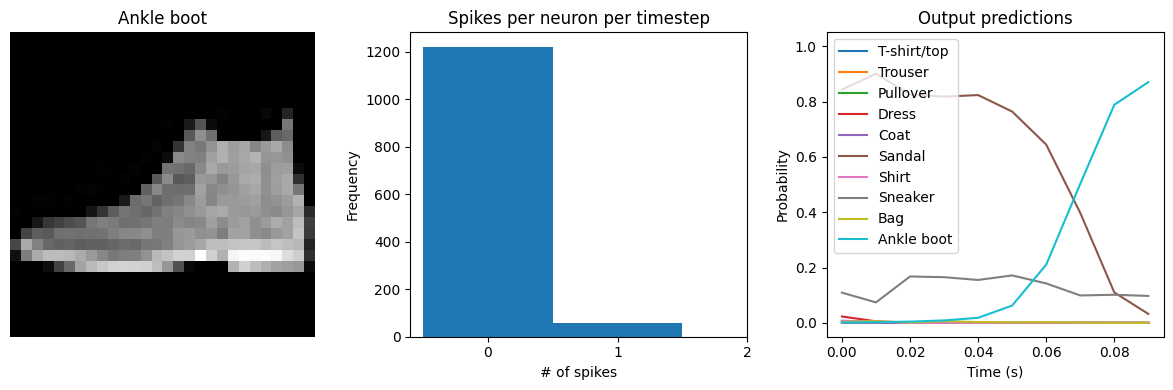

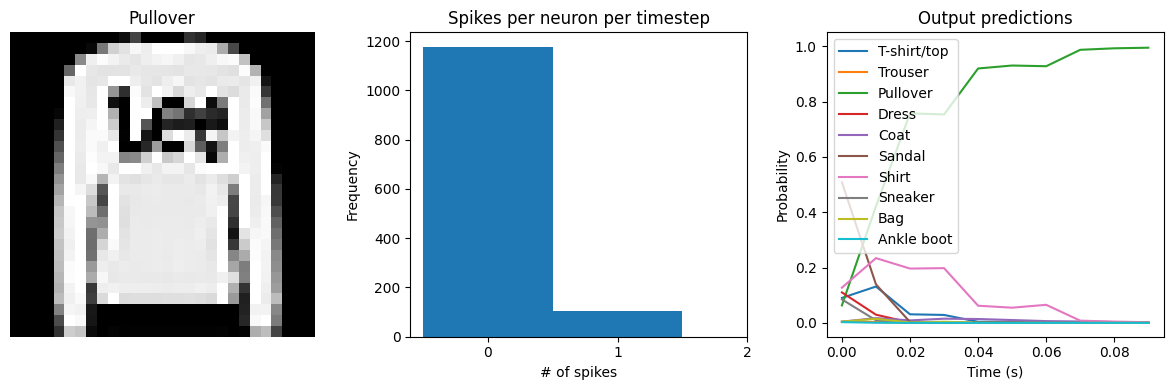

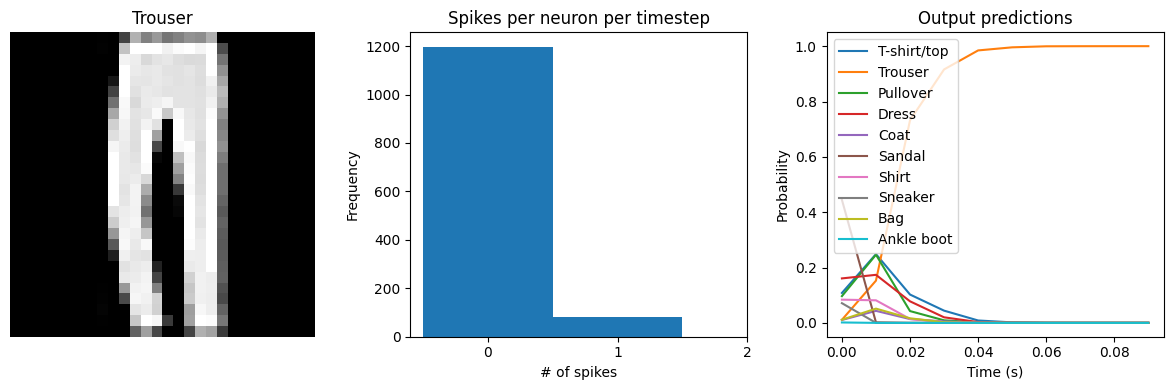

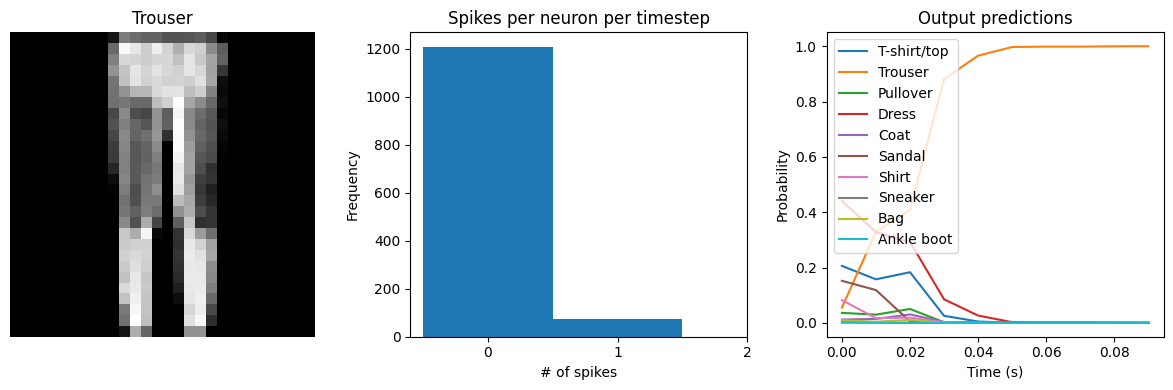

In [16]:
check_output(filtered_model)

We can see that the model performs similarly to the previous
[spiking aware training](#Spiking-aware-training) example, which makes sense since, for
a static input image, a moving average is very similar to a global average. We would
need a more complicated model, with multiple spiking layers or inputs that are changing
over time, to really see the benefits of a Lowpass layer.
The ``keras_spiking.Alpha`` layer is another lowpass-filtering layer,
which can provide better filtering of spike noise with less delay
than ``keras_spiking.Lowpass``.

## Summary

We can use `SpikingActivation` layers to convert any activation function to an
equivalent spiking implementation. Models with SpikingActivations can be trained and
evaluated in the same way as non-spiking models, thanks to the swappable
training/inference behaviour.

There are also a number of additional features that should be kept in mind in order to
optimize the performance of a spiking model:

- [Simulation time](#Simulation-time): by adjusting `dt` we can trade off temporal
  sparsity versus accuracy
- [Spiking aware training](#Spiking-aware-training): incorporating spiking dynamics on
  the forward pass can allow the model to learn weights that are more robust to spiking
  activations
- [Spike rate regularization](#Spike-rate-regularization): we can gain more control over
  spike rates by directly incorporating activity regularization into the optimization
  process
- [Lowpass filtering](#Lowpass-filtering): we can achieve better accuracy with fewer
  spikes by aggregating spike data over time